version copia para seguir haciendo pruebas de descarga de datos meteo y calidad del aire y gráficos
script para conseguir datos de calidad del aire y meteo de estaciones de España
Primero habría que instalar los siguientes paquetes si no lo estuvieran instalados

packages <- c("tidyverse", "saqgetr", "worldmet", "openair")
Los cargo con library

In [1]:
library(tidyverse)
library(saqgetr)
library(worldmet)
library(openair)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#obtener datos de CA de España. Salen los códigos de las estaciones de Calidad de aire (941)
spain_sites <- get_saq_sites() %>% 
    filter(country == "spain")
DT::datatable(spain_sites, 
              options = list(scrollX = TRUE))

HTML widgets cannot be represented in plain text (need html)

Se puede usar el código de cada estación o bien intentar sacarlo de un mapa la opción de sacarlo del mapa la salto porque no funciona bien

In [3]:
#para saber que datos estan disponibles en cada estación
processes <- get_saq_processes()
#por ejemplo en cros (es1577a)
processes %>%
  filter(site %in% "es1577a") %>%
  DT::datatable(options = list(scrollX = TRUE))

HTML widgets cannot be represented in plain text (need html)

In [4]:
#por ejemplo en varias estaciones: cros (es1577a) y guarnizo (es1576a)
processes %>%
  filter(site %in% c("es1577a", "es1576a")) %>%
  DT::datatable(options = list(scrollX = TRUE))

HTML widgets cannot be represented in plain text (need html)

In [5]:
#podemos descargar datos de un año concreto de la estacion que queramos
# guarnizo y cros del 2019
guarcros <- get_saq_observations(
    site = c("es1576a", "es1577a"),
    valid_only = TRUE,
    start = 2019,
    end = 2019,
    verbose = TRUE
)

2021-01-07 16:38:06.275 CET: Loading `air_quality_data_site_es1576a_2019.csv.gz`...

2021-01-07 16:38:07.056 CET: Loading `air_quality_data_site_es1577a_2019.csv.gz`...



descargo datos de calidad del aire en cros en los últimos años, desde 2001 al 2020; luego se ve que no hay datos de 2001 y 2002; solo a partir de 2003

In [6]:
crostodo <- get_saq_observations(
    site = "es1577a",
    valid_only = TRUE,
    start = 2001,
    end = 2020,
    verbose = TRUE
)

2021-01-07 16:38:08.070 CET: Loading `air_quality_data_site_es1577a_2001.csv.gz`...

2021-01-07 16:38:08.368 CET: Loading `air_quality_data_site_es1577a_2002.csv.gz`...

2021-01-07 16:38:08.969 CET: Loading `air_quality_data_site_es1577a_2003.csv.gz`...

2021-01-07 16:38:09.744 CET: Loading `air_quality_data_site_es1577a_2004.csv.gz`...

2021-01-07 16:38:10.890 CET: Loading `air_quality_data_site_es1577a_2005.csv.gz`...

2021-01-07 16:38:11.806 CET: Loading `air_quality_data_site_es1577a_2006.csv.gz`...

2021-01-07 16:38:12.813 CET: Loading `air_quality_data_site_es1577a_2007.csv.gz`...

2021-01-07 16:38:13.642 CET: Loading `air_quality_data_site_es1577a_2008.csv.gz`...

2021-01-07 16:38:14.568 CET: Loading `air_quality_data_site_es1577a_2009.csv.gz`...

2021-01-07 16:38:15.392 CET: Loading `air_quality_data_site_es1577a_2010.csv.gz`...

2021-01-07 16:38:16.392 CET: Loading `air_quality_data_site_es1577a_2011.csv.gz`...

2021-01-07 16:38:17.299 CET: Loading `air_quality_data_site_es157

In [7]:
#descargo juntos datos de calidad del aire en cros y guarnizo en los últimos años, desde 2001 al 2020
guarcrostodo <- get_saq_observations(
  site = c("es1576a", "es1577a"),
  valid_only = TRUE,
  start = 2001,
  end = 2020,
  verbose = TRUE
)

2021-01-07 16:38:25.266 CET: Loading `air_quality_data_site_es1576a_2001.csv.gz`...

2021-01-07 16:38:26.294 CET: Loading `air_quality_data_site_es1576a_2002.csv.gz`...

2021-01-07 16:38:27.103 CET: Loading `air_quality_data_site_es1576a_2003.csv.gz`...

2021-01-07 16:38:27.906 CET: Loading `air_quality_data_site_es1576a_2004.csv.gz`...

2021-01-07 16:38:28.736 CET: Loading `air_quality_data_site_es1576a_2005.csv.gz`...

2021-01-07 16:38:29.586 CET: Loading `air_quality_data_site_es1576a_2006.csv.gz`...

2021-01-07 16:38:30.433 CET: Loading `air_quality_data_site_es1576a_2007.csv.gz`...

2021-01-07 16:38:31.281 CET: Loading `air_quality_data_site_es1576a_2008.csv.gz`...

2021-01-07 16:38:32.081 CET: Loading `air_quality_data_site_es1576a_2009.csv.gz`...

2021-01-07 16:38:32.926 CET: Loading `air_quality_data_site_es1576a_2010.csv.gz`...

2021-01-07 16:38:33.793 CET: Loading `air_quality_data_site_es1576a_2011.csv.gz`...

2021-01-07 16:38:34.626 CET: Loading `air_quality_data_site_es157

In [8]:
#si queremos ver como estan organizados los datos
glimpse(guarcros)

Rows: 95,749
Columns: 9
$ date     <dttm> 2019-01-01 00:00:00, 2019-01-01 01:00:00, 2019-01-01 02:00:…
$ date_end <dttm> 2019-01-01 01:00:00, 2019-01-01 02:00:00, 2019-01-01 03:00:…
$ site     <chr> "es1576a", "es1576a", "es1576a", "es1576a", "es1576a", "es15…
$ variable <chr> "so2", "so2", "so2", "so2", "so2", "so2", "so2", "so2", "so2…
$ process  <int> 306684, 306684, 306684, 306684, 306684, 306684, 306684, 3066…
$ summary  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ validity <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ unit     <chr> "ug.m-3", "ug.m-3", "ug.m-3", "ug.m-3", "ug.m-3", "ug.m-3", …
$ value    <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, …


Si queremos que esten organizados de una forma más legible para manipular despues con mas funciones

In [33]:
guarcros_clean <- saq_clean_observations(guarcros, 
                                      summary = "hour", 
                                      valid_only = TRUE, 
                                      spread = T)

In [10]:
guarcrostodo_clean <- saq_clean_observations(guarcrostodo, 
                                         summary = "hour", 
                                         valid_only = TRUE, 
                                         spread = TRUE)

In [11]:
crostodo_clean <- saq_clean_observations(crostodo, 
                                             summary = "hour", 
                                             valid_only = TRUE, 
                                             spread = TRUE)

In [34]:
glimpse(guarcros_clean)

Rows: 15,383
Columns: 10
$ date     <dttm> 2019-01-01 00:00:00, 2019-01-01 00:00:00, 2019-01-01 01:00:…
$ date_end <dttm> 2019-01-01 01:00:00, 2019-01-01 01:00:00, 2019-01-01 02:00:…
$ site     <chr> "es1576a", "es1577a", "es1576a", "es1577a", "es1576a", "es15…
$ co       <dbl> 0.60, NA, 0.60, NA, 0.60, NA, 0.60, NA, 0.55, NA, 0.50, NA, …
$ no       <dbl> 11.25, 64.00, 8.00, 44.00, 5.50, 23.75, 4.50, 20.00, 3.75, 1…
$ no2      <dbl> 17.00, 18.50, 15.25, 16.25, 15.00, 13.50, 13.25, 16.25, 13.0…
$ nox      <dbl> NA, 17.05, NA, 16.73, NA, 16.75, NA, 16.93, NA, 17.25, NA, 1…
$ o3       <dbl> 7.00, 4.00, 7.00, 4.00, 7.00, 4.00, 6.75, 4.00, 7.25, 3.75, …
$ pm10     <dbl> 113.75, 128.25, 37.00, 99.75, 28.50, 52.00, 28.75, 51.00, 35…
$ so2      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [13]:
glimpse(guarcrostodo_clean)

Rows: 351,089
Columns: 10
$ date     <dttm> 2001-01-01 00:00:00, 2001-01-01 01:00:00, 2001-01-01 02:00:…
$ date_end <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ site     <chr> "es1576a", "es1576a", "es1576a", "es1576a", "es1576a", "es15…
$ co       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ no       <dbl> 0.5, 0.8, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.6, 0.7, 0.7, 0.7, …
$ no2      <dbl> 1.7, 1.6, 2.1, 1.6, 1.1, 1.1, 1.0, 1.0, 1.1, 1.1, 1.1, 1.5, …
$ nox      <dbl> 2.467, 2.827, 3.173, 2.520, 2.020, 2.020, 1.920, 2.073, 2.02…
$ o3       <dbl> 35, 32, 30, 34, 35, 36, 44, 39, 38, 37, 37, 39, 39, 43, 44, …
$ pm10     <dbl> 22, 13, 22, 26, 20, 20, 17, 29, 16, 15, 15, 14, 16, 18, 17, …
$ so2      <dbl> 4.9, 4.9, 4.3, 4.2, 4.3, 5.0, 4.7, 5.4, 5.7, 4.9, 4.5, 5.5, …


Ahora grafico un resumen para Cros y Guarnizo juntos

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


Warning message in summaryPlot(guarcros_clean, site = "cros"):
“More than one site detected, using co”


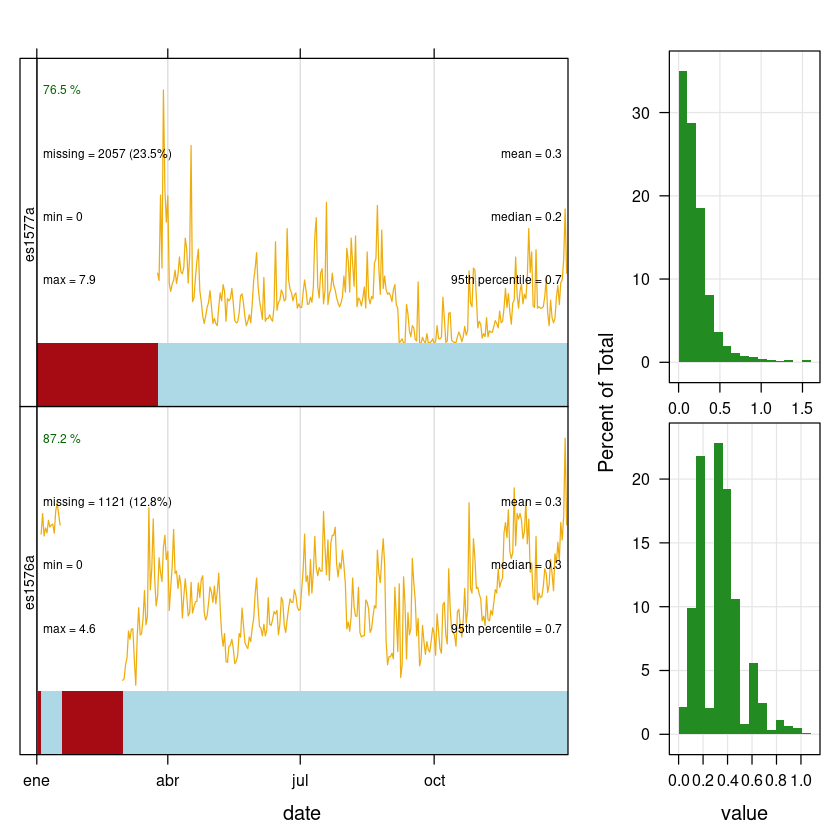

In [14]:
summaryPlot(guarcros_clean,site="cros")

In [15]:
summaryPlot(guarcrostodo_clean,site="cros")

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


ERROR: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 34670 rows:
* 94348, 103129
* 94349, 103130
* 94350, 103131
* 94351, 103132
* 94352, 103133
* 94353, 103134
* 94354, 103135
* 94355, 103136
* 94356, 103137
* 94357, 103138
* 94358, 103139
* 94359, 103140
* 94360, 103141
* 94361, 103142
* 94362, 103143
* 94363, 103144
* 94364, 103145
* 94365, 103146
* 94366, 103147
* 94367, 103148
* 94368, 103149
* 94369, 103150
* 94370, 103151
* 94371, 103152
* 94372, 103153
* 94373, 103154
* 94374, 103155
* 94375, 103156
* 94376, 103157
* 94377, 103158
* 94378, 103159
* 94379, 103160
* 94380, 103161
* 94381, 103162
* 94382, 103163
* 94383, 103164
* 94384, 103165
* 94385, 103166
* 94386, 103167
* 94387, 103168
* 94388, 103169
* 94389, 103170
* 94390, 103171
* 94391, 103172
* 94392, 103173
* 94393, 103174
* 94394, 103175
* 94395, 103176
* 94396, 103177
* 94397, 103178
* 94398, 103179
* 94399, 103180
* 94400, 103181
* 94401, 103182
* 94402, 103183
* 94403, 103184
* 94404, 103185
* 94405, 103186
* 94406, 103187
* 94407, 103188
* 94408, 103189
* 94409, 103190
* 94410, 103191
* 94411, 103192
* 94412, 103193
* 94413, 103194
* 94414, 103195
* 94415, 103196
* 94416, 103197
* 94417, 103198
* 94418, 103199
* 94419, 103200
* 94420, 103201
* 94421, 103202
* 94422, 103203
* 94423, 103204
* 94424, 103205
* 94425, 103206
* 94426, 103207
* 94427, 103208
* 94428, 103209
* 94429, 103210
* 94430, 103211
* 94431, 103212
* 94432, 103213
* 94433, 103214
* 94434, 103215
* 94435, 103216
* 94436, 103217
* 94437, 103218
* 94438, 103219
* 94439, 103220
* 94440, 103221
* 94441, 103222
* 94442, 103223
* 94443, 103224
* 94444, 103225
* 94445, 103226
* 94446, 103227
* 94447, 103228
* 94448, 103229
* 94449, 103230
* 94450, 103231
* 94451, 103232
* 94452, 103233
* 94453, 103234
* 94454, 103235
* 94455, 103236
* 94456, 103237
* 94457, 103238
* 94458, 103239
* 94459, 103240
* 94460, 103241
* 94461, 103242
* 94462, 103243
* 94463, 103244
* 94464, 103245
* 94465, 103246
* 94466, 103247
* 94467, 103248
* 94468, 103249
* 94469, 103250
* 94470, 103251
* 94471, 103252
* 94472, 103253
* 94473, 103254
* 94474, 103255
* 94475, 103256
* 94476, 103257
* 94477, 103258
* 94478, 103259
* 94479, 103260
* 94480, 103261
* 94481, 103262
* 94482, 103263
* 94483, 103264
* 94484, 103265
* 94485, 103266
* 94486, 103267
* 94487, 103268
* 94488, 103269
* 94489, 103270
* 94490, 103271
* 94491, 103272
* 94492, 103273
* 94493, 103274
* 94494, 103275
* 94495, 103276
* 94496, 103277
* 94497, 103278
* 94498, 103279
* 94499, 103280
* 94500, 103281
* 94501, 103282
* 94502, 103283
* 94503, 103284
* 94504, 103285
* 94505, 103286
* 94506, 103287
* 94507, 103288
* 94508, 103289
* 94509, 103290
* 94510, 103291
* 94511, 103292
* 94512, 103293
* 94513, 103294
* 94514, 103295
* 94515, 103296
* 94516, 103297
* 94517, 103298
* 94518, 103299
* 94519, 103300
* 94520, 103301
* 94521, 103302
* 94522, 103303
* 94523, 103304
* 94524, 103305
* 94525, 103306
* 94526, 103307
* 94527, 103308
* 94528, 103309
* 94529, 103310
* 94530, 103311
* 94531, 103312
* 94532, 103313
* 94533, 103314
* 94534, 103315
* 94535, 103316
* 94536, 103317
* 94537, 103318
* 94538, 103319
* 94539, 103320
* 94540, 103321
* 94541, 103322
* 94542, 103323
* 94543, 103324
* 94544, 103325
* 94545, 103326
* 94546, 103327
* 94547, 103328
* 94548, 103329
* 94549, 103330
* 94550, 103331
* 94551, 103332
* 94552, 103333
* 94553, 103334
* 94554, 103335
* 94555, 103336
* 94556, 103337
* 94557, 103338
* 94558, 103339
* 94559, 103340
* 94560, 103341
* 94561, 103342
* 94562, 103343
* 94563, 103344
* 94564, 103345
* 94565, 103346
* 94566, 103347
* 94567, 103348
* 94568, 103349
* 94569, 103350
* 94570, 103351
* 94571, 103352
* 94572, 103353
* 94573, 103354
* 94574, 103355
* 94575, 103356
* 94576, 103357
* 94577, 103358
* 94578, 103359
* 94579, 103360
* 94580, 103361
* 94581, 103362
* 94582, 103363
* 94583, 103364
* 94584, 103365
* 94585, 103366
* 94586, 103367
* 94587, 103368
* 94588, 103369
* 94589, 103370
* 94590, 103371
* 94591, 103372
* 94592, 103373
* 94593, 103374
* 94594, 103375
* 94595, 103376
* 94596, 103377
* 94597, 103378
* 94598, 103379
* 94599, 103380
* 94600, 103381
* 94601, 103382
* 94602, 103383
* 94603, 103384
* 94604, 103385
* 94605, 103386
* 94606, 103387
* 94607, 103388
* 94608, 103389
* 94609, 103390
* 94610, 103391
* 94611, 103392
* 94612, 103393
* 94613, 103394
* 94614, 103395
* 94615, 103396
* 94616, 103397
* 94617, 103398
* 94618, 103399
* 94619, 103400
* 94620, 103401
* 94621, 103402
* 102996, 103403
* 94622, 103404
* 94623, 103405
* 94624, 103406
* 94625, 103407
* 94626, 103408
* 94627, 103409
* 94628, 103410
* 94629, 103411
* 94630, 103412
* 94631, 103413
* 94632, 103414
* 94633, 103415
* 94634, 103416
* 94635, 103417
* 94636, 103418
* 94637, 103419
* 94638, 103420
* 94639, 103421
* 94640, 103422
* 94641, 103423
* 94642, 103424
* 94643, 103425
* 94644, 103426
* 94645, 103427
* 94646, 103428
* 94647, 103429
* 94648, 103430
* 94649, 103431
* 94650, 103432
* 94651, 103433
* 94652, 103434
* 94653, 103435
* 94654, 103436
* 94655, 103437
* 94656, 103438
* 94657, 103439
* 94658, 103440
* 94659, 103441
* 94660, 103442
* 94661, 103443
* 94662, 103444
* 94663, 103445
* 94664, 103446
* 94665, 103447
* 94666, 103448
* 94667, 103449
* 94668, 103450
* 94669, 103451
* 94670, 103452
* 94671, 103453
* 94672, 103454
* 94673, 103455
* 94674, 103456
* 94675, 103457
* 94676, 103458
* 94677, 103459
* 94678, 103460
* 94679, 103461
* 94680, 103462
* 94681, 103463
* 94682, 103464
* 94683, 103465
* 94684, 103466
* 94685, 103467
* 94686, 103468
* 94687, 103469
* 94688, 103470
* 94689, 103471
* 94690, 103472
* 94691, 103473
* 94692, 103474
* 94693, 103475
* 94694, 103476
* 94695, 103477
* 94696, 103478
* 94697, 103479
* 94698, 103480
* 94699, 103481
* 94700, 103482
* 94701, 103483
* 94702, 103484
* 94703, 103485
* 94704, 103486
* 94705, 103487
* 94706, 103488
* 94707, 103489
* 94708, 103490
* 94709, 103491
* 94710, 103492
* 94711, 103493
* 94712, 103494
* 94713, 103495
* 94714, 103496
* 94715, 103497
* 94716, 103498
* 94717, 103499
* 94718, 103500
* 94719, 103501
* 94720, 103502
* 94721, 103503
* 94722, 103504
* 94723, 103505
* 94724, 103506
* 94725, 103507
* 94726, 103508
* 94727, 103509
* 94728, 103510
* 94729, 103511
* 94730, 103512
* 94731, 103513
* 94732, 103514
* 94733, 103515
* 94734, 103516
* 94735, 103517
* 94736, 103518
* 94737, 103519
* 94738, 103520
* 94739, 103521
* 94740, 103522
* 94741, 103523
* 94742, 103524
* 94743, 103525
* 94744, 103526
* 94745, 103527
* 94746, 103528
* 94747, 103529
* 94748, 103530
* 94749, 103531
* 94750, 103532
* 94751, 103533
* 94752, 103534
* 94753, 103535
* 94754, 103536
* 94755, 103537
* 94756, 103538
* 94757, 103539
* 94758, 103540
* 94759, 103541
* 94760, 103542
* 94761, 103543
* 94762, 103544
* 94763, 103545
* 94764, 103546
* 94765, 103547
* 94766, 103548
* 94767, 103549
* 94768, 103550
* 94769, 103551
* 94770, 103552
* 94771, 103553
* 94772, 103554
* 94773, 103555
* 94774, 103556
* 94775, 103557
* 94776, 103558
* 94777, 103559
* 94778, 103560
* 94779, 103561
* 94780, 103562
* 94781, 103563
* 94782, 103564
* 94783, 103565
* 94784, 103566
* 94785, 103567
* 94786, 103568
* 94787, 103569
* 94788, 103570
* 94789, 103571
* 94790, 103572
* 94791, 103573
* 94792, 103574
* 94793, 103575
* 94794, 103576
* 94795, 103577
* 94796, 103578
* 94797, 103579
* 94798, 103580
* 94799, 103581
* 94800, 103582
* 94801, 103583
* 94802, 103584
* 94803, 103585
* 94804, 103586
* 94805, 103587
* 94806, 103588
* 94807, 103589
* 94808, 103590
* 94809, 103591
* 94810, 103592
* 94811, 103593
* 94812, 103594
* 94813, 103595
* 94814, 103596
* 94815, 103597
* 94816, 103598
* 94817, 103599
* 94818, 103600
* 94819, 103601
* 94820, 103602
* 94821, 103603
* 94822, 103604
* 94823, 103605
* 94824, 103606
* 94825, 103607
* 94826, 103608
* 94827, 103609
* 94828, 103610
* 94829, 103611
* 94830, 103612
* 94831, 103613
* 94832, 103614
* 94833, 103615
* 94834, 103616
* 94835, 103617
* 94836, 103618
* 94837, 103619
* 94838, 103620
* 94839, 103621
* 94840, 103622
* 94841, 103623
* 94842, 103624
* 94843, 103625
* 94844, 103626
* 94845, 103627
* 94846, 103628
* 94847, 103629
* 94848, 103630
* 94849, 103631
* 94850, 103632
* 94851, 103633
* 94852, 103634
* 94853, 103635
* 94854, 103636
* 94855, 103637
* 94856, 103638
* 94857, 103639
* 94858, 103640
* 94859, 103641
* 94860, 103642
* 94861, 103643
* 94862, 103644
* 94863, 103645
* 94864, 103646
* 94865, 103647
* 94866, 103648
* 94867, 103649
* 94868, 103650
* 94869, 103651
* 94870, 103652
* 94871, 103653
* 94872, 103654
* 94873, 103655
* 94874, 103656
* 94875, 103657
* 94876, 103658
* 94877, 103659
* 94878, 103660
* 94879, 103661
* 94880, 103662
* 94881, 103663
* 94882, 103664
* 94883, 103665
* 94884, 103666
* 94885, 103667
* 94886, 103668
* 94887, 103669
* 94888, 103670
* 94889, 103671
* 94890, 103672
* 94891, 103673
* 94892, 103674
* 94893, 103675
* 94894, 103676
* 94895, 103677
* 94896, 103678
* 94897, 103679
* 94898, 103680
* 94899, 103681
* 94900, 103682
* 94901, 103683
* 94902, 103684
* 94903, 103685
* 94904, 103686
* 94905, 103687
* 94906, 103688
* 94907, 103689
* 94908, 103690
* 94909, 103691
* 94910, 103692
* 94911, 103693
* 94912, 103694
* 94913, 103695
* 94914, 103696
* 94915, 103697
* 94916, 103698
* 94917, 103699
* 94918, 103700
* 94919, 103701
* 94920, 103702
* 94921, 103703
* 94922, 103704
* 94923, 103705
* 94924, 103706
* 94925, 103707
* 94926, 103708
* 94927, 103709
* 94928, 103710
* 94929, 103711
* 94930, 103712
* 94931, 103713
* 94932, 103714
* 94933, 103715
* 94934, 103716
* 94935, 103717
* 94936, 103718
* 94937, 103719
* 94938, 103720
* 94939, 103721
* 94940, 103722
* 94941, 103723
* 94942, 103724
* 94943, 103725
* 94944, 103726
* 94945, 103727
* 94946, 103728
* 94947, 103729
* 94948, 103730
* 94949, 103731
* 94950, 103732
* 94951, 103733
* 94952, 103734
* 94953, 103735
* 94954, 103736
* 94955, 103737
* 94956, 103738
* 94957, 103739
* 94958, 103740
* 94959, 103741
* 94960, 103742
* 94961, 103743
* 94962, 103744
* 94963, 103745
* 94964, 103746
* 94965, 103747
* 94966, 103748
* 94967, 103749
* 94968, 103750
* 94969, 103751
* 94970, 103752
* 94971, 103753
* 94972, 103754
* 94973, 103755
* 94974, 103756
* 94975, 103757
* 94976, 103758
* 94977, 103759
* 94978, 103760
* 94979, 103761
* 94980, 103762
* 102999, 103763
* 94982, 103764
* 94983, 103765
* 94984, 103766
* 94985, 103767
* 94986, 103768
* 94987, 103769
* 94988, 103770
* 94989, 103771
* 94990, 103772
* 94991, 103773
* 94992, 103774
* 94993, 103775
* 94994, 103776
* 94995, 103777
* 94996, 103778
* 94997, 103779
* 94998, 103780
* 94999, 103781
* 95000, 103782
* 95001, 103783
* 95002, 103784
* 95003, 103785
* 95004, 103786
* 95005, 103787
* 95006, 103788
* 95007, 103789
* 95008, 103790
* 95009, 103791
* 95010, 103792
* 95011, 103793
* 95012, 103794
* 95013, 103795
* 95014, 103796
* 95015, 103797
* 95016, 103798
* 95017, 103799
* 95018, 103800
* 95019, 103801
* 95020, 103802
* 95021, 103803
* 95022, 103804
* 95023, 103805
* 95024, 103806
* 95025, 103807
* 95026, 103808
* 95027, 103809
* 95028, 103810
* 95029, 103811
* 95030, 103812
* 95031, 103813
* 95032, 103814
* 95033, 103815
* 95034, 103816
* 95035, 103817
* 95036, 103818
* 95037, 103819
* 95038, 103820
* 95039, 103821
* 95040, 103822
* 95041, 103823
* 95042, 103824
* 95043, 103825
* 95044, 103826
* 95045, 103827
* 95046, 103828
* 95047, 103829
* 95048, 103830
* 95049, 103831
* 95050, 103832
* 95051, 103833
* 95052, 103834
* 95053, 103835
* 95054, 103836
* 95055, 103837
* 95056, 103838
* 95057, 103839
* 95058, 103840
* 95059, 103841
* 95060, 103842
* 95061, 103843
* 95062, 103844
* 95063, 103845
* 95064, 103846
* 95065, 103847
* 95066, 103848
* 95067, 103849
* 95068, 103850
* 95069, 103851
* 95070, 103852
* 95071, 103853
* 95072, 103854
* 95073, 103855
* 95074, 103856
* 95075, 103857
* 95076, 103858
* 95077, 103859
* 95078, 103860
* 95079, 103861
* 95080, 103862
* 95081, 103863
* 95082, 103864
* 95083, 103865
* 95084, 103866
* 95085, 103867
* 95086, 103868
* 95087, 103869
* 95088, 103870
* 95089, 103871
* 95090, 103872
* 95091, 103873
* 95092, 103874
* 95093, 103875
* 95094, 103876
* 95095, 103877
* 95096, 103878
* 95097, 103879
* 95098, 103880
* 95099, 103881
* 95100, 103882
* 95101, 103883
* 95102, 103884
* 95103, 103885
* 95104, 103886
* 95105, 103887
* 95106, 103888
* 95107, 103889
* 95108, 103890
* 95109, 103891
* 95110, 103892
* 95111, 103893
* 95112, 103894
* 95113, 103895
* 95114, 103896
* 95115, 103897
* 95116, 103898
* 95117, 103899
* 95118, 103900
* 95119, 103901
* 95120, 103902
* 95121, 103903
* 95122, 103904
* 95123, 103905
* 95124, 103906
* 95125, 103907
* 95126, 103908
* 95127, 103909
* 95128, 103910
* 95129, 103911
* 95130, 103912
* 95131, 103913
* 95132, 103914
* 95133, 103915
* 95134, 103916
* 95135, 103917
* 95136, 103918
* 95137, 103919
* 95138, 103920
* 95139, 103921
* 95140, 103922
* 95141, 103923
* 95142, 103924
* 95143, 103925
* 95144, 103926
* 95145, 103927
* 95146, 103928
* 95147, 103929
* 95148, 103930
* 95149, 103931
* 95150, 103932
* 95151, 103933
* 95152, 103934
* 95153, 103935
* 95154, 103936
* 95155, 103937
* 95156, 103938
* 95157, 103939
* 95158, 103940
* 95159, 103941
* 95160, 103942
* 95161, 103943
* 95162, 103944
* 95163, 103945
* 95164, 103946
* 95165, 103947
* 95166, 103948
* 95167, 103949
* 95168, 103950
* 95169, 103951
* 95170, 103952
* 95171, 103953
* 95172, 103954
* 95173, 103955
* 95174, 103956
* 95175, 103957
* 95176, 103958
* 95177, 103959
* 95178, 103960
* 95179, 103961
* 95180, 103962
* 95181, 103963
* 95182, 103964
* 95183, 103965
* 95184, 103966
* 95185, 103967
* 95186, 103968
* 95187, 103969
* 95188, 103970
* 95189, 103971
* 95190, 103972
* 95191, 103973
* 95192, 103974
* 95193, 103975
* 95194, 103976
* 95195, 103977
* 95196, 103978
* 95197, 103979
* 95198, 103980
* 95199, 103981
* 95200, 103982
* 95201, 103983
* 95202, 103984
* 95203, 103985
* 95204, 103986
* 95205, 103987
* 95206, 103988
* 95207, 103989
* 95208, 103990
* 95209, 103991
* 95210, 103992
* 95211, 103993
* 95212, 103994
* 95213, 103995
* 95214, 103996
* 95215, 103997
* 95216, 103998
* 95217, 103999
* 95218, 104000
* 95219, 104001
* 95220, 104002
* 95221, 104003
* 95222, 104004
* 95223, 104005
* 95224, 104006
* 95225, 104007
* 95226, 104008
* 95227, 104009
* 95228, 104010
* 95229, 104011
* 95230, 104012
* 95231, 104013
* 95232, 104014
* 95233, 104015
* 95234, 104016
* 95235, 104017
* 95236, 104018
* 95237, 104019
* 95238, 104020
* 95239, 104021
* 95240, 104022
* 95241, 104023
* 95242, 104024
* 95243, 104025
* 95244, 104026
* 95245, 104027
* 95246, 104028
* 95247, 104029
* 95248, 104030
* 95249, 104031
* 95250, 104032
* 95251, 104033
* 95252, 104034
* 95253, 104035
* 95254, 104036
* 95255, 104037
* 95256, 104038
* 95257, 104039
* 95258, 104040
* 95259, 104041
* 95260, 104042
* 95261, 104043
* 95262, 104044
* 95263, 104045
* 95264, 104046
* 95265, 104047
* 95266, 104048
* 95267, 104049
* 95268, 104050
* 95269, 104051
* 95270, 104052
* 95271, 104053
* 95272, 104054
* 95273, 104055
* 95274, 104056
* 95275, 104057
* 95276, 104058
* 95277, 104059
* 95278, 104060
* 95279, 104061
* 95280, 104062
* 95281, 104063
* 95282, 104064
* 95283, 104065
* 95284, 104066
* 95285, 104067
* 95286, 104068
* 95287, 104069
* 95288, 104070
* 95289, 104071
* 95290, 104072
* 95291, 104073
* 95292, 104074
* 95293, 104075
* 95294, 104076
* 95295, 104077
* 95296, 104078
* 95297, 104079
* 95298, 104080
* 95299, 104081
* 95300, 104082
* 95301, 104083
* 95302, 104084
* 95303, 104085
* 95304, 104086
* 95305, 104087
* 95306, 104088
* 95307, 104089
* 95308, 104090
* 95309, 104091
* 95310, 104092
* 95311, 104093
* 95312, 104094
* 95313, 104095
* 95314, 104096
* 95315, 104097
* 95316, 104098
* 95317, 104099
* 95318, 104100
* 95319, 104101
* 95320, 104102
* 95321, 104103
* 95322, 104104
* 95323, 104105
* 95324, 104106
* 95325, 104107
* 95326, 104108
* 95327, 104109
* 95328, 104110
* 95329, 104111
* 95330, 104112
* 95331, 104113
* 95332, 104114
* 95333, 104115
* 95334, 104116
* 95335, 104117
* 95336, 104118
* 95337, 104119
* 95338, 104120
* 95339, 104121
* 95340, 104122
* 95341, 104123
* 95342, 104124
* 95343, 104125
* 95344, 104126
* 95345, 104127
* 95346, 104128
* 95347, 104129
* 95348, 104130
* 95349, 104131
* 95350, 104132
* 95351, 104133
* 95352, 104134
* 95353, 104135
* 95354, 104136
* 95355, 104137
* 95356, 104138
* 95357, 104139
* 95358, 104140
* 95359, 104141
* 95360, 104142
* 95361, 104143
* 95362, 104144
* 95363, 104145
* 95364, 104146
* 95365, 104147
* 95366, 104148
* 95367, 104149
* 95368, 104150
* 95369, 104151
* 95370, 104152
* 95371, 104153
* 95372, 104154
* 95373, 104155
* 95374, 104156
* 95375, 104157
* 95376, 104158
* 95377, 104159
* 95378, 104160
* 95379, 104161
* 95380, 104162
* 95381, 104163
* 95382, 104164
* 95383, 104165
* 95384, 104166
* 95385, 104167
* 95386, 104168
* 95387, 104169
* 95388, 104170
* 95389, 104171
* 95390, 104172
* 95391, 104173
* 95392, 104174
* 95393, 104175
* 95394, 104176
* 95395, 104177
* 95396, 104178
* 95397, 104179
* 95398, 104180
* 95399, 104181
* 95400, 104182
* 95401, 104183
* 95402, 104184
* 95403, 104185
* 95404, 104186
* 95405, 104187
* 95406, 104188
* 95407, 104189
* 95408, 104190
* 95409, 104191
* 95410, 104192
* 95411, 104193
* 95412, 104194
* 95413, 104195
* 95414, 104196
* 95415, 104197
* 95416, 104198
* 95417, 104199
* 95418, 104200
* 95419, 104201
* 95420, 104202
* 95421, 104203
* 95422, 104204
* 95423, 104205
* 95424, 104206
* 95425, 104207
* 95426, 104208
* 95427, 104209
* 95428, 104210
* 95429, 104211
* 95430, 104212
* 95431, 104213
* 95432, 104214
* 95433, 104215
* 95434, 104216
* 95435, 104217
* 95436, 104218
* 95437, 104219
* 95438, 104220
* 95439, 104221
* 95440, 104222
* 95441, 104223
* 95442, 104224
* 95443, 104225
* 95444, 104226
* 95445, 104227
* 95446, 104228
* 95447, 104229
* 95448, 104230
* 95449, 104231
* 95450, 104232
* 95451, 104233
* 95452, 104234
* 95453, 104235
* 95454, 104236
* 95455, 104237
* 95456, 104238
* 95457, 104239
* 95458, 104240
* 95459, 104241
* 95460, 104242
* 95461, 104243
* 95462, 104244
* 95463, 104245
* 95464, 104246
* 95465, 104247
* 95466, 104248
* 95467, 104249
* 95468, 104250
* 95469, 104251
* 95470, 104252
* 95471, 104253
* 95472, 104254
* 95473, 104255
* 95474, 104256
* 95475, 104257
* 95476, 104258
* 95477, 104259
* 95478, 104260
* 95479, 104261
* 95480, 104262
* 95481, 104263
* 95482, 104264
* 95483, 104265
* 95484, 104266
* 95485, 104267
* 95486, 104268
* 95487, 104269
* 95488, 104270
* 95489, 104271
* 95490, 104272
* 95491, 104273
* 95492, 104274
* 95493, 104275
* 95494, 104276
* 95495, 104277
* 95496, 104278
* 95497, 104279
* 95498, 104280
* 95499, 104281
* 95500, 104282
* 95501, 104283
* 95502, 104284
* 95503, 104285
* 95504, 104286
* 95505, 104287
* 95506, 104288
* 95507, 104289
* 95508, 104290
* 95509, 104291
* 95510, 104292
* 95511, 104293
* 95512, 104294
* 95513, 104295
* 95514, 104296
* 95515, 104297
* 95516, 104298
* 95517, 104299
* 95518, 104300
* 95519, 104301
* 95520, 104302
* 95521, 104303
* 95522, 104304
* 95523, 104305
* 95524, 104306
* 95525, 104307
* 95526, 104308
* 95527, 104309
* 95528, 104310
* 95529, 104311
* 95530, 104312
* 95531, 104313
* 95532, 104314
* 95533, 104315
* 95534, 104316
* 95535, 104317
* 95536, 104318
* 95537, 104319
* 95538, 104320
* 95539, 104321
* 95540, 104322
* 95541, 104323
* 95542, 104324
* 95543, 104325
* 95544, 104326
* 95545, 104327
* 95546, 104328
* 95547, 104329
* 95548, 104330
* 95549, 104331
* 95550, 104332
* 95551, 104333
* 95552, 104334
* 95553, 104335
* 95554, 104336
* 95555, 104337
* 95556, 104338
* 95557, 104339
* 95558, 104340
* 95559, 104341
* 95560, 104342
* 95561, 104343
* 95562, 104344
* 95563, 104345
* 95564, 104346
* 95565, 104347
* 95566, 104348
* 95567, 104349
* 95568, 104350
* 95569, 104351
* 95570, 104352
* 95571, 104353
* 95572, 104354
* 95573, 104355
* 95574, 104356
* 95575, 104357
* 95576, 104358
* 95577, 104359
* 95578, 104360
* 95579, 104361
* 95580, 104362
* 95581, 104363
* 95582, 104364
* 95583, 104365
* 95584, 104366
* 95585, 104367
* 95586, 104368
* 95587, 104369
* 95588, 104370
* 95589, 104371
* 95590, 104372
* 95591, 104373
* 95592, 104374
* 95593, 104375
* 95594, 104376
* 95595, 104377
* 95596, 104378
* 95597, 104379
* 95598, 104380
* 95599, 104381
* 95600, 104382
* 95601, 104383
* 95602, 104384
* 95603, 104385
* 95604, 104386
* 95605, 104387
* 95606, 104388
* 95607, 104389
* 95608, 104390
* 95609, 104391
* 95610, 104392
* 95611, 104393
* 95612, 104394
* 95613, 104395
* 95614, 104396
* 95615, 104397
* 95616, 104398
* 95617, 104399
* 95618, 104400
* 95619, 104401
* 95620, 104402
* 95621, 104403
* 95622, 104404
* 95623, 104405
* 95624, 104406
* 95625, 104407
* 95626, 104408
* 95627, 104409
* 95628, 104410
* 95629, 104411
* 95630, 104412
* 95631, 104413
* 95632, 104414
* 95633, 104415
* 95634, 104416
* 95635, 104417
* 95636, 104418
* 95637, 104419
* 95638, 104420
* 95639, 104421
* 95640, 104422
* 95641, 104423
* 95642, 104424
* 95643, 104425
* 95644, 104426
* 95645, 104427
* 95646, 104428
* 95647, 104429
* 95648, 104430
* 95649, 104431
* 95650, 104432
* 95651, 104433
* 95652, 104434
* 95653, 104435
* 95654, 104436
* 95655, 104437
* 95656, 104438
* 95657, 104439
* 95658, 104440
* 95659, 104441
* 95660, 104442
* 95661, 104443
* 95662, 104444
* 95663, 104445
* 95664, 104446
* 95665, 104447
* 95666, 104448
* 95667, 104449
* 95668, 104450
* 95669, 104451
* 95670, 104452
* 95671, 104453
* 95672, 104454
* 95673, 104455
* 95674, 104456
* 95675, 104457
* 95676, 104458
* 95677, 104459
* 95678, 104460
* 95679, 104461
* 95680, 104462
* 95681, 104463
* 95682, 104464
* 95683, 104465
* 95684, 104466
* 95685, 104467
* 95686, 104468
* 95687, 104469
* 95688, 104470
* 95689, 104471
* 95690, 104472
* 95691, 104473
* 95692, 104474
* 95693, 104475
* 95694, 104476
* 95695, 104477
* 95696, 104478
* 95697, 104479
* 95698, 104480
* 95699, 104481
* 95700, 104482
* 95701, 104483
* 95702, 104484
* 95703, 104485
* 95704, 104486
* 95705, 104487
* 95706, 104488
* 95707, 104489
* 95708, 104490
* 95709, 104491
* 95710, 104492
* 95711, 104493
* 95712, 104494
* 95713, 104495
* 95714, 104496
* 95715, 104497
* 95716, 104498
* 95717, 104499
* 95718, 104500
* 95719, 104501
* 95720, 104502
* 95721, 104503
* 95722, 104504
* 95723, 104505
* 95724, 104506
* 95725, 104507
* 95726, 104508
* 95727, 104509
* 95728, 104510
* 95729, 104511
* 95730, 104512
* 95731, 104513
* 95732, 104514
* 95733, 104515
* 95734, 104516
* 95735, 104517
* 95736, 104518
* 95737, 104519
* 95738, 104520
* 95739, 104521
* 95740, 104522
* 95741, 104523
* 95742, 104524
* 95743, 104525
* 95744, 104526
* 95745, 104527
* 95746, 104528
* 95747, 104529
* 95748, 104530
* 95749, 104531
* 95750, 104532
* 95751, 104533
* 95752, 104534
* 95753, 104535
* 95754, 104536
* 95755, 104537
* 95756, 104538
* 95757, 104539
* 95758, 104540
* 95759, 104541
* 95760, 104542
* 95761, 104543
* 95762, 104544
* 95763, 104545
* 95764, 104546
* 95765, 104547
* 95766, 104548
* 95767, 104549
* 95768, 104550
* 95769, 104551
* 95770, 104552
* 95771, 104553
* 95772, 104554
* 95773, 104555
* 95774, 104556
* 95775, 104557
* 95776, 104558
* 95777, 104559
* 95778, 104560
* 95779, 104561
* 95780, 104562
* 95781, 104563
* 95782, 104564
* 95783, 104565
* 95784, 104566
* 95785, 104567
* 95786, 104568
* 95787, 104569
* 95788, 104570
* 95789, 104571
* 95790, 104572
* 95791, 104573
* 95792, 104574
* 95793, 104575
* 95794, 104576
* 95795, 104577
* 95796, 104578
* 95797, 104579
* 95798, 104580
* 95799, 104581
* 95800, 104582
* 95801, 104583
* 95802, 104584
* 95803, 104585
* 95804, 104586
* 95805, 104587
* 95806, 104588
* 95807, 104589
* 95808, 104590
* 95809, 104591
* 95810, 104592
* 95811, 104593
* 95812, 104594
* 95813, 104595
* 95814, 104596
* 95815, 104597
* 95816, 104598
* 95817, 104599
* 95818, 104600
* 95819, 104601
* 95820, 104602
* 95821, 104603
* 95822, 104604
* 95823, 104605
* 95824, 104606
* 95825, 104607
* 95826, 104608
* 95827, 104609
* 95828, 104610
* 95829, 104611
* 95830, 104612
* 95831, 104613
* 95832, 104614
* 95833, 104615
* 95834, 104616
* 95835, 104617
* 95836, 104618
* 95837, 104619
* 95838, 104620
* 95839, 104621
* 95840, 104622
* 95841, 104623
* 95842, 104624
* 95843, 104625
* 95844, 104626
* 95845, 104627
* 95846, 104628
* 95847, 104629
* 95848, 104630
* 95849, 104631
* 95850, 104632
* 95851, 104633
* 95852, 104634
* 95853, 104635
* 95854, 104636
* 95855, 104637
* 95856, 104638
* 95857, 104639
* 95858, 104640
* 95859, 104641
* 95860, 104642
* 95861, 104643
* 95862, 104644
* 95863, 104645
* 95864, 104646
* 95865, 104647
* 95866, 104648
* 95867, 104649
* 95868, 104650
* 95869, 104651
* 95870, 104652
* 95871, 104653
* 95872, 104654
* 95873, 104655
* 95874, 104656
* 95875, 104657
* 95876, 104658
* 95877, 104659
* 95878, 104660
* 95879, 104661
* 95880, 104662
* 95881, 104663
* 95882, 104664
* 95883, 104665
* 95884, 104666
* 95885, 104667
* 95886, 104668
* 95887, 104669
* 95888, 104670
* 95889, 104671
* 95890, 104672
* 95891, 104673
* 95892, 104674
* 95893, 104675
* 95894, 104676
* 95895, 104677
* 95896, 104678
* 95897, 104679
* 95898, 104680
* 95899, 104681
* 95900, 104682
* 95901, 104683
* 95902, 104684
* 95903, 104685
* 95904, 104686
* 95905, 104687
* 95906, 104688
* 95907, 104689
* 95908, 104690
* 95909, 104691
* 95910, 104692
* 95911, 104693
* 95912, 104694
* 95913, 104695
* 95914, 104696
* 95915, 104697
* 95916, 104698
* 95917, 104699
* 95918, 104700
* 95919, 104701
* 95920, 104702
* 95921, 104703
* 95922, 104704
* 95923, 104705
* 95924, 104706
* 95925, 104707
* 95926, 104708
* 95927, 104709
* 95928, 104710
* 95929, 104711
* 95930, 104712
* 95931, 104713
* 95932, 104714
* 95933, 104715
* 95934, 104716
* 95935, 104717
* 95936, 104718
* 95937, 104719
* 95938, 104720
* 95939, 104721
* 95940, 104722
* 95941, 104723
* 95942, 104724
* 95943, 104725
* 95944, 104726
* 95945, 104727
* 95946, 104728
* 95947, 104729
* 95948, 104730
* 95949, 104731
* 95950, 104732
* 95951, 104733
* 95952, 104734
* 95953, 104735
* 95954, 104736
* 95955, 104737
* 95956, 104738
* 95957, 104739
* 95958, 104740
* 95959, 104741
* 95960, 104742
* 95961, 104743
* 95962, 104744
* 95963, 104745
* 95964, 104746
* 95965, 104747
* 95966, 104748
* 95967, 104749
* 95968, 104750
* 95969, 104751
* 95970, 104752
* 95971, 104753
* 95972, 104754
* 95973, 104755
* 95974, 104756
* 95975, 104757
* 95976, 104758
* 95977, 104759
* 95978, 104760
* 95979, 104761
* 95980, 104762
* 95981, 104763
* 95982, 104764
* 95983, 104765
* 95984, 104766
* 95985, 104767
* 103004, 104768
* 95986, 104769
* 95987, 104770
* 95988, 104771
* 95989, 104772
* 95990, 104773
* 95991, 104774
* 95992, 104775
* 95993, 104776
* 95994, 104777
* 95995, 104778
* 95996, 104779
* 95997, 104780
* 95998, 104781
* 95999, 104782
* 96000, 104783
* 96001, 104784
* 96002, 104785
* 96003, 104786
* 96004, 104787
* 96005, 104788
* 96006, 104789
* 96007, 104790
* 96008, 104791
* 96009, 104792
* 96010, 104793
* 96011, 104794
* 96012, 104795
* 96013, 104796
* 96014, 104797
* 96015, 104798
* 96016, 104799
* 96017, 104800
* 96018, 104801
* 96019, 104802
* 96020, 104803
* 96021, 104804
* 96022, 104805
* 96023, 104806
* 96024, 104807
* 96025, 104808
* 96026, 104809
* 96027, 104810
* 96028, 104811
* 96029, 104812
* 96030, 104813
* 96031, 104814
* 96032, 104815
* 96033, 104816
* 96034, 104817
* 96035, 104818
* 96036, 104819
* 96037, 104820
* 96038, 104821
* 96039, 104822
* 96040, 104823
* 96041, 104824
* 96042, 104825
* 96043, 104826
* 96044, 104827
* 96045, 104828
* 96046, 104829
* 96047, 104830
* 96048, 104831
* 96049, 104832
* 96050, 104833
* 96051, 104834
* 96052, 104835
* 96053, 104836
* 96054, 104837
* 96055, 104838
* 96056, 104839
* 96057, 104840
* 96058, 104841
* 96059, 104842
* 96060, 104843
* 96061, 104844
* 96062, 104845
* 96063, 104846
* 96064, 104847
* 96065, 104848
* 96066, 104849
* 96067, 104850
* 96068, 104851
* 96069, 104852
* 96070, 104853
* 96071, 104854
* 96072, 104855
* 96073, 104856
* 96074, 104857
* 96075, 104858
* 96076, 104859
* 96077, 104860
* 96078, 104861
* 96079, 104862
* 96080, 104863
* 96081, 104864
* 96082, 104865
* 96083, 104866
* 96084, 104867
* 96085, 104868
* 96086, 104869
* 96087, 104870
* 96088, 104871
* 96089, 104872
* 96090, 104873
* 96091, 104874
* 96092, 104875
* 96093, 104876
* 96094, 104877
* 96095, 104878
* 96096, 104879
* 96097, 104880
* 96098, 104881
* 96099, 104882
* 96100, 104883
* 96101, 104884
* 96102, 104885
* 96103, 104886
* 96104, 104887
* 96105, 104888
* 96106, 104889
* 96107, 104890
* 96108, 104891
* 96109, 104892
* 96110, 104893
* 96111, 104894
* 96112, 104895
* 96113, 104896
* 96114, 104897
* 96115, 104898
* 96116, 104899
* 96117, 104900
* 96118, 104901
* 96119, 104902
* 96120, 104903
* 96121, 104904
* 96122, 104905
* 96123, 104906
* 96124, 104907
* 96125, 104908
* 96126, 104909
* 96127, 104910
* 96128, 104911
* 96129, 104912
* 96130, 104913
* 96131, 104914
* 96132, 104915
* 96133, 104916
* 96134, 104917
* 96135, 104918
* 96136, 104919
* 96137, 104920
* 96138, 104921
* 96139, 104922
* 96140, 104923
* 96141, 104924
* 96142, 104925
* 96143, 104926
* 96144, 104927
* 96145, 104928
* 96146, 104929
* 96147, 104930
* 96148, 104931
* 96149, 104932
* 96150, 104933
* 96151, 104934
* 96152, 104935
* 96153, 104936
* 96154, 104937
* 96155, 104938
* 96156, 104939
* 96157, 104940
* 96158, 104941
* 96159, 104942
* 96160, 104943
* 96161, 104944
* 96162, 104945
* 96163, 104946
* 96164, 104947
* 96165, 104948
* 96166, 104949
* 96167, 104950
* 96168, 104951
* 96169, 104952
* 96170, 104953
* 96171, 104954
* 96172, 104955
* 96173, 104956
* 96174, 104957
* 96175, 104958
* 96176, 104959
* 96177, 104960
* 96178, 104961
* 96179, 104962
* 96180, 104963
* 96181, 104964
* 96182, 104965
* 96183, 104966
* 96184, 104967
* 96185, 104968
* 96186, 104969
* 96187, 104970
* 96188, 104971
* 96189, 104972
* 96190, 104973
* 96191, 104974
* 96192, 104975
* 96193, 104976
* 96194, 104977
* 96195, 104978
* 96196, 104979
* 96197, 104980
* 96198, 104981
* 96199, 104982
* 96200, 104983
* 96201, 104984
* 96202, 104985
* 96203, 104986
* 96204, 104987
* 96205, 104988
* 96206, 104989
* 96207, 104990
* 96208, 104991
* 96209, 104992
* 96210, 104993
* 96211, 104994
* 96212, 104995
* 96213, 104996
* 96214, 104997
* 96215, 104998
* 96216, 104999
* 96217, 105000
* 96218, 105001
* 96219, 105002
* 96220, 105003
* 96221, 105004
* 96222, 105005
* 96223, 105006
* 96224, 105007
* 96225, 105008
* 96226, 105009
* 96227, 105010
* 96228, 105011
* 96229, 105012
* 96230, 105013
* 96231, 105014
* 96232, 105015
* 96233, 105016
* 96234, 105017
* 96235, 105018
* 96236, 105019
* 96237, 105020
* 96238, 105021
* 96239, 105022
* 96240, 105023
* 96241, 105024
* 96242, 105025
* 96243, 105026
* 96244, 105027
* 96245, 105028
* 96246, 105029
* 96247, 105030
* 96248, 105031
* 96249, 105032
* 96250, 105033
* 96251, 105034
* 96252, 105035
* 96253, 105036
* 96254, 105037
* 96255, 105038
* 96256, 105039
* 96257, 105040
* 96258, 105041
* 96259, 105042
* 96260, 105043
* 96261, 105044
* 96262, 105045
* 96263, 105046
* 96264, 105047
* 96265, 105048
* 96266, 105049
* 96267, 105050
* 96268, 105051
* 96269, 105052
* 96270, 105053
* 96271, 105054
* 96272, 105055
* 96273, 105056
* 96274, 105057
* 96275, 105058
* 96276, 105059
* 96277, 105060
* 96278, 105061
* 96279, 105062
* 96280, 105063
* 96281, 105064
* 96282, 105065
* 96283, 105066
* 96284, 105067
* 96285, 105068
* 96286, 105069
* 96287, 105070
* 96288, 105071
* 96289, 105072
* 96290, 105073
* 96291, 105074
* 96292, 105075
* 96293, 105076
* 96294, 105077
* 96295, 105078
* 96296, 105079
* 96297, 105080
* 96298, 105081
* 96299, 105082
* 96300, 105083
* 96301, 105084
* 96302, 105085
* 96303, 105086
* 96304, 105087
* 96305, 105088
* 96306, 105089
* 96307, 105090
* 96308, 105091
* 96309, 105092
* 96310, 105093
* 96311, 105094
* 96312, 105095
* 96313, 105096
* 96314, 105097
* 96315, 105098
* 96316, 105099
* 96317, 105100
* 96318, 105101
* 96319, 105102
* 96320, 105103
* 96321, 105104
* 96322, 105105
* 96323, 105106
* 96324, 105107
* 96325, 105108
* 96326, 105109
* 96327, 105110
* 96328, 105111
* 96329, 105112
* 96330, 105113
* 96331, 105114
* 96332, 105115
* 96333, 105116
* 96334, 105117
* 96335, 105118
* 96336, 105119
* 96337, 105120
* 96338, 105121
* 96339, 105122
* 96340, 105123
* 96341, 105124
* 96342, 105125
* 96343, 105126
* 96344, 105127
* 96345, 105128
* 96346, 105129
* 96347, 105130
* 96348, 105131
* 96349, 105132
* 96350, 105133
* 96351, 105134
* 96352, 105135
* 96353, 105136
* 96354, 105137
* 96355, 105138
* 96356, 105139
* 96357, 105140
* 96358, 105141
* 96359, 105142
* 96360, 105143
* 96361, 105144
* 96362, 105145
* 96363, 105146
* 96364, 105147
* 96365, 105148
* 96366, 105149
* 96367, 105150
* 96368, 105151
* 96369, 105152
* 96370, 105153
* 96371, 105154
* 96372, 105155
* 96373, 105156
* 96374, 105157
* 96375, 105158
* 96376, 105159
* 96377, 105160
* 96378, 105161
* 96379, 105162
* 96380, 105163
* 96381, 105164
* 96382, 105165
* 96383, 105166
* 96384, 105167
* 96385, 105168
* 96386, 105169
* 96387, 105170
* 96388, 105171
* 96389, 105172
* 96390, 105173
* 96391, 105174
* 96392, 105175
* 96393, 105176
* 96394, 105177
* 96395, 105178
* 96396, 105179
* 96397, 105180
* 96398, 105181
* 96399, 105182
* 96400, 105183
* 96401, 105184
* 96402, 105185
* 96403, 105186
* 96404, 105187
* 96405, 105188
* 96406, 105189
* 96407, 105190
* 96408, 105191
* 96409, 105192
* 96410, 105193
* 96411, 105194
* 96412, 105195
* 96413, 105196
* 96414, 105197
* 96415, 105198
* 96416, 105199
* 96417, 105200
* 96418, 105201
* 96419, 105202
* 96420, 105203
* 96421, 105204
* 96422, 105205
* 96423, 105206
* 96424, 105207
* 96425, 105208
* 96426, 105209
* 96427, 105210
* 96428, 105211
* 96429, 105212
* 96430, 105213
* 96431, 105214
* 96432, 105215
* 96433, 105216
* 96434, 105217
* 96435, 105218
* 96436, 105219
* 96437, 105220
* 96438, 105221
* 96439, 105222
* 96440, 105223
* 96441, 105224
* 96442, 105225
* 96443, 105226
* 96444, 105227
* 96445, 105228
* 96446, 105229
* 96447, 105230
* 96448, 105231
* 96449, 105232
* 96450, 105233
* 96451, 105234
* 96452, 105235
* 96453, 105236
* 96454, 105237
* 96455, 105238
* 96456, 105239
* 96457, 105240
* 96458, 105241
* 96459, 105242
* 96460, 105243
* 96461, 105244
* 96462, 105245
* 96463, 105246
* 96464, 105247
* 96465, 105248
* 96466, 105249
* 96467, 105250
* 96468, 105251
* 96469, 105252
* 96470, 105253
* 96471, 105254
* 96472, 105255
* 96473, 105256
* 96474, 105257
* 96475, 105258
* 96476, 105259
* 96477, 105260
* 96478, 105261
* 96479, 105262
* 96480, 105263
* 96481, 105264
* 96482, 105265
* 96483, 105266
* 96484, 105267
* 96485, 105268
* 96486, 105269
* 96487, 105270
* 96488, 105271
* 96489, 105272
* 96490, 105273
* 96491, 105274
* 96492, 105275
* 96493, 105276
* 96494, 105277
* 96495, 105278
* 96496, 105279
* 96497, 105280
* 96498, 105281
* 96499, 105282
* 96500, 105283
* 96501, 105284
* 96502, 105285
* 96503, 105286
* 96504, 105287
* 96505, 105288
* 96506, 105289
* 96507, 105290
* 96508, 105291
* 96509, 105292
* 96510, 105293
* 96511, 105294
* 96512, 105295
* 96513, 105296
* 96514, 105297
* 96515, 105298
* 96516, 105299
* 96517, 105300
* 96518, 105301
* 96519, 105302
* 96520, 105303
* 96521, 105304
* 96522, 105305
* 96523, 105306
* 96524, 105307
* 96525, 105308
* 96526, 105309
* 96527, 105310
* 96528, 105311
* 96529, 105312
* 96530, 105313
* 96531, 105314
* 96532, 105315
* 96533, 105316
* 96534, 105317
* 96535, 105318
* 96536, 105319
* 96537, 105320
* 96538, 105321
* 96539, 105322
* 96540, 105323
* 96541, 105324
* 96542, 105325
* 96543, 105326
* 96544, 105327
* 96545, 105328
* 96546, 105329
* 96547, 105330
* 96548, 105331
* 96549, 105332
* 96550, 105333
* 96551, 105334
* 96552, 105335
* 96553, 105336
* 96554, 105337
* 96555, 105338
* 96556, 105339
* 96557, 105340
* 96558, 105341
* 96559, 105342
* 96560, 105343
* 96561, 105344
* 96562, 105345
* 96563, 105346
* 96564, 105347
* 96565, 105348
* 96566, 105349
* 96567, 105350
* 96568, 105351
* 96569, 105352
* 96570, 105353
* 96571, 105354
* 96572, 105355
* 96573, 105356
* 96574, 105357
* 96575, 105358
* 96576, 105359
* 96577, 105360
* 96578, 105361
* 96579, 105362
* 96580, 105363
* 96581, 105364
* 96582, 105365
* 96583, 105366
* 96584, 105367
* 96585, 105368
* 96586, 105369
* 96587, 105370
* 96588, 105371
* 96589, 105372
* 96590, 105373
* 96591, 105374
* 96592, 105375
* 96593, 105376
* 96594, 105377
* 96595, 105378
* 96596, 105379
* 96597, 105380
* 96598, 105381
* 96599, 105382
* 96600, 105383
* 96601, 105384
* 96602, 105385
* 96603, 105386
* 96604, 105387
* 96605, 105388
* 96606, 105389
* 96607, 105390
* 96608, 105391
* 96609, 105392
* 96610, 105393
* 96611, 105394
* 96612, 105395
* 96613, 105396
* 96614, 105397
* 96615, 105398
* 96616, 105399
* 96617, 105400
* 96618, 105401
* 96619, 105402
* 96620, 105403
* 96621, 105404
* 96622, 105405
* 96623, 105406
* 96624, 105407
* 96625, 105408
* 96626, 105409
* 96627, 105410
* 96628, 105411
* 96629, 105412
* 96630, 105413
* 96631, 105414
* 96632, 105415
* 96633, 105416
* 96634, 105417
* 96635, 105418
* 96636, 105419
* 96637, 105420
* 96638, 105421
* 96639, 105422
* 96640, 105423
* 96641, 105424
* 96642, 105425
* 96643, 105426
* 96644, 105427
* 96645, 105428
* 96646, 105429
* 96647, 105430
* 96648, 105431
* 96649, 105432
* 96650, 105433
* 96651, 105434
* 96652, 105435
* 96653, 105436
* 96654, 105437
* 96655, 105438
* 96656, 105439
* 96657, 105440
* 96658, 105441
* 96659, 105442
* 96660, 105443
* 96661, 105444
* 96662, 105445
* 96663, 105446
* 96664, 105447
* 96665, 105448
* 96666, 105449
* 96667, 105450
* 96668, 105451
* 96669, 105452
* 96670, 105453
* 96671, 105454
* 96672, 105455
* 96673, 105456
* 96674, 105457
* 96675, 105458
* 96676, 105459
* 96677, 105460
* 96678, 105461
* 96679, 105462
* 96680, 105463
* 96681, 105464
* 96682, 105465
* 96683, 105466
* 96684, 105467
* 96685, 105468
* 96686, 105469
* 96687, 105470
* 96688, 105471
* 96689, 105472
* 96690, 105473
* 96691, 105474
* 96692, 105475
* 96693, 105476
* 96694, 105477
* 96695, 105478
* 96696, 105479
* 96697, 105480
* 96698, 105481
* 96699, 105482
* 96700, 105483
* 96701, 105484
* 96702, 105485
* 96703, 105486
* 96704, 105487
* 96705, 105488
* 96706, 105489
* 96707, 105490
* 96708, 105491
* 96709, 105492
* 96710, 105493
* 96711, 105494
* 96712, 105495
* 96713, 105496
* 96714, 105497
* 96715, 105498
* 96716, 105499
* 96717, 105500
* 96718, 105501
* 96719, 105502
* 96720, 105503
* 96721, 105504
* 96722, 105505
* 96723, 105506
* 96724, 105507
* 96725, 105508
* 96726, 105509
* 96727, 105510
* 96728, 105511
* 96729, 105512
* 96730, 105513
* 96731, 105514
* 96732, 105515
* 96733, 105516
* 96734, 105517
* 96735, 105518
* 96736, 105519
* 96737, 105520
* 96738, 105521
* 96739, 105522
* 96740, 105523
* 96741, 105524
* 96742, 105525
* 96743, 105526
* 96744, 105527
* 96745, 105528
* 96746, 105529
* 96747, 105530
* 96748, 105531
* 96749, 105532
* 96750, 105533
* 96751, 105534
* 96752, 105535
* 96753, 105536
* 96754, 105537
* 96755, 105538
* 96756, 105539
* 96757, 105540
* 96758, 105541
* 96759, 105542
* 96760, 105543
* 96761, 105544
* 96762, 105545
* 96763, 105546
* 96764, 105547
* 96765, 105548
* 96766, 105549
* 96767, 105550
* 96768, 105551
* 96769, 105552
* 96770, 105553
* 96771, 105554
* 96772, 105555
* 96773, 105556
* 96774, 105557
* 96775, 105558
* 96776, 105559
* 96777, 105560
* 96778, 105561
* 96779, 105562
* 96780, 105563
* 96781, 105564
* 96782, 105565
* 96783, 105566
* 96784, 105567
* 96785, 105568
* 96786, 105569
* 96787, 105570
* 96788, 105571
* 96789, 105572
* 96790, 105573
* 96791, 105574
* 96792, 105575
* 96793, 105576
* 96794, 105577
* 96795, 105578
* 96796, 105579
* 96797, 105580
* 96798, 105581
* 96799, 105582
* 96800, 105583
* 96801, 105584
* 96802, 105585
* 96803, 105586
* 96804, 105587
* 96805, 105588
* 96806, 105589
* 96807, 105590
* 96808, 105591
* 96809, 105592
* 96810, 105593
* 96811, 105594
* 96812, 105595
* 96813, 105596
* 96814, 105597
* 96815, 105598
* 96816, 105599
* 96817, 105600
* 96818, 105601
* 96819, 105602
* 96820, 105603
* 96821, 105604
* 96822, 105605
* 96823, 105606
* 96824, 105607
* 96825, 105608
* 96826, 105609
* 96827, 105610
* 96828, 105611
* 96829, 105612
* 96830, 105613
* 96831, 105614
* 96832, 105615
* 96833, 105616
* 96834, 105617
* 96835, 105618
* 96836, 105619
* 96837, 105620
* 96838, 105621
* 96839, 105622
* 96840, 105623
* 96841, 105624
* 96842, 105625
* 96843, 105626
* 96844, 105627
* 96845, 105628
* 96846, 105629
* 96847, 105630
* 96848, 105631
* 96849, 105632
* 96850, 105633
* 96851, 105634
* 96852, 105635
* 96853, 105636
* 96854, 105637
* 96855, 105638
* 96856, 105639
* 96857, 105640
* 96858, 105641
* 96859, 105642
* 96860, 105643
* 96861, 105644
* 96862, 105645
* 96863, 105646
* 96864, 105647
* 96865, 105648
* 96866, 105649
* 96867, 105650
* 96868, 105651
* 96869, 105652
* 96870, 105653
* 96871, 105654
* 96872, 105655
* 96873, 105656
* 96874, 105657
* 96875, 105658
* 96876, 105659
* 96877, 105660
* 96878, 105661
* 96879, 105662
* 96880, 105663
* 96881, 105664
* 96882, 105665
* 96883, 105666
* 96884, 105667
* 96885, 105668
* 96886, 105669
* 96887, 105670
* 96888, 105671
* 96889, 105672
* 96890, 105673
* 96891, 105674
* 96892, 105675
* 96893, 105676
* 96894, 105677
* 96895, 105678
* 96896, 105679
* 96897, 105680
* 96898, 105681
* 96899, 105682
* 96900, 105683
* 96901, 105684
* 96902, 105685
* 96903, 105686
* 96904, 105687
* 96905, 105688
* 96906, 105689
* 96907, 105690
* 96908, 105691
* 96909, 105692
* 96910, 105693
* 96911, 105694
* 96912, 105695
* 96913, 105696
* 96914, 105697
* 96915, 105698
* 96916, 105699
* 96917, 105700
* 96918, 105701
* 96919, 105702
* 96920, 105703
* 96921, 105704
* 96922, 105705
* 96923, 105706
* 96924, 105707
* 96925, 105708
* 96926, 105709
* 96927, 105710
* 96928, 105711
* 96929, 105712
* 96930, 105713
* 96931, 105714
* 96932, 105715
* 96933, 105716
* 96934, 105717
* 96935, 105718
* 96936, 105719
* 96937, 105720
* 96938, 105721
* 96939, 105722
* 96940, 105723
* 96941, 105724
* 96942, 105725
* 96943, 105726
* 96944, 105727
* 96945, 105728
* 96946, 105729
* 96947, 105730
* 96948, 105731
* 96949, 105732
* 96950, 105733
* 96951, 105734
* 96952, 105735
* 96953, 105736
* 96954, 105737
* 96955, 105738
* 96956, 105739
* 96957, 105740
* 96958, 105741
* 96959, 105742
* 96960, 105743
* 96961, 105744
* 96962, 105745
* 96963, 105746
* 96964, 105747
* 96965, 105748
* 96966, 105749
* 96967, 105750
* 96968, 105751
* 96969, 105752
* 96970, 105753
* 96971, 105754
* 96972, 105755
* 96973, 105756
* 96974, 105757
* 96975, 105758
* 96976, 105759
* 96977, 105760
* 96978, 105761
* 96979, 105762
* 96980, 105763
* 96981, 105764
* 96982, 105765
* 96983, 105766
* 96984, 105767
* 96985, 105768
* 96986, 105769
* 96987, 105770
* 96988, 105771
* 96989, 105772
* 96990, 105773
* 96991, 105774
* 96992, 105775
* 96993, 105776
* 96994, 105777
* 96995, 105778
* 96996, 105779
* 96997, 105780
* 96998, 105781
* 96999, 105782
* 97000, 105783
* 97001, 105784
* 97002, 105785
* 97003, 105786
* 97004, 105787
* 97005, 105788
* 97053, 105789
* 97054, 105790
* 97055, 105791
* 97056, 105792
* 97057, 105793
* 97058, 105794
* 97059, 105795
* 97060, 105796
* 97061, 105797
* 97062, 105798
* 97063, 105799
* 97064, 105800
* 97065, 105801
* 97066, 105802
* 97067, 105803
* 97068, 105804
* 97069, 105805
* 97070, 105806
* 97071, 105807
* 97072, 105808
* 97073, 105809
* 97074, 105810
* 97075, 105811
* 97076, 105812
* 97077, 105813
* 97078, 105814
* 97079, 105815
* 97080, 105816
* 97081, 105817
* 97082, 105818
* 97083, 105819
* 97084, 105820
* 97085, 105821
* 97086, 105822
* 97087, 105823
* 97088, 105824
* 97089, 105825
* 97090, 105826
* 97091, 105827
* 97092, 105828
* 97093, 105829
* 97094, 105830
* 97095, 105831
* 97096, 105832
* 97097, 105833
* 97098, 105834
* 97099, 105835
* 97100, 105836
* 97101, 105837
* 97102, 105838
* 97103, 105839
* 97104, 105840
* 97105, 105841
* 97106, 105842
* 97107, 105843
* 97108, 105844
* 97109, 105845
* 97110, 105846
* 97111, 105847
* 97112, 105848
* 97113, 105849
* 97114, 105850
* 97115, 105851
* 97116, 105852
* 97117, 105853
* 97118, 105854
* 97119, 105855
* 97120, 105856
* 97121, 105857
* 97122, 105858
* 97123, 105859
* 97124, 105860
* 97125, 105861
* 97126, 105862
* 97127, 105863
* 97128, 105864
* 97129, 105865
* 97130, 105866
* 97131, 105867
* 97132, 105868
* 97133, 105869
* 97134, 105870
* 97135, 105871
* 97136, 105872
* 97137, 105873
* 97138, 105874
* 97139, 105875
* 97140, 105876
* 97141, 105877
* 97142, 105878
* 97143, 105879
* 97144, 105880
* 97145, 105881
* 97146, 105882
* 97147, 105883
* 97148, 105884
* 97149, 105885
* 97150, 105886
* 97151, 105887
* 97152, 105888
* 97153, 105889
* 97154, 105890
* 97155, 105891
* 97156, 105892
* 97157, 105893
* 97158, 105894
* 97159, 105895
* 97160, 105896
* 97161, 105897
* 97162, 105898
* 97163, 105899
* 97164, 105900
* 97165, 105901
* 97166, 105902
* 97167, 105903
* 97168, 105904
* 97169, 105905
* 97170, 105906
* 97171, 105907
* 97172, 105908
* 97173, 105909
* 97174, 105910
* 97175, 105911
* 97176, 105912
* 97177, 105913
* 97178, 105914
* 97179, 105915
* 97180, 105916
* 97181, 105917
* 97182, 105918
* 97183, 105919
* 97184, 105920
* 97185, 105921
* 97186, 105922
* 97187, 105923
* 97188, 105924
* 97189, 105925
* 97190, 105926
* 97191, 105927
* 97192, 105928
* 97193, 105929
* 97194, 105930
* 97195, 105931
* 97196, 105932
* 97197, 105933
* 97198, 105934
* 97199, 105935
* 97200, 105936
* 97201, 105937
* 97202, 105938
* 97203, 105939
* 97204, 105940
* 97205, 105941
* 97206, 105942
* 97207, 105943
* 97208, 105944
* 97209, 105945
* 97210, 105946
* 97211, 105947
* 97212, 105948
* 97213, 105949
* 97214, 105950
* 97215, 105951
* 97216, 105952
* 97217, 105953
* 97218, 105954
* 97219, 105955
* 97220, 105956
* 97221, 105957
* 97222, 105958
* 97223, 105959
* 97224, 105960
* 97225, 105961
* 97226, 105962
* 97227, 105963
* 97228, 105964
* 97229, 105965
* 97230, 105966
* 97231, 105967
* 97232, 105968
* 97233, 105969
* 97234, 105970
* 97235, 105971
* 97236, 105972
* 97237, 105973
* 97238, 105974
* 97239, 105975
* 97240, 105976
* 97241, 105977
* 97242, 105978
* 97243, 105979
* 97244, 105980
* 97245, 105981
* 97246, 105982
* 97247, 105983
* 97248, 105984
* 97249, 105985
* 97250, 105986
* 97251, 105987
* 97252, 105988
* 97253, 105989
* 97254, 105990
* 97255, 105991
* 97256, 105992
* 97257, 105993
* 97258, 105994
* 97259, 105995
* 97260, 105996
* 97261, 105997
* 97262, 105998
* 97263, 105999
* 97264, 106000
* 97265, 106001
* 97266, 106002
* 97267, 106003
* 97268, 106004
* 97269, 106005
* 97270, 106006
* 97271, 106007
* 97272, 106008
* 97273, 106009
* 97274, 106010
* 97275, 106011
* 97276, 106012
* 97277, 106013
* 97278, 106014
* 97279, 106015
* 97280, 106016
* 97281, 106017
* 97282, 106018
* 97283, 106019
* 97284, 106020
* 97285, 106021
* 97286, 106022
* 97287, 106023
* 97288, 106024
* 97289, 106025
* 97290, 106026
* 97291, 106027
* 97292, 106028
* 97293, 106029
* 97294, 106030
* 97295, 106031
* 97296, 106032
* 97297, 106033
* 97298, 106034
* 97299, 106035
* 97300, 106036
* 97301, 106037
* 97302, 106038
* 97303, 106039
* 97304, 106040
* 97305, 106041
* 97306, 106042
* 97307, 106043
* 97308, 106044
* 97309, 106045
* 97310, 106046
* 97311, 106047
* 97312, 106048
* 97313, 106049
* 97314, 106050
* 97315, 106051
* 97316, 106052
* 97317, 106053
* 97318, 106054
* 97319, 106055
* 97320, 106056
* 97321, 106057
* 97322, 106058
* 97323, 106059
* 97324, 106060
* 97325, 106061
* 97326, 106062
* 97327, 106063
* 97328, 106064
* 97329, 106065
* 97330, 106066
* 97331, 106067
* 97332, 106068
* 97333, 106069
* 97334, 106070
* 97335, 106071
* 97336, 106072
* 97337, 106073
* 97338, 106074
* 97339, 106075
* 97340, 106076
* 97341, 106077
* 97342, 106078
* 97343, 106079
* 97344, 106080
* 97345, 106081
* 97346, 106082
* 97347, 106083
* 97348, 106084
* 97349, 106085
* 97350, 106086
* 97351, 106087
* 97352, 106088
* 97353, 106089
* 97354, 106090
* 97355, 106091
* 97356, 106092
* 97357, 106093
* 97358, 106094
* 97359, 106095
* 97360, 106096
* 97361, 106097
* 97362, 106098
* 97363, 106099
* 97364, 106100
* 97365, 106101
* 97366, 106102
* 97367, 106103
* 97368, 106104
* 97369, 106105
* 97370, 106106
* 97371, 106107
* 97372, 106108
* 97373, 106109
* 97374, 106110
* 97375, 106111
* 97376, 106112
* 97377, 106113
* 97378, 106114
* 97379, 106115
* 97380, 106116
* 97381, 106117
* 97382, 106118
* 97383, 106119
* 97384, 106120
* 97385, 106121
* 97386, 106122
* 97387, 106123
* 97388, 106124
* 97389, 106125
* 97390, 106126
* 97391, 106127
* 97392, 106128
* 97393, 106129
* 97394, 106130
* 97395, 106131
* 97396, 106132
* 97397, 106133
* 97398, 106134
* 97399, 106135
* 97400, 106136
* 97401, 106137
* 97402, 106138
* 97403, 106139
* 97404, 106140
* 97405, 106141
* 97406, 106142
* 97407, 106143
* 97408, 106144
* 97409, 106145
* 97410, 106146
* 97411, 106147
* 97412, 106148
* 97413, 106149
* 97414, 106150
* 97415, 106151
* 97416, 106152
* 97417, 106153
* 97418, 106154
* 97419, 106155
* 97420, 106156
* 97421, 106157
* 97422, 106158
* 97423, 106159
* 97424, 106160
* 97425, 106161
* 97426, 106162
* 97427, 106163
* 97428, 106164
* 97429, 106165
* 97430, 106166
* 97431, 106167
* 97432, 106168
* 97433, 106169
* 97434, 106170
* 97435, 106171
* 97436, 106172
* 97437, 106173
* 97438, 106174
* 97439, 106175
* 97440, 106176
* 97441, 106177
* 97442, 106178
* 97443, 106179
* 97444, 106180
* 97445, 106181
* 97446, 106182
* 97447, 106183
* 97448, 106184
* 97449, 106185
* 97450, 106186
* 97451, 106187
* 97452, 106188
* 97453, 106189
* 97454, 106190
* 97455, 106191
* 97456, 106192
* 97457, 106193
* 97458, 106194
* 97459, 106195
* 97460, 106196
* 97461, 106197
* 97462, 106198
* 97463, 106199
* 97464, 106200
* 97465, 106201
* 97466, 106202
* 97467, 106203
* 97468, 106204
* 97469, 106205
* 97470, 106206
* 97471, 106207
* 97472, 106208
* 97473, 106209
* 97474, 106210
* 97475, 106211
* 97476, 106212
* 97477, 106213
* 97478, 106214
* 97479, 106215
* 97480, 106216
* 97481, 106217
* 97482, 106218
* 97483, 106219
* 97484, 106220
* 97485, 106221
* 97486, 106222
* 97487, 106223
* 97488, 106224
* 97489, 106225
* 97490, 106226
* 97491, 106227
* 97492, 106228
* 97493, 106229
* 97494, 106230
* 97495, 106231
* 97496, 106232
* 97497, 106233
* 97498, 106234
* 97499, 106235
* 97500, 106236
* 97501, 106237
* 97502, 106238
* 97503, 106239
* 97504, 106240
* 97505, 106241
* 97506, 106242
* 97507, 106243
* 97508, 106244
* 97509, 106245
* 97510, 106246
* 97511, 106247
* 97512, 106248
* 97513, 106249
* 97514, 106250
* 97515, 106251
* 97516, 106252
* 97517, 106253
* 97518, 106254
* 97519, 106255
* 97520, 106256
* 97521, 106257
* 97522, 106258
* 97523, 106259
* 97524, 106260
* 97525, 106261
* 97526, 106262
* 97527, 106263
* 97528, 106264
* 97529, 106265
* 97530, 106266
* 97531, 106267
* 97532, 106268
* 97533, 106269
* 97534, 106270
* 97535, 106271
* 97536, 106272
* 97537, 106273
* 97538, 106274
* 97539, 106275
* 97540, 106276
* 97541, 106277
* 97542, 106278
* 97543, 106279
* 97544, 106280
* 97545, 106281
* 97546, 106282
* 97547, 106283
* 97548, 106284
* 97549, 106285
* 97550, 106286
* 97551, 106287
* 97552, 106288
* 97553, 106289
* 97554, 106290
* 97555, 106291
* 97556, 106292
* 97557, 106293
* 97558, 106294
* 97559, 106295
* 97560, 106296
* 97561, 106297
* 97562, 106298
* 97563, 106299
* 97564, 106300
* 97565, 106301
* 97566, 106302
* 97567, 106303
* 97568, 106304
* 97569, 106305
* 97570, 106306
* 97571, 106307
* 97572, 106308
* 97573, 106309
* 97574, 106310
* 97575, 106311
* 97576, 106312
* 97577, 106313
* 97578, 106314
* 97579, 106315
* 97580, 106316
* 97581, 106317
* 97582, 106318
* 97583, 106319
* 97584, 106320
* 97585, 106321
* 97586, 106322
* 97587, 106323
* 97588, 106324
* 97589, 106325
* 97590, 106326
* 97591, 106327
* 97592, 106328
* 97593, 106329
* 97594, 106330
* 97595, 106331
* 97596, 106332
* 97597, 106333
* 97598, 106334
* 97599, 106335
* 97600, 106336
* 97601, 106337
* 97602, 106338
* 97603, 106339
* 97604, 106340
* 97605, 106341
* 97606, 106342
* 97607, 106343
* 97608, 106344
* 97609, 106345
* 97610, 106346
* 97611, 106347
* 97612, 106348
* 97613, 106349
* 97614, 106350
* 97615, 106351
* 97616, 106352
* 97617, 106353
* 97618, 106354
* 97619, 106355
* 97620, 106356
* 97621, 106357
* 97622, 106358
* 97623, 106359
* 97624, 106360
* 97625, 106361
* 97626, 106362
* 97627, 106363
* 97628, 106364
* 97629, 106365
* 97630, 106366
* 97631, 106367
* 97632, 106368
* 97633, 106369
* 97634, 106370
* 97635, 106371
* 97636, 106372
* 97637, 106373
* 97638, 106374
* 97639, 106375
* 97640, 106376
* 97641, 106377
* 97642, 106378
* 97643, 106379
* 97644, 106380
* 97645, 106381
* 97646, 106382
* 97647, 106383
* 97648, 106384
* 97649, 106385
* 97650, 106386
* 97651, 106387
* 97652, 106388
* 97653, 106389
* 97654, 106390
* 97655, 106391
* 97656, 106392
* 97657, 106393
* 97658, 106394
* 97659, 106395
* 97660, 106396
* 97661, 106397
* 97662, 106398
* 97663, 106399
* 97664, 106400
* 97665, 106401
* 97666, 106402
* 97667, 106403
* 97668, 106404
* 97669, 106405
* 97670, 106406
* 97671, 106407
* 97672, 106408
* 97673, 106409
* 97674, 106410
* 97675, 106411
* 97676, 106412
* 97677, 106413
* 97678, 106414
* 97679, 106415
* 97680, 106416
* 97681, 106417
* 97682, 106418
* 97683, 106419
* 97684, 106420
* 97685, 106421
* 97686, 106422
* 97687, 106423
* 97688, 106424
* 97689, 106425
* 97690, 106426
* 97691, 106427
* 97692, 106428
* 97693, 106429
* 97694, 106430
* 97695, 106431
* 97696, 106432
* 97697, 106433
* 97698, 106434
* 97699, 106435
* 97700, 106436
* 97701, 106437
* 97702, 106438
* 97703, 106439
* 97704, 106440
* 97705, 106441
* 97706, 106442
* 97707, 106443
* 97708, 106444
* 97709, 106445
* 97710, 106446
* 97711, 106447
* 97712, 106448
* 97713, 106449
* 97714, 106450
* 97715, 106451
* 97716, 106452
* 97717, 106453
* 97718, 106454
* 97719, 106455
* 97720, 106456
* 97721, 106457
* 97722, 106458
* 97723, 106459
* 97724, 106460
* 97725, 106461
* 97726, 106462
* 97727, 106463
* 97728, 106464
* 97729, 106465
* 97730, 106466
* 97731, 106467
* 97732, 106468
* 97733, 106469
* 97734, 106470
* 97735, 106471
* 97736, 106472
* 97737, 106473
* 97738, 106474
* 97739, 106475
* 97740, 106476
* 97741, 106477
* 97742, 106478
* 97743, 106479
* 97744, 106480
* 97745, 106481
* 97746, 106482
* 97747, 106483
* 97748, 106484
* 97749, 106485
* 97750, 106486
* 97751, 106487
* 97752, 106488
* 97753, 106489
* 97754, 106490
* 97755, 106491
* 97756, 106492
* 97757, 106493
* 97758, 106494
* 97759, 106495
* 97760, 106496
* 97761, 106497
* 97762, 106498
* 97763, 106499
* 97764, 106500
* 97765, 106501
* 97766, 106502
* 97767, 106503
* 97768, 106504
* 97769, 106505
* 97770, 106506
* 97771, 106507
* 97772, 106508
* 97773, 106509
* 97774, 106510
* 97775, 106511
* 97776, 106512
* 97777, 106513
* 97778, 106514
* 97779, 106515
* 97780, 106516
* 97781, 106517
* 97782, 106518
* 97783, 106519
* 97784, 106520
* 97785, 106521
* 97786, 106522
* 97787, 106523
* 97788, 106524
* 97789, 106525
* 97790, 106526
* 97791, 106527
* 97792, 106528
* 97793, 106529
* 97794, 106530
* 97795, 106531
* 97796, 106532
* 97797, 106533
* 97798, 106534
* 97799, 106535
* 97800, 106536
* 97801, 106537
* 97802, 106538
* 97803, 106539
* 97804, 106540
* 97805, 106541
* 97806, 106542
* 97807, 106543
* 97808, 106544
* 97809, 106545
* 97810, 106546
* 97811, 106547
* 97812, 106548
* 97813, 106549
* 97814, 106550
* 97815, 106551
* 97816, 106552
* 97817, 106553
* 97818, 106554
* 97819, 106555
* 97820, 106556
* 97821, 106557
* 97822, 106558
* 97823, 106559
* 97824, 106560
* 97825, 106561
* 97826, 106562
* 97827, 106563
* 97828, 106564
* 97829, 106565
* 97830, 106566
* 97831, 106567
* 97832, 106568
* 97833, 106569
* 97834, 106570
* 97835, 106571
* 97836, 106572
* 97837, 106573
* 97838, 106574
* 97839, 106575
* 97840, 106576
* 97841, 106577
* 97842, 106578
* 97843, 106579
* 97844, 106580
* 97845, 106581
* 97846, 106582
* 97847, 106583
* 97848, 106584
* 97849, 106585
* 97850, 106586
* 97851, 106587
* 97852, 106588
* 97853, 106589
* 97854, 106590
* 97855, 106591
* 97856, 106592
* 97857, 106593
* 97858, 106594
* 97859, 106595
* 97860, 106596
* 97861, 106597
* 97862, 106598
* 97863, 106599
* 97864, 106600
* 97865, 106601
* 97866, 106602
* 97867, 106603
* 97868, 106604
* 97869, 106605
* 97870, 106606
* 97871, 106607
* 103128, 106608
* 97872, 106609
* 97873, 106610
* 97874, 106611
* 97875, 106612
* 97876, 106613
* 97877, 106614
* 97878, 106615
* 97879, 106616
* 97880, 106617
* 97881, 106618
* 97882, 106619
* 97883, 106620
* 97884, 106621
* 97885, 106622
* 97886, 106623
* 97887, 106624
* 97888, 106625
* 97889, 106626
* 97890, 106627
* 97891, 106628
* 97892, 106629
* 97893, 106630
* 97894, 106631
* 97895, 106632
* 97896, 106633
* 97897, 106634
* 97898, 106635
* 97899, 106636
* 97900, 106637
* 97901, 106638
* 97902, 106639
* 97903, 106640
* 97904, 106641
* 97905, 106642
* 97906, 106643
* 97907, 106644
* 97908, 106645
* 97909, 106646
* 97910, 106647
* 97911, 106648
* 97912, 106649
* 97913, 106650
* 97914, 106651
* 97915, 106652
* 97916, 106653
* 97917, 106654
* 97918, 106655
* 97919, 106656
* 97920, 106657
* 97921, 106658
* 97922, 106659
* 97923, 106660
* 97924, 106661
* 97925, 106662
* 97926, 106663
* 97927, 106664
* 97928, 106665
* 97929, 106666
* 97930, 106667
* 97931, 106668
* 97932, 106669
* 97933, 106670
* 97934, 106671
* 97935, 106672
* 97936, 106673
* 97937, 106674
* 97938, 106675
* 97939, 106676
* 97940, 106677
* 97941, 106678
* 97942, 106679
* 97943, 106680
* 97944, 106681
* 97945, 106682
* 97946, 106683
* 97947, 106684
* 97948, 106685
* 97949, 106686
* 97950, 106687
* 97951, 106688
* 97952, 106689
* 97953, 106690
* 97954, 106691
* 97955, 106692
* 97956, 106693
* 97957, 106694
* 97958, 106695
* 97959, 106696
* 97960, 106697
* 97961, 106698
* 97962, 106699
* 97963, 106700
* 97964, 106701
* 97965, 106702
* 97966, 106703
* 97967, 106704
* 97968, 106705
* 97969, 106706
* 97970, 106707
* 97971, 106708
* 97972, 106709
* 97973, 106710
* 97974, 106711
* 97975, 106712
* 97976, 106713
* 97977, 106714
* 97978, 106715
* 97979, 106716
* 97980, 106717
* 97981, 106718
* 97982, 106719
* 97983, 106720
* 97984, 106721
* 97985, 106722
* 97986, 106723
* 97987, 106724
* 97988, 106725
* 97989, 106726
* 97990, 106727
* 97991, 106728
* 97992, 106729
* 97993, 106730
* 97994, 106731
* 97995, 106732
* 97996, 106733
* 97997, 106734
* 97998, 106735
* 97999, 106736
* 98000, 106737
* 98001, 106738
* 98002, 106739
* 98003, 106740
* 98004, 106741
* 98005, 106742
* 98006, 106743
* 98007, 106744
* 98008, 106745
* 98009, 106746
* 98010, 106747
* 98011, 106748
* 98012, 106749
* 98013, 106750
* 98014, 106751
* 98015, 106752
* 98016, 106753
* 98017, 106754
* 98018, 106755
* 98019, 106756
* 98020, 106757
* 98021, 106758
* 98022, 106759
* 98023, 106760
* 98024, 106761
* 98025, 106762
* 98026, 106763
* 98027, 106764
* 98028, 106765
* 98029, 106766
* 98030, 106767
* 98031, 106768
* 98032, 106769
* 98033, 106770
* 98034, 106771
* 98035, 106772
* 98036, 106773
* 98037, 106774
* 98038, 106775
* 98039, 106776
* 98040, 106777
* 98041, 106778
* 98042, 106779
* 98043, 106780
* 98044, 106781
* 98045, 106782
* 98046, 106783
* 98047, 106784
* 98048, 106785
* 98049, 106786
* 98050, 106787
* 98051, 106788
* 98052, 106789
* 98053, 106790
* 98054, 106791
* 98055, 106792
* 98056, 106793
* 98057, 106794
* 98058, 106795
* 98059, 106796
* 98060, 106797
* 98061, 106798
* 98062, 106799
* 98068, 106800
* 98069, 106801
* 98070, 106802
* 98071, 106803
* 98072, 106804
* 98073, 106805
* 98074, 106806
* 98075, 106807
* 98076, 106808
* 98077, 106809
* 98078, 106810
* 98079, 106811
* 98080, 106812
* 98081, 106813
* 98082, 106814
* 98083, 106815
* 98084, 106816
* 98085, 106817
* 98086, 106818
* 98087, 106819
* 98088, 106820
* 98089, 106821
* 98090, 106822
* 98091, 106823
* 98092, 106824
* 98093, 106825
* 98094, 106826
* 98095, 106827
* 98096, 106828
* 98097, 106829
* 98098, 106830
* 98099, 106831
* 98100, 106832
* 98101, 106833
* 98102, 106834
* 98103, 106835
* 98104, 106836
* 98105, 106837
* 98106, 106838
* 98107, 106839
* 98108, 106840
* 98109, 106841
* 98110, 106842
* 98111, 106843
* 98112, 106844
* 98113, 106845
* 98114, 106846
* 98115, 106847
* 98116, 106848
* 98117, 106849
* 98118, 106850
* 98119, 106851
* 98120, 106852
* 98121, 106853
* 98122, 106854
* 98123, 106855
* 98124, 106856
* 98125, 106857
* 98126, 106858
* 98127, 106859
* 98128, 106860
* 98129, 106861
* 98130, 106862
* 98131, 106863
* 98132, 106864
* 98133, 106865
* 98134, 106866
* 98135, 106867
* 98136, 106868
* 98137, 106869
* 98138, 106870
* 98139, 106871
* 98140, 106872
* 98141, 106873
* 98142, 106874
* 98143, 106875
* 98144, 106876
* 98145, 106877
* 98146, 106878
* 98147, 106879
* 98148, 106880
* 98149, 106881
* 98150, 106882
* 98151, 106883
* 98152, 106884
* 98153, 106885
* 98154, 106886
* 98155, 106887
* 98156, 106888
* 98157, 106889
* 98158, 106890
* 98159, 106891
* 98160, 106892
* 98161, 106893
* 98162, 106894
* 98163, 106895
* 98164, 106896
* 98165, 106897
* 98166, 106898
* 98167, 106899
* 98168, 106900
* 98169, 106901
* 98170, 106902
* 98171, 106903
* 98172, 106904
* 98173, 106905
* 98174, 106906
* 98175, 106907
* 98176, 106908
* 98177, 106909
* 98178, 106910
* 98179, 106911
* 98180, 106912
* 98181, 106913
* 98182, 106914
* 98183, 106915
* 98184, 106916
* 98185, 106917
* 98186, 106918
* 98187, 106919
* 98188, 106920
* 98189, 106921
* 98190, 106922
* 98191, 106923
* 98192, 106924
* 98193, 106925
* 98194, 106926
* 98195, 106927
* 98196, 106928
* 98197, 106929
* 98198, 106930
* 98199, 106931
* 98200, 106932
* 98201, 106933
* 98202, 106934
* 98203, 106935
* 98204, 106936
* 98205, 106937
* 98206, 106938
* 98207, 106939
* 98208, 106940
* 98209, 106941
* 98210, 106942
* 98211, 106943
* 98212, 106944
* 98213, 106945
* 98214, 106946
* 98215, 106947
* 98216, 106948
* 98217, 106949
* 98218, 106950
* 98219, 106951
* 98220, 106952
* 98221, 106953
* 98222, 106954
* 98223, 106955
* 98224, 106956
* 98225, 106957
* 98226, 106958
* 98227, 106959
* 98228, 106960
* 98229, 106961
* 98230, 106962
* 98231, 106963
* 98232, 106964
* 98233, 106965
* 98234, 106966
* 98235, 106967
* 98236, 106968
* 98237, 106969
* 98238, 106970
* 98239, 106971
* 98240, 106972
* 98241, 106973
* 98242, 106974
* 98243, 106975
* 98244, 106976
* 98245, 106977
* 98246, 106978
* 98247, 106979
* 98248, 106980
* 98249, 106981
* 98250, 106982
* 98251, 106983
* 98252, 106984
* 98253, 106985
* 98254, 106986
* 98255, 106987
* 98256, 106988
* 98257, 106989
* 98258, 106990
* 98259, 106991
* 98260, 106992
* 98261, 106993
* 98262, 106994
* 98263, 106995
* 98264, 106996
* 98265, 106997
* 98266, 106998
* 98267, 106999
* 98268, 107000
* 98269, 107001
* 98270, 107002
* 98271, 107003
* 98272, 107004
* 98273, 107005
* 98274, 107006
* 98275, 107007
* 98276, 107008
* 98277, 107009
* 98278, 107010
* 98279, 107011
* 98280, 107012
* 98281, 107013
* 98282, 107014
* 98283, 107015
* 98284, 107016
* 98285, 107017
* 98286, 107018
* 98287, 107019
* 98288, 107020
* 98289, 107021
* 98290, 107022
* 98291, 107023
* 98292, 107024
* 98293, 107025
* 98294, 107026
* 98295, 107027
* 98296, 107028
* 98297, 107029
* 98298, 107030
* 98299, 107031
* 98300, 107032
* 98301, 107033
* 98302, 107034
* 98303, 107035
* 98304, 107036
* 98305, 107037
* 98306, 107038
* 98307, 107039
* 98308, 107040
* 98309, 107041
* 98310, 107042
* 98311, 107043
* 98312, 107044
* 98313, 107045
* 98314, 107046
* 98315, 107047
* 98316, 107048
* 98317, 107049
* 98318, 107050
* 98319, 107051
* 98320, 107052
* 98321, 107053
* 98322, 107054
* 98323, 107055
* 98324, 107056
* 98325, 107057
* 98326, 107058
* 98327, 107059
* 98328, 107060
* 98329, 107061
* 98330, 107062
* 98331, 107063
* 98332, 107064
* 98333, 107065
* 98334, 107066
* 98335, 107067
* 98336, 107068
* 98337, 107069
* 98338, 107070
* 98339, 107071
* 98340, 107072
* 98341, 107073
* 98342, 107074
* 98343, 107075
* 98344, 107076
* 98345, 107077
* 98346, 107078
* 98347, 107079
* 98348, 107080
* 98349, 107081
* 98350, 107082
* 98351, 107083
* 98352, 107084
* 98353, 107085
* 98354, 107086
* 98355, 107087
* 98356, 107088
* 98357, 107089
* 98358, 107090
* 98359, 107091
* 98360, 107092
* 98361, 107093
* 98362, 107094
* 98363, 107095
* 98364, 107096
* 98365, 107097
* 98366, 107098
* 98367, 107099
* 98368, 107100
* 98369, 107101
* 98370, 107102
* 98371, 107103
* 98372, 107104
* 98373, 107105
* 98374, 107106
* 98375, 107107
* 98376, 107108
* 98377, 107109
* 98378, 107110
* 98379, 107111
* 98380, 107112
* 98381, 107113
* 98382, 107114
* 98383, 107115
* 98384, 107116
* 98385, 107117
* 98386, 107118
* 98387, 107119
* 98388, 107120
* 98389, 107121
* 98390, 107122
* 98391, 107123
* 98392, 107124
* 98393, 107125
* 98394, 107126
* 98395, 107127
* 98396, 107128
* 98397, 107129
* 98398, 107130
* 98399, 107131
* 98400, 107132
* 98401, 107133
* 98402, 107134
* 98403, 107135
* 98404, 107136
* 98405, 107137
* 98406, 107138
* 98407, 107139
* 98408, 107140
* 98409, 107141
* 98410, 107142
* 98411, 107143
* 98412, 107144
* 98413, 107145
* 98414, 107146
* 98415, 107147
* 98416, 107148
* 98417, 107149
* 98418, 107150
* 98419, 107151
* 98420, 107152
* 98421, 107153
* 98422, 107154
* 98423, 107155
* 98424, 107156
* 98425, 107157
* 98426, 107158
* 98427, 107159
* 98428, 107160
* 98429, 107161
* 98430, 107162
* 98431, 107163
* 98432, 107164
* 98433, 107165
* 98434, 107166
* 98435, 107167
* 98436, 107168
* 98437, 107169
* 98438, 107170
* 98439, 107171
* 98440, 107172
* 98441, 107173
* 98442, 107174
* 98443, 107175
* 98444, 107176
* 98445, 107177
* 98446, 107178
* 98447, 107179
* 98448, 107180
* 98449, 107181
* 98450, 107182
* 98451, 107183
* 98452, 107184
* 98453, 107185
* 98454, 107186
* 98455, 107187
* 98456, 107188
* 98457, 107189
* 98458, 107190
* 98459, 107191
* 98460, 107192
* 98461, 107193
* 98462, 107194
* 98463, 107195
* 98464, 107196
* 98465, 107197
* 98466, 107198
* 98467, 107199
* 98468, 107200
* 98469, 107201
* 98470, 107202
* 98471, 107203
* 98472, 107204
* 98473, 107205
* 98474, 107206
* 98475, 107207
* 98476, 107208
* 98477, 107209
* 98478, 107210
* 98479, 107211
* 98480, 107212
* 98481, 107213
* 98482, 107214
* 98483, 107215
* 98484, 107216
* 98485, 107217
* 98486, 107218
* 98487, 107219
* 98488, 107220
* 98489, 107221
* 98490, 107222
* 98491, 107223
* 98492, 107224
* 98493, 107225
* 98494, 107226
* 98495, 107227
* 98496, 107228
* 98497, 107229
* 98498, 107230
* 98499, 107231
* 98500, 107232
* 98501, 107233
* 98502, 107234
* 98503, 107235
* 98504, 107236
* 98505, 107237
* 98506, 107238
* 98507, 107239
* 98508, 107240
* 98509, 107241
* 98510, 107242
* 98511, 107243
* 98512, 107244
* 98513, 107245
* 98514, 107246
* 98515, 107247
* 98516, 107248
* 98517, 107249
* 98518, 107250
* 98519, 107251
* 98520, 107252
* 98521, 107253
* 98522, 107254
* 98523, 107255
* 98524, 107256
* 98525, 107257
* 98526, 107258
* 98527, 107259
* 98528, 107260
* 98529, 107261
* 98530, 107262
* 98531, 107263
* 98532, 107264
* 98533, 107265
* 98534, 107266
* 98535, 107267
* 98536, 107268
* 98537, 107269
* 98538, 107270
* 98539, 107271
* 98540, 107272
* 98541, 107273
* 98542, 107274
* 98543, 107275
* 98544, 107276
* 98545, 107277
* 98546, 107278
* 98547, 107279
* 98548, 107280
* 98549, 107281
* 98550, 107282
* 98551, 107283
* 98552, 107284
* 98553, 107285
* 98554, 107286
* 98555, 107287
* 98556, 107288
* 98557, 107289
* 98558, 107290
* 98559, 107291
* 98560, 107292
* 98561, 107293
* 98562, 107294
* 98563, 107295
* 98564, 107296
* 98565, 107297
* 98566, 107298
* 98567, 107299
* 98568, 107300
* 98569, 107301
* 98570, 107302
* 98571, 107303
* 98572, 107304
* 98573, 107305
* 98574, 107306
* 98575, 107307
* 98576, 107308
* 98577, 107309
* 98578, 107310
* 98579, 107311
* 98580, 107312
* 98581, 107313
* 98582, 107314
* 98583, 107315
* 98584, 107316
* 98585, 107317
* 98586, 107318
* 98587, 107319
* 98588, 107320
* 98589, 107321
* 98590, 107322
* 98591, 107323
* 98592, 107324
* 98593, 107325
* 98594, 107326
* 98595, 107327
* 98596, 107328
* 98597, 107329
* 98598, 107330
* 98599, 107331
* 98600, 107332
* 98601, 107333
* 98602, 107334
* 98603, 107335
* 98604, 107336
* 98605, 107337
* 98606, 107338
* 98607, 107339
* 98608, 107340
* 98609, 107341
* 98610, 107342
* 98611, 107343
* 98612, 107344
* 98613, 107345
* 98614, 107346
* 98615, 107347
* 98616, 107348
* 98617, 107349
* 98618, 107350
* 98619, 107351
* 98620, 107352
* 98621, 107353
* 98622, 107354
* 98623, 107355
* 98624, 107356
* 98625, 107357
* 98626, 107358
* 98627, 107359
* 98628, 107360
* 98629, 107361
* 98630, 107362
* 98631, 107363
* 98632, 107364
* 98633, 107365
* 98634, 107366
* 98635, 107367
* 98636, 107368
* 98637, 107369
* 98638, 107370
* 98639, 107371
* 98640, 107372
* 98641, 107373
* 98642, 107374
* 98643, 107375
* 98644, 107376
* 98645, 107377
* 98646, 107378
* 98647, 107379
* 98648, 107380
* 98649, 107381
* 98650, 107382
* 98651, 107383
* 98652, 107384
* 98653, 107385
* 98654, 107386
* 98655, 107387
* 98656, 107388
* 98657, 107389
* 98658, 107390
* 98659, 107391
* 98660, 107392
* 98661, 107393
* 98662, 107394
* 98663, 107395
* 98664, 107396
* 98665, 107397
* 98666, 107398
* 98667, 107399
* 98668, 107400
* 98669, 107401
* 98670, 107402
* 98671, 107403
* 98672, 107404
* 98673, 107405
* 98674, 107406
* 98675, 107407
* 98676, 107408
* 98677, 107409
* 98678, 107410
* 98679, 107411
* 98680, 107412
* 98681, 107413
* 98682, 107414
* 98683, 107415
* 98684, 107416
* 98685, 107417
* 98686, 107418
* 98687, 107419
* 98688, 107420
* 98689, 107421
* 98690, 107422
* 98691, 107423
* 98692, 107424
* 98693, 107425
* 98694, 107426
* 98695, 107427
* 98696, 107428
* 98697, 107429
* 98698, 107430
* 98699, 107431
* 98700, 107432
* 98701, 107433
* 98702, 107434
* 98703, 107435
* 98704, 107436
* 98705, 107437
* 98706, 107438
* 98707, 107439
* 98708, 107440
* 98709, 107441
* 98710, 107442
* 98711, 107443
* 98712, 107444
* 98713, 107445
* 98714, 107446
* 98715, 107447
* 98716, 107448
* 98717, 107449
* 98718, 107450
* 98719, 107451
* 98720, 107452
* 98721, 107453
* 98722, 107454
* 98723, 107455
* 98724, 107456
* 98725, 107457
* 98726, 107458
* 98727, 107459
* 98728, 107460
* 98729, 107461
* 98730, 107462
* 98731, 107463
* 98732, 107464
* 98733, 107465
* 98734, 107466
* 98735, 107467
* 98736, 107468
* 98737, 107469
* 98738, 107470
* 98739, 107471
* 98740, 107472
* 98741, 107473
* 98742, 107474
* 98743, 107475
* 98744, 107476
* 98745, 107477
* 98746, 107478
* 98747, 107479
* 98748, 107480
* 98749, 107481
* 98750, 107482
* 98751, 107483
* 98752, 107484
* 98753, 107485
* 98754, 107486
* 98755, 107487
* 98756, 107488
* 98757, 107489
* 98758, 107490
* 98759, 107491
* 98760, 107492
* 98761, 107493
* 98762, 107494
* 98763, 107495
* 98764, 107496
* 98765, 107497
* 98766, 107498
* 98767, 107499
* 98768, 107500
* 98769, 107501
* 98770, 107502
* 98771, 107503
* 98772, 107504
* 98773, 107505
* 98774, 107506
* 98775, 107507
* 98776, 107508
* 98777, 107509
* 98778, 107510
* 98779, 107511
* 98780, 107512
* 98781, 107513
* 98782, 107514
* 98783, 107515
* 98784, 107516
* 98785, 107517
* 98786, 107518
* 98787, 107519
* 98788, 107520
* 98789, 107521
* 98790, 107522
* 98791, 107523
* 98792, 107524
* 98793, 107525
* 98794, 107526
* 98795, 107527
* 98796, 107528
* 98797, 107529
* 98798, 107530
* 98799, 107531
* 98800, 107532
* 98801, 107533
* 98802, 107534
* 98803, 107535
* 98804, 107536
* 98805, 107537
* 98806, 107538
* 98807, 107539
* 98808, 107540
* 98809, 107541
* 98810, 107542
* 98811, 107543
* 98812, 107544
* 98813, 107545
* 98814, 107546
* 98815, 107547
* 98816, 107548
* 98817, 107549
* 98818, 107550
* 98819, 107551
* 98820, 107552
* 98821, 107553
* 98822, 107554
* 98823, 107555
* 98824, 107556
* 98825, 107557
* 98826, 107558
* 98827, 107559
* 98828, 107560
* 98829, 107561
* 98830, 107562
* 98831, 107563
* 98832, 107564
* 98833, 107565
* 98834, 107566
* 98835, 107567
* 98836, 107568
* 98837, 107569
* 98838, 107570
* 98839, 107571
* 98840, 107572
* 98841, 107573
* 98842, 107574
* 98843, 107575
* 98844, 107576
* 98845, 107577
* 98846, 107578
* 98847, 107579
* 98848, 107580
* 98849, 107581
* 98850, 107582
* 98851, 107583
* 98852, 107584
* 98853, 107585
* 98854, 107586
* 98855, 107587
* 98856, 107588
* 98857, 107589
* 98858, 107590
* 98859, 107591
* 98860, 107592
* 98861, 107593
* 98862, 107594
* 98863, 107595
* 98864, 107596
* 98865, 107597
* 98866, 107598
* 98867, 107599
* 98868, 107600
* 98869, 107601
* 98870, 107602
* 98871, 107603
* 98872, 107604
* 98873, 107605
* 98874, 107606
* 98875, 107607
* 98876, 107608
* 98877, 107609
* 98878, 107610
* 98879, 107611
* 98880, 107612
* 98881, 107613
* 98882, 107614
* 98883, 107615
* 98884, 107616
* 98885, 107617
* 98886, 107618
* 98887, 107619
* 98888, 107620
* 98889, 107621
* 98890, 107622
* 98891, 107623
* 98892, 107624
* 98893, 107625
* 98894, 107626
* 98895, 107627
* 98896, 107628
* 98897, 107629
* 98898, 107630
* 98899, 107631
* 98900, 107632
* 98901, 107633
* 98902, 107634
* 98903, 107635
* 98904, 107636
* 98905, 107637
* 98906, 107638
* 98907, 107639
* 98908, 107640
* 98909, 107641
* 98910, 107642
* 98911, 107643
* 98912, 107644
* 98913, 107645
* 98914, 107646
* 98915, 107647
* 98916, 107648
* 98917, 107649
* 98918, 107650
* 98919, 107651
* 98920, 107652
* 98921, 107653
* 98922, 107654
* 98923, 107655
* 98924, 107656
* 98925, 107657
* 98926, 107658
* 98927, 107659
* 98928, 107660
* 98929, 107661
* 98930, 107662
* 98931, 107663
* 98932, 107664
* 98933, 107665
* 98934, 107666
* 98935, 107667
* 98936, 107668
* 98937, 107669
* 98938, 107670
* 98939, 107671
* 98940, 107672
* 98941, 107673
* 98942, 107674
* 98943, 107675
* 98944, 107676
* 98945, 107677
* 98946, 107678
* 98947, 107679
* 98948, 107680
* 98949, 107681
* 98950, 107682
* 98951, 107683
* 98952, 107684
* 98953, 107685
* 98954, 107686
* 98955, 107687
* 98956, 107688
* 98957, 107689
* 98958, 107690
* 98959, 107691
* 98960, 107692
* 98961, 107693
* 98962, 107694
* 98963, 107695
* 98964, 107696
* 98965, 107697
* 98966, 107698
* 98967, 107699
* 98968, 107700
* 98969, 107701
* 98970, 107702
* 98971, 107703
* 98972, 107704
* 98973, 107705
* 98974, 107706
* 98975, 107707
* 98976, 107708
* 98977, 107709
* 98978, 107710
* 98979, 107711
* 98980, 107712
* 98981, 107713
* 98982, 107714
* 98983, 107715
* 98984, 107716
* 98985, 107717
* 98986, 107718
* 98987, 107719
* 98988, 107720
* 98989, 107721
* 98990, 107722
* 98991, 107723
* 98992, 107724
* 98993, 107725
* 98994, 107726
* 98995, 107727
* 98996, 107728
* 98997, 107729
* 98998, 107730
* 98999, 107731
* 99000, 107732
* 99001, 107733
* 99002, 107734
* 99003, 107735
* 99004, 107736
* 99005, 107737
* 99006, 107738
* 99007, 107739
* 99008, 107740
* 99009, 107741
* 99010, 107742
* 99011, 107743
* 99012, 107744
* 99013, 107745
* 99014, 107746
* 99015, 107747
* 99016, 107748
* 99017, 107749
* 99018, 107750
* 99019, 107751
* 99020, 107752
* 99021, 107753
* 99022, 107754
* 99023, 107755
* 99024, 107756
* 99025, 107757
* 99026, 107758
* 99027, 107759
* 99028, 107760
* 99029, 107761
* 99030, 107762
* 99031, 107763
* 99032, 107764
* 99033, 107765
* 99034, 107766
* 99035, 107767
* 99036, 107768
* 99037, 107769
* 99038, 107770
* 99039, 107771
* 99040, 107772
* 99041, 107773
* 99042, 107774
* 99043, 107775
* 99044, 107776
* 99045, 107777
* 99046, 107778
* 99047, 107779
* 99048, 107780
* 99049, 107781
* 99050, 107782
* 99051, 107783
* 99052, 107784
* 99053, 107785
* 99054, 107786
* 99055, 107787
* 99056, 107788
* 99057, 107789
* 99058, 107790
* 99059, 107791
* 99060, 107792
* 99061, 107793
* 99062, 107794
* 99063, 107795
* 99064, 107796
* 99065, 107797
* 99066, 107798
* 99067, 107799
* 99068, 107800
* 99069, 107801
* 99070, 107802
* 99071, 107803
* 99072, 107804
* 99073, 107805
* 99074, 107806
* 99075, 107807
* 99076, 107808
* 99077, 107809
* 99078, 107810
* 99079, 107811
* 99080, 107812
* 99081, 107813
* 99082, 107814
* 99083, 107815
* 99084, 107816
* 99085, 107817
* 99086, 107818
* 99087, 107819
* 99088, 107820
* 99089, 107821
* 99090, 107822
* 99091, 107823
* 99092, 107824
* 99093, 107825
* 99094, 107826
* 99095, 107827
* 99096, 107828
* 99097, 107829
* 99098, 107830
* 99099, 107831
* 99100, 107832
* 99101, 107833
* 99102, 107834
* 99103, 107835
* 99104, 107836
* 99105, 107837
* 99106, 107838
* 99107, 107839
* 99108, 107840
* 99109, 107841
* 99110, 107842
* 99111, 107843
* 99112, 107844
* 99113, 107845
* 99114, 107846
* 99115, 107847
* 99116, 107848
* 99117, 107849
* 99118, 107850
* 99119, 107851
* 99120, 107852
* 99121, 107853
* 99122, 107854
* 99123, 107855
* 99124, 107856
* 99125, 107857
* 99126, 107858
* 99127, 107859
* 99128, 107860
* 99129, 107861
* 99130, 107862
* 99131, 107863
* 99132, 107864
* 99133, 107865
* 99134, 107866
* 99135, 107867
* 99136, 107868
* 99137, 107869
* 99138, 107870
* 99139, 107871
* 99140, 107872
* 99141, 107873
* 99142, 107874
* 99143, 107875
* 99144, 107876
* 99145, 107877
* 99146, 107878
* 99147, 107879
* 99148, 107880
* 99149, 107881
* 99150, 107882
* 99151, 107883
* 99152, 107884
* 99153, 107885
* 99154, 107886
* 99155, 107887
* 99156, 107888
* 99157, 107889
* 99158, 107890
* 99159, 107891
* 99160, 107892
* 99161, 107893
* 99162, 107894
* 99163, 107895
* 99164, 107896
* 99165, 107897
* 99166, 107898
* 99167, 107899
* 99168, 107900
* 99169, 107901
* 99170, 107902
* 99171, 107903
* 99172, 107904
* 99173, 107905
* 99174, 107906
* 99175, 107907
* 99176, 107908
* 99177, 107909
* 99178, 107910
* 99179, 107911
* 99180, 107912
* 99181, 107913
* 99182, 107914
* 99183, 107915
* 99184, 107916
* 99185, 107917
* 99186, 107918
* 99187, 107919
* 99188, 107920
* 99189, 107921
* 103059, 107922
* 99190, 107923
* 99191, 107924
* 99192, 107925
* 99193, 107926
* 99194, 107927
* 99195, 107928
* 99196, 107929
* 99197, 107930
* 99198, 107931
* 99199, 107932
* 99200, 107933
* 99201, 107934
* 99202, 107935
* 99203, 107936
* 99204, 107937
* 99205, 107938
* 99206, 107939
* 99207, 107940
* 99208, 107941
* 99209, 107942
* 99210, 107943
* 99211, 107944
* 99212, 107945
* 99213, 107946
* 99214, 107947
* 99215, 107948
* 99216, 107949
* 99217, 107950
* 99218, 107951
* 99219, 107952
* 99220, 107953
* 99221, 107954
* 99222, 107955
* 99223, 107956
* 99224, 107957
* 99225, 107958
* 99226, 107959
* 99227, 107960
* 99228, 107961
* 99229, 107962
* 99230, 107963
* 99231, 107964
* 99232, 107965
* 99233, 107966
* 99234, 107967
* 99235, 107968
* 99236, 107969
* 99237, 107970
* 99238, 107971
* 99239, 107972
* 99240, 107973
* 99241, 107974
* 99242, 107975
* 99243, 107976
* 99244, 107977
* 99245, 107978
* 99246, 107979
* 99247, 107980
* 99248, 107981
* 99249, 107982
* 99250, 107983
* 99251, 107984
* 99252, 107985
* 99253, 107986
* 99254, 107987
* 99255, 107988
* 99256, 107989
* 99257, 107990
* 99258, 107991
* 99259, 107992
* 99260, 107993
* 99261, 107994
* 99262, 107995
* 99263, 107996
* 99264, 107997
* 99265, 107998
* 99266, 107999
* 99267, 108000
* 99268, 108001
* 99269, 108002
* 99270, 108003
* 99271, 108004
* 99272, 108005
* 99273, 108006
* 99274, 108007
* 99275, 108008
* 99276, 108009
* 99277, 108010
* 99278, 108011
* 99279, 108012
* 99280, 108013
* 99281, 108014
* 99282, 108015
* 99283, 108016
* 99284, 108017
* 99285, 108018
* 99286, 108019
* 99287, 108020
* 99288, 108021
* 99289, 108022
* 99290, 108023
* 99291, 108024
* 99292, 108025
* 99293, 108026
* 99294, 108027
* 99295, 108028
* 99296, 108029
* 99297, 108030
* 99298, 108031
* 99299, 108032
* 99300, 108033
* 99301, 108034
* 99302, 108035
* 99303, 108036
* 99304, 108037
* 99305, 108038
* 99306, 108039
* 99307, 108040
* 99308, 108041
* 99309, 108042
* 99310, 108043
* 99311, 108044
* 99312, 108045
* 99313, 108046
* 99314, 108047
* 99315, 108048
* 99316, 108049
* 99317, 108050
* 99318, 108051
* 99319, 108052
* 99320, 108053
* 99321, 108054
* 99322, 108055
* 99323, 108056
* 99324, 108057
* 99325, 108058
* 99326, 108059
* 99327, 108060
* 99328, 108061
* 99329, 108062
* 99330, 108063
* 99331, 108064
* 99332, 108065
* 99333, 108066
* 99334, 108067
* 99335, 108068
* 99336, 108069
* 99337, 108070
* 99338, 108071
* 99339, 108072
* 99340, 108073
* 99341, 108074
* 99342, 108075
* 99343, 108076
* 99344, 108077
* 99345, 108078
* 99346, 108079
* 99347, 108080
* 99348, 108081
* 99349, 108082
* 99350, 108083
* 99351, 108084
* 99352, 108085
* 99353, 108086
* 99354, 108087
* 99355, 108088
* 103060, 108089
* 103061, 108090
* 103062, 108091
* 103063, 108092
* 103064, 108093
* 103065, 108094
* 103066, 108095
* 103067, 108096
* 103068, 108097
* 103069, 108098
* 103070, 108099
* 103071, 108100
* 103072, 108101
* 103073, 108102
* 103074, 108103
* 103075, 108104
* 103076, 108105
* 103077, 108106
* 103078, 108107
* 103079, 108108
* 103080, 108109
* 103081, 108110
* 103082, 108111
* 99356, 108112
* 99357, 108113
* 99358, 108114
* 99359, 108115
* 99360, 108116
* 99361, 108117
* 99362, 108118
* 99363, 108119
* 99364, 108120
* 99365, 108121
* 99366, 108122
* 99367, 108123
* 99368, 108124
* 99369, 108125
* 99370, 108126
* 99371, 108127
* 99372, 108128
* 99373, 108129
* 99374, 108130
* 99375, 108131
* 99376, 108132
* 99377, 108133
* 99378, 108134
* 99379, 108135
* 99380, 108136
* 99381, 108137
* 99382, 108138
* 99383, 108139
* 99384, 108140
* 99385, 108141
* 99386, 108142
* 99387, 108143
* 99388, 108144
* 99389, 108145
* 99390, 108146
* 99391, 108147
* 99392, 108148
* 99393, 108149
* 99394, 108150
* 99395, 108151
* 99396, 108152
* 99397, 108153
* 99398, 108154
* 99399, 108155
* 99400, 108156
* 99401, 108157
* 99402, 108158
* 99403, 108159
* 99404, 108160
* 99405, 108161
* 99406, 108162
* 99407, 108163
* 99408, 108164
* 99409, 108165
* 99410, 108166
* 99411, 108167
* 99412, 108168
* 99413, 108169
* 99414, 108170
* 99415, 108171
* 99416, 108172
* 99417, 108173
* 99418, 108174
* 99419, 108175
* 99420, 108176
* 99421, 108177
* 99422, 108178
* 99423, 108179
* 99424, 108180
* 99425, 108181
* 99426, 108182
* 99427, 108183
* 99428, 108184
* 99429, 108185
* 99430, 108186
* 99431, 108187
* 99432, 108188
* 99433, 108189
* 99434, 108190
* 99435, 108191
* 99436, 108192
* 99437, 108193
* 99438, 108194
* 99439, 108195
* 99440, 108196
* 99441, 108197
* 99442, 108198
* 99443, 108199
* 99444, 108200
* 99445, 108201
* 99446, 108202
* 99447, 108203
* 99448, 108204
* 99449, 108205
* 99450, 108206
* 99451, 108207
* 99452, 108208
* 99453, 108209
* 99454, 108210
* 99455, 108211
* 99456, 108212
* 99457, 108213
* 99458, 108214
* 99459, 108215
* 99460, 108216
* 99461, 108217
* 99462, 108218
* 99463, 108219
* 99464, 108220
* 99465, 108221
* 99466, 108222
* 99467, 108223
* 99468, 108224
* 99469, 108225
* 99470, 108226
* 99471, 108227
* 99472, 108228
* 99473, 108229
* 99474, 108230
* 99475, 108231
* 99476, 108232
* 99477, 108233
* 99478, 108234
* 99479, 108235
* 99480, 108236
* 99481, 108237
* 99482, 108238
* 99483, 108239
* 99484, 108240
* 99485, 108241
* 99486, 108242
* 99487, 108243
* 99488, 108244
* 99489, 108245
* 99490, 108246
* 99491, 108247
* 99492, 108248
* 99493, 108249
* 99494, 108250
* 99495, 108251
* 99496, 108252
* 99497, 108253
* 99498, 108254
* 99499, 108255
* 99500, 108256
* 99501, 108257
* 99502, 108258
* 99503, 108259
* 99504, 108260
* 99505, 108261
* 99506, 108262
* 99507, 108263
* 99508, 108264
* 99509, 108265
* 99510, 108266
* 99511, 108267
* 99512, 108268
* 99513, 108269
* 99514, 108270
* 99515, 108271
* 99516, 108272
* 99517, 108273
* 99518, 108274
* 99519, 108275
* 99520, 108276
* 99521, 108277
* 99522, 108278
* 99523, 108279
* 99524, 108280
* 99525, 108281
* 99526, 108282
* 99527, 108283
* 99528, 108284
* 99529, 108285
* 99530, 108286
* 99531, 108287
* 99532, 108288
* 99533, 108289
* 99534, 108290
* 99535, 108291
* 99536, 108292
* 99537, 108293
* 99538, 108294
* 99539, 108295
* 99540, 108296
* 99541, 108297
* 99542, 108298
* 99543, 108299
* 99544, 108300
* 99545, 108301
* 99546, 108302
* 99547, 108303
* 99548, 108304
* 99549, 108305
* 99550, 108306
* 99551, 108307
* 99552, 108308
* 99553, 108309
* 99554, 108310
* 99555, 108311
* 99556, 108312
* 99557, 108313
* 99558, 108314
* 99559, 108315
* 99560, 108316
* 99561, 108317
* 99562, 108318
* 99563, 108319
* 99564, 108320
* 99565, 108321
* 99566, 108322
* 99567, 108323
* 99568, 108324
* 99569, 108325
* 99570, 108326
* 99571, 108327
* 99572, 108328
* 99573, 108329
* 99574, 108330
* 99575, 108331
* 99576, 108332
* 99577, 108333
* 99578, 108334
* 99579, 108335
* 99580, 108336
* 99581, 108337
* 99582, 108338
* 99583, 108339
* 99584, 108340
* 99585, 108341
* 99586, 108342
* 99587, 108343
* 99588, 108344
* 99589, 108345
* 99590, 108346
* 99591, 108347
* 99592, 108348
* 99593, 108349
* 99594, 108350
* 99595, 108351
* 99596, 108352
* 99597, 108353
* 103083, 108354
* 99598, 108355
* 99599, 108356
* 99600, 108357
* 99601, 108358
* 99602, 108359
* 99603, 108360
* 99604, 108361
* 99605, 108362
* 99606, 108363
* 99607, 108364
* 99608, 108365
* 99609, 108366
* 99610, 108367
* 99611, 108368
* 99612, 108369
* 99613, 108370
* 99614, 108371
* 99615, 108372
* 99616, 108373
* 99617, 108374
* 99618, 108375
* 99619, 108376
* 99620, 108377
* 99621, 108378
* 99622, 108379
* 99623, 108380
* 99624, 108381
* 99625, 108382
* 99626, 108383
* 99627, 108384
* 99628, 108385
* 99629, 108386
* 99630, 108387
* 99631, 108388
* 99632, 108389
* 99633, 108390
* 99634, 108391
* 99635, 108392
* 99636, 108393
* 99637, 108394
* 99638, 108395
* 99639, 108396
* 99640, 108397
* 99641, 108398
* 99642, 108399
* 99643, 108400
* 99644, 108401
* 99645, 108402
* 99646, 108403
* 99647, 108404
* 99648, 108405
* 99649, 108406
* 99650, 108407
* 99651, 108408
* 99652, 108409
* 99653, 108410
* 99654, 108411
* 99655, 108412
* 99656, 108413
* 99657, 108414
* 99658, 108415
* 99659, 108416
* 99660, 108417
* 99661, 108418
* 99662, 108419
* 99663, 108420
* 99664, 108421
* 99665, 108422
* 99666, 108423
* 99667, 108424
* 99668, 108425
* 99669, 108426
* 99670, 108427
* 99671, 108428
* 99672, 108429
* 99673, 108430
* 99674, 108431
* 99675, 108432
* 99676, 108433
* 99677, 108434
* 99678, 108435
* 99679, 108436
* 99680, 108437
* 99681, 108438
* 99682, 108439
* 99683, 108440
* 99684, 108441
* 99685, 108442
* 99686, 108443
* 99687, 108444
* 99688, 108445
* 99689, 108446
* 99690, 108447
* 99691, 108448
* 99692, 108449
* 99693, 108450
* 99694, 108451
* 99695, 108452
* 99696, 108453
* 99697, 108454
* 99698, 108455
* 99699, 108456
* 99700, 108457
* 99701, 108458
* 99702, 108459
* 99703, 108460
* 99704, 108461
* 99705, 108462
* 99706, 108463
* 99707, 108464
* 99708, 108465
* 99709, 108466
* 99710, 108467
* 99711, 108468
* 99712, 108469
* 99713, 108470
* 99714, 108471
* 99715, 108472
* 99716, 108473
* 99717, 108474
* 99718, 108475
* 99719, 108476
* 99720, 108477
* 99721, 108478
* 99722, 108479
* 99723, 108480
* 99724, 108481
* 99725, 108482
* 99726, 108483
* 99727, 108484
* 99728, 108485
* 99729, 108486
* 99730, 108487
* 99731, 108488
* 99732, 108489
* 99733, 108490
* 99734, 108491
* 99735, 108492
* 99736, 108493
* 99737, 108494
* 99738, 108495
* 99739, 108496
* 99740, 108497
* 99741, 108498
* 99742, 108499
* 99743, 108500
* 99744, 108501
* 99745, 108502
* 99746, 108503
* 99747, 108504
* 99748, 108505
* 99749, 108506
* 99750, 108507
* 99751, 108508
* 99752, 108509
* 99753, 108510
* 99754, 108511
* 99755, 108512
* 99756, 108513
* 99757, 108514
* 99758, 108515
* 99759, 108516
* 99760, 108517
* 99761, 108518
* 99762, 108519
* 99763, 108520
* 99764, 108521
* 99765, 108522
* 99766, 108523
* 99767, 108524
* 99768, 108525
* 99769, 108526
* 99770, 108527
* 99771, 108528
* 99772, 108529
* 99773, 108530
* 99774, 108531
* 99775, 108532
* 99776, 108533
* 99777, 108534
* 99778, 108535
* 99779, 108536
* 99780, 108537
* 99781, 108538
* 99782, 108539
* 99783, 108540
* 99784, 108541
* 99785, 108542
* 99786, 108543
* 99787, 108544
* 99788, 108545
* 99789, 108546
* 99790, 108547
* 99791, 108548
* 99792, 108549
* 99793, 108550
* 99794, 108551
* 99795, 108552
* 99796, 108553
* 99797, 108554
* 99798, 108555
* 99799, 108556
* 99800, 108557
* 99801, 108558
* 99802, 108559
* 99803, 108560
* 99804, 108561
* 99805, 108562
* 99806, 108563
* 99807, 108564
* 99808, 108565
* 99809, 108566
* 99810, 108567
* 99811, 108568
* 99812, 108569
* 99813, 108570
* 99814, 108571
* 99815, 108572
* 99816, 108573
* 99817, 108574
* 99818, 108575
* 99819, 108576
* 99820, 108577
* 99821, 108578
* 99822, 108579
* 99823, 108580
* 99824, 108581
* 99825, 108582
* 99826, 108583
* 99827, 108584
* 99828, 108585
* 99829, 108586
* 99830, 108587
* 99831, 108588
* 99832, 108589
* 99833, 108590
* 99834, 108591
* 99835, 108592
* 99836, 108593
* 99837, 108594
* 99838, 108595
* 99839, 108596
* 99840, 108597
* 99841, 108598
* 99842, 108599
* 99843, 108600
* 99844, 108601
* 99845, 108602
* 99846, 108603
* 99847, 108604
* 99848, 108605
* 99849, 108606
* 99850, 108607
* 99851, 108608
* 99852, 108609
* 99853, 108610
* 99854, 108611
* 99855, 108612
* 99856, 108613
* 99857, 108614
* 99858, 108615
* 99859, 108616
* 99860, 108617
* 99861, 108618
* 99862, 108619
* 99863, 108620
* 99864, 108621
* 99865, 108622
* 99866, 108623
* 99867, 108624
* 99868, 108625
* 99869, 108626
* 99870, 108627
* 99871, 108628
* 99872, 108629
* 99873, 108630
* 99874, 108631
* 99875, 108632
* 99876, 108633
* 99877, 108634
* 99878, 108635
* 99879, 108636
* 99880, 108637
* 99881, 108638
* 99882, 108639
* 99883, 108640
* 99884, 108641
* 99885, 108642
* 99886, 108643
* 99887, 108644
* 99888, 108645
* 99889, 108646
* 99890, 108647
* 99891, 108648
* 99892, 108649
* 99893, 108650
* 99894, 108651
* 99895, 108652
* 99896, 108653
* 99897, 108654
* 99898, 108655
* 99899, 108656
* 99900, 108657
* 99901, 108658
* 99902, 108659
* 99903, 108660
* 99904, 108661
* 99905, 108662
* 99906, 108663
* 99907, 108664
* 99908, 108665
* 99909, 108666
* 99910, 108667
* 99911, 108668
* 99912, 108669
* 99913, 108670
* 99914, 108671
* 99915, 108672
* 99916, 108673
* 99917, 108674
* 99918, 108675
* 99919, 108676
* 99920, 108677
* 99921, 108678
* 99922, 108679
* 99923, 108680
* 99924, 108681
* 99925, 108682
* 99926, 108683
* 99927, 108684
* 99928, 108685
* 99929, 108686
* 99930, 108687
* 99931, 108688
* 99932, 108689
* 99933, 108690
* 99934, 108691
* 99935, 108692
* 99936, 108693
* 99937, 108694
* 99938, 108695
* 99939, 108696
* 99940, 108697
* 99941, 108698
* 99942, 108699
* 99943, 108700
* 99944, 108701
* 99945, 108702
* 99946, 108703
* 99947, 108704
* 99948, 108705
* 99949, 108706
* 99950, 108707
* 99951, 108708
* 99952, 108709
* 99953, 108710
* 99954, 108711
* 99955, 108712
* 99956, 108713
* 99957, 108714
* 99958, 108715
* 99959, 108716
* 99960, 108717
* 99961, 108718
* 99962, 108719
* 99963, 108720
* 99964, 108721
* 99965, 108722
* 99966, 108723
* 99967, 108724
* 99968, 108725
* 99969, 108726
* 99970, 108727
* 99971, 108728
* 99972, 108729
* 99973, 108730
* 99974, 108731
* 99975, 108732
* 99976, 108733
* 99977, 108734
* 99978, 108735
* 99979, 108736
* 99980, 108737
* 99981, 108738
* 99982, 108739
* 99983, 108740
* 99984, 108741
* 99985, 108742
* 99986, 108743
* 99987, 108744
* 99988, 108745
* 99989, 108746
* 99990, 108747
* 99991, 108748
* 99992, 108749
* 99993, 108750
* 99994, 108751
* 99995, 108752
* 99996, 108753
* 99997, 108754
* 99998, 108755
* 99999, 108756
* 100000, 108757
* 100001, 108758
* 100002, 108759
* 100003, 108760
* 100004, 108761
* 100005, 108762
* 100006, 108763
* 100007, 108764
* 100008, 108765
* 100009, 108766
* 100010, 108767
* 100011, 108768
* 100012, 108769
* 100013, 108770
* 100014, 108771
* 100015, 108772
* 100016, 108773
* 100017, 108774
* 100018, 108775
* 100019, 108776
* 100020, 108777
* 100021, 108778
* 100022, 108779
* 100023, 108780
* 100024, 108781
* 100025, 108782
* 100026, 108783
* 100027, 108784
* 100028, 108785
* 100029, 108786
* 100030, 108787
* 100031, 108788
* 100032, 108789
* 100033, 108790
* 100034, 108791
* 100035, 108792
* 100036, 108793
* 100037, 108794
* 100038, 108795
* 100039, 108796
* 100040, 108797
* 100041, 108798
* 100042, 108799
* 100043, 108800
* 100044, 108801
* 100045, 108802
* 100046, 108803
* 100047, 108804
* 100048, 108805
* 100049, 108806
* 100050, 108807
* 100051, 108808
* 100052, 108809
* 100053, 108810
* 100054, 108811
* 100055, 108812
* 100056, 108813
* 100057, 108814
* 100058, 108815
* 100059, 108816
* 100060, 108817
* 100061, 108818
* 100062, 108819
* 100063, 108820
* 100064, 108821
* 100065, 108822
* 100066, 108823
* 100067, 108824
* 100068, 108825
* 100069, 108826
* 100070, 108827
* 100071, 108828
* 100072, 108829
* 100073, 108830
* 100074, 108831
* 100075, 108832
* 100076, 108833
* 100077, 108834
* 100078, 108835
* 100079, 108836
* 100080, 108837
* 100081, 108838
* 100082, 108839
* 100083, 108840
* 100084, 108841
* 100085, 108842
* 100086, 108843
* 100087, 108844
* 100088, 108845
* 100089, 108846
* 100090, 108847
* 100091, 108848
* 100092, 108849
* 100093, 108850
* 100094, 108851
* 100095, 108852
* 100096, 108853
* 100097, 108854
* 100098, 108855
* 100099, 108856
* 100100, 108857
* 100101, 108858
* 100102, 108859
* 100103, 108860
* 100104, 108861
* 100105, 108862
* 100106, 108863
* 100107, 108864
* 100108, 108865
* 100109, 108866
* 100110, 108867
* 100111, 108868
* 100112, 108869
* 100113, 108870
* 100114, 108871
* 100115, 108872
* 100116, 108873
* 100117, 108874
* 100118, 108875
* 100119, 108876
* 100120, 108877
* 100121, 108878
* 100122, 108879
* 100123, 108880
* 100124, 108881
* 100125, 108882
* 100126, 108883
* 100127, 108884
* 100128, 108885
* 100129, 108886
* 100130, 108887
* 100131, 108888
* 100132, 108889
* 100133, 108890
* 100134, 108891
* 100135, 108892
* 100136, 108893
* 100137, 108894
* 100138, 108895
* 100139, 108896
* 100140, 108897
* 100141, 108898
* 100142, 108899
* 100143, 108900
* 100144, 108901
* 100145, 108902
* 100146, 108903
* 100147, 108904
* 100148, 108905
* 100149, 108906
* 100150, 108907
* 100151, 108908
* 100152, 108909
* 100153, 108910
* 100154, 108911
* 100155, 108912
* 100156, 108913
* 100157, 108914
* 100158, 108915
* 100159, 108916
* 100160, 108917
* 100161, 108918
* 100162, 108919
* 100163, 108920
* 100164, 108921
* 100165, 108922
* 100166, 108923
* 100167, 108924
* 100168, 108925
* 100169, 108926
* 100170, 108927
* 100171, 108928
* 100172, 108929
* 100173, 108930
* 100174, 108931
* 100175, 108932
* 100176, 108933
* 100177, 108934
* 100178, 108935
* 100179, 108936
* 100180, 108937
* 100181, 108938
* 100182, 108939
* 100183, 108940
* 100184, 108941
* 100185, 108942
* 100186, 108943
* 100187, 108944
* 100188, 108945
* 100189, 108946
* 100190, 108947
* 100191, 108948
* 100192, 108949
* 100193, 108950
* 100194, 108951
* 100195, 108952
* 100196, 108953
* 100197, 108954
* 100198, 108955
* 100199, 108956
* 100200, 108957
* 100201, 108958
* 100202, 108959
* 100203, 108960
* 100204, 108961
* 100205, 108962
* 100206, 108963
* 100207, 108964
* 100208, 108965
* 100209, 108966
* 100210, 108967
* 100211, 108968
* 100212, 108969
* 100213, 108970
* 100214, 108971
* 100215, 108972
* 100216, 108973
* 100217, 108974
* 100218, 108975
* 100219, 108976
* 100220, 108977
* 100221, 108978
* 100222, 108979
* 100223, 108980
* 100224, 108981
* 100225, 108982
* 100226, 108983
* 100227, 108984
* 100228, 108985
* 100229, 108986
* 100230, 108987
* 100231, 108988
* 100232, 108989
* 100233, 108990
* 100234, 108991
* 100235, 108992
* 100236, 108993
* 100237, 108994
* 100238, 108995
* 100239, 108996
* 100240, 108997
* 100241, 108998
* 100242, 108999
* 100243, 109000
* 100244, 109001
* 100245, 109002
* 100246, 109003
* 100247, 109004
* 100248, 109005
* 100249, 109006
* 100250, 109007
* 100251, 109008
* 100252, 109009
* 100253, 109010
* 100254, 109011
* 100255, 109012
* 100256, 109013
* 100257, 109014
* 100258, 109015
* 100259, 109016
* 100260, 109017
* 100261, 109018
* 100262, 109019
* 100263, 109020
* 100264, 109021
* 100265, 109022
* 100266, 109023
* 100267, 109024
* 100268, 109025
* 100269, 109026
* 100270, 109027
* 100271, 109028
* 100272, 109029
* 100273, 109030
* 100274, 109031
* 100275, 109032
* 100276, 109033
* 100277, 109034
* 100278, 109035
* 100279, 109036
* 100280, 109037
* 100281, 109038
* 100282, 109039
* 100283, 109040
* 100284, 109041
* 100285, 109042
* 100286, 109043
* 100287, 109044
* 100288, 109045
* 100289, 109046
* 100290, 109047
* 100291, 109048
* 100292, 109049
* 100293, 109050
* 100294, 109051
* 100295, 109052
* 100296, 109053
* 100297, 109054
* 100298, 109055
* 100299, 109056
* 100300, 109057
* 100301, 109058
* 100302, 109059
* 100303, 109060
* 100304, 109061
* 100305, 109062
* 100306, 109063
* 100307, 109064
* 100308, 109065
* 100309, 109066
* 100310, 109067
* 100311, 109068
* 100312, 109069
* 100313, 109070
* 100314, 109071
* 100315, 109072
* 100316, 109073
* 100317, 109074
* 100318, 109075
* 100319, 109076
* 100320, 109077
* 100321, 109078
* 100322, 109079
* 100323, 109080
* 100324, 109081
* 100325, 109082
* 100326, 109083
* 100327, 109084
* 100328, 109085
* 100329, 109086
* 100330, 109087
* 100331, 109088
* 100332, 109089
* 100333, 109090
* 100334, 109091
* 100335, 109092
* 100336, 109093
* 100337, 109094
* 100338, 109095
* 100339, 109096
* 100340, 109097
* 100341, 109098
* 100342, 109099
* 100343, 109100
* 100344, 109101
* 100345, 109102
* 100346, 109103
* 100347, 109104
* 100348, 109105
* 100349, 109106
* 100350, 109107
* 100351, 109108
* 100352, 109109
* 100353, 109110
* 100354, 109111
* 100355, 109112
* 100356, 109113
* 100357, 109114
* 100358, 109115
* 100359, 109116
* 100360, 109117
* 100361, 109118
* 100362, 109119
* 100363, 109120
* 100364, 109121
* 100365, 109122
* 100366, 109123
* 100367, 109124
* 100368, 109125
* 100369, 109126
* 100370, 109127
* 100371, 109128
* 100372, 109129
* 100373, 109130
* 100374, 109131
* 100375, 109132
* 100376, 109133
* 100377, 109134
* 100378, 109135
* 100379, 109136
* 100380, 109137
* 100381, 109138
* 100382, 109139
* 100383, 109140
* 100384, 109141
* 100385, 109142
* 100386, 109143
* 100387, 109144
* 100388, 109145
* 100389, 109146
* 100390, 109147
* 100391, 109148
* 100392, 109149
* 100393, 109150
* 100394, 109151
* 100395, 109152
* 100396, 109153
* 100397, 109154
* 100398, 109155
* 100399, 109156
* 100400, 109157
* 100401, 109158
* 100402, 109159
* 100403, 109160
* 100404, 109161
* 100405, 109162
* 100406, 109163
* 100407, 109164
* 100408, 109165
* 100409, 109166
* 100410, 109167
* 100411, 109168
* 100412, 109169
* 100413, 109170
* 100414, 109171
* 100415, 109172
* 100416, 109173
* 100417, 109174
* 100418, 109175
* 100419, 109176
* 100420, 109177
* 100421, 109178
* 100422, 109179
* 100423, 109180
* 100424, 109181
* 100425, 109182
* 100426, 109183
* 100427, 109184
* 100428, 109185
* 100429, 109186
* 100430, 109187
* 100431, 109188
* 100432, 109189
* 100433, 109190
* 100434, 109191
* 100435, 109192
* 100436, 109193
* 100437, 109194
* 100438, 109195
* 100439, 109196
* 100440, 109197
* 100441, 109198
* 100442, 109199
* 100443, 109200
* 100444, 109201
* 100445, 109202
* 100446, 109203
* 100447, 109204
* 100448, 109205
* 100449, 109206
* 100450, 109207
* 100451, 109208
* 100452, 109209
* 100453, 109210
* 100454, 109211
* 100455, 109212
* 100456, 109213
* 100457, 109214
* 100458, 109215
* 100459, 109216
* 100460, 109217
* 100461, 109218
* 100462, 109219
* 100463, 109220
* 100464, 109221
* 100465, 109222
* 100466, 109223
* 100467, 109224
* 100468, 109225
* 100469, 109226
* 100470, 109227
* 100471, 109228
* 100472, 109229
* 100473, 109230
* 100474, 109231
* 100475, 109232
* 100476, 109233
* 100477, 109234
* 100478, 109235
* 100479, 109236
* 100480, 109237
* 100481, 109238
* 100482, 109239
* 100483, 109240
* 100484, 109241
* 100485, 109242
* 100486, 109243
* 100487, 109244
* 100488, 109245
* 100489, 109246
* 100490, 109247
* 100491, 109248
* 100492, 109249
* 100493, 109250
* 100494, 109251
* 100495, 109252
* 100496, 109253
* 100497, 109254
* 100498, 109255
* 100499, 109256
* 100500, 109257
* 100501, 109258
* 100502, 109259
* 100503, 109260
* 100504, 109261
* 100505, 109262
* 100506, 109263
* 100507, 109264
* 100508, 109265
* 100509, 109266
* 100510, 109267
* 100511, 109268
* 100512, 109269
* 100513, 109270
* 100514, 109271
* 100515, 109272
* 100516, 109273
* 100517, 109274
* 100518, 109275
* 100519, 109276
* 100520, 109277
* 100521, 109278
* 100522, 109279
* 100523, 109280
* 100524, 109281
* 100525, 109282
* 100526, 109283
* 100527, 109284
* 100528, 109285
* 100529, 109286
* 100530, 109287
* 100531, 109288
* 100532, 109289
* 100533, 109290
* 100534, 109291
* 100535, 109292
* 100536, 109293
* 100537, 109294
* 100538, 109295
* 100539, 109296
* 100540, 109297
* 100541, 109298
* 100542, 109299
* 100543, 109300
* 100544, 109301
* 100545, 109302
* 100546, 109303
* 100547, 109304
* 100548, 109305
* 100549, 109306
* 100550, 109307
* 100551, 109308
* 100552, 109309
* 100553, 109310
* 100554, 109311
* 100555, 109312
* 100556, 109313
* 100557, 109314
* 100558, 109315
* 100559, 109316
* 100560, 109317
* 100561, 109318
* 100562, 109319
* 100563, 109320
* 100564, 109321
* 100565, 109322
* 100566, 109323
* 100567, 109324
* 100568, 109325
* 100569, 109326
* 100570, 109327
* 100571, 109328
* 100572, 109329
* 100573, 109330
* 100574, 109331
* 100575, 109332
* 100576, 109333
* 100577, 109334
* 100578, 109335
* 100579, 109336
* 100580, 109337
* 100581, 109338
* 100582, 109339
* 100583, 109340
* 100584, 109341
* 100585, 109342
* 100586, 109343
* 100587, 109344
* 100588, 109345
* 100589, 109346
* 100590, 109347
* 100591, 109348
* 100592, 109349
* 100593, 109350
* 100594, 109351
* 100595, 109352
* 100596, 109353
* 100597, 109354
* 100598, 109355
* 100599, 109356
* 100600, 109357
* 100601, 109358
* 100602, 109359
* 100603, 109360
* 100604, 109361
* 100605, 109362
* 100606, 109363
* 100607, 109364
* 100608, 109365
* 100609, 109366
* 100610, 109367
* 100611, 109368
* 100612, 109369
* 100613, 109370
* 100614, 109371
* 100615, 109372
* 100616, 109373
* 100617, 109374
* 100618, 109375
* 100619, 109376
* 100620, 109377
* 100621, 109378
* 100622, 109379
* 100623, 109380
* 100624, 109381
* 100625, 109382
* 100626, 109383
* 100627, 109384
* 100628, 109385
* 100629, 109386
* 100630, 109387
* 100631, 109388
* 100632, 109389
* 100633, 109390
* 100634, 109391
* 100635, 109392
* 100636, 109393
* 100637, 109394
* 100638, 109395
* 100639, 109396
* 100640, 109397
* 100641, 109398
* 100642, 109399
* 100643, 109400
* 100644, 109401
* 100645, 109402
* 100646, 109403
* 100647, 109404
* 100648, 109405
* 100649, 109406
* 100650, 109407
* 100651, 109408
* 100652, 109409
* 100653, 109410
* 100654, 109411
* 100655, 109412
* 100656, 109413
* 100657, 109414
* 100658, 109415
* 100659, 109416
* 100660, 109417
* 100661, 109418
* 100662, 109419
* 100663, 109420
* 100664, 109421
* 100665, 109422
* 100666, 109423
* 100667, 109424
* 100668, 109425
* 100669, 109426
* 100670, 109427
* 100671, 109428
* 100672, 109429
* 100673, 109430
* 100674, 109431
* 100675, 109432
* 100676, 109433
* 100677, 109434
* 100678, 109435
* 100679, 109436
* 100680, 109437
* 100681, 109438
* 100682, 109439
* 100683, 109440
* 100684, 109441
* 100685, 109442
* 100686, 109443
* 100687, 109444
* 100688, 109445
* 100689, 109446
* 100690, 109447
* 100691, 109448
* 100692, 109449
* 100693, 109450
* 100694, 109451
* 100695, 109452
* 100696, 109453
* 100697, 109454
* 100698, 109455
* 100699, 109456
* 100700, 109457
* 100701, 109458
* 100702, 109459
* 100703, 109460
* 100704, 109461
* 100705, 109462
* 100706, 109463
* 100707, 109464
* 100708, 109465
* 100709, 109466
* 100710, 109467
* 100711, 109468
* 100712, 109469
* 100713, 109470
* 100714, 109471
* 100715, 109472
* 100716, 109473
* 100717, 109474
* 100718, 109475
* 100719, 109476
* 100720, 109477
* 100721, 109478
* 100722, 109479
* 100723, 109480
* 100724, 109481
* 100725, 109482
* 100726, 109483
* 100727, 109484
* 100728, 109485
* 100729, 109486
* 100730, 109487
* 100731, 109488
* 100732, 109489
* 100733, 109490
* 100734, 109491
* 100735, 109492
* 100736, 109493
* 100737, 109494
* 100738, 109495
* 100739, 109496
* 100740, 109497
* 100741, 109498
* 100742, 109499
* 100743, 109500
* 100744, 109501
* 100745, 109502
* 100746, 109503
* 100747, 109504
* 100748, 109505
* 100749, 109506
* 100750, 109507
* 100751, 109508
* 100752, 109509
* 100753, 109510
* 100754, 109511
* 100755, 109512
* 100756, 109513
* 100757, 109514
* 100758, 109515
* 100759, 109516
* 100760, 109517
* 100761, 109518
* 100762, 109519
* 100763, 109520
* 100764, 109521
* 100765, 109522
* 100766, 109523
* 100767, 109524
* 100768, 109525
* 100769, 109526
* 100770, 109527
* 100771, 109528
* 100772, 109529
* 100773, 109530
* 100774, 109531
* 100775, 109532
* 100776, 109533
* 100777, 109534
* 100778, 109535
* 100779, 109536
* 100780, 109537
* 100781, 109538
* 100782, 109539
* 100783, 109540
* 100784, 109541
* 100785, 109542
* 100786, 109543
* 100787, 109544
* 100788, 109545
* 100789, 109546
* 100790, 109547
* 100791, 109548
* 100792, 109549
* 100793, 109550
* 100794, 109551
* 100795, 109552
* 100796, 109553
* 100797, 109554
* 100798, 109555
* 100799, 109556
* 100800, 109557
* 100801, 109558
* 100802, 109559
* 100803, 109560
* 100804, 109561
* 100805, 109562
* 100806, 109563
* 100807, 109564
* 100808, 109565
* 100809, 109566
* 100810, 109567
* 100811, 109568
* 100812, 109569
* 100813, 109570
* 100814, 109571
* 100815, 109572
* 100816, 109573
* 100817, 109574
* 100818, 109575
* 100819, 109576
* 100820, 109577
* 100821, 109578
* 100822, 109579
* 100823, 109580
* 100824, 109581
* 100825, 109582
* 100826, 109583
* 100827, 109584
* 100828, 109585
* 100829, 109586
* 100830, 109587
* 100831, 109588
* 100832, 109589
* 100833, 109590
* 100834, 109591
* 100835, 109592
* 100836, 109593
* 100837, 109594
* 100838, 109595
* 100839, 109596
* 100840, 109597
* 100841, 109598
* 100842, 109599
* 100843, 109600
* 100844, 109601
* 100845, 109602
* 100846, 109603
* 100847, 109604
* 100848, 109605
* 100849, 109606
* 100850, 109607
* 100851, 109608
* 100852, 109609
* 100853, 109610
* 100854, 109611
* 100855, 109612
* 100856, 109613
* 100857, 109614
* 100858, 109615
* 100859, 109616
* 100860, 109617
* 100861, 109618
* 100862, 109619
* 100863, 109620
* 100864, 109621
* 100865, 109622
* 100866, 109623
* 100867, 109624
* 100868, 109625
* 100869, 109626
* 100870, 109627
* 100871, 109628
* 100872, 109629
* 100873, 109630
* 100874, 109631
* 100875, 109632
* 100876, 109633
* 100877, 109634
* 100878, 109635
* 100879, 109636
* 100880, 109637
* 100881, 109638
* 100882, 109639
* 100883, 109640
* 100884, 109641
* 100885, 109642
* 100886, 109643
* 100887, 109644
* 100888, 109645
* 100889, 109646
* 100890, 109647
* 100891, 109648
* 100892, 109649
* 100893, 109650
* 100894, 109651
* 100895, 109652
* 100896, 109653
* 100897, 109654
* 100898, 109655
* 100899, 109656
* 100900, 109657
* 100901, 109658
* 100902, 109659
* 100903, 109660
* 100904, 109661
* 100905, 109662
* 100906, 109663
* 100907, 109664
* 100908, 109665
* 100909, 109666
* 100910, 109667
* 100911, 109668
* 100912, 109669
* 100913, 109670
* 100914, 109671
* 100915, 109672
* 100916, 109673
* 100917, 109674
* 100918, 109675
* 100919, 109676
* 100920, 109677
* 100921, 109678
* 100922, 109679
* 100923, 109680
* 100924, 109681
* 100925, 109682
* 100926, 109683
* 100927, 109684
* 100928, 109685
* 100929, 109686
* 100930, 109687
* 100931, 109688
* 100932, 109689
* 100933, 109690
* 100934, 109691
* 100935, 109692
* 100936, 109693
* 100937, 109694
* 100938, 109695
* 100939, 109696
* 100940, 109697
* 100941, 109698
* 100942, 109699
* 100943, 109700
* 100944, 109701
* 100945, 109702
* 100946, 109703
* 100947, 109704
* 100948, 109705
* 100949, 109706
* 100950, 109707
* 100951, 109708
* 100952, 109709
* 100953, 109710
* 100954, 109711
* 100955, 109712
* 100956, 109713
* 100957, 109714
* 100958, 109715
* 100959, 109716
* 100960, 109717
* 100961, 109718
* 100962, 109719
* 100963, 109720
* 100964, 109721
* 100965, 109722
* 100966, 109723
* 100967, 109724
* 100968, 109725
* 100969, 109726
* 100970, 109727
* 100971, 109728
* 100972, 109729
* 100973, 109730
* 100974, 109731
* 100975, 109732
* 100976, 109733
* 100977, 109734
* 100978, 109735
* 100979, 109736
* 100980, 109737
* 100981, 109738
* 100982, 109739
* 100983, 109740
* 100984, 109741
* 100985, 109742
* 100986, 109743
* 100987, 109744
* 100988, 109745
* 100989, 109746
* 100990, 109747
* 100991, 109748
* 100992, 109749
* 100993, 109750
* 100994, 109751
* 100995, 109752
* 100996, 109753
* 100997, 109754
* 100998, 109755
* 100999, 109756
* 101000, 109757
* 101001, 109758
* 101002, 109759
* 101003, 109760
* 101004, 109761
* 101005, 109762
* 101006, 109763
* 101007, 109764
* 101008, 109765
* 101009, 109766
* 101010, 109767
* 101011, 109768
* 101012, 109769
* 101013, 109770
* 101014, 109771
* 101015, 109772
* 101016, 109773
* 101017, 109774
* 101018, 109775
* 101019, 109776
* 101020, 109777
* 101021, 109778
* 101022, 109779
* 101023, 109780
* 101024, 109781
* 101025, 109782
* 101026, 109783
* 101027, 109784
* 101028, 109785
* 101029, 109786
* 101030, 109787
* 101031, 109788
* 101032, 109789
* 101033, 109790
* 101034, 109791
* 101035, 109792
* 101036, 109793
* 101037, 109794
* 101038, 109795
* 101039, 109796
* 101040, 109797
* 101041, 109798
* 101042, 109799
* 101043, 109800
* 101044, 109801
* 101045, 109802
* 101046, 109803
* 101047, 109804
* 101048, 109805
* 101049, 109806
* 101050, 109807
* 101051, 109808
* 101052, 109809
* 101053, 109810
* 101054, 109811
* 101055, 109812
* 101056, 109813
* 101057, 109814
* 101058, 109815
* 101059, 109816
* 101060, 109817
* 101061, 109818
* 101062, 109819
* 101063, 109820
* 101064, 109821
* 101065, 109822
* 101066, 109823
* 101067, 109824
* 101068, 109825
* 101069, 109826
* 101070, 109827
* 101071, 109828
* 101072, 109829
* 101073, 109830
* 101074, 109831
* 101075, 109832
* 101076, 109833
* 101077, 109834
* 101078, 109835
* 101079, 109836
* 101080, 109837
* 101081, 109838
* 101082, 109839
* 101083, 109840
* 101084, 109841
* 101085, 109842
* 101086, 109843
* 101087, 109844
* 101088, 109845
* 101089, 109846
* 101090, 109847
* 101091, 109848
* 101092, 109849
* 101093, 109850
* 101094, 109851
* 101095, 109852
* 101096, 109853
* 101097, 109854
* 101098, 109855
* 101099, 109856
* 101100, 109857
* 101101, 109858
* 101102, 109859
* 101103, 109860
* 101104, 109861
* 101105, 109862
* 101106, 109863
* 101107, 109864
* 101108, 109865
* 101109, 109866
* 101110, 109867
* 101111, 109868
* 101112, 109869
* 101113, 109870
* 101114, 109871
* 101115, 109872
* 101116, 109873
* 101117, 109874
* 101118, 109875
* 101119, 109876
* 101120, 109877
* 101121, 109878
* 101122, 109879
* 101123, 109880
* 101124, 109881
* 101125, 109882
* 101126, 109883
* 101127, 109884
* 101128, 109885
* 101129, 109886
* 101130, 109887
* 101131, 109888
* 101132, 109889
* 101133, 109890
* 101134, 109891
* 101135, 109892
* 101136, 109893
* 101137, 109894
* 101138, 109895
* 101139, 109896
* 101140, 109897
* 101141, 109898
* 101142, 109899
* 101143, 109900
* 101144, 109901
* 101145, 109902
* 101146, 109903
* 101147, 109904
* 101148, 109905
* 101149, 109906
* 101150, 109907
* 101151, 109908
* 101152, 109909
* 101153, 109910
* 101154, 109911
* 101155, 109912
* 101156, 109913
* 101157, 109914
* 101158, 109915
* 101159, 109916
* 101160, 109917
* 101161, 109918
* 101162, 109919
* 101163, 109920
* 101164, 109921
* 101165, 109922
* 101166, 109923
* 101167, 109924
* 101168, 109925
* 101169, 109926
* 101170, 109927
* 101171, 109928
* 101172, 109929
* 101173, 109930
* 101174, 109931
* 101175, 109932
* 101176, 109933
* 101177, 109934
* 101178, 109935
* 101179, 109936
* 101180, 109937
* 101181, 109938
* 101182, 109939
* 101183, 109940
* 101184, 109941
* 101185, 109942
* 101186, 109943
* 101187, 109944
* 101188, 109945
* 101189, 109946
* 101190, 109947
* 101191, 109948
* 101192, 109949
* 101193, 109950
* 101194, 109951
* 101195, 109952
* 101196, 109953
* 101197, 109954
* 101198, 109955
* 101199, 109956
* 101200, 109957
* 101201, 109958
* 101202, 109959
* 101203, 109960
* 101204, 109961
* 101205, 109962
* 101206, 109963
* 101207, 109964
* 101208, 109965
* 101209, 109966
* 101210, 109967
* 101211, 109968
* 101212, 109969
* 101213, 109970
* 101214, 109971
* 101215, 109972
* 101216, 109973
* 101217, 109974
* 101218, 109975
* 101219, 109976
* 101220, 109977
* 101221, 109978
* 101222, 109979
* 101223, 109980
* 101224, 109981
* 101225, 109982
* 101226, 109983
* 101227, 109984
* 101228, 109985
* 101229, 109986
* 101230, 109987
* 101231, 109988
* 101232, 109989
* 101233, 109990
* 101234, 109991
* 101235, 109992
* 101236, 109993
* 101237, 109994
* 101238, 109995
* 101239, 109996
* 101240, 109997
* 101241, 109998
* 101242, 109999
* 101243, 110000
* 101244, 110001
* 101245, 110002
* 101246, 110003
* 101247, 110004
* 101248, 110005
* 101249, 110006
* 101250, 110007
* 101251, 110008
* 101252, 110009
* 101253, 110010
* 101254, 110011
* 101255, 110012
* 101256, 110013
* 101257, 110014
* 101258, 110015
* 101259, 110016
* 101260, 110017
* 101261, 110018
* 101262, 110019
* 101263, 110020
* 101264, 110021
* 101265, 110022
* 101266, 110023
* 101267, 110024
* 101268, 110025
* 101269, 110026
* 101270, 110027
* 101271, 110028
* 101272, 110029
* 101273, 110030
* 101274, 110031
* 101275, 110032
* 101276, 110033
* 101277, 110034
* 101278, 110035
* 101279, 110036
* 101280, 110037
* 101281, 110038
* 101282, 110039
* 101283, 110040
* 101284, 110041
* 101285, 110042
* 101286, 110043
* 101287, 110044
* 101288, 110045
* 101289, 110046
* 101290, 110047
* 101291, 110048
* 101292, 110049
* 101293, 110050
* 101294, 110051
* 101295, 110052
* 101296, 110053
* 101297, 110054
* 101298, 110055
* 101299, 110056
* 101300, 110057
* 101301, 110058
* 101302, 110059
* 101303, 110060
* 101304, 110061
* 101305, 110062
* 101306, 110063
* 101307, 110064
* 101308, 110065
* 101309, 110066
* 101310, 110067
* 101311, 110068
* 101312, 110069
* 101313, 110070
* 101314, 110071
* 101315, 110072
* 101316, 110073
* 101317, 110074
* 101318, 110075
* 101319, 110076
* 101320, 110077
* 101321, 110078
* 101322, 110079
* 101323, 110080
* 101324, 110081
* 101325, 110082
* 101326, 110083
* 101327, 110084
* 101328, 110085
* 101329, 110086
* 101330, 110087
* 101331, 110088
* 101332, 110089
* 101333, 110090
* 101334, 110091
* 101335, 110092
* 101336, 110093
* 101337, 110094
* 101338, 110095
* 101339, 110096
* 101340, 110097
* 101341, 110098
* 101342, 110099
* 101343, 110100
* 101344, 110101
* 101345, 110102
* 101346, 110103
* 101347, 110104
* 101348, 110105
* 101349, 110106
* 101350, 110107
* 101351, 110108
* 101352, 110109
* 101353, 110110
* 101354, 110111
* 101355, 110112
* 101356, 110113
* 101357, 110114
* 101358, 110115
* 101359, 110116
* 101360, 110117
* 101361, 110118
* 101362, 110119
* 101363, 110120
* 101364, 110121
* 101365, 110122
* 101366, 110123
* 101367, 110124
* 101368, 110125
* 101369, 110126
* 101370, 110127
* 101371, 110128
* 101372, 110129
* 101373, 110130
* 101374, 110131
* 101375, 110132
* 101376, 110133
* 101377, 110134
* 101378, 110135
* 101379, 110136
* 101380, 110137
* 101381, 110138
* 101382, 110139
* 101383, 110140
* 101384, 110141
* 101385, 110142
* 101386, 110143
* 101387, 110144
* 101388, 110145
* 101389, 110146
* 101390, 110147
* 101391, 110148
* 101392, 110149
* 101393, 110150
* 101394, 110151
* 101395, 110152
* 101396, 110153
* 101397, 110154
* 101398, 110155
* 101399, 110156
* 101400, 110157
* 101401, 110158
* 101402, 110159
* 101403, 110160
* 101404, 110161
* 101405, 110162
* 101406, 110163
* 101407, 110164
* 101408, 110165
* 101409, 110166
* 101410, 110167
* 101411, 110168
* 101412, 110169
* 101413, 110170
* 101414, 110171
* 101415, 110172
* 101416, 110173
* 101417, 110174
* 101418, 110175
* 101419, 110176
* 101420, 110177
* 101421, 110178
* 101422, 110179
* 101423, 110180
* 101424, 110181
* 101425, 110182
* 101426, 110183
* 101427, 110184
* 101428, 110185
* 101429, 110186
* 101430, 110187
* 101431, 110188
* 101432, 110189
* 101433, 110190
* 101434, 110191
* 101435, 110192
* 101436, 110193
* 101437, 110194
* 101438, 110195
* 101439, 110196
* 101440, 110197
* 101441, 110198
* 101442, 110199
* 101443, 110200
* 101444, 110201
* 101445, 110202
* 101446, 110203
* 101447, 110204
* 101448, 110205
* 101449, 110206
* 101450, 110207
* 101451, 110208
* 101452, 110209
* 101453, 110210
* 101454, 110211
* 101455, 110212
* 101456, 110213
* 101457, 110214
* 101458, 110215
* 101459, 110216
* 101460, 110217
* 101461, 110218
* 101462, 110219
* 101463, 110220
* 101464, 110221
* 101465, 110222
* 101466, 110223
* 101467, 110224
* 101468, 110225
* 101469, 110226
* 101470, 110227
* 101471, 110228
* 101472, 110229
* 101473, 110230
* 101474, 110231
* 101475, 110232
* 101476, 110233
* 101477, 110234
* 101478, 110235
* 101479, 110236
* 101480, 110237
* 101481, 110238
* 101482, 110239
* 101483, 110240
* 101484, 110241
* 101485, 110242
* 101486, 110243
* 101487, 110244
* 101488, 110245
* 101489, 110246
* 101490, 110247
* 101491, 110248
* 101492, 110249
* 101493, 110250
* 101494, 110251
* 101495, 110252
* 101496, 110253
* 101497, 110254
* 101498, 110255
* 101499, 110256
* 101500, 110257
* 101501, 110258
* 101502, 110259
* 101503, 110260
* 101504, 110261
* 101505, 110262
* 101506, 110263
* 101507, 110264
* 101508, 110265
* 101509, 110266
* 101510, 110267
* 101511, 110268
* 101512, 110269
* 101513, 110270
* 101514, 110271
* 101515, 110272
* 101516, 110273
* 101517, 110274
* 101518, 110275
* 101519, 110276
* 101520, 110277
* 101521, 110278
* 101522, 110279
* 101523, 110280
* 101524, 110281
* 101525, 110282
* 101526, 110283
* 101527, 110284
* 101528, 110285
* 101529, 110286
* 101530, 110287
* 101531, 110288
* 101532, 110289
* 101533, 110290
* 101534, 110291
* 101535, 110292
* 101536, 110293
* 101537, 110294
* 101538, 110295
* 101539, 110296
* 101540, 110297
* 101541, 110298
* 101542, 110299
* 101543, 110300
* 101544, 110301
* 101545, 110302
* 101546, 110303
* 101547, 110304
* 101548, 110305
* 101549, 110306
* 101550, 110307
* 101551, 110308
* 101552, 110309
* 101553, 110310
* 101554, 110311
* 101555, 110312
* 101556, 110313
* 101557, 110314
* 101558, 110315
* 101559, 110316
* 101560, 110317
* 101561, 110318
* 101562, 110319
* 101563, 110320
* 101564, 110321
* 101565, 110322
* 101566, 110323
* 101567, 110324
* 101568, 110325
* 101569, 110326
* 101570, 110327
* 101571, 110328
* 101572, 110329
* 101573, 110330
* 101574, 110331
* 101575, 110332
* 101576, 110333
* 101577, 110334
* 101578, 110335
* 101579, 110336
* 101580, 110337
* 101581, 110338
* 101582, 110339
* 101583, 110340
* 101584, 110341
* 101585, 110342
* 101586, 110343
* 101587, 110344
* 101588, 110345
* 101589, 110346
* 101590, 110347
* 101591, 110348
* 101592, 110349
* 101593, 110350
* 101594, 110351
* 101595, 110352
* 101596, 110353
* 101597, 110354
* 101598, 110355
* 101599, 110356
* 101600, 110357
* 101601, 110358
* 101602, 110359
* 101603, 110360
* 101604, 110361
* 101605, 110362
* 101606, 110363
* 101607, 110364
* 101608, 110365
* 101609, 110366
* 101610, 110367
* 101611, 110368
* 101612, 110369
* 101613, 110370
* 101614, 110371
* 101615, 110372
* 101616, 110373
* 101617, 110374
* 101618, 110375
* 101619, 110376
* 101620, 110377
* 101621, 110378
* 101622, 110379
* 101623, 110380
* 101624, 110381
* 101625, 110382
* 101626, 110383
* 101627, 110384
* 101628, 110385
* 101629, 110386
* 101630, 110387
* 101631, 110388
* 101632, 110389
* 101633, 110390
* 101634, 110391
* 101635, 110392
* 101636, 110393
* 101637, 110394
* 101638, 110395
* 101639, 110396
* 101640, 110397
* 101641, 110398
* 101642, 110399
* 101643, 110400
* 101644, 110401
* 101645, 110402
* 101646, 110403
* 101647, 110404
* 101648, 110405
* 101649, 110406
* 101650, 110407
* 101651, 110408
* 101652, 110409
* 101653, 110410
* 101654, 110411
* 101655, 110412
* 101656, 110413
* 101657, 110414
* 101658, 110415
* 101659, 110416
* 101660, 110417
* 101661, 110418
* 101662, 110419
* 101663, 110420
* 101664, 110421
* 101665, 110422
* 101666, 110423
* 101667, 110424
* 101668, 110425
* 101669, 110426
* 101670, 110427
* 101671, 110428
* 101672, 110429
* 101673, 110430
* 101674, 110431
* 101675, 110432
* 101676, 110433
* 101677, 110434
* 101678, 110435
* 101679, 110436
* 101680, 110437
* 101681, 110438
* 101682, 110439
* 101683, 110440
* 101684, 110441
* 101685, 110442
* 101686, 110443
* 101687, 110444
* 101688, 110445
* 101689, 110446
* 101690, 110447
* 101691, 110448
* 101692, 110449
* 101693, 110450
* 101694, 110451
* 101695, 110452
* 101696, 110453
* 101697, 110454
* 101698, 110455
* 101699, 110456
* 101700, 110457
* 101701, 110458
* 101702, 110459
* 101703, 110460
* 101704, 110461
* 101705, 110462
* 101706, 110463
* 101707, 110464
* 101708, 110465
* 101709, 110466
* 101710, 110467
* 101711, 110468
* 101712, 110469
* 101713, 110470
* 101714, 110471
* 101715, 110472
* 101716, 110473
* 101717, 110474
* 101718, 110475
* 101719, 110476
* 101720, 110477
* 101721, 110478
* 101722, 110479
* 101723, 110480
* 101724, 110481
* 101725, 110482
* 101726, 110483
* 101727, 110484
* 101728, 110485
* 101729, 110486
* 101730, 110487
* 101731, 110488
* 101732, 110489
* 101733, 110490
* 101734, 110491
* 101735, 110492
* 101736, 110493
* 101737, 110494
* 101738, 110495
* 101739, 110496
* 101740, 110497
* 101741, 110498
* 101742, 110499
* 101743, 110500
* 101744, 110501
* 101745, 110502
* 101746, 110503
* 101747, 110504
* 101748, 110505
* 101749, 110506
* 101750, 110507
* 101751, 110508
* 101752, 110509
* 101753, 110510
* 101754, 110511
* 101755, 110512
* 101756, 110513
* 101757, 110514
* 101758, 110515
* 101759, 110516
* 101760, 110517
* 101761, 110518
* 101762, 110519
* 101763, 110520
* 101764, 110521
* 101765, 110522
* 101766, 110523
* 101767, 110524
* 101768, 110525
* 101769, 110526
* 101770, 110527
* 101771, 110528
* 101772, 110529
* 101773, 110530
* 101774, 110531
* 101775, 110532
* 101776, 110533
* 101777, 110534
* 101778, 110535
* 101779, 110536
* 101780, 110537
* 101781, 110538
* 101782, 110539
* 101783, 110540
* 101784, 110541
* 101785, 110542
* 101786, 110543
* 101787, 110544
* 101788, 110545
* 101789, 110546
* 101790, 110547
* 101791, 110548
* 101792, 110549
* 101793, 110550
* 101794, 110551
* 101795, 110552
* 101796, 110553
* 101797, 110554
* 101798, 110555
* 101799, 110556
* 101800, 110557
* 101801, 110558
* 101802, 110559
* 101803, 110560
* 101804, 110561
* 101805, 110562
* 101806, 110563
* 101807, 110564
* 101808, 110565
* 101809, 110566
* 101810, 110567
* 101811, 110568
* 101812, 110569
* 103091, 110570
* 103092, 110571
* 103093, 110572
* 103094, 110573
* 103095, 110574
* 103096, 110575
* 103097, 110576
* 103098, 110577
* 103099, 110578
* 103100, 110579
* 103101, 110580
* 103102, 110581
* 103103, 110582
* 103104, 110583
* 103105, 110584
* 103106, 110585
* 103107, 110586
* 103108, 110587
* 103109, 110588
* 103110, 110589
* 103111, 110590
* 103112, 110591
* 103113, 110592
* 103114, 110593
* 103115, 110594
* 103116, 110595
* 103117, 110596
* 103118, 110597
* 103119, 110598
* 103120, 110599
* 103121, 110600
* 103122, 110601
* 103123, 110602
* 101813, 110603
* 101814, 110604
* 101815, 110605
* 101816, 110606
* 101817, 110607
* 101818, 110608
* 101819, 110609
* 101820, 110610
* 101821, 110611
* 101822, 110612
* 101823, 110613
* 101824, 110614
* 101825, 110615
* 101826, 110616
* 101827, 110617
* 101828, 110618
* 101829, 110619
* 101830, 110620
* 101831, 110621
* 101832, 110622
* 101833, 110623
* 101834, 110624
* 101835, 110625
* 101836, 110626
* 101837, 110627
* 101838, 110628
* 101839, 110629
* 101840, 110630
* 101841, 110631
* 101842, 110632
* 101843, 110633
* 101844, 110634
* 101845, 110635
* 101846, 110636
* 101847, 110637
* 101848, 110638
* 101849, 110639
* 101850, 110640
* 101851, 110641
* 101852, 110642
* 101853, 110643
* 101854, 110644
* 101855, 110645
* 101856, 110646
* 101857, 110647
* 101858, 110648
* 101859, 110649
* 101860, 110650
* 101861, 110651
* 101862, 110652
* 101863, 110653
* 101864, 110654
* 101865, 110655
* 101866, 110656
* 101867, 110657
* 101868, 110658
* 101869, 110659
* 101870, 110660
* 101871, 110661
* 101872, 110662
* 101873, 110663
* 101874, 110664
* 101875, 110665
* 101876, 110666
* 101877, 110667
* 101878, 110668
* 101879, 110669
* 101880, 110670
* 101881, 110671
* 101882, 110672
* 101883, 110673
* 101884, 110674
* 101886, 110675
* 101887, 110676
* 101888, 110677
* 101889, 110678
* 101890, 110679
* 101891, 110680
* 101892, 110681
* 101893, 110682
* 101894, 110683
* 101895, 110684
* 101896, 110685
* 101897, 110686
* 101898, 110687
* 101899, 110688
* 101900, 110689
* 101901, 110690
* 101902, 110691
* 101903, 110692
* 101904, 110693
* 101905, 110694
* 101906, 110695
* 101907, 110696
* 101908, 110697
* 101909, 110698
* 101910, 110699
* 101911, 110700
* 101912, 110701
* 101913, 110702
* 101914, 110703
* 101915, 110704
* 101916, 110705
* 101917, 110706
* 101918, 110707
* 101919, 110708
* 101920, 110709
* 101921, 110710
* 101922, 110711
* 101923, 110712
* 101924, 110713
* 101925, 110714
* 101926, 110715
* 101927, 110716
* 101928, 110717
* 101929, 110718
* 101930, 110719
* 101931, 110720
* 101932, 110721
* 101933, 110722
* 101934, 110723
* 101935, 110724
* 101936, 110725
* 101937, 110726
* 101938, 110727
* 101939, 110728
* 101940, 110729
* 101941, 110730
* 101942, 110731
* 101943, 110732
* 101944, 110733
* 101945, 110734
* 101946, 110735
* 101947, 110736
* 101948, 110737
* 101949, 110738
* 101950, 110739
* 101951, 110740
* 101952, 110741
* 101953, 110742
* 101954, 110743
* 101955, 110744
* 101956, 110745
* 101957, 110746
* 101958, 110747
* 101959, 110748
* 101960, 110749
* 101961, 110750
* 101962, 110751
* 101963, 110752
* 101964, 110753
* 101965, 110754
* 101966, 110755
* 101967, 110756
* 101968, 110757
* 101969, 110758
* 101970, 110759
* 101971, 110760
* 101972, 110761
* 101973, 110762
* 101974, 110763
* 101975, 110764
* 101976, 110765
* 101977, 110766
* 101978, 110767
* 101979, 110768
* 101980, 110769
* 101981, 110770
* 101982, 110771
* 101983, 110772
* 101984, 110773
* 101985, 110774
* 101986, 110775
* 101987, 110776
* 101988, 110777
* 101989, 110778
* 101990, 110779
* 101991, 110780
* 101992, 110781
* 101993, 110782
* 101994, 110783
* 101995, 110784
* 101996, 110785
* 101997, 110786
* 101998, 110787
* 101999, 110788
* 102000, 110789
* 102001, 110790
* 102002, 110791
* 102003, 110792
* 102004, 110793
* 102005, 110794
* 102006, 110795
* 102007, 110796
* 102008, 110797
* 102009, 110798
* 102010, 110799
* 102011, 110800
* 102012, 110801
* 102013, 110802
* 102014, 110803
* 102015, 110804
* 102016, 110805
* 102017, 110806
* 102018, 110807
* 102019, 110808
* 102020, 110809
* 102021, 110810
* 102022, 110811
* 102023, 110812
* 102024, 110813
* 102025, 110814
* 102026, 110815
* 102027, 110816
* 102028, 110817
* 102029, 110818
* 102030, 110819
* 102031, 110820
* 102032, 110821
* 102033, 110822
* 102034, 110823
* 102035, 110824
* 102036, 110825
* 102037, 110826
* 102038, 110827
* 102039, 110828
* 102040, 110829
* 102041, 110830
* 102042, 110831
* 102043, 110832
* 102044, 110833
* 102045, 110834
* 102046, 110835
* 102047, 110836
* 102048, 110837
* 102049, 110838
* 102050, 110839
* 102051, 110840
* 102052, 110841
* 102053, 110842
* 102054, 110843
* 102055, 110844
* 102056, 110845
* 102057, 110846
* 102058, 110847
* 102059, 110848
* 102060, 110849
* 102061, 110850
* 102062, 110851
* 102063, 110852
* 102064, 110853
* 102065, 110854
* 102066, 110855
* 102067, 110856
* 102068, 110857
* 102069, 110858
* 102070, 110859
* 102071, 110860
* 102072, 110861
* 102073, 110862
* 102074, 110863
* 102075, 110864
* 102076, 110865
* 102077, 110866
* 102078, 110867
* 102079, 110868
* 102080, 110869
* 102081, 110870
* 102082, 110871
* 102083, 110872
* 102084, 110873
* 102085, 110874
* 102086, 110875
* 102087, 110876
* 102088, 110877
* 102089, 110878
* 102090, 110879
* 102091, 110880
* 102092, 110881
* 102093, 110882
* 102094, 110883
* 102095, 110884
* 102096, 110885
* 102097, 110886
* 102098, 110887
* 102099, 110888
* 102100, 110889
* 102101, 110890
* 102102, 110891
* 102103, 110892
* 102104, 110893
* 102105, 110894
* 102106, 110895
* 102107, 110896
* 102108, 110897
* 102109, 110898
* 102110, 110899
* 102111, 110900
* 102112, 110901
* 102113, 110902
* 102114, 110903
* 102115, 110904
* 102116, 110905
* 102117, 110906
* 102118, 110907
* 102119, 110908
* 102120, 110909
* 102121, 110910
* 102122, 110911
* 102123, 110912
* 102124, 110913
* 102125, 110914
* 102126, 110915
* 102127, 110916
* 102128, 110917
* 102129, 110918
* 102130, 110919
* 102131, 110920
* 102132, 110921
* 102133, 110922
* 102134, 110923
* 102135, 110924
* 102136, 110925
* 102137, 110926
* 102138, 110927
* 102139, 110928
* 102140, 110929
* 102141, 110930
* 102142, 110931
* 102143, 110932
* 102144, 110933
* 102145, 110934
* 102146, 110935
* 102147, 110936
* 102148, 110937
* 102149, 110938
* 102150, 110939
* 102151, 110940
* 102152, 110941
* 102153, 110942
* 102154, 110943
* 102155, 110944
* 102156, 110945
* 102157, 110946
* 102158, 110947
* 102159, 110948
* 102160, 110949
* 102161, 110950
* 102162, 110951
* 102163, 110952
* 102164, 110953
* 102165, 110954
* 102166, 110955
* 102167, 110956
* 102168, 110957
* 102169, 110958
* 102170, 110959
* 102171, 110960
* 102172, 110961
* 102173, 110962
* 102174, 110963
* 102175, 110964
* 102176, 110965
* 102177, 110966
* 102178, 110967
* 102179, 110968
* 102180, 110969
* 102181, 110970
* 102182, 110971
* 102183, 110972
* 102184, 110973
* 102185, 110974
* 102186, 110975
* 102187, 110976
* 102188, 110977
* 102189, 110978
* 102190, 110979
* 102191, 110980
* 102192, 110981
* 102193, 110982
* 102194, 110983
* 102195, 110984
* 102196, 110985
* 102197, 110986
* 102198, 110987
* 102199, 110988
* 102200, 110989
* 102201, 110990
* 102202, 110991
* 102203, 110992
* 102204, 110993
* 102205, 110994
* 102206, 110995
* 102207, 110996
* 102208, 110997
* 102209, 110998
* 102210, 110999
* 102211, 111000
* 102212, 111001
* 102213, 111002
* 102214, 111003
* 102215, 111004
* 102216, 111005
* 102217, 111006
* 102218, 111007
* 102219, 111008
* 102220, 111009
* 102221, 111010
* 102222, 111011
* 102223, 111012
* 102224, 111013
* 102225, 111014
* 102226, 111015
* 102227, 111016
* 102228, 111017
* 102229, 111018
* 102230, 111019
* 102231, 111020
* 102232, 111021
* 102233, 111022
* 102234, 111023
* 102235, 111024
* 102236, 111025
* 102237, 111026
* 102238, 111027
* 102239, 111028
* 102240, 111029
* 102241, 111030
* 102242, 111031
* 102243, 111032
* 102244, 111033
* 102245, 111034
* 102246, 111035
* 102247, 111036
* 102248, 111037
* 102249, 111038
* 102250, 111039
* 102251, 111040
* 102252, 111041
* 102253, 111042
* 102254, 111043
* 102255, 111044
* 102256, 111045
* 102257, 111046
* 102258, 111047
* 102259, 111048
* 102260, 111049
* 102261, 111050
* 102262, 111051
* 102263, 111052
* 102264, 111053
* 102265, 111054
* 102266, 111055
* 102267, 111056
* 102268, 111057
* 102269, 111058
* 102270, 111059
* 102271, 111060
* 102272, 111061
* 102273, 111062
* 102274, 111063
* 102275, 111064
* 102276, 111065
* 102277, 111066
* 102278, 111067
* 102279, 111068
* 102280, 111069
* 102281, 111070
* 102282, 111071
* 102283, 111072
* 102284, 111073
* 102285, 111074
* 102286, 111075
* 102287, 111076
* 102288, 111077
* 102289, 111078
* 102290, 111079
* 102291, 111080
* 102292, 111081
* 102293, 111082
* 102294, 111083
* 102295, 111084
* 102296, 111085
* 102297, 111086
* 102298, 111087
* 102299, 111088
* 102300, 111089
* 102301, 111090
* 102302, 111091
* 102303, 111092
* 102304, 111093
* 102305, 111094
* 102306, 111095
* 102307, 111096
* 102308, 111097
* 102309, 111098
* 102310, 111099
* 102311, 111100
* 102312, 111101
* 102313, 111102
* 102314, 111103
* 102315, 111104
* 102316, 111105
* 102317, 111106
* 102318, 111107
* 102319, 111108
* 102320, 111109
* 102321, 111110
* 102322, 111111
* 102323, 111112
* 102324, 111113
* 102325, 111114
* 102326, 111115
* 102327, 111116
* 102328, 111117
* 102329, 111118
* 102330, 111119
* 102331, 111120
* 102332, 111121
* 102333, 111122
* 102334, 111123
* 102335, 111124
* 102336, 111125
* 102337, 111126
* 102338, 111127
* 102339, 111128
* 102340, 111129
* 102341, 111130
* 102342, 111131
* 102343, 111132
* 102344, 111133
* 102345, 111134
* 102346, 111135
* 102347, 111136
* 102348, 111137
* 102349, 111138
* 102350, 111139
* 102351, 111140
* 102352, 111141
* 102353, 111142
* 102354, 111143
* 102355, 111144
* 102356, 111145
* 102357, 111146
* 102358, 111147
* 102359, 111148
* 102360, 111149
* 102361, 111150
* 102362, 111151
* 102363, 111152
* 102364, 111153
* 102365, 111154
* 102366, 111155
* 102367, 111156
* 102368, 111157
* 102369, 111158
* 102370, 111159
* 102371, 111160
* 102372, 111161
* 102373, 111162
* 102374, 111163
* 102375, 111164
* 102376, 111165
* 102377, 111166
* 102378, 111167
* 102379, 111168
* 102380, 111169
* 102381, 111170
* 102382, 111171
* 102383, 111172
* 102384, 111173
* 102385, 111174
* 102386, 111175
* 102387, 111176
* 102388, 111177
* 102389, 111178
* 102390, 111179
* 102391, 111180
* 102392, 111181
* 102393, 111182
* 102394, 111183
* 102395, 111184
* 102396, 111185
* 102397, 111186
* 102398, 111187
* 102399, 111188
* 102400, 111189
* 102401, 111190
* 102402, 111191
* 102403, 111192
* 102404, 111193
* 102405, 111194
* 102406, 111195
* 102407, 111196
* 102408, 111197
* 102409, 111198
* 102410, 111199
* 102411, 111200
* 102412, 111201
* 102413, 111202
* 102414, 111203
* 102415, 111204
* 102416, 111205
* 102417, 111206
* 102418, 111207
* 102419, 111208
* 102420, 111209
* 102421, 111210
* 102422, 111211
* 102423, 111212
* 102424, 111213
* 102425, 111214
* 102426, 111215
* 102427, 111216
* 102428, 111217
* 102429, 111218
* 102430, 111219
* 102431, 111220
* 102432, 111221
* 102433, 111222
* 102434, 111223
* 102435, 111224
* 102436, 111225
* 102437, 111226
* 102438, 111227
* 102439, 111228
* 102440, 111229
* 102441, 111230
* 102442, 111231
* 102443, 111232
* 102444, 111233
* 102445, 111234
* 102446, 111235
* 102447, 111236
* 102448, 111237
* 102449, 111238
* 102450, 111239
* 102451, 111240
* 102452, 111241
* 102453, 111242
* 102454, 111243
* 102455, 111244
* 102456, 111245
* 102457, 111246
* 102458, 111247
* 102459, 111248
* 102460, 111249
* 102461, 111250
* 102462, 111251
* 102463, 111252
* 102464, 111253
* 102465, 111254
* 102466, 111255
* 102467, 111256
* 102468, 111257
* 102469, 111258
* 102470, 111259
* 102471, 111260
* 102472, 111261
* 102473, 111262
* 102474, 111263
* 102475, 111264
* 102476, 111265
* 102477, 111266
* 102478, 111267
* 102479, 111268
* 102480, 111269
* 102481, 111270
* 102482, 111271
* 102483, 111272
* 102484, 111273
* 102485, 111274
* 102486, 111275
* 102487, 111276
* 102488, 111277
* 102489, 111278
* 102490, 111279
* 102491, 111280
* 102492, 111281
* 102493, 111282
* 102494, 111283
* 102495, 111284
* 102496, 111285
* 102497, 111286
* 102498, 111287
* 102499, 111288
* 102500, 111289
* 102501, 111290
* 102502, 111291
* 102503, 111292
* 102504, 111293
* 102505, 111294
* 102506, 111295
* 102507, 111296
* 102508, 111297
* 102509, 111298
* 102510, 111299
* 102511, 111300
* 102512, 111301
* 102513, 111302
* 102514, 111303
* 102515, 111304
* 102516, 111305
* 102517, 111306
* 102518, 111307
* 102519, 111308
* 102520, 111309
* 102521, 111310
* 102522, 111311
* 102523, 111312
* 102524, 111313
* 102525, 111314
* 102526, 111315
* 102527, 111316
* 102528, 111317
* 102529, 111318
* 102530, 111319
* 102531, 111320
* 102532, 111321
* 102533, 111322
* 102534, 111323
* 102535, 111324
* 102536, 111325
* 102537, 111326
* 102538, 111327
* 102539, 111328
* 102540, 111329
* 102541, 111330
* 102542, 111331
* 102543, 111332
* 102544, 111333
* 102545, 111334
* 102546, 111335
* 102547, 111336
* 102548, 111337
* 102549, 111338
* 102550, 111339
* 102551, 111340
* 102552, 111341
* 102553, 111342
* 102554, 111343
* 102555, 111344
* 102556, 111345
* 102557, 111346
* 102558, 111347
* 102559, 111348
* 102560, 111349
* 102561, 111350
* 102562, 111351
* 102563, 111352
* 102564, 111353
* 102565, 111354
* 102566, 111355
* 102567, 111356
* 102568, 111357
* 102569, 111358
* 102570, 111359
* 102571, 111360
* 102572, 111361
* 102573, 111362
* 102574, 111363
* 102575, 111364
* 102576, 111365
* 102577, 111366
* 102578, 111367
* 102579, 111368
* 102580, 111369
* 102581, 111370
* 102582, 111371
* 102583, 111372
* 102584, 111373
* 102585, 111374
* 102586, 111375
* 102587, 111376
* 102588, 111377
* 102589, 111378
* 102590, 111379
* 102591, 111380
* 102592, 111381
* 102593, 111382
* 102594, 111383
* 102595, 111384
* 102596, 111385
* 102597, 111386
* 102598, 111387
* 102599, 111388
* 102600, 111389
* 102601, 111390
* 102602, 111391
* 102603, 111392
* 102604, 111393
* 102605, 111394
* 102606, 111395
* 102607, 111396
* 102608, 111397
* 102609, 111398
* 102610, 111399
* 102611, 111400
* 102612, 111401
* 102613, 111402
* 102614, 111403
* 102615, 111404
* 102616, 111405
* 102617, 111406
* 102618, 111407
* 102619, 111408
* 102620, 111409
* 102621, 111410
* 102622, 111411
* 102623, 111412
* 102624, 111413
* 102625, 111414
* 102626, 111415
* 102627, 111416
* 102628, 111417
* 102629, 111418
* 102630, 111419
* 102631, 111420
* 102632, 111421
* 102633, 111422
* 102634, 111423
* 102635, 111424
* 102636, 111425
* 102637, 111426
* 102638, 111427
* 102639, 111428
* 102640, 111429
* 102641, 111430
* 102642, 111431
* 102643, 111432
* 102644, 111433
* 102645, 111434
* 102646, 111435
* 102647, 111436
* 102648, 111437
* 102649, 111438
* 102650, 111439
* 102651, 111440
* 102652, 111441
* 102653, 111442
* 102654, 111443
* 102655, 111444
* 102656, 111445
* 102657, 111446
* 102658, 111447
* 102659, 111448
* 102660, 111449
* 102661, 111450
* 102662, 111451
* 102663, 111452
* 102664, 111453
* 102665, 111454
* 102666, 111455
* 102667, 111456
* 102668, 111457
* 102669, 111458
* 102670, 111459
* 102671, 111460
* 102672, 111461
* 102673, 111462
* 102674, 111463
* 102675, 111464
* 102676, 111465
* 102677, 111466
* 102678, 111467
* 102679, 111468
* 102680, 111469
* 102681, 111470
* 102682, 111471
* 102683, 111472
* 102684, 111473
* 102685, 111474
* 102686, 111475
* 102687, 111476
* 102688, 111477
* 102689, 111478
* 102690, 111479
* 102691, 111480
* 102692, 111481
* 102693, 111482
* 102694, 111483
* 102695, 111484
* 102696, 111485
* 102697, 111486
* 102698, 111487
* 102699, 111488
* 102700, 111489
* 102701, 111490
* 102702, 111491
* 102703, 111492
* 102704, 111493
* 102705, 111494
* 102706, 111495
* 102707, 111496
* 102708, 111497
* 102709, 111498
* 102710, 111499
* 102711, 111500
* 102712, 111501
* 102713, 111502
* 102714, 111503
* 102715, 111504
* 102716, 111505
* 102717, 111506
* 102718, 111507
* 102719, 111508
* 102720, 111509
* 102721, 111510
* 102722, 111511
* 102723, 111512
* 102724, 111513
* 102725, 111514
* 102726, 111515
* 102727, 111516
* 102728, 111517
* 102729, 111518
* 102730, 111519
* 102731, 111520
* 102732, 111521
* 102733, 111522
* 102734, 111523
* 102735, 111524
* 102736, 111525
* 102737, 111526
* 102738, 111527
* 102739, 111528
* 102740, 111529
* 102741, 111530
* 102742, 111531
* 102743, 111532
* 102744, 111533
* 102745, 111534
* 102746, 111535
* 102747, 111536
* 102748, 111537
* 102749, 111538
* 102750, 111539
* 102751, 111540
* 102752, 111541
* 102753, 111542
* 102754, 111543
* 102755, 111544
* 102756, 111545
* 102757, 111546
* 102758, 111547
* 102759, 111548
* 102760, 111549
* 102761, 111550
* 102762, 111551
* 102763, 111552
* 102764, 111553
* 102765, 111554
* 102766, 111555
* 102767, 111556
* 102768, 111557
* 102769, 111558
* 102770, 111559
* 102771, 111560
* 102772, 111561
* 102773, 111562
* 102774, 111563
* 102775, 111564
* 102776, 111565
* 102777, 111566
* 102778, 111567
* 102779, 111568
* 102780, 111569
* 102781, 111570
* 102782, 111571
* 102783, 111572
* 102784, 111573
* 102785, 111574
* 102786, 111575
* 102787, 111576
* 102788, 111577
* 102789, 111578
* 102790, 111579
* 102791, 111580
* 102792, 111581
* 102793, 111582
* 102794, 111583
* 102795, 111584
* 102796, 111585
* 102797, 111586
* 102798, 111587
* 102799, 111588
* 102800, 111589
* 102801, 111590
* 102802, 111591
* 102803, 111592
* 102804, 111593
* 102805, 111594
* 102806, 111595
* 102807, 111596
* 102808, 111597
* 102809, 111598
* 102810, 111599
* 102811, 111600
* 102812, 111601
* 102813, 111602
* 102814, 111603
* 102815, 111604
* 102816, 111605
* 102817, 111606
* 102818, 111607
* 102819, 111608
* 102820, 111609
* 102821, 111610
* 102822, 111611
* 102823, 111612
* 102824, 111613
* 102825, 111614
* 102826, 111615
* 102827, 111616
* 102828, 111617
* 102829, 111618
* 102830, 111619
* 102831, 111620
* 102832, 111621
* 102833, 111622
* 102834, 111623
* 102835, 111624
* 102836, 111625
* 102837, 111626
* 102838, 111627
* 102839, 111628
* 102840, 111629
* 102841, 111630
* 102842, 111631
* 102843, 111632
* 102844, 111633
* 102845, 111634
* 102846, 111635
* 102847, 111636
* 102848, 111637
* 102849, 111638
* 102850, 111639
* 102851, 111640
* 102852, 111641
* 102853, 111642
* 102854, 111643
* 102855, 111644
* 102856, 111645
* 102857, 111646
* 102858, 111647
* 102859, 111648
* 102860, 111649
* 102861, 111650
* 102862, 111651
* 102863, 111652
* 102864, 111653
* 102865, 111654
* 102866, 111655
* 102867, 111656
* 102868, 111657
* 102869, 111658
* 102870, 111659
* 102871, 111660
* 102872, 111661
* 102873, 111662
* 102874, 111663
* 102875, 111664
* 102876, 111665
* 102877, 111666
* 102878, 111667
* 102879, 111668
* 102880, 111669
* 102881, 111670
* 102882, 111671
* 102883, 111672
* 102884, 111673
* 102885, 111674
* 102886, 111675
* 102887, 111676
* 102888, 111677
* 102889, 111678
* 102890, 111679
* 102891, 111680
* 102892, 111681
* 102893, 111682
* 102894, 111683
* 102895, 111684
* 102896, 111685
* 102897, 111686
* 102898, 111687
* 102899, 111688
* 102900, 111689
* 102901, 111690
* 102902, 111691
* 102903, 111692
* 102904, 111693
* 102905, 111694
* 102906, 111695
* 102907, 111696
* 102908, 111697
* 102909, 111698
* 102910, 111699
* 102911, 111700
* 102912, 111701
* 102913, 111702
* 102914, 111703
* 102915, 111704
* 102916, 111705
* 102917, 111706
* 102918, 111707
* 102919, 111708
* 102920, 111709
* 102921, 111710
* 102922, 111711
* 102923, 111712
* 102924, 111713
* 102925, 111714
* 102926, 111715
* 102927, 111716
* 102928, 111717
* 102929, 111718
* 102930, 111719
* 102931, 111720
* 102932, 111721
* 102933, 111722
* 102934, 111723
* 102935, 111724
* 102936, 111725
* 102937, 111726
* 102938, 111727
* 102939, 111728
* 102940, 111729
* 102941, 111730
* 102942, 111731
* 102943, 111732
* 102944, 111733
* 102945, 111734
* 102946, 111735
* 102947, 111736
* 102948, 111737
* 102949, 111738
* 102950, 111739
* 102951, 111740
* 102952, 111741
* 102953, 111742
* 102954, 111743
* 102955, 111744
* 102956, 111745
* 102957, 111746
* 102958, 111747
* 102959, 111748
* 102960, 111749
* 102961, 111750
* 102962, 111751
* 102963, 111752
* 102964, 111753
* 102965, 111754
* 102966, 111755
* 102967, 111756
* 102968, 111757
* 102969, 111758
* 102970, 111759
* 102971, 111760
* 102972, 111761
* 102973, 111762
* 102974, 111763
* 102975, 111764
* 102976, 111765
* 102977, 111766
* 102978, 111767
* 102979, 111768
* 102980, 111769
* 102981, 111770
* 102982, 111771
* 102983, 111772
* 102984, 111773
* 102985, 111774
* 102986, 111775
* 102987, 111776
* 102988, 111777
* 102989, 111778
* 102990, 111779
* 102991, 111780
* 102992, 111781
* 102993, 111782
* 102994, 111783
* 102995, 111784
* 266443, 275192
* 266444, 275193
* 266445, 275194
* 266446, 275195
* 266447, 275196
* 266448, 275197
* 266449, 275198
* 266450, 275199
* 266451, 275200
* 266452, 275201
* 266453, 275202
* 266454, 275203
* 266455, 275204
* 266456, 275205
* 266457, 275206
* 266458, 275207
* 266459, 275208
* 266460, 275209
* 266461, 275210
* 266462, 275211
* 266463, 275212
* 266464, 275213
* 266465, 275214
* 266466, 275215
* 266467, 275216
* 266468, 275217
* 266469, 275218
* 266470, 275219
* 266471, 275220
* 266472, 275221
* 266473, 275222
* 266474, 275223
* 266475, 275224
* 266476, 275225
* 266477, 275226
* 266478, 275227
* 266479, 275228
* 266480, 275229
* 266481, 275230
* 266482, 275231
* 266483, 275232
* 266484, 275233
* 266485, 275234
* 266486, 275235
* 266487, 275236
* 266488, 275237
* 266489, 275238
* 266490, 275239
* 266491, 275240
* 266492, 275241
* 266493, 275242
* 266494, 275243
* 266495, 275244
* 266496, 275245
* 266497, 275246
* 266498, 275247
* 266499, 275248
* 266500, 275249
* 266501, 275250
* 266502, 275251
* 266503, 275252
* 266504, 275253
* 266505, 275254
* 266506, 275255
* 266507, 275256
* 266508, 275257
* 266509, 275258
* 266510, 275259
* 266511, 275260
* 266512, 275261
* 266513, 275262
* 266514, 275263
* 266515, 275264
* 266516, 275265
* 266517, 275266
* 266518, 275267
* 266519, 275268
* 266520, 275269
* 266521, 275270
* 266522, 275271
* 266523, 275272
* 266524, 275273
* 266525, 275274
* 266526, 275275
* 266527, 275276
* 266528, 275277
* 266529, 275278
* 266530, 275279
* 266531, 275280
* 266532, 275281
* 266533, 275282
* 266534, 275283
* 266535, 275284
* 266536, 275285
* 266537, 275286
* 266538, 275287
* 266539, 275288
* 266540, 275289
* 266541, 275290
* 266542, 275291
* 266543, 275292
* 266544, 275293
* 266545, 275294
* 266546, 275295
* 266547, 275296
* 266548, 275297
* 266549, 275298
* 266550, 275299
* 266551, 275300
* 266552, 275301
* 266553, 275302
* 266554, 275303
* 266555, 275304
* 266556, 275305
* 266557, 275306
* 266558, 275307
* 266559, 275308
* 266560, 275309
* 266561, 275310
* 266562, 275311
* 266563, 275312
* 266564, 275313
* 266565, 275314
* 266566, 275315
* 266567, 275316
* 266568, 275317
* 266569, 275318
* 266570, 275319
* 266571, 275320
* 266572, 275321
* 266573, 275322
* 266574, 275323
* 266575, 275324
* 266576, 275325
* 266577, 275326
* 266578, 275327
* 266579, 275328
* 266580, 275329
* 266581, 275330
* 266582, 275331
* 266583, 275332
* 266584, 275333
* 266585, 275334
* 266586, 275335
* 266587, 275336
* 266588, 275337
* 266589, 275338
* 266590, 275339
* 266591, 275340
* 266592, 275341
* 266593, 275342
* 266594, 275343
* 266595, 275344
* 266596, 275345
* 266597, 275346
* 266598, 275347
* 266599, 275348
* 266600, 275349
* 266601, 275350
* 266602, 275351
* 266603, 275352
* 266604, 275353
* 266605, 275354
* 266606, 275355
* 266607, 275356
* 266608, 275357
* 266609, 275358
* 266610, 275359
* 266611, 275360
* 266612, 275361
* 266613, 275362
* 266614, 275363
* 266615, 275364
* 266616, 275365
* 266617, 275366
* 266618, 275367
* 266619, 275368
* 266620, 275369
* 266621, 275370
* 266622, 275371
* 266623, 275372
* 266624, 275373
* 266625, 275374
* 266626, 275375
* 266627, 275376
* 266628, 275377
* 266629, 275378
* 266630, 275379
* 266631, 275380
* 266632, 275381
* 266633, 275382
* 266634, 275383
* 266635, 275384
* 266636, 275385
* 266637, 275386
* 266638, 275387
* 266639, 275388
* 266640, 275389
* 266641, 275390
* 266642, 275391
* 266643, 275392
* 266644, 275393
* 266645, 275394
* 266646, 275395
* 266647, 275396
* 266648, 275397
* 266649, 275398
* 266650, 275399
* 266651, 275400
* 266652, 275401
* 266653, 275402
* 266654, 275403
* 266655, 275404
* 266656, 275405
* 266657, 275406
* 266658, 275407
* 266659, 275408
* 266660, 275409
* 266661, 275410
* 266662, 275411
* 266663, 275412
* 266664, 275413
* 266665, 275414
* 266666, 275415
* 266667, 275416
* 266668, 275417
* 266669, 275418
* 266670, 275419
* 266671, 275420
* 266672, 275421
* 266673, 275422
* 266674, 275423
* 266675, 275424
* 266676, 275425
* 266677, 275426
* 266678, 275427
* 266679, 275428
* 266680, 275429
* 266681, 275430
* 266682, 275431
* 266683, 275432
* 266684, 275433
* 266685, 275434
* 266686, 275435
* 266687, 275436
* 266688, 275437
* 266689, 275438
* 266690, 275439
* 266691, 275440
* 266692, 275441
* 266693, 275442
* 266694, 275443
* 266695, 275444
* 266696, 275445
* 266697, 275446
* 266698, 275447
* 266699, 275448
* 266700, 275449
* 266701, 275450
* 266702, 275451
* 266703, 275452
* 266704, 275453
* 266705, 275454
* 266706, 275455
* 266707, 275456
* 266708, 275457
* 266709, 275458
* 266710, 275459
* 266711, 275460
* 266712, 275461
* 266713, 275462
* 266714, 275463
* 266715, 275464
* 266716, 275465
* 266717, 275466
* 266718, 275467
* 266719, 275468
* 266720, 275469
* 266721, 275470
* 266722, 275471
* 266723, 275472
* 266724, 275473
* 266725, 275474
* 266726, 275475
* 266727, 275476
* 266728, 275477
* 266729, 275478
* 266730, 275479
* 266731, 275480
* 266732, 275481
* 266733, 275482
* 266734, 275483
* 266735, 275484
* 266736, 275485
* 266737, 275486
* 266738, 275487
* 266739, 275488
* 266740, 275489
* 266741, 275490
* 266742, 275491
* 266743, 275492
* 266744, 275493
* 266745, 275494
* 266746, 275495
* 266747, 275496
* 266748, 275497
* 266749, 275498
* 266750, 275499
* 266751, 275500
* 266752, 275501
* 266753, 275502
* 266754, 275503
* 266755, 275504
* 266756, 275505
* 266757, 275506
* 266758, 275507
* 266759, 275508
* 266760, 275509
* 266761, 275510
* 266762, 275511
* 266763, 275512
* 266764, 275513
* 266765, 275514
* 266766, 275515
* 266767, 275516
* 266768, 275517
* 266769, 275518
* 266770, 275519
* 266771, 275520
* 266772, 275521
* 266773, 275522
* 266774, 275523
* 266775, 275524
* 266776, 275525
* 266777, 275526
* 266778, 275527
* 266779, 275528
* 266780, 275529
* 266781, 275530
* 266782, 275531
* 266783, 275532
* 266784, 275533
* 266785, 275534
* 266786, 275535
* 266787, 275536
* 266788, 275537
* 266789, 275538
* 266790, 275539
* 266791, 275540
* 266792, 275541
* 266793, 275542
* 266794, 275543
* 266795, 275544
* 266796, 275545
* 266797, 275546
* 266798, 275547
* 266799, 275548
* 266800, 275549
* 266801, 275550
* 266802, 275551
* 266803, 275552
* 266804, 275553
* 266805, 275554
* 266806, 275555
* 266807, 275556
* 266808, 275557
* 275091, 275558
* 266809, 275559
* 266810, 275560
* 266811, 275561
* 266812, 275562
* 266813, 275563
* 266814, 275564
* 266815, 275565
* 266816, 275566
* 266817, 275567
* 266818, 275568
* 266819, 275569
* 266820, 275570
* 266821, 275571
* 266822, 275572
* 266823, 275573
* 266824, 275574
* 266825, 275575
* 266826, 275576
* 266827, 275577
* 266828, 275578
* 266829, 275579
* 266830, 275580
* 266831, 275581
* 266832, 275582
* 266833, 275583
* 266834, 275584
* 266835, 275585
* 266836, 275586
* 266837, 275587
* 266838, 275588
* 266839, 275589
* 266840, 275590
* 266841, 275591
* 266842, 275592
* 266843, 275593
* 266844, 275594
* 266845, 275595
* 266846, 275596
* 266847, 275597
* 266848, 275598
* 266849, 275599
* 266850, 275600
* 266851, 275601
* 266852, 275602
* 266853, 275603
* 266854, 275604
* 266855, 275605
* 266856, 275606
* 266857, 275607
* 266858, 275608
* 266859, 275609
* 266860, 275610
* 266861, 275611
* 266862, 275612
* 266863, 275613
* 266864, 275614
* 266865, 275615
* 266866, 275616
* 266867, 275617
* 266868, 275618
* 266869, 275619
* 266870, 275620
* 266871, 275621
* 266872, 275622
* 266873, 275623
* 266874, 275624
* 266875, 275625
* 266876, 275626
* 266877, 275627
* 266878, 275628
* 266879, 275629
* 266880, 275630
* 266881, 275631
* 266882, 275632
* 266883, 275633
* 266884, 275634
* 266885, 275635
* 266886, 275636
* 266887, 275637
* 266888, 275638
* 266889, 275639
* 266890, 275640
* 266891, 275641
* 266892, 275642
* 266893, 275643
* 266894, 275644
* 266895, 275645
* 266896, 275646
* 266897, 275647
* 266898, 275648
* 266899, 275649
* 266900, 275650
* 266901, 275651
* 266902, 275652
* 266903, 275653
* 266904, 275654
* 266905, 275655
* 266906, 275656
* 266907, 275657
* 266908, 275658
* 266909, 275659
* 266910, 275660
* 266911, 275661
* 266912, 275662
* 266913, 275663
* 266914, 275664
* 266915, 275665
* 266916, 275666
* 266917, 275667
* 266918, 275668
* 266919, 275669
* 266920, 275670
* 266921, 275671
* 266922, 275672
* 266923, 275673
* 266924, 275674
* 266925, 275675
* 266926, 275676
* 266927, 275677
* 266928, 275678
* 266929, 275679
* 266930, 275680
* 266931, 275681
* 266932, 275682
* 266933, 275683
* 266934, 275684
* 266935, 275685
* 266936, 275686
* 266937, 275687
* 266938, 275688
* 266939, 275689
* 266940, 275690
* 266941, 275691
* 266942, 275692
* 266943, 275693
* 266944, 275694
* 266945, 275695
* 266946, 275696
* 266947, 275697
* 266948, 275698
* 266949, 275699
* 266950, 275700
* 266951, 275701
* 266952, 275702
* 266953, 275703
* 266954, 275704
* 266955, 275705
* 266956, 275706
* 266957, 275707
* 266958, 275708
* 266959, 275709
* 266960, 275710
* 266961, 275711
* 266962, 275712
* 266963, 275713
* 266964, 275714
* 266965, 275715
* 266966, 275716
* 266967, 275717
* 266968, 275718
* 266969, 275719
* 266970, 275720
* 266971, 275721
* 266972, 275722
* 266973, 275723
* 266974, 275724
* 266975, 275725
* 266976, 275726
* 266977, 275727
* 266978, 275728
* 266979, 275729
* 266980, 275730
* 266981, 275731
* 266982, 275732
* 266983, 275733
* 266984, 275734
* 266985, 275735
* 266986, 275736
* 266987, 275737
* 266988, 275738
* 266989, 275739
* 266990, 275740
* 266991, 275741
* 266992, 275742
* 266993, 275743
* 266994, 275744
* 266995, 275745
* 266996, 275746
* 266997, 275747
* 266998, 275748
* 266999, 275749
* 267000, 275750
* 267001, 275751
* 267002, 275752
* 267003, 275753
* 267004, 275754
* 267005, 275755
* 267006, 275756
* 267007, 275757
* 267008, 275758
* 267009, 275759
* 267010, 275760
* 267011, 275761
* 267012, 275762
* 267013, 275763
* 267014, 275764
* 267015, 275765
* 267016, 275766
* 267017, 275767
* 267018, 275768
* 267019, 275769
* 267020, 275770
* 267021, 275771
* 267022, 275772
* 267023, 275773
* 267024, 275774
* 267025, 275775
* 267027, 275776
* 267028, 275777
* 267029, 275778
* 267030, 275779
* 267031, 275780
* 267032, 275781
* 267033, 275782
* 267034, 275783
* 267035, 275784
* 267036, 275785
* 267037, 275786
* 267038, 275787
* 267039, 275788
* 267040, 275789
* 267041, 275790
* 267042, 275791
* 267043, 275792
* 267044, 275793
* 267045, 275794
* 267046, 275795
* 267047, 275796
* 267048, 275797
* 267049, 275798
* 267050, 275799
* 267051, 275800
* 267052, 275801
* 267053, 275802
* 267054, 275803
* 267055, 275804
* 267056, 275805
* 267057, 275806
* 267058, 275807
* 267059, 275808
* 267060, 275809
* 267061, 275810
* 267062, 275811
* 267063, 275812
* 267064, 275813
* 267065, 275814
* 267066, 275815
* 267067, 275816
* 267068, 275817
* 267069, 275818
* 267070, 275819
* 275094, 275820
* 267071, 275821
* 267072, 275822
* 267073, 275823
* 267074, 275824
* 267075, 275825
* 267076, 275826
* 267077, 275827
* 267078, 275828
* 267079, 275829
* 267080, 275830
* 267081, 275831
* 267082, 275832
* 267083, 275833
* 267084, 275834
* 267085, 275835
* 267086, 275836
* 267087, 275837
* 267088, 275838
* 267089, 275839
* 267090, 275840
* 267091, 275841
* 267092, 275842
* 267093, 275843
* 267094, 275844
* 267095, 275845
* 267096, 275846
* 267097, 275847
* 267098, 275848
* 267099, 275849
* 267100, 275850
* 267101, 275851
* 267102, 275852
* 267103, 275853
* 267104, 275854
* 267105, 275855
* 267106, 275856
* 267107, 275857
* 267108, 275858
* 267109, 275859
* 267110, 275860
* 267111, 275861
* 267112, 275862
* 267113, 275863
* 267114, 275864
* 267115, 275865
* 267116, 275866
* 267117, 275867
* 267118, 275868
* 267119, 275869
* 267120, 275870
* 267121, 275871
* 267122, 275872
* 267123, 275873
* 267124, 275874
* 267125, 275875
* 267126, 275876
* 267127, 275877
* 267128, 275878
* 267129, 275879
* 267130, 275880
* 267131, 275881
* 267132, 275882
* 267133, 275883
* 267134, 275884
* 267135, 275885
* 267136, 275886
* 267137, 275887
* 267138, 275888
* 267139, 275889
* 267140, 275890
* 267141, 275891
* 267142, 275892
* 267143, 275893
* 267144, 275894
* 267145, 275895
* 267146, 275896
* 267147, 275897
* 267148, 275898
* 267149, 275899
* 267150, 275900
* 267151, 275901
* 267152, 275902
* 267153, 275903
* 267154, 275904
* 267155, 275905
* 267156, 275906
* 267157, 275907
* 267158, 275908
* 267159, 275909
* 267160, 275910
* 267161, 275911
* 267162, 275912
* 267163, 275913
* 267164, 275914
* 267165, 275915
* 267166, 275916
* 267167, 275917
* 267168, 275918
* 267169, 275919
* 267170, 275920
* 267171, 275921
* 267172, 275922
* 267173, 275923
* 267174, 275924
* 267175, 275925
* 267176, 275926
* 267177, 275927
* 267178, 275928
* 267179, 275929
* 267180, 275930
* 267181, 275931
* 267182, 275932
* 267183, 275933
* 267184, 275934
* 267185, 275935
* 267186, 275936
* 267187, 275937
* 267188, 275938
* 267189, 275939
* 267190, 275940
* 267191, 275941
* 267192, 275942
* 267193, 275943
* 267194, 275944
* 267195, 275945
* 267196, 275946
* 267197, 275947
* 267198, 275948
* 267199, 275949
* 267200, 275950
* 267201, 275951
* 267202, 275952
* 267203, 275953
* 267204, 275954
* 267205, 275955
* 267206, 275956
* 267207, 275957
* 267208, 275958
* 267209, 275959
* 267210, 275960
* 267211, 275961
* 267212, 275962
* 267213, 275963
* 267214, 275964
* 267215, 275965
* 267216, 275966
* 267217, 275967
* 267218, 275968
* 267219, 275969
* 267220, 275970
* 267221, 275971
* 267222, 275972
* 267223, 275973
* 267224, 275974
* 267225, 275975
* 267226, 275976
* 267227, 275977
* 267228, 275978
* 267229, 275979
* 267230, 275980
* 267231, 275981
* 267232, 275982
* 267233, 275983
* 267234, 275984
* 267235, 275985
* 267236, 275986
* 267237, 275987
* 267238, 275988
* 267239, 275989
* 267240, 275990
* 267241, 275991
* 267242, 275992
* 267243, 275993
* 267244, 275994
* 267245, 275995
* 267246, 275996
* 267247, 275997
* 267248, 275998
* 267249, 275999
* 267250, 276000
* 267251, 276001
* 267252, 276002
* 267253, 276003
* 267254, 276004
* 267255, 276005
* 267256, 276006
* 267257, 276007
* 267258, 276008
* 267259, 276009
* 267260, 276010
* 267261, 276011
* 267262, 276012
* 267263, 276013
* 267264, 276014
* 267265, 276015
* 267266, 276016
* 267267, 276017
* 267268, 276018
* 267269, 276019
* 267270, 276020
* 267271, 276021
* 267272, 276022
* 267273, 276023
* 267274, 276024
* 267275, 276025
* 267276, 276026
* 267277, 276027
* 267278, 276028
* 267279, 276029
* 267280, 276030
* 267281, 276031
* 267282, 276032
* 267283, 276033
* 267284, 276034
* 267285, 276035
* 267286, 276036
* 267287, 276037
* 267288, 276038
* 267289, 276039
* 267290, 276040
* 267291, 276041
* 267292, 276042
* 267293, 276043
* 267294, 276044
* 267295, 276045
* 267296, 276046
* 267297, 276047
* 267298, 276048
* 267299, 276049
* 267300, 276050
* 267301, 276051
* 267302, 276052
* 267303, 276053
* 267304, 276054
* 267305, 276055
* 267306, 276056
* 267307, 276057
* 267308, 276058
* 267309, 276059
* 267310, 276060
* 267311, 276061
* 267312, 276062
* 267313, 276063
* 267314, 276064
* 267315, 276065
* 267316, 276066
* 267317, 276067
* 267318, 276068
* 267319, 276069
* 267320, 276070
* 267321, 276071
* 267322, 276072
* 267323, 276073
* 267324, 276074
* 267325, 276075
* 267326, 276076
* 267327, 276077
* 267328, 276078
* 267329, 276079
* 267330, 276080
* 267331, 276081
* 267332, 276082
* 267333, 276083
* 267334, 276084
* 267335, 276085
* 267336, 276086
* 267337, 276087
* 267338, 276088
* 267339, 276089
* 267340, 276090
* 267341, 276091
* 267342, 276092
* 267343, 276093
* 267344, 276094
* 267345, 276095
* 267346, 276096
* 267347, 276097
* 267348, 276098
* 267349, 276099
* 267350, 276100
* 267351, 276101
* 267352, 276102
* 267353, 276103
* 267354, 276104
* 267355, 276105
* 267356, 276106
* 267357, 276107
* 267358, 276108
* 267359, 276109
* 267360, 276110
* 267361, 276111
* 267362, 276112
* 267363, 276113
* 267364, 276114
* 267365, 276115
* 267366, 276116
* 267367, 276117
* 267368, 276118
* 267369, 276119
* 267370, 276120
* 267371, 276121
* 267372, 276122
* 267373, 276123
* 267374, 276124
* 267375, 276125
* 267376, 276126
* 267377, 276127
* 267378, 276128
* 267379, 276129
* 267380, 276130
* 267381, 276131
* 267382, 276132
* 267383, 276133
* 267384, 276134
* 267385, 276135
* 267386, 276136
* 267387, 276137
* 267388, 276138
* 267389, 276139
* 267390, 276140
* 267391, 276141
* 267392, 276142
* 267393, 276143
* 267394, 276144
* 267395, 276145
* 267396, 276146
* 267397, 276147
* 267398, 276148
* 267399, 276149
* 267400, 276150
* 267401, 276151
* 267402, 276152
* 267403, 276153
* 267404, 276154
* 267405, 276155
* 267406, 276156
* 267407, 276157
* 267408, 276158
* 267409, 276159
* 267410, 276160
* 267411, 276161
* 267412, 276162
* 267413, 276163
* 267414, 276164
* 267415, 276165
* 267416, 276166
* 267417, 276167
* 267418, 276168
* 267419, 276169
* 267420, 276170
* 267421, 276171
* 267422, 276172
* 267423, 276173
* 267424, 276174
* 267425, 276175
* 267426, 276176
* 267427, 276177
* 267428, 276178
* 267429, 276179
* 267430, 276180
* 267431, 276181
* 267432, 276182
* 267433, 276183
* 267434, 276184
* 267435, 276185
* 267436, 276186
* 267437, 276187
* 267438, 276188
* 267439, 276189
* 267440, 276190
* 267441, 276191
* 267442, 276192
* 267443, 276193
* 267444, 276194
* 267445, 276195
* 267446, 276196
* 267447, 276197
* 267448, 276198
* 267449, 276199
* 267450, 276200
* 267451, 276201
* 267452, 276202
* 267453, 276203
* 267454, 276204
* 267455, 276205
* 267456, 276206
* 267457, 276207
* 267458, 276208
* 267459, 276209
* 267460, 276210
* 267461, 276211
* 267462, 276212
* 267463, 276213
* 267464, 276214
* 267465, 276215
* 267466, 276216
* 267467, 276217
* 267468, 276218
* 267469, 276219
* 267470, 276220
* 267471, 276221
* 267472, 276222
* 267473, 276223
* 267474, 276224
* 267475, 276225
* 267476, 276226
* 267477, 276227
* 267478, 276228
* 267479, 276229
* 267480, 276230
* 267481, 276231
* 267482, 276232
* 267483, 276233
* 267484, 276234
* 267485, 276235
* 267486, 276236
* 267487, 276237
* 267488, 276238
* 267489, 276239
* 267490, 276240
* 267491, 276241
* 267492, 276242
* 267493, 276243
* 267494, 276244
* 267495, 276245
* 267496, 276246
* 267497, 276247
* 267498, 276248
* 267499, 276249
* 267500, 276250
* 267501, 276251
* 267502, 276252
* 267503, 276253
* 267504, 276254
* 267505, 276255
* 267506, 276256
* 267507, 276257
* 267508, 276258
* 267509, 276259
* 267510, 276260
* 267511, 276261
* 267512, 276262
* 267513, 276263
* 267514, 276264
* 267515, 276265
* 267516, 276266
* 267517, 276267
* 267518, 276268
* 267519, 276269
* 267520, 276270
* 267521, 276271
* 267522, 276272
* 267523, 276273
* 267524, 276274
* 267525, 276275
* 267526, 276276
* 267527, 276277
* 267528, 276278
* 267529, 276279
* 267530, 276280
* 267531, 276281
* 267532, 276282
* 267533, 276283
* 267534, 276284
* 267535, 276285
* 267536, 276286
* 267537, 276287
* 267538, 276288
* 267539, 276289
* 267540, 276290
* 267541, 276291
* 267542, 276292
* 267543, 276293
* 267544, 276294
* 267545, 276295
* 267546, 276296
* 267547, 276297
* 267548, 276298
* 267549, 276299
* 267550, 276300
* 267551, 276301
* 267552, 276302
* 267553, 276303
* 267554, 276304
* 267555, 276305
* 267556, 276306
* 267557, 276307
* 267558, 276308
* 267559, 276309
* 267560, 276310
* 267561, 276311
* 267562, 276312
* 267563, 276313
* 267564, 276314
* 267565, 276315
* 267566, 276316
* 267567, 276317
* 267568, 276318
* 267569, 276319
* 267570, 276320
* 267571, 276321
* 267572, 276322
* 267573, 276323
* 267574, 276324
* 267575, 276325
* 267576, 276326
* 267577, 276327
* 267578, 276328
* 267579, 276329
* 267580, 276330
* 267581, 276331
* 267582, 276332
* 267583, 276333
* 267584, 276334
* 267585, 276335
* 267586, 276336
* 267587, 276337
* 267588, 276338
* 267589, 276339
* 267590, 276340
* 267591, 276341
* 267592, 276342
* 267593, 276343
* 267594, 276344
* 267595, 276345
* 267596, 276346
* 267597, 276347
* 267598, 276348
* 267599, 276349
* 267600, 276350
* 267601, 276351
* 267602, 276352
* 267603, 276353
* 267604, 276354
* 267605, 276355
* 267606, 276356
* 267607, 276357
* 267608, 276358
* 267609, 276359
* 267610, 276360
* 267611, 276361
* 267612, 276362
* 267613, 276363
* 267614, 276364
* 267615, 276365
* 267616, 276366
* 267617, 276367
* 267618, 276368
* 267619, 276369
* 267620, 276370
* 267621, 276371
* 267622, 276372
* 267623, 276373
* 267624, 276374
* 267625, 276375
* 267626, 276376
* 267627, 276377
* 267628, 276378
* 267629, 276379
* 267630, 276380
* 267631, 276381
* 267632, 276382
* 267633, 276383
* 267634, 276384
* 267635, 276385
* 267636, 276386
* 267637, 276387
* 267638, 276388
* 267639, 276389
* 267640, 276390
* 267641, 276391
* 267642, 276392
* 267643, 276393
* 267644, 276394
* 267645, 276395
* 267646, 276396
* 267647, 276397
* 267648, 276398
* 267649, 276399
* 267650, 276400
* 267651, 276401
* 267652, 276402
* 267653, 276403
* 267654, 276404
* 267655, 276405
* 267656, 276406
* 267657, 276407
* 267658, 276408
* 267659, 276409
* 267660, 276410
* 267661, 276411
* 267662, 276412
* 267663, 276413
* 267664, 276414
* 267665, 276415
* 267666, 276416
* 267667, 276417
* 267668, 276418
* 267669, 276419
* 267670, 276420
* 267671, 276421
* 267672, 276422
* 267673, 276423
* 267674, 276424
* 267675, 276425
* 267676, 276426
* 267677, 276427
* 267678, 276428
* 267679, 276429
* 267680, 276430
* 267681, 276431
* 267682, 276432
* 267683, 276433
* 267684, 276434
* 267685, 276435
* 267686, 276436
* 267687, 276437
* 267688, 276438
* 267689, 276439
* 267690, 276440
* 267691, 276441
* 267692, 276442
* 267693, 276443
* 267694, 276444
* 267695, 276445
* 267696, 276446
* 275098, 276447
* 267697, 276448
* 267698, 276449
* 267699, 276450
* 267700, 276451
* 267701, 276452
* 267702, 276453
* 267703, 276454
* 267704, 276455
* 267705, 276456
* 267706, 276457
* 267707, 276458
* 267708, 276459
* 267709, 276460
* 267710, 276461
* 267711, 276462
* 267712, 276463
* 267713, 276464
* 267714, 276465
* 267715, 276466
* 267716, 276467
* 267717, 276468
* 267718, 276469
* 267719, 276470
* 267720, 276471
* 267721, 276472
* 267722, 276473
* 267723, 276474
* 267724, 276475
* 267725, 276476
* 267726, 276477
* 267727, 276478
* 267728, 276479
* 267729, 276480
* 267730, 276481
* 267731, 276482
* 267732, 276483
* 267733, 276484
* 267734, 276485
* 267735, 276486
* 267736, 276487
* 267737, 276488
* 267738, 276489
* 267739, 276490
* 267740, 276491
* 267741, 276492
* 267742, 276493
* 267743, 276494
* 267744, 276495
* 267745, 276496
* 267746, 276497
* 267747, 276498
* 267748, 276499
* 267749, 276500
* 267750, 276501
* 267751, 276502
* 267752, 276503
* 267753, 276504
* 267754, 276505
* 267755, 276506
* 267756, 276507
* 267757, 276508
* 267758, 276509
* 267759, 276510
* 267760, 276511
* 267761, 276512
* 267762, 276513
* 267763, 276514
* 267764, 276515
* 267765, 276516
* 267766, 276517
* 267767, 276518
* 267768, 276519
* 267769, 276520
* 267770, 276521
* 267771, 276522
* 267772, 276523
* 267773, 276524
* 267774, 276525
* 267775, 276526
* 267776, 276527
* 267777, 276528
* 267778, 276529
* 267779, 276530
* 267780, 276531
* 267781, 276532
* 267782, 276533
* 267783, 276534
* 267784, 276535
* 267785, 276536
* 267786, 276537
* 267787, 276538
* 267788, 276539
* 267789, 276540
* 267790, 276541
* 267791, 276542
* 267792, 276543
* 267793, 276544
* 267794, 276545
* 267795, 276546
* 267796, 276547
* 267797, 276548
* 267798, 276549
* 267799, 276550
* 267800, 276551
* 267801, 276552
* 267802, 276553
* 267803, 276554
* 267804, 276555
* 267805, 276556
* 267806, 276557
* 267807, 276558
* 267808, 276559
* 267809, 276560
* 267810, 276561
* 267811, 276562
* 267812, 276563
* 267813, 276564
* 267814, 276565
* 267815, 276566
* 267816, 276567
* 267817, 276568
* 267818, 276569
* 267819, 276570
* 267820, 276571
* 267821, 276572
* 267822, 276573
* 267823, 276574
* 267824, 276575
* 267825, 276576
* 267826, 276577
* 267827, 276578
* 267828, 276579
* 267829, 276580
* 267830, 276581
* 267831, 276582
* 267832, 276583
* 267833, 276584
* 267834, 276585
* 267835, 276586
* 267836, 276587
* 267837, 276588
* 267838, 276589
* 267839, 276590
* 267840, 276591
* 267841, 276592
* 267842, 276593
* 267843, 276594
* 267844, 276595
* 267845, 276596
* 267846, 276597
* 267847, 276598
* 267848, 276599
* 267849, 276600
* 267850, 276601
* 267851, 276602
* 267852, 276603
* 267853, 276604
* 267854, 276605
* 267855, 276606
* 267856, 276607
* 267857, 276608
* 267858, 276609
* 267859, 276610
* 267860, 276611
* 267861, 276612
* 267862, 276613
* 267863, 276614
* 267864, 276615
* 267865, 276616
* 267866, 276617
* 267867, 276618
* 267868, 276619
* 267869, 276620
* 267870, 276621
* 267871, 276622
* 267872, 276623
* 267873, 276624
* 267874, 276625
* 267875, 276626
* 267876, 276627
* 267877, 276628
* 267878, 276629
* 267879, 276630
* 267880, 276631
* 267881, 276632
* 267882, 276633
* 267883, 276634
* 267884, 276635
* 267885, 276636
* 267886, 276637
* 267887, 276638
* 267888, 276639
* 267889, 276640
* 267890, 276641
* 267891, 276642
* 267892, 276643
* 267893, 276644
* 267894, 276645
* 267895, 276646
* 267896, 276647
* 267897, 276648
* 267898, 276649
* 267899, 276650
* 267900, 276651
* 267901, 276652
* 267902, 276653
* 267903, 276654
* 267904, 276655
* 267905, 276656
* 267906, 276657
* 267907, 276658
* 267908, 276659
* 267909, 276660
* 267910, 276661
* 267911, 276662
* 267912, 276663
* 267913, 276664
* 267914, 276665
* 267915, 276666
* 267916, 276667
* 267917, 276668
* 267918, 276669
* 267919, 276670
* 267920, 276671
* 267921, 276672
* 267922, 276673
* 267923, 276674
* 267924, 276675
* 267925, 276676
* 267926, 276677
* 267927, 276678
* 267928, 276679
* 267929, 276680
* 267930, 276681
* 267931, 276682
* 267932, 276683
* 267933, 276684
* 267934, 276685
* 267935, 276686
* 267936, 276687
* 267937, 276688
* 267938, 276689
* 267939, 276690
* 267940, 276691
* 267941, 276692
* 267942, 276693
* 267943, 276694
* 267944, 276695
* 267945, 276696
* 267946, 276697
* 267947, 276698
* 267948, 276699
* 267949, 276700
* 267950, 276701
* 267951, 276702
* 267952, 276703
* 267953, 276704
* 267954, 276705
* 267955, 276706
* 267956, 276707
* 267957, 276708
* 267958, 276709
* 267959, 276710
* 267960, 276711
* 267961, 276712
* 267962, 276713
* 267963, 276714
* 267964, 276715
* 267965, 276716
* 267966, 276717
* 267967, 276718
* 267968, 276719
* 267969, 276720
* 267970, 276721
* 267971, 276722
* 267972, 276723
* 267973, 276724
* 267974, 276725
* 267975, 276726
* 267976, 276727
* 267977, 276728
* 275191, 276729
* 267978, 276730
* 267979, 276731
* 267980, 276732
* 267981, 276733
* 267982, 276734
* 267983, 276735
* 267984, 276736
* 267985, 276737
* 267986, 276738
* 267987, 276739
* 267988, 276740
* 267989, 276741
* 267990, 276742
* 267991, 276743
* 267992, 276744
* 267993, 276745
* 267994, 276746
* 267995, 276747
* 267996, 276748
* 267997, 276749
* 267998, 276750
* 267999, 276751
* 268000, 276752
* 268001, 276753
* 268002, 276754
* 268003, 276755
* 268004, 276756
* 268005, 276757
* 268006, 276758
* 268007, 276759
* 268008, 276760
* 268009, 276761
* 268010, 276762
* 268011, 276763
* 268012, 276764
* 268013, 276765
* 268014, 276766
* 268015, 276767
* 268016, 276768
* 268017, 276769
* 268018, 276770
* 268019, 276771
* 268020, 276772
* 268021, 276773
* 268022, 276774
* 268023, 276775
* 268024, 276776
* 268025, 276777
* 268026, 276778
* 268027, 276779
* 268028, 276780
* 268029, 276781
* 268030, 276782
* 268031, 276783
* 275100, 276784
* 268032, 276785
* 268033, 276786
* 268034, 276787
* 268035, 276788
* 268036, 276789
* 268037, 276790
* 268038, 276791
* 268039, 276792
* 268040, 276793
* 268041, 276794
* 268042, 276795
* 268043, 276796
* 268044, 276797
* 268045, 276798
* 268046, 276799
* 268047, 276800
* 268048, 276801
* 268049, 276802
* 268050, 276803
* 268051, 276804
* 268052, 276805
* 268053, 276806
* 268054, 276807
* 268055, 276808
* 268056, 276809
* 268057, 276810
* 268058, 276811
* 268059, 276812
* 268060, 276813
* 268061, 276814
* 268062, 276815
* 268063, 276816
* 268064, 276817
* 268065, 276818
* 268066, 276819
* 268067, 276820
* 268068, 276821
* 268069, 276822
* 268070, 276823
* 268071, 276824
* 268072, 276825
* 268073, 276826
* 268074, 276827
* 268075, 276828
* 268076, 276829
* 268077, 276830
* 268078, 276831
* 268079, 276832
* 268080, 276833
* 268081, 276834
* 268082, 276835
* 268083, 276836
* 268084, 276837
* 268085, 276838
* 268086, 276839
* 268087, 276840
* 268088, 276841
* 268089, 276842
* 268090, 276843
* 268091, 276844
* 268092, 276845
* 268093, 276846
* 268094, 276847
* 268095, 276848
* 268096, 276849
* 268097, 276850
* 268098, 276851
* 268099, 276852
* 268100, 276853
* 268101, 276854
* 268102, 276855
* 268103, 276856
* 268104, 276857
* 268105, 276858
* 268106, 276859
* 268107, 276860
* 268108, 276861
* 268109, 276862
* 268110, 276863
* 268111, 276864
* 268112, 276865
* 268113, 276866
* 268114, 276867
* 268115, 276868
* 268116, 276869
* 268117, 276870
* 268118, 276871
* 268119, 276872
* 268120, 276873
* 268121, 276874
* 268122, 276875
* 268123, 276876
* 268124, 276877
* 268125, 276878
* 268126, 276879
* 268127, 276880
* 268128, 276881
* 268129, 276882
* 268130, 276883
* 268131, 276884
* 268132, 276885
* 268133, 276886
* 268134, 276887
* 268135, 276888
* 268136, 276889
* 268137, 276890
* 268138, 276891
* 268139, 276892
* 268140, 276893
* 268141, 276894
* 268142, 276895
* 268143, 276896
* 268144, 276897
* 268145, 276898
* 268146, 276899
* 268147, 276900
* 268148, 276901
* 268149, 276902
* 268150, 276903
* 268151, 276904
* 268152, 276905
* 268153, 276906
* 268154, 276907
* 268155, 276908
* 268156, 276909
* 268157, 276910
* 268158, 276911
* 268159, 276912
* 268160, 276913
* 268161, 276914
* 268162, 276915
* 268163, 276916
* 268164, 276917
* 268165, 276918
* 268166, 276919
* 268167, 276920
* 268168, 276921
* 268169, 276922
* 268170, 276923
* 268171, 276924
* 268172, 276925
* 268173, 276926
* 268174, 276927
* 268175, 276928
* 268176, 276929
* 268177, 276930
* 268178, 276931
* 268179, 276932
* 268180, 276933
* 268181, 276934
* 268182, 276935
* 268183, 276936
* 268184, 276937
* 268185, 276938
* 268186, 276939
* 268187, 276940
* 268188, 276941
* 268189, 276942
* 268190, 276943
* 268191, 276944
* 268192, 276945
* 268193, 276946
* 268194, 276947
* 268195, 276948
* 268196, 276949
* 268197, 276950
* 268198, 276951
* 268199, 276952
* 268200, 276953
* 268201, 276954
* 268202, 276955
* 268203, 276956
* 268204, 276957
* 268205, 276958
* 268206, 276959
* 268207, 276960
* 268208, 276961
* 268209, 276962
* 268210, 276963
* 268211, 276964
* 268212, 276965
* 268213, 276966
* 268214, 276967
* 268215, 276968
* 268216, 276969
* 268217, 276970
* 268218, 276971
* 268219, 276972
* 268220, 276973
* 268221, 276974
* 268222, 276975
* 268223, 276976
* 268224, 276977
* 268225, 276978
* 268226, 276979
* 268227, 276980
* 268228, 276981
* 268229, 276982
* 268230, 276983
* 268231, 276984
* 268232, 276985
* 268233, 276986
* 268234, 276987
* 268235, 276988
* 268236, 276989
* 268237, 276990
* 268238, 276991
* 268239, 276992
* 268240, 276993
* 268241, 276994
* 268242, 276995
* 268243, 276996
* 268244, 276997
* 268245, 276998
* 268246, 276999
* 268247, 277000
* 268248, 277001
* 268249, 277002
* 268250, 277003
* 268251, 277004
* 268252, 277005
* 268253, 277006
* 268254, 277007
* 268255, 277008
* 268256, 277009
* 268257, 277010
* 268258, 277011
* 268259, 277012
* 268260, 277013
* 268261, 277014
* 268262, 277015
* 268263, 277016
* 268264, 277017
* 268265, 277018
* 268266, 277019
* 268267, 277020
* 268268, 277021
* 268269, 277022
* 268270, 277023
* 268271, 277024
* 268272, 277025
* 268273, 277026
* 268274, 277027
* 268275, 277028
* 268276, 277029
* 268277, 277030
* 268278, 277031
* 268279, 277032
* 268280, 277033
* 268281, 277034
* 268282, 277035
* 268283, 277036
* 268284, 277037
* 268285, 277038
* 268286, 277039
* 268287, 277040
* 268288, 277041
* 268289, 277042
* 268290, 277043
* 268291, 277044
* 268292, 277045
* 268293, 277046
* 268294, 277047
* 268295, 277048
* 268296, 277049
* 268297, 277050
* 268298, 277051
* 268299, 277052
* 268300, 277053
* 268301, 277054
* 268302, 277055
* 268303, 277056
* 268304, 277057
* 268305, 277058
* 268306, 277059
* 268307, 277060
* 268308, 277061
* 268309, 277062
* 268310, 277063
* 268311, 277064
* 268312, 277065
* 268313, 277066
* 268314, 277067
* 268315, 277068
* 268316, 277069
* 268317, 277070
* 268318, 277071
* 268319, 277072
* 268320, 277073
* 268321, 277074
* 268322, 277075
* 268323, 277076
* 268324, 277077
* 268325, 277078
* 268326, 277079
* 268327, 277080
* 268328, 277081
* 268329, 277082
* 268330, 277083
* 268331, 277084
* 268332, 277085
* 268333, 277086
* 268334, 277087
* 268335, 277088
* 268336, 277089
* 268337, 277090
* 268338, 277091
* 268339, 277092
* 268340, 277093
* 268341, 277094
* 268342, 277095
* 268343, 277096
* 268344, 277097
* 268345, 277098
* 268346, 277099
* 268347, 277100
* 268348, 277101
* 268349, 277102
* 268350, 277103
* 268351, 277104
* 268352, 277105
* 268353, 277106
* 268354, 277107
* 268355, 277108
* 268356, 277109
* 268357, 277110
* 268358, 277111
* 268359, 277112
* 268360, 277113
* 268361, 277114
* 268362, 277115
* 268363, 277116
* 268364, 277117
* 268365, 277118
* 268366, 277119
* 268367, 277120
* 268368, 277121
* 268369, 277122
* 268370, 277123
* 268371, 277124
* 268372, 277125
* 268373, 277126
* 268374, 277127
* 268375, 277128
* 268376, 277129
* 268377, 277130
* 268378, 277131
* 268379, 277132
* 268380, 277133
* 268381, 277134
* 268382, 277135
* 268383, 277136
* 268384, 277137
* 268385, 277138
* 268386, 277139
* 268387, 277140
* 268388, 277141
* 268389, 277142
* 268390, 277143
* 268391, 277144
* 268392, 277145
* 268393, 277146
* 268394, 277147
* 268395, 277148
* 268396, 277149
* 268397, 277150
* 268398, 277151
* 268399, 277152
* 268400, 277153
* 268401, 277154
* 268402, 277155
* 268403, 277156
* 268404, 277157
* 268405, 277158
* 268406, 277159
* 268407, 277160
* 268408, 277161
* 268409, 277162
* 268410, 277163
* 268411, 277164
* 268412, 277165
* 268413, 277166
* 268414, 277167
* 268415, 277168
* 268416, 277169
* 268417, 277170
* 268418, 277171
* 268419, 277172
* 268420, 277173
* 268421, 277174
* 268422, 277175
* 268423, 277176
* 268424, 277177
* 268425, 277178
* 268426, 277179
* 268427, 277180
* 268428, 277181
* 268429, 277182
* 268430, 277183
* 268431, 277184
* 268432, 277185
* 268433, 277186
* 268434, 277187
* 268435, 277188
* 268436, 277189
* 268437, 277190
* 268438, 277191
* 268439, 277192
* 268440, 277193
* 268441, 277194
* 268442, 277195
* 268443, 277196
* 268444, 277197
* 268445, 277198
* 268446, 277199
* 268447, 277200
* 268448, 277201
* 268449, 277202
* 268450, 277203
* 268451, 277204
* 268452, 277205
* 268453, 277206
* 268454, 277207
* 268455, 277208
* 268456, 277209
* 268457, 277210
* 268458, 277211
* 268459, 277212
* 268460, 277213
* 268461, 277214
* 268462, 277215
* 268463, 277216
* 268464, 277217
* 268465, 277218
* 268466, 277219
* 268467, 277220
* 268468, 277221
* 268469, 277222
* 268470, 277223
* 268471, 277224
* 268472, 277225
* 268473, 277226
* 268474, 277227
* 268475, 277228
* 268476, 277229
* 268477, 277230
* 268478, 277231
* 268479, 277232
* 268480, 277233
* 268481, 277234
* 268482, 277235
* 268483, 277236
* 268484, 277237
* 268485, 277238
* 268486, 277239
* 268487, 277240
* 268488, 277241
* 268489, 277242
* 268490, 277243
* 268491, 277244
* 268492, 277245
* 268493, 277246
* 268494, 277247
* 268495, 277248
* 268496, 277249
* 268497, 277250
* 268498, 277251
* 268499, 277252
* 268500, 277253
* 268501, 277254
* 268502, 277255
* 268503, 277256
* 268504, 277257
* 268505, 277258
* 268506, 277259
* 268507, 277260
* 268508, 277261
* 268509, 277262
* 268510, 277263
* 268511, 277264
* 268512, 277265
* 268513, 277266
* 268514, 277267
* 268515, 277268
* 268516, 277269
* 268517, 277270
* 268518, 277271
* 268519, 277272
* 268520, 277273
* 268521, 277274
* 268522, 277275
* 268523, 277276
* 268524, 277277
* 268525, 277278
* 268526, 277279
* 268527, 277280
* 268528, 277281
* 268529, 277282
* 268530, 277283
* 268531, 277284
* 268532, 277285
* 268533, 277286
* 268534, 277287
* 268535, 277288
* 268536, 277289
* 268537, 277290
* 268538, 277291
* 268539, 277292
* 268540, 277293
* 268541, 277294
* 268542, 277295
* 268543, 277296
* 268544, 277297
* 268545, 277298
* 268546, 277299
* 268547, 277300
* 268548, 277301
* 268549, 277302
* 268550, 277303
* 268551, 277304
* 268552, 277305
* 268553, 277306
* 268554, 277307
* 268555, 277308
* 268556, 277309
* 268557, 277310
* 268558, 277311
* 268559, 277312
* 268560, 277313
* 268561, 277314
* 268562, 277315
* 268563, 277316
* 268564, 277317
* 268565, 277318
* 268566, 277319
* 268567, 277320
* 268568, 277321
* 268569, 277322
* 268570, 277323
* 268571, 277324
* 268572, 277325
* 268573, 277326
* 268574, 277327
* 268575, 277328
* 268576, 277329
* 268577, 277330
* 268578, 277331
* 268579, 277332
* 268580, 277333
* 268581, 277334
* 268582, 277335
* 268583, 277336
* 268584, 277337
* 268585, 277338
* 268586, 277339
* 268587, 277340
* 268588, 277341
* 268589, 277342
* 268590, 277343
* 268591, 277344
* 268592, 277345
* 268593, 277346
* 268594, 277347
* 268595, 277348
* 268596, 277349
* 268597, 277350
* 268598, 277351
* 268599, 277352
* 268600, 277353
* 268601, 277354
* 268602, 277355
* 268603, 277356
* 268604, 277357
* 268605, 277358
* 268606, 277359
* 268607, 277360
* 268608, 277361
* 268609, 277362
* 268610, 277363
* 268611, 277364
* 268612, 277365
* 268613, 277366
* 268614, 277367
* 268615, 277368
* 268616, 277369
* 268617, 277370
* 268618, 277371
* 268619, 277372
* 268620, 277373
* 268621, 277374
* 268622, 277375
* 268623, 277376
* 268624, 277377
* 268625, 277378
* 268626, 277379
* 268627, 277380
* 268628, 277381
* 268629, 277382
* 268630, 277383
* 268631, 277384
* 268632, 277385
* 268633, 277386
* 268634, 277387
* 268635, 277388
* 268636, 277389
* 268637, 277390
* 268638, 277391
* 268639, 277392
* 268640, 277393
* 268641, 277394
* 268642, 277395
* 268643, 277396
* 268644, 277397
* 268645, 277398
* 268646, 277399
* 268647, 277400
* 268648, 277401
* 268649, 277402
* 268650, 277403
* 268651, 277404
* 268652, 277405
* 268653, 277406
* 268654, 277407
* 268655, 277408
* 268656, 277409
* 268657, 277410
* 268658, 277411
* 268659, 277412
* 268660, 277413
* 268661, 277414
* 268662, 277415
* 268663, 277416
* 268664, 277417
* 268665, 277418
* 268666, 277419
* 268667, 277420
* 268668, 277421
* 268669, 277422
* 268670, 277423
* 268671, 277424
* 275103, 277425
* 268672, 277426
* 268673, 277427
* 268674, 277428
* 268675, 277429
* 268676, 277430
* 268677, 277431
* 268678, 277432
* 268679, 277433
* 268680, 277434
* 268681, 277435
* 268682, 277436
* 268683, 277437
* 268684, 277438
* 268685, 277439
* 268686, 277440
* 268687, 277441
* 268688, 277442
* 268689, 277443
* 268690, 277444
* 268691, 277445
* 268692, 277446
* 268693, 277447
* 268694, 277448
* 268695, 277449
* 268696, 277450
* 268697, 277451
* 268698, 277452
* 268699, 277453
* 268700, 277454
* 268701, 277455
* 268702, 277456
* 268703, 277457
* 268704, 277458
* 268705, 277459
* 268706, 277460
* 268707, 277461
* 268708, 277462
* 268709, 277463
* 268710, 277464
* 268711, 277465
* 268712, 277466
* 268713, 277467
* 268714, 277468
* 268715, 277469
* 268716, 277470
* 268717, 277471
* 268718, 277472
* 268719, 277473
* 268720, 277474
* 268721, 277475
* 268722, 277476
* 268723, 277477
* 268724, 277478
* 268725, 277479
* 268726, 277480
* 268727, 277481
* 268728, 277482
* 268729, 277483
* 268730, 277484
* 268731, 277485
* 268732, 277486
* 268733, 277487
* 268734, 277488
* 268735, 277489
* 268736, 277490
* 268737, 277491
* 268738, 277492
* 268739, 277493
* 268740, 277494
* 268741, 277495
* 268742, 277496
* 268743, 277497
* 268744, 277498
* 268745, 277499
* 268746, 277500
* 268747, 277501
* 268748, 277502
* 268749, 277503
* 268750, 277504
* 268751, 277505
* 268752, 277506
* 268753, 277507
* 268754, 277508
* 268755, 277509
* 268756, 277510
* 268757, 277511
* 268758, 277512
* 268759, 277513
* 268760, 277514
* 268761, 277515
* 268762, 277516
* 268763, 277517
* 268764, 277518
* 268765, 277519
* 268766, 277520
* 268767, 277521
* 268768, 277522
* 268769, 277523
* 268770, 277524
* 268771, 277525
* 268772, 277526
* 268773, 277527
* 268774, 277528
* 268775, 277529
* 268776, 277530
* 268777, 277531
* 268778, 277532
* 268779, 277533
* 268780, 277534
* 268781, 277535
* 268782, 277536
* 268783, 277537
* 268784, 277538
* 268785, 277539
* 268786, 277540
* 268787, 277541
* 268788, 277542
* 268789, 277543
* 268790, 277544
* 268791, 277545
* 268792, 277546
* 268793, 277547
* 268794, 277548
* 268795, 277549
* 268796, 277550
* 268797, 277551
* 268798, 277552
* 268799, 277553
* 268800, 277554
* 268801, 277555
* 268802, 277556
* 268803, 277557
* 268804, 277558
* 268805, 277559
* 268806, 277560
* 268807, 277561
* 268808, 277562
* 268809, 277563
* 268810, 277564
* 268811, 277565
* 268812, 277566
* 268813, 277567
* 268814, 277568
* 268815, 277569
* 268816, 277570
* 268817, 277571
* 268818, 277572
* 268819, 277573
* 268820, 277574
* 268821, 277575
* 268822, 277576
* 268823, 277577
* 268824, 277578
* 268825, 277579
* 268826, 277580
* 268827, 277581
* 268828, 277582
* 268829, 277583
* 268830, 277584
* 268831, 277585
* 268832, 277586
* 268833, 277587
* 268834, 277588
* 268835, 277589
* 268836, 277590
* 268837, 277591
* 268838, 277592
* 268839, 277593
* 268840, 277594
* 268841, 277595
* 268842, 277596
* 268843, 277597
* 268844, 277598
* 268845, 277599
* 268846, 277600
* 268847, 277601
* 268848, 277602
* 268849, 277603
* 268850, 277604
* 268851, 277605
* 268852, 277606
* 268853, 277607
* 268854, 277608
* 268855, 277609
* 268856, 277610
* 268857, 277611
* 268858, 277612
* 268859, 277613
* 268860, 277614
* 268861, 277615
* 268862, 277616
* 268863, 277617
* 268864, 277618
* 268865, 277619
* 268866, 277620
* 268867, 277621
* 268868, 277622
* 268869, 277623
* 268870, 277624
* 268871, 277625
* 268872, 277626
* 268873, 277627
* 268874, 277628
* 268875, 277629
* 268876, 277630
* 268877, 277631
* 268878, 277632
* 268879, 277633
* 268880, 277634
* 268881, 277635
* 268882, 277636
* 268883, 277637
* 268884, 277638
* 268885, 277639
* 268886, 277640
* 268887, 277641
* 268888, 277642
* 268889, 277643
* 268890, 277644
* 268891, 277645
* 268892, 277646
* 268893, 277647
* 268894, 277648
* 268895, 277649
* 268896, 277650
* 268897, 277651
* 268898, 277652
* 268899, 277653
* 268900, 277654
* 268901, 277655
* 268902, 277656
* 268903, 277657
* 268904, 277658
* 268905, 277659
* 268906, 277660
* 268907, 277661
* 268908, 277662
* 268909, 277663
* 268910, 277664
* 268911, 277665
* 268912, 277666
* 268913, 277667
* 268914, 277668
* 268915, 277669
* 268916, 277670
* 268917, 277671
* 268918, 277672
* 268919, 277673
* 268920, 277674
* 268921, 277675
* 268922, 277676
* 268923, 277677
* 268924, 277678
* 268925, 277679
* 268926, 277680
* 268927, 277681
* 268928, 277682
* 268929, 277683
* 268930, 277684
* 268931, 277685
* 268932, 277686
* 268933, 277687
* 268934, 277688
* 268935, 277689
* 268936, 277690
* 268937, 277691
* 268938, 277692
* 268939, 277693
* 268940, 277694
* 268941, 277695
* 268942, 277696
* 268943, 277697
* 268944, 277698
* 268945, 277699
* 268946, 277700
* 268947, 277701
* 268948, 277702
* 268949, 277703
* 268950, 277704
* 268951, 277705
* 268952, 277706
* 268953, 277707
* 268954, 277708
* 268955, 277709
* 268956, 277710
* 268957, 277711
* 268958, 277712
* 268959, 277713
* 268960, 277714
* 268961, 277715
* 268962, 277716
* 268963, 277717
* 268964, 277718
* 268965, 277719
* 268966, 277720
* 268967, 277721
* 268968, 277722
* 268969, 277723
* 268970, 277724
* 268971, 277725
* 268972, 277726
* 268973, 277727
* 268974, 277728
* 268975, 277729
* 268976, 277730
* 268977, 277731
* 268978, 277732
* 268979, 277733
* 268980, 277734
* 268981, 277735
* 268982, 277736
* 268983, 277737
* 268984, 277738
* 268985, 277739
* 268986, 277740
* 268987, 277741
* 268988, 277742
* 268989, 277743
* 268990, 277744
* 268991, 277745
* 268992, 277746
* 268993, 277747
* 268994, 277748
* 268995, 277749
* 268996, 277750
* 268997, 277751
* 268998, 277752
* 268999, 277753
* 269000, 277754
* 269001, 277755
* 269002, 277756
* 269003, 277757
* 269004, 277758
* 269005, 277759
* 269006, 277760
* 269007, 277761
* 269008, 277762
* 269009, 277763
* 269010, 277764
* 269011, 277765
* 269012, 277766
* 269013, 277767
* 269014, 277768
* 269015, 277769
* 269016, 277770
* 269017, 277771
* 269018, 277772
* 269019, 277773
* 269020, 277774
* 269021, 277775
* 269022, 277776
* 269023, 277777
* 269024, 277778
* 269025, 277779
* 269026, 277780
* 269027, 277781
* 269028, 277782
* 269029, 277783
* 269030, 277784
* 269031, 277785
* 269032, 277786
* 269033, 277787
* 269034, 277788
* 269035, 277789
* 269036, 277790
* 269037, 277791
* 269038, 277792
* 269039, 277793
* 269040, 277794
* 269041, 277795
* 269042, 277796
* 269043, 277797
* 269044, 277798
* 269045, 277799
* 269046, 277800
* 269047, 277801
* 269048, 277802
* 269049, 277803
* 269050, 277804
* 269051, 277805
* 269052, 277806
* 269053, 277807
* 269054, 277808
* 269055, 277809
* 269056, 277810
* 269057, 277811
* 269058, 277812
* 269059, 277813
* 269060, 277814
* 269061, 277815
* 269062, 277816
* 269063, 277817
* 269064, 277818
* 269065, 277819
* 269066, 277820
* 269067, 277821
* 269068, 277822
* 269069, 277823
* 269070, 277824
* 269071, 277825
* 269072, 277826
* 269073, 277827
* 269074, 277828
* 269075, 277829
* 269076, 277830
* 269077, 277831
* 269078, 277832
* 269079, 277833
* 269080, 277834
* 269081, 277835
* 269082, 277836
* 269083, 277837
* 269084, 277838
* 269085, 277839
* 269086, 277840
* 269087, 277841
* 269088, 277842
* 269089, 277843
* 269090, 277844
* 269091, 277845
* 269092, 277846
* 269093, 277847
* 269094, 277848
* 269095, 277849
* 269096, 277850
* 269097, 277851
* 269098, 277852
* 269099, 277853
* 269100, 277854
* 269101, 277855
* 269102, 277856
* 269103, 277857
* 269104, 277858
* 269105, 277859
* 269106, 277860
* 269107, 277861
* 269108, 277862
* 269109, 277863
* 269110, 277864
* 269111, 277865
* 269112, 277866
* 269113, 277867
* 269114, 277868
* 269115, 277869
* 269116, 277870
* 269117, 277871
* 269118, 277872
* 269119, 277873
* 269120, 277874
* 269121, 277875
* 269122, 277876
* 269123, 277877
* 269124, 277878
* 269125, 277879
* 269126, 277880
* 269127, 277881
* 269128, 277882
* 269129, 277883
* 269130, 277884
* 269131, 277885
* 269132, 277886
* 269133, 277887
* 269134, 277888
* 269135, 277889
* 269136, 277890
* 269137, 277891
* 269138, 277892
* 269139, 277893
* 269140, 277894
* 269141, 277895
* 269142, 277896
* 269143, 277897
* 269144, 277898
* 269145, 277899
* 269146, 277900
* 269147, 277901
* 269148, 277902
* 269149, 277903
* 269150, 277904
* 269151, 277905
* 269152, 277906
* 269153, 277907
* 269154, 277908
* 269155, 277909
* 269156, 277910
* 269157, 277911
* 269158, 277912
* 269159, 277913
* 269160, 277914
* 269161, 277915
* 269162, 277916
* 269163, 277917
* 269164, 277918
* 269165, 277919
* 269166, 277920
* 269167, 277921
* 269168, 277922
* 269169, 277923
* 269170, 277924
* 269171, 277925
* 269172, 277926
* 269173, 277927
* 269174, 277928
* 269175, 277929
* 269176, 277930
* 269177, 277931
* 269178, 277932
* 269179, 277933
* 269180, 277934
* 269181, 277935
* 269182, 277936
* 269183, 277937
* 269184, 277938
* 269185, 277939
* 269186, 277940
* 269187, 277941
* 269188, 277942
* 269189, 277943
* 269190, 277944
* 269191, 277945
* 269192, 277946
* 269193, 277947
* 269194, 277948
* 269195, 277949
* 269196, 277950
* 269197, 277951
* 269198, 277952
* 269199, 277953
* 269200, 277954
* 269201, 277955
* 269202, 277956
* 269203, 277957
* 269204, 277958
* 269205, 277959
* 269206, 277960
* 269207, 277961
* 269208, 277962
* 275107, 277963
* 269209, 277964
* 269210, 277965
* 269211, 277966
* 269212, 277967
* 269213, 277968
* 269214, 277969
* 269215, 277970
* 269216, 277971
* 269217, 277972
* 269218, 277973
* 269219, 277974
* 269220, 277975
* 269221, 277976
* 269222, 277977
* 269223, 277978
* 269224, 277979
* 269225, 277980
* 269226, 277981
* 269227, 277982
* 269228, 277983
* 269229, 277984
* 269230, 277985
* 269231, 277986
* 269232, 277987
* 269233, 277988
* 269234, 277989
* 269235, 277990
* 269236, 277991
* 269237, 277992
* 269238, 277993
* 269239, 277994
* 269240, 277995
* 269241, 277996
* 269242, 277997
* 269243, 277998
* 269244, 277999
* 269245, 278000
* 269246, 278001
* 269247, 278002
* 269248, 278003
* 269249, 278004
* 269250, 278005
* 269251, 278006
* 269252, 278007
* 269253, 278008
* 269254, 278009
* 269255, 278010
* 269256, 278011
* 269257, 278012
* 269258, 278013
* 269259, 278014
* 269260, 278015
* 269261, 278016
* 269262, 278017
* 269263, 278018
* 269264, 278019
* 269265, 278020
* 269266, 278021
* 269267, 278022
* 269268, 278023
* 269269, 278024
* 269270, 278025
* 269271, 278026
* 269272, 278027
* 269273, 278028
* 269274, 278029
* 269275, 278030
* 269276, 278031
* 269277, 278032
* 269278, 278033
* 269279, 278034
* 269280, 278035
* 269281, 278036
* 269282, 278037
* 269283, 278038
* 269284, 278039
* 269285, 278040
* 269286, 278041
* 269287, 278042
* 269288, 278043
* 269289, 278044
* 269290, 278045
* 269291, 278046
* 269292, 278047
* 269293, 278048
* 269294, 278049
* 269295, 278050
* 269296, 278051
* 269297, 278052
* 269298, 278053
* 269299, 278054
* 269300, 278055
* 269301, 278056
* 269302, 278057
* 269303, 278058
* 269304, 278059
* 269305, 278060
* 269306, 278061
* 269307, 278062
* 269308, 278063
* 269309, 278064
* 269310, 278065
* 269311, 278066
* 269312, 278067
* 269313, 278068
* 269314, 278069
* 269315, 278070
* 269316, 278071
* 269317, 278072
* 269318, 278073
* 269319, 278074
* 269320, 278075
* 269321, 278076
* 269322, 278077
* 269323, 278078
* 269324, 278079
* 269325, 278080
* 269326, 278081
* 269327, 278082
* 269328, 278083
* 269329, 278084
* 269330, 278085
* 269331, 278086
* 269332, 278087
* 269333, 278088
* 269334, 278089
* 269335, 278090
* 269336, 278091
* 269337, 278092
* 269338, 278093
* 269339, 278094
* 269340, 278095
* 269341, 278096
* 269342, 278097
* 269343, 278098
* 269344, 278099
* 269345, 278100
* 269346, 278101
* 269347, 278102
* 269348, 278103
* 269349, 278104
* 269350, 278105
* 269351, 278106
* 269352, 278107
* 269353, 278108
* 269354, 278109
* 269355, 278110
* 269356, 278111
* 269357, 278112
* 269358, 278113
* 269359, 278114
* 269360, 278115
* 269361, 278116
* 269362, 278117
* 269363, 278118
* 269364, 278119
* 269365, 278120
* 269366, 278121
* 269367, 278122
* 269368, 278123
* 269369, 278124
* 269370, 278125
* 269371, 278126
* 269372, 278127
* 269373, 278128
* 269374, 278129
* 269375, 278130
* 269376, 278131
* 269377, 278132
* 269378, 278133
* 269379, 278134
* 269380, 278135
* 269381, 278136
* 269382, 278137
* 269383, 278138
* 269384, 278139
* 269385, 278140
* 269386, 278141
* 269387, 278142
* 269388, 278143
* 269389, 278144
* 269390, 278145
* 269391, 278146
* 269392, 278147
* 269393, 278148
* 269394, 278149
* 269395, 278150
* 269396, 278151
* 269397, 278152
* 269398, 278153
* 269399, 278154
* 269400, 278155
* 269401, 278156
* 269402, 278157
* 269403, 278158
* 269404, 278159
* 269405, 278160
* 269406, 278161
* 269407, 278162
* 269408, 278163
* 269409, 278164
* 269410, 278165
* 269411, 278166
* 269412, 278167
* 269413, 278168
* 269414, 278169
* 269415, 278170
* 269416, 278171
* 269417, 278172
* 269418, 278173
* 269419, 278174
* 269420, 278175
* 269421, 278176
* 269422, 278177
* 269423, 278178
* 269424, 278179
* 269425, 278180
* 269426, 278181
* 269427, 278182
* 269428, 278183
* 269429, 278184
* 269430, 278185
* 269431, 278186
* 269432, 278187
* 269433, 278188
* 269434, 278189
* 269435, 278190
* 269436, 278191
* 269437, 278192
* 269438, 278193
* 269439, 278194
* 269440, 278195
* 269441, 278196
* 269442, 278197
* 269443, 278198
* 269444, 278199
* 269445, 278200
* 269446, 278201
* 269447, 278202
* 269448, 278203
* 269449, 278204
* 269450, 278205
* 269451, 278206
* 269452, 278207
* 269453, 278208
* 269454, 278209
* 269455, 278210
* 269456, 278211
* 269457, 278212
* 269458, 278213
* 269459, 278214
* 269460, 278215
* 269461, 278216
* 269462, 278217
* 269463, 278218
* 269464, 278219
* 269465, 278220
* 269466, 278221
* 269467, 278222
* 269468, 278223
* 269469, 278224
* 269470, 278225
* 269471, 278226
* 269472, 278227
* 269473, 278228
* 269474, 278229
* 269475, 278230
* 269476, 278231
* 269477, 278232
* 269478, 278233
* 269479, 278234
* 269480, 278235
* 269481, 278236
* 269482, 278237
* 269483, 278238
* 269484, 278239
* 269485, 278240
* 269486, 278241
* 269487, 278242
* 269488, 278243
* 269489, 278244
* 269490, 278245
* 269491, 278246
* 269492, 278247
* 269493, 278248
* 269494, 278249
* 269495, 278250
* 269496, 278251
* 269497, 278252
* 269498, 278253
* 269499, 278254
* 269500, 278255
* 269501, 278256
* 269502, 278257
* 269503, 278258
* 269504, 278259
* 269505, 278260
* 269506, 278261
* 269507, 278262
* 269508, 278263
* 269509, 278264
* 269510, 278265
* 269511, 278266
* 269512, 278267
* 269513, 278268
* 269514, 278269
* 269515, 278270
* 269516, 278271
* 269517, 278272
* 269518, 278273
* 269519, 278274
* 269520, 278275
* 269521, 278276
* 269522, 278277
* 269523, 278278
* 269524, 278279
* 269525, 278280
* 269526, 278281
* 269527, 278282
* 269528, 278283
* 269529, 278284
* 269530, 278285
* 269531, 278286
* 269532, 278287
* 269533, 278288
* 269534, 278289
* 269535, 278290
* 269536, 278291
* 269537, 278292
* 269538, 278293
* 269539, 278294
* 269540, 278295
* 269541, 278296
* 269542, 278297
* 269543, 278298
* 269544, 278299
* 269545, 278300
* 269546, 278301
* 269547, 278302
* 269548, 278303
* 269549, 278304
* 269550, 278305
* 269551, 278306
* 269552, 278307
* 269553, 278308
* 269554, 278309
* 269555, 278310
* 269556, 278311
* 269557, 278312
* 269558, 278313
* 269559, 278314
* 269560, 278315
* 269561, 278316
* 269562, 278317
* 269563, 278318
* 269564, 278319
* 269565, 278320
* 269566, 278321
* 269567, 278322
* 269568, 278323
* 269569, 278324
* 269570, 278325
* 269571, 278326
* 269572, 278327
* 269573, 278328
* 269574, 278329
* 269575, 278330
* 269576, 278331
* 269577, 278332
* 269578, 278333
* 269579, 278334
* 269580, 278335
* 269581, 278336
* 269582, 278337
* 269583, 278338
* 269584, 278339
* 269585, 278340
* 269586, 278341
* 269587, 278342
* 269588, 278343
* 269589, 278344
* 269590, 278345
* 269591, 278346
* 269592, 278347
* 269593, 278348
* 269594, 278349
* 269595, 278350
* 269596, 278351
* 269597, 278352
* 269598, 278353
* 269599, 278354
* 269600, 278355
* 269601, 278356
* 269602, 278357
* 269603, 278358
* 269604, 278359
* 269605, 278360
* 269606, 278361
* 269607, 278362
* 269608, 278363
* 269609, 278364
* 269610, 278365
* 269611, 278366
* 269612, 278367
* 269613, 278368
* 269614, 278369
* 269615, 278370
* 269616, 278371
* 269617, 278372
* 269618, 278373
* 269619, 278374
* 269620, 278375
* 269621, 278376
* 269622, 278377
* 269623, 278378
* 269624, 278379
* 269625, 278380
* 269626, 278381
* 269627, 278382
* 269628, 278383
* 269629, 278384
* 269630, 278385
* 269631, 278386
* 269632, 278387
* 269633, 278388
* 269634, 278389
* 269635, 278390
* 269636, 278391
* 269637, 278392
* 269638, 278393
* 269639, 278394
* 269640, 278395
* 269641, 278396
* 269642, 278397
* 269643, 278398
* 269644, 278399
* 269645, 278400
* 269646, 278401
* 269647, 278402
* 269648, 278403
* 269649, 278404
* 269650, 278405
* 269651, 278406
* 269652, 278407
* 269653, 278408
* 269654, 278409
* 269655, 278410
* 269656, 278411
* 269657, 278412
* 269658, 278413
* 269659, 278414
* 269660, 278415
* 269661, 278416
* 269662, 278417
* 269663, 278418
* 269664, 278419
* 269665, 278420
* 269666, 278421
* 269667, 278422
* 269668, 278423
* 269669, 278424
* 269670, 278425
* 269671, 278426
* 269672, 278427
* 269673, 278428
* 269674, 278429
* 269675, 278430
* 269676, 278431
* 269677, 278432
* 269678, 278433
* 269679, 278434
* 269680, 278435
* 269681, 278436
* 269682, 278437
* 269683, 278438
* 269684, 278439
* 269685, 278440
* 269686, 278441
* 269687, 278442
* 269688, 278443
* 269689, 278444
* 269690, 278445
* 269691, 278446
* 269692, 278447
* 269693, 278448
* 269694, 278449
* 269695, 278450
* 269696, 278451
* 269697, 278452
* 269698, 278453
* 269699, 278454
* 269700, 278455
* 269701, 278456
* 269702, 278457
* 269703, 278458
* 269704, 278459
* 269705, 278460
* 269706, 278461
* 269707, 278462
* 269708, 278463
* 269709, 278464
* 269710, 278465
* 269711, 278466
* 269712, 278467
* 269713, 278468
* 269714, 278469
* 269715, 278470
* 269716, 278471
* 269717, 278472
* 269718, 278473
* 269719, 278474
* 269720, 278475
* 269721, 278476
* 269722, 278477
* 269723, 278478
* 269724, 278479
* 269725, 278480
* 269726, 278481
* 269727, 278482
* 269728, 278483
* 269729, 278484
* 269730, 278485
* 269731, 278486
* 269732, 278487
* 269733, 278488
* 269734, 278489
* 269735, 278490
* 269736, 278491
* 269737, 278492
* 269738, 278493
* 269739, 278494
* 269740, 278495
* 269741, 278496
* 269742, 278497
* 269743, 278498
* 269744, 278499
* 269745, 278500
* 269746, 278501
* 269747, 278502
* 269748, 278503
* 269749, 278504
* 269750, 278505
* 269751, 278506
* 269752, 278507
* 269753, 278508
* 269754, 278509
* 269755, 278510
* 269756, 278511
* 269757, 278512
* 269758, 278513
* 269759, 278514
* 269760, 278515
* 269761, 278516
* 269762, 278517
* 269763, 278518
* 269764, 278519
* 269765, 278520
* 269766, 278521
* 269767, 278522
* 269768, 278523
* 269769, 278524
* 269770, 278525
* 269771, 278526
* 269772, 278527
* 269773, 278528
* 269774, 278529
* 269775, 278530
* 269776, 278531
* 269777, 278532
* 269778, 278533
* 269779, 278534
* 269780, 278535
* 269781, 278536
* 269782, 278537
* 269783, 278538
* 269784, 278539
* 269785, 278540
* 269786, 278541
* 269787, 278542
* 269788, 278543
* 269789, 278544
* 269790, 278545
* 269791, 278546
* 269792, 278547
* 269793, 278548
* 269794, 278549
* 269795, 278550
* 269796, 278551
* 269797, 278552
* 269798, 278553
* 269799, 278554
* 269800, 278555
* 269801, 278556
* 269802, 278557
* 269803, 278558
* 269804, 278559
* 269805, 278560
* 269806, 278561
* 269807, 278562
* 269808, 278563
* 269809, 278564
* 269810, 278565
* 269811, 278566
* 269812, 278567
* 269813, 278568
* 269814, 278569
* 269815, 278570
* 269816, 278571
* 269817, 278572
* 269818, 278573
* 269819, 278574
* 269820, 278575
* 269821, 278576
* 269822, 278577
* 269823, 278578
* 269824, 278579
* 269825, 278580
* 269826, 278581
* 269827, 278582
* 269828, 278583
* 269829, 278584
* 269830, 278585
* 269831, 278586
* 269832, 278587
* 269833, 278588
* 269834, 278589
* 269835, 278590
* 269836, 278591
* 269837, 278592
* 269838, 278593
* 269839, 278594
* 269840, 278595
* 269841, 278596
* 269842, 278597
* 269843, 278598
* 269844, 278599
* 269845, 278600
* 269846, 278601
* 269847, 278602
* 269848, 278603
* 269849, 278604
* 269850, 278605
* 269851, 278606
* 269852, 278607
* 269853, 278608
* 269854, 278609
* 269855, 278610
* 269856, 278611
* 269857, 278612
* 269858, 278613
* 269859, 278614
* 269860, 278615
* 269861, 278616
* 269862, 278617
* 269863, 278618
* 269864, 278619
* 269865, 278620
* 269866, 278621
* 269867, 278622
* 269868, 278623
* 269869, 278624
* 269870, 278625
* 269871, 278626
* 269872, 278627
* 269873, 278628
* 269874, 278629
* 269875, 278630
* 269876, 278631
* 269877, 278632
* 269878, 278633
* 269879, 278634
* 269880, 278635
* 269881, 278636
* 269882, 278637
* 269883, 278638
* 269884, 278639
* 269885, 278640
* 269886, 278641
* 269887, 278642
* 269888, 278643
* 269889, 278644
* 269890, 278645
* 269891, 278646
* 269892, 278647
* 269893, 278648
* 269894, 278649
* 269895, 278650
* 269896, 278651
* 269897, 278652
* 269898, 278653
* 269899, 278654
* 269900, 278655
* 269901, 278656
* 269902, 278657
* 269903, 278658
* 269904, 278659
* 269905, 278660
* 269906, 278661
* 269907, 278662
* 269908, 278663
* 269909, 278664
* 269910, 278665
* 269911, 278666
* 269912, 278667
* 269913, 278668
* 269914, 278669
* 269915, 278670
* 269916, 278671
* 269917, 278672
* 269918, 278673
* 269919, 278674
* 269920, 278675
* 269921, 278676
* 269922, 278677
* 269923, 278678
* 269924, 278679
* 269925, 278680
* 269926, 278681
* 269927, 278682
* 269928, 278683
* 269929, 278684
* 269930, 278685
* 269931, 278686
* 269932, 278687
* 269933, 278688
* 269934, 278689
* 269935, 278690
* 269936, 278691
* 269937, 278692
* 269938, 278693
* 269939, 278694
* 269940, 278695
* 269941, 278696
* 269942, 278697
* 269943, 278698
* 269944, 278699
* 269945, 278700
* 269946, 278701
* 269947, 278702
* 269948, 278703
* 269949, 278704
* 269950, 278705
* 269951, 278706
* 269952, 278707
* 269953, 278708
* 269954, 278709
* 269955, 278710
* 269956, 278711
* 269957, 278712
* 269958, 278713
* 269959, 278714
* 269960, 278715
* 269961, 278716
* 269962, 278717
* 269963, 278718
* 269964, 278719
* 269965, 278720
* 269966, 278721
* 269967, 278722
* 269968, 278723
* 269969, 278724
* 269970, 278725
* 269971, 278726
* 269972, 278727
* 269973, 278728
* 269974, 278729
* 269975, 278730
* 269976, 278731
* 269977, 278732
* 269978, 278733
* 269979, 278734
* 269980, 278735
* 269981, 278736
* 269982, 278737
* 269983, 278738
* 269984, 278739
* 269985, 278740
* 269986, 278741
* 269987, 278742
* 269988, 278743
* 269989, 278744
* 269990, 278745
* 269991, 278746
* 269992, 278747
* 269993, 278748
* 269994, 278749
* 269995, 278750
* 269996, 278751
* 269997, 278752
* 269998, 278753
* 269999, 278754
* 270000, 278755
* 270001, 278756
* 270002, 278757
* 270003, 278758
* 270004, 278759
* 270005, 278760
* 270006, 278761
* 270007, 278762
* 270008, 278763
* 270009, 278764
* 270010, 278765
* 270011, 278766
* 270012, 278767
* 270013, 278768
* 270014, 278769
* 270015, 278770
* 270016, 278771
* 270017, 278772
* 270018, 278773
* 270019, 278774
* 270020, 278775
* 270021, 278776
* 270022, 278777
* 270023, 278778
* 270024, 278779
* 270025, 278780
* 270026, 278781
* 270027, 278782
* 270028, 278783
* 270029, 278784
* 270030, 278785
* 270031, 278786
* 270032, 278787
* 270033, 278788
* 270034, 278789
* 270035, 278790
* 270036, 278791
* 270037, 278792
* 270038, 278793
* 270039, 278794
* 270040, 278795
* 270041, 278796
* 270042, 278797
* 270043, 278798
* 270044, 278799
* 270045, 278800
* 270046, 278801
* 270047, 278802
* 270048, 278803
* 270049, 278804
* 270050, 278805
* 270051, 278806
* 270052, 278807
* 270053, 278808
* 270054, 278809
* 270055, 278810
* 270056, 278811
* 270057, 278812
* 270058, 278813
* 270059, 278814
* 270060, 278815
* 270061, 278816
* 270062, 278817
* 270063, 278818
* 270064, 278819
* 270065, 278820
* 270066, 278821
* 270067, 278822
* 270068, 278823
* 270069, 278824
* 270070, 278825
* 270071, 278826
* 270072, 278827
* 270073, 278828
* 270074, 278829
* 270075, 278830
* 270076, 278831
* 270077, 278832
* 270078, 278833
* 270079, 278834
* 270080, 278835
* 270081, 278836
* 270082, 278837
* 270083, 278838
* 270084, 278839
* 270085, 278840
* 270086, 278841
* 270087, 278842
* 270088, 278843
* 270089, 278844
* 270090, 278845
* 270091, 278846
* 270092, 278847
* 270093, 278848
* 270094, 278849
* 270095, 278850
* 270096, 278851
* 270097, 278852
* 270098, 278853
* 270099, 278854
* 270100, 278855
* 270101, 278856
* 270102, 278857
* 270103, 278858
* 270104, 278859
* 270105, 278860
* 270106, 278861
* 270107, 278862
* 270108, 278863
* 270109, 278864
* 270110, 278865
* 270111, 278866
* 270112, 278867
* 270113, 278868
* 270114, 278869
* 270115, 278870
* 270116, 278871
* 270117, 278872
* 270118, 278873
* 270119, 278874
* 270120, 278875
* 270121, 278876
* 270122, 278877
* 270123, 278878
* 270124, 278879
* 270125, 278880
* 270126, 278881
* 270127, 278882
* 270128, 278883
* 270129, 278884
* 270130, 278885
* 270131, 278886
* 270132, 278887
* 270133, 278888
* 270134, 278889
* 270135, 278890
* 270136, 278891
* 270137, 278892
* 270138, 278893
* 270145, 278894
* 270146, 278895
* 270147, 278896
* 270148, 278897
* 270149, 278898
* 270150, 278899
* 270151, 278900
* 270152, 278901
* 270153, 278902
* 270154, 278903
* 270155, 278904
* 270156, 278905
* 270157, 278906
* 270158, 278907
* 270159, 278908
* 270160, 278909
* 270161, 278910
* 270162, 278911
* 270163, 278912
* 270164, 278913
* 270165, 278914
* 270166, 278915
* 270167, 278916
* 270168, 278917
* 270169, 278918
* 270170, 278919
* 270171, 278920
* 270172, 278921
* 270173, 278922
* 270174, 278923
* 270175, 278924
* 270176, 278925
* 270177, 278926
* 270178, 278927
* 270179, 278928
* 270180, 278929
* 270181, 278930
* 270182, 278931
* 270183, 278932
* 270184, 278933
* 270185, 278934
* 270186, 278935
* 270187, 278936
* 270188, 278937
* 270189, 278938
* 270190, 278939
* 270191, 278940
* 270192, 278941
* 270193, 278942
* 270194, 278943
* 270195, 278944
* 270196, 278945
* 270197, 278946
* 270198, 278947
* 270199, 278948
* 270200, 278949
* 270201, 278950
* 270202, 278951
* 270203, 278952
* 270204, 278953
* 270205, 278954
* 270206, 278955
* 270207, 278956
* 270208, 278957
* 270209, 278958
* 270210, 278959
* 270211, 278960
* 270212, 278961
* 270213, 278962
* 270214, 278963
* 270215, 278964
* 270216, 278965
* 270217, 278966
* 270218, 278967
* 270219, 278968
* 270220, 278969
* 270221, 278970
* 270222, 278971
* 270223, 278972
* 270224, 278973
* 270225, 278974
* 270226, 278975
* 270227, 278976
* 270228, 278977
* 270229, 278978
* 270230, 278979
* 270231, 278980
* 270232, 278981
* 270233, 278982
* 270234, 278983
* 270235, 278984
* 270236, 278985
* 270237, 278986
* 270238, 278987
* 270239, 278988
* 270240, 278989
* 270241, 278990
* 270242, 278991
* 270243, 278992
* 270244, 278993
* 270245, 278994
* 270246, 278995
* 270247, 278996
* 270248, 278997
* 270249, 278998
* 270250, 278999
* 270251, 279000
* 270252, 279001
* 270253, 279002
* 270254, 279003
* 270255, 279004
* 270256, 279005
* 270257, 279006
* 270258, 279007
* 270259, 279008
* 270260, 279009
* 270261, 279010
* 270262, 279011
* 270263, 279012
* 270264, 279013
* 270265, 279014
* 270266, 279015
* 270267, 279016
* 270268, 279017
* 270269, 279018
* 270270, 279019
* 270271, 279020
* 270272, 279021
* 270273, 279022
* 270274, 279023
* 270275, 279024
* 270276, 279025
* 270277, 279026
* 270278, 279027
* 270279, 279028
* 270280, 279029
* 270281, 279030
* 270282, 279031
* 270283, 279032
* 270284, 279033
* 270285, 279034
* 270286, 279035
* 270287, 279036
* 270288, 279037
* 270289, 279038
* 270290, 279039
* 270291, 279040
* 270292, 279041
* 270293, 279042
* 270294, 279043
* 270295, 279044
* 270296, 279045
* 270297, 279046
* 270298, 279047
* 270299, 279048
* 270300, 279049
* 270301, 279050
* 270302, 279051
* 270303, 279052
* 270304, 279053
* 270305, 279054
* 270306, 279055
* 270307, 279056
* 270308, 279057
* 270309, 279058
* 270310, 279059
* 270311, 279060
* 270312, 279061
* 270313, 279062
* 270314, 279063
* 270315, 279064
* 270316, 279065
* 270317, 279066
* 270318, 279067
* 270319, 279068
* 270320, 279069
* 270321, 279070
* 270322, 279071
* 270323, 279072
* 270324, 279073
* 270325, 279074
* 270326, 279075
* 270327, 279076
* 270328, 279077
* 270329, 279078
* 270330, 279079
* 270331, 279080
* 270332, 279081
* 270333, 279082
* 270334, 279083
* 270335, 279084
* 270336, 279085
* 270337, 279086
* 270338, 279087
* 270339, 279088
* 270340, 279089
* 270341, 279090
* 270342, 279091
* 270343, 279092
* 270344, 279093
* 270345, 279094
* 270346, 279095
* 270347, 279096
* 270348, 279097
* 270349, 279098
* 270350, 279099
* 270351, 279100
* 270352, 279101
* 270353, 279102
* 270354, 279103
* 270355, 279104
* 270356, 279105
* 270357, 279106
* 270358, 279107
* 270359, 279108
* 270360, 279109
* 270361, 279110
* 270362, 279111
* 270363, 279112
* 270364, 279113
* 270365, 279114
* 270366, 279115
* 270367, 279116
* 270368, 279117
* 270369, 279118
* 270370, 279119
* 270371, 279120
* 270372, 279121
* 270373, 279122
* 270374, 279123
* 270375, 279124
* 270376, 279125
* 270377, 279126
* 270378, 279127
* 270379, 279128
* 270380, 279129
* 270381, 279130
* 270382, 279131
* 270383, 279132
* 270384, 279133
* 270385, 279134
* 270386, 279135
* 270387, 279136
* 270388, 279137
* 270389, 279138
* 270390, 279139
* 270391, 279140
* 270392, 279141
* 270393, 279142
* 270394, 279143
* 270395, 279144
* 270396, 279145
* 270397, 279146
* 270398, 279147
* 270399, 279148
* 270400, 279149
* 270401, 279150
* 270402, 279151
* 270403, 279152
* 270404, 279153
* 270405, 279154
* 270406, 279155
* 270407, 279156
* 270408, 279157
* 270409, 279158
* 270410, 279159
* 270411, 279160
* 270412, 279161
* 270413, 279162
* 270414, 279163
* 270415, 279164
* 270416, 279165
* 270417, 279166
* 270418, 279167
* 270419, 279168
* 270420, 279169
* 270421, 279170
* 270422, 279171
* 270423, 279172
* 270424, 279173
* 270425, 279174
* 270426, 279175
* 270427, 279176
* 270428, 279177
* 270429, 279178
* 270430, 279179
* 270431, 279180
* 270432, 279181
* 270433, 279182
* 270434, 279183
* 270435, 279184
* 270436, 279185
* 270437, 279186
* 270438, 279187
* 270439, 279188
* 270440, 279189
* 270441, 279190
* 270442, 279191
* 270443, 279192
* 270444, 279193
* 270445, 279194
* 270446, 279195
* 270447, 279196
* 270448, 279197
* 270449, 279198
* 270450, 279199
* 270451, 279200
* 270452, 279201
* 270453, 279202
* 270454, 279203
* 270455, 279204
* 270456, 279205
* 270457, 279206
* 270458, 279207
* 270459, 279208
* 270460, 279209
* 270461, 279210
* 270462, 279211
* 270463, 279212
* 270464, 279213
* 270465, 279214
* 270466, 279215
* 270467, 279216
* 270468, 279217
* 270469, 279218
* 270470, 279219
* 270471, 279220
* 270472, 279221
* 270473, 279222
* 270474, 279223
* 270475, 279224
* 270476, 279225
* 270477, 279226
* 270478, 279227
* 270479, 279228
* 270480, 279229
* 270481, 279230
* 270482, 279231
* 270483, 279232
* 270484, 279233
* 270485, 279234
* 270486, 279235
* 270487, 279236
* 270488, 279237
* 270489, 279238
* 270490, 279239
* 270491, 279240
* 270492, 279241
* 270493, 279242
* 270494, 279243
* 270495, 279244
* 270496, 279245
* 270497, 279246
* 270498, 279247
* 270499, 279248
* 270500, 279249
* 270501, 279250
* 270502, 279251
* 270503, 279252
* 270504, 279253
* 270505, 279254
* 270506, 279255
* 270507, 279256
* 270508, 279257
* 270509, 279258
* 270510, 279259
* 270511, 279260
* 270512, 279261
* 270513, 279262
* 270514, 279263
* 270515, 279264
* 270516, 279265
* 270517, 279266
* 270518, 279267
* 270519, 279268
* 270520, 279269
* 270521, 279270
* 270522, 279271
* 270523, 279272
* 270524, 279273
* 270525, 279274
* 270526, 279275
* 270527, 279276
* 270528, 279277
* 270529, 279278
* 270530, 279279
* 270531, 279280
* 270532, 279281
* 270533, 279282
* 270534, 279283
* 270535, 279284
* 270536, 279285
* 270537, 279286
* 270538, 279287
* 270539, 279288
* 270540, 279289
* 270541, 279290
* 270542, 279291
* 270543, 279292
* 270544, 279293
* 270545, 279294
* 270546, 279295
* 270547, 279296
* 270548, 279297
* 270549, 279298
* 270550, 279299
* 270551, 279300
* 270552, 279301
* 270553, 279302
* 270554, 279303
* 270555, 279304
* 270556, 279305
* 270557, 279306
* 270558, 279307
* 270559, 279308
* 270560, 279309
* 270561, 279310
* 270562, 279311
* 270563, 279312
* 270564, 279313
* 270565, 279314
* 270566, 279315
* 270567, 279316
* 270568, 279317
* 270569, 279318
* 270570, 279319
* 270571, 279320
* 270572, 279321
* 270573, 279322
* 270574, 279323
* 270575, 279324
* 270576, 279325
* 270577, 279326
* 270578, 279327
* 270579, 279328
* 270580, 279329
* 270581, 279330
* 270582, 279331
* 270583, 279332
* 270584, 279333
* 270585, 279334
* 270586, 279335
* 270587, 279336
* 270588, 279337
* 270589, 279338
* 270590, 279339
* 270591, 279340
* 270592, 279341
* 270593, 279342
* 270594, 279343
* 270595, 279344
* 270596, 279345
* 270597, 279346
* 270598, 279347
* 270599, 279348
* 270600, 279349
* 270601, 279350
* 270602, 279351
* 270603, 279352
* 270604, 279353
* 270605, 279354
* 270606, 279355
* 270607, 279356
* 270608, 279357
* 270609, 279358
* 270610, 279359
* 270611, 279360
* 270612, 279361
* 270613, 279362
* 270614, 279363
* 270615, 279364
* 270616, 279365
* 270617, 279366
* 270618, 279367
* 270619, 279368
* 270620, 279369
* 270621, 279370
* 270622, 279371
* 270623, 279372
* 270624, 279373
* 270625, 279374
* 270626, 279375
* 270627, 279376
* 270628, 279377
* 270629, 279378
* 270630, 279379
* 270631, 279380
* 270632, 279381
* 270633, 279382
* 270634, 279383
* 270635, 279384
* 270636, 279385
* 270637, 279386
* 270638, 279387
* 270639, 279388
* 270640, 279389
* 270641, 279390
* 270642, 279391
* 270643, 279392
* 270644, 279393
* 270645, 279394
* 270646, 279395
* 270647, 279396
* 270648, 279397
* 270649, 279398
* 270650, 279399
* 270651, 279400
* 270652, 279401
* 270653, 279402
* 270654, 279403
* 270655, 279404
* 270656, 279405
* 270657, 279406
* 270658, 279407
* 270659, 279408
* 270660, 279409
* 270661, 279410
* 270662, 279411
* 270663, 279412
* 270664, 279413
* 270665, 279414
* 270666, 279415
* 270667, 279416
* 270668, 279417
* 270669, 279418
* 270670, 279419
* 270671, 279420
* 270672, 279421
* 270673, 279422
* 270674, 279423
* 270675, 279424
* 270676, 279425
* 270677, 279426
* 270678, 279427
* 270679, 279428
* 270680, 279429
* 270681, 279430
* 270682, 279431
* 270683, 279432
* 270684, 279433
* 270685, 279434
* 270686, 279435
* 270687, 279436
* 270688, 279437
* 270689, 279438
* 270690, 279439
* 270691, 279440
* 270692, 279441
* 270693, 279442
* 270694, 279443
* 270695, 279444
* 270696, 279445
* 270697, 279446
* 270698, 279447
* 270699, 279448
* 270700, 279449
* 270701, 279450
* 270702, 279451
* 270703, 279452
* 270704, 279453
* 270705, 279454
* 270706, 279455
* 270707, 279456
* 270708, 279457
* 270709, 279458
* 270710, 279459
* 270711, 279460
* 270712, 279461
* 270713, 279462
* 270714, 279463
* 270715, 279464
* 270716, 279465
* 270717, 279466
* 270718, 279467
* 270719, 279468
* 270720, 279469
* 270721, 279470
* 270722, 279471
* 270723, 279472
* 270724, 279473
* 270725, 279474
* 270726, 279475
* 270727, 279476
* 270728, 279477
* 270729, 279478
* 270730, 279479
* 270731, 279480
* 270732, 279481
* 270733, 279482
* 270734, 279483
* 270735, 279484
* 270736, 279485
* 270737, 279486
* 270738, 279487
* 270739, 279488
* 270740, 279489
* 270741, 279490
* 270742, 279491
* 270743, 279492
* 270744, 279493
* 270745, 279494
* 270746, 279495
* 270747, 279496
* 270748, 279497
* 270749, 279498
* 270750, 279499
* 270751, 279500
* 270752, 279501
* 270753, 279502
* 270754, 279503
* 270755, 279504
* 270756, 279505
* 270757, 279506
* 270758, 279507
* 270759, 279508
* 270760, 279509
* 270761, 279510
* 270762, 279511
* 270763, 279512
* 270764, 279513
* 270765, 279514
* 270766, 279515
* 270767, 279516
* 270768, 279517
* 270769, 279518
* 270770, 279519
* 270771, 279520
* 270772, 279521
* 270773, 279522
* 270774, 279523
* 270775, 279524
* 270776, 279525
* 270777, 279526
* 270778, 279527
* 270779, 279528
* 270780, 279529
* 270781, 279530
* 270782, 279531
* 270783, 279532
* 270784, 279533
* 270785, 279534
* 270786, 279535
* 270787, 279536
* 270788, 279537
* 270789, 279538
* 270790, 279539
* 270791, 279540
* 270792, 279541
* 270793, 279542
* 270794, 279543
* 270795, 279544
* 270796, 279545
* 270797, 279546
* 270798, 279547
* 270799, 279548
* 270800, 279549
* 270801, 279550
* 270802, 279551
* 270803, 279552
* 270804, 279553
* 270805, 279554
* 270806, 279555
* 270807, 279556
* 270808, 279557
* 270809, 279558
* 270810, 279559
* 270811, 279560
* 270812, 279561
* 270813, 279562
* 270814, 279563
* 270815, 279564
* 270816, 279565
* 270817, 279566
* 270818, 279567
* 270819, 279568
* 270820, 279569
* 270821, 279570
* 270822, 279571
* 270823, 279572
* 270824, 279573
* 270825, 279574
* 270826, 279575
* 270827, 279576
* 270828, 279577
* 270829, 279578
* 270830, 279579
* 270831, 279580
* 270832, 279581
* 270833, 279582
* 270834, 279583
* 270835, 279584
* 270836, 279585
* 270837, 279586
* 270838, 279587
* 270839, 279588
* 270840, 279589
* 270841, 279590
* 270842, 279591
* 270843, 279592
* 270844, 279593
* 270845, 279594
* 270846, 279595
* 270847, 279596
* 270848, 279597
* 270849, 279598
* 270850, 279599
* 270851, 279600
* 270852, 279601
* 270853, 279602
* 270854, 279603
* 270855, 279604
* 270856, 279605
* 270857, 279606
* 270858, 279607
* 270859, 279608
* 270860, 279609
* 270861, 279610
* 270862, 279611
* 270863, 279612
* 270864, 279613
* 270865, 279614
* 270866, 279615
* 270867, 279616
* 270868, 279617
* 270869, 279618
* 270870, 279619
* 270871, 279620
* 270872, 279621
* 270873, 279622
* 270874, 279623
* 270875, 279624
* 270876, 279625
* 270877, 279626
* 270878, 279627
* 270879, 279628
* 270880, 279629
* 270881, 279630
* 270882, 279631
* 270883, 279632
* 270884, 279633
* 270885, 279634
* 270886, 279635
* 270887, 279636
* 270888, 279637
* 270889, 279638
* 270890, 279639
* 270891, 279640
* 270892, 279641
* 270893, 279642
* 270894, 279643
* 270895, 279644
* 270896, 279645
* 270897, 279646
* 270898, 279647
* 270899, 279648
* 270900, 279649
* 270901, 279650
* 270902, 279651
* 270903, 279652
* 270904, 279653
* 270905, 279654
* 270906, 279655
* 270907, 279656
* 270908, 279657
* 270909, 279658
* 270910, 279659
* 270911, 279660
* 270912, 279661
* 270913, 279662
* 270914, 279663
* 270915, 279664
* 270916, 279665
* 270917, 279666
* 270918, 279667
* 270919, 279668
* 270920, 279669
* 270921, 279670
* 270922, 279671
* 270923, 279672
* 270924, 279673
* 270925, 279674
* 270926, 279675
* 270927, 279676
* 270928, 279677
* 270929, 279678
* 270930, 279679
* 270931, 279680
* 270932, 279681
* 270933, 279682
* 270934, 279683
* 270935, 279684
* 270936, 279685
* 270937, 279686
* 270938, 279687
* 270939, 279688
* 270940, 279689
* 270941, 279690
* 270942, 279691
* 270943, 279692
* 270944, 279693
* 270945, 279694
* 270946, 279695
* 270947, 279696
* 270948, 279697
* 270949, 279698
* 270950, 279699
* 270951, 279700
* 270952, 279701
* 270953, 279702
* 270954, 279703
* 270955, 279704
* 270956, 279705
* 270957, 279706
* 270958, 279707
* 270959, 279708
* 270960, 279709
* 270961, 279710
* 270962, 279711
* 270963, 279712
* 270964, 279713
* 270965, 279714
* 270966, 279715
* 270967, 279716
* 270968, 279717
* 270969, 279718
* 270970, 279719
* 270971, 279720
* 270972, 279721
* 270973, 279722
* 270974, 279723
* 270975, 279724
* 270976, 279725
* 270977, 279726
* 270978, 279727
* 270979, 279728
* 270980, 279729
* 270981, 279730
* 270982, 279731
* 270983, 279732
* 270984, 279733
* 270985, 279734
* 270986, 279735
* 270987, 279736
* 270988, 279737
* 270989, 279738
* 270990, 279739
* 270991, 279740
* 270992, 279741
* 270993, 279742
* 270994, 279743
* 270995, 279744
* 270996, 279745
* 270997, 279746
* 270998, 279747
* 270999, 279748
* 271000, 279749
* 271001, 279750
* 271002, 279751
* 271003, 279752
* 271004, 279753
* 271005, 279754
* 271006, 279755
* 271007, 279756
* 271008, 279757
* 271009, 279758
* 271010, 279759
* 271011, 279760
* 271012, 279761
* 271013, 279762
* 271014, 279763
* 271015, 279764
* 271016, 279765
* 271017, 279766
* 271018, 279767
* 271019, 279768
* 271020, 279769
* 271021, 279770
* 271022, 279771
* 271023, 279772
* 271024, 279773
* 271025, 279774
* 271026, 279775
* 271027, 279776
* 271028, 279777
* 271029, 279778
* 271030, 279779
* 271031, 279780
* 271032, 279781
* 271033, 279782
* 271034, 279783
* 271035, 279784
* 271036, 279785
* 271037, 279786
* 271038, 279787
* 271039, 279788
* 271040, 279789
* 271041, 279790
* 271042, 279791
* 271043, 279792
* 271044, 279793
* 271045, 279794
* 271046, 279795
* 271047, 279796
* 271048, 279797
* 271049, 279798
* 271050, 279799
* 271051, 279800
* 271052, 279801
* 271053, 279802
* 271054, 279803
* 271055, 279804
* 271056, 279805
* 271057, 279806
* 271058, 279807
* 271059, 279808
* 271060, 279809
* 271061, 279810
* 271062, 279811
* 271063, 279812
* 271064, 279813
* 271065, 279814
* 271066, 279815
* 271067, 279816
* 271068, 279817
* 271069, 279818
* 271070, 279819
* 271071, 279820
* 271072, 279821
* 271073, 279822
* 271074, 279823
* 271075, 279824
* 271076, 279825
* 271077, 279826
* 271078, 279827
* 271079, 279828
* 271080, 279829
* 271081, 279830
* 271082, 279831
* 271083, 279832
* 271084, 279833
* 271085, 279834
* 271086, 279835
* 271087, 279836
* 271088, 279837
* 271089, 279838
* 271090, 279839
* 271091, 279840
* 271092, 279841
* 271093, 279842
* 271094, 279843
* 271095, 279844
* 271096, 279845
* 271097, 279846
* 271098, 279847
* 271099, 279848
* 271100, 279849
* 271101, 279850
* 271102, 279851
* 271103, 279852
* 271104, 279853
* 271105, 279854
* 271106, 279855
* 271107, 279856
* 271108, 279857
* 271109, 279858
* 271110, 279859
* 271111, 279860
* 271112, 279861
* 271113, 279862
* 271114, 279863
* 271115, 279864
* 271116, 279865
* 271117, 279866
* 271118, 279867
* 271119, 279868
* 271120, 279869
* 271121, 279870
* 271122, 279871
* 271123, 279872
* 271124, 279873
* 271125, 279874
* 271126, 279875
* 271127, 279876
* 271128, 279877
* 271129, 279878
* 271130, 279879
* 271131, 279880
* 271132, 279881
* 271133, 279882
* 271134, 279883
* 271135, 279884
* 271136, 279885
* 271137, 279886
* 271138, 279887
* 271139, 279888
* 271140, 279889
* 271141, 279890
* 271142, 279891
* 271143, 279892
* 271144, 279893
* 271145, 279894
* 271146, 279895
* 271147, 279896
* 271148, 279897
* 271149, 279898
* 271150, 279899
* 271151, 279900
* 271152, 279901
* 271153, 279902
* 271154, 279903
* 271155, 279904
* 271156, 279905
* 271157, 279906
* 271158, 279907
* 271159, 279908
* 271160, 279909
* 271161, 279910
* 271162, 279911
* 271163, 279912
* 271164, 279913
* 271165, 279914
* 271166, 279915
* 271167, 279916
* 271168, 279917
* 271169, 279918
* 271170, 279919
* 271171, 279920
* 271172, 279921
* 271173, 279922
* 271174, 279923
* 271175, 279924
* 271176, 279925
* 271177, 279926
* 271178, 279927
* 271179, 279928
* 271180, 279929
* 271181, 279930
* 271182, 279931
* 271183, 279932
* 271184, 279933
* 271185, 279934
* 271186, 279935
* 271187, 279936
* 271188, 279937
* 271189, 279938
* 271190, 279939
* 271191, 279940
* 271192, 279941
* 271193, 279942
* 271194, 279943
* 271195, 279944
* 271196, 279945
* 271197, 279946
* 271198, 279947
* 271199, 279948
* 271200, 279949
* 271201, 279950
* 271202, 279951
* 271203, 279952
* 271204, 279953
* 271205, 279954
* 271206, 279955
* 271207, 279956
* 271208, 279957
* 271209, 279958
* 271210, 279959
* 271211, 279960
* 271212, 279961
* 271213, 279962
* 271214, 279963
* 271215, 279964
* 271216, 279965
* 271217, 279966
* 271218, 279967
* 271219, 279968
* 271220, 279969
* 271221, 279970
* 271222, 279971
* 271223, 279972
* 271224, 279973
* 271225, 279974
* 271226, 279975
* 271227, 279976
* 271228, 279977
* 271229, 279978
* 271230, 279979
* 271231, 279980
* 271232, 279981
* 271233, 279982
* 271234, 279983
* 271235, 279984
* 271236, 279985
* 271237, 279986
* 271238, 279987
* 271239, 279988
* 271240, 279989
* 271241, 279990
* 271242, 279991
* 271243, 279992
* 271244, 279993
* 271245, 279994
* 271246, 279995
* 271247, 279996
* 271248, 279997
* 271249, 279998
* 271250, 279999
* 271251, 280000
* 271252, 280001
* 271253, 280002
* 271254, 280003
* 271255, 280004
* 271256, 280005
* 271257, 280006
* 271258, 280007
* 271259, 280008
* 271260, 280009
* 271261, 280010
* 271262, 280011
* 271263, 280012
* 271264, 280013
* 271265, 280014
* 271266, 280015
* 271267, 280016
* 271268, 280017
* 271269, 280018
* 271270, 280019
* 271271, 280020
* 271272, 280021
* 271273, 280022
* 271274, 280023
* 271275, 280024
* 271276, 280025
* 271277, 280026
* 271278, 280027
* 271279, 280028
* 271280, 280029
* 271281, 280030
* 271282, 280031
* 271283, 280032
* 271284, 280033
* 271285, 280034
* 271286, 280035
* 271287, 280036
* 271288, 280037
* 271289, 280038
* 271290, 280039
* 271291, 280040
* 271292, 280041
* 271293, 280042
* 271294, 280043
* 271295, 280044
* 271296, 280045
* 271297, 280046
* 271298, 280047
* 271299, 280048
* 271300, 280049
* 271301, 280050
* 271302, 280051
* 271303, 280052
* 271304, 280053
* 271305, 280054
* 271306, 280055
* 271307, 280056
* 271308, 280057
* 271309, 280058
* 271310, 280059
* 271311, 280060
* 271312, 280061
* 271313, 280062
* 271314, 280063
* 271315, 280064
* 271316, 280065
* 271317, 280066
* 271318, 280067
* 271319, 280068
* 271320, 280069
* 271321, 280070
* 271322, 280071
* 271323, 280072
* 271324, 280073
* 271325, 280074
* 271326, 280075
* 271327, 280076
* 271328, 280077
* 271329, 280078
* 271330, 280079
* 271331, 280080
* 271332, 280081
* 271333, 280082
* 271334, 280083
* 271335, 280084
* 271336, 280085
* 271337, 280086
* 271338, 280087
* 271339, 280088
* 271340, 280089
* 271341, 280090
* 271342, 280091
* 271343, 280092
* 271344, 280093
* 271345, 280094
* 271346, 280095
* 271347, 280096
* 271348, 280097
* 271349, 280098
* 271350, 280099
* 271351, 280100
* 271352, 280101
* 271353, 280102
* 271354, 280103
* 271355, 280104
* 271356, 280105
* 271357, 280106
* 271358, 280107
* 271359, 280108
* 271360, 280109
* 271361, 280110
* 271362, 280111
* 271363, 280112
* 271364, 280113
* 271365, 280114
* 271366, 280115
* 271367, 280116
* 271368, 280117
* 271369, 280118
* 271370, 280119
* 271371, 280120
* 271372, 280121
* 271373, 280122
* 271374, 280123
* 271375, 280124
* 271376, 280125
* 271377, 280126
* 271378, 280127
* 271379, 280128
* 271380, 280129
* 271381, 280130
* 271382, 280131
* 271383, 280132
* 271384, 280133
* 271385, 280134
* 271386, 280135
* 271387, 280136
* 271388, 280137
* 271389, 280138
* 271390, 280139
* 271391, 280140
* 271392, 280141
* 271393, 280142
* 271394, 280143
* 271395, 280144
* 271396, 280145
* 271397, 280146
* 271398, 280147
* 271399, 280148
* 271400, 280149
* 271401, 280150
* 271402, 280151
* 271403, 280152
* 271404, 280153
* 271405, 280154
* 271406, 280155
* 271407, 280156
* 271408, 280157
* 271409, 280158
* 271410, 280159
* 271411, 280160
* 271412, 280161
* 271413, 280162
* 271414, 280163
* 271415, 280164
* 271416, 280165
* 271417, 280166
* 271418, 280167
* 271419, 280168
* 271420, 280169
* 271421, 280170
* 271422, 280171
* 271423, 280172
* 271424, 280173
* 271425, 280174
* 271426, 280175
* 271427, 280176
* 271428, 280177
* 271429, 280178
* 271430, 280179
* 271431, 280180
* 271432, 280181
* 271433, 280182
* 271434, 280183
* 271435, 280184
* 271436, 280185
* 271437, 280186
* 271438, 280187
* 271439, 280188
* 271440, 280189
* 271441, 280190
* 271442, 280191
* 271443, 280192
* 271444, 280193
* 271445, 280194
* 271446, 280195
* 271447, 280196
* 271448, 280197
* 271449, 280198
* 271450, 280199
* 271451, 280200
* 271452, 280201
* 271453, 280202
* 271454, 280203
* 271455, 280204
* 271456, 280205
* 271457, 280206
* 271458, 280207
* 271459, 280208
* 271460, 280209
* 271461, 280210
* 271462, 280211
* 271463, 280212
* 271464, 280213
* 271465, 280214
* 271466, 280215
* 271467, 280216
* 271468, 280217
* 271469, 280218
* 271470, 280219
* 271471, 280220
* 271472, 280221
* 271473, 280222
* 271474, 280223
* 271475, 280224
* 271476, 280225
* 271477, 280226
* 271478, 280227
* 271479, 280228
* 271480, 280229
* 271481, 280230
* 271482, 280231
* 271483, 280232
* 271484, 280233
* 271485, 280234
* 271486, 280235
* 271487, 280236
* 271488, 280237
* 271489, 280238
* 271490, 280239
* 271491, 280240
* 271492, 280241
* 271493, 280242
* 271494, 280243
* 271495, 280244
* 271496, 280245
* 271497, 280246
* 271498, 280247
* 271499, 280248
* 271500, 280249
* 271501, 280250
* 271502, 280251
* 271503, 280252
* 271504, 280253
* 271505, 280254
* 271506, 280255
* 271507, 280256
* 271508, 280257
* 271509, 280258
* 271510, 280259
* 271511, 280260
* 271512, 280261
* 271513, 280262
* 271514, 280263
* 271515, 280264
* 271516, 280265
* 271517, 280266
* 271518, 280267
* 271519, 280268
* 271520, 280269
* 271521, 280270
* 271522, 280271
* 271523, 280272
* 271524, 280273
* 271525, 280274
* 271526, 280275
* 271527, 280276
* 271528, 280277
* 271529, 280278
* 271530, 280279
* 271531, 280280
* 271532, 280281
* 271533, 280282
* 271534, 280283
* 271535, 280284
* 271536, 280285
* 271537, 280286
* 271538, 280287
* 271539, 280288
* 271540, 280289
* 271541, 280290
* 271542, 280291
* 271543, 280292
* 271544, 280293
* 271545, 280294
* 271546, 280295
* 271547, 280296
* 271548, 280297
* 271549, 280298
* 271550, 280299
* 271551, 280300
* 271552, 280301
* 271553, 280302
* 271554, 280303
* 271555, 280304
* 271556, 280305
* 271557, 280306
* 271558, 280307
* 271559, 280308
* 271560, 280309
* 271561, 280310
* 271562, 280311
* 271563, 280312
* 271564, 280313
* 271565, 280314
* 271566, 280315
* 271567, 280316
* 271568, 280317
* 271569, 280318
* 271570, 280319
* 271571, 280320
* 271572, 280321
* 271573, 280322
* 271574, 280323
* 271575, 280324
* 271576, 280325
* 271577, 280326
* 271578, 280327
* 271579, 280328
* 271580, 280329
* 271581, 280330
* 271582, 280331
* 271583, 280332
* 271584, 280333
* 271585, 280334
* 271586, 280335
* 271587, 280336
* 271588, 280337
* 271589, 280338
* 271590, 280339
* 271591, 280340
* 271592, 280341
* 271593, 280342
* 271594, 280343
* 271595, 280344
* 271596, 280345
* 271597, 280346
* 271598, 280347
* 271599, 280348
* 271600, 280349
* 271601, 280350
* 271602, 280351
* 271603, 280352
* 271604, 280353
* 271605, 280354
* 271606, 280355
* 271607, 280356
* 271608, 280357
* 271609, 280358
* 271610, 280359
* 271611, 280360
* 271612, 280361
* 271613, 280362
* 271614, 280363
* 271615, 280364
* 271616, 280365
* 271617, 280366
* 271618, 280367
* 271619, 280368
* 271620, 280369
* 271621, 280370
* 271622, 280371
* 271623, 280372
* 271624, 280373
* 271625, 280374
* 271626, 280375
* 271627, 280376
* 271628, 280377
* 271629, 280378
* 271630, 280379
* 271631, 280380
* 271632, 280381
* 271633, 280382
* 271634, 280383
* 271635, 280384
* 271636, 280385
* 271637, 280386
* 271638, 280387
* 271639, 280388
* 271640, 280389
* 271641, 280390
* 271642, 280391
* 271643, 280392
* 271644, 280393
* 271645, 280394
* 271646, 280395
* 271647, 280396
* 271648, 280397
* 271649, 280398
* 271650, 280399
* 271651, 280400
* 271652, 280401
* 271653, 280402
* 271654, 280403
* 271655, 280404
* 271656, 280405
* 271657, 280406
* 271658, 280407
* 271659, 280408
* 271660, 280409
* 271661, 280410
* 271662, 280411
* 271663, 280412
* 271664, 280413
* 271665, 280414
* 271666, 280415
* 271667, 280416
* 271668, 280417
* 271669, 280418
* 271670, 280419
* 271671, 280420
* 271672, 280421
* 271673, 280422
* 271674, 280423
* 271675, 280424
* 271676, 280425
* 271677, 280426
* 271678, 280427
* 271679, 280428
* 271680, 280429
* 271681, 280430
* 271682, 280431
* 271683, 280432
* 271684, 280433
* 271685, 280434
* 271686, 280435
* 271687, 280436
* 271688, 280437
* 271689, 280438
* 271690, 280439
* 271691, 280440
* 271692, 280441
* 271693, 280442
* 271694, 280443
* 271695, 280444
* 271696, 280445
* 275145, 280446
* 271697, 280447
* 271698, 280448
* 271699, 280449
* 271700, 280450
* 271701, 280451
* 271702, 280452
* 271703, 280453
* 271704, 280454
* 271705, 280455
* 271706, 280456
* 271707, 280457
* 271708, 280458
* 271709, 280459
* 271710, 280460
* 271711, 280461
* 271712, 280462
* 271713, 280463
* 271714, 280464
* 271715, 280465
* 271716, 280466
* 271717, 280467
* 271718, 280468
* 271719, 280469
* 271720, 280470
* 271721, 280471
* 271722, 280472
* 271723, 280473
* 271724, 280474
* 271725, 280475
* 271726, 280476
* 271727, 280477
* 271728, 280478
* 271729, 280479
* 271730, 280480
* 271731, 280481
* 271732, 280482
* 271733, 280483
* 271734, 280484
* 271735, 280485
* 271736, 280486
* 271737, 280487
* 271738, 280488
* 271739, 280489
* 271740, 280490
* 271741, 280491
* 271742, 280492
* 271743, 280493
* 271744, 280494
* 271745, 280495
* 271746, 280496
* 271747, 280497
* 271748, 280498
* 271749, 280499
* 271750, 280500
* 271751, 280501
* 271752, 280502
* 271753, 280503
* 271754, 280504
* 271755, 280505
* 271756, 280506
* 271757, 280507
* 271758, 280508
* 271759, 280509
* 271760, 280510
* 271761, 280511
* 271762, 280512
* 271763, 280513
* 271764, 280514
* 271765, 280515
* 271766, 280516
* 271767, 280517
* 271768, 280518
* 271769, 280519
* 271770, 280520
* 271771, 280521
* 271772, 280522
* 271773, 280523
* 271774, 280524
* 271775, 280525
* 271776, 280526
* 271777, 280527
* 271778, 280528
* 271779, 280529
* 271780, 280530
* 271781, 280531
* 271782, 280532
* 271783, 280533
* 271784, 280534
* 271785, 280535
* 271786, 280536
* 271787, 280537
* 271788, 280538
* 271789, 280539
* 271790, 280540
* 271791, 280541
* 271792, 280542
* 271793, 280543
* 271794, 280544
* 271795, 280545
* 271796, 280546
* 271797, 280547
* 271798, 280548
* 271799, 280549
* 271800, 280550
* 271801, 280551
* 271802, 280552
* 271803, 280553
* 271804, 280554
* 271805, 280555
* 271806, 280556
* 271807, 280557
* 271808, 280558
* 271809, 280559
* 271810, 280560
* 271811, 280561
* 271812, 280562
* 271813, 280563
* 271814, 280564
* 271815, 280565
* 271816, 280566
* 271817, 280567
* 271818, 280568
* 271819, 280569
* 271820, 280570
* 271821, 280571
* 271822, 280572
* 271823, 280573
* 271824, 280574
* 271825, 280575
* 271826, 280576
* 271827, 280577
* 271828, 280578
* 271829, 280579
* 271830, 280580
* 271831, 280581
* 271832, 280582
* 271833, 280583
* 271834, 280584
* 271835, 280585
* 271836, 280586
* 271837, 280587
* 271838, 280588
* 271839, 280589
* 271840, 280590
* 271841, 280591
* 271842, 280592
* 271843, 280593
* 271844, 280594
* 271845, 280595
* 271846, 280596
* 271847, 280597
* 271848, 280598
* 271849, 280599
* 271850, 280600
* 271851, 280601
* 271852, 280602
* 271853, 280603
* 271854, 280604
* 271855, 280605
* 271856, 280606
* 271857, 280607
* 271858, 280608
* 271859, 280609
* 271860, 280610
* 271861, 280611
* 271862, 280612
* 271863, 280613
* 271864, 280614
* 271865, 280615
* 271866, 280616
* 271867, 280617
* 271868, 280618
* 271869, 280619
* 271870, 280620
* 271871, 280621
* 271872, 280622
* 271873, 280623
* 271874, 280624
* 271875, 280625
* 271876, 280626
* 271877, 280627
* 271878, 280628
* 271879, 280629
* 271880, 280630
* 271881, 280631
* 271882, 280632
* 271883, 280633
* 271884, 280634
* 271885, 280635
* 271886, 280636
* 271887, 280637
* 271888, 280638
* 271889, 280639
* 271890, 280640
* 271891, 280641
* 271892, 280642
* 271893, 280643
* 271894, 280644
* 271895, 280645
* 271896, 280646
* 271897, 280647
* 271898, 280648
* 271899, 280649
* 271900, 280650
* 271901, 280651
* 271902, 280652
* 271903, 280653
* 271904, 280654
* 271905, 280655
* 271906, 280656
* 271907, 280657
* 271908, 280658
* 271909, 280659
* 271910, 280660
* 271911, 280661
* 271912, 280662
* 271913, 280663
* 271914, 280664
* 271915, 280665
* 271916, 280666
* 271917, 280667
* 271918, 280668
* 271919, 280669
* 271920, 280670
* 271921, 280671
* 271922, 280672
* 271923, 280673
* 271924, 280674
* 271925, 280675
* 271926, 280676
* 271927, 280677
* 271928, 280678
* 271929, 280679
* 271930, 280680
* 271931, 280681
* 271932, 280682
* 271933, 280683
* 271934, 280684
* 271935, 280685
* 271936, 280686
* 271937, 280687
* 271938, 280688
* 271939, 280689
* 271940, 280690
* 271941, 280691
* 271942, 280692
* 271943, 280693
* 271944, 280694
* 271945, 280695
* 271946, 280696
* 271947, 280697
* 271948, 280698
* 271949, 280699
* 271950, 280700
* 271951, 280701
* 271952, 280702
* 271953, 280703
* 271954, 280704
* 271955, 280705
* 271956, 280706
* 271957, 280707
* 271958, 280708
* 271959, 280709
* 271960, 280710
* 271961, 280711
* 271962, 280712
* 271963, 280713
* 271964, 280714
* 271965, 280715
* 271966, 280716
* 271967, 280717
* 271968, 280718
* 271969, 280719
* 271970, 280720
* 271971, 280721
* 271972, 280722
* 271973, 280723
* 271974, 280724
* 271975, 280725
* 271976, 280726
* 271977, 280727
* 271978, 280728
* 271979, 280729
* 271980, 280730
* 271981, 280731
* 271982, 280732
* 271983, 280733
* 271984, 280734
* 271985, 280735
* 271986, 280736
* 271987, 280737
* 271988, 280738
* 271989, 280739
* 271990, 280740
* 271991, 280741
* 271992, 280742
* 271993, 280743
* 271994, 280744
* 271995, 280745
* 271996, 280746
* 271997, 280747
* 271998, 280748
* 271999, 280749
* 272000, 280750
* 272001, 280751
* 272002, 280752
* 272003, 280753
* 272004, 280754
* 272005, 280755
* 272006, 280756
* 272007, 280757
* 272008, 280758
* 272009, 280759
* 272010, 280760
* 272011, 280761
* 272012, 280762
* 272013, 280763
* 272014, 280764
* 272015, 280765
* 272016, 280766
* 272017, 280767
* 272018, 280768
* 272019, 280769
* 272020, 280770
* 272021, 280771
* 272022, 280772
* 272023, 280773
* 272024, 280774
* 272025, 280775
* 272026, 280776
* 272027, 280777
* 272028, 280778
* 272029, 280779
* 272030, 280780
* 272031, 280781
* 272032, 280782
* 272033, 280783
* 272034, 280784
* 272035, 280785
* 272036, 280786
* 272037, 280787
* 272038, 280788
* 272039, 280789
* 272040, 280790
* 272041, 280791
* 272042, 280792
* 272043, 280793
* 272044, 280794
* 272045, 280795
* 272046, 280796
* 272047, 280797
* 272048, 280798
* 272049, 280799
* 272050, 280800
* 272051, 280801
* 272052, 280802
* 272053, 280803
* 272054, 280804
* 272055, 280805
* 272056, 280806
* 272057, 280807
* 272058, 280808
* 272059, 280809
* 272060, 280810
* 272061, 280811
* 272062, 280812
* 272063, 280813
* 272064, 280814
* 272065, 280815
* 272066, 280816
* 272067, 280817
* 272068, 280818
* 272069, 280819
* 272070, 280820
* 272071, 280821
* 272072, 280822
* 272073, 280823
* 272074, 280824
* 272075, 280825
* 272076, 280826
* 272077, 280827
* 272078, 280828
* 272079, 280829
* 272080, 280830
* 272081, 280831
* 272082, 280832
* 272083, 280833
* 272084, 280834
* 272085, 280835
* 272086, 280836
* 272087, 280837
* 272088, 280838
* 272089, 280839
* 272090, 280840
* 272091, 280841
* 272092, 280842
* 272093, 280843
* 272094, 280844
* 272095, 280845
* 272096, 280846
* 272097, 280847
* 272098, 280848
* 272099, 280849
* 272100, 280850
* 272101, 280851
* 272102, 280852
* 272103, 280853
* 272104, 280854
* 272105, 280855
* 272106, 280856
* 272107, 280857
* 272108, 280858
* 272109, 280859
* 272110, 280860
* 272111, 280861
* 272112, 280862
* 272113, 280863
* 272114, 280864
* 272115, 280865
* 272116, 280866
* 272117, 280867
* 272118, 280868
* 272119, 280869
* 272120, 280870
* 272121, 280871
* 272122, 280872
* 272123, 280873
* 272124, 280874
* 272125, 280875
* 272126, 280876
* 272127, 280877
* 272128, 280878
* 272129, 280879
* 272130, 280880
* 272131, 280881
* 272132, 280882
* 272133, 280883
* 272134, 280884
* 272135, 280885
* 272136, 280886
* 272137, 280887
* 272138, 280888
* 272139, 280889
* 272140, 280890
* 272141, 280891
* 272142, 280892
* 272143, 280893
* 272144, 280894
* 272145, 280895
* 272146, 280896
* 272147, 280897
* 272148, 280898
* 272149, 280899
* 272150, 280900
* 272151, 280901
* 272152, 280902
* 272153, 280903
* 272154, 280904
* 272155, 280905
* 272156, 280906
* 272157, 280907
* 272158, 280908
* 272159, 280909
* 272160, 280910
* 272161, 280911
* 272162, 280912
* 272163, 280913
* 272164, 280914
* 272165, 280915
* 272166, 280916
* 272167, 280917
* 272168, 280918
* 272169, 280919
* 272170, 280920
* 272171, 280921
* 272172, 280922
* 272173, 280923
* 272174, 280924
* 272175, 280925
* 272176, 280926
* 272177, 280927
* 272178, 280928
* 272179, 280929
* 272180, 280930
* 272181, 280931
* 272182, 280932
* 272183, 280933
* 272184, 280934
* 272185, 280935
* 272186, 280936
* 272187, 280937
* 272188, 280938
* 272189, 280939
* 272190, 280940
* 272191, 280941
* 272192, 280942
* 272193, 280943
* 272194, 280944
* 272195, 280945
* 272196, 280946
* 272197, 280947
* 272198, 280948
* 272199, 280949
* 272200, 280950
* 272201, 280951
* 272202, 280952
* 272203, 280953
* 272204, 280954
* 272205, 280955
* 272206, 280956
* 272207, 280957
* 272208, 280958
* 272209, 280959
* 272210, 280960
* 272211, 280961
* 272212, 280962
* 272213, 280963
* 272214, 280964
* 272215, 280965
* 272216, 280966
* 272217, 280967
* 272218, 280968
* 272219, 280969
* 272220, 280970
* 272221, 280971
* 272222, 280972
* 272223, 280973
* 272224, 280974
* 272225, 280975
* 272226, 280976
* 272227, 280977
* 272228, 280978
* 272229, 280979
* 272230, 280980
* 272231, 280981
* 272232, 280982
* 272233, 280983
* 272234, 280984
* 272235, 280985
* 272236, 280986
* 272237, 280987
* 272238, 280988
* 272239, 280989
* 272240, 280990
* 272241, 280991
* 272242, 280992
* 272243, 280993
* 272244, 280994
* 272245, 280995
* 272246, 280996
* 272247, 280997
* 272248, 280998
* 272249, 280999
* 272250, 281000
* 272251, 281001
* 272252, 281002
* 272253, 281003
* 272254, 281004
* 272255, 281005
* 272256, 281006
* 272257, 281007
* 272258, 281008
* 272259, 281009
* 272260, 281010
* 272261, 281011
* 272262, 281012
* 272263, 281013
* 272264, 281014
* 272265, 281015
* 272266, 281016
* 272267, 281017
* 272268, 281018
* 272269, 281019
* 272270, 281020
* 272271, 281021
* 272272, 281022
* 272273, 281023
* 272274, 281024
* 272275, 281025
* 272276, 281026
* 272277, 281027
* 272278, 281028
* 272279, 281029
* 272280, 281030
* 272281, 281031
* 272282, 281032
* 272283, 281033
* 272284, 281034
* 272285, 281035
* 272286, 281036
* 272287, 281037
* 272288, 281038
* 272289, 281039
* 272290, 281040
* 272291, 281041
* 272292, 281042
* 272293, 281043
* 272294, 281044
* 272295, 281045
* 272296, 281046
* 272297, 281047
* 272298, 281048
* 272299, 281049
* 272300, 281050
* 272301, 281051
* 272302, 281052
* 272303, 281053
* 272304, 281054
* 272305, 281055
* 272306, 281056
* 272307, 281057
* 272308, 281058
* 272309, 281059
* 272310, 281060
* 272311, 281061
* 272312, 281062
* 272313, 281063
* 272314, 281064
* 272315, 281065
* 272316, 281066
* 272317, 281067
* 272318, 281068
* 272319, 281069
* 272320, 281070
* 272321, 281071
* 272322, 281072
* 272323, 281073
* 272324, 281074
* 272325, 281075
* 272326, 281076
* 272327, 281077
* 272328, 281078
* 272329, 281079
* 272330, 281080
* 272331, 281081
* 272332, 281082
* 272333, 281083
* 272334, 281084
* 272335, 281085
* 272336, 281086
* 272337, 281087
* 272338, 281088
* 272339, 281089
* 272340, 281090
* 272341, 281091
* 272342, 281092
* 272343, 281093
* 272344, 281094
* 272345, 281095
* 272346, 281096
* 272347, 281097
* 272348, 281098
* 272349, 281099
* 272350, 281100
* 272351, 281101
* 272352, 281102
* 272353, 281103
* 272354, 281104
* 272355, 281105
* 272356, 281106
* 272357, 281107
* 272358, 281108
* 272359, 281109
* 272360, 281110
* 272361, 281111
* 272362, 281112
* 272363, 281113
* 272364, 281114
* 272365, 281115
* 272366, 281116
* 272367, 281117
* 272368, 281118
* 272369, 281119
* 272370, 281120
* 272371, 281121
* 272372, 281122
* 272373, 281123
* 272374, 281124
* 272375, 281125
* 272376, 281126
* 272377, 281127
* 272378, 281128
* 272379, 281129
* 272380, 281130
* 272381, 281131
* 272382, 281132
* 272383, 281133
* 272384, 281134
* 272385, 281135
* 272386, 281136
* 272387, 281137
* 272388, 281138
* 272389, 281139
* 272390, 281140
* 272391, 281141
* 272392, 281142
* 272393, 281143
* 272394, 281144
* 272395, 281145
* 272396, 281146
* 272397, 281147
* 272398, 281148
* 272399, 281149
* 272400, 281150
* 272401, 281151
* 272402, 281152
* 272403, 281153
* 272404, 281154
* 272405, 281155
* 272406, 281156
* 272407, 281157
* 272408, 281158
* 272409, 281159
* 272410, 281160
* 272411, 281161
* 272412, 281162
* 272413, 281163
* 272414, 281164
* 272415, 281165
* 272416, 281166
* 272417, 281167
* 272418, 281168
* 272419, 281169
* 272420, 281170
* 272421, 281171
* 272422, 281172
* 272423, 281173
* 272424, 281174
* 272425, 281175
* 272426, 281176
* 272427, 281177
* 272428, 281178
* 272429, 281179
* 272430, 281180
* 272431, 281181
* 272432, 281182
* 272433, 281183
* 272434, 281184
* 272435, 281185
* 272436, 281186
* 272437, 281187
* 272438, 281188
* 272439, 281189
* 272440, 281190
* 272441, 281191
* 272442, 281192
* 272443, 281193
* 272444, 281194
* 272445, 281195
* 272446, 281196
* 272447, 281197
* 272448, 281198
* 272449, 281199
* 272450, 281200
* 272451, 281201
* 272452, 281202
* 272453, 281203
* 272454, 281204
* 272455, 281205
* 272456, 281206
* 272457, 281207
* 272458, 281208
* 272459, 281209
* 272460, 281210
* 272461, 281211
* 272462, 281212
* 272463, 281213
* 272464, 281214
* 272465, 281215
* 272466, 281216
* 272467, 281217
* 272468, 281218
* 272469, 281219
* 272470, 281220
* 272471, 281221
* 272472, 281222
* 272473, 281223
* 272474, 281224
* 272475, 281225
* 272476, 281226
* 272477, 281227
* 272478, 281228
* 272479, 281229
* 272480, 281230
* 272481, 281231
* 272482, 281232
* 272483, 281233
* 272484, 281234
* 272485, 281235
* 272486, 281236
* 272487, 281237
* 272488, 281238
* 272489, 281239
* 272490, 281240
* 272491, 281241
* 272492, 281242
* 272493, 281243
* 272494, 281244
* 272495, 281245
* 272496, 281246
* 272497, 281247
* 272498, 281248
* 272499, 281249
* 272500, 281250
* 272501, 281251
* 272502, 281252
* 272503, 281253
* 272504, 281254
* 272505, 281255
* 272506, 281256
* 272507, 281257
* 272508, 281258
* 272509, 281259
* 272510, 281260
* 272511, 281261
* 272512, 281262
* 272513, 281263
* 272514, 281264
* 272515, 281265
* 272516, 281266
* 272517, 281267
* 272518, 281268
* 272519, 281269
* 272520, 281270
* 272521, 281271
* 272522, 281272
* 272523, 281273
* 272524, 281274
* 272525, 281275
* 272526, 281276
* 272527, 281277
* 272528, 281278
* 272529, 281279
* 272530, 281280
* 272531, 281281
* 272532, 281282
* 272533, 281283
* 272534, 281284
* 272535, 281285
* 272536, 281286
* 272537, 281287
* 272538, 281288
* 272539, 281289
* 272540, 281290
* 272541, 281291
* 272542, 281292
* 272543, 281293
* 272544, 281294
* 272545, 281295
* 272546, 281296
* 272547, 281297
* 272548, 281298
* 272549, 281299
* 272550, 281300
* 272551, 281301
* 272552, 281302
* 272553, 281303
* 272554, 281304
* 272555, 281305
* 272556, 281306
* 272557, 281307
* 272558, 281308
* 272559, 281309
* 272560, 281310
* 272561, 281311
* 272562, 281312
* 272563, 281313
* 272564, 281314
* 272565, 281315
* 272566, 281316
* 272567, 281317
* 272568, 281318
* 272569, 281319
* 272570, 281320
* 272571, 281321
* 272572, 281322
* 272573, 281323
* 272574, 281324
* 272575, 281325
* 272576, 281326
* 272577, 281327
* 272578, 281328
* 272579, 281329
* 272580, 281330
* 272581, 281331
* 272582, 281332
* 272583, 281333
* 272584, 281334
* 272585, 281335
* 272586, 281336
* 272587, 281337
* 272588, 281338
* 272589, 281339
* 272590, 281340
* 272591, 281341
* 272592, 281342
* 272593, 281343
* 272594, 281344
* 272595, 281345
* 272596, 281346
* 272597, 281347
* 272598, 281348
* 272599, 281349
* 272600, 281350
* 272601, 281351
* 272602, 281352
* 272603, 281353
* 272604, 281354
* 272605, 281355
* 272606, 281356
* 272607, 281357
* 272608, 281358
* 272609, 281359
* 272610, 281360
* 272611, 281361
* 272612, 281362
* 272613, 281363
* 272614, 281364
* 272615, 281365
* 272616, 281366
* 272617, 281367
* 272618, 281368
* 272619, 281369
* 272620, 281370
* 272621, 281371
* 272622, 281372
* 272623, 281373
* 272624, 281374
* 272625, 281375
* 272626, 281376
* 272627, 281377
* 272628, 281378
* 272629, 281379
* 272630, 281380
* 272631, 281381
* 272632, 281382
* 272633, 281383
* 272634, 281384
* 272635, 281385
* 272636, 281386
* 272637, 281387
* 272638, 281388
* 272639, 281389
* 272640, 281390
* 272641, 281391
* 272642, 281392
* 272643, 281393
* 272644, 281394
* 272645, 281395
* 272646, 281396
* 272647, 281397
* 272648, 281398
* 272649, 281399
* 272650, 281400
* 272651, 281401
* 272652, 281402
* 272653, 281403
* 272654, 281404
* 272655, 281405
* 272656, 281406
* 272657, 281407
* 272658, 281408
* 272659, 281409
* 272660, 281410
* 272661, 281411
* 272662, 281412
* 272663, 281413
* 272664, 281414
* 272665, 281415
* 272666, 281416
* 272667, 281417
* 272668, 281418
* 275151, 281419
* 275152, 281420
* 275153, 281421
* 275154, 281422
* 272669, 281423
* 272670, 281424
* 272671, 281425
* 272672, 281426
* 272673, 281427
* 272674, 281428
* 272675, 281429
* 272676, 281430
* 272677, 281431
* 272678, 281432
* 272679, 281433
* 272680, 281434
* 272681, 281435
* 272682, 281436
* 272683, 281437
* 272684, 281438
* 272685, 281439
* 272686, 281440
* 272687, 281441
* 272688, 281442
* 272689, 281443
* 272690, 281444
* 272691, 281445
* 272692, 281446
* 272693, 281447
* 272694, 281448
* 272695, 281449
* 272696, 281450
* 272697, 281451
* 272698, 281452
* 272699, 281453
* 272700, 281454
* 272701, 281455
* 272702, 281456
* 272703, 281457
* 272704, 281458
* 272705, 281459
* 272706, 281460
* 272707, 281461
* 272708, 281462
* 272709, 281463
* 272710, 281464
* 272711, 281465
* 272712, 281466
* 272713, 281467
* 272714, 281468
* 272715, 281469
* 272716, 281470
* 272717, 281471
* 272718, 281472
* 272719, 281473
* 272720, 281474
* 272721, 281475
* 272722, 281476
* 272723, 281477
* 272724, 281478
* 272725, 281479
* 272726, 281480
* 272727, 281481
* 272728, 281482
* 272729, 281483
* 272730, 281484
* 272731, 281485
* 272732, 281486
* 272733, 281487
* 272734, 281488
* 272735, 281489
* 272736, 281490
* 272737, 281491
* 272738, 281492
* 272739, 281493
* 272740, 281494
* 272741, 281495
* 272742, 281496
* 272743, 281497
* 272744, 281498
* 272745, 281499
* 272746, 281500
* 272747, 281501
* 272748, 281502
* 272749, 281503
* 272750, 281504
* 272751, 281505
* 272752, 281506
* 272753, 281507
* 272754, 281508
* 272755, 281509
* 272756, 281510
* 272757, 281511
* 272758, 281512
* 272759, 281513
* 272760, 281514
* 272761, 281515
* 272762, 281516
* 272763, 281517
* 272764, 281518
* 272765, 281519
* 272766, 281520
* 272767, 281521
* 272768, 281522
* 272769, 281523
* 272770, 281524
* 272771, 281525
* 272772, 281526
* 272773, 281527
* 272774, 281528
* 272775, 281529
* 272776, 281530
* 272777, 281531
* 272778, 281532
* 272779, 281533
* 272780, 281534
* 272781, 281535
* 272782, 281536
* 272783, 281537
* 272784, 281538
* 272785, 281539
* 272786, 281540
* 272787, 281541
* 272788, 281542
* 272789, 281543
* 272790, 281544
* 272791, 281545
* 272792, 281546
* 272793, 281547
* 272794, 281548
* 272795, 281549
* 272796, 281550
* 272797, 281551
* 272798, 281552
* 272799, 281553
* 272800, 281554
* 272801, 281555
* 272802, 281556
* 272803, 281557
* 272804, 281558
* 272805, 281559
* 272806, 281560
* 272807, 281561
* 272808, 281562
* 272809, 281563
* 272810, 281564
* 272811, 281565
* 272812, 281566
* 272813, 281567
* 272814, 281568
* 272815, 281569
* 272816, 281570
* 272817, 281571
* 272818, 281572
* 272819, 281573
* 272820, 281574
* 272821, 281575
* 272822, 281576
* 272823, 281577
* 272824, 281578
* 272825, 281579
* 272826, 281580
* 272827, 281581
* 272828, 281582
* 272829, 281583
* 272830, 281584
* 272831, 281585
* 272832, 281586
* 272833, 281587
* 272834, 281588
* 272835, 281589
* 272836, 281590
* 272837, 281591
* 272838, 281592
* 272839, 281593
* 272840, 281594
* 272841, 281595
* 272842, 281596
* 272843, 281597
* 272844, 281598
* 272845, 281599
* 272846, 281600
* 272847, 281601
* 272848, 281602
* 272849, 281603
* 272850, 281604
* 272851, 281605
* 272852, 281606
* 272853, 281607
* 272854, 281608
* 275156, 281609
* 275157, 281610
* 275158, 281611
* 275159, 281612
* 275160, 281613
* 275161, 281614
* 275162, 281615
* 275163, 281616
* 275164, 281617
* 275165, 281618
* 272855, 281619
* 272856, 281620
* 272857, 281621
* 272858, 281622
* 272859, 281623
* 272860, 281624
* 272861, 281625
* 272862, 281626
* 272863, 281627
* 272864, 281628
* 272865, 281629
* 272866, 281630
* 272867, 281631
* 272868, 281632
* 272869, 281633
* 272870, 281634
* 272871, 281635
* 272872, 281636
* 272873, 281637
* 272874, 281638
* 272875, 281639
* 272876, 281640
* 272877, 281641
* 272878, 281642
* 272879, 281643
* 272880, 281644
* 272881, 281645
* 272882, 281646
* 272883, 281647
* 272884, 281648
* 272885, 281649
* 272886, 281650
* 272887, 281651
* 272888, 281652
* 272889, 281653
* 272890, 281654
* 272891, 281655
* 272892, 281656
* 272893, 281657
* 272894, 281658
* 272895, 281659
* 272896, 281660
* 272897, 281661
* 272898, 281662
* 272899, 281663
* 272900, 281664
* 272901, 281665
* 272902, 281666
* 272903, 281667
* 272904, 281668
* 272905, 281669
* 272906, 281670
* 272907, 281671
* 272908, 281672
* 272909, 281673
* 272910, 281674
* 272911, 281675
* 272912, 281676
* 272913, 281677
* 272914, 281678
* 272915, 281679
* 272916, 281680
* 272917, 281681
* 272918, 281682
* 272919, 281683
* 272920, 281684
* 272921, 281685
* 272922, 281686
* 272923, 281687
* 272924, 281688
* 272925, 281689
* 272926, 281690
* 272927, 281691
* 272928, 281692
* 272929, 281693
* 272930, 281694
* 272931, 281695
* 272932, 281696
* 272933, 281697
* 272934, 281698
* 272935, 281699
* 272936, 281700
* 272937, 281701
* 272938, 281702
* 272939, 281703
* 272940, 281704
* 272941, 281705
* 272942, 281706
* 272943, 281707
* 272944, 281708
* 272945, 281709
* 272946, 281710
* 272947, 281711
* 272948, 281712
* 272949, 281713
* 272950, 281714
* 272951, 281715
* 272952, 281716
* 272953, 281717
* 272954, 281718
* 272955, 281719
* 272956, 281720
* 272957, 281721
* 272958, 281722
* 272959, 281723
* 272960, 281724
* 272961, 281725
* 272962, 281726
* 272963, 281727
* 272964, 281728
* 272965, 281729
* 272966, 281730
* 272967, 281731
* 272968, 281732
* 272969, 281733
* 272970, 281734
* 272971, 281735
* 272972, 281736
* 272973, 281737
* 272974, 281738
* 272975, 281739
* 272976, 281740
* 275166, 281741
* 275167, 281742
* 275168, 281743
* 275169, 281744
* 275170, 281745
* 275171, 281746
* 275172, 281747
* 275173, 281748
* 275174, 281749
* 275175, 281750
* 275176, 281751
* 275177, 281752
* 275178, 281753
* 275179, 281754
* 275180, 281755
* 275181, 281756
* 275182, 281757
* 275183, 281758
* 275184, 281759
* 272977, 281760
* 272978, 281761
* 272979, 281762
* 272980, 281763
* 272981, 281764
* 272982, 281765
* 272983, 281766
* 272984, 281767
* 272985, 281768
* 272986, 281769
* 272987, 281770
* 272988, 281771
* 272989, 281772
* 272990, 281773
* 272991, 281774
* 272992, 281775
* 272993, 281776
* 272994, 281777
* 272995, 281778
* 272996, 281779
* 272997, 281780
* 272998, 281781
* 272999, 281782
* 273000, 281783
* 273001, 281784
* 273002, 281785
* 273003, 281786
* 273004, 281787
* 273005, 281788
* 273006, 281789
* 273007, 281790
* 273008, 281791
* 273009, 281792
* 273010, 281793
* 273011, 281794
* 273012, 281795
* 273013, 281796
* 273014, 281797
* 273015, 281798
* 273016, 281799
* 273017, 281800
* 273018, 281801
* 273019, 281802
* 273020, 281803
* 273021, 281804
* 273022, 281805
* 273023, 281806
* 273024, 281807
* 273025, 281808
* 273026, 281809
* 273027, 281810
* 273028, 281811
* 273029, 281812
* 273030, 281813
* 273031, 281814
* 273032, 281815
* 273033, 281816
* 273034, 281817
* 273035, 281818
* 273036, 281819
* 273037, 281820
* 273038, 281821
* 273039, 281822
* 273040, 281823
* 273041, 281824
* 273042, 281825
* 273043, 281826
* 273044, 281827
* 273045, 281828
* 273046, 281829
* 273047, 281830
* 273048, 281831
* 273049, 281832
* 273050, 281833
* 273051, 281834
* 273052, 281835
* 273053, 281836
* 273054, 281837
* 273055, 281838
* 273056, 281839
* 273057, 281840
* 273058, 281841
* 273059, 281842
* 273060, 281843
* 273061, 281844
* 273062, 281845
* 273063, 281846
* 273064, 281847
* 273065, 281848
* 273066, 281849
* 273067, 281850
* 273068, 281851
* 273069, 281852
* 273070, 281853
* 273071, 281854
* 273072, 281855
* 273073, 281856
* 273074, 281857
* 273075, 281858
* 273076, 281859
* 273077, 281860
* 273078, 281861
* 273079, 281862
* 273080, 281863
* 273081, 281864
* 273082, 281865
* 273083, 281866
* 273084, 281867
* 273085, 281868
* 273086, 281869
* 273087, 281870
* 273088, 281871
* 273089, 281872
* 273090, 281873
* 273091, 281874
* 273092, 281875
* 273093, 281876
* 273094, 281877
* 273095, 281878
* 273096, 281879
* 273097, 281880
* 273098, 281881
* 273099, 281882
* 273100, 281883
* 273101, 281884
* 273102, 281885
* 273103, 281886
* 273104, 281887
* 273105, 281888
* 273106, 281889
* 273107, 281890
* 273108, 281891
* 273109, 281892
* 273110, 281893
* 273111, 281894
* 273112, 281895
* 273113, 281896
* 273114, 281897
* 273115, 281898
* 273116, 281899
* 273117, 281900
* 273118, 281901
* 273119, 281902
* 273120, 281903
* 273121, 281904
* 273122, 281905
* 273123, 281906
* 273124, 281907
* 273125, 281908
* 273126, 281909
* 273127, 281910
* 273128, 281911
* 273129, 281912
* 273130, 281913
* 273131, 281914
* 273132, 281915
* 273133, 281916
* 273134, 281917
* 273135, 281918
* 273136, 281919
* 273137, 281920
* 273138, 281921
* 273139, 281922
* 273140, 281923
* 273141, 281924
* 273142, 281925
* 273143, 281926
* 273144, 281927
* 273145, 281928
* 273146, 281929
* 273147, 281930
* 273148, 281931
* 273149, 281932
* 273150, 281933
* 273151, 281934
* 273152, 281935
* 273153, 281936
* 273154, 281937
* 273155, 281938
* 273156, 281939
* 273157, 281940
* 273158, 281941
* 273159, 281942
* 273160, 281943
* 273161, 281944
* 273162, 281945
* 273163, 281946
* 273164, 281947
* 273165, 281948
* 273166, 281949
* 273167, 281950
* 273168, 281951
* 273169, 281952
* 273170, 281953
* 273171, 281954
* 273172, 281955
* 273173, 281956
* 273174, 281957
* 273175, 281958
* 273176, 281959
* 273177, 281960
* 273178, 281961
* 273179, 281962
* 273180, 281963
* 273181, 281964
* 273182, 281965
* 273183, 281966
* 273184, 281967
* 273185, 281968
* 273186, 281969
* 273187, 281970
* 273188, 281971
* 273189, 281972
* 273190, 281973
* 273191, 281974
* 273192, 281975
* 273193, 281976
* 273194, 281977
* 273195, 281978
* 273196, 281979
* 273197, 281980
* 273198, 281981
* 273199, 281982
* 273200, 281983
* 273201, 281984
* 273202, 281985
* 273203, 281986
* 273204, 281987
* 273205, 281988
* 273206, 281989
* 273207, 281990
* 273208, 281991
* 273209, 281992
* 273210, 281993
* 273211, 281994
* 273212, 281995
* 273213, 281996
* 273214, 281997
* 273215, 281998
* 273216, 281999
* 273217, 282000
* 273218, 282001
* 273219, 282002
* 273220, 282003
* 273221, 282004
* 273222, 282005
* 273223, 282006
* 273224, 282007
* 273225, 282008
* 273226, 282009
* 273227, 282010
* 273228, 282011
* 273229, 282012
* 273230, 282013
* 273231, 282014
* 273232, 282015
* 273233, 282016
* 273234, 282017
* 273235, 282018
* 273236, 282019
* 273237, 282020
* 273238, 282021
* 273239, 282022
* 273240, 282023
* 273241, 282024
* 273242, 282025
* 273243, 282026
* 273244, 282027
* 273245, 282028
* 273246, 282029
* 273247, 282030
* 273248, 282031
* 273249, 282032
* 273250, 282033
* 273251, 282034
* 273252, 282035
* 273253, 282036
* 273254, 282037
* 273255, 282038
* 273256, 282039
* 273257, 282040
* 273258, 282041
* 273259, 282042
* 273260, 282043
* 273261, 282044
* 273262, 282045
* 273263, 282046
* 273264, 282047
* 273265, 282048
* 273266, 282049
* 273267, 282050
* 273268, 282051
* 273269, 282052
* 273270, 282053
* 273271, 282054
* 273272, 282055
* 273273, 282056
* 273274, 282057
* 273275, 282058
* 273276, 282059
* 273277, 282060
* 273278, 282061
* 273279, 282062
* 273280, 282063
* 273281, 282064
* 273282, 282065
* 273283, 282066
* 273284, 282067
* 273285, 282068
* 273286, 282069
* 273287, 282070
* 273288, 282071
* 273289, 282072
* 273290, 282073
* 273291, 282074
* 273292, 282075
* 273293, 282076
* 273294, 282077
* 273295, 282078
* 273296, 282079
* 273297, 282080
* 273298, 282081
* 273299, 282082
* 273300, 282083
* 273301, 282084
* 273302, 282085
* 273303, 282086
* 273304, 282087
* 273305, 282088
* 273306, 282089
* 273307, 282090
* 273308, 282091
* 273309, 282092
* 273310, 282093
* 273311, 282094
* 273312, 282095
* 273313, 282096
* 273314, 282097
* 273315, 282098
* 273316, 282099
* 273317, 282100
* 273318, 282101
* 273319, 282102
* 273320, 282103
* 273321, 282104
* 273322, 282105
* 273323, 282106
* 273324, 282107
* 273325, 282108
* 273326, 282109
* 273327, 282110
* 273328, 282111
* 273329, 282112
* 273330, 282113
* 273331, 282114
* 273332, 282115
* 273333, 282116
* 273334, 282117
* 273335, 282118
* 273336, 282119
* 273337, 282120
* 273338, 282121
* 273339, 282122
* 273340, 282123
* 273341, 282124
* 273342, 282125
* 273343, 282126
* 273344, 282127
* 273345, 282128
* 273346, 282129
* 273347, 282130
* 273348, 282131
* 273349, 282132
* 273350, 282133
* 273351, 282134
* 273352, 282135
* 273353, 282136
* 273354, 282137
* 273355, 282138
* 273356, 282139
* 273357, 282140
* 273358, 282141
* 273359, 282142
* 273360, 282143
* 273361, 282144
* 273362, 282145
* 273363, 282146
* 273364, 282147
* 273365, 282148
* 273366, 282149
* 273367, 282150
* 273368, 282151
* 273369, 282152
* 273370, 282153
* 273371, 282154
* 273372, 282155
* 273373, 282156
* 273374, 282157
* 273375, 282158
* 273376, 282159
* 273377, 282160
* 273378, 282161
* 273379, 282162
* 273380, 282163
* 273381, 282164
* 273382, 282165
* 273383, 282166
* 273384, 282167
* 273385, 282168
* 273386, 282169
* 273387, 282170
* 273388, 282171
* 273389, 282172
* 273390, 282173
* 273391, 282174
* 273392, 282175
* 273393, 282176
* 273394, 282177
* 273395, 282178
* 273396, 282179
* 273397, 282180
* 273398, 282181
* 273399, 282182
* 273400, 282183
* 273401, 282184
* 273402, 282185
* 273403, 282186
* 273404, 282187
* 273405, 282188
* 273406, 282189
* 273407, 282190
* 273408, 282191
* 273409, 282192
* 273410, 282193
* 273411, 282194
* 273412, 282195
* 273413, 282196
* 273414, 282197
* 273415, 282198
* 273416, 282199
* 273417, 282200
* 273418, 282201
* 273419, 282202
* 273420, 282203
* 273421, 282204
* 273422, 282205
* 273423, 282206
* 273424, 282207
* 273425, 282208
* 273426, 282209
* 273427, 282210
* 273428, 282211
* 273429, 282212
* 273430, 282213
* 273431, 282214
* 273432, 282215
* 273433, 282216
* 273434, 282217
* 273435, 282218
* 273436, 282219
* 273437, 282220
* 273438, 282221
* 273439, 282222
* 273440, 282223
* 273441, 282224
* 273442, 282225
* 273443, 282226
* 273444, 282227
* 273445, 282228
* 273446, 282229
* 273447, 282230
* 273448, 282231
* 273449, 282232
* 273450, 282233
* 273451, 282234
* 273452, 282235
* 273453, 282236
* 273454, 282237
* 273455, 282238
* 273456, 282239
* 273457, 282240
* 273458, 282241
* 273459, 282242
* 273460, 282243
* 273461, 282244
* 273462, 282245
* 273463, 282246
* 273464, 282247
* 273465, 282248
* 273466, 282249
* 273467, 282250
* 273468, 282251
* 273469, 282252
* 273470, 282253
* 273471, 282254
* 273472, 282255
* 273473, 282256
* 273474, 282257
* 273475, 282258
* 273476, 282259
* 273477, 282260
* 273478, 282261
* 273479, 282262
* 273480, 282263
* 273481, 282264
* 273482, 282265
* 273483, 282266
* 273484, 282267
* 273485, 282268
* 273486, 282269
* 273487, 282270
* 273488, 282271
* 273489, 282272
* 273490, 282273
* 273491, 282274
* 273492, 282275
* 273493, 282276
* 273494, 282277
* 273495, 282278
* 273496, 282279
* 273497, 282280
* 273498, 282281
* 273499, 282282
* 273500, 282283
* 273501, 282284
* 273502, 282285
* 273503, 282286
* 273504, 282287
* 273505, 282288
* 273506, 282289
* 273507, 282290
* 273508, 282291
* 273509, 282292
* 273510, 282293
* 273511, 282294
* 273512, 282295
* 273513, 282296
* 273514, 282297
* 273515, 282298
* 273516, 282299
* 273517, 282300
* 273518, 282301
* 273519, 282302
* 273520, 282303
* 273521, 282304
* 273522, 282305
* 273523, 282306
* 273524, 282307
* 273525, 282308
* 273526, 282309
* 273527, 282310
* 273528, 282311
* 273529, 282312
* 273530, 282313
* 273531, 282314
* 273532, 282315
* 273533, 282316
* 273534, 282317
* 273535, 282318
* 273536, 282319
* 273537, 282320
* 273538, 282321
* 273539, 282322
* 273540, 282323
* 273541, 282324
* 273542, 282325
* 273543, 282326
* 273544, 282327
* 273545, 282328
* 273546, 282329
* 273547, 282330
* 273548, 282331
* 273549, 282332
* 273550, 282333
* 273551, 282334
* 273552, 282335
* 273553, 282336
* 273554, 282337
* 273555, 282338
* 273556, 282339
* 273557, 282340
* 273558, 282341
* 273559, 282342
* 273560, 282343
* 273561, 282344
* 273562, 282345
* 273563, 282346
* 273564, 282347
* 273565, 282348
* 273566, 282349
* 273567, 282350
* 273568, 282351
* 273569, 282352
* 273570, 282353
* 273571, 282354
* 273572, 282355
* 273573, 282356
* 273574, 282357
* 273575, 282358
* 273576, 282359
* 273577, 282360
* 273578, 282361
* 273579, 282362
* 273580, 282363
* 273581, 282364
* 273582, 282365
* 273583, 282366
* 273584, 282367
* 273585, 282368
* 273586, 282369
* 273587, 282370
* 273588, 282371
* 273589, 282372
* 273590, 282373
* 273591, 282374
* 273592, 282375
* 273593, 282376
* 273594, 282377
* 273595, 282378
* 273596, 282379
* 273597, 282380
* 273598, 282381
* 273599, 282382
* 273600, 282383
* 273601, 282384
* 273602, 282385
* 273603, 282386
* 273604, 282387
* 273605, 282388
* 273606, 282389
* 273607, 282390
* 273608, 282391
* 273609, 282392
* 273610, 282393
* 273611, 282394
* 273612, 282395
* 273613, 282396
* 273614, 282397
* 273615, 282398
* 273616, 282399
* 273617, 282400
* 273618, 282401
* 273619, 282402
* 273620, 282403
* 273621, 282404
* 273622, 282405
* 273623, 282406
* 273624, 282407
* 273625, 282408
* 273626, 282409
* 273627, 282410
* 273628, 282411
* 273629, 282412
* 273630, 282413
* 273631, 282414
* 273632, 282415
* 273633, 282416
* 273634, 282417
* 273635, 282418
* 273636, 282419
* 273637, 282420
* 273638, 282421
* 273639, 282422
* 273640, 282423
* 273641, 282424
* 273642, 282425
* 273643, 282426
* 273644, 282427
* 273645, 282428
* 273646, 282429
* 273647, 282430
* 273648, 282431
* 273649, 282432
* 273650, 282433
* 273651, 282434
* 273652, 282435
* 273653, 282436
* 273654, 282437
* 273655, 282438
* 273656, 282439
* 273657, 282440
* 273658, 282441
* 273659, 282442
* 273660, 282443
* 273661, 282444
* 273662, 282445
* 273663, 282446
* 273664, 282447
* 273665, 282448
* 273666, 282449
* 273667, 282450
* 273668, 282451
* 273669, 282452
* 273670, 282453
* 273671, 282454
* 273672, 282455
* 273673, 282456
* 273674, 282457
* 273675, 282458
* 273676, 282459
* 273677, 282460
* 273678, 282461
* 273679, 282462
* 273680, 282463
* 273681, 282464
* 273682, 282465
* 273683, 282466
* 273684, 282467
* 273685, 282468
* 273686, 282469
* 273687, 282470
* 273688, 282471
* 273689, 282472
* 273690, 282473
* 273691, 282474
* 273692, 282475
* 273693, 282476
* 273694, 282477
* 273695, 282478
* 273696, 282479
* 273697, 282480
* 273698, 282481
* 273699, 282482
* 273700, 282483
* 273701, 282484
* 273702, 282485
* 273703, 282486
* 273704, 282487
* 273705, 282488
* 273706, 282489
* 273707, 282490
* 273708, 282491
* 273709, 282492
* 273710, 282493
* 273711, 282494
* 273712, 282495
* 273713, 282496
* 273714, 282497
* 273715, 282498
* 273716, 282499
* 273717, 282500
* 273718, 282501
* 273719, 282502
* 273720, 282503
* 273721, 282504
* 273722, 282505
* 273723, 282506
* 273724, 282507
* 273725, 282508
* 273726, 282509
* 273727, 282510
* 273728, 282511
* 273729, 282512
* 273730, 282513
* 273731, 282514
* 273732, 282515
* 273733, 282516
* 273734, 282517
* 273735, 282518
* 273736, 282519
* 273737, 282520
* 273738, 282521
* 273739, 282522
* 273740, 282523
* 273741, 282524
* 273742, 282525
* 273743, 282526
* 273744, 282527
* 273745, 282528
* 273746, 282529
* 273747, 282530
* 273748, 282531
* 273749, 282532
* 273750, 282533
* 273751, 282534
* 273752, 282535
* 273753, 282536
* 273754, 282537
* 273755, 282538
* 273756, 282539
* 273757, 282540
* 273758, 282541
* 273759, 282542
* 273760, 282543
* 273761, 282544
* 273762, 282545
* 273763, 282546
* 273764, 282547
* 273765, 282548
* 273766, 282549
* 273767, 282550
* 273768, 282551
* 273769, 282552
* 273770, 282553
* 273771, 282554
* 273772, 282555
* 273773, 282556
* 273774, 282557
* 273775, 282558
* 273776, 282559
* 273777, 282560
* 273778, 282561
* 273779, 282562
* 273780, 282563
* 273781, 282564
* 273782, 282565
* 273783, 282566
* 273784, 282567
* 273785, 282568
* 273786, 282569
* 273787, 282570
* 273788, 282571
* 273789, 282572
* 273790, 282573
* 273791, 282574
* 273792, 282575
* 273793, 282576
* 273794, 282577
* 273795, 282578
* 273796, 282579
* 273797, 282580
* 273798, 282581
* 273799, 282582
* 273800, 282583
* 273801, 282584
* 273802, 282585
* 273803, 282586
* 273804, 282587
* 273805, 282588
* 273806, 282589
* 273807, 282590
* 273808, 282591
* 273809, 282592
* 273810, 282593
* 273811, 282594
* 273812, 282595
* 273813, 282596
* 273814, 282597
* 273815, 282598
* 273816, 282599
* 273817, 282600
* 273818, 282601
* 273819, 282602
* 273820, 282603
* 273821, 282604
* 273822, 282605
* 273823, 282606
* 273824, 282607
* 273825, 282608
* 273826, 282609
* 273827, 282610
* 273828, 282611
* 273829, 282612
* 273830, 282613
* 273831, 282614
* 273832, 282615
* 273833, 282616
* 273834, 282617
* 273835, 282618
* 273836, 282619
* 273837, 282620
* 273838, 282621
* 273839, 282622
* 273840, 282623
* 273841, 282624
* 273842, 282625
* 273843, 282626
* 273844, 282627
* 273845, 282628
* 273846, 282629
* 273847, 282630
* 273848, 282631
* 273849, 282632
* 273850, 282633
* 273851, 282634
* 273852, 282635
* 273853, 282636
* 273854, 282637
* 273855, 282638
* 273856, 282639
* 273857, 282640
* 273858, 282641
* 273859, 282642
* 273860, 282643
* 273861, 282644
* 273862, 282645
* 273863, 282646
* 273864, 282647
* 273865, 282648
* 273866, 282649
* 273867, 282650
* 273868, 282651
* 273869, 282652
* 273870, 282653
* 273871, 282654
* 273872, 282655
* 273873, 282656
* 273874, 282657
* 273875, 282658
* 273876, 282659
* 273877, 282660
* 273878, 282661
* 273879, 282662
* 273880, 282663
* 273881, 282664
* 273882, 282665
* 273883, 282666
* 273884, 282667
* 273885, 282668
* 273886, 282669
* 273887, 282670
* 273888, 282671
* 273889, 282672
* 273890, 282673
* 273891, 282674
* 273892, 282675
* 273893, 282676
* 273894, 282677
* 273895, 282678
* 273896, 282679
* 273897, 282680
* 273898, 282681
* 273899, 282682
* 273900, 282683
* 273901, 282684
* 273902, 282685
* 273903, 282686
* 273904, 282687
* 273905, 282688
* 273906, 282689
* 273907, 282690
* 273908, 282691
* 273909, 282692
* 273910, 282693
* 273911, 282694
* 273912, 282695
* 273913, 282696
* 273914, 282697
* 273915, 282698
* 273916, 282699
* 273917, 282700
* 273918, 282701
* 273919, 282702
* 273920, 282703
* 273921, 282704
* 273922, 282705
* 273923, 282706
* 273924, 282707
* 273925, 282708
* 273926, 282709
* 273927, 282710
* 273928, 282711
* 273929, 282712
* 273930, 282713
* 273931, 282714
* 273932, 282715
* 273933, 282716
* 273934, 282717
* 273935, 282718
* 273936, 282719
* 273937, 282720
* 273938, 282721
* 273939, 282722
* 273940, 282723
* 273941, 282724
* 273942, 282725
* 273943, 282726
* 273944, 282727
* 273945, 282728
* 273946, 282729
* 273947, 282730
* 273948, 282731
* 273949, 282732
* 273950, 282733
* 273951, 282734
* 273952, 282735
* 273953, 282736
* 273954, 282737
* 273955, 282738
* 273956, 282739
* 273957, 282740
* 273958, 282741
* 273959, 282742
* 273960, 282743
* 273961, 282744
* 273962, 282745
* 273963, 282746
* 273964, 282747
* 273965, 282748
* 273966, 282749
* 273967, 282750
* 273968, 282751
* 273969, 282752
* 273970, 282753
* 273971, 282754
* 273972, 282755
* 273973, 282756
* 273974, 282757
* 273975, 282758
* 273976, 282759
* 273977, 282760
* 273978, 282761
* 275188, 282762
* 273980, 282763
* 273981, 282764
* 273982, 282765
* 273983, 282766
* 273984, 282767
* 273985, 282768
* 273986, 282769
* 273987, 282770
* 273988, 282771
* 273989, 282772
* 273990, 282773
* 273991, 282774
* 273992, 282775
* 273993, 282776
* 273994, 282777
* 273995, 282778
* 273996, 282779
* 273997, 282780
* 273998, 282781
* 273999, 282782
* 274000, 282783
* 274001, 282784
* 274002, 282785
* 274003, 282786
* 274004, 282787
* 274005, 282788
* 274006, 282789
* 274007, 282790
* 274008, 282791
* 274009, 282792
* 274010, 282793
* 274011, 282794
* 274012, 282795
* 274013, 282796
* 274014, 282797
* 274015, 282798
* 274016, 282799
* 274017, 282800
* 274018, 282801
* 274019, 282802
* 274020, 282803
* 274021, 282804
* 274022, 282805
* 274023, 282806
* 274024, 282807
* 274025, 282808
* 274026, 282809
* 274027, 282810
* 274028, 282811
* 274029, 282812
* 274030, 282813
* 274031, 282814
* 274032, 282815
* 274033, 282816
* 274034, 282817
* 274035, 282818
* 274036, 282819
* 274037, 282820
* 274038, 282821
* 274039, 282822
* 274040, 282823
* 274041, 282824
* 274042, 282825
* 274043, 282826
* 274044, 282827
* 274045, 282828
* 274046, 282829
* 274047, 282830
* 274048, 282831
* 274049, 282832
* 274050, 282833
* 274051, 282834
* 274052, 282835
* 274053, 282836
* 274054, 282837
* 274055, 282838
* 274056, 282839
* 274057, 282840
* 274058, 282841
* 274059, 282842
* 274060, 282843
* 274061, 282844
* 274062, 282845
* 274063, 282846
* 274064, 282847
* 274065, 282848
* 274066, 282849
* 274067, 282850
* 274068, 282851
* 274069, 282852
* 274070, 282853
* 274071, 282854
* 274072, 282855
* 274073, 282856
* 274074, 282857
* 274075, 282858
* 274076, 282859
* 274077, 282860
* 274078, 282861
* 274079, 282862
* 274080, 282863
* 274081, 282864
* 274082, 282865
* 274083, 282866
* 274084, 282867
* 274085, 282868
* 274086, 282869
* 274087, 282870
* 274088, 282871
* 274089, 282872
* 274090, 282873
* 274091, 282874
* 274092, 282875
* 274093, 282876
* 274094, 282877
* 274095, 282878
* 274096, 282879
* 274097, 282880
* 274098, 282881
* 274099, 282882
* 274100, 282883
* 274101, 282884
* 274102, 282885
* 274103, 282886
* 274104, 282887
* 274105, 282888
* 274106, 282889
* 274107, 282890
* 274108, 282891
* 274109, 282892
* 274110, 282893
* 274111, 282894
* 274112, 282895
* 274113, 282896
* 274114, 282897
* 274115, 282898
* 274116, 282899
* 274117, 282900
* 274118, 282901
* 274119, 282902
* 274120, 282903
* 274121, 282904
* 274122, 282905
* 274123, 282906
* 274124, 282907
* 274125, 282908
* 274126, 282909
* 274127, 282910
* 274128, 282911
* 274129, 282912
* 274130, 282913
* 274131, 282914
* 274132, 282915
* 274133, 282916
* 274134, 282917
* 274135, 282918
* 274136, 282919
* 274137, 282920
* 274138, 282921
* 274139, 282922
* 274140, 282923
* 274141, 282924
* 274142, 282925
* 274143, 282926
* 274144, 282927
* 274145, 282928
* 274146, 282929
* 274147, 282930
* 274148, 282931
* 274149, 282932
* 274150, 282933
* 274151, 282934
* 274152, 282935
* 274153, 282936
* 274154, 282937
* 274155, 282938
* 274156, 282939
* 274157, 282940
* 274158, 282941
* 274159, 282942
* 274160, 282943
* 274161, 282944
* 274162, 282945
* 274163, 282946
* 274164, 282947
* 274165, 282948
* 274166, 282949
* 274167, 282950
* 274168, 282951
* 274169, 282952
* 274170, 282953
* 274171, 282954
* 274172, 282955
* 274173, 282956
* 274174, 282957
* 274175, 282958
* 274176, 282959
* 274177, 282960
* 274178, 282961
* 274179, 282962
* 274180, 282963
* 274181, 282964
* 274182, 282965
* 274183, 282966
* 274184, 282967
* 274185, 282968
* 274186, 282969
* 274187, 282970
* 274188, 282971
* 274189, 282972
* 274190, 282973
* 274191, 282974
* 274192, 282975
* 274193, 282976
* 274194, 282977
* 274195, 282978
* 274196, 282979
* 274197, 282980
* 274198, 282981
* 274199, 282982
* 274200, 282983
* 274201, 282984
* 274202, 282985
* 274203, 282986
* 274204, 282987
* 274205, 282988
* 274206, 282989
* 274207, 282990
* 274208, 282991
* 274209, 282992
* 274210, 282993
* 274211, 282994
* 274212, 282995
* 274213, 282996
* 274214, 282997
* 274215, 282998
* 274216, 282999
* 274217, 283000
* 274218, 283001
* 274219, 283002
* 274220, 283003
* 274221, 283004
* 274222, 283005
* 274223, 283006
* 274224, 283007
* 274225, 283008
* 274226, 283009
* 274227, 283010
* 274228, 283011
* 274229, 283012
* 274230, 283013
* 274231, 283014
* 274232, 283015
* 274233, 283016
* 274234, 283017
* 274235, 283018
* 274236, 283019
* 274237, 283020
* 274238, 283021
* 274239, 283022
* 274240, 283023
* 274241, 283024
* 274242, 283025
* 274243, 283026
* 274244, 283027
* 274245, 283028
* 274246, 283029
* 274247, 283030
* 274248, 283031
* 274249, 283032
* 274250, 283033
* 274251, 283034
* 274252, 283035
* 274253, 283036
* 274254, 283037
* 274255, 283038
* 274256, 283039
* 274257, 283040
* 274258, 283041
* 274259, 283042
* 274260, 283043
* 274261, 283044
* 274262, 283045
* 274263, 283046
* 274264, 283047
* 274265, 283048
* 274266, 283049
* 274267, 283050
* 274268, 283051
* 274269, 283052
* 274270, 283053
* 274271, 283054
* 274272, 283055
* 274273, 283056
* 274274, 283057
* 274275, 283058
* 274276, 283059
* 274277, 283060
* 274278, 283061
* 274279, 283062
* 274280, 283063
* 274281, 283064
* 274282, 283065
* 274283, 283066
* 274284, 283067
* 274285, 283068
* 274286, 283069
* 274287, 283070
* 274288, 283071
* 274289, 283072
* 274290, 283073
* 274291, 283074
* 274292, 283075
* 274293, 283076
* 274294, 283077
* 274295, 283078
* 274296, 283079
* 274297, 283080
* 274298, 283081
* 274299, 283082
* 274300, 283083
* 274301, 283084
* 274302, 283085
* 274303, 283086
* 274304, 283087
* 274305, 283088
* 274306, 283089
* 274307, 283090
* 274308, 283091
* 274309, 283092
* 274310, 283093
* 274311, 283094
* 274312, 283095
* 274313, 283096
* 274314, 283097
* 274315, 283098
* 274316, 283099
* 274317, 283100
* 274318, 283101
* 274319, 283102
* 274320, 283103
* 274321, 283104
* 274322, 283105
* 274323, 283106
* 274324, 283107
* 274325, 283108
* 274326, 283109
* 274327, 283110
* 274328, 283111
* 274329, 283112
* 274330, 283113
* 274331, 283114
* 274332, 283115
* 274333, 283116
* 274334, 283117
* 274335, 283118
* 274336, 283119
* 274337, 283120
* 274338, 283121
* 274339, 283122
* 274340, 283123
* 274341, 283124
* 274342, 283125
* 274343, 283126
* 274344, 283127
* 274345, 283128
* 274346, 283129
* 274347, 283130
* 274348, 283131
* 274349, 283132
* 274350, 283133
* 274351, 283134
* 274352, 283135
* 274353, 283136
* 274354, 283137
* 274355, 283138
* 274356, 283139
* 274357, 283140
* 274358, 283141
* 274359, 283142
* 274360, 283143
* 274361, 283144
* 274362, 283145
* 274363, 283146
* 274364, 283147
* 274365, 283148
* 274366, 283149
* 274367, 283150
* 274368, 283151
* 274369, 283152
* 274370, 283153
* 274371, 283154
* 274372, 283155
* 274373, 283156
* 274374, 283157
* 274375, 283158
* 274376, 283159
* 274377, 283160
* 274378, 283161
* 274379, 283162
* 274380, 283163
* 274381, 283164
* 274382, 283165
* 274383, 283166
* 274384, 283167
* 274385, 283168
* 274386, 283169
* 274387, 283170
* 274388, 283171
* 274389, 283172
* 274390, 283173
* 274391, 283174
* 274392, 283175
* 274393, 283176
* 274394, 283177
* 274395, 283178
* 274396, 283179
* 274397, 283180
* 274398, 283181
* 274399, 283182
* 274400, 283183
* 274401, 283184
* 274402, 283185
* 274403, 283186
* 274404, 283187
* 274405, 283188
* 274406, 283189
* 274407, 283190
* 274408, 283191
* 274409, 283192
* 274410, 283193
* 274411, 283194
* 274413, 283195
* 274414, 283196
* 274415, 283197
* 274416, 283198
* 274417, 283199
* 274418, 283200
* 274419, 283201
* 274420, 283202
* 274421, 283203
* 274422, 283204
* 274423, 283205
* 274424, 283206
* 274425, 283207
* 274426, 283208
* 274427, 283209
* 274428, 283210
* 274429, 283211
* 274430, 283212
* 274431, 283213
* 274432, 283214
* 274433, 283215
* 274434, 283216
* 274435, 283217
* 274436, 283218
* 274437, 283219
* 274438, 283220
* 274439, 283221
* 274440, 283222
* 274441, 283223
* 274442, 283224
* 274443, 283225
* 274444, 283226
* 274445, 283227
* 274446, 283228
* 274447, 283229
* 274448, 283230
* 274449, 283231
* 274450, 283232
* 274451, 283233
* 274452, 283234
* 274453, 283235
* 274454, 283236
* 274455, 283237
* 274456, 283238
* 274457, 283239
* 274458, 283240
* 274459, 283241
* 274460, 283242
* 274461, 283243
* 274462, 283244
* 274463, 283245
* 274464, 283246
* 274465, 283247
* 274466, 283248
* 274467, 283249
* 274468, 283250
* 274469, 283251
* 274470, 283252
* 274471, 283253
* 274472, 283254
* 274473, 283255
* 274474, 283256
* 274475, 283257
* 274476, 283258
* 274477, 283259
* 274478, 283260
* 274479, 283261
* 274480, 283262
* 274481, 283263
* 274482, 283264
* 274483, 283265
* 274484, 283266
* 274485, 283267
* 274486, 283268
* 274487, 283269
* 274488, 283270
* 274489, 283271
* 274490, 283272
* 274491, 283273
* 274492, 283274
* 274493, 283275
* 274494, 283276
* 274495, 283277
* 274496, 283278
* 274497, 283279
* 274498, 283280
* 274499, 283281
* 274500, 283282
* 274501, 283283
* 274502, 283284
* 274503, 283285
* 274504, 283286
* 274505, 283287
* 274506, 283288
* 274507, 283289
* 274508, 283290
* 274509, 283291
* 274510, 283292
* 274511, 283293
* 274512, 283294
* 274513, 283295
* 274514, 283296
* 274515, 283297
* 274516, 283298
* 274517, 283299
* 274518, 283300
* 274519, 283301
* 274520, 283302
* 274521, 283303
* 274522, 283304
* 274523, 283305
* 274524, 283306
* 274525, 283307
* 274526, 283308
* 274527, 283309
* 274528, 283310
* 274529, 283311
* 274530, 283312
* 274531, 283313
* 274532, 283314
* 274533, 283315
* 274534, 283316
* 274535, 283317
* 274536, 283318
* 274537, 283319
* 274538, 283320
* 274539, 283321
* 274540, 283322
* 274541, 283323
* 274542, 283324
* 274543, 283325
* 274544, 283326
* 274545, 283327
* 274546, 283328
* 274547, 283329
* 274548, 283330
* 274549, 283331
* 274550, 283332
* 274551, 283333
* 274552, 283334
* 274553, 283335
* 274554, 283336
* 274555, 283337
* 274556, 283338
* 274557, 283339
* 274558, 283340
* 274559, 283341
* 274560, 283342
* 274561, 283343
* 274562, 283344
* 274563, 283345
* 274564, 283346
* 274565, 283347
* 274566, 283348
* 274567, 283349
* 274568, 283350
* 274569, 283351
* 274570, 283352
* 274571, 283353
* 274572, 283354
* 274573, 283355
* 274574, 283356
* 274575, 283357
* 274576, 283358
* 274577, 283359
* 274578, 283360
* 274579, 283361
* 274580, 283362
* 274581, 283363
* 274582, 283364
* 274583, 283365
* 274584, 283366
* 274585, 283367
* 274586, 283368
* 274587, 283369
* 274588, 283370
* 274589, 283371
* 274590, 283372
* 274591, 283373
* 274592, 283374
* 274593, 283375
* 274594, 283376
* 274595, 283377
* 274596, 283378
* 274597, 283379
* 274598, 283380
* 274599, 283381
* 274600, 283382
* 274601, 283383
* 274602, 283384
* 274603, 283385
* 274604, 283386
* 274605, 283387
* 274606, 283388
* 274607, 283389
* 274608, 283390
* 274609, 283391
* 274610, 283392
* 274611, 283393
* 274612, 283394
* 274613, 283395
* 274614, 283396
* 274615, 283397
* 274616, 283398
* 274617, 283399
* 274618, 283400
* 274619, 283401
* 274620, 283402
* 274621, 283403
* 274622, 283404
* 274623, 283405
* 274624, 283406
* 274625, 283407
* 274626, 283408
* 274627, 283409
* 274628, 283410
* 274629, 283411
* 274630, 283412
* 274631, 283413
* 274632, 283414
* 274633, 283415
* 274634, 283416
* 274635, 283417
* 274636, 283418
* 274637, 283419
* 274638, 283420
* 274639, 283421
* 274640, 283422
* 274641, 283423
* 274642, 283424
* 274643, 283425
* 274644, 283426
* 274645, 283427
* 274646, 283428
* 274647, 283429
* 274648, 283430
* 274649, 283431
* 274650, 283432
* 274651, 283433
* 274652, 283434
* 274653, 283435
* 274654, 283436
* 274655, 283437
* 274656, 283438
* 274657, 283439
* 274658, 283440
* 274659, 283441
* 274660, 283442
* 274661, 283443
* 274662, 283444
* 274663, 283445
* 274664, 283446
* 274665, 283447
* 274666, 283448
* 274667, 283449
* 274668, 283450
* 274669, 283451
* 274670, 283452
* 274671, 283453
* 274672, 283454
* 274673, 283455
* 274674, 283456
* 274675, 283457
* 274676, 283458
* 274677, 283459
* 274678, 283460
* 274679, 283461
* 274680, 283462
* 274681, 283463
* 274682, 283464
* 274683, 283465
* 274684, 283466
* 274685, 283467
* 274686, 283468
* 274687, 283469
* 274688, 283470
* 274689, 283471
* 274690, 283472
* 274691, 283473
* 274692, 283474
* 274693, 283475
* 274694, 283476
* 274695, 283477
* 274696, 283478
* 274697, 283479
* 274698, 283480
* 274699, 283481
* 274700, 283482
* 274701, 283483
* 274702, 283484
* 274703, 283485
* 274704, 283486
* 274705, 283487
* 274706, 283488
* 274707, 283489
* 274708, 283490
* 274709, 283491
* 274710, 283492
* 274711, 283493
* 274712, 283494
* 274713, 283495
* 274714, 283496
* 274715, 283497
* 274716, 283498
* 274717, 283499
* 274718, 283500
* 274719, 283501
* 274720, 283502
* 274721, 283503
* 274722, 283504
* 274723, 283505
* 274724, 283506
* 274725, 283507
* 274726, 283508
* 274727, 283509
* 274728, 283510
* 274729, 283511
* 274730, 283512
* 274731, 283513
* 274732, 283514
* 274733, 283515
* 274734, 283516
* 274735, 283517
* 274736, 283518
* 274737, 283519
* 274738, 283520
* 274739, 283521
* 274740, 283522
* 274741, 283523
* 274742, 283524
* 274743, 283525
* 274744, 283526
* 274745, 283527
* 274746, 283528
* 274747, 283529
* 274748, 283530
* 274749, 283531
* 274750, 283532
* 274751, 283533
* 274752, 283534
* 274753, 283535
* 274754, 283536
* 274755, 283537
* 274756, 283538
* 274757, 283539
* 274758, 283540
* 274759, 283541
* 274760, 283542
* 274761, 283543
* 274762, 283544
* 274763, 283545
* 274764, 283546
* 274765, 283547
* 274766, 283548
* 274767, 283549
* 274768, 283550
* 274769, 283551
* 274770, 283552
* 274771, 283553
* 274772, 283554
* 274773, 283555
* 274774, 283556
* 274775, 283557
* 274776, 283558
* 274777, 283559
* 274778, 283560
* 274779, 283561
* 274780, 283562
* 274781, 283563
* 274782, 283564
* 274783, 283565
* 274784, 283566
* 274785, 283567
* 274786, 283568
* 274787, 283569
* 274788, 283570
* 274789, 283571
* 274790, 283572
* 274791, 283573
* 274792, 283574
* 274793, 283575
* 274794, 283576
* 274795, 283577
* 274796, 283578
* 274797, 283579
* 274798, 283580
* 274799, 283581
* 274800, 283582
* 274801, 283583
* 274802, 283584
* 274803, 283585
* 274804, 283586
* 274805, 283587
* 274806, 283588
* 274807, 283589
* 274808, 283590
* 274809, 283591
* 274810, 283592
* 274811, 283593
* 274812, 283594
* 274813, 283595
* 274814, 283596
* 274815, 283597
* 274816, 283598
* 274817, 283599
* 274818, 283600
* 274819, 283601
* 274820, 283602
* 274821, 283603
* 274822, 283604
* 274823, 283605
* 274824, 283606
* 274825, 283607
* 274826, 283608
* 274827, 283609
* 274828, 283610
* 274829, 283611
* 274830, 283612
* 274831, 283613
* 274832, 283614
* 274833, 283615
* 274834, 283616
* 274835, 283617
* 274836, 283618
* 274837, 283619
* 274838, 283620
* 274839, 283621
* 274840, 283622
* 274841, 283623
* 274842, 283624
* 274843, 283625
* 274844, 283626
* 274845, 283627
* 274846, 283628
* 274847, 283629
* 274848, 283630
* 274849, 283631
* 274850, 283632
* 274851, 283633
* 274852, 283634
* 274853, 283635
* 274854, 283636
* 274855, 283637
* 274856, 283638
* 274857, 283639
* 274858, 283640
* 274859, 283641
* 274860, 283642
* 274861, 283643
* 274862, 283644
* 274863, 283645
* 274864, 283646
* 274865, 283647
* 274866, 283648
* 274867, 283649
* 274868, 283650
* 274869, 283651
* 274870, 283652
* 274871, 283653
* 274872, 283654
* 274873, 283655
* 274874, 283656
* 274875, 283657
* 274876, 283658
* 274877, 283659
* 274878, 283660
* 274879, 283661
* 274880, 283662
* 274881, 283663
* 274882, 283664
* 274883, 283665
* 274884, 283666
* 274885, 283667
* 274886, 283668
* 274887, 283669
* 274888, 283670
* 274889, 283671
* 274890, 283672
* 274891, 283673
* 274892, 283674
* 274893, 283675
* 274894, 283676
* 274895, 283677
* 274896, 283678
* 274897, 283679
* 274898, 283680
* 274899, 283681
* 274900, 283682
* 274901, 283683
* 274902, 283684
* 274903, 283685
* 274904, 283686
* 274905, 283687
* 274906, 283688
* 274907, 283689
* 274908, 283690
* 274909, 283691
* 274910, 283692
* 274911, 283693
* 274912, 283694
* 274913, 283695
* 274914, 283696
* 274915, 283697
* 274916, 283698
* 274917, 283699
* 274918, 283700
* 274919, 283701
* 274920, 283702
* 274921, 283703
* 274922, 283704
* 274923, 283705
* 274924, 283706
* 274925, 283707
* 274926, 283708
* 274927, 283709
* 274928, 283710
* 274929, 283711
* 274930, 283712
* 274931, 283713
* 274932, 283714
* 274933, 283715
* 274934, 283716
* 274935, 283717
* 274936, 283718
* 274937, 283719
* 274938, 283720
* 274939, 283721
* 274940, 283722
* 274941, 283723
* 274942, 283724
* 274943, 283725
* 274944, 283726
* 274945, 283727
* 274946, 283728
* 274947, 283729
* 274948, 283730
* 274949, 283731
* 274950, 283732
* 274951, 283733
* 274952, 283734
* 274953, 283735
* 274954, 283736
* 274955, 283737
* 274956, 283738
* 274957, 283739
* 274958, 283740
* 274959, 283741
* 274960, 283742
* 274961, 283743
* 274962, 283744
* 274963, 283745
* 274964, 283746
* 274965, 283747
* 274966, 283748
* 274967, 283749
* 274968, 283750
* 274969, 283751
* 274970, 283752
* 274971, 283753
* 274972, 283754
* 274973, 283755
* 274974, 283756
* 274975, 283757
* 274976, 283758
* 274977, 283759
* 274978, 283760
* 274979, 283761
* 274980, 283762
* 274981, 283763
* 274982, 283764
* 274983, 283765
* 274984, 283766
* 274985, 283767
* 274986, 283768
* 274987, 283769
* 274988, 283770
* 274989, 283771
* 274990, 283772
* 274991, 283773
* 274992, 283774
* 274993, 283775
* 274994, 283776
* 274995, 283777
* 274996, 283778
* 274997, 283779
* 274998, 283780
* 274999, 283781
* 275000, 283782
* 275001, 283783
* 275002, 283784
* 275003, 283785
* 275004, 283786
* 275005, 283787
* 275006, 283788
* 275007, 283789
* 275008, 283790
* 275009, 283791
* 275010, 283792
* 275011, 283793
* 275012, 283794
* 275013, 283795
* 275014, 283796
* 275015, 283797
* 275016, 283798
* 275017, 283799
* 275018, 283800
* 275019, 283801
* 275020, 283802
* 275021, 283803
* 275022, 283804
* 275023, 283805
* 275024, 283806
* 275025, 283807
* 275026, 283808
* 275027, 283809
* 275028, 283810
* 275029, 283811
* 275030, 283812
* 275031, 283813
* 275032, 283814
* 275033, 283815
* 275034, 283816
* 275035, 283817
* 275036, 283818
* 275037, 283819
* 275038, 283820
* 275039, 283821
* 275040, 283822
* 275041, 283823
* 275042, 283824
* 275043, 283825
* 275044, 283826
* 275045, 283827
* 275046, 283828
* 275047, 283829
* 275048, 283830
* 275049, 283831
* 275050, 283832
* 275051, 283833
* 275052, 283834
* 275053, 283835
* 275054, 283836
* 275055, 283837
* 275056, 283838
* 275057, 283839
* 275058, 283840
* 275059, 283841
* 275060, 283842
* 275061, 283843
* 275062, 283844
* 275063, 283845
* 275064, 283846
* 275065, 283847
* 275066, 283848
* 275067, 283849
* 275068, 283850
* 275069, 283851
* 275070, 283852
* 275071, 283853
* 275072, 283854
* 275073, 283855
* 275074, 283856
* 275075, 283857
* 275076, 283858
* 275077, 283859
* 275078, 283860
* 275079, 283861
* 275080, 283862
* 275081, 283863
* 275082, 283864
* 275083, 283865
* 275084, 283866
* 275085, 283867
* 275086, 283868
* 275087, 283869
* 275088, 283870



In [16]:
#podemos disponer de medias mensuales en vez de horarias
# calculate monthly average
guarcros_month <- timeAverage(guarcros_clean,
                           avg.time = "month", type = "site")

In [17]:
guarcrostodo_month <- timeAverage(guarcrostodo_clean,
                              avg.time = "month", type = "site")

In [18]:
head(guarcros_month)

site    date       date_end            co        no       no2      nox
1 es1576a 2019-01-01 2019-01-10 05:18:30 0.6011748 9.642063 26.59433 NaN
2 es1576a 2019-02-01 <NA>                       NA       NA       NA  NA
3 es1576a 2019-03-01 2019-03-16 12:47:09 0.3015452 2.393775 22.84472 NaN
4 es1576a 2019-04-01 2019-04-16 00:30:00 0.3612117 2.297137 18.89944 NaN
5 es1576a 2019-05-01 2019-05-16 12:30:00 0.2229054 2.633469 15.62907 NaN
6 es1576a 2019-06-01 2019-06-16 00:30:00 0.2792190 1.786611 11.86053 NaN
  o3       pm10     so2       
1 24.08015 29.16786 0.03017241
2       NA       NA         NA
3 43.68598 30.81359 0.15114710
4 42.16052 27.09653 1.03168524
5 35.69681 25.91849 0.34459459
6 34.63053 24.83544 0.14225941

In [19]:
head(guarcrostodo_month)

site    date       date_end co  no       no2      nox      o3       pm10    
1 es1576a 2001-01-01 <NA>     NaN 3.780190 12.68345 18.47974 31.95885 32.84146
2 es1576a 2001-02-01 <NA>     NaN 7.096891 17.51969 28.40158 23.00000 47.13199
3 es1576a 2001-03-01 <NA>     NaN 3.553463 14.47109 19.92743 26.97174 37.54308
4 es1576a 2001-04-01 <NA>     NaN 2.999582 12.60070 17.20824 53.94981 38.29630
5 es1576a 2001-05-01 <NA>     NaN 3.169144 14.75302 19.61237 61.09593 48.21569
6 es1576a 2001-06-01 <NA>     NaN 3.899003 14.09390 20.08852 60.94342 46.61341
  so2     
1 5.527137
2 6.069051
3 5.297368
4 6.551046
5 8.254712
6 6.809272

Podemos graficar los datos mensuales de las estaciones

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


Warning message in summaryPlot(guarcros_clean, period = "months", type = "density"):
“More than one site detected, using co”


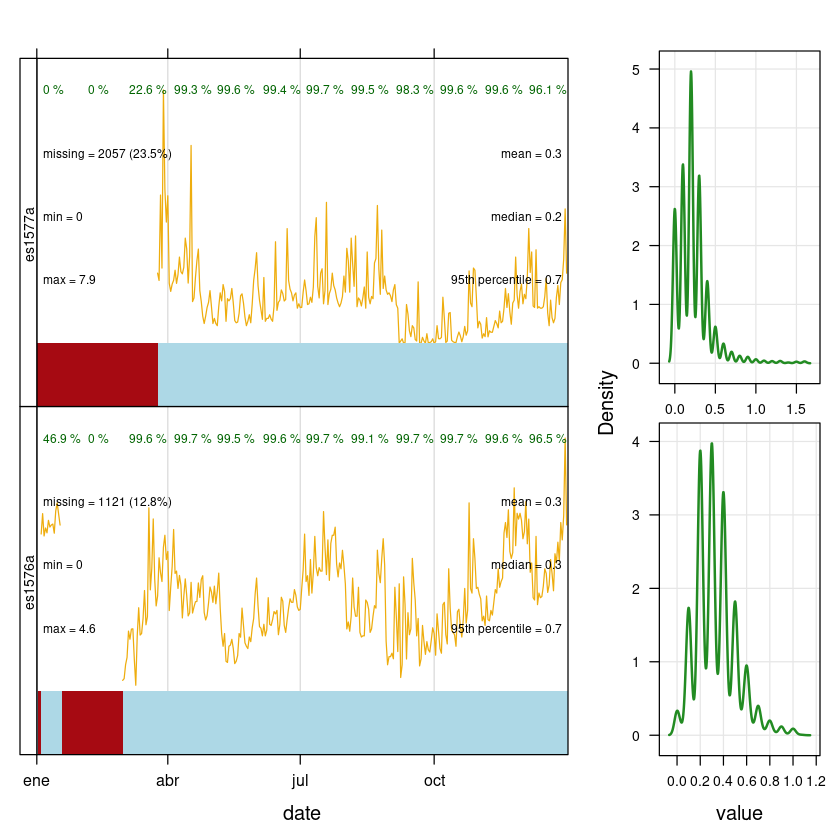

In [20]:
summaryPlot(guarcros_clean,period = "months", type = "density")

In [21]:
summaryPlot(guarcrostodo_clean,period = "months", type = "density")

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


ERROR: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 34670 rows:
* 94348, 103129
* 94349, 103130
* 94350, 103131
* 94351, 103132
* 94352, 103133
* 94353, 103134
* 94354, 103135
* 94355, 103136
* 94356, 103137
* 94357, 103138
* 94358, 103139
* 94359, 103140
* 94360, 103141
* 94361, 103142
* 94362, 103143
* 94363, 103144
* 94364, 103145
* 94365, 103146
* 94366, 103147
* 94367, 103148
* 94368, 103149
* 94369, 103150
* 94370, 103151
* 94371, 103152
* 94372, 103153
* 94373, 103154
* 94374, 103155
* 94375, 103156
* 94376, 103157
* 94377, 103158
* 94378, 103159
* 94379, 103160
* 94380, 103161
* 94381, 103162
* 94382, 103163
* 94383, 103164
* 94384, 103165
* 94385, 103166
* 94386, 103167
* 94387, 103168
* 94388, 103169
* 94389, 103170
* 94390, 103171
* 94391, 103172
* 94392, 103173
* 94393, 103174
* 94394, 103175
* 94395, 103176
* 94396, 103177
* 94397, 103178
* 94398, 103179
* 94399, 103180
* 94400, 103181
* 94401, 103182
* 94402, 103183
* 94403, 103184
* 94404, 103185
* 94405, 103186
* 94406, 103187
* 94407, 103188
* 94408, 103189
* 94409, 103190
* 94410, 103191
* 94411, 103192
* 94412, 103193
* 94413, 103194
* 94414, 103195
* 94415, 103196
* 94416, 103197
* 94417, 103198
* 94418, 103199
* 94419, 103200
* 94420, 103201
* 94421, 103202
* 94422, 103203
* 94423, 103204
* 94424, 103205
* 94425, 103206
* 94426, 103207
* 94427, 103208
* 94428, 103209
* 94429, 103210
* 94430, 103211
* 94431, 103212
* 94432, 103213
* 94433, 103214
* 94434, 103215
* 94435, 103216
* 94436, 103217
* 94437, 103218
* 94438, 103219
* 94439, 103220
* 94440, 103221
* 94441, 103222
* 94442, 103223
* 94443, 103224
* 94444, 103225
* 94445, 103226
* 94446, 103227
* 94447, 103228
* 94448, 103229
* 94449, 103230
* 94450, 103231
* 94451, 103232
* 94452, 103233
* 94453, 103234
* 94454, 103235
* 94455, 103236
* 94456, 103237
* 94457, 103238
* 94458, 103239
* 94459, 103240
* 94460, 103241
* 94461, 103242
* 94462, 103243
* 94463, 103244
* 94464, 103245
* 94465, 103246
* 94466, 103247
* 94467, 103248
* 94468, 103249
* 94469, 103250
* 94470, 103251
* 94471, 103252
* 94472, 103253
* 94473, 103254
* 94474, 103255
* 94475, 103256
* 94476, 103257
* 94477, 103258
* 94478, 103259
* 94479, 103260
* 94480, 103261
* 94481, 103262
* 94482, 103263
* 94483, 103264
* 94484, 103265
* 94485, 103266
* 94486, 103267
* 94487, 103268
* 94488, 103269
* 94489, 103270
* 94490, 103271
* 94491, 103272
* 94492, 103273
* 94493, 103274
* 94494, 103275
* 94495, 103276
* 94496, 103277
* 94497, 103278
* 94498, 103279
* 94499, 103280
* 94500, 103281
* 94501, 103282
* 94502, 103283
* 94503, 103284
* 94504, 103285
* 94505, 103286
* 94506, 103287
* 94507, 103288
* 94508, 103289
* 94509, 103290
* 94510, 103291
* 94511, 103292
* 94512, 103293
* 94513, 103294
* 94514, 103295
* 94515, 103296
* 94516, 103297
* 94517, 103298
* 94518, 103299
* 94519, 103300
* 94520, 103301
* 94521, 103302
* 94522, 103303
* 94523, 103304
* 94524, 103305
* 94525, 103306
* 94526, 103307
* 94527, 103308
* 94528, 103309
* 94529, 103310
* 94530, 103311
* 94531, 103312
* 94532, 103313
* 94533, 103314
* 94534, 103315
* 94535, 103316
* 94536, 103317
* 94537, 103318
* 94538, 103319
* 94539, 103320
* 94540, 103321
* 94541, 103322
* 94542, 103323
* 94543, 103324
* 94544, 103325
* 94545, 103326
* 94546, 103327
* 94547, 103328
* 94548, 103329
* 94549, 103330
* 94550, 103331
* 94551, 103332
* 94552, 103333
* 94553, 103334
* 94554, 103335
* 94555, 103336
* 94556, 103337
* 94557, 103338
* 94558, 103339
* 94559, 103340
* 94560, 103341
* 94561, 103342
* 94562, 103343
* 94563, 103344
* 94564, 103345
* 94565, 103346
* 94566, 103347
* 94567, 103348
* 94568, 103349
* 94569, 103350
* 94570, 103351
* 94571, 103352
* 94572, 103353
* 94573, 103354
* 94574, 103355
* 94575, 103356
* 94576, 103357
* 94577, 103358
* 94578, 103359
* 94579, 103360
* 94580, 103361
* 94581, 103362
* 94582, 103363
* 94583, 103364
* 94584, 103365
* 94585, 103366
* 94586, 103367
* 94587, 103368
* 94588, 103369
* 94589, 103370
* 94590, 103371
* 94591, 103372
* 94592, 103373
* 94593, 103374
* 94594, 103375
* 94595, 103376
* 94596, 103377
* 94597, 103378
* 94598, 103379
* 94599, 103380
* 94600, 103381
* 94601, 103382
* 94602, 103383
* 94603, 103384
* 94604, 103385
* 94605, 103386
* 94606, 103387
* 94607, 103388
* 94608, 103389
* 94609, 103390
* 94610, 103391
* 94611, 103392
* 94612, 103393
* 94613, 103394
* 94614, 103395
* 94615, 103396
* 94616, 103397
* 94617, 103398
* 94618, 103399
* 94619, 103400
* 94620, 103401
* 94621, 103402
* 102996, 103403
* 94622, 103404
* 94623, 103405
* 94624, 103406
* 94625, 103407
* 94626, 103408
* 94627, 103409
* 94628, 103410
* 94629, 103411
* 94630, 103412
* 94631, 103413
* 94632, 103414
* 94633, 103415
* 94634, 103416
* 94635, 103417
* 94636, 103418
* 94637, 103419
* 94638, 103420
* 94639, 103421
* 94640, 103422
* 94641, 103423
* 94642, 103424
* 94643, 103425
* 94644, 103426
* 94645, 103427
* 94646, 103428
* 94647, 103429
* 94648, 103430
* 94649, 103431
* 94650, 103432
* 94651, 103433
* 94652, 103434
* 94653, 103435
* 94654, 103436
* 94655, 103437
* 94656, 103438
* 94657, 103439
* 94658, 103440
* 94659, 103441
* 94660, 103442
* 94661, 103443
* 94662, 103444
* 94663, 103445
* 94664, 103446
* 94665, 103447
* 94666, 103448
* 94667, 103449
* 94668, 103450
* 94669, 103451
* 94670, 103452
* 94671, 103453
* 94672, 103454
* 94673, 103455
* 94674, 103456
* 94675, 103457
* 94676, 103458
* 94677, 103459
* 94678, 103460
* 94679, 103461
* 94680, 103462
* 94681, 103463
* 94682, 103464
* 94683, 103465
* 94684, 103466
* 94685, 103467
* 94686, 103468
* 94687, 103469
* 94688, 103470
* 94689, 103471
* 94690, 103472
* 94691, 103473
* 94692, 103474
* 94693, 103475
* 94694, 103476
* 94695, 103477
* 94696, 103478
* 94697, 103479
* 94698, 103480
* 94699, 103481
* 94700, 103482
* 94701, 103483
* 94702, 103484
* 94703, 103485
* 94704, 103486
* 94705, 103487
* 94706, 103488
* 94707, 103489
* 94708, 103490
* 94709, 103491
* 94710, 103492
* 94711, 103493
* 94712, 103494
* 94713, 103495
* 94714, 103496
* 94715, 103497
* 94716, 103498
* 94717, 103499
* 94718, 103500
* 94719, 103501
* 94720, 103502
* 94721, 103503
* 94722, 103504
* 94723, 103505
* 94724, 103506
* 94725, 103507
* 94726, 103508
* 94727, 103509
* 94728, 103510
* 94729, 103511
* 94730, 103512
* 94731, 103513
* 94732, 103514
* 94733, 103515
* 94734, 103516
* 94735, 103517
* 94736, 103518
* 94737, 103519
* 94738, 103520
* 94739, 103521
* 94740, 103522
* 94741, 103523
* 94742, 103524
* 94743, 103525
* 94744, 103526
* 94745, 103527
* 94746, 103528
* 94747, 103529
* 94748, 103530
* 94749, 103531
* 94750, 103532
* 94751, 103533
* 94752, 103534
* 94753, 103535
* 94754, 103536
* 94755, 103537
* 94756, 103538
* 94757, 103539
* 94758, 103540
* 94759, 103541
* 94760, 103542
* 94761, 103543
* 94762, 103544
* 94763, 103545
* 94764, 103546
* 94765, 103547
* 94766, 103548
* 94767, 103549
* 94768, 103550
* 94769, 103551
* 94770, 103552
* 94771, 103553
* 94772, 103554
* 94773, 103555
* 94774, 103556
* 94775, 103557
* 94776, 103558
* 94777, 103559
* 94778, 103560
* 94779, 103561
* 94780, 103562
* 94781, 103563
* 94782, 103564
* 94783, 103565
* 94784, 103566
* 94785, 103567
* 94786, 103568
* 94787, 103569
* 94788, 103570
* 94789, 103571
* 94790, 103572
* 94791, 103573
* 94792, 103574
* 94793, 103575
* 94794, 103576
* 94795, 103577
* 94796, 103578
* 94797, 103579
* 94798, 103580
* 94799, 103581
* 94800, 103582
* 94801, 103583
* 94802, 103584
* 94803, 103585
* 94804, 103586
* 94805, 103587
* 94806, 103588
* 94807, 103589
* 94808, 103590
* 94809, 103591
* 94810, 103592
* 94811, 103593
* 94812, 103594
* 94813, 103595
* 94814, 103596
* 94815, 103597
* 94816, 103598
* 94817, 103599
* 94818, 103600
* 94819, 103601
* 94820, 103602
* 94821, 103603
* 94822, 103604
* 94823, 103605
* 94824, 103606
* 94825, 103607
* 94826, 103608
* 94827, 103609
* 94828, 103610
* 94829, 103611
* 94830, 103612
* 94831, 103613
* 94832, 103614
* 94833, 103615
* 94834, 103616
* 94835, 103617
* 94836, 103618
* 94837, 103619
* 94838, 103620
* 94839, 103621
* 94840, 103622
* 94841, 103623
* 94842, 103624
* 94843, 103625
* 94844, 103626
* 94845, 103627
* 94846, 103628
* 94847, 103629
* 94848, 103630
* 94849, 103631
* 94850, 103632
* 94851, 103633
* 94852, 103634
* 94853, 103635
* 94854, 103636
* 94855, 103637
* 94856, 103638
* 94857, 103639
* 94858, 103640
* 94859, 103641
* 94860, 103642
* 94861, 103643
* 94862, 103644
* 94863, 103645
* 94864, 103646
* 94865, 103647
* 94866, 103648
* 94867, 103649
* 94868, 103650
* 94869, 103651
* 94870, 103652
* 94871, 103653
* 94872, 103654
* 94873, 103655
* 94874, 103656
* 94875, 103657
* 94876, 103658
* 94877, 103659
* 94878, 103660
* 94879, 103661
* 94880, 103662
* 94881, 103663
* 94882, 103664
* 94883, 103665
* 94884, 103666
* 94885, 103667
* 94886, 103668
* 94887, 103669
* 94888, 103670
* 94889, 103671
* 94890, 103672
* 94891, 103673
* 94892, 103674
* 94893, 103675
* 94894, 103676
* 94895, 103677
* 94896, 103678
* 94897, 103679
* 94898, 103680
* 94899, 103681
* 94900, 103682
* 94901, 103683
* 94902, 103684
* 94903, 103685
* 94904, 103686
* 94905, 103687
* 94906, 103688
* 94907, 103689
* 94908, 103690
* 94909, 103691
* 94910, 103692
* 94911, 103693
* 94912, 103694
* 94913, 103695
* 94914, 103696
* 94915, 103697
* 94916, 103698
* 94917, 103699
* 94918, 103700
* 94919, 103701
* 94920, 103702
* 94921, 103703
* 94922, 103704
* 94923, 103705
* 94924, 103706
* 94925, 103707
* 94926, 103708
* 94927, 103709
* 94928, 103710
* 94929, 103711
* 94930, 103712
* 94931, 103713
* 94932, 103714
* 94933, 103715
* 94934, 103716
* 94935, 103717
* 94936, 103718
* 94937, 103719
* 94938, 103720
* 94939, 103721
* 94940, 103722
* 94941, 103723
* 94942, 103724
* 94943, 103725
* 94944, 103726
* 94945, 103727
* 94946, 103728
* 94947, 103729
* 94948, 103730
* 94949, 103731
* 94950, 103732
* 94951, 103733
* 94952, 103734
* 94953, 103735
* 94954, 103736
* 94955, 103737
* 94956, 103738
* 94957, 103739
* 94958, 103740
* 94959, 103741
* 94960, 103742
* 94961, 103743
* 94962, 103744
* 94963, 103745
* 94964, 103746
* 94965, 103747
* 94966, 103748
* 94967, 103749
* 94968, 103750
* 94969, 103751
* 94970, 103752
* 94971, 103753
* 94972, 103754
* 94973, 103755
* 94974, 103756
* 94975, 103757
* 94976, 103758
* 94977, 103759
* 94978, 103760
* 94979, 103761
* 94980, 103762
* 102999, 103763
* 94982, 103764
* 94983, 103765
* 94984, 103766
* 94985, 103767
* 94986, 103768
* 94987, 103769
* 94988, 103770
* 94989, 103771
* 94990, 103772
* 94991, 103773
* 94992, 103774
* 94993, 103775
* 94994, 103776
* 94995, 103777
* 94996, 103778
* 94997, 103779
* 94998, 103780
* 94999, 103781
* 95000, 103782
* 95001, 103783
* 95002, 103784
* 95003, 103785
* 95004, 103786
* 95005, 103787
* 95006, 103788
* 95007, 103789
* 95008, 103790
* 95009, 103791
* 95010, 103792
* 95011, 103793
* 95012, 103794
* 95013, 103795
* 95014, 103796
* 95015, 103797
* 95016, 103798
* 95017, 103799
* 95018, 103800
* 95019, 103801
* 95020, 103802
* 95021, 103803
* 95022, 103804
* 95023, 103805
* 95024, 103806
* 95025, 103807
* 95026, 103808
* 95027, 103809
* 95028, 103810
* 95029, 103811
* 95030, 103812
* 95031, 103813
* 95032, 103814
* 95033, 103815
* 95034, 103816
* 95035, 103817
* 95036, 103818
* 95037, 103819
* 95038, 103820
* 95039, 103821
* 95040, 103822
* 95041, 103823
* 95042, 103824
* 95043, 103825
* 95044, 103826
* 95045, 103827
* 95046, 103828
* 95047, 103829
* 95048, 103830
* 95049, 103831
* 95050, 103832
* 95051, 103833
* 95052, 103834
* 95053, 103835
* 95054, 103836
* 95055, 103837
* 95056, 103838
* 95057, 103839
* 95058, 103840
* 95059, 103841
* 95060, 103842
* 95061, 103843
* 95062, 103844
* 95063, 103845
* 95064, 103846
* 95065, 103847
* 95066, 103848
* 95067, 103849
* 95068, 103850
* 95069, 103851
* 95070, 103852
* 95071, 103853
* 95072, 103854
* 95073, 103855
* 95074, 103856
* 95075, 103857
* 95076, 103858
* 95077, 103859
* 95078, 103860
* 95079, 103861
* 95080, 103862
* 95081, 103863
* 95082, 103864
* 95083, 103865
* 95084, 103866
* 95085, 103867
* 95086, 103868
* 95087, 103869
* 95088, 103870
* 95089, 103871
* 95090, 103872
* 95091, 103873
* 95092, 103874
* 95093, 103875
* 95094, 103876
* 95095, 103877
* 95096, 103878
* 95097, 103879
* 95098, 103880
* 95099, 103881
* 95100, 103882
* 95101, 103883
* 95102, 103884
* 95103, 103885
* 95104, 103886
* 95105, 103887
* 95106, 103888
* 95107, 103889
* 95108, 103890
* 95109, 103891
* 95110, 103892
* 95111, 103893
* 95112, 103894
* 95113, 103895
* 95114, 103896
* 95115, 103897
* 95116, 103898
* 95117, 103899
* 95118, 103900
* 95119, 103901
* 95120, 103902
* 95121, 103903
* 95122, 103904
* 95123, 103905
* 95124, 103906
* 95125, 103907
* 95126, 103908
* 95127, 103909
* 95128, 103910
* 95129, 103911
* 95130, 103912
* 95131, 103913
* 95132, 103914
* 95133, 103915
* 95134, 103916
* 95135, 103917
* 95136, 103918
* 95137, 103919
* 95138, 103920
* 95139, 103921
* 95140, 103922
* 95141, 103923
* 95142, 103924
* 95143, 103925
* 95144, 103926
* 95145, 103927
* 95146, 103928
* 95147, 103929
* 95148, 103930
* 95149, 103931
* 95150, 103932
* 95151, 103933
* 95152, 103934
* 95153, 103935
* 95154, 103936
* 95155, 103937
* 95156, 103938
* 95157, 103939
* 95158, 103940
* 95159, 103941
* 95160, 103942
* 95161, 103943
* 95162, 103944
* 95163, 103945
* 95164, 103946
* 95165, 103947
* 95166, 103948
* 95167, 103949
* 95168, 103950
* 95169, 103951
* 95170, 103952
* 95171, 103953
* 95172, 103954
* 95173, 103955
* 95174, 103956
* 95175, 103957
* 95176, 103958
* 95177, 103959
* 95178, 103960
* 95179, 103961
* 95180, 103962
* 95181, 103963
* 95182, 103964
* 95183, 103965
* 95184, 103966
* 95185, 103967
* 95186, 103968
* 95187, 103969
* 95188, 103970
* 95189, 103971
* 95190, 103972
* 95191, 103973
* 95192, 103974
* 95193, 103975
* 95194, 103976
* 95195, 103977
* 95196, 103978
* 95197, 103979
* 95198, 103980
* 95199, 103981
* 95200, 103982
* 95201, 103983
* 95202, 103984
* 95203, 103985
* 95204, 103986
* 95205, 103987
* 95206, 103988
* 95207, 103989
* 95208, 103990
* 95209, 103991
* 95210, 103992
* 95211, 103993
* 95212, 103994
* 95213, 103995
* 95214, 103996
* 95215, 103997
* 95216, 103998
* 95217, 103999
* 95218, 104000
* 95219, 104001
* 95220, 104002
* 95221, 104003
* 95222, 104004
* 95223, 104005
* 95224, 104006
* 95225, 104007
* 95226, 104008
* 95227, 104009
* 95228, 104010
* 95229, 104011
* 95230, 104012
* 95231, 104013
* 95232, 104014
* 95233, 104015
* 95234, 104016
* 95235, 104017
* 95236, 104018
* 95237, 104019
* 95238, 104020
* 95239, 104021
* 95240, 104022
* 95241, 104023
* 95242, 104024
* 95243, 104025
* 95244, 104026
* 95245, 104027
* 95246, 104028
* 95247, 104029
* 95248, 104030
* 95249, 104031
* 95250, 104032
* 95251, 104033
* 95252, 104034
* 95253, 104035
* 95254, 104036
* 95255, 104037
* 95256, 104038
* 95257, 104039
* 95258, 104040
* 95259, 104041
* 95260, 104042
* 95261, 104043
* 95262, 104044
* 95263, 104045
* 95264, 104046
* 95265, 104047
* 95266, 104048
* 95267, 104049
* 95268, 104050
* 95269, 104051
* 95270, 104052
* 95271, 104053
* 95272, 104054
* 95273, 104055
* 95274, 104056
* 95275, 104057
* 95276, 104058
* 95277, 104059
* 95278, 104060
* 95279, 104061
* 95280, 104062
* 95281, 104063
* 95282, 104064
* 95283, 104065
* 95284, 104066
* 95285, 104067
* 95286, 104068
* 95287, 104069
* 95288, 104070
* 95289, 104071
* 95290, 104072
* 95291, 104073
* 95292, 104074
* 95293, 104075
* 95294, 104076
* 95295, 104077
* 95296, 104078
* 95297, 104079
* 95298, 104080
* 95299, 104081
* 95300, 104082
* 95301, 104083
* 95302, 104084
* 95303, 104085
* 95304, 104086
* 95305, 104087
* 95306, 104088
* 95307, 104089
* 95308, 104090
* 95309, 104091
* 95310, 104092
* 95311, 104093
* 95312, 104094
* 95313, 104095
* 95314, 104096
* 95315, 104097
* 95316, 104098
* 95317, 104099
* 95318, 104100
* 95319, 104101
* 95320, 104102
* 95321, 104103
* 95322, 104104
* 95323, 104105
* 95324, 104106
* 95325, 104107
* 95326, 104108
* 95327, 104109
* 95328, 104110
* 95329, 104111
* 95330, 104112
* 95331, 104113
* 95332, 104114
* 95333, 104115
* 95334, 104116
* 95335, 104117
* 95336, 104118
* 95337, 104119
* 95338, 104120
* 95339, 104121
* 95340, 104122
* 95341, 104123
* 95342, 104124
* 95343, 104125
* 95344, 104126
* 95345, 104127
* 95346, 104128
* 95347, 104129
* 95348, 104130
* 95349, 104131
* 95350, 104132
* 95351, 104133
* 95352, 104134
* 95353, 104135
* 95354, 104136
* 95355, 104137
* 95356, 104138
* 95357, 104139
* 95358, 104140
* 95359, 104141
* 95360, 104142
* 95361, 104143
* 95362, 104144
* 95363, 104145
* 95364, 104146
* 95365, 104147
* 95366, 104148
* 95367, 104149
* 95368, 104150
* 95369, 104151
* 95370, 104152
* 95371, 104153
* 95372, 104154
* 95373, 104155
* 95374, 104156
* 95375, 104157
* 95376, 104158
* 95377, 104159
* 95378, 104160
* 95379, 104161
* 95380, 104162
* 95381, 104163
* 95382, 104164
* 95383, 104165
* 95384, 104166
* 95385, 104167
* 95386, 104168
* 95387, 104169
* 95388, 104170
* 95389, 104171
* 95390, 104172
* 95391, 104173
* 95392, 104174
* 95393, 104175
* 95394, 104176
* 95395, 104177
* 95396, 104178
* 95397, 104179
* 95398, 104180
* 95399, 104181
* 95400, 104182
* 95401, 104183
* 95402, 104184
* 95403, 104185
* 95404, 104186
* 95405, 104187
* 95406, 104188
* 95407, 104189
* 95408, 104190
* 95409, 104191
* 95410, 104192
* 95411, 104193
* 95412, 104194
* 95413, 104195
* 95414, 104196
* 95415, 104197
* 95416, 104198
* 95417, 104199
* 95418, 104200
* 95419, 104201
* 95420, 104202
* 95421, 104203
* 95422, 104204
* 95423, 104205
* 95424, 104206
* 95425, 104207
* 95426, 104208
* 95427, 104209
* 95428, 104210
* 95429, 104211
* 95430, 104212
* 95431, 104213
* 95432, 104214
* 95433, 104215
* 95434, 104216
* 95435, 104217
* 95436, 104218
* 95437, 104219
* 95438, 104220
* 95439, 104221
* 95440, 104222
* 95441, 104223
* 95442, 104224
* 95443, 104225
* 95444, 104226
* 95445, 104227
* 95446, 104228
* 95447, 104229
* 95448, 104230
* 95449, 104231
* 95450, 104232
* 95451, 104233
* 95452, 104234
* 95453, 104235
* 95454, 104236
* 95455, 104237
* 95456, 104238
* 95457, 104239
* 95458, 104240
* 95459, 104241
* 95460, 104242
* 95461, 104243
* 95462, 104244
* 95463, 104245
* 95464, 104246
* 95465, 104247
* 95466, 104248
* 95467, 104249
* 95468, 104250
* 95469, 104251
* 95470, 104252
* 95471, 104253
* 95472, 104254
* 95473, 104255
* 95474, 104256
* 95475, 104257
* 95476, 104258
* 95477, 104259
* 95478, 104260
* 95479, 104261
* 95480, 104262
* 95481, 104263
* 95482, 104264
* 95483, 104265
* 95484, 104266
* 95485, 104267
* 95486, 104268
* 95487, 104269
* 95488, 104270
* 95489, 104271
* 95490, 104272
* 95491, 104273
* 95492, 104274
* 95493, 104275
* 95494, 104276
* 95495, 104277
* 95496, 104278
* 95497, 104279
* 95498, 104280
* 95499, 104281
* 95500, 104282
* 95501, 104283
* 95502, 104284
* 95503, 104285
* 95504, 104286
* 95505, 104287
* 95506, 104288
* 95507, 104289
* 95508, 104290
* 95509, 104291
* 95510, 104292
* 95511, 104293
* 95512, 104294
* 95513, 104295
* 95514, 104296
* 95515, 104297
* 95516, 104298
* 95517, 104299
* 95518, 104300
* 95519, 104301
* 95520, 104302
* 95521, 104303
* 95522, 104304
* 95523, 104305
* 95524, 104306
* 95525, 104307
* 95526, 104308
* 95527, 104309
* 95528, 104310
* 95529, 104311
* 95530, 104312
* 95531, 104313
* 95532, 104314
* 95533, 104315
* 95534, 104316
* 95535, 104317
* 95536, 104318
* 95537, 104319
* 95538, 104320
* 95539, 104321
* 95540, 104322
* 95541, 104323
* 95542, 104324
* 95543, 104325
* 95544, 104326
* 95545, 104327
* 95546, 104328
* 95547, 104329
* 95548, 104330
* 95549, 104331
* 95550, 104332
* 95551, 104333
* 95552, 104334
* 95553, 104335
* 95554, 104336
* 95555, 104337
* 95556, 104338
* 95557, 104339
* 95558, 104340
* 95559, 104341
* 95560, 104342
* 95561, 104343
* 95562, 104344
* 95563, 104345
* 95564, 104346
* 95565, 104347
* 95566, 104348
* 95567, 104349
* 95568, 104350
* 95569, 104351
* 95570, 104352
* 95571, 104353
* 95572, 104354
* 95573, 104355
* 95574, 104356
* 95575, 104357
* 95576, 104358
* 95577, 104359
* 95578, 104360
* 95579, 104361
* 95580, 104362
* 95581, 104363
* 95582, 104364
* 95583, 104365
* 95584, 104366
* 95585, 104367
* 95586, 104368
* 95587, 104369
* 95588, 104370
* 95589, 104371
* 95590, 104372
* 95591, 104373
* 95592, 104374
* 95593, 104375
* 95594, 104376
* 95595, 104377
* 95596, 104378
* 95597, 104379
* 95598, 104380
* 95599, 104381
* 95600, 104382
* 95601, 104383
* 95602, 104384
* 95603, 104385
* 95604, 104386
* 95605, 104387
* 95606, 104388
* 95607, 104389
* 95608, 104390
* 95609, 104391
* 95610, 104392
* 95611, 104393
* 95612, 104394
* 95613, 104395
* 95614, 104396
* 95615, 104397
* 95616, 104398
* 95617, 104399
* 95618, 104400
* 95619, 104401
* 95620, 104402
* 95621, 104403
* 95622, 104404
* 95623, 104405
* 95624, 104406
* 95625, 104407
* 95626, 104408
* 95627, 104409
* 95628, 104410
* 95629, 104411
* 95630, 104412
* 95631, 104413
* 95632, 104414
* 95633, 104415
* 95634, 104416
* 95635, 104417
* 95636, 104418
* 95637, 104419
* 95638, 104420
* 95639, 104421
* 95640, 104422
* 95641, 104423
* 95642, 104424
* 95643, 104425
* 95644, 104426
* 95645, 104427
* 95646, 104428
* 95647, 104429
* 95648, 104430
* 95649, 104431
* 95650, 104432
* 95651, 104433
* 95652, 104434
* 95653, 104435
* 95654, 104436
* 95655, 104437
* 95656, 104438
* 95657, 104439
* 95658, 104440
* 95659, 104441
* 95660, 104442
* 95661, 104443
* 95662, 104444
* 95663, 104445
* 95664, 104446
* 95665, 104447
* 95666, 104448
* 95667, 104449
* 95668, 104450
* 95669, 104451
* 95670, 104452
* 95671, 104453
* 95672, 104454
* 95673, 104455
* 95674, 104456
* 95675, 104457
* 95676, 104458
* 95677, 104459
* 95678, 104460
* 95679, 104461
* 95680, 104462
* 95681, 104463
* 95682, 104464
* 95683, 104465
* 95684, 104466
* 95685, 104467
* 95686, 104468
* 95687, 104469
* 95688, 104470
* 95689, 104471
* 95690, 104472
* 95691, 104473
* 95692, 104474
* 95693, 104475
* 95694, 104476
* 95695, 104477
* 95696, 104478
* 95697, 104479
* 95698, 104480
* 95699, 104481
* 95700, 104482
* 95701, 104483
* 95702, 104484
* 95703, 104485
* 95704, 104486
* 95705, 104487
* 95706, 104488
* 95707, 104489
* 95708, 104490
* 95709, 104491
* 95710, 104492
* 95711, 104493
* 95712, 104494
* 95713, 104495
* 95714, 104496
* 95715, 104497
* 95716, 104498
* 95717, 104499
* 95718, 104500
* 95719, 104501
* 95720, 104502
* 95721, 104503
* 95722, 104504
* 95723, 104505
* 95724, 104506
* 95725, 104507
* 95726, 104508
* 95727, 104509
* 95728, 104510
* 95729, 104511
* 95730, 104512
* 95731, 104513
* 95732, 104514
* 95733, 104515
* 95734, 104516
* 95735, 104517
* 95736, 104518
* 95737, 104519
* 95738, 104520
* 95739, 104521
* 95740, 104522
* 95741, 104523
* 95742, 104524
* 95743, 104525
* 95744, 104526
* 95745, 104527
* 95746, 104528
* 95747, 104529
* 95748, 104530
* 95749, 104531
* 95750, 104532
* 95751, 104533
* 95752, 104534
* 95753, 104535
* 95754, 104536
* 95755, 104537
* 95756, 104538
* 95757, 104539
* 95758, 104540
* 95759, 104541
* 95760, 104542
* 95761, 104543
* 95762, 104544
* 95763, 104545
* 95764, 104546
* 95765, 104547
* 95766, 104548
* 95767, 104549
* 95768, 104550
* 95769, 104551
* 95770, 104552
* 95771, 104553
* 95772, 104554
* 95773, 104555
* 95774, 104556
* 95775, 104557
* 95776, 104558
* 95777, 104559
* 95778, 104560
* 95779, 104561
* 95780, 104562
* 95781, 104563
* 95782, 104564
* 95783, 104565
* 95784, 104566
* 95785, 104567
* 95786, 104568
* 95787, 104569
* 95788, 104570
* 95789, 104571
* 95790, 104572
* 95791, 104573
* 95792, 104574
* 95793, 104575
* 95794, 104576
* 95795, 104577
* 95796, 104578
* 95797, 104579
* 95798, 104580
* 95799, 104581
* 95800, 104582
* 95801, 104583
* 95802, 104584
* 95803, 104585
* 95804, 104586
* 95805, 104587
* 95806, 104588
* 95807, 104589
* 95808, 104590
* 95809, 104591
* 95810, 104592
* 95811, 104593
* 95812, 104594
* 95813, 104595
* 95814, 104596
* 95815, 104597
* 95816, 104598
* 95817, 104599
* 95818, 104600
* 95819, 104601
* 95820, 104602
* 95821, 104603
* 95822, 104604
* 95823, 104605
* 95824, 104606
* 95825, 104607
* 95826, 104608
* 95827, 104609
* 95828, 104610
* 95829, 104611
* 95830, 104612
* 95831, 104613
* 95832, 104614
* 95833, 104615
* 95834, 104616
* 95835, 104617
* 95836, 104618
* 95837, 104619
* 95838, 104620
* 95839, 104621
* 95840, 104622
* 95841, 104623
* 95842, 104624
* 95843, 104625
* 95844, 104626
* 95845, 104627
* 95846, 104628
* 95847, 104629
* 95848, 104630
* 95849, 104631
* 95850, 104632
* 95851, 104633
* 95852, 104634
* 95853, 104635
* 95854, 104636
* 95855, 104637
* 95856, 104638
* 95857, 104639
* 95858, 104640
* 95859, 104641
* 95860, 104642
* 95861, 104643
* 95862, 104644
* 95863, 104645
* 95864, 104646
* 95865, 104647
* 95866, 104648
* 95867, 104649
* 95868, 104650
* 95869, 104651
* 95870, 104652
* 95871, 104653
* 95872, 104654
* 95873, 104655
* 95874, 104656
* 95875, 104657
* 95876, 104658
* 95877, 104659
* 95878, 104660
* 95879, 104661
* 95880, 104662
* 95881, 104663
* 95882, 104664
* 95883, 104665
* 95884, 104666
* 95885, 104667
* 95886, 104668
* 95887, 104669
* 95888, 104670
* 95889, 104671
* 95890, 104672
* 95891, 104673
* 95892, 104674
* 95893, 104675
* 95894, 104676
* 95895, 104677
* 95896, 104678
* 95897, 104679
* 95898, 104680
* 95899, 104681
* 95900, 104682
* 95901, 104683
* 95902, 104684
* 95903, 104685
* 95904, 104686
* 95905, 104687
* 95906, 104688
* 95907, 104689
* 95908, 104690
* 95909, 104691
* 95910, 104692
* 95911, 104693
* 95912, 104694
* 95913, 104695
* 95914, 104696
* 95915, 104697
* 95916, 104698
* 95917, 104699
* 95918, 104700
* 95919, 104701
* 95920, 104702
* 95921, 104703
* 95922, 104704
* 95923, 104705
* 95924, 104706
* 95925, 104707
* 95926, 104708
* 95927, 104709
* 95928, 104710
* 95929, 104711
* 95930, 104712
* 95931, 104713
* 95932, 104714
* 95933, 104715
* 95934, 104716
* 95935, 104717
* 95936, 104718
* 95937, 104719
* 95938, 104720
* 95939, 104721
* 95940, 104722
* 95941, 104723
* 95942, 104724
* 95943, 104725
* 95944, 104726
* 95945, 104727
* 95946, 104728
* 95947, 104729
* 95948, 104730
* 95949, 104731
* 95950, 104732
* 95951, 104733
* 95952, 104734
* 95953, 104735
* 95954, 104736
* 95955, 104737
* 95956, 104738
* 95957, 104739
* 95958, 104740
* 95959, 104741
* 95960, 104742
* 95961, 104743
* 95962, 104744
* 95963, 104745
* 95964, 104746
* 95965, 104747
* 95966, 104748
* 95967, 104749
* 95968, 104750
* 95969, 104751
* 95970, 104752
* 95971, 104753
* 95972, 104754
* 95973, 104755
* 95974, 104756
* 95975, 104757
* 95976, 104758
* 95977, 104759
* 95978, 104760
* 95979, 104761
* 95980, 104762
* 95981, 104763
* 95982, 104764
* 95983, 104765
* 95984, 104766
* 95985, 104767
* 103004, 104768
* 95986, 104769
* 95987, 104770
* 95988, 104771
* 95989, 104772
* 95990, 104773
* 95991, 104774
* 95992, 104775
* 95993, 104776
* 95994, 104777
* 95995, 104778
* 95996, 104779
* 95997, 104780
* 95998, 104781
* 95999, 104782
* 96000, 104783
* 96001, 104784
* 96002, 104785
* 96003, 104786
* 96004, 104787
* 96005, 104788
* 96006, 104789
* 96007, 104790
* 96008, 104791
* 96009, 104792
* 96010, 104793
* 96011, 104794
* 96012, 104795
* 96013, 104796
* 96014, 104797
* 96015, 104798
* 96016, 104799
* 96017, 104800
* 96018, 104801
* 96019, 104802
* 96020, 104803
* 96021, 104804
* 96022, 104805
* 96023, 104806
* 96024, 104807
* 96025, 104808
* 96026, 104809
* 96027, 104810
* 96028, 104811
* 96029, 104812
* 96030, 104813
* 96031, 104814
* 96032, 104815
* 96033, 104816
* 96034, 104817
* 96035, 104818
* 96036, 104819
* 96037, 104820
* 96038, 104821
* 96039, 104822
* 96040, 104823
* 96041, 104824
* 96042, 104825
* 96043, 104826
* 96044, 104827
* 96045, 104828
* 96046, 104829
* 96047, 104830
* 96048, 104831
* 96049, 104832
* 96050, 104833
* 96051, 104834
* 96052, 104835
* 96053, 104836
* 96054, 104837
* 96055, 104838
* 96056, 104839
* 96057, 104840
* 96058, 104841
* 96059, 104842
* 96060, 104843
* 96061, 104844
* 96062, 104845
* 96063, 104846
* 96064, 104847
* 96065, 104848
* 96066, 104849
* 96067, 104850
* 96068, 104851
* 96069, 104852
* 96070, 104853
* 96071, 104854
* 96072, 104855
* 96073, 104856
* 96074, 104857
* 96075, 104858
* 96076, 104859
* 96077, 104860
* 96078, 104861
* 96079, 104862
* 96080, 104863
* 96081, 104864
* 96082, 104865
* 96083, 104866
* 96084, 104867
* 96085, 104868
* 96086, 104869
* 96087, 104870
* 96088, 104871
* 96089, 104872
* 96090, 104873
* 96091, 104874
* 96092, 104875
* 96093, 104876
* 96094, 104877
* 96095, 104878
* 96096, 104879
* 96097, 104880
* 96098, 104881
* 96099, 104882
* 96100, 104883
* 96101, 104884
* 96102, 104885
* 96103, 104886
* 96104, 104887
* 96105, 104888
* 96106, 104889
* 96107, 104890
* 96108, 104891
* 96109, 104892
* 96110, 104893
* 96111, 104894
* 96112, 104895
* 96113, 104896
* 96114, 104897
* 96115, 104898
* 96116, 104899
* 96117, 104900
* 96118, 104901
* 96119, 104902
* 96120, 104903
* 96121, 104904
* 96122, 104905
* 96123, 104906
* 96124, 104907
* 96125, 104908
* 96126, 104909
* 96127, 104910
* 96128, 104911
* 96129, 104912
* 96130, 104913
* 96131, 104914
* 96132, 104915
* 96133, 104916
* 96134, 104917
* 96135, 104918
* 96136, 104919
* 96137, 104920
* 96138, 104921
* 96139, 104922
* 96140, 104923
* 96141, 104924
* 96142, 104925
* 96143, 104926
* 96144, 104927
* 96145, 104928
* 96146, 104929
* 96147, 104930
* 96148, 104931
* 96149, 104932
* 96150, 104933
* 96151, 104934
* 96152, 104935
* 96153, 104936
* 96154, 104937
* 96155, 104938
* 96156, 104939
* 96157, 104940
* 96158, 104941
* 96159, 104942
* 96160, 104943
* 96161, 104944
* 96162, 104945
* 96163, 104946
* 96164, 104947
* 96165, 104948
* 96166, 104949
* 96167, 104950
* 96168, 104951
* 96169, 104952
* 96170, 104953
* 96171, 104954
* 96172, 104955
* 96173, 104956
* 96174, 104957
* 96175, 104958
* 96176, 104959
* 96177, 104960
* 96178, 104961
* 96179, 104962
* 96180, 104963
* 96181, 104964
* 96182, 104965
* 96183, 104966
* 96184, 104967
* 96185, 104968
* 96186, 104969
* 96187, 104970
* 96188, 104971
* 96189, 104972
* 96190, 104973
* 96191, 104974
* 96192, 104975
* 96193, 104976
* 96194, 104977
* 96195, 104978
* 96196, 104979
* 96197, 104980
* 96198, 104981
* 96199, 104982
* 96200, 104983
* 96201, 104984
* 96202, 104985
* 96203, 104986
* 96204, 104987
* 96205, 104988
* 96206, 104989
* 96207, 104990
* 96208, 104991
* 96209, 104992
* 96210, 104993
* 96211, 104994
* 96212, 104995
* 96213, 104996
* 96214, 104997
* 96215, 104998
* 96216, 104999
* 96217, 105000
* 96218, 105001
* 96219, 105002
* 96220, 105003
* 96221, 105004
* 96222, 105005
* 96223, 105006
* 96224, 105007
* 96225, 105008
* 96226, 105009
* 96227, 105010
* 96228, 105011
* 96229, 105012
* 96230, 105013
* 96231, 105014
* 96232, 105015
* 96233, 105016
* 96234, 105017
* 96235, 105018
* 96236, 105019
* 96237, 105020
* 96238, 105021
* 96239, 105022
* 96240, 105023
* 96241, 105024
* 96242, 105025
* 96243, 105026
* 96244, 105027
* 96245, 105028
* 96246, 105029
* 96247, 105030
* 96248, 105031
* 96249, 105032
* 96250, 105033
* 96251, 105034
* 96252, 105035
* 96253, 105036
* 96254, 105037
* 96255, 105038
* 96256, 105039
* 96257, 105040
* 96258, 105041
* 96259, 105042
* 96260, 105043
* 96261, 105044
* 96262, 105045
* 96263, 105046
* 96264, 105047
* 96265, 105048
* 96266, 105049
* 96267, 105050
* 96268, 105051
* 96269, 105052
* 96270, 105053
* 96271, 105054
* 96272, 105055
* 96273, 105056
* 96274, 105057
* 96275, 105058
* 96276, 105059
* 96277, 105060
* 96278, 105061
* 96279, 105062
* 96280, 105063
* 96281, 105064
* 96282, 105065
* 96283, 105066
* 96284, 105067
* 96285, 105068
* 96286, 105069
* 96287, 105070
* 96288, 105071
* 96289, 105072
* 96290, 105073
* 96291, 105074
* 96292, 105075
* 96293, 105076
* 96294, 105077
* 96295, 105078
* 96296, 105079
* 96297, 105080
* 96298, 105081
* 96299, 105082
* 96300, 105083
* 96301, 105084
* 96302, 105085
* 96303, 105086
* 96304, 105087
* 96305, 105088
* 96306, 105089
* 96307, 105090
* 96308, 105091
* 96309, 105092
* 96310, 105093
* 96311, 105094
* 96312, 105095
* 96313, 105096
* 96314, 105097
* 96315, 105098
* 96316, 105099
* 96317, 105100
* 96318, 105101
* 96319, 105102
* 96320, 105103
* 96321, 105104
* 96322, 105105
* 96323, 105106
* 96324, 105107
* 96325, 105108
* 96326, 105109
* 96327, 105110
* 96328, 105111
* 96329, 105112
* 96330, 105113
* 96331, 105114
* 96332, 105115
* 96333, 105116
* 96334, 105117
* 96335, 105118
* 96336, 105119
* 96337, 105120
* 96338, 105121
* 96339, 105122
* 96340, 105123
* 96341, 105124
* 96342, 105125
* 96343, 105126
* 96344, 105127
* 96345, 105128
* 96346, 105129
* 96347, 105130
* 96348, 105131
* 96349, 105132
* 96350, 105133
* 96351, 105134
* 96352, 105135
* 96353, 105136
* 96354, 105137
* 96355, 105138
* 96356, 105139
* 96357, 105140
* 96358, 105141
* 96359, 105142
* 96360, 105143
* 96361, 105144
* 96362, 105145
* 96363, 105146
* 96364, 105147
* 96365, 105148
* 96366, 105149
* 96367, 105150
* 96368, 105151
* 96369, 105152
* 96370, 105153
* 96371, 105154
* 96372, 105155
* 96373, 105156
* 96374, 105157
* 96375, 105158
* 96376, 105159
* 96377, 105160
* 96378, 105161
* 96379, 105162
* 96380, 105163
* 96381, 105164
* 96382, 105165
* 96383, 105166
* 96384, 105167
* 96385, 105168
* 96386, 105169
* 96387, 105170
* 96388, 105171
* 96389, 105172
* 96390, 105173
* 96391, 105174
* 96392, 105175
* 96393, 105176
* 96394, 105177
* 96395, 105178
* 96396, 105179
* 96397, 105180
* 96398, 105181
* 96399, 105182
* 96400, 105183
* 96401, 105184
* 96402, 105185
* 96403, 105186
* 96404, 105187
* 96405, 105188
* 96406, 105189
* 96407, 105190
* 96408, 105191
* 96409, 105192
* 96410, 105193
* 96411, 105194
* 96412, 105195
* 96413, 105196
* 96414, 105197
* 96415, 105198
* 96416, 105199
* 96417, 105200
* 96418, 105201
* 96419, 105202
* 96420, 105203
* 96421, 105204
* 96422, 105205
* 96423, 105206
* 96424, 105207
* 96425, 105208
* 96426, 105209
* 96427, 105210
* 96428, 105211
* 96429, 105212
* 96430, 105213
* 96431, 105214
* 96432, 105215
* 96433, 105216
* 96434, 105217
* 96435, 105218
* 96436, 105219
* 96437, 105220
* 96438, 105221
* 96439, 105222
* 96440, 105223
* 96441, 105224
* 96442, 105225
* 96443, 105226
* 96444, 105227
* 96445, 105228
* 96446, 105229
* 96447, 105230
* 96448, 105231
* 96449, 105232
* 96450, 105233
* 96451, 105234
* 96452, 105235
* 96453, 105236
* 96454, 105237
* 96455, 105238
* 96456, 105239
* 96457, 105240
* 96458, 105241
* 96459, 105242
* 96460, 105243
* 96461, 105244
* 96462, 105245
* 96463, 105246
* 96464, 105247
* 96465, 105248
* 96466, 105249
* 96467, 105250
* 96468, 105251
* 96469, 105252
* 96470, 105253
* 96471, 105254
* 96472, 105255
* 96473, 105256
* 96474, 105257
* 96475, 105258
* 96476, 105259
* 96477, 105260
* 96478, 105261
* 96479, 105262
* 96480, 105263
* 96481, 105264
* 96482, 105265
* 96483, 105266
* 96484, 105267
* 96485, 105268
* 96486, 105269
* 96487, 105270
* 96488, 105271
* 96489, 105272
* 96490, 105273
* 96491, 105274
* 96492, 105275
* 96493, 105276
* 96494, 105277
* 96495, 105278
* 96496, 105279
* 96497, 105280
* 96498, 105281
* 96499, 105282
* 96500, 105283
* 96501, 105284
* 96502, 105285
* 96503, 105286
* 96504, 105287
* 96505, 105288
* 96506, 105289
* 96507, 105290
* 96508, 105291
* 96509, 105292
* 96510, 105293
* 96511, 105294
* 96512, 105295
* 96513, 105296
* 96514, 105297
* 96515, 105298
* 96516, 105299
* 96517, 105300
* 96518, 105301
* 96519, 105302
* 96520, 105303
* 96521, 105304
* 96522, 105305
* 96523, 105306
* 96524, 105307
* 96525, 105308
* 96526, 105309
* 96527, 105310
* 96528, 105311
* 96529, 105312
* 96530, 105313
* 96531, 105314
* 96532, 105315
* 96533, 105316
* 96534, 105317
* 96535, 105318
* 96536, 105319
* 96537, 105320
* 96538, 105321
* 96539, 105322
* 96540, 105323
* 96541, 105324
* 96542, 105325
* 96543, 105326
* 96544, 105327
* 96545, 105328
* 96546, 105329
* 96547, 105330
* 96548, 105331
* 96549, 105332
* 96550, 105333
* 96551, 105334
* 96552, 105335
* 96553, 105336
* 96554, 105337
* 96555, 105338
* 96556, 105339
* 96557, 105340
* 96558, 105341
* 96559, 105342
* 96560, 105343
* 96561, 105344
* 96562, 105345
* 96563, 105346
* 96564, 105347
* 96565, 105348
* 96566, 105349
* 96567, 105350
* 96568, 105351
* 96569, 105352
* 96570, 105353
* 96571, 105354
* 96572, 105355
* 96573, 105356
* 96574, 105357
* 96575, 105358
* 96576, 105359
* 96577, 105360
* 96578, 105361
* 96579, 105362
* 96580, 105363
* 96581, 105364
* 96582, 105365
* 96583, 105366
* 96584, 105367
* 96585, 105368
* 96586, 105369
* 96587, 105370
* 96588, 105371
* 96589, 105372
* 96590, 105373
* 96591, 105374
* 96592, 105375
* 96593, 105376
* 96594, 105377
* 96595, 105378
* 96596, 105379
* 96597, 105380
* 96598, 105381
* 96599, 105382
* 96600, 105383
* 96601, 105384
* 96602, 105385
* 96603, 105386
* 96604, 105387
* 96605, 105388
* 96606, 105389
* 96607, 105390
* 96608, 105391
* 96609, 105392
* 96610, 105393
* 96611, 105394
* 96612, 105395
* 96613, 105396
* 96614, 105397
* 96615, 105398
* 96616, 105399
* 96617, 105400
* 96618, 105401
* 96619, 105402
* 96620, 105403
* 96621, 105404
* 96622, 105405
* 96623, 105406
* 96624, 105407
* 96625, 105408
* 96626, 105409
* 96627, 105410
* 96628, 105411
* 96629, 105412
* 96630, 105413
* 96631, 105414
* 96632, 105415
* 96633, 105416
* 96634, 105417
* 96635, 105418
* 96636, 105419
* 96637, 105420
* 96638, 105421
* 96639, 105422
* 96640, 105423
* 96641, 105424
* 96642, 105425
* 96643, 105426
* 96644, 105427
* 96645, 105428
* 96646, 105429
* 96647, 105430
* 96648, 105431
* 96649, 105432
* 96650, 105433
* 96651, 105434
* 96652, 105435
* 96653, 105436
* 96654, 105437
* 96655, 105438
* 96656, 105439
* 96657, 105440
* 96658, 105441
* 96659, 105442
* 96660, 105443
* 96661, 105444
* 96662, 105445
* 96663, 105446
* 96664, 105447
* 96665, 105448
* 96666, 105449
* 96667, 105450
* 96668, 105451
* 96669, 105452
* 96670, 105453
* 96671, 105454
* 96672, 105455
* 96673, 105456
* 96674, 105457
* 96675, 105458
* 96676, 105459
* 96677, 105460
* 96678, 105461
* 96679, 105462
* 96680, 105463
* 96681, 105464
* 96682, 105465
* 96683, 105466
* 96684, 105467
* 96685, 105468
* 96686, 105469
* 96687, 105470
* 96688, 105471
* 96689, 105472
* 96690, 105473
* 96691, 105474
* 96692, 105475
* 96693, 105476
* 96694, 105477
* 96695, 105478
* 96696, 105479
* 96697, 105480
* 96698, 105481
* 96699, 105482
* 96700, 105483
* 96701, 105484
* 96702, 105485
* 96703, 105486
* 96704, 105487
* 96705, 105488
* 96706, 105489
* 96707, 105490
* 96708, 105491
* 96709, 105492
* 96710, 105493
* 96711, 105494
* 96712, 105495
* 96713, 105496
* 96714, 105497
* 96715, 105498
* 96716, 105499
* 96717, 105500
* 96718, 105501
* 96719, 105502
* 96720, 105503
* 96721, 105504
* 96722, 105505
* 96723, 105506
* 96724, 105507
* 96725, 105508
* 96726, 105509
* 96727, 105510
* 96728, 105511
* 96729, 105512
* 96730, 105513
* 96731, 105514
* 96732, 105515
* 96733, 105516
* 96734, 105517
* 96735, 105518
* 96736, 105519
* 96737, 105520
* 96738, 105521
* 96739, 105522
* 96740, 105523
* 96741, 105524
* 96742, 105525
* 96743, 105526
* 96744, 105527
* 96745, 105528
* 96746, 105529
* 96747, 105530
* 96748, 105531
* 96749, 105532
* 96750, 105533
* 96751, 105534
* 96752, 105535
* 96753, 105536
* 96754, 105537
* 96755, 105538
* 96756, 105539
* 96757, 105540
* 96758, 105541
* 96759, 105542
* 96760, 105543
* 96761, 105544
* 96762, 105545
* 96763, 105546
* 96764, 105547
* 96765, 105548
* 96766, 105549
* 96767, 105550
* 96768, 105551
* 96769, 105552
* 96770, 105553
* 96771, 105554
* 96772, 105555
* 96773, 105556
* 96774, 105557
* 96775, 105558
* 96776, 105559
* 96777, 105560
* 96778, 105561
* 96779, 105562
* 96780, 105563
* 96781, 105564
* 96782, 105565
* 96783, 105566
* 96784, 105567
* 96785, 105568
* 96786, 105569
* 96787, 105570
* 96788, 105571
* 96789, 105572
* 96790, 105573
* 96791, 105574
* 96792, 105575
* 96793, 105576
* 96794, 105577
* 96795, 105578
* 96796, 105579
* 96797, 105580
* 96798, 105581
* 96799, 105582
* 96800, 105583
* 96801, 105584
* 96802, 105585
* 96803, 105586
* 96804, 105587
* 96805, 105588
* 96806, 105589
* 96807, 105590
* 96808, 105591
* 96809, 105592
* 96810, 105593
* 96811, 105594
* 96812, 105595
* 96813, 105596
* 96814, 105597
* 96815, 105598
* 96816, 105599
* 96817, 105600
* 96818, 105601
* 96819, 105602
* 96820, 105603
* 96821, 105604
* 96822, 105605
* 96823, 105606
* 96824, 105607
* 96825, 105608
* 96826, 105609
* 96827, 105610
* 96828, 105611
* 96829, 105612
* 96830, 105613
* 96831, 105614
* 96832, 105615
* 96833, 105616
* 96834, 105617
* 96835, 105618
* 96836, 105619
* 96837, 105620
* 96838, 105621
* 96839, 105622
* 96840, 105623
* 96841, 105624
* 96842, 105625
* 96843, 105626
* 96844, 105627
* 96845, 105628
* 96846, 105629
* 96847, 105630
* 96848, 105631
* 96849, 105632
* 96850, 105633
* 96851, 105634
* 96852, 105635
* 96853, 105636
* 96854, 105637
* 96855, 105638
* 96856, 105639
* 96857, 105640
* 96858, 105641
* 96859, 105642
* 96860, 105643
* 96861, 105644
* 96862, 105645
* 96863, 105646
* 96864, 105647
* 96865, 105648
* 96866, 105649
* 96867, 105650
* 96868, 105651
* 96869, 105652
* 96870, 105653
* 96871, 105654
* 96872, 105655
* 96873, 105656
* 96874, 105657
* 96875, 105658
* 96876, 105659
* 96877, 105660
* 96878, 105661
* 96879, 105662
* 96880, 105663
* 96881, 105664
* 96882, 105665
* 96883, 105666
* 96884, 105667
* 96885, 105668
* 96886, 105669
* 96887, 105670
* 96888, 105671
* 96889, 105672
* 96890, 105673
* 96891, 105674
* 96892, 105675
* 96893, 105676
* 96894, 105677
* 96895, 105678
* 96896, 105679
* 96897, 105680
* 96898, 105681
* 96899, 105682
* 96900, 105683
* 96901, 105684
* 96902, 105685
* 96903, 105686
* 96904, 105687
* 96905, 105688
* 96906, 105689
* 96907, 105690
* 96908, 105691
* 96909, 105692
* 96910, 105693
* 96911, 105694
* 96912, 105695
* 96913, 105696
* 96914, 105697
* 96915, 105698
* 96916, 105699
* 96917, 105700
* 96918, 105701
* 96919, 105702
* 96920, 105703
* 96921, 105704
* 96922, 105705
* 96923, 105706
* 96924, 105707
* 96925, 105708
* 96926, 105709
* 96927, 105710
* 96928, 105711
* 96929, 105712
* 96930, 105713
* 96931, 105714
* 96932, 105715
* 96933, 105716
* 96934, 105717
* 96935, 105718
* 96936, 105719
* 96937, 105720
* 96938, 105721
* 96939, 105722
* 96940, 105723
* 96941, 105724
* 96942, 105725
* 96943, 105726
* 96944, 105727
* 96945, 105728
* 96946, 105729
* 96947, 105730
* 96948, 105731
* 96949, 105732
* 96950, 105733
* 96951, 105734
* 96952, 105735
* 96953, 105736
* 96954, 105737
* 96955, 105738
* 96956, 105739
* 96957, 105740
* 96958, 105741
* 96959, 105742
* 96960, 105743
* 96961, 105744
* 96962, 105745
* 96963, 105746
* 96964, 105747
* 96965, 105748
* 96966, 105749
* 96967, 105750
* 96968, 105751
* 96969, 105752
* 96970, 105753
* 96971, 105754
* 96972, 105755
* 96973, 105756
* 96974, 105757
* 96975, 105758
* 96976, 105759
* 96977, 105760
* 96978, 105761
* 96979, 105762
* 96980, 105763
* 96981, 105764
* 96982, 105765
* 96983, 105766
* 96984, 105767
* 96985, 105768
* 96986, 105769
* 96987, 105770
* 96988, 105771
* 96989, 105772
* 96990, 105773
* 96991, 105774
* 96992, 105775
* 96993, 105776
* 96994, 105777
* 96995, 105778
* 96996, 105779
* 96997, 105780
* 96998, 105781
* 96999, 105782
* 97000, 105783
* 97001, 105784
* 97002, 105785
* 97003, 105786
* 97004, 105787
* 97005, 105788
* 97053, 105789
* 97054, 105790
* 97055, 105791
* 97056, 105792
* 97057, 105793
* 97058, 105794
* 97059, 105795
* 97060, 105796
* 97061, 105797
* 97062, 105798
* 97063, 105799
* 97064, 105800
* 97065, 105801
* 97066, 105802
* 97067, 105803
* 97068, 105804
* 97069, 105805
* 97070, 105806
* 97071, 105807
* 97072, 105808
* 97073, 105809
* 97074, 105810
* 97075, 105811
* 97076, 105812
* 97077, 105813
* 97078, 105814
* 97079, 105815
* 97080, 105816
* 97081, 105817
* 97082, 105818
* 97083, 105819
* 97084, 105820
* 97085, 105821
* 97086, 105822
* 97087, 105823
* 97088, 105824
* 97089, 105825
* 97090, 105826
* 97091, 105827
* 97092, 105828
* 97093, 105829
* 97094, 105830
* 97095, 105831
* 97096, 105832
* 97097, 105833
* 97098, 105834
* 97099, 105835
* 97100, 105836
* 97101, 105837
* 97102, 105838
* 97103, 105839
* 97104, 105840
* 97105, 105841
* 97106, 105842
* 97107, 105843
* 97108, 105844
* 97109, 105845
* 97110, 105846
* 97111, 105847
* 97112, 105848
* 97113, 105849
* 97114, 105850
* 97115, 105851
* 97116, 105852
* 97117, 105853
* 97118, 105854
* 97119, 105855
* 97120, 105856
* 97121, 105857
* 97122, 105858
* 97123, 105859
* 97124, 105860
* 97125, 105861
* 97126, 105862
* 97127, 105863
* 97128, 105864
* 97129, 105865
* 97130, 105866
* 97131, 105867
* 97132, 105868
* 97133, 105869
* 97134, 105870
* 97135, 105871
* 97136, 105872
* 97137, 105873
* 97138, 105874
* 97139, 105875
* 97140, 105876
* 97141, 105877
* 97142, 105878
* 97143, 105879
* 97144, 105880
* 97145, 105881
* 97146, 105882
* 97147, 105883
* 97148, 105884
* 97149, 105885
* 97150, 105886
* 97151, 105887
* 97152, 105888
* 97153, 105889
* 97154, 105890
* 97155, 105891
* 97156, 105892
* 97157, 105893
* 97158, 105894
* 97159, 105895
* 97160, 105896
* 97161, 105897
* 97162, 105898
* 97163, 105899
* 97164, 105900
* 97165, 105901
* 97166, 105902
* 97167, 105903
* 97168, 105904
* 97169, 105905
* 97170, 105906
* 97171, 105907
* 97172, 105908
* 97173, 105909
* 97174, 105910
* 97175, 105911
* 97176, 105912
* 97177, 105913
* 97178, 105914
* 97179, 105915
* 97180, 105916
* 97181, 105917
* 97182, 105918
* 97183, 105919
* 97184, 105920
* 97185, 105921
* 97186, 105922
* 97187, 105923
* 97188, 105924
* 97189, 105925
* 97190, 105926
* 97191, 105927
* 97192, 105928
* 97193, 105929
* 97194, 105930
* 97195, 105931
* 97196, 105932
* 97197, 105933
* 97198, 105934
* 97199, 105935
* 97200, 105936
* 97201, 105937
* 97202, 105938
* 97203, 105939
* 97204, 105940
* 97205, 105941
* 97206, 105942
* 97207, 105943
* 97208, 105944
* 97209, 105945
* 97210, 105946
* 97211, 105947
* 97212, 105948
* 97213, 105949
* 97214, 105950
* 97215, 105951
* 97216, 105952
* 97217, 105953
* 97218, 105954
* 97219, 105955
* 97220, 105956
* 97221, 105957
* 97222, 105958
* 97223, 105959
* 97224, 105960
* 97225, 105961
* 97226, 105962
* 97227, 105963
* 97228, 105964
* 97229, 105965
* 97230, 105966
* 97231, 105967
* 97232, 105968
* 97233, 105969
* 97234, 105970
* 97235, 105971
* 97236, 105972
* 97237, 105973
* 97238, 105974
* 97239, 105975
* 97240, 105976
* 97241, 105977
* 97242, 105978
* 97243, 105979
* 97244, 105980
* 97245, 105981
* 97246, 105982
* 97247, 105983
* 97248, 105984
* 97249, 105985
* 97250, 105986
* 97251, 105987
* 97252, 105988
* 97253, 105989
* 97254, 105990
* 97255, 105991
* 97256, 105992
* 97257, 105993
* 97258, 105994
* 97259, 105995
* 97260, 105996
* 97261, 105997
* 97262, 105998
* 97263, 105999
* 97264, 106000
* 97265, 106001
* 97266, 106002
* 97267, 106003
* 97268, 106004
* 97269, 106005
* 97270, 106006
* 97271, 106007
* 97272, 106008
* 97273, 106009
* 97274, 106010
* 97275, 106011
* 97276, 106012
* 97277, 106013
* 97278, 106014
* 97279, 106015
* 97280, 106016
* 97281, 106017
* 97282, 106018
* 97283, 106019
* 97284, 106020
* 97285, 106021
* 97286, 106022
* 97287, 106023
* 97288, 106024
* 97289, 106025
* 97290, 106026
* 97291, 106027
* 97292, 106028
* 97293, 106029
* 97294, 106030
* 97295, 106031
* 97296, 106032
* 97297, 106033
* 97298, 106034
* 97299, 106035
* 97300, 106036
* 97301, 106037
* 97302, 106038
* 97303, 106039
* 97304, 106040
* 97305, 106041
* 97306, 106042
* 97307, 106043
* 97308, 106044
* 97309, 106045
* 97310, 106046
* 97311, 106047
* 97312, 106048
* 97313, 106049
* 97314, 106050
* 97315, 106051
* 97316, 106052
* 97317, 106053
* 97318, 106054
* 97319, 106055
* 97320, 106056
* 97321, 106057
* 97322, 106058
* 97323, 106059
* 97324, 106060
* 97325, 106061
* 97326, 106062
* 97327, 106063
* 97328, 106064
* 97329, 106065
* 97330, 106066
* 97331, 106067
* 97332, 106068
* 97333, 106069
* 97334, 106070
* 97335, 106071
* 97336, 106072
* 97337, 106073
* 97338, 106074
* 97339, 106075
* 97340, 106076
* 97341, 106077
* 97342, 106078
* 97343, 106079
* 97344, 106080
* 97345, 106081
* 97346, 106082
* 97347, 106083
* 97348, 106084
* 97349, 106085
* 97350, 106086
* 97351, 106087
* 97352, 106088
* 97353, 106089
* 97354, 106090
* 97355, 106091
* 97356, 106092
* 97357, 106093
* 97358, 106094
* 97359, 106095
* 97360, 106096
* 97361, 106097
* 97362, 106098
* 97363, 106099
* 97364, 106100
* 97365, 106101
* 97366, 106102
* 97367, 106103
* 97368, 106104
* 97369, 106105
* 97370, 106106
* 97371, 106107
* 97372, 106108
* 97373, 106109
* 97374, 106110
* 97375, 106111
* 97376, 106112
* 97377, 106113
* 97378, 106114
* 97379, 106115
* 97380, 106116
* 97381, 106117
* 97382, 106118
* 97383, 106119
* 97384, 106120
* 97385, 106121
* 97386, 106122
* 97387, 106123
* 97388, 106124
* 97389, 106125
* 97390, 106126
* 97391, 106127
* 97392, 106128
* 97393, 106129
* 97394, 106130
* 97395, 106131
* 97396, 106132
* 97397, 106133
* 97398, 106134
* 97399, 106135
* 97400, 106136
* 97401, 106137
* 97402, 106138
* 97403, 106139
* 97404, 106140
* 97405, 106141
* 97406, 106142
* 97407, 106143
* 97408, 106144
* 97409, 106145
* 97410, 106146
* 97411, 106147
* 97412, 106148
* 97413, 106149
* 97414, 106150
* 97415, 106151
* 97416, 106152
* 97417, 106153
* 97418, 106154
* 97419, 106155
* 97420, 106156
* 97421, 106157
* 97422, 106158
* 97423, 106159
* 97424, 106160
* 97425, 106161
* 97426, 106162
* 97427, 106163
* 97428, 106164
* 97429, 106165
* 97430, 106166
* 97431, 106167
* 97432, 106168
* 97433, 106169
* 97434, 106170
* 97435, 106171
* 97436, 106172
* 97437, 106173
* 97438, 106174
* 97439, 106175
* 97440, 106176
* 97441, 106177
* 97442, 106178
* 97443, 106179
* 97444, 106180
* 97445, 106181
* 97446, 106182
* 97447, 106183
* 97448, 106184
* 97449, 106185
* 97450, 106186
* 97451, 106187
* 97452, 106188
* 97453, 106189
* 97454, 106190
* 97455, 106191
* 97456, 106192
* 97457, 106193
* 97458, 106194
* 97459, 106195
* 97460, 106196
* 97461, 106197
* 97462, 106198
* 97463, 106199
* 97464, 106200
* 97465, 106201
* 97466, 106202
* 97467, 106203
* 97468, 106204
* 97469, 106205
* 97470, 106206
* 97471, 106207
* 97472, 106208
* 97473, 106209
* 97474, 106210
* 97475, 106211
* 97476, 106212
* 97477, 106213
* 97478, 106214
* 97479, 106215
* 97480, 106216
* 97481, 106217
* 97482, 106218
* 97483, 106219
* 97484, 106220
* 97485, 106221
* 97486, 106222
* 97487, 106223
* 97488, 106224
* 97489, 106225
* 97490, 106226
* 97491, 106227
* 97492, 106228
* 97493, 106229
* 97494, 106230
* 97495, 106231
* 97496, 106232
* 97497, 106233
* 97498, 106234
* 97499, 106235
* 97500, 106236
* 97501, 106237
* 97502, 106238
* 97503, 106239
* 97504, 106240
* 97505, 106241
* 97506, 106242
* 97507, 106243
* 97508, 106244
* 97509, 106245
* 97510, 106246
* 97511, 106247
* 97512, 106248
* 97513, 106249
* 97514, 106250
* 97515, 106251
* 97516, 106252
* 97517, 106253
* 97518, 106254
* 97519, 106255
* 97520, 106256
* 97521, 106257
* 97522, 106258
* 97523, 106259
* 97524, 106260
* 97525, 106261
* 97526, 106262
* 97527, 106263
* 97528, 106264
* 97529, 106265
* 97530, 106266
* 97531, 106267
* 97532, 106268
* 97533, 106269
* 97534, 106270
* 97535, 106271
* 97536, 106272
* 97537, 106273
* 97538, 106274
* 97539, 106275
* 97540, 106276
* 97541, 106277
* 97542, 106278
* 97543, 106279
* 97544, 106280
* 97545, 106281
* 97546, 106282
* 97547, 106283
* 97548, 106284
* 97549, 106285
* 97550, 106286
* 97551, 106287
* 97552, 106288
* 97553, 106289
* 97554, 106290
* 97555, 106291
* 97556, 106292
* 97557, 106293
* 97558, 106294
* 97559, 106295
* 97560, 106296
* 97561, 106297
* 97562, 106298
* 97563, 106299
* 97564, 106300
* 97565, 106301
* 97566, 106302
* 97567, 106303
* 97568, 106304
* 97569, 106305
* 97570, 106306
* 97571, 106307
* 97572, 106308
* 97573, 106309
* 97574, 106310
* 97575, 106311
* 97576, 106312
* 97577, 106313
* 97578, 106314
* 97579, 106315
* 97580, 106316
* 97581, 106317
* 97582, 106318
* 97583, 106319
* 97584, 106320
* 97585, 106321
* 97586, 106322
* 97587, 106323
* 97588, 106324
* 97589, 106325
* 97590, 106326
* 97591, 106327
* 97592, 106328
* 97593, 106329
* 97594, 106330
* 97595, 106331
* 97596, 106332
* 97597, 106333
* 97598, 106334
* 97599, 106335
* 97600, 106336
* 97601, 106337
* 97602, 106338
* 97603, 106339
* 97604, 106340
* 97605, 106341
* 97606, 106342
* 97607, 106343
* 97608, 106344
* 97609, 106345
* 97610, 106346
* 97611, 106347
* 97612, 106348
* 97613, 106349
* 97614, 106350
* 97615, 106351
* 97616, 106352
* 97617, 106353
* 97618, 106354
* 97619, 106355
* 97620, 106356
* 97621, 106357
* 97622, 106358
* 97623, 106359
* 97624, 106360
* 97625, 106361
* 97626, 106362
* 97627, 106363
* 97628, 106364
* 97629, 106365
* 97630, 106366
* 97631, 106367
* 97632, 106368
* 97633, 106369
* 97634, 106370
* 97635, 106371
* 97636, 106372
* 97637, 106373
* 97638, 106374
* 97639, 106375
* 97640, 106376
* 97641, 106377
* 97642, 106378
* 97643, 106379
* 97644, 106380
* 97645, 106381
* 97646, 106382
* 97647, 106383
* 97648, 106384
* 97649, 106385
* 97650, 106386
* 97651, 106387
* 97652, 106388
* 97653, 106389
* 97654, 106390
* 97655, 106391
* 97656, 106392
* 97657, 106393
* 97658, 106394
* 97659, 106395
* 97660, 106396
* 97661, 106397
* 97662, 106398
* 97663, 106399
* 97664, 106400
* 97665, 106401
* 97666, 106402
* 97667, 106403
* 97668, 106404
* 97669, 106405
* 97670, 106406
* 97671, 106407
* 97672, 106408
* 97673, 106409
* 97674, 106410
* 97675, 106411
* 97676, 106412
* 97677, 106413
* 97678, 106414
* 97679, 106415
* 97680, 106416
* 97681, 106417
* 97682, 106418
* 97683, 106419
* 97684, 106420
* 97685, 106421
* 97686, 106422
* 97687, 106423
* 97688, 106424
* 97689, 106425
* 97690, 106426
* 97691, 106427
* 97692, 106428
* 97693, 106429
* 97694, 106430
* 97695, 106431
* 97696, 106432
* 97697, 106433
* 97698, 106434
* 97699, 106435
* 97700, 106436
* 97701, 106437
* 97702, 106438
* 97703, 106439
* 97704, 106440
* 97705, 106441
* 97706, 106442
* 97707, 106443
* 97708, 106444
* 97709, 106445
* 97710, 106446
* 97711, 106447
* 97712, 106448
* 97713, 106449
* 97714, 106450
* 97715, 106451
* 97716, 106452
* 97717, 106453
* 97718, 106454
* 97719, 106455
* 97720, 106456
* 97721, 106457
* 97722, 106458
* 97723, 106459
* 97724, 106460
* 97725, 106461
* 97726, 106462
* 97727, 106463
* 97728, 106464
* 97729, 106465
* 97730, 106466
* 97731, 106467
* 97732, 106468
* 97733, 106469
* 97734, 106470
* 97735, 106471
* 97736, 106472
* 97737, 106473
* 97738, 106474
* 97739, 106475
* 97740, 106476
* 97741, 106477
* 97742, 106478
* 97743, 106479
* 97744, 106480
* 97745, 106481
* 97746, 106482
* 97747, 106483
* 97748, 106484
* 97749, 106485
* 97750, 106486
* 97751, 106487
* 97752, 106488
* 97753, 106489
* 97754, 106490
* 97755, 106491
* 97756, 106492
* 97757, 106493
* 97758, 106494
* 97759, 106495
* 97760, 106496
* 97761, 106497
* 97762, 106498
* 97763, 106499
* 97764, 106500
* 97765, 106501
* 97766, 106502
* 97767, 106503
* 97768, 106504
* 97769, 106505
* 97770, 106506
* 97771, 106507
* 97772, 106508
* 97773, 106509
* 97774, 106510
* 97775, 106511
* 97776, 106512
* 97777, 106513
* 97778, 106514
* 97779, 106515
* 97780, 106516
* 97781, 106517
* 97782, 106518
* 97783, 106519
* 97784, 106520
* 97785, 106521
* 97786, 106522
* 97787, 106523
* 97788, 106524
* 97789, 106525
* 97790, 106526
* 97791, 106527
* 97792, 106528
* 97793, 106529
* 97794, 106530
* 97795, 106531
* 97796, 106532
* 97797, 106533
* 97798, 106534
* 97799, 106535
* 97800, 106536
* 97801, 106537
* 97802, 106538
* 97803, 106539
* 97804, 106540
* 97805, 106541
* 97806, 106542
* 97807, 106543
* 97808, 106544
* 97809, 106545
* 97810, 106546
* 97811, 106547
* 97812, 106548
* 97813, 106549
* 97814, 106550
* 97815, 106551
* 97816, 106552
* 97817, 106553
* 97818, 106554
* 97819, 106555
* 97820, 106556
* 97821, 106557
* 97822, 106558
* 97823, 106559
* 97824, 106560
* 97825, 106561
* 97826, 106562
* 97827, 106563
* 97828, 106564
* 97829, 106565
* 97830, 106566
* 97831, 106567
* 97832, 106568
* 97833, 106569
* 97834, 106570
* 97835, 106571
* 97836, 106572
* 97837, 106573
* 97838, 106574
* 97839, 106575
* 97840, 106576
* 97841, 106577
* 97842, 106578
* 97843, 106579
* 97844, 106580
* 97845, 106581
* 97846, 106582
* 97847, 106583
* 97848, 106584
* 97849, 106585
* 97850, 106586
* 97851, 106587
* 97852, 106588
* 97853, 106589
* 97854, 106590
* 97855, 106591
* 97856, 106592
* 97857, 106593
* 97858, 106594
* 97859, 106595
* 97860, 106596
* 97861, 106597
* 97862, 106598
* 97863, 106599
* 97864, 106600
* 97865, 106601
* 97866, 106602
* 97867, 106603
* 97868, 106604
* 97869, 106605
* 97870, 106606
* 97871, 106607
* 103128, 106608
* 97872, 106609
* 97873, 106610
* 97874, 106611
* 97875, 106612
* 97876, 106613
* 97877, 106614
* 97878, 106615
* 97879, 106616
* 97880, 106617
* 97881, 106618
* 97882, 106619
* 97883, 106620
* 97884, 106621
* 97885, 106622
* 97886, 106623
* 97887, 106624
* 97888, 106625
* 97889, 106626
* 97890, 106627
* 97891, 106628
* 97892, 106629
* 97893, 106630
* 97894, 106631
* 97895, 106632
* 97896, 106633
* 97897, 106634
* 97898, 106635
* 97899, 106636
* 97900, 106637
* 97901, 106638
* 97902, 106639
* 97903, 106640
* 97904, 106641
* 97905, 106642
* 97906, 106643
* 97907, 106644
* 97908, 106645
* 97909, 106646
* 97910, 106647
* 97911, 106648
* 97912, 106649
* 97913, 106650
* 97914, 106651
* 97915, 106652
* 97916, 106653
* 97917, 106654
* 97918, 106655
* 97919, 106656
* 97920, 106657
* 97921, 106658
* 97922, 106659
* 97923, 106660
* 97924, 106661
* 97925, 106662
* 97926, 106663
* 97927, 106664
* 97928, 106665
* 97929, 106666
* 97930, 106667
* 97931, 106668
* 97932, 106669
* 97933, 106670
* 97934, 106671
* 97935, 106672
* 97936, 106673
* 97937, 106674
* 97938, 106675
* 97939, 106676
* 97940, 106677
* 97941, 106678
* 97942, 106679
* 97943, 106680
* 97944, 106681
* 97945, 106682
* 97946, 106683
* 97947, 106684
* 97948, 106685
* 97949, 106686
* 97950, 106687
* 97951, 106688
* 97952, 106689
* 97953, 106690
* 97954, 106691
* 97955, 106692
* 97956, 106693
* 97957, 106694
* 97958, 106695
* 97959, 106696
* 97960, 106697
* 97961, 106698
* 97962, 106699
* 97963, 106700
* 97964, 106701
* 97965, 106702
* 97966, 106703
* 97967, 106704
* 97968, 106705
* 97969, 106706
* 97970, 106707
* 97971, 106708
* 97972, 106709
* 97973, 106710
* 97974, 106711
* 97975, 106712
* 97976, 106713
* 97977, 106714
* 97978, 106715
* 97979, 106716
* 97980, 106717
* 97981, 106718
* 97982, 106719
* 97983, 106720
* 97984, 106721
* 97985, 106722
* 97986, 106723
* 97987, 106724
* 97988, 106725
* 97989, 106726
* 97990, 106727
* 97991, 106728
* 97992, 106729
* 97993, 106730
* 97994, 106731
* 97995, 106732
* 97996, 106733
* 97997, 106734
* 97998, 106735
* 97999, 106736
* 98000, 106737
* 98001, 106738
* 98002, 106739
* 98003, 106740
* 98004, 106741
* 98005, 106742
* 98006, 106743
* 98007, 106744
* 98008, 106745
* 98009, 106746
* 98010, 106747
* 98011, 106748
* 98012, 106749
* 98013, 106750
* 98014, 106751
* 98015, 106752
* 98016, 106753
* 98017, 106754
* 98018, 106755
* 98019, 106756
* 98020, 106757
* 98021, 106758
* 98022, 106759
* 98023, 106760
* 98024, 106761
* 98025, 106762
* 98026, 106763
* 98027, 106764
* 98028, 106765
* 98029, 106766
* 98030, 106767
* 98031, 106768
* 98032, 106769
* 98033, 106770
* 98034, 106771
* 98035, 106772
* 98036, 106773
* 98037, 106774
* 98038, 106775
* 98039, 106776
* 98040, 106777
* 98041, 106778
* 98042, 106779
* 98043, 106780
* 98044, 106781
* 98045, 106782
* 98046, 106783
* 98047, 106784
* 98048, 106785
* 98049, 106786
* 98050, 106787
* 98051, 106788
* 98052, 106789
* 98053, 106790
* 98054, 106791
* 98055, 106792
* 98056, 106793
* 98057, 106794
* 98058, 106795
* 98059, 106796
* 98060, 106797
* 98061, 106798
* 98062, 106799
* 98068, 106800
* 98069, 106801
* 98070, 106802
* 98071, 106803
* 98072, 106804
* 98073, 106805
* 98074, 106806
* 98075, 106807
* 98076, 106808
* 98077, 106809
* 98078, 106810
* 98079, 106811
* 98080, 106812
* 98081, 106813
* 98082, 106814
* 98083, 106815
* 98084, 106816
* 98085, 106817
* 98086, 106818
* 98087, 106819
* 98088, 106820
* 98089, 106821
* 98090, 106822
* 98091, 106823
* 98092, 106824
* 98093, 106825
* 98094, 106826
* 98095, 106827
* 98096, 106828
* 98097, 106829
* 98098, 106830
* 98099, 106831
* 98100, 106832
* 98101, 106833
* 98102, 106834
* 98103, 106835
* 98104, 106836
* 98105, 106837
* 98106, 106838
* 98107, 106839
* 98108, 106840
* 98109, 106841
* 98110, 106842
* 98111, 106843
* 98112, 106844
* 98113, 106845
* 98114, 106846
* 98115, 106847
* 98116, 106848
* 98117, 106849
* 98118, 106850
* 98119, 106851
* 98120, 106852
* 98121, 106853
* 98122, 106854
* 98123, 106855
* 98124, 106856
* 98125, 106857
* 98126, 106858
* 98127, 106859
* 98128, 106860
* 98129, 106861
* 98130, 106862
* 98131, 106863
* 98132, 106864
* 98133, 106865
* 98134, 106866
* 98135, 106867
* 98136, 106868
* 98137, 106869
* 98138, 106870
* 98139, 106871
* 98140, 106872
* 98141, 106873
* 98142, 106874
* 98143, 106875
* 98144, 106876
* 98145, 106877
* 98146, 106878
* 98147, 106879
* 98148, 106880
* 98149, 106881
* 98150, 106882
* 98151, 106883
* 98152, 106884
* 98153, 106885
* 98154, 106886
* 98155, 106887
* 98156, 106888
* 98157, 106889
* 98158, 106890
* 98159, 106891
* 98160, 106892
* 98161, 106893
* 98162, 106894
* 98163, 106895
* 98164, 106896
* 98165, 106897
* 98166, 106898
* 98167, 106899
* 98168, 106900
* 98169, 106901
* 98170, 106902
* 98171, 106903
* 98172, 106904
* 98173, 106905
* 98174, 106906
* 98175, 106907
* 98176, 106908
* 98177, 106909
* 98178, 106910
* 98179, 106911
* 98180, 106912
* 98181, 106913
* 98182, 106914
* 98183, 106915
* 98184, 106916
* 98185, 106917
* 98186, 106918
* 98187, 106919
* 98188, 106920
* 98189, 106921
* 98190, 106922
* 98191, 106923
* 98192, 106924
* 98193, 106925
* 98194, 106926
* 98195, 106927
* 98196, 106928
* 98197, 106929
* 98198, 106930
* 98199, 106931
* 98200, 106932
* 98201, 106933
* 98202, 106934
* 98203, 106935
* 98204, 106936
* 98205, 106937
* 98206, 106938
* 98207, 106939
* 98208, 106940
* 98209, 106941
* 98210, 106942
* 98211, 106943
* 98212, 106944
* 98213, 106945
* 98214, 106946
* 98215, 106947
* 98216, 106948
* 98217, 106949
* 98218, 106950
* 98219, 106951
* 98220, 106952
* 98221, 106953
* 98222, 106954
* 98223, 106955
* 98224, 106956
* 98225, 106957
* 98226, 106958
* 98227, 106959
* 98228, 106960
* 98229, 106961
* 98230, 106962
* 98231, 106963
* 98232, 106964
* 98233, 106965
* 98234, 106966
* 98235, 106967
* 98236, 106968
* 98237, 106969
* 98238, 106970
* 98239, 106971
* 98240, 106972
* 98241, 106973
* 98242, 106974
* 98243, 106975
* 98244, 106976
* 98245, 106977
* 98246, 106978
* 98247, 106979
* 98248, 106980
* 98249, 106981
* 98250, 106982
* 98251, 106983
* 98252, 106984
* 98253, 106985
* 98254, 106986
* 98255, 106987
* 98256, 106988
* 98257, 106989
* 98258, 106990
* 98259, 106991
* 98260, 106992
* 98261, 106993
* 98262, 106994
* 98263, 106995
* 98264, 106996
* 98265, 106997
* 98266, 106998
* 98267, 106999
* 98268, 107000
* 98269, 107001
* 98270, 107002
* 98271, 107003
* 98272, 107004
* 98273, 107005
* 98274, 107006
* 98275, 107007
* 98276, 107008
* 98277, 107009
* 98278, 107010
* 98279, 107011
* 98280, 107012
* 98281, 107013
* 98282, 107014
* 98283, 107015
* 98284, 107016
* 98285, 107017
* 98286, 107018
* 98287, 107019
* 98288, 107020
* 98289, 107021
* 98290, 107022
* 98291, 107023
* 98292, 107024
* 98293, 107025
* 98294, 107026
* 98295, 107027
* 98296, 107028
* 98297, 107029
* 98298, 107030
* 98299, 107031
* 98300, 107032
* 98301, 107033
* 98302, 107034
* 98303, 107035
* 98304, 107036
* 98305, 107037
* 98306, 107038
* 98307, 107039
* 98308, 107040
* 98309, 107041
* 98310, 107042
* 98311, 107043
* 98312, 107044
* 98313, 107045
* 98314, 107046
* 98315, 107047
* 98316, 107048
* 98317, 107049
* 98318, 107050
* 98319, 107051
* 98320, 107052
* 98321, 107053
* 98322, 107054
* 98323, 107055
* 98324, 107056
* 98325, 107057
* 98326, 107058
* 98327, 107059
* 98328, 107060
* 98329, 107061
* 98330, 107062
* 98331, 107063
* 98332, 107064
* 98333, 107065
* 98334, 107066
* 98335, 107067
* 98336, 107068
* 98337, 107069
* 98338, 107070
* 98339, 107071
* 98340, 107072
* 98341, 107073
* 98342, 107074
* 98343, 107075
* 98344, 107076
* 98345, 107077
* 98346, 107078
* 98347, 107079
* 98348, 107080
* 98349, 107081
* 98350, 107082
* 98351, 107083
* 98352, 107084
* 98353, 107085
* 98354, 107086
* 98355, 107087
* 98356, 107088
* 98357, 107089
* 98358, 107090
* 98359, 107091
* 98360, 107092
* 98361, 107093
* 98362, 107094
* 98363, 107095
* 98364, 107096
* 98365, 107097
* 98366, 107098
* 98367, 107099
* 98368, 107100
* 98369, 107101
* 98370, 107102
* 98371, 107103
* 98372, 107104
* 98373, 107105
* 98374, 107106
* 98375, 107107
* 98376, 107108
* 98377, 107109
* 98378, 107110
* 98379, 107111
* 98380, 107112
* 98381, 107113
* 98382, 107114
* 98383, 107115
* 98384, 107116
* 98385, 107117
* 98386, 107118
* 98387, 107119
* 98388, 107120
* 98389, 107121
* 98390, 107122
* 98391, 107123
* 98392, 107124
* 98393, 107125
* 98394, 107126
* 98395, 107127
* 98396, 107128
* 98397, 107129
* 98398, 107130
* 98399, 107131
* 98400, 107132
* 98401, 107133
* 98402, 107134
* 98403, 107135
* 98404, 107136
* 98405, 107137
* 98406, 107138
* 98407, 107139
* 98408, 107140
* 98409, 107141
* 98410, 107142
* 98411, 107143
* 98412, 107144
* 98413, 107145
* 98414, 107146
* 98415, 107147
* 98416, 107148
* 98417, 107149
* 98418, 107150
* 98419, 107151
* 98420, 107152
* 98421, 107153
* 98422, 107154
* 98423, 107155
* 98424, 107156
* 98425, 107157
* 98426, 107158
* 98427, 107159
* 98428, 107160
* 98429, 107161
* 98430, 107162
* 98431, 107163
* 98432, 107164
* 98433, 107165
* 98434, 107166
* 98435, 107167
* 98436, 107168
* 98437, 107169
* 98438, 107170
* 98439, 107171
* 98440, 107172
* 98441, 107173
* 98442, 107174
* 98443, 107175
* 98444, 107176
* 98445, 107177
* 98446, 107178
* 98447, 107179
* 98448, 107180
* 98449, 107181
* 98450, 107182
* 98451, 107183
* 98452, 107184
* 98453, 107185
* 98454, 107186
* 98455, 107187
* 98456, 107188
* 98457, 107189
* 98458, 107190
* 98459, 107191
* 98460, 107192
* 98461, 107193
* 98462, 107194
* 98463, 107195
* 98464, 107196
* 98465, 107197
* 98466, 107198
* 98467, 107199
* 98468, 107200
* 98469, 107201
* 98470, 107202
* 98471, 107203
* 98472, 107204
* 98473, 107205
* 98474, 107206
* 98475, 107207
* 98476, 107208
* 98477, 107209
* 98478, 107210
* 98479, 107211
* 98480, 107212
* 98481, 107213
* 98482, 107214
* 98483, 107215
* 98484, 107216
* 98485, 107217
* 98486, 107218
* 98487, 107219
* 98488, 107220
* 98489, 107221
* 98490, 107222
* 98491, 107223
* 98492, 107224
* 98493, 107225
* 98494, 107226
* 98495, 107227
* 98496, 107228
* 98497, 107229
* 98498, 107230
* 98499, 107231
* 98500, 107232
* 98501, 107233
* 98502, 107234
* 98503, 107235
* 98504, 107236
* 98505, 107237
* 98506, 107238
* 98507, 107239
* 98508, 107240
* 98509, 107241
* 98510, 107242
* 98511, 107243
* 98512, 107244
* 98513, 107245
* 98514, 107246
* 98515, 107247
* 98516, 107248
* 98517, 107249
* 98518, 107250
* 98519, 107251
* 98520, 107252
* 98521, 107253
* 98522, 107254
* 98523, 107255
* 98524, 107256
* 98525, 107257
* 98526, 107258
* 98527, 107259
* 98528, 107260
* 98529, 107261
* 98530, 107262
* 98531, 107263
* 98532, 107264
* 98533, 107265
* 98534, 107266
* 98535, 107267
* 98536, 107268
* 98537, 107269
* 98538, 107270
* 98539, 107271
* 98540, 107272
* 98541, 107273
* 98542, 107274
* 98543, 107275
* 98544, 107276
* 98545, 107277
* 98546, 107278
* 98547, 107279
* 98548, 107280
* 98549, 107281
* 98550, 107282
* 98551, 107283
* 98552, 107284
* 98553, 107285
* 98554, 107286
* 98555, 107287
* 98556, 107288
* 98557, 107289
* 98558, 107290
* 98559, 107291
* 98560, 107292
* 98561, 107293
* 98562, 107294
* 98563, 107295
* 98564, 107296
* 98565, 107297
* 98566, 107298
* 98567, 107299
* 98568, 107300
* 98569, 107301
* 98570, 107302
* 98571, 107303
* 98572, 107304
* 98573, 107305
* 98574, 107306
* 98575, 107307
* 98576, 107308
* 98577, 107309
* 98578, 107310
* 98579, 107311
* 98580, 107312
* 98581, 107313
* 98582, 107314
* 98583, 107315
* 98584, 107316
* 98585, 107317
* 98586, 107318
* 98587, 107319
* 98588, 107320
* 98589, 107321
* 98590, 107322
* 98591, 107323
* 98592, 107324
* 98593, 107325
* 98594, 107326
* 98595, 107327
* 98596, 107328
* 98597, 107329
* 98598, 107330
* 98599, 107331
* 98600, 107332
* 98601, 107333
* 98602, 107334
* 98603, 107335
* 98604, 107336
* 98605, 107337
* 98606, 107338
* 98607, 107339
* 98608, 107340
* 98609, 107341
* 98610, 107342
* 98611, 107343
* 98612, 107344
* 98613, 107345
* 98614, 107346
* 98615, 107347
* 98616, 107348
* 98617, 107349
* 98618, 107350
* 98619, 107351
* 98620, 107352
* 98621, 107353
* 98622, 107354
* 98623, 107355
* 98624, 107356
* 98625, 107357
* 98626, 107358
* 98627, 107359
* 98628, 107360
* 98629, 107361
* 98630, 107362
* 98631, 107363
* 98632, 107364
* 98633, 107365
* 98634, 107366
* 98635, 107367
* 98636, 107368
* 98637, 107369
* 98638, 107370
* 98639, 107371
* 98640, 107372
* 98641, 107373
* 98642, 107374
* 98643, 107375
* 98644, 107376
* 98645, 107377
* 98646, 107378
* 98647, 107379
* 98648, 107380
* 98649, 107381
* 98650, 107382
* 98651, 107383
* 98652, 107384
* 98653, 107385
* 98654, 107386
* 98655, 107387
* 98656, 107388
* 98657, 107389
* 98658, 107390
* 98659, 107391
* 98660, 107392
* 98661, 107393
* 98662, 107394
* 98663, 107395
* 98664, 107396
* 98665, 107397
* 98666, 107398
* 98667, 107399
* 98668, 107400
* 98669, 107401
* 98670, 107402
* 98671, 107403
* 98672, 107404
* 98673, 107405
* 98674, 107406
* 98675, 107407
* 98676, 107408
* 98677, 107409
* 98678, 107410
* 98679, 107411
* 98680, 107412
* 98681, 107413
* 98682, 107414
* 98683, 107415
* 98684, 107416
* 98685, 107417
* 98686, 107418
* 98687, 107419
* 98688, 107420
* 98689, 107421
* 98690, 107422
* 98691, 107423
* 98692, 107424
* 98693, 107425
* 98694, 107426
* 98695, 107427
* 98696, 107428
* 98697, 107429
* 98698, 107430
* 98699, 107431
* 98700, 107432
* 98701, 107433
* 98702, 107434
* 98703, 107435
* 98704, 107436
* 98705, 107437
* 98706, 107438
* 98707, 107439
* 98708, 107440
* 98709, 107441
* 98710, 107442
* 98711, 107443
* 98712, 107444
* 98713, 107445
* 98714, 107446
* 98715, 107447
* 98716, 107448
* 98717, 107449
* 98718, 107450
* 98719, 107451
* 98720, 107452
* 98721, 107453
* 98722, 107454
* 98723, 107455
* 98724, 107456
* 98725, 107457
* 98726, 107458
* 98727, 107459
* 98728, 107460
* 98729, 107461
* 98730, 107462
* 98731, 107463
* 98732, 107464
* 98733, 107465
* 98734, 107466
* 98735, 107467
* 98736, 107468
* 98737, 107469
* 98738, 107470
* 98739, 107471
* 98740, 107472
* 98741, 107473
* 98742, 107474
* 98743, 107475
* 98744, 107476
* 98745, 107477
* 98746, 107478
* 98747, 107479
* 98748, 107480
* 98749, 107481
* 98750, 107482
* 98751, 107483
* 98752, 107484
* 98753, 107485
* 98754, 107486
* 98755, 107487
* 98756, 107488
* 98757, 107489
* 98758, 107490
* 98759, 107491
* 98760, 107492
* 98761, 107493
* 98762, 107494
* 98763, 107495
* 98764, 107496
* 98765, 107497
* 98766, 107498
* 98767, 107499
* 98768, 107500
* 98769, 107501
* 98770, 107502
* 98771, 107503
* 98772, 107504
* 98773, 107505
* 98774, 107506
* 98775, 107507
* 98776, 107508
* 98777, 107509
* 98778, 107510
* 98779, 107511
* 98780, 107512
* 98781, 107513
* 98782, 107514
* 98783, 107515
* 98784, 107516
* 98785, 107517
* 98786, 107518
* 98787, 107519
* 98788, 107520
* 98789, 107521
* 98790, 107522
* 98791, 107523
* 98792, 107524
* 98793, 107525
* 98794, 107526
* 98795, 107527
* 98796, 107528
* 98797, 107529
* 98798, 107530
* 98799, 107531
* 98800, 107532
* 98801, 107533
* 98802, 107534
* 98803, 107535
* 98804, 107536
* 98805, 107537
* 98806, 107538
* 98807, 107539
* 98808, 107540
* 98809, 107541
* 98810, 107542
* 98811, 107543
* 98812, 107544
* 98813, 107545
* 98814, 107546
* 98815, 107547
* 98816, 107548
* 98817, 107549
* 98818, 107550
* 98819, 107551
* 98820, 107552
* 98821, 107553
* 98822, 107554
* 98823, 107555
* 98824, 107556
* 98825, 107557
* 98826, 107558
* 98827, 107559
* 98828, 107560
* 98829, 107561
* 98830, 107562
* 98831, 107563
* 98832, 107564
* 98833, 107565
* 98834, 107566
* 98835, 107567
* 98836, 107568
* 98837, 107569
* 98838, 107570
* 98839, 107571
* 98840, 107572
* 98841, 107573
* 98842, 107574
* 98843, 107575
* 98844, 107576
* 98845, 107577
* 98846, 107578
* 98847, 107579
* 98848, 107580
* 98849, 107581
* 98850, 107582
* 98851, 107583
* 98852, 107584
* 98853, 107585
* 98854, 107586
* 98855, 107587
* 98856, 107588
* 98857, 107589
* 98858, 107590
* 98859, 107591
* 98860, 107592
* 98861, 107593
* 98862, 107594
* 98863, 107595
* 98864, 107596
* 98865, 107597
* 98866, 107598
* 98867, 107599
* 98868, 107600
* 98869, 107601
* 98870, 107602
* 98871, 107603
* 98872, 107604
* 98873, 107605
* 98874, 107606
* 98875, 107607
* 98876, 107608
* 98877, 107609
* 98878, 107610
* 98879, 107611
* 98880, 107612
* 98881, 107613
* 98882, 107614
* 98883, 107615
* 98884, 107616
* 98885, 107617
* 98886, 107618
* 98887, 107619
* 98888, 107620
* 98889, 107621
* 98890, 107622
* 98891, 107623
* 98892, 107624
* 98893, 107625
* 98894, 107626
* 98895, 107627
* 98896, 107628
* 98897, 107629
* 98898, 107630
* 98899, 107631
* 98900, 107632
* 98901, 107633
* 98902, 107634
* 98903, 107635
* 98904, 107636
* 98905, 107637
* 98906, 107638
* 98907, 107639
* 98908, 107640
* 98909, 107641
* 98910, 107642
* 98911, 107643
* 98912, 107644
* 98913, 107645
* 98914, 107646
* 98915, 107647
* 98916, 107648
* 98917, 107649
* 98918, 107650
* 98919, 107651
* 98920, 107652
* 98921, 107653
* 98922, 107654
* 98923, 107655
* 98924, 107656
* 98925, 107657
* 98926, 107658
* 98927, 107659
* 98928, 107660
* 98929, 107661
* 98930, 107662
* 98931, 107663
* 98932, 107664
* 98933, 107665
* 98934, 107666
* 98935, 107667
* 98936, 107668
* 98937, 107669
* 98938, 107670
* 98939, 107671
* 98940, 107672
* 98941, 107673
* 98942, 107674
* 98943, 107675
* 98944, 107676
* 98945, 107677
* 98946, 107678
* 98947, 107679
* 98948, 107680
* 98949, 107681
* 98950, 107682
* 98951, 107683
* 98952, 107684
* 98953, 107685
* 98954, 107686
* 98955, 107687
* 98956, 107688
* 98957, 107689
* 98958, 107690
* 98959, 107691
* 98960, 107692
* 98961, 107693
* 98962, 107694
* 98963, 107695
* 98964, 107696
* 98965, 107697
* 98966, 107698
* 98967, 107699
* 98968, 107700
* 98969, 107701
* 98970, 107702
* 98971, 107703
* 98972, 107704
* 98973, 107705
* 98974, 107706
* 98975, 107707
* 98976, 107708
* 98977, 107709
* 98978, 107710
* 98979, 107711
* 98980, 107712
* 98981, 107713
* 98982, 107714
* 98983, 107715
* 98984, 107716
* 98985, 107717
* 98986, 107718
* 98987, 107719
* 98988, 107720
* 98989, 107721
* 98990, 107722
* 98991, 107723
* 98992, 107724
* 98993, 107725
* 98994, 107726
* 98995, 107727
* 98996, 107728
* 98997, 107729
* 98998, 107730
* 98999, 107731
* 99000, 107732
* 99001, 107733
* 99002, 107734
* 99003, 107735
* 99004, 107736
* 99005, 107737
* 99006, 107738
* 99007, 107739
* 99008, 107740
* 99009, 107741
* 99010, 107742
* 99011, 107743
* 99012, 107744
* 99013, 107745
* 99014, 107746
* 99015, 107747
* 99016, 107748
* 99017, 107749
* 99018, 107750
* 99019, 107751
* 99020, 107752
* 99021, 107753
* 99022, 107754
* 99023, 107755
* 99024, 107756
* 99025, 107757
* 99026, 107758
* 99027, 107759
* 99028, 107760
* 99029, 107761
* 99030, 107762
* 99031, 107763
* 99032, 107764
* 99033, 107765
* 99034, 107766
* 99035, 107767
* 99036, 107768
* 99037, 107769
* 99038, 107770
* 99039, 107771
* 99040, 107772
* 99041, 107773
* 99042, 107774
* 99043, 107775
* 99044, 107776
* 99045, 107777
* 99046, 107778
* 99047, 107779
* 99048, 107780
* 99049, 107781
* 99050, 107782
* 99051, 107783
* 99052, 107784
* 99053, 107785
* 99054, 107786
* 99055, 107787
* 99056, 107788
* 99057, 107789
* 99058, 107790
* 99059, 107791
* 99060, 107792
* 99061, 107793
* 99062, 107794
* 99063, 107795
* 99064, 107796
* 99065, 107797
* 99066, 107798
* 99067, 107799
* 99068, 107800
* 99069, 107801
* 99070, 107802
* 99071, 107803
* 99072, 107804
* 99073, 107805
* 99074, 107806
* 99075, 107807
* 99076, 107808
* 99077, 107809
* 99078, 107810
* 99079, 107811
* 99080, 107812
* 99081, 107813
* 99082, 107814
* 99083, 107815
* 99084, 107816
* 99085, 107817
* 99086, 107818
* 99087, 107819
* 99088, 107820
* 99089, 107821
* 99090, 107822
* 99091, 107823
* 99092, 107824
* 99093, 107825
* 99094, 107826
* 99095, 107827
* 99096, 107828
* 99097, 107829
* 99098, 107830
* 99099, 107831
* 99100, 107832
* 99101, 107833
* 99102, 107834
* 99103, 107835
* 99104, 107836
* 99105, 107837
* 99106, 107838
* 99107, 107839
* 99108, 107840
* 99109, 107841
* 99110, 107842
* 99111, 107843
* 99112, 107844
* 99113, 107845
* 99114, 107846
* 99115, 107847
* 99116, 107848
* 99117, 107849
* 99118, 107850
* 99119, 107851
* 99120, 107852
* 99121, 107853
* 99122, 107854
* 99123, 107855
* 99124, 107856
* 99125, 107857
* 99126, 107858
* 99127, 107859
* 99128, 107860
* 99129, 107861
* 99130, 107862
* 99131, 107863
* 99132, 107864
* 99133, 107865
* 99134, 107866
* 99135, 107867
* 99136, 107868
* 99137, 107869
* 99138, 107870
* 99139, 107871
* 99140, 107872
* 99141, 107873
* 99142, 107874
* 99143, 107875
* 99144, 107876
* 99145, 107877
* 99146, 107878
* 99147, 107879
* 99148, 107880
* 99149, 107881
* 99150, 107882
* 99151, 107883
* 99152, 107884
* 99153, 107885
* 99154, 107886
* 99155, 107887
* 99156, 107888
* 99157, 107889
* 99158, 107890
* 99159, 107891
* 99160, 107892
* 99161, 107893
* 99162, 107894
* 99163, 107895
* 99164, 107896
* 99165, 107897
* 99166, 107898
* 99167, 107899
* 99168, 107900
* 99169, 107901
* 99170, 107902
* 99171, 107903
* 99172, 107904
* 99173, 107905
* 99174, 107906
* 99175, 107907
* 99176, 107908
* 99177, 107909
* 99178, 107910
* 99179, 107911
* 99180, 107912
* 99181, 107913
* 99182, 107914
* 99183, 107915
* 99184, 107916
* 99185, 107917
* 99186, 107918
* 99187, 107919
* 99188, 107920
* 99189, 107921
* 103059, 107922
* 99190, 107923
* 99191, 107924
* 99192, 107925
* 99193, 107926
* 99194, 107927
* 99195, 107928
* 99196, 107929
* 99197, 107930
* 99198, 107931
* 99199, 107932
* 99200, 107933
* 99201, 107934
* 99202, 107935
* 99203, 107936
* 99204, 107937
* 99205, 107938
* 99206, 107939
* 99207, 107940
* 99208, 107941
* 99209, 107942
* 99210, 107943
* 99211, 107944
* 99212, 107945
* 99213, 107946
* 99214, 107947
* 99215, 107948
* 99216, 107949
* 99217, 107950
* 99218, 107951
* 99219, 107952
* 99220, 107953
* 99221, 107954
* 99222, 107955
* 99223, 107956
* 99224, 107957
* 99225, 107958
* 99226, 107959
* 99227, 107960
* 99228, 107961
* 99229, 107962
* 99230, 107963
* 99231, 107964
* 99232, 107965
* 99233, 107966
* 99234, 107967
* 99235, 107968
* 99236, 107969
* 99237, 107970
* 99238, 107971
* 99239, 107972
* 99240, 107973
* 99241, 107974
* 99242, 107975
* 99243, 107976
* 99244, 107977
* 99245, 107978
* 99246, 107979
* 99247, 107980
* 99248, 107981
* 99249, 107982
* 99250, 107983
* 99251, 107984
* 99252, 107985
* 99253, 107986
* 99254, 107987
* 99255, 107988
* 99256, 107989
* 99257, 107990
* 99258, 107991
* 99259, 107992
* 99260, 107993
* 99261, 107994
* 99262, 107995
* 99263, 107996
* 99264, 107997
* 99265, 107998
* 99266, 107999
* 99267, 108000
* 99268, 108001
* 99269, 108002
* 99270, 108003
* 99271, 108004
* 99272, 108005
* 99273, 108006
* 99274, 108007
* 99275, 108008
* 99276, 108009
* 99277, 108010
* 99278, 108011
* 99279, 108012
* 99280, 108013
* 99281, 108014
* 99282, 108015
* 99283, 108016
* 99284, 108017
* 99285, 108018
* 99286, 108019
* 99287, 108020
* 99288, 108021
* 99289, 108022
* 99290, 108023
* 99291, 108024
* 99292, 108025
* 99293, 108026
* 99294, 108027
* 99295, 108028
* 99296, 108029
* 99297, 108030
* 99298, 108031
* 99299, 108032
* 99300, 108033
* 99301, 108034
* 99302, 108035
* 99303, 108036
* 99304, 108037
* 99305, 108038
* 99306, 108039
* 99307, 108040
* 99308, 108041
* 99309, 108042
* 99310, 108043
* 99311, 108044
* 99312, 108045
* 99313, 108046
* 99314, 108047
* 99315, 108048
* 99316, 108049
* 99317, 108050
* 99318, 108051
* 99319, 108052
* 99320, 108053
* 99321, 108054
* 99322, 108055
* 99323, 108056
* 99324, 108057
* 99325, 108058
* 99326, 108059
* 99327, 108060
* 99328, 108061
* 99329, 108062
* 99330, 108063
* 99331, 108064
* 99332, 108065
* 99333, 108066
* 99334, 108067
* 99335, 108068
* 99336, 108069
* 99337, 108070
* 99338, 108071
* 99339, 108072
* 99340, 108073
* 99341, 108074
* 99342, 108075
* 99343, 108076
* 99344, 108077
* 99345, 108078
* 99346, 108079
* 99347, 108080
* 99348, 108081
* 99349, 108082
* 99350, 108083
* 99351, 108084
* 99352, 108085
* 99353, 108086
* 99354, 108087
* 99355, 108088
* 103060, 108089
* 103061, 108090
* 103062, 108091
* 103063, 108092
* 103064, 108093
* 103065, 108094
* 103066, 108095
* 103067, 108096
* 103068, 108097
* 103069, 108098
* 103070, 108099
* 103071, 108100
* 103072, 108101
* 103073, 108102
* 103074, 108103
* 103075, 108104
* 103076, 108105
* 103077, 108106
* 103078, 108107
* 103079, 108108
* 103080, 108109
* 103081, 108110
* 103082, 108111
* 99356, 108112
* 99357, 108113
* 99358, 108114
* 99359, 108115
* 99360, 108116
* 99361, 108117
* 99362, 108118
* 99363, 108119
* 99364, 108120
* 99365, 108121
* 99366, 108122
* 99367, 108123
* 99368, 108124
* 99369, 108125
* 99370, 108126
* 99371, 108127
* 99372, 108128
* 99373, 108129
* 99374, 108130
* 99375, 108131
* 99376, 108132
* 99377, 108133
* 99378, 108134
* 99379, 108135
* 99380, 108136
* 99381, 108137
* 99382, 108138
* 99383, 108139
* 99384, 108140
* 99385, 108141
* 99386, 108142
* 99387, 108143
* 99388, 108144
* 99389, 108145
* 99390, 108146
* 99391, 108147
* 99392, 108148
* 99393, 108149
* 99394, 108150
* 99395, 108151
* 99396, 108152
* 99397, 108153
* 99398, 108154
* 99399, 108155
* 99400, 108156
* 99401, 108157
* 99402, 108158
* 99403, 108159
* 99404, 108160
* 99405, 108161
* 99406, 108162
* 99407, 108163
* 99408, 108164
* 99409, 108165
* 99410, 108166
* 99411, 108167
* 99412, 108168
* 99413, 108169
* 99414, 108170
* 99415, 108171
* 99416, 108172
* 99417, 108173
* 99418, 108174
* 99419, 108175
* 99420, 108176
* 99421, 108177
* 99422, 108178
* 99423, 108179
* 99424, 108180
* 99425, 108181
* 99426, 108182
* 99427, 108183
* 99428, 108184
* 99429, 108185
* 99430, 108186
* 99431, 108187
* 99432, 108188
* 99433, 108189
* 99434, 108190
* 99435, 108191
* 99436, 108192
* 99437, 108193
* 99438, 108194
* 99439, 108195
* 99440, 108196
* 99441, 108197
* 99442, 108198
* 99443, 108199
* 99444, 108200
* 99445, 108201
* 99446, 108202
* 99447, 108203
* 99448, 108204
* 99449, 108205
* 99450, 108206
* 99451, 108207
* 99452, 108208
* 99453, 108209
* 99454, 108210
* 99455, 108211
* 99456, 108212
* 99457, 108213
* 99458, 108214
* 99459, 108215
* 99460, 108216
* 99461, 108217
* 99462, 108218
* 99463, 108219
* 99464, 108220
* 99465, 108221
* 99466, 108222
* 99467, 108223
* 99468, 108224
* 99469, 108225
* 99470, 108226
* 99471, 108227
* 99472, 108228
* 99473, 108229
* 99474, 108230
* 99475, 108231
* 99476, 108232
* 99477, 108233
* 99478, 108234
* 99479, 108235
* 99480, 108236
* 99481, 108237
* 99482, 108238
* 99483, 108239
* 99484, 108240
* 99485, 108241
* 99486, 108242
* 99487, 108243
* 99488, 108244
* 99489, 108245
* 99490, 108246
* 99491, 108247
* 99492, 108248
* 99493, 108249
* 99494, 108250
* 99495, 108251
* 99496, 108252
* 99497, 108253
* 99498, 108254
* 99499, 108255
* 99500, 108256
* 99501, 108257
* 99502, 108258
* 99503, 108259
* 99504, 108260
* 99505, 108261
* 99506, 108262
* 99507, 108263
* 99508, 108264
* 99509, 108265
* 99510, 108266
* 99511, 108267
* 99512, 108268
* 99513, 108269
* 99514, 108270
* 99515, 108271
* 99516, 108272
* 99517, 108273
* 99518, 108274
* 99519, 108275
* 99520, 108276
* 99521, 108277
* 99522, 108278
* 99523, 108279
* 99524, 108280
* 99525, 108281
* 99526, 108282
* 99527, 108283
* 99528, 108284
* 99529, 108285
* 99530, 108286
* 99531, 108287
* 99532, 108288
* 99533, 108289
* 99534, 108290
* 99535, 108291
* 99536, 108292
* 99537, 108293
* 99538, 108294
* 99539, 108295
* 99540, 108296
* 99541, 108297
* 99542, 108298
* 99543, 108299
* 99544, 108300
* 99545, 108301
* 99546, 108302
* 99547, 108303
* 99548, 108304
* 99549, 108305
* 99550, 108306
* 99551, 108307
* 99552, 108308
* 99553, 108309
* 99554, 108310
* 99555, 108311
* 99556, 108312
* 99557, 108313
* 99558, 108314
* 99559, 108315
* 99560, 108316
* 99561, 108317
* 99562, 108318
* 99563, 108319
* 99564, 108320
* 99565, 108321
* 99566, 108322
* 99567, 108323
* 99568, 108324
* 99569, 108325
* 99570, 108326
* 99571, 108327
* 99572, 108328
* 99573, 108329
* 99574, 108330
* 99575, 108331
* 99576, 108332
* 99577, 108333
* 99578, 108334
* 99579, 108335
* 99580, 108336
* 99581, 108337
* 99582, 108338
* 99583, 108339
* 99584, 108340
* 99585, 108341
* 99586, 108342
* 99587, 108343
* 99588, 108344
* 99589, 108345
* 99590, 108346
* 99591, 108347
* 99592, 108348
* 99593, 108349
* 99594, 108350
* 99595, 108351
* 99596, 108352
* 99597, 108353
* 103083, 108354
* 99598, 108355
* 99599, 108356
* 99600, 108357
* 99601, 108358
* 99602, 108359
* 99603, 108360
* 99604, 108361
* 99605, 108362
* 99606, 108363
* 99607, 108364
* 99608, 108365
* 99609, 108366
* 99610, 108367
* 99611, 108368
* 99612, 108369
* 99613, 108370
* 99614, 108371
* 99615, 108372
* 99616, 108373
* 99617, 108374
* 99618, 108375
* 99619, 108376
* 99620, 108377
* 99621, 108378
* 99622, 108379
* 99623, 108380
* 99624, 108381
* 99625, 108382
* 99626, 108383
* 99627, 108384
* 99628, 108385
* 99629, 108386
* 99630, 108387
* 99631, 108388
* 99632, 108389
* 99633, 108390
* 99634, 108391
* 99635, 108392
* 99636, 108393
* 99637, 108394
* 99638, 108395
* 99639, 108396
* 99640, 108397
* 99641, 108398
* 99642, 108399
* 99643, 108400
* 99644, 108401
* 99645, 108402
* 99646, 108403
* 99647, 108404
* 99648, 108405
* 99649, 108406
* 99650, 108407
* 99651, 108408
* 99652, 108409
* 99653, 108410
* 99654, 108411
* 99655, 108412
* 99656, 108413
* 99657, 108414
* 99658, 108415
* 99659, 108416
* 99660, 108417
* 99661, 108418
* 99662, 108419
* 99663, 108420
* 99664, 108421
* 99665, 108422
* 99666, 108423
* 99667, 108424
* 99668, 108425
* 99669, 108426
* 99670, 108427
* 99671, 108428
* 99672, 108429
* 99673, 108430
* 99674, 108431
* 99675, 108432
* 99676, 108433
* 99677, 108434
* 99678, 108435
* 99679, 108436
* 99680, 108437
* 99681, 108438
* 99682, 108439
* 99683, 108440
* 99684, 108441
* 99685, 108442
* 99686, 108443
* 99687, 108444
* 99688, 108445
* 99689, 108446
* 99690, 108447
* 99691, 108448
* 99692, 108449
* 99693, 108450
* 99694, 108451
* 99695, 108452
* 99696, 108453
* 99697, 108454
* 99698, 108455
* 99699, 108456
* 99700, 108457
* 99701, 108458
* 99702, 108459
* 99703, 108460
* 99704, 108461
* 99705, 108462
* 99706, 108463
* 99707, 108464
* 99708, 108465
* 99709, 108466
* 99710, 108467
* 99711, 108468
* 99712, 108469
* 99713, 108470
* 99714, 108471
* 99715, 108472
* 99716, 108473
* 99717, 108474
* 99718, 108475
* 99719, 108476
* 99720, 108477
* 99721, 108478
* 99722, 108479
* 99723, 108480
* 99724, 108481
* 99725, 108482
* 99726, 108483
* 99727, 108484
* 99728, 108485
* 99729, 108486
* 99730, 108487
* 99731, 108488
* 99732, 108489
* 99733, 108490
* 99734, 108491
* 99735, 108492
* 99736, 108493
* 99737, 108494
* 99738, 108495
* 99739, 108496
* 99740, 108497
* 99741, 108498
* 99742, 108499
* 99743, 108500
* 99744, 108501
* 99745, 108502
* 99746, 108503
* 99747, 108504
* 99748, 108505
* 99749, 108506
* 99750, 108507
* 99751, 108508
* 99752, 108509
* 99753, 108510
* 99754, 108511
* 99755, 108512
* 99756, 108513
* 99757, 108514
* 99758, 108515
* 99759, 108516
* 99760, 108517
* 99761, 108518
* 99762, 108519
* 99763, 108520
* 99764, 108521
* 99765, 108522
* 99766, 108523
* 99767, 108524
* 99768, 108525
* 99769, 108526
* 99770, 108527
* 99771, 108528
* 99772, 108529
* 99773, 108530
* 99774, 108531
* 99775, 108532
* 99776, 108533
* 99777, 108534
* 99778, 108535
* 99779, 108536
* 99780, 108537
* 99781, 108538
* 99782, 108539
* 99783, 108540
* 99784, 108541
* 99785, 108542
* 99786, 108543
* 99787, 108544
* 99788, 108545
* 99789, 108546
* 99790, 108547
* 99791, 108548
* 99792, 108549
* 99793, 108550
* 99794, 108551
* 99795, 108552
* 99796, 108553
* 99797, 108554
* 99798, 108555
* 99799, 108556
* 99800, 108557
* 99801, 108558
* 99802, 108559
* 99803, 108560
* 99804, 108561
* 99805, 108562
* 99806, 108563
* 99807, 108564
* 99808, 108565
* 99809, 108566
* 99810, 108567
* 99811, 108568
* 99812, 108569
* 99813, 108570
* 99814, 108571
* 99815, 108572
* 99816, 108573
* 99817, 108574
* 99818, 108575
* 99819, 108576
* 99820, 108577
* 99821, 108578
* 99822, 108579
* 99823, 108580
* 99824, 108581
* 99825, 108582
* 99826, 108583
* 99827, 108584
* 99828, 108585
* 99829, 108586
* 99830, 108587
* 99831, 108588
* 99832, 108589
* 99833, 108590
* 99834, 108591
* 99835, 108592
* 99836, 108593
* 99837, 108594
* 99838, 108595
* 99839, 108596
* 99840, 108597
* 99841, 108598
* 99842, 108599
* 99843, 108600
* 99844, 108601
* 99845, 108602
* 99846, 108603
* 99847, 108604
* 99848, 108605
* 99849, 108606
* 99850, 108607
* 99851, 108608
* 99852, 108609
* 99853, 108610
* 99854, 108611
* 99855, 108612
* 99856, 108613
* 99857, 108614
* 99858, 108615
* 99859, 108616
* 99860, 108617
* 99861, 108618
* 99862, 108619
* 99863, 108620
* 99864, 108621
* 99865, 108622
* 99866, 108623
* 99867, 108624
* 99868, 108625
* 99869, 108626
* 99870, 108627
* 99871, 108628
* 99872, 108629
* 99873, 108630
* 99874, 108631
* 99875, 108632
* 99876, 108633
* 99877, 108634
* 99878, 108635
* 99879, 108636
* 99880, 108637
* 99881, 108638
* 99882, 108639
* 99883, 108640
* 99884, 108641
* 99885, 108642
* 99886, 108643
* 99887, 108644
* 99888, 108645
* 99889, 108646
* 99890, 108647
* 99891, 108648
* 99892, 108649
* 99893, 108650
* 99894, 108651
* 99895, 108652
* 99896, 108653
* 99897, 108654
* 99898, 108655
* 99899, 108656
* 99900, 108657
* 99901, 108658
* 99902, 108659
* 99903, 108660
* 99904, 108661
* 99905, 108662
* 99906, 108663
* 99907, 108664
* 99908, 108665
* 99909, 108666
* 99910, 108667
* 99911, 108668
* 99912, 108669
* 99913, 108670
* 99914, 108671
* 99915, 108672
* 99916, 108673
* 99917, 108674
* 99918, 108675
* 99919, 108676
* 99920, 108677
* 99921, 108678
* 99922, 108679
* 99923, 108680
* 99924, 108681
* 99925, 108682
* 99926, 108683
* 99927, 108684
* 99928, 108685
* 99929, 108686
* 99930, 108687
* 99931, 108688
* 99932, 108689
* 99933, 108690
* 99934, 108691
* 99935, 108692
* 99936, 108693
* 99937, 108694
* 99938, 108695
* 99939, 108696
* 99940, 108697
* 99941, 108698
* 99942, 108699
* 99943, 108700
* 99944, 108701
* 99945, 108702
* 99946, 108703
* 99947, 108704
* 99948, 108705
* 99949, 108706
* 99950, 108707
* 99951, 108708
* 99952, 108709
* 99953, 108710
* 99954, 108711
* 99955, 108712
* 99956, 108713
* 99957, 108714
* 99958, 108715
* 99959, 108716
* 99960, 108717
* 99961, 108718
* 99962, 108719
* 99963, 108720
* 99964, 108721
* 99965, 108722
* 99966, 108723
* 99967, 108724
* 99968, 108725
* 99969, 108726
* 99970, 108727
* 99971, 108728
* 99972, 108729
* 99973, 108730
* 99974, 108731
* 99975, 108732
* 99976, 108733
* 99977, 108734
* 99978, 108735
* 99979, 108736
* 99980, 108737
* 99981, 108738
* 99982, 108739
* 99983, 108740
* 99984, 108741
* 99985, 108742
* 99986, 108743
* 99987, 108744
* 99988, 108745
* 99989, 108746
* 99990, 108747
* 99991, 108748
* 99992, 108749
* 99993, 108750
* 99994, 108751
* 99995, 108752
* 99996, 108753
* 99997, 108754
* 99998, 108755
* 99999, 108756
* 100000, 108757
* 100001, 108758
* 100002, 108759
* 100003, 108760
* 100004, 108761
* 100005, 108762
* 100006, 108763
* 100007, 108764
* 100008, 108765
* 100009, 108766
* 100010, 108767
* 100011, 108768
* 100012, 108769
* 100013, 108770
* 100014, 108771
* 100015, 108772
* 100016, 108773
* 100017, 108774
* 100018, 108775
* 100019, 108776
* 100020, 108777
* 100021, 108778
* 100022, 108779
* 100023, 108780
* 100024, 108781
* 100025, 108782
* 100026, 108783
* 100027, 108784
* 100028, 108785
* 100029, 108786
* 100030, 108787
* 100031, 108788
* 100032, 108789
* 100033, 108790
* 100034, 108791
* 100035, 108792
* 100036, 108793
* 100037, 108794
* 100038, 108795
* 100039, 108796
* 100040, 108797
* 100041, 108798
* 100042, 108799
* 100043, 108800
* 100044, 108801
* 100045, 108802
* 100046, 108803
* 100047, 108804
* 100048, 108805
* 100049, 108806
* 100050, 108807
* 100051, 108808
* 100052, 108809
* 100053, 108810
* 100054, 108811
* 100055, 108812
* 100056, 108813
* 100057, 108814
* 100058, 108815
* 100059, 108816
* 100060, 108817
* 100061, 108818
* 100062, 108819
* 100063, 108820
* 100064, 108821
* 100065, 108822
* 100066, 108823
* 100067, 108824
* 100068, 108825
* 100069, 108826
* 100070, 108827
* 100071, 108828
* 100072, 108829
* 100073, 108830
* 100074, 108831
* 100075, 108832
* 100076, 108833
* 100077, 108834
* 100078, 108835
* 100079, 108836
* 100080, 108837
* 100081, 108838
* 100082, 108839
* 100083, 108840
* 100084, 108841
* 100085, 108842
* 100086, 108843
* 100087, 108844
* 100088, 108845
* 100089, 108846
* 100090, 108847
* 100091, 108848
* 100092, 108849
* 100093, 108850
* 100094, 108851
* 100095, 108852
* 100096, 108853
* 100097, 108854
* 100098, 108855
* 100099, 108856
* 100100, 108857
* 100101, 108858
* 100102, 108859
* 100103, 108860
* 100104, 108861
* 100105, 108862
* 100106, 108863
* 100107, 108864
* 100108, 108865
* 100109, 108866
* 100110, 108867
* 100111, 108868
* 100112, 108869
* 100113, 108870
* 100114, 108871
* 100115, 108872
* 100116, 108873
* 100117, 108874
* 100118, 108875
* 100119, 108876
* 100120, 108877
* 100121, 108878
* 100122, 108879
* 100123, 108880
* 100124, 108881
* 100125, 108882
* 100126, 108883
* 100127, 108884
* 100128, 108885
* 100129, 108886
* 100130, 108887
* 100131, 108888
* 100132, 108889
* 100133, 108890
* 100134, 108891
* 100135, 108892
* 100136, 108893
* 100137, 108894
* 100138, 108895
* 100139, 108896
* 100140, 108897
* 100141, 108898
* 100142, 108899
* 100143, 108900
* 100144, 108901
* 100145, 108902
* 100146, 108903
* 100147, 108904
* 100148, 108905
* 100149, 108906
* 100150, 108907
* 100151, 108908
* 100152, 108909
* 100153, 108910
* 100154, 108911
* 100155, 108912
* 100156, 108913
* 100157, 108914
* 100158, 108915
* 100159, 108916
* 100160, 108917
* 100161, 108918
* 100162, 108919
* 100163, 108920
* 100164, 108921
* 100165, 108922
* 100166, 108923
* 100167, 108924
* 100168, 108925
* 100169, 108926
* 100170, 108927
* 100171, 108928
* 100172, 108929
* 100173, 108930
* 100174, 108931
* 100175, 108932
* 100176, 108933
* 100177, 108934
* 100178, 108935
* 100179, 108936
* 100180, 108937
* 100181, 108938
* 100182, 108939
* 100183, 108940
* 100184, 108941
* 100185, 108942
* 100186, 108943
* 100187, 108944
* 100188, 108945
* 100189, 108946
* 100190, 108947
* 100191, 108948
* 100192, 108949
* 100193, 108950
* 100194, 108951
* 100195, 108952
* 100196, 108953
* 100197, 108954
* 100198, 108955
* 100199, 108956
* 100200, 108957
* 100201, 108958
* 100202, 108959
* 100203, 108960
* 100204, 108961
* 100205, 108962
* 100206, 108963
* 100207, 108964
* 100208, 108965
* 100209, 108966
* 100210, 108967
* 100211, 108968
* 100212, 108969
* 100213, 108970
* 100214, 108971
* 100215, 108972
* 100216, 108973
* 100217, 108974
* 100218, 108975
* 100219, 108976
* 100220, 108977
* 100221, 108978
* 100222, 108979
* 100223, 108980
* 100224, 108981
* 100225, 108982
* 100226, 108983
* 100227, 108984
* 100228, 108985
* 100229, 108986
* 100230, 108987
* 100231, 108988
* 100232, 108989
* 100233, 108990
* 100234, 108991
* 100235, 108992
* 100236, 108993
* 100237, 108994
* 100238, 108995
* 100239, 108996
* 100240, 108997
* 100241, 108998
* 100242, 108999
* 100243, 109000
* 100244, 109001
* 100245, 109002
* 100246, 109003
* 100247, 109004
* 100248, 109005
* 100249, 109006
* 100250, 109007
* 100251, 109008
* 100252, 109009
* 100253, 109010
* 100254, 109011
* 100255, 109012
* 100256, 109013
* 100257, 109014
* 100258, 109015
* 100259, 109016
* 100260, 109017
* 100261, 109018
* 100262, 109019
* 100263, 109020
* 100264, 109021
* 100265, 109022
* 100266, 109023
* 100267, 109024
* 100268, 109025
* 100269, 109026
* 100270, 109027
* 100271, 109028
* 100272, 109029
* 100273, 109030
* 100274, 109031
* 100275, 109032
* 100276, 109033
* 100277, 109034
* 100278, 109035
* 100279, 109036
* 100280, 109037
* 100281, 109038
* 100282, 109039
* 100283, 109040
* 100284, 109041
* 100285, 109042
* 100286, 109043
* 100287, 109044
* 100288, 109045
* 100289, 109046
* 100290, 109047
* 100291, 109048
* 100292, 109049
* 100293, 109050
* 100294, 109051
* 100295, 109052
* 100296, 109053
* 100297, 109054
* 100298, 109055
* 100299, 109056
* 100300, 109057
* 100301, 109058
* 100302, 109059
* 100303, 109060
* 100304, 109061
* 100305, 109062
* 100306, 109063
* 100307, 109064
* 100308, 109065
* 100309, 109066
* 100310, 109067
* 100311, 109068
* 100312, 109069
* 100313, 109070
* 100314, 109071
* 100315, 109072
* 100316, 109073
* 100317, 109074
* 100318, 109075
* 100319, 109076
* 100320, 109077
* 100321, 109078
* 100322, 109079
* 100323, 109080
* 100324, 109081
* 100325, 109082
* 100326, 109083
* 100327, 109084
* 100328, 109085
* 100329, 109086
* 100330, 109087
* 100331, 109088
* 100332, 109089
* 100333, 109090
* 100334, 109091
* 100335, 109092
* 100336, 109093
* 100337, 109094
* 100338, 109095
* 100339, 109096
* 100340, 109097
* 100341, 109098
* 100342, 109099
* 100343, 109100
* 100344, 109101
* 100345, 109102
* 100346, 109103
* 100347, 109104
* 100348, 109105
* 100349, 109106
* 100350, 109107
* 100351, 109108
* 100352, 109109
* 100353, 109110
* 100354, 109111
* 100355, 109112
* 100356, 109113
* 100357, 109114
* 100358, 109115
* 100359, 109116
* 100360, 109117
* 100361, 109118
* 100362, 109119
* 100363, 109120
* 100364, 109121
* 100365, 109122
* 100366, 109123
* 100367, 109124
* 100368, 109125
* 100369, 109126
* 100370, 109127
* 100371, 109128
* 100372, 109129
* 100373, 109130
* 100374, 109131
* 100375, 109132
* 100376, 109133
* 100377, 109134
* 100378, 109135
* 100379, 109136
* 100380, 109137
* 100381, 109138
* 100382, 109139
* 100383, 109140
* 100384, 109141
* 100385, 109142
* 100386, 109143
* 100387, 109144
* 100388, 109145
* 100389, 109146
* 100390, 109147
* 100391, 109148
* 100392, 109149
* 100393, 109150
* 100394, 109151
* 100395, 109152
* 100396, 109153
* 100397, 109154
* 100398, 109155
* 100399, 109156
* 100400, 109157
* 100401, 109158
* 100402, 109159
* 100403, 109160
* 100404, 109161
* 100405, 109162
* 100406, 109163
* 100407, 109164
* 100408, 109165
* 100409, 109166
* 100410, 109167
* 100411, 109168
* 100412, 109169
* 100413, 109170
* 100414, 109171
* 100415, 109172
* 100416, 109173
* 100417, 109174
* 100418, 109175
* 100419, 109176
* 100420, 109177
* 100421, 109178
* 100422, 109179
* 100423, 109180
* 100424, 109181
* 100425, 109182
* 100426, 109183
* 100427, 109184
* 100428, 109185
* 100429, 109186
* 100430, 109187
* 100431, 109188
* 100432, 109189
* 100433, 109190
* 100434, 109191
* 100435, 109192
* 100436, 109193
* 100437, 109194
* 100438, 109195
* 100439, 109196
* 100440, 109197
* 100441, 109198
* 100442, 109199
* 100443, 109200
* 100444, 109201
* 100445, 109202
* 100446, 109203
* 100447, 109204
* 100448, 109205
* 100449, 109206
* 100450, 109207
* 100451, 109208
* 100452, 109209
* 100453, 109210
* 100454, 109211
* 100455, 109212
* 100456, 109213
* 100457, 109214
* 100458, 109215
* 100459, 109216
* 100460, 109217
* 100461, 109218
* 100462, 109219
* 100463, 109220
* 100464, 109221
* 100465, 109222
* 100466, 109223
* 100467, 109224
* 100468, 109225
* 100469, 109226
* 100470, 109227
* 100471, 109228
* 100472, 109229
* 100473, 109230
* 100474, 109231
* 100475, 109232
* 100476, 109233
* 100477, 109234
* 100478, 109235
* 100479, 109236
* 100480, 109237
* 100481, 109238
* 100482, 109239
* 100483, 109240
* 100484, 109241
* 100485, 109242
* 100486, 109243
* 100487, 109244
* 100488, 109245
* 100489, 109246
* 100490, 109247
* 100491, 109248
* 100492, 109249
* 100493, 109250
* 100494, 109251
* 100495, 109252
* 100496, 109253
* 100497, 109254
* 100498, 109255
* 100499, 109256
* 100500, 109257
* 100501, 109258
* 100502, 109259
* 100503, 109260
* 100504, 109261
* 100505, 109262
* 100506, 109263
* 100507, 109264
* 100508, 109265
* 100509, 109266
* 100510, 109267
* 100511, 109268
* 100512, 109269
* 100513, 109270
* 100514, 109271
* 100515, 109272
* 100516, 109273
* 100517, 109274
* 100518, 109275
* 100519, 109276
* 100520, 109277
* 100521, 109278
* 100522, 109279
* 100523, 109280
* 100524, 109281
* 100525, 109282
* 100526, 109283
* 100527, 109284
* 100528, 109285
* 100529, 109286
* 100530, 109287
* 100531, 109288
* 100532, 109289
* 100533, 109290
* 100534, 109291
* 100535, 109292
* 100536, 109293
* 100537, 109294
* 100538, 109295
* 100539, 109296
* 100540, 109297
* 100541, 109298
* 100542, 109299
* 100543, 109300
* 100544, 109301
* 100545, 109302
* 100546, 109303
* 100547, 109304
* 100548, 109305
* 100549, 109306
* 100550, 109307
* 100551, 109308
* 100552, 109309
* 100553, 109310
* 100554, 109311
* 100555, 109312
* 100556, 109313
* 100557, 109314
* 100558, 109315
* 100559, 109316
* 100560, 109317
* 100561, 109318
* 100562, 109319
* 100563, 109320
* 100564, 109321
* 100565, 109322
* 100566, 109323
* 100567, 109324
* 100568, 109325
* 100569, 109326
* 100570, 109327
* 100571, 109328
* 100572, 109329
* 100573, 109330
* 100574, 109331
* 100575, 109332
* 100576, 109333
* 100577, 109334
* 100578, 109335
* 100579, 109336
* 100580, 109337
* 100581, 109338
* 100582, 109339
* 100583, 109340
* 100584, 109341
* 100585, 109342
* 100586, 109343
* 100587, 109344
* 100588, 109345
* 100589, 109346
* 100590, 109347
* 100591, 109348
* 100592, 109349
* 100593, 109350
* 100594, 109351
* 100595, 109352
* 100596, 109353
* 100597, 109354
* 100598, 109355
* 100599, 109356
* 100600, 109357
* 100601, 109358
* 100602, 109359
* 100603, 109360
* 100604, 109361
* 100605, 109362
* 100606, 109363
* 100607, 109364
* 100608, 109365
* 100609, 109366
* 100610, 109367
* 100611, 109368
* 100612, 109369
* 100613, 109370
* 100614, 109371
* 100615, 109372
* 100616, 109373
* 100617, 109374
* 100618, 109375
* 100619, 109376
* 100620, 109377
* 100621, 109378
* 100622, 109379
* 100623, 109380
* 100624, 109381
* 100625, 109382
* 100626, 109383
* 100627, 109384
* 100628, 109385
* 100629, 109386
* 100630, 109387
* 100631, 109388
* 100632, 109389
* 100633, 109390
* 100634, 109391
* 100635, 109392
* 100636, 109393
* 100637, 109394
* 100638, 109395
* 100639, 109396
* 100640, 109397
* 100641, 109398
* 100642, 109399
* 100643, 109400
* 100644, 109401
* 100645, 109402
* 100646, 109403
* 100647, 109404
* 100648, 109405
* 100649, 109406
* 100650, 109407
* 100651, 109408
* 100652, 109409
* 100653, 109410
* 100654, 109411
* 100655, 109412
* 100656, 109413
* 100657, 109414
* 100658, 109415
* 100659, 109416
* 100660, 109417
* 100661, 109418
* 100662, 109419
* 100663, 109420
* 100664, 109421
* 100665, 109422
* 100666, 109423
* 100667, 109424
* 100668, 109425
* 100669, 109426
* 100670, 109427
* 100671, 109428
* 100672, 109429
* 100673, 109430
* 100674, 109431
* 100675, 109432
* 100676, 109433
* 100677, 109434
* 100678, 109435
* 100679, 109436
* 100680, 109437
* 100681, 109438
* 100682, 109439
* 100683, 109440
* 100684, 109441
* 100685, 109442
* 100686, 109443
* 100687, 109444
* 100688, 109445
* 100689, 109446
* 100690, 109447
* 100691, 109448
* 100692, 109449
* 100693, 109450
* 100694, 109451
* 100695, 109452
* 100696, 109453
* 100697, 109454
* 100698, 109455
* 100699, 109456
* 100700, 109457
* 100701, 109458
* 100702, 109459
* 100703, 109460
* 100704, 109461
* 100705, 109462
* 100706, 109463
* 100707, 109464
* 100708, 109465
* 100709, 109466
* 100710, 109467
* 100711, 109468
* 100712, 109469
* 100713, 109470
* 100714, 109471
* 100715, 109472
* 100716, 109473
* 100717, 109474
* 100718, 109475
* 100719, 109476
* 100720, 109477
* 100721, 109478
* 100722, 109479
* 100723, 109480
* 100724, 109481
* 100725, 109482
* 100726, 109483
* 100727, 109484
* 100728, 109485
* 100729, 109486
* 100730, 109487
* 100731, 109488
* 100732, 109489
* 100733, 109490
* 100734, 109491
* 100735, 109492
* 100736, 109493
* 100737, 109494
* 100738, 109495
* 100739, 109496
* 100740, 109497
* 100741, 109498
* 100742, 109499
* 100743, 109500
* 100744, 109501
* 100745, 109502
* 100746, 109503
* 100747, 109504
* 100748, 109505
* 100749, 109506
* 100750, 109507
* 100751, 109508
* 100752, 109509
* 100753, 109510
* 100754, 109511
* 100755, 109512
* 100756, 109513
* 100757, 109514
* 100758, 109515
* 100759, 109516
* 100760, 109517
* 100761, 109518
* 100762, 109519
* 100763, 109520
* 100764, 109521
* 100765, 109522
* 100766, 109523
* 100767, 109524
* 100768, 109525
* 100769, 109526
* 100770, 109527
* 100771, 109528
* 100772, 109529
* 100773, 109530
* 100774, 109531
* 100775, 109532
* 100776, 109533
* 100777, 109534
* 100778, 109535
* 100779, 109536
* 100780, 109537
* 100781, 109538
* 100782, 109539
* 100783, 109540
* 100784, 109541
* 100785, 109542
* 100786, 109543
* 100787, 109544
* 100788, 109545
* 100789, 109546
* 100790, 109547
* 100791, 109548
* 100792, 109549
* 100793, 109550
* 100794, 109551
* 100795, 109552
* 100796, 109553
* 100797, 109554
* 100798, 109555
* 100799, 109556
* 100800, 109557
* 100801, 109558
* 100802, 109559
* 100803, 109560
* 100804, 109561
* 100805, 109562
* 100806, 109563
* 100807, 109564
* 100808, 109565
* 100809, 109566
* 100810, 109567
* 100811, 109568
* 100812, 109569
* 100813, 109570
* 100814, 109571
* 100815, 109572
* 100816, 109573
* 100817, 109574
* 100818, 109575
* 100819, 109576
* 100820, 109577
* 100821, 109578
* 100822, 109579
* 100823, 109580
* 100824, 109581
* 100825, 109582
* 100826, 109583
* 100827, 109584
* 100828, 109585
* 100829, 109586
* 100830, 109587
* 100831, 109588
* 100832, 109589
* 100833, 109590
* 100834, 109591
* 100835, 109592
* 100836, 109593
* 100837, 109594
* 100838, 109595
* 100839, 109596
* 100840, 109597
* 100841, 109598
* 100842, 109599
* 100843, 109600
* 100844, 109601
* 100845, 109602
* 100846, 109603
* 100847, 109604
* 100848, 109605
* 100849, 109606
* 100850, 109607
* 100851, 109608
* 100852, 109609
* 100853, 109610
* 100854, 109611
* 100855, 109612
* 100856, 109613
* 100857, 109614
* 100858, 109615
* 100859, 109616
* 100860, 109617
* 100861, 109618
* 100862, 109619
* 100863, 109620
* 100864, 109621
* 100865, 109622
* 100866, 109623
* 100867, 109624
* 100868, 109625
* 100869, 109626
* 100870, 109627
* 100871, 109628
* 100872, 109629
* 100873, 109630
* 100874, 109631
* 100875, 109632
* 100876, 109633
* 100877, 109634
* 100878, 109635
* 100879, 109636
* 100880, 109637
* 100881, 109638
* 100882, 109639
* 100883, 109640
* 100884, 109641
* 100885, 109642
* 100886, 109643
* 100887, 109644
* 100888, 109645
* 100889, 109646
* 100890, 109647
* 100891, 109648
* 100892, 109649
* 100893, 109650
* 100894, 109651
* 100895, 109652
* 100896, 109653
* 100897, 109654
* 100898, 109655
* 100899, 109656
* 100900, 109657
* 100901, 109658
* 100902, 109659
* 100903, 109660
* 100904, 109661
* 100905, 109662
* 100906, 109663
* 100907, 109664
* 100908, 109665
* 100909, 109666
* 100910, 109667
* 100911, 109668
* 100912, 109669
* 100913, 109670
* 100914, 109671
* 100915, 109672
* 100916, 109673
* 100917, 109674
* 100918, 109675
* 100919, 109676
* 100920, 109677
* 100921, 109678
* 100922, 109679
* 100923, 109680
* 100924, 109681
* 100925, 109682
* 100926, 109683
* 100927, 109684
* 100928, 109685
* 100929, 109686
* 100930, 109687
* 100931, 109688
* 100932, 109689
* 100933, 109690
* 100934, 109691
* 100935, 109692
* 100936, 109693
* 100937, 109694
* 100938, 109695
* 100939, 109696
* 100940, 109697
* 100941, 109698
* 100942, 109699
* 100943, 109700
* 100944, 109701
* 100945, 109702
* 100946, 109703
* 100947, 109704
* 100948, 109705
* 100949, 109706
* 100950, 109707
* 100951, 109708
* 100952, 109709
* 100953, 109710
* 100954, 109711
* 100955, 109712
* 100956, 109713
* 100957, 109714
* 100958, 109715
* 100959, 109716
* 100960, 109717
* 100961, 109718
* 100962, 109719
* 100963, 109720
* 100964, 109721
* 100965, 109722
* 100966, 109723
* 100967, 109724
* 100968, 109725
* 100969, 109726
* 100970, 109727
* 100971, 109728
* 100972, 109729
* 100973, 109730
* 100974, 109731
* 100975, 109732
* 100976, 109733
* 100977, 109734
* 100978, 109735
* 100979, 109736
* 100980, 109737
* 100981, 109738
* 100982, 109739
* 100983, 109740
* 100984, 109741
* 100985, 109742
* 100986, 109743
* 100987, 109744
* 100988, 109745
* 100989, 109746
* 100990, 109747
* 100991, 109748
* 100992, 109749
* 100993, 109750
* 100994, 109751
* 100995, 109752
* 100996, 109753
* 100997, 109754
* 100998, 109755
* 100999, 109756
* 101000, 109757
* 101001, 109758
* 101002, 109759
* 101003, 109760
* 101004, 109761
* 101005, 109762
* 101006, 109763
* 101007, 109764
* 101008, 109765
* 101009, 109766
* 101010, 109767
* 101011, 109768
* 101012, 109769
* 101013, 109770
* 101014, 109771
* 101015, 109772
* 101016, 109773
* 101017, 109774
* 101018, 109775
* 101019, 109776
* 101020, 109777
* 101021, 109778
* 101022, 109779
* 101023, 109780
* 101024, 109781
* 101025, 109782
* 101026, 109783
* 101027, 109784
* 101028, 109785
* 101029, 109786
* 101030, 109787
* 101031, 109788
* 101032, 109789
* 101033, 109790
* 101034, 109791
* 101035, 109792
* 101036, 109793
* 101037, 109794
* 101038, 109795
* 101039, 109796
* 101040, 109797
* 101041, 109798
* 101042, 109799
* 101043, 109800
* 101044, 109801
* 101045, 109802
* 101046, 109803
* 101047, 109804
* 101048, 109805
* 101049, 109806
* 101050, 109807
* 101051, 109808
* 101052, 109809
* 101053, 109810
* 101054, 109811
* 101055, 109812
* 101056, 109813
* 101057, 109814
* 101058, 109815
* 101059, 109816
* 101060, 109817
* 101061, 109818
* 101062, 109819
* 101063, 109820
* 101064, 109821
* 101065, 109822
* 101066, 109823
* 101067, 109824
* 101068, 109825
* 101069, 109826
* 101070, 109827
* 101071, 109828
* 101072, 109829
* 101073, 109830
* 101074, 109831
* 101075, 109832
* 101076, 109833
* 101077, 109834
* 101078, 109835
* 101079, 109836
* 101080, 109837
* 101081, 109838
* 101082, 109839
* 101083, 109840
* 101084, 109841
* 101085, 109842
* 101086, 109843
* 101087, 109844
* 101088, 109845
* 101089, 109846
* 101090, 109847
* 101091, 109848
* 101092, 109849
* 101093, 109850
* 101094, 109851
* 101095, 109852
* 101096, 109853
* 101097, 109854
* 101098, 109855
* 101099, 109856
* 101100, 109857
* 101101, 109858
* 101102, 109859
* 101103, 109860
* 101104, 109861
* 101105, 109862
* 101106, 109863
* 101107, 109864
* 101108, 109865
* 101109, 109866
* 101110, 109867
* 101111, 109868
* 101112, 109869
* 101113, 109870
* 101114, 109871
* 101115, 109872
* 101116, 109873
* 101117, 109874
* 101118, 109875
* 101119, 109876
* 101120, 109877
* 101121, 109878
* 101122, 109879
* 101123, 109880
* 101124, 109881
* 101125, 109882
* 101126, 109883
* 101127, 109884
* 101128, 109885
* 101129, 109886
* 101130, 109887
* 101131, 109888
* 101132, 109889
* 101133, 109890
* 101134, 109891
* 101135, 109892
* 101136, 109893
* 101137, 109894
* 101138, 109895
* 101139, 109896
* 101140, 109897
* 101141, 109898
* 101142, 109899
* 101143, 109900
* 101144, 109901
* 101145, 109902
* 101146, 109903
* 101147, 109904
* 101148, 109905
* 101149, 109906
* 101150, 109907
* 101151, 109908
* 101152, 109909
* 101153, 109910
* 101154, 109911
* 101155, 109912
* 101156, 109913
* 101157, 109914
* 101158, 109915
* 101159, 109916
* 101160, 109917
* 101161, 109918
* 101162, 109919
* 101163, 109920
* 101164, 109921
* 101165, 109922
* 101166, 109923
* 101167, 109924
* 101168, 109925
* 101169, 109926
* 101170, 109927
* 101171, 109928
* 101172, 109929
* 101173, 109930
* 101174, 109931
* 101175, 109932
* 101176, 109933
* 101177, 109934
* 101178, 109935
* 101179, 109936
* 101180, 109937
* 101181, 109938
* 101182, 109939
* 101183, 109940
* 101184, 109941
* 101185, 109942
* 101186, 109943
* 101187, 109944
* 101188, 109945
* 101189, 109946
* 101190, 109947
* 101191, 109948
* 101192, 109949
* 101193, 109950
* 101194, 109951
* 101195, 109952
* 101196, 109953
* 101197, 109954
* 101198, 109955
* 101199, 109956
* 101200, 109957
* 101201, 109958
* 101202, 109959
* 101203, 109960
* 101204, 109961
* 101205, 109962
* 101206, 109963
* 101207, 109964
* 101208, 109965
* 101209, 109966
* 101210, 109967
* 101211, 109968
* 101212, 109969
* 101213, 109970
* 101214, 109971
* 101215, 109972
* 101216, 109973
* 101217, 109974
* 101218, 109975
* 101219, 109976
* 101220, 109977
* 101221, 109978
* 101222, 109979
* 101223, 109980
* 101224, 109981
* 101225, 109982
* 101226, 109983
* 101227, 109984
* 101228, 109985
* 101229, 109986
* 101230, 109987
* 101231, 109988
* 101232, 109989
* 101233, 109990
* 101234, 109991
* 101235, 109992
* 101236, 109993
* 101237, 109994
* 101238, 109995
* 101239, 109996
* 101240, 109997
* 101241, 109998
* 101242, 109999
* 101243, 110000
* 101244, 110001
* 101245, 110002
* 101246, 110003
* 101247, 110004
* 101248, 110005
* 101249, 110006
* 101250, 110007
* 101251, 110008
* 101252, 110009
* 101253, 110010
* 101254, 110011
* 101255, 110012
* 101256, 110013
* 101257, 110014
* 101258, 110015
* 101259, 110016
* 101260, 110017
* 101261, 110018
* 101262, 110019
* 101263, 110020
* 101264, 110021
* 101265, 110022
* 101266, 110023
* 101267, 110024
* 101268, 110025
* 101269, 110026
* 101270, 110027
* 101271, 110028
* 101272, 110029
* 101273, 110030
* 101274, 110031
* 101275, 110032
* 101276, 110033
* 101277, 110034
* 101278, 110035
* 101279, 110036
* 101280, 110037
* 101281, 110038
* 101282, 110039
* 101283, 110040
* 101284, 110041
* 101285, 110042
* 101286, 110043
* 101287, 110044
* 101288, 110045
* 101289, 110046
* 101290, 110047
* 101291, 110048
* 101292, 110049
* 101293, 110050
* 101294, 110051
* 101295, 110052
* 101296, 110053
* 101297, 110054
* 101298, 110055
* 101299, 110056
* 101300, 110057
* 101301, 110058
* 101302, 110059
* 101303, 110060
* 101304, 110061
* 101305, 110062
* 101306, 110063
* 101307, 110064
* 101308, 110065
* 101309, 110066
* 101310, 110067
* 101311, 110068
* 101312, 110069
* 101313, 110070
* 101314, 110071
* 101315, 110072
* 101316, 110073
* 101317, 110074
* 101318, 110075
* 101319, 110076
* 101320, 110077
* 101321, 110078
* 101322, 110079
* 101323, 110080
* 101324, 110081
* 101325, 110082
* 101326, 110083
* 101327, 110084
* 101328, 110085
* 101329, 110086
* 101330, 110087
* 101331, 110088
* 101332, 110089
* 101333, 110090
* 101334, 110091
* 101335, 110092
* 101336, 110093
* 101337, 110094
* 101338, 110095
* 101339, 110096
* 101340, 110097
* 101341, 110098
* 101342, 110099
* 101343, 110100
* 101344, 110101
* 101345, 110102
* 101346, 110103
* 101347, 110104
* 101348, 110105
* 101349, 110106
* 101350, 110107
* 101351, 110108
* 101352, 110109
* 101353, 110110
* 101354, 110111
* 101355, 110112
* 101356, 110113
* 101357, 110114
* 101358, 110115
* 101359, 110116
* 101360, 110117
* 101361, 110118
* 101362, 110119
* 101363, 110120
* 101364, 110121
* 101365, 110122
* 101366, 110123
* 101367, 110124
* 101368, 110125
* 101369, 110126
* 101370, 110127
* 101371, 110128
* 101372, 110129
* 101373, 110130
* 101374, 110131
* 101375, 110132
* 101376, 110133
* 101377, 110134
* 101378, 110135
* 101379, 110136
* 101380, 110137
* 101381, 110138
* 101382, 110139
* 101383, 110140
* 101384, 110141
* 101385, 110142
* 101386, 110143
* 101387, 110144
* 101388, 110145
* 101389, 110146
* 101390, 110147
* 101391, 110148
* 101392, 110149
* 101393, 110150
* 101394, 110151
* 101395, 110152
* 101396, 110153
* 101397, 110154
* 101398, 110155
* 101399, 110156
* 101400, 110157
* 101401, 110158
* 101402, 110159
* 101403, 110160
* 101404, 110161
* 101405, 110162
* 101406, 110163
* 101407, 110164
* 101408, 110165
* 101409, 110166
* 101410, 110167
* 101411, 110168
* 101412, 110169
* 101413, 110170
* 101414, 110171
* 101415, 110172
* 101416, 110173
* 101417, 110174
* 101418, 110175
* 101419, 110176
* 101420, 110177
* 101421, 110178
* 101422, 110179
* 101423, 110180
* 101424, 110181
* 101425, 110182
* 101426, 110183
* 101427, 110184
* 101428, 110185
* 101429, 110186
* 101430, 110187
* 101431, 110188
* 101432, 110189
* 101433, 110190
* 101434, 110191
* 101435, 110192
* 101436, 110193
* 101437, 110194
* 101438, 110195
* 101439, 110196
* 101440, 110197
* 101441, 110198
* 101442, 110199
* 101443, 110200
* 101444, 110201
* 101445, 110202
* 101446, 110203
* 101447, 110204
* 101448, 110205
* 101449, 110206
* 101450, 110207
* 101451, 110208
* 101452, 110209
* 101453, 110210
* 101454, 110211
* 101455, 110212
* 101456, 110213
* 101457, 110214
* 101458, 110215
* 101459, 110216
* 101460, 110217
* 101461, 110218
* 101462, 110219
* 101463, 110220
* 101464, 110221
* 101465, 110222
* 101466, 110223
* 101467, 110224
* 101468, 110225
* 101469, 110226
* 101470, 110227
* 101471, 110228
* 101472, 110229
* 101473, 110230
* 101474, 110231
* 101475, 110232
* 101476, 110233
* 101477, 110234
* 101478, 110235
* 101479, 110236
* 101480, 110237
* 101481, 110238
* 101482, 110239
* 101483, 110240
* 101484, 110241
* 101485, 110242
* 101486, 110243
* 101487, 110244
* 101488, 110245
* 101489, 110246
* 101490, 110247
* 101491, 110248
* 101492, 110249
* 101493, 110250
* 101494, 110251
* 101495, 110252
* 101496, 110253
* 101497, 110254
* 101498, 110255
* 101499, 110256
* 101500, 110257
* 101501, 110258
* 101502, 110259
* 101503, 110260
* 101504, 110261
* 101505, 110262
* 101506, 110263
* 101507, 110264
* 101508, 110265
* 101509, 110266
* 101510, 110267
* 101511, 110268
* 101512, 110269
* 101513, 110270
* 101514, 110271
* 101515, 110272
* 101516, 110273
* 101517, 110274
* 101518, 110275
* 101519, 110276
* 101520, 110277
* 101521, 110278
* 101522, 110279
* 101523, 110280
* 101524, 110281
* 101525, 110282
* 101526, 110283
* 101527, 110284
* 101528, 110285
* 101529, 110286
* 101530, 110287
* 101531, 110288
* 101532, 110289
* 101533, 110290
* 101534, 110291
* 101535, 110292
* 101536, 110293
* 101537, 110294
* 101538, 110295
* 101539, 110296
* 101540, 110297
* 101541, 110298
* 101542, 110299
* 101543, 110300
* 101544, 110301
* 101545, 110302
* 101546, 110303
* 101547, 110304
* 101548, 110305
* 101549, 110306
* 101550, 110307
* 101551, 110308
* 101552, 110309
* 101553, 110310
* 101554, 110311
* 101555, 110312
* 101556, 110313
* 101557, 110314
* 101558, 110315
* 101559, 110316
* 101560, 110317
* 101561, 110318
* 101562, 110319
* 101563, 110320
* 101564, 110321
* 101565, 110322
* 101566, 110323
* 101567, 110324
* 101568, 110325
* 101569, 110326
* 101570, 110327
* 101571, 110328
* 101572, 110329
* 101573, 110330
* 101574, 110331
* 101575, 110332
* 101576, 110333
* 101577, 110334
* 101578, 110335
* 101579, 110336
* 101580, 110337
* 101581, 110338
* 101582, 110339
* 101583, 110340
* 101584, 110341
* 101585, 110342
* 101586, 110343
* 101587, 110344
* 101588, 110345
* 101589, 110346
* 101590, 110347
* 101591, 110348
* 101592, 110349
* 101593, 110350
* 101594, 110351
* 101595, 110352
* 101596, 110353
* 101597, 110354
* 101598, 110355
* 101599, 110356
* 101600, 110357
* 101601, 110358
* 101602, 110359
* 101603, 110360
* 101604, 110361
* 101605, 110362
* 101606, 110363
* 101607, 110364
* 101608, 110365
* 101609, 110366
* 101610, 110367
* 101611, 110368
* 101612, 110369
* 101613, 110370
* 101614, 110371
* 101615, 110372
* 101616, 110373
* 101617, 110374
* 101618, 110375
* 101619, 110376
* 101620, 110377
* 101621, 110378
* 101622, 110379
* 101623, 110380
* 101624, 110381
* 101625, 110382
* 101626, 110383
* 101627, 110384
* 101628, 110385
* 101629, 110386
* 101630, 110387
* 101631, 110388
* 101632, 110389
* 101633, 110390
* 101634, 110391
* 101635, 110392
* 101636, 110393
* 101637, 110394
* 101638, 110395
* 101639, 110396
* 101640, 110397
* 101641, 110398
* 101642, 110399
* 101643, 110400
* 101644, 110401
* 101645, 110402
* 101646, 110403
* 101647, 110404
* 101648, 110405
* 101649, 110406
* 101650, 110407
* 101651, 110408
* 101652, 110409
* 101653, 110410
* 101654, 110411
* 101655, 110412
* 101656, 110413
* 101657, 110414
* 101658, 110415
* 101659, 110416
* 101660, 110417
* 101661, 110418
* 101662, 110419
* 101663, 110420
* 101664, 110421
* 101665, 110422
* 101666, 110423
* 101667, 110424
* 101668, 110425
* 101669, 110426
* 101670, 110427
* 101671, 110428
* 101672, 110429
* 101673, 110430
* 101674, 110431
* 101675, 110432
* 101676, 110433
* 101677, 110434
* 101678, 110435
* 101679, 110436
* 101680, 110437
* 101681, 110438
* 101682, 110439
* 101683, 110440
* 101684, 110441
* 101685, 110442
* 101686, 110443
* 101687, 110444
* 101688, 110445
* 101689, 110446
* 101690, 110447
* 101691, 110448
* 101692, 110449
* 101693, 110450
* 101694, 110451
* 101695, 110452
* 101696, 110453
* 101697, 110454
* 101698, 110455
* 101699, 110456
* 101700, 110457
* 101701, 110458
* 101702, 110459
* 101703, 110460
* 101704, 110461
* 101705, 110462
* 101706, 110463
* 101707, 110464
* 101708, 110465
* 101709, 110466
* 101710, 110467
* 101711, 110468
* 101712, 110469
* 101713, 110470
* 101714, 110471
* 101715, 110472
* 101716, 110473
* 101717, 110474
* 101718, 110475
* 101719, 110476
* 101720, 110477
* 101721, 110478
* 101722, 110479
* 101723, 110480
* 101724, 110481
* 101725, 110482
* 101726, 110483
* 101727, 110484
* 101728, 110485
* 101729, 110486
* 101730, 110487
* 101731, 110488
* 101732, 110489
* 101733, 110490
* 101734, 110491
* 101735, 110492
* 101736, 110493
* 101737, 110494
* 101738, 110495
* 101739, 110496
* 101740, 110497
* 101741, 110498
* 101742, 110499
* 101743, 110500
* 101744, 110501
* 101745, 110502
* 101746, 110503
* 101747, 110504
* 101748, 110505
* 101749, 110506
* 101750, 110507
* 101751, 110508
* 101752, 110509
* 101753, 110510
* 101754, 110511
* 101755, 110512
* 101756, 110513
* 101757, 110514
* 101758, 110515
* 101759, 110516
* 101760, 110517
* 101761, 110518
* 101762, 110519
* 101763, 110520
* 101764, 110521
* 101765, 110522
* 101766, 110523
* 101767, 110524
* 101768, 110525
* 101769, 110526
* 101770, 110527
* 101771, 110528
* 101772, 110529
* 101773, 110530
* 101774, 110531
* 101775, 110532
* 101776, 110533
* 101777, 110534
* 101778, 110535
* 101779, 110536
* 101780, 110537
* 101781, 110538
* 101782, 110539
* 101783, 110540
* 101784, 110541
* 101785, 110542
* 101786, 110543
* 101787, 110544
* 101788, 110545
* 101789, 110546
* 101790, 110547
* 101791, 110548
* 101792, 110549
* 101793, 110550
* 101794, 110551
* 101795, 110552
* 101796, 110553
* 101797, 110554
* 101798, 110555
* 101799, 110556
* 101800, 110557
* 101801, 110558
* 101802, 110559
* 101803, 110560
* 101804, 110561
* 101805, 110562
* 101806, 110563
* 101807, 110564
* 101808, 110565
* 101809, 110566
* 101810, 110567
* 101811, 110568
* 101812, 110569
* 103091, 110570
* 103092, 110571
* 103093, 110572
* 103094, 110573
* 103095, 110574
* 103096, 110575
* 103097, 110576
* 103098, 110577
* 103099, 110578
* 103100, 110579
* 103101, 110580
* 103102, 110581
* 103103, 110582
* 103104, 110583
* 103105, 110584
* 103106, 110585
* 103107, 110586
* 103108, 110587
* 103109, 110588
* 103110, 110589
* 103111, 110590
* 103112, 110591
* 103113, 110592
* 103114, 110593
* 103115, 110594
* 103116, 110595
* 103117, 110596
* 103118, 110597
* 103119, 110598
* 103120, 110599
* 103121, 110600
* 103122, 110601
* 103123, 110602
* 101813, 110603
* 101814, 110604
* 101815, 110605
* 101816, 110606
* 101817, 110607
* 101818, 110608
* 101819, 110609
* 101820, 110610
* 101821, 110611
* 101822, 110612
* 101823, 110613
* 101824, 110614
* 101825, 110615
* 101826, 110616
* 101827, 110617
* 101828, 110618
* 101829, 110619
* 101830, 110620
* 101831, 110621
* 101832, 110622
* 101833, 110623
* 101834, 110624
* 101835, 110625
* 101836, 110626
* 101837, 110627
* 101838, 110628
* 101839, 110629
* 101840, 110630
* 101841, 110631
* 101842, 110632
* 101843, 110633
* 101844, 110634
* 101845, 110635
* 101846, 110636
* 101847, 110637
* 101848, 110638
* 101849, 110639
* 101850, 110640
* 101851, 110641
* 101852, 110642
* 101853, 110643
* 101854, 110644
* 101855, 110645
* 101856, 110646
* 101857, 110647
* 101858, 110648
* 101859, 110649
* 101860, 110650
* 101861, 110651
* 101862, 110652
* 101863, 110653
* 101864, 110654
* 101865, 110655
* 101866, 110656
* 101867, 110657
* 101868, 110658
* 101869, 110659
* 101870, 110660
* 101871, 110661
* 101872, 110662
* 101873, 110663
* 101874, 110664
* 101875, 110665
* 101876, 110666
* 101877, 110667
* 101878, 110668
* 101879, 110669
* 101880, 110670
* 101881, 110671
* 101882, 110672
* 101883, 110673
* 101884, 110674
* 101886, 110675
* 101887, 110676
* 101888, 110677
* 101889, 110678
* 101890, 110679
* 101891, 110680
* 101892, 110681
* 101893, 110682
* 101894, 110683
* 101895, 110684
* 101896, 110685
* 101897, 110686
* 101898, 110687
* 101899, 110688
* 101900, 110689
* 101901, 110690
* 101902, 110691
* 101903, 110692
* 101904, 110693
* 101905, 110694
* 101906, 110695
* 101907, 110696
* 101908, 110697
* 101909, 110698
* 101910, 110699
* 101911, 110700
* 101912, 110701
* 101913, 110702
* 101914, 110703
* 101915, 110704
* 101916, 110705
* 101917, 110706
* 101918, 110707
* 101919, 110708
* 101920, 110709
* 101921, 110710
* 101922, 110711
* 101923, 110712
* 101924, 110713
* 101925, 110714
* 101926, 110715
* 101927, 110716
* 101928, 110717
* 101929, 110718
* 101930, 110719
* 101931, 110720
* 101932, 110721
* 101933, 110722
* 101934, 110723
* 101935, 110724
* 101936, 110725
* 101937, 110726
* 101938, 110727
* 101939, 110728
* 101940, 110729
* 101941, 110730
* 101942, 110731
* 101943, 110732
* 101944, 110733
* 101945, 110734
* 101946, 110735
* 101947, 110736
* 101948, 110737
* 101949, 110738
* 101950, 110739
* 101951, 110740
* 101952, 110741
* 101953, 110742
* 101954, 110743
* 101955, 110744
* 101956, 110745
* 101957, 110746
* 101958, 110747
* 101959, 110748
* 101960, 110749
* 101961, 110750
* 101962, 110751
* 101963, 110752
* 101964, 110753
* 101965, 110754
* 101966, 110755
* 101967, 110756
* 101968, 110757
* 101969, 110758
* 101970, 110759
* 101971, 110760
* 101972, 110761
* 101973, 110762
* 101974, 110763
* 101975, 110764
* 101976, 110765
* 101977, 110766
* 101978, 110767
* 101979, 110768
* 101980, 110769
* 101981, 110770
* 101982, 110771
* 101983, 110772
* 101984, 110773
* 101985, 110774
* 101986, 110775
* 101987, 110776
* 101988, 110777
* 101989, 110778
* 101990, 110779
* 101991, 110780
* 101992, 110781
* 101993, 110782
* 101994, 110783
* 101995, 110784
* 101996, 110785
* 101997, 110786
* 101998, 110787
* 101999, 110788
* 102000, 110789
* 102001, 110790
* 102002, 110791
* 102003, 110792
* 102004, 110793
* 102005, 110794
* 102006, 110795
* 102007, 110796
* 102008, 110797
* 102009, 110798
* 102010, 110799
* 102011, 110800
* 102012, 110801
* 102013, 110802
* 102014, 110803
* 102015, 110804
* 102016, 110805
* 102017, 110806
* 102018, 110807
* 102019, 110808
* 102020, 110809
* 102021, 110810
* 102022, 110811
* 102023, 110812
* 102024, 110813
* 102025, 110814
* 102026, 110815
* 102027, 110816
* 102028, 110817
* 102029, 110818
* 102030, 110819
* 102031, 110820
* 102032, 110821
* 102033, 110822
* 102034, 110823
* 102035, 110824
* 102036, 110825
* 102037, 110826
* 102038, 110827
* 102039, 110828
* 102040, 110829
* 102041, 110830
* 102042, 110831
* 102043, 110832
* 102044, 110833
* 102045, 110834
* 102046, 110835
* 102047, 110836
* 102048, 110837
* 102049, 110838
* 102050, 110839
* 102051, 110840
* 102052, 110841
* 102053, 110842
* 102054, 110843
* 102055, 110844
* 102056, 110845
* 102057, 110846
* 102058, 110847
* 102059, 110848
* 102060, 110849
* 102061, 110850
* 102062, 110851
* 102063, 110852
* 102064, 110853
* 102065, 110854
* 102066, 110855
* 102067, 110856
* 102068, 110857
* 102069, 110858
* 102070, 110859
* 102071, 110860
* 102072, 110861
* 102073, 110862
* 102074, 110863
* 102075, 110864
* 102076, 110865
* 102077, 110866
* 102078, 110867
* 102079, 110868
* 102080, 110869
* 102081, 110870
* 102082, 110871
* 102083, 110872
* 102084, 110873
* 102085, 110874
* 102086, 110875
* 102087, 110876
* 102088, 110877
* 102089, 110878
* 102090, 110879
* 102091, 110880
* 102092, 110881
* 102093, 110882
* 102094, 110883
* 102095, 110884
* 102096, 110885
* 102097, 110886
* 102098, 110887
* 102099, 110888
* 102100, 110889
* 102101, 110890
* 102102, 110891
* 102103, 110892
* 102104, 110893
* 102105, 110894
* 102106, 110895
* 102107, 110896
* 102108, 110897
* 102109, 110898
* 102110, 110899
* 102111, 110900
* 102112, 110901
* 102113, 110902
* 102114, 110903
* 102115, 110904
* 102116, 110905
* 102117, 110906
* 102118, 110907
* 102119, 110908
* 102120, 110909
* 102121, 110910
* 102122, 110911
* 102123, 110912
* 102124, 110913
* 102125, 110914
* 102126, 110915
* 102127, 110916
* 102128, 110917
* 102129, 110918
* 102130, 110919
* 102131, 110920
* 102132, 110921
* 102133, 110922
* 102134, 110923
* 102135, 110924
* 102136, 110925
* 102137, 110926
* 102138, 110927
* 102139, 110928
* 102140, 110929
* 102141, 110930
* 102142, 110931
* 102143, 110932
* 102144, 110933
* 102145, 110934
* 102146, 110935
* 102147, 110936
* 102148, 110937
* 102149, 110938
* 102150, 110939
* 102151, 110940
* 102152, 110941
* 102153, 110942
* 102154, 110943
* 102155, 110944
* 102156, 110945
* 102157, 110946
* 102158, 110947
* 102159, 110948
* 102160, 110949
* 102161, 110950
* 102162, 110951
* 102163, 110952
* 102164, 110953
* 102165, 110954
* 102166, 110955
* 102167, 110956
* 102168, 110957
* 102169, 110958
* 102170, 110959
* 102171, 110960
* 102172, 110961
* 102173, 110962
* 102174, 110963
* 102175, 110964
* 102176, 110965
* 102177, 110966
* 102178, 110967
* 102179, 110968
* 102180, 110969
* 102181, 110970
* 102182, 110971
* 102183, 110972
* 102184, 110973
* 102185, 110974
* 102186, 110975
* 102187, 110976
* 102188, 110977
* 102189, 110978
* 102190, 110979
* 102191, 110980
* 102192, 110981
* 102193, 110982
* 102194, 110983
* 102195, 110984
* 102196, 110985
* 102197, 110986
* 102198, 110987
* 102199, 110988
* 102200, 110989
* 102201, 110990
* 102202, 110991
* 102203, 110992
* 102204, 110993
* 102205, 110994
* 102206, 110995
* 102207, 110996
* 102208, 110997
* 102209, 110998
* 102210, 110999
* 102211, 111000
* 102212, 111001
* 102213, 111002
* 102214, 111003
* 102215, 111004
* 102216, 111005
* 102217, 111006
* 102218, 111007
* 102219, 111008
* 102220, 111009
* 102221, 111010
* 102222, 111011
* 102223, 111012
* 102224, 111013
* 102225, 111014
* 102226, 111015
* 102227, 111016
* 102228, 111017
* 102229, 111018
* 102230, 111019
* 102231, 111020
* 102232, 111021
* 102233, 111022
* 102234, 111023
* 102235, 111024
* 102236, 111025
* 102237, 111026
* 102238, 111027
* 102239, 111028
* 102240, 111029
* 102241, 111030
* 102242, 111031
* 102243, 111032
* 102244, 111033
* 102245, 111034
* 102246, 111035
* 102247, 111036
* 102248, 111037
* 102249, 111038
* 102250, 111039
* 102251, 111040
* 102252, 111041
* 102253, 111042
* 102254, 111043
* 102255, 111044
* 102256, 111045
* 102257, 111046
* 102258, 111047
* 102259, 111048
* 102260, 111049
* 102261, 111050
* 102262, 111051
* 102263, 111052
* 102264, 111053
* 102265, 111054
* 102266, 111055
* 102267, 111056
* 102268, 111057
* 102269, 111058
* 102270, 111059
* 102271, 111060
* 102272, 111061
* 102273, 111062
* 102274, 111063
* 102275, 111064
* 102276, 111065
* 102277, 111066
* 102278, 111067
* 102279, 111068
* 102280, 111069
* 102281, 111070
* 102282, 111071
* 102283, 111072
* 102284, 111073
* 102285, 111074
* 102286, 111075
* 102287, 111076
* 102288, 111077
* 102289, 111078
* 102290, 111079
* 102291, 111080
* 102292, 111081
* 102293, 111082
* 102294, 111083
* 102295, 111084
* 102296, 111085
* 102297, 111086
* 102298, 111087
* 102299, 111088
* 102300, 111089
* 102301, 111090
* 102302, 111091
* 102303, 111092
* 102304, 111093
* 102305, 111094
* 102306, 111095
* 102307, 111096
* 102308, 111097
* 102309, 111098
* 102310, 111099
* 102311, 111100
* 102312, 111101
* 102313, 111102
* 102314, 111103
* 102315, 111104
* 102316, 111105
* 102317, 111106
* 102318, 111107
* 102319, 111108
* 102320, 111109
* 102321, 111110
* 102322, 111111
* 102323, 111112
* 102324, 111113
* 102325, 111114
* 102326, 111115
* 102327, 111116
* 102328, 111117
* 102329, 111118
* 102330, 111119
* 102331, 111120
* 102332, 111121
* 102333, 111122
* 102334, 111123
* 102335, 111124
* 102336, 111125
* 102337, 111126
* 102338, 111127
* 102339, 111128
* 102340, 111129
* 102341, 111130
* 102342, 111131
* 102343, 111132
* 102344, 111133
* 102345, 111134
* 102346, 111135
* 102347, 111136
* 102348, 111137
* 102349, 111138
* 102350, 111139
* 102351, 111140
* 102352, 111141
* 102353, 111142
* 102354, 111143
* 102355, 111144
* 102356, 111145
* 102357, 111146
* 102358, 111147
* 102359, 111148
* 102360, 111149
* 102361, 111150
* 102362, 111151
* 102363, 111152
* 102364, 111153
* 102365, 111154
* 102366, 111155
* 102367, 111156
* 102368, 111157
* 102369, 111158
* 102370, 111159
* 102371, 111160
* 102372, 111161
* 102373, 111162
* 102374, 111163
* 102375, 111164
* 102376, 111165
* 102377, 111166
* 102378, 111167
* 102379, 111168
* 102380, 111169
* 102381, 111170
* 102382, 111171
* 102383, 111172
* 102384, 111173
* 102385, 111174
* 102386, 111175
* 102387, 111176
* 102388, 111177
* 102389, 111178
* 102390, 111179
* 102391, 111180
* 102392, 111181
* 102393, 111182
* 102394, 111183
* 102395, 111184
* 102396, 111185
* 102397, 111186
* 102398, 111187
* 102399, 111188
* 102400, 111189
* 102401, 111190
* 102402, 111191
* 102403, 111192
* 102404, 111193
* 102405, 111194
* 102406, 111195
* 102407, 111196
* 102408, 111197
* 102409, 111198
* 102410, 111199
* 102411, 111200
* 102412, 111201
* 102413, 111202
* 102414, 111203
* 102415, 111204
* 102416, 111205
* 102417, 111206
* 102418, 111207
* 102419, 111208
* 102420, 111209
* 102421, 111210
* 102422, 111211
* 102423, 111212
* 102424, 111213
* 102425, 111214
* 102426, 111215
* 102427, 111216
* 102428, 111217
* 102429, 111218
* 102430, 111219
* 102431, 111220
* 102432, 111221
* 102433, 111222
* 102434, 111223
* 102435, 111224
* 102436, 111225
* 102437, 111226
* 102438, 111227
* 102439, 111228
* 102440, 111229
* 102441, 111230
* 102442, 111231
* 102443, 111232
* 102444, 111233
* 102445, 111234
* 102446, 111235
* 102447, 111236
* 102448, 111237
* 102449, 111238
* 102450, 111239
* 102451, 111240
* 102452, 111241
* 102453, 111242
* 102454, 111243
* 102455, 111244
* 102456, 111245
* 102457, 111246
* 102458, 111247
* 102459, 111248
* 102460, 111249
* 102461, 111250
* 102462, 111251
* 102463, 111252
* 102464, 111253
* 102465, 111254
* 102466, 111255
* 102467, 111256
* 102468, 111257
* 102469, 111258
* 102470, 111259
* 102471, 111260
* 102472, 111261
* 102473, 111262
* 102474, 111263
* 102475, 111264
* 102476, 111265
* 102477, 111266
* 102478, 111267
* 102479, 111268
* 102480, 111269
* 102481, 111270
* 102482, 111271
* 102483, 111272
* 102484, 111273
* 102485, 111274
* 102486, 111275
* 102487, 111276
* 102488, 111277
* 102489, 111278
* 102490, 111279
* 102491, 111280
* 102492, 111281
* 102493, 111282
* 102494, 111283
* 102495, 111284
* 102496, 111285
* 102497, 111286
* 102498, 111287
* 102499, 111288
* 102500, 111289
* 102501, 111290
* 102502, 111291
* 102503, 111292
* 102504, 111293
* 102505, 111294
* 102506, 111295
* 102507, 111296
* 102508, 111297
* 102509, 111298
* 102510, 111299
* 102511, 111300
* 102512, 111301
* 102513, 111302
* 102514, 111303
* 102515, 111304
* 102516, 111305
* 102517, 111306
* 102518, 111307
* 102519, 111308
* 102520, 111309
* 102521, 111310
* 102522, 111311
* 102523, 111312
* 102524, 111313
* 102525, 111314
* 102526, 111315
* 102527, 111316
* 102528, 111317
* 102529, 111318
* 102530, 111319
* 102531, 111320
* 102532, 111321
* 102533, 111322
* 102534, 111323
* 102535, 111324
* 102536, 111325
* 102537, 111326
* 102538, 111327
* 102539, 111328
* 102540, 111329
* 102541, 111330
* 102542, 111331
* 102543, 111332
* 102544, 111333
* 102545, 111334
* 102546, 111335
* 102547, 111336
* 102548, 111337
* 102549, 111338
* 102550, 111339
* 102551, 111340
* 102552, 111341
* 102553, 111342
* 102554, 111343
* 102555, 111344
* 102556, 111345
* 102557, 111346
* 102558, 111347
* 102559, 111348
* 102560, 111349
* 102561, 111350
* 102562, 111351
* 102563, 111352
* 102564, 111353
* 102565, 111354
* 102566, 111355
* 102567, 111356
* 102568, 111357
* 102569, 111358
* 102570, 111359
* 102571, 111360
* 102572, 111361
* 102573, 111362
* 102574, 111363
* 102575, 111364
* 102576, 111365
* 102577, 111366
* 102578, 111367
* 102579, 111368
* 102580, 111369
* 102581, 111370
* 102582, 111371
* 102583, 111372
* 102584, 111373
* 102585, 111374
* 102586, 111375
* 102587, 111376
* 102588, 111377
* 102589, 111378
* 102590, 111379
* 102591, 111380
* 102592, 111381
* 102593, 111382
* 102594, 111383
* 102595, 111384
* 102596, 111385
* 102597, 111386
* 102598, 111387
* 102599, 111388
* 102600, 111389
* 102601, 111390
* 102602, 111391
* 102603, 111392
* 102604, 111393
* 102605, 111394
* 102606, 111395
* 102607, 111396
* 102608, 111397
* 102609, 111398
* 102610, 111399
* 102611, 111400
* 102612, 111401
* 102613, 111402
* 102614, 111403
* 102615, 111404
* 102616, 111405
* 102617, 111406
* 102618, 111407
* 102619, 111408
* 102620, 111409
* 102621, 111410
* 102622, 111411
* 102623, 111412
* 102624, 111413
* 102625, 111414
* 102626, 111415
* 102627, 111416
* 102628, 111417
* 102629, 111418
* 102630, 111419
* 102631, 111420
* 102632, 111421
* 102633, 111422
* 102634, 111423
* 102635, 111424
* 102636, 111425
* 102637, 111426
* 102638, 111427
* 102639, 111428
* 102640, 111429
* 102641, 111430
* 102642, 111431
* 102643, 111432
* 102644, 111433
* 102645, 111434
* 102646, 111435
* 102647, 111436
* 102648, 111437
* 102649, 111438
* 102650, 111439
* 102651, 111440
* 102652, 111441
* 102653, 111442
* 102654, 111443
* 102655, 111444
* 102656, 111445
* 102657, 111446
* 102658, 111447
* 102659, 111448
* 102660, 111449
* 102661, 111450
* 102662, 111451
* 102663, 111452
* 102664, 111453
* 102665, 111454
* 102666, 111455
* 102667, 111456
* 102668, 111457
* 102669, 111458
* 102670, 111459
* 102671, 111460
* 102672, 111461
* 102673, 111462
* 102674, 111463
* 102675, 111464
* 102676, 111465
* 102677, 111466
* 102678, 111467
* 102679, 111468
* 102680, 111469
* 102681, 111470
* 102682, 111471
* 102683, 111472
* 102684, 111473
* 102685, 111474
* 102686, 111475
* 102687, 111476
* 102688, 111477
* 102689, 111478
* 102690, 111479
* 102691, 111480
* 102692, 111481
* 102693, 111482
* 102694, 111483
* 102695, 111484
* 102696, 111485
* 102697, 111486
* 102698, 111487
* 102699, 111488
* 102700, 111489
* 102701, 111490
* 102702, 111491
* 102703, 111492
* 102704, 111493
* 102705, 111494
* 102706, 111495
* 102707, 111496
* 102708, 111497
* 102709, 111498
* 102710, 111499
* 102711, 111500
* 102712, 111501
* 102713, 111502
* 102714, 111503
* 102715, 111504
* 102716, 111505
* 102717, 111506
* 102718, 111507
* 102719, 111508
* 102720, 111509
* 102721, 111510
* 102722, 111511
* 102723, 111512
* 102724, 111513
* 102725, 111514
* 102726, 111515
* 102727, 111516
* 102728, 111517
* 102729, 111518
* 102730, 111519
* 102731, 111520
* 102732, 111521
* 102733, 111522
* 102734, 111523
* 102735, 111524
* 102736, 111525
* 102737, 111526
* 102738, 111527
* 102739, 111528
* 102740, 111529
* 102741, 111530
* 102742, 111531
* 102743, 111532
* 102744, 111533
* 102745, 111534
* 102746, 111535
* 102747, 111536
* 102748, 111537
* 102749, 111538
* 102750, 111539
* 102751, 111540
* 102752, 111541
* 102753, 111542
* 102754, 111543
* 102755, 111544
* 102756, 111545
* 102757, 111546
* 102758, 111547
* 102759, 111548
* 102760, 111549
* 102761, 111550
* 102762, 111551
* 102763, 111552
* 102764, 111553
* 102765, 111554
* 102766, 111555
* 102767, 111556
* 102768, 111557
* 102769, 111558
* 102770, 111559
* 102771, 111560
* 102772, 111561
* 102773, 111562
* 102774, 111563
* 102775, 111564
* 102776, 111565
* 102777, 111566
* 102778, 111567
* 102779, 111568
* 102780, 111569
* 102781, 111570
* 102782, 111571
* 102783, 111572
* 102784, 111573
* 102785, 111574
* 102786, 111575
* 102787, 111576
* 102788, 111577
* 102789, 111578
* 102790, 111579
* 102791, 111580
* 102792, 111581
* 102793, 111582
* 102794, 111583
* 102795, 111584
* 102796, 111585
* 102797, 111586
* 102798, 111587
* 102799, 111588
* 102800, 111589
* 102801, 111590
* 102802, 111591
* 102803, 111592
* 102804, 111593
* 102805, 111594
* 102806, 111595
* 102807, 111596
* 102808, 111597
* 102809, 111598
* 102810, 111599
* 102811, 111600
* 102812, 111601
* 102813, 111602
* 102814, 111603
* 102815, 111604
* 102816, 111605
* 102817, 111606
* 102818, 111607
* 102819, 111608
* 102820, 111609
* 102821, 111610
* 102822, 111611
* 102823, 111612
* 102824, 111613
* 102825, 111614
* 102826, 111615
* 102827, 111616
* 102828, 111617
* 102829, 111618
* 102830, 111619
* 102831, 111620
* 102832, 111621
* 102833, 111622
* 102834, 111623
* 102835, 111624
* 102836, 111625
* 102837, 111626
* 102838, 111627
* 102839, 111628
* 102840, 111629
* 102841, 111630
* 102842, 111631
* 102843, 111632
* 102844, 111633
* 102845, 111634
* 102846, 111635
* 102847, 111636
* 102848, 111637
* 102849, 111638
* 102850, 111639
* 102851, 111640
* 102852, 111641
* 102853, 111642
* 102854, 111643
* 102855, 111644
* 102856, 111645
* 102857, 111646
* 102858, 111647
* 102859, 111648
* 102860, 111649
* 102861, 111650
* 102862, 111651
* 102863, 111652
* 102864, 111653
* 102865, 111654
* 102866, 111655
* 102867, 111656
* 102868, 111657
* 102869, 111658
* 102870, 111659
* 102871, 111660
* 102872, 111661
* 102873, 111662
* 102874, 111663
* 102875, 111664
* 102876, 111665
* 102877, 111666
* 102878, 111667
* 102879, 111668
* 102880, 111669
* 102881, 111670
* 102882, 111671
* 102883, 111672
* 102884, 111673
* 102885, 111674
* 102886, 111675
* 102887, 111676
* 102888, 111677
* 102889, 111678
* 102890, 111679
* 102891, 111680
* 102892, 111681
* 102893, 111682
* 102894, 111683
* 102895, 111684
* 102896, 111685
* 102897, 111686
* 102898, 111687
* 102899, 111688
* 102900, 111689
* 102901, 111690
* 102902, 111691
* 102903, 111692
* 102904, 111693
* 102905, 111694
* 102906, 111695
* 102907, 111696
* 102908, 111697
* 102909, 111698
* 102910, 111699
* 102911, 111700
* 102912, 111701
* 102913, 111702
* 102914, 111703
* 102915, 111704
* 102916, 111705
* 102917, 111706
* 102918, 111707
* 102919, 111708
* 102920, 111709
* 102921, 111710
* 102922, 111711
* 102923, 111712
* 102924, 111713
* 102925, 111714
* 102926, 111715
* 102927, 111716
* 102928, 111717
* 102929, 111718
* 102930, 111719
* 102931, 111720
* 102932, 111721
* 102933, 111722
* 102934, 111723
* 102935, 111724
* 102936, 111725
* 102937, 111726
* 102938, 111727
* 102939, 111728
* 102940, 111729
* 102941, 111730
* 102942, 111731
* 102943, 111732
* 102944, 111733
* 102945, 111734
* 102946, 111735
* 102947, 111736
* 102948, 111737
* 102949, 111738
* 102950, 111739
* 102951, 111740
* 102952, 111741
* 102953, 111742
* 102954, 111743
* 102955, 111744
* 102956, 111745
* 102957, 111746
* 102958, 111747
* 102959, 111748
* 102960, 111749
* 102961, 111750
* 102962, 111751
* 102963, 111752
* 102964, 111753
* 102965, 111754
* 102966, 111755
* 102967, 111756
* 102968, 111757
* 102969, 111758
* 102970, 111759
* 102971, 111760
* 102972, 111761
* 102973, 111762
* 102974, 111763
* 102975, 111764
* 102976, 111765
* 102977, 111766
* 102978, 111767
* 102979, 111768
* 102980, 111769
* 102981, 111770
* 102982, 111771
* 102983, 111772
* 102984, 111773
* 102985, 111774
* 102986, 111775
* 102987, 111776
* 102988, 111777
* 102989, 111778
* 102990, 111779
* 102991, 111780
* 102992, 111781
* 102993, 111782
* 102994, 111783
* 102995, 111784
* 266443, 275192
* 266444, 275193
* 266445, 275194
* 266446, 275195
* 266447, 275196
* 266448, 275197
* 266449, 275198
* 266450, 275199
* 266451, 275200
* 266452, 275201
* 266453, 275202
* 266454, 275203
* 266455, 275204
* 266456, 275205
* 266457, 275206
* 266458, 275207
* 266459, 275208
* 266460, 275209
* 266461, 275210
* 266462, 275211
* 266463, 275212
* 266464, 275213
* 266465, 275214
* 266466, 275215
* 266467, 275216
* 266468, 275217
* 266469, 275218
* 266470, 275219
* 266471, 275220
* 266472, 275221
* 266473, 275222
* 266474, 275223
* 266475, 275224
* 266476, 275225
* 266477, 275226
* 266478, 275227
* 266479, 275228
* 266480, 275229
* 266481, 275230
* 266482, 275231
* 266483, 275232
* 266484, 275233
* 266485, 275234
* 266486, 275235
* 266487, 275236
* 266488, 275237
* 266489, 275238
* 266490, 275239
* 266491, 275240
* 266492, 275241
* 266493, 275242
* 266494, 275243
* 266495, 275244
* 266496, 275245
* 266497, 275246
* 266498, 275247
* 266499, 275248
* 266500, 275249
* 266501, 275250
* 266502, 275251
* 266503, 275252
* 266504, 275253
* 266505, 275254
* 266506, 275255
* 266507, 275256
* 266508, 275257
* 266509, 275258
* 266510, 275259
* 266511, 275260
* 266512, 275261
* 266513, 275262
* 266514, 275263
* 266515, 275264
* 266516, 275265
* 266517, 275266
* 266518, 275267
* 266519, 275268
* 266520, 275269
* 266521, 275270
* 266522, 275271
* 266523, 275272
* 266524, 275273
* 266525, 275274
* 266526, 275275
* 266527, 275276
* 266528, 275277
* 266529, 275278
* 266530, 275279
* 266531, 275280
* 266532, 275281
* 266533, 275282
* 266534, 275283
* 266535, 275284
* 266536, 275285
* 266537, 275286
* 266538, 275287
* 266539, 275288
* 266540, 275289
* 266541, 275290
* 266542, 275291
* 266543, 275292
* 266544, 275293
* 266545, 275294
* 266546, 275295
* 266547, 275296
* 266548, 275297
* 266549, 275298
* 266550, 275299
* 266551, 275300
* 266552, 275301
* 266553, 275302
* 266554, 275303
* 266555, 275304
* 266556, 275305
* 266557, 275306
* 266558, 275307
* 266559, 275308
* 266560, 275309
* 266561, 275310
* 266562, 275311
* 266563, 275312
* 266564, 275313
* 266565, 275314
* 266566, 275315
* 266567, 275316
* 266568, 275317
* 266569, 275318
* 266570, 275319
* 266571, 275320
* 266572, 275321
* 266573, 275322
* 266574, 275323
* 266575, 275324
* 266576, 275325
* 266577, 275326
* 266578, 275327
* 266579, 275328
* 266580, 275329
* 266581, 275330
* 266582, 275331
* 266583, 275332
* 266584, 275333
* 266585, 275334
* 266586, 275335
* 266587, 275336
* 266588, 275337
* 266589, 275338
* 266590, 275339
* 266591, 275340
* 266592, 275341
* 266593, 275342
* 266594, 275343
* 266595, 275344
* 266596, 275345
* 266597, 275346
* 266598, 275347
* 266599, 275348
* 266600, 275349
* 266601, 275350
* 266602, 275351
* 266603, 275352
* 266604, 275353
* 266605, 275354
* 266606, 275355
* 266607, 275356
* 266608, 275357
* 266609, 275358
* 266610, 275359
* 266611, 275360
* 266612, 275361
* 266613, 275362
* 266614, 275363
* 266615, 275364
* 266616, 275365
* 266617, 275366
* 266618, 275367
* 266619, 275368
* 266620, 275369
* 266621, 275370
* 266622, 275371
* 266623, 275372
* 266624, 275373
* 266625, 275374
* 266626, 275375
* 266627, 275376
* 266628, 275377
* 266629, 275378
* 266630, 275379
* 266631, 275380
* 266632, 275381
* 266633, 275382
* 266634, 275383
* 266635, 275384
* 266636, 275385
* 266637, 275386
* 266638, 275387
* 266639, 275388
* 266640, 275389
* 266641, 275390
* 266642, 275391
* 266643, 275392
* 266644, 275393
* 266645, 275394
* 266646, 275395
* 266647, 275396
* 266648, 275397
* 266649, 275398
* 266650, 275399
* 266651, 275400
* 266652, 275401
* 266653, 275402
* 266654, 275403
* 266655, 275404
* 266656, 275405
* 266657, 275406
* 266658, 275407
* 266659, 275408
* 266660, 275409
* 266661, 275410
* 266662, 275411
* 266663, 275412
* 266664, 275413
* 266665, 275414
* 266666, 275415
* 266667, 275416
* 266668, 275417
* 266669, 275418
* 266670, 275419
* 266671, 275420
* 266672, 275421
* 266673, 275422
* 266674, 275423
* 266675, 275424
* 266676, 275425
* 266677, 275426
* 266678, 275427
* 266679, 275428
* 266680, 275429
* 266681, 275430
* 266682, 275431
* 266683, 275432
* 266684, 275433
* 266685, 275434
* 266686, 275435
* 266687, 275436
* 266688, 275437
* 266689, 275438
* 266690, 275439
* 266691, 275440
* 266692, 275441
* 266693, 275442
* 266694, 275443
* 266695, 275444
* 266696, 275445
* 266697, 275446
* 266698, 275447
* 266699, 275448
* 266700, 275449
* 266701, 275450
* 266702, 275451
* 266703, 275452
* 266704, 275453
* 266705, 275454
* 266706, 275455
* 266707, 275456
* 266708, 275457
* 266709, 275458
* 266710, 275459
* 266711, 275460
* 266712, 275461
* 266713, 275462
* 266714, 275463
* 266715, 275464
* 266716, 275465
* 266717, 275466
* 266718, 275467
* 266719, 275468
* 266720, 275469
* 266721, 275470
* 266722, 275471
* 266723, 275472
* 266724, 275473
* 266725, 275474
* 266726, 275475
* 266727, 275476
* 266728, 275477
* 266729, 275478
* 266730, 275479
* 266731, 275480
* 266732, 275481
* 266733, 275482
* 266734, 275483
* 266735, 275484
* 266736, 275485
* 266737, 275486
* 266738, 275487
* 266739, 275488
* 266740, 275489
* 266741, 275490
* 266742, 275491
* 266743, 275492
* 266744, 275493
* 266745, 275494
* 266746, 275495
* 266747, 275496
* 266748, 275497
* 266749, 275498
* 266750, 275499
* 266751, 275500
* 266752, 275501
* 266753, 275502
* 266754, 275503
* 266755, 275504
* 266756, 275505
* 266757, 275506
* 266758, 275507
* 266759, 275508
* 266760, 275509
* 266761, 275510
* 266762, 275511
* 266763, 275512
* 266764, 275513
* 266765, 275514
* 266766, 275515
* 266767, 275516
* 266768, 275517
* 266769, 275518
* 266770, 275519
* 266771, 275520
* 266772, 275521
* 266773, 275522
* 266774, 275523
* 266775, 275524
* 266776, 275525
* 266777, 275526
* 266778, 275527
* 266779, 275528
* 266780, 275529
* 266781, 275530
* 266782, 275531
* 266783, 275532
* 266784, 275533
* 266785, 275534
* 266786, 275535
* 266787, 275536
* 266788, 275537
* 266789, 275538
* 266790, 275539
* 266791, 275540
* 266792, 275541
* 266793, 275542
* 266794, 275543
* 266795, 275544
* 266796, 275545
* 266797, 275546
* 266798, 275547
* 266799, 275548
* 266800, 275549
* 266801, 275550
* 266802, 275551
* 266803, 275552
* 266804, 275553
* 266805, 275554
* 266806, 275555
* 266807, 275556
* 266808, 275557
* 275091, 275558
* 266809, 275559
* 266810, 275560
* 266811, 275561
* 266812, 275562
* 266813, 275563
* 266814, 275564
* 266815, 275565
* 266816, 275566
* 266817, 275567
* 266818, 275568
* 266819, 275569
* 266820, 275570
* 266821, 275571
* 266822, 275572
* 266823, 275573
* 266824, 275574
* 266825, 275575
* 266826, 275576
* 266827, 275577
* 266828, 275578
* 266829, 275579
* 266830, 275580
* 266831, 275581
* 266832, 275582
* 266833, 275583
* 266834, 275584
* 266835, 275585
* 266836, 275586
* 266837, 275587
* 266838, 275588
* 266839, 275589
* 266840, 275590
* 266841, 275591
* 266842, 275592
* 266843, 275593
* 266844, 275594
* 266845, 275595
* 266846, 275596
* 266847, 275597
* 266848, 275598
* 266849, 275599
* 266850, 275600
* 266851, 275601
* 266852, 275602
* 266853, 275603
* 266854, 275604
* 266855, 275605
* 266856, 275606
* 266857, 275607
* 266858, 275608
* 266859, 275609
* 266860, 275610
* 266861, 275611
* 266862, 275612
* 266863, 275613
* 266864, 275614
* 266865, 275615
* 266866, 275616
* 266867, 275617
* 266868, 275618
* 266869, 275619
* 266870, 275620
* 266871, 275621
* 266872, 275622
* 266873, 275623
* 266874, 275624
* 266875, 275625
* 266876, 275626
* 266877, 275627
* 266878, 275628
* 266879, 275629
* 266880, 275630
* 266881, 275631
* 266882, 275632
* 266883, 275633
* 266884, 275634
* 266885, 275635
* 266886, 275636
* 266887, 275637
* 266888, 275638
* 266889, 275639
* 266890, 275640
* 266891, 275641
* 266892, 275642
* 266893, 275643
* 266894, 275644
* 266895, 275645
* 266896, 275646
* 266897, 275647
* 266898, 275648
* 266899, 275649
* 266900, 275650
* 266901, 275651
* 266902, 275652
* 266903, 275653
* 266904, 275654
* 266905, 275655
* 266906, 275656
* 266907, 275657
* 266908, 275658
* 266909, 275659
* 266910, 275660
* 266911, 275661
* 266912, 275662
* 266913, 275663
* 266914, 275664
* 266915, 275665
* 266916, 275666
* 266917, 275667
* 266918, 275668
* 266919, 275669
* 266920, 275670
* 266921, 275671
* 266922, 275672
* 266923, 275673
* 266924, 275674
* 266925, 275675
* 266926, 275676
* 266927, 275677
* 266928, 275678
* 266929, 275679
* 266930, 275680
* 266931, 275681
* 266932, 275682
* 266933, 275683
* 266934, 275684
* 266935, 275685
* 266936, 275686
* 266937, 275687
* 266938, 275688
* 266939, 275689
* 266940, 275690
* 266941, 275691
* 266942, 275692
* 266943, 275693
* 266944, 275694
* 266945, 275695
* 266946, 275696
* 266947, 275697
* 266948, 275698
* 266949, 275699
* 266950, 275700
* 266951, 275701
* 266952, 275702
* 266953, 275703
* 266954, 275704
* 266955, 275705
* 266956, 275706
* 266957, 275707
* 266958, 275708
* 266959, 275709
* 266960, 275710
* 266961, 275711
* 266962, 275712
* 266963, 275713
* 266964, 275714
* 266965, 275715
* 266966, 275716
* 266967, 275717
* 266968, 275718
* 266969, 275719
* 266970, 275720
* 266971, 275721
* 266972, 275722
* 266973, 275723
* 266974, 275724
* 266975, 275725
* 266976, 275726
* 266977, 275727
* 266978, 275728
* 266979, 275729
* 266980, 275730
* 266981, 275731
* 266982, 275732
* 266983, 275733
* 266984, 275734
* 266985, 275735
* 266986, 275736
* 266987, 275737
* 266988, 275738
* 266989, 275739
* 266990, 275740
* 266991, 275741
* 266992, 275742
* 266993, 275743
* 266994, 275744
* 266995, 275745
* 266996, 275746
* 266997, 275747
* 266998, 275748
* 266999, 275749
* 267000, 275750
* 267001, 275751
* 267002, 275752
* 267003, 275753
* 267004, 275754
* 267005, 275755
* 267006, 275756
* 267007, 275757
* 267008, 275758
* 267009, 275759
* 267010, 275760
* 267011, 275761
* 267012, 275762
* 267013, 275763
* 267014, 275764
* 267015, 275765
* 267016, 275766
* 267017, 275767
* 267018, 275768
* 267019, 275769
* 267020, 275770
* 267021, 275771
* 267022, 275772
* 267023, 275773
* 267024, 275774
* 267025, 275775
* 267027, 275776
* 267028, 275777
* 267029, 275778
* 267030, 275779
* 267031, 275780
* 267032, 275781
* 267033, 275782
* 267034, 275783
* 267035, 275784
* 267036, 275785
* 267037, 275786
* 267038, 275787
* 267039, 275788
* 267040, 275789
* 267041, 275790
* 267042, 275791
* 267043, 275792
* 267044, 275793
* 267045, 275794
* 267046, 275795
* 267047, 275796
* 267048, 275797
* 267049, 275798
* 267050, 275799
* 267051, 275800
* 267052, 275801
* 267053, 275802
* 267054, 275803
* 267055, 275804
* 267056, 275805
* 267057, 275806
* 267058, 275807
* 267059, 275808
* 267060, 275809
* 267061, 275810
* 267062, 275811
* 267063, 275812
* 267064, 275813
* 267065, 275814
* 267066, 275815
* 267067, 275816
* 267068, 275817
* 267069, 275818
* 267070, 275819
* 275094, 275820
* 267071, 275821
* 267072, 275822
* 267073, 275823
* 267074, 275824
* 267075, 275825
* 267076, 275826
* 267077, 275827
* 267078, 275828
* 267079, 275829
* 267080, 275830
* 267081, 275831
* 267082, 275832
* 267083, 275833
* 267084, 275834
* 267085, 275835
* 267086, 275836
* 267087, 275837
* 267088, 275838
* 267089, 275839
* 267090, 275840
* 267091, 275841
* 267092, 275842
* 267093, 275843
* 267094, 275844
* 267095, 275845
* 267096, 275846
* 267097, 275847
* 267098, 275848
* 267099, 275849
* 267100, 275850
* 267101, 275851
* 267102, 275852
* 267103, 275853
* 267104, 275854
* 267105, 275855
* 267106, 275856
* 267107, 275857
* 267108, 275858
* 267109, 275859
* 267110, 275860
* 267111, 275861
* 267112, 275862
* 267113, 275863
* 267114, 275864
* 267115, 275865
* 267116, 275866
* 267117, 275867
* 267118, 275868
* 267119, 275869
* 267120, 275870
* 267121, 275871
* 267122, 275872
* 267123, 275873
* 267124, 275874
* 267125, 275875
* 267126, 275876
* 267127, 275877
* 267128, 275878
* 267129, 275879
* 267130, 275880
* 267131, 275881
* 267132, 275882
* 267133, 275883
* 267134, 275884
* 267135, 275885
* 267136, 275886
* 267137, 275887
* 267138, 275888
* 267139, 275889
* 267140, 275890
* 267141, 275891
* 267142, 275892
* 267143, 275893
* 267144, 275894
* 267145, 275895
* 267146, 275896
* 267147, 275897
* 267148, 275898
* 267149, 275899
* 267150, 275900
* 267151, 275901
* 267152, 275902
* 267153, 275903
* 267154, 275904
* 267155, 275905
* 267156, 275906
* 267157, 275907
* 267158, 275908
* 267159, 275909
* 267160, 275910
* 267161, 275911
* 267162, 275912
* 267163, 275913
* 267164, 275914
* 267165, 275915
* 267166, 275916
* 267167, 275917
* 267168, 275918
* 267169, 275919
* 267170, 275920
* 267171, 275921
* 267172, 275922
* 267173, 275923
* 267174, 275924
* 267175, 275925
* 267176, 275926
* 267177, 275927
* 267178, 275928
* 267179, 275929
* 267180, 275930
* 267181, 275931
* 267182, 275932
* 267183, 275933
* 267184, 275934
* 267185, 275935
* 267186, 275936
* 267187, 275937
* 267188, 275938
* 267189, 275939
* 267190, 275940
* 267191, 275941
* 267192, 275942
* 267193, 275943
* 267194, 275944
* 267195, 275945
* 267196, 275946
* 267197, 275947
* 267198, 275948
* 267199, 275949
* 267200, 275950
* 267201, 275951
* 267202, 275952
* 267203, 275953
* 267204, 275954
* 267205, 275955
* 267206, 275956
* 267207, 275957
* 267208, 275958
* 267209, 275959
* 267210, 275960
* 267211, 275961
* 267212, 275962
* 267213, 275963
* 267214, 275964
* 267215, 275965
* 267216, 275966
* 267217, 275967
* 267218, 275968
* 267219, 275969
* 267220, 275970
* 267221, 275971
* 267222, 275972
* 267223, 275973
* 267224, 275974
* 267225, 275975
* 267226, 275976
* 267227, 275977
* 267228, 275978
* 267229, 275979
* 267230, 275980
* 267231, 275981
* 267232, 275982
* 267233, 275983
* 267234, 275984
* 267235, 275985
* 267236, 275986
* 267237, 275987
* 267238, 275988
* 267239, 275989
* 267240, 275990
* 267241, 275991
* 267242, 275992
* 267243, 275993
* 267244, 275994
* 267245, 275995
* 267246, 275996
* 267247, 275997
* 267248, 275998
* 267249, 275999
* 267250, 276000
* 267251, 276001
* 267252, 276002
* 267253, 276003
* 267254, 276004
* 267255, 276005
* 267256, 276006
* 267257, 276007
* 267258, 276008
* 267259, 276009
* 267260, 276010
* 267261, 276011
* 267262, 276012
* 267263, 276013
* 267264, 276014
* 267265, 276015
* 267266, 276016
* 267267, 276017
* 267268, 276018
* 267269, 276019
* 267270, 276020
* 267271, 276021
* 267272, 276022
* 267273, 276023
* 267274, 276024
* 267275, 276025
* 267276, 276026
* 267277, 276027
* 267278, 276028
* 267279, 276029
* 267280, 276030
* 267281, 276031
* 267282, 276032
* 267283, 276033
* 267284, 276034
* 267285, 276035
* 267286, 276036
* 267287, 276037
* 267288, 276038
* 267289, 276039
* 267290, 276040
* 267291, 276041
* 267292, 276042
* 267293, 276043
* 267294, 276044
* 267295, 276045
* 267296, 276046
* 267297, 276047
* 267298, 276048
* 267299, 276049
* 267300, 276050
* 267301, 276051
* 267302, 276052
* 267303, 276053
* 267304, 276054
* 267305, 276055
* 267306, 276056
* 267307, 276057
* 267308, 276058
* 267309, 276059
* 267310, 276060
* 267311, 276061
* 267312, 276062
* 267313, 276063
* 267314, 276064
* 267315, 276065
* 267316, 276066
* 267317, 276067
* 267318, 276068
* 267319, 276069
* 267320, 276070
* 267321, 276071
* 267322, 276072
* 267323, 276073
* 267324, 276074
* 267325, 276075
* 267326, 276076
* 267327, 276077
* 267328, 276078
* 267329, 276079
* 267330, 276080
* 267331, 276081
* 267332, 276082
* 267333, 276083
* 267334, 276084
* 267335, 276085
* 267336, 276086
* 267337, 276087
* 267338, 276088
* 267339, 276089
* 267340, 276090
* 267341, 276091
* 267342, 276092
* 267343, 276093
* 267344, 276094
* 267345, 276095
* 267346, 276096
* 267347, 276097
* 267348, 276098
* 267349, 276099
* 267350, 276100
* 267351, 276101
* 267352, 276102
* 267353, 276103
* 267354, 276104
* 267355, 276105
* 267356, 276106
* 267357, 276107
* 267358, 276108
* 267359, 276109
* 267360, 276110
* 267361, 276111
* 267362, 276112
* 267363, 276113
* 267364, 276114
* 267365, 276115
* 267366, 276116
* 267367, 276117
* 267368, 276118
* 267369, 276119
* 267370, 276120
* 267371, 276121
* 267372, 276122
* 267373, 276123
* 267374, 276124
* 267375, 276125
* 267376, 276126
* 267377, 276127
* 267378, 276128
* 267379, 276129
* 267380, 276130
* 267381, 276131
* 267382, 276132
* 267383, 276133
* 267384, 276134
* 267385, 276135
* 267386, 276136
* 267387, 276137
* 267388, 276138
* 267389, 276139
* 267390, 276140
* 267391, 276141
* 267392, 276142
* 267393, 276143
* 267394, 276144
* 267395, 276145
* 267396, 276146
* 267397, 276147
* 267398, 276148
* 267399, 276149
* 267400, 276150
* 267401, 276151
* 267402, 276152
* 267403, 276153
* 267404, 276154
* 267405, 276155
* 267406, 276156
* 267407, 276157
* 267408, 276158
* 267409, 276159
* 267410, 276160
* 267411, 276161
* 267412, 276162
* 267413, 276163
* 267414, 276164
* 267415, 276165
* 267416, 276166
* 267417, 276167
* 267418, 276168
* 267419, 276169
* 267420, 276170
* 267421, 276171
* 267422, 276172
* 267423, 276173
* 267424, 276174
* 267425, 276175
* 267426, 276176
* 267427, 276177
* 267428, 276178
* 267429, 276179
* 267430, 276180
* 267431, 276181
* 267432, 276182
* 267433, 276183
* 267434, 276184
* 267435, 276185
* 267436, 276186
* 267437, 276187
* 267438, 276188
* 267439, 276189
* 267440, 276190
* 267441, 276191
* 267442, 276192
* 267443, 276193
* 267444, 276194
* 267445, 276195
* 267446, 276196
* 267447, 276197
* 267448, 276198
* 267449, 276199
* 267450, 276200
* 267451, 276201
* 267452, 276202
* 267453, 276203
* 267454, 276204
* 267455, 276205
* 267456, 276206
* 267457, 276207
* 267458, 276208
* 267459, 276209
* 267460, 276210
* 267461, 276211
* 267462, 276212
* 267463, 276213
* 267464, 276214
* 267465, 276215
* 267466, 276216
* 267467, 276217
* 267468, 276218
* 267469, 276219
* 267470, 276220
* 267471, 276221
* 267472, 276222
* 267473, 276223
* 267474, 276224
* 267475, 276225
* 267476, 276226
* 267477, 276227
* 267478, 276228
* 267479, 276229
* 267480, 276230
* 267481, 276231
* 267482, 276232
* 267483, 276233
* 267484, 276234
* 267485, 276235
* 267486, 276236
* 267487, 276237
* 267488, 276238
* 267489, 276239
* 267490, 276240
* 267491, 276241
* 267492, 276242
* 267493, 276243
* 267494, 276244
* 267495, 276245
* 267496, 276246
* 267497, 276247
* 267498, 276248
* 267499, 276249
* 267500, 276250
* 267501, 276251
* 267502, 276252
* 267503, 276253
* 267504, 276254
* 267505, 276255
* 267506, 276256
* 267507, 276257
* 267508, 276258
* 267509, 276259
* 267510, 276260
* 267511, 276261
* 267512, 276262
* 267513, 276263
* 267514, 276264
* 267515, 276265
* 267516, 276266
* 267517, 276267
* 267518, 276268
* 267519, 276269
* 267520, 276270
* 267521, 276271
* 267522, 276272
* 267523, 276273
* 267524, 276274
* 267525, 276275
* 267526, 276276
* 267527, 276277
* 267528, 276278
* 267529, 276279
* 267530, 276280
* 267531, 276281
* 267532, 276282
* 267533, 276283
* 267534, 276284
* 267535, 276285
* 267536, 276286
* 267537, 276287
* 267538, 276288
* 267539, 276289
* 267540, 276290
* 267541, 276291
* 267542, 276292
* 267543, 276293
* 267544, 276294
* 267545, 276295
* 267546, 276296
* 267547, 276297
* 267548, 276298
* 267549, 276299
* 267550, 276300
* 267551, 276301
* 267552, 276302
* 267553, 276303
* 267554, 276304
* 267555, 276305
* 267556, 276306
* 267557, 276307
* 267558, 276308
* 267559, 276309
* 267560, 276310
* 267561, 276311
* 267562, 276312
* 267563, 276313
* 267564, 276314
* 267565, 276315
* 267566, 276316
* 267567, 276317
* 267568, 276318
* 267569, 276319
* 267570, 276320
* 267571, 276321
* 267572, 276322
* 267573, 276323
* 267574, 276324
* 267575, 276325
* 267576, 276326
* 267577, 276327
* 267578, 276328
* 267579, 276329
* 267580, 276330
* 267581, 276331
* 267582, 276332
* 267583, 276333
* 267584, 276334
* 267585, 276335
* 267586, 276336
* 267587, 276337
* 267588, 276338
* 267589, 276339
* 267590, 276340
* 267591, 276341
* 267592, 276342
* 267593, 276343
* 267594, 276344
* 267595, 276345
* 267596, 276346
* 267597, 276347
* 267598, 276348
* 267599, 276349
* 267600, 276350
* 267601, 276351
* 267602, 276352
* 267603, 276353
* 267604, 276354
* 267605, 276355
* 267606, 276356
* 267607, 276357
* 267608, 276358
* 267609, 276359
* 267610, 276360
* 267611, 276361
* 267612, 276362
* 267613, 276363
* 267614, 276364
* 267615, 276365
* 267616, 276366
* 267617, 276367
* 267618, 276368
* 267619, 276369
* 267620, 276370
* 267621, 276371
* 267622, 276372
* 267623, 276373
* 267624, 276374
* 267625, 276375
* 267626, 276376
* 267627, 276377
* 267628, 276378
* 267629, 276379
* 267630, 276380
* 267631, 276381
* 267632, 276382
* 267633, 276383
* 267634, 276384
* 267635, 276385
* 267636, 276386
* 267637, 276387
* 267638, 276388
* 267639, 276389
* 267640, 276390
* 267641, 276391
* 267642, 276392
* 267643, 276393
* 267644, 276394
* 267645, 276395
* 267646, 276396
* 267647, 276397
* 267648, 276398
* 267649, 276399
* 267650, 276400
* 267651, 276401
* 267652, 276402
* 267653, 276403
* 267654, 276404
* 267655, 276405
* 267656, 276406
* 267657, 276407
* 267658, 276408
* 267659, 276409
* 267660, 276410
* 267661, 276411
* 267662, 276412
* 267663, 276413
* 267664, 276414
* 267665, 276415
* 267666, 276416
* 267667, 276417
* 267668, 276418
* 267669, 276419
* 267670, 276420
* 267671, 276421
* 267672, 276422
* 267673, 276423
* 267674, 276424
* 267675, 276425
* 267676, 276426
* 267677, 276427
* 267678, 276428
* 267679, 276429
* 267680, 276430
* 267681, 276431
* 267682, 276432
* 267683, 276433
* 267684, 276434
* 267685, 276435
* 267686, 276436
* 267687, 276437
* 267688, 276438
* 267689, 276439
* 267690, 276440
* 267691, 276441
* 267692, 276442
* 267693, 276443
* 267694, 276444
* 267695, 276445
* 267696, 276446
* 275098, 276447
* 267697, 276448
* 267698, 276449
* 267699, 276450
* 267700, 276451
* 267701, 276452
* 267702, 276453
* 267703, 276454
* 267704, 276455
* 267705, 276456
* 267706, 276457
* 267707, 276458
* 267708, 276459
* 267709, 276460
* 267710, 276461
* 267711, 276462
* 267712, 276463
* 267713, 276464
* 267714, 276465
* 267715, 276466
* 267716, 276467
* 267717, 276468
* 267718, 276469
* 267719, 276470
* 267720, 276471
* 267721, 276472
* 267722, 276473
* 267723, 276474
* 267724, 276475
* 267725, 276476
* 267726, 276477
* 267727, 276478
* 267728, 276479
* 267729, 276480
* 267730, 276481
* 267731, 276482
* 267732, 276483
* 267733, 276484
* 267734, 276485
* 267735, 276486
* 267736, 276487
* 267737, 276488
* 267738, 276489
* 267739, 276490
* 267740, 276491
* 267741, 276492
* 267742, 276493
* 267743, 276494
* 267744, 276495
* 267745, 276496
* 267746, 276497
* 267747, 276498
* 267748, 276499
* 267749, 276500
* 267750, 276501
* 267751, 276502
* 267752, 276503
* 267753, 276504
* 267754, 276505
* 267755, 276506
* 267756, 276507
* 267757, 276508
* 267758, 276509
* 267759, 276510
* 267760, 276511
* 267761, 276512
* 267762, 276513
* 267763, 276514
* 267764, 276515
* 267765, 276516
* 267766, 276517
* 267767, 276518
* 267768, 276519
* 267769, 276520
* 267770, 276521
* 267771, 276522
* 267772, 276523
* 267773, 276524
* 267774, 276525
* 267775, 276526
* 267776, 276527
* 267777, 276528
* 267778, 276529
* 267779, 276530
* 267780, 276531
* 267781, 276532
* 267782, 276533
* 267783, 276534
* 267784, 276535
* 267785, 276536
* 267786, 276537
* 267787, 276538
* 267788, 276539
* 267789, 276540
* 267790, 276541
* 267791, 276542
* 267792, 276543
* 267793, 276544
* 267794, 276545
* 267795, 276546
* 267796, 276547
* 267797, 276548
* 267798, 276549
* 267799, 276550
* 267800, 276551
* 267801, 276552
* 267802, 276553
* 267803, 276554
* 267804, 276555
* 267805, 276556
* 267806, 276557
* 267807, 276558
* 267808, 276559
* 267809, 276560
* 267810, 276561
* 267811, 276562
* 267812, 276563
* 267813, 276564
* 267814, 276565
* 267815, 276566
* 267816, 276567
* 267817, 276568
* 267818, 276569
* 267819, 276570
* 267820, 276571
* 267821, 276572
* 267822, 276573
* 267823, 276574
* 267824, 276575
* 267825, 276576
* 267826, 276577
* 267827, 276578
* 267828, 276579
* 267829, 276580
* 267830, 276581
* 267831, 276582
* 267832, 276583
* 267833, 276584
* 267834, 276585
* 267835, 276586
* 267836, 276587
* 267837, 276588
* 267838, 276589
* 267839, 276590
* 267840, 276591
* 267841, 276592
* 267842, 276593
* 267843, 276594
* 267844, 276595
* 267845, 276596
* 267846, 276597
* 267847, 276598
* 267848, 276599
* 267849, 276600
* 267850, 276601
* 267851, 276602
* 267852, 276603
* 267853, 276604
* 267854, 276605
* 267855, 276606
* 267856, 276607
* 267857, 276608
* 267858, 276609
* 267859, 276610
* 267860, 276611
* 267861, 276612
* 267862, 276613
* 267863, 276614
* 267864, 276615
* 267865, 276616
* 267866, 276617
* 267867, 276618
* 267868, 276619
* 267869, 276620
* 267870, 276621
* 267871, 276622
* 267872, 276623
* 267873, 276624
* 267874, 276625
* 267875, 276626
* 267876, 276627
* 267877, 276628
* 267878, 276629
* 267879, 276630
* 267880, 276631
* 267881, 276632
* 267882, 276633
* 267883, 276634
* 267884, 276635
* 267885, 276636
* 267886, 276637
* 267887, 276638
* 267888, 276639
* 267889, 276640
* 267890, 276641
* 267891, 276642
* 267892, 276643
* 267893, 276644
* 267894, 276645
* 267895, 276646
* 267896, 276647
* 267897, 276648
* 267898, 276649
* 267899, 276650
* 267900, 276651
* 267901, 276652
* 267902, 276653
* 267903, 276654
* 267904, 276655
* 267905, 276656
* 267906, 276657
* 267907, 276658
* 267908, 276659
* 267909, 276660
* 267910, 276661
* 267911, 276662
* 267912, 276663
* 267913, 276664
* 267914, 276665
* 267915, 276666
* 267916, 276667
* 267917, 276668
* 267918, 276669
* 267919, 276670
* 267920, 276671
* 267921, 276672
* 267922, 276673
* 267923, 276674
* 267924, 276675
* 267925, 276676
* 267926, 276677
* 267927, 276678
* 267928, 276679
* 267929, 276680
* 267930, 276681
* 267931, 276682
* 267932, 276683
* 267933, 276684
* 267934, 276685
* 267935, 276686
* 267936, 276687
* 267937, 276688
* 267938, 276689
* 267939, 276690
* 267940, 276691
* 267941, 276692
* 267942, 276693
* 267943, 276694
* 267944, 276695
* 267945, 276696
* 267946, 276697
* 267947, 276698
* 267948, 276699
* 267949, 276700
* 267950, 276701
* 267951, 276702
* 267952, 276703
* 267953, 276704
* 267954, 276705
* 267955, 276706
* 267956, 276707
* 267957, 276708
* 267958, 276709
* 267959, 276710
* 267960, 276711
* 267961, 276712
* 267962, 276713
* 267963, 276714
* 267964, 276715
* 267965, 276716
* 267966, 276717
* 267967, 276718
* 267968, 276719
* 267969, 276720
* 267970, 276721
* 267971, 276722
* 267972, 276723
* 267973, 276724
* 267974, 276725
* 267975, 276726
* 267976, 276727
* 267977, 276728
* 275191, 276729
* 267978, 276730
* 267979, 276731
* 267980, 276732
* 267981, 276733
* 267982, 276734
* 267983, 276735
* 267984, 276736
* 267985, 276737
* 267986, 276738
* 267987, 276739
* 267988, 276740
* 267989, 276741
* 267990, 276742
* 267991, 276743
* 267992, 276744
* 267993, 276745
* 267994, 276746
* 267995, 276747
* 267996, 276748
* 267997, 276749
* 267998, 276750
* 267999, 276751
* 268000, 276752
* 268001, 276753
* 268002, 276754
* 268003, 276755
* 268004, 276756
* 268005, 276757
* 268006, 276758
* 268007, 276759
* 268008, 276760
* 268009, 276761
* 268010, 276762
* 268011, 276763
* 268012, 276764
* 268013, 276765
* 268014, 276766
* 268015, 276767
* 268016, 276768
* 268017, 276769
* 268018, 276770
* 268019, 276771
* 268020, 276772
* 268021, 276773
* 268022, 276774
* 268023, 276775
* 268024, 276776
* 268025, 276777
* 268026, 276778
* 268027, 276779
* 268028, 276780
* 268029, 276781
* 268030, 276782
* 268031, 276783
* 275100, 276784
* 268032, 276785
* 268033, 276786
* 268034, 276787
* 268035, 276788
* 268036, 276789
* 268037, 276790
* 268038, 276791
* 268039, 276792
* 268040, 276793
* 268041, 276794
* 268042, 276795
* 268043, 276796
* 268044, 276797
* 268045, 276798
* 268046, 276799
* 268047, 276800
* 268048, 276801
* 268049, 276802
* 268050, 276803
* 268051, 276804
* 268052, 276805
* 268053, 276806
* 268054, 276807
* 268055, 276808
* 268056, 276809
* 268057, 276810
* 268058, 276811
* 268059, 276812
* 268060, 276813
* 268061, 276814
* 268062, 276815
* 268063, 276816
* 268064, 276817
* 268065, 276818
* 268066, 276819
* 268067, 276820
* 268068, 276821
* 268069, 276822
* 268070, 276823
* 268071, 276824
* 268072, 276825
* 268073, 276826
* 268074, 276827
* 268075, 276828
* 268076, 276829
* 268077, 276830
* 268078, 276831
* 268079, 276832
* 268080, 276833
* 268081, 276834
* 268082, 276835
* 268083, 276836
* 268084, 276837
* 268085, 276838
* 268086, 276839
* 268087, 276840
* 268088, 276841
* 268089, 276842
* 268090, 276843
* 268091, 276844
* 268092, 276845
* 268093, 276846
* 268094, 276847
* 268095, 276848
* 268096, 276849
* 268097, 276850
* 268098, 276851
* 268099, 276852
* 268100, 276853
* 268101, 276854
* 268102, 276855
* 268103, 276856
* 268104, 276857
* 268105, 276858
* 268106, 276859
* 268107, 276860
* 268108, 276861
* 268109, 276862
* 268110, 276863
* 268111, 276864
* 268112, 276865
* 268113, 276866
* 268114, 276867
* 268115, 276868
* 268116, 276869
* 268117, 276870
* 268118, 276871
* 268119, 276872
* 268120, 276873
* 268121, 276874
* 268122, 276875
* 268123, 276876
* 268124, 276877
* 268125, 276878
* 268126, 276879
* 268127, 276880
* 268128, 276881
* 268129, 276882
* 268130, 276883
* 268131, 276884
* 268132, 276885
* 268133, 276886
* 268134, 276887
* 268135, 276888
* 268136, 276889
* 268137, 276890
* 268138, 276891
* 268139, 276892
* 268140, 276893
* 268141, 276894
* 268142, 276895
* 268143, 276896
* 268144, 276897
* 268145, 276898
* 268146, 276899
* 268147, 276900
* 268148, 276901
* 268149, 276902
* 268150, 276903
* 268151, 276904
* 268152, 276905
* 268153, 276906
* 268154, 276907
* 268155, 276908
* 268156, 276909
* 268157, 276910
* 268158, 276911
* 268159, 276912
* 268160, 276913
* 268161, 276914
* 268162, 276915
* 268163, 276916
* 268164, 276917
* 268165, 276918
* 268166, 276919
* 268167, 276920
* 268168, 276921
* 268169, 276922
* 268170, 276923
* 268171, 276924
* 268172, 276925
* 268173, 276926
* 268174, 276927
* 268175, 276928
* 268176, 276929
* 268177, 276930
* 268178, 276931
* 268179, 276932
* 268180, 276933
* 268181, 276934
* 268182, 276935
* 268183, 276936
* 268184, 276937
* 268185, 276938
* 268186, 276939
* 268187, 276940
* 268188, 276941
* 268189, 276942
* 268190, 276943
* 268191, 276944
* 268192, 276945
* 268193, 276946
* 268194, 276947
* 268195, 276948
* 268196, 276949
* 268197, 276950
* 268198, 276951
* 268199, 276952
* 268200, 276953
* 268201, 276954
* 268202, 276955
* 268203, 276956
* 268204, 276957
* 268205, 276958
* 268206, 276959
* 268207, 276960
* 268208, 276961
* 268209, 276962
* 268210, 276963
* 268211, 276964
* 268212, 276965
* 268213, 276966
* 268214, 276967
* 268215, 276968
* 268216, 276969
* 268217, 276970
* 268218, 276971
* 268219, 276972
* 268220, 276973
* 268221, 276974
* 268222, 276975
* 268223, 276976
* 268224, 276977
* 268225, 276978
* 268226, 276979
* 268227, 276980
* 268228, 276981
* 268229, 276982
* 268230, 276983
* 268231, 276984
* 268232, 276985
* 268233, 276986
* 268234, 276987
* 268235, 276988
* 268236, 276989
* 268237, 276990
* 268238, 276991
* 268239, 276992
* 268240, 276993
* 268241, 276994
* 268242, 276995
* 268243, 276996
* 268244, 276997
* 268245, 276998
* 268246, 276999
* 268247, 277000
* 268248, 277001
* 268249, 277002
* 268250, 277003
* 268251, 277004
* 268252, 277005
* 268253, 277006
* 268254, 277007
* 268255, 277008
* 268256, 277009
* 268257, 277010
* 268258, 277011
* 268259, 277012
* 268260, 277013
* 268261, 277014
* 268262, 277015
* 268263, 277016
* 268264, 277017
* 268265, 277018
* 268266, 277019
* 268267, 277020
* 268268, 277021
* 268269, 277022
* 268270, 277023
* 268271, 277024
* 268272, 277025
* 268273, 277026
* 268274, 277027
* 268275, 277028
* 268276, 277029
* 268277, 277030
* 268278, 277031
* 268279, 277032
* 268280, 277033
* 268281, 277034
* 268282, 277035
* 268283, 277036
* 268284, 277037
* 268285, 277038
* 268286, 277039
* 268287, 277040
* 268288, 277041
* 268289, 277042
* 268290, 277043
* 268291, 277044
* 268292, 277045
* 268293, 277046
* 268294, 277047
* 268295, 277048
* 268296, 277049
* 268297, 277050
* 268298, 277051
* 268299, 277052
* 268300, 277053
* 268301, 277054
* 268302, 277055
* 268303, 277056
* 268304, 277057
* 268305, 277058
* 268306, 277059
* 268307, 277060
* 268308, 277061
* 268309, 277062
* 268310, 277063
* 268311, 277064
* 268312, 277065
* 268313, 277066
* 268314, 277067
* 268315, 277068
* 268316, 277069
* 268317, 277070
* 268318, 277071
* 268319, 277072
* 268320, 277073
* 268321, 277074
* 268322, 277075
* 268323, 277076
* 268324, 277077
* 268325, 277078
* 268326, 277079
* 268327, 277080
* 268328, 277081
* 268329, 277082
* 268330, 277083
* 268331, 277084
* 268332, 277085
* 268333, 277086
* 268334, 277087
* 268335, 277088
* 268336, 277089
* 268337, 277090
* 268338, 277091
* 268339, 277092
* 268340, 277093
* 268341, 277094
* 268342, 277095
* 268343, 277096
* 268344, 277097
* 268345, 277098
* 268346, 277099
* 268347, 277100
* 268348, 277101
* 268349, 277102
* 268350, 277103
* 268351, 277104
* 268352, 277105
* 268353, 277106
* 268354, 277107
* 268355, 277108
* 268356, 277109
* 268357, 277110
* 268358, 277111
* 268359, 277112
* 268360, 277113
* 268361, 277114
* 268362, 277115
* 268363, 277116
* 268364, 277117
* 268365, 277118
* 268366, 277119
* 268367, 277120
* 268368, 277121
* 268369, 277122
* 268370, 277123
* 268371, 277124
* 268372, 277125
* 268373, 277126
* 268374, 277127
* 268375, 277128
* 268376, 277129
* 268377, 277130
* 268378, 277131
* 268379, 277132
* 268380, 277133
* 268381, 277134
* 268382, 277135
* 268383, 277136
* 268384, 277137
* 268385, 277138
* 268386, 277139
* 268387, 277140
* 268388, 277141
* 268389, 277142
* 268390, 277143
* 268391, 277144
* 268392, 277145
* 268393, 277146
* 268394, 277147
* 268395, 277148
* 268396, 277149
* 268397, 277150
* 268398, 277151
* 268399, 277152
* 268400, 277153
* 268401, 277154
* 268402, 277155
* 268403, 277156
* 268404, 277157
* 268405, 277158
* 268406, 277159
* 268407, 277160
* 268408, 277161
* 268409, 277162
* 268410, 277163
* 268411, 277164
* 268412, 277165
* 268413, 277166
* 268414, 277167
* 268415, 277168
* 268416, 277169
* 268417, 277170
* 268418, 277171
* 268419, 277172
* 268420, 277173
* 268421, 277174
* 268422, 277175
* 268423, 277176
* 268424, 277177
* 268425, 277178
* 268426, 277179
* 268427, 277180
* 268428, 277181
* 268429, 277182
* 268430, 277183
* 268431, 277184
* 268432, 277185
* 268433, 277186
* 268434, 277187
* 268435, 277188
* 268436, 277189
* 268437, 277190
* 268438, 277191
* 268439, 277192
* 268440, 277193
* 268441, 277194
* 268442, 277195
* 268443, 277196
* 268444, 277197
* 268445, 277198
* 268446, 277199
* 268447, 277200
* 268448, 277201
* 268449, 277202
* 268450, 277203
* 268451, 277204
* 268452, 277205
* 268453, 277206
* 268454, 277207
* 268455, 277208
* 268456, 277209
* 268457, 277210
* 268458, 277211
* 268459, 277212
* 268460, 277213
* 268461, 277214
* 268462, 277215
* 268463, 277216
* 268464, 277217
* 268465, 277218
* 268466, 277219
* 268467, 277220
* 268468, 277221
* 268469, 277222
* 268470, 277223
* 268471, 277224
* 268472, 277225
* 268473, 277226
* 268474, 277227
* 268475, 277228
* 268476, 277229
* 268477, 277230
* 268478, 277231
* 268479, 277232
* 268480, 277233
* 268481, 277234
* 268482, 277235
* 268483, 277236
* 268484, 277237
* 268485, 277238
* 268486, 277239
* 268487, 277240
* 268488, 277241
* 268489, 277242
* 268490, 277243
* 268491, 277244
* 268492, 277245
* 268493, 277246
* 268494, 277247
* 268495, 277248
* 268496, 277249
* 268497, 277250
* 268498, 277251
* 268499, 277252
* 268500, 277253
* 268501, 277254
* 268502, 277255
* 268503, 277256
* 268504, 277257
* 268505, 277258
* 268506, 277259
* 268507, 277260
* 268508, 277261
* 268509, 277262
* 268510, 277263
* 268511, 277264
* 268512, 277265
* 268513, 277266
* 268514, 277267
* 268515, 277268
* 268516, 277269
* 268517, 277270
* 268518, 277271
* 268519, 277272
* 268520, 277273
* 268521, 277274
* 268522, 277275
* 268523, 277276
* 268524, 277277
* 268525, 277278
* 268526, 277279
* 268527, 277280
* 268528, 277281
* 268529, 277282
* 268530, 277283
* 268531, 277284
* 268532, 277285
* 268533, 277286
* 268534, 277287
* 268535, 277288
* 268536, 277289
* 268537, 277290
* 268538, 277291
* 268539, 277292
* 268540, 277293
* 268541, 277294
* 268542, 277295
* 268543, 277296
* 268544, 277297
* 268545, 277298
* 268546, 277299
* 268547, 277300
* 268548, 277301
* 268549, 277302
* 268550, 277303
* 268551, 277304
* 268552, 277305
* 268553, 277306
* 268554, 277307
* 268555, 277308
* 268556, 277309
* 268557, 277310
* 268558, 277311
* 268559, 277312
* 268560, 277313
* 268561, 277314
* 268562, 277315
* 268563, 277316
* 268564, 277317
* 268565, 277318
* 268566, 277319
* 268567, 277320
* 268568, 277321
* 268569, 277322
* 268570, 277323
* 268571, 277324
* 268572, 277325
* 268573, 277326
* 268574, 277327
* 268575, 277328
* 268576, 277329
* 268577, 277330
* 268578, 277331
* 268579, 277332
* 268580, 277333
* 268581, 277334
* 268582, 277335
* 268583, 277336
* 268584, 277337
* 268585, 277338
* 268586, 277339
* 268587, 277340
* 268588, 277341
* 268589, 277342
* 268590, 277343
* 268591, 277344
* 268592, 277345
* 268593, 277346
* 268594, 277347
* 268595, 277348
* 268596, 277349
* 268597, 277350
* 268598, 277351
* 268599, 277352
* 268600, 277353
* 268601, 277354
* 268602, 277355
* 268603, 277356
* 268604, 277357
* 268605, 277358
* 268606, 277359
* 268607, 277360
* 268608, 277361
* 268609, 277362
* 268610, 277363
* 268611, 277364
* 268612, 277365
* 268613, 277366
* 268614, 277367
* 268615, 277368
* 268616, 277369
* 268617, 277370
* 268618, 277371
* 268619, 277372
* 268620, 277373
* 268621, 277374
* 268622, 277375
* 268623, 277376
* 268624, 277377
* 268625, 277378
* 268626, 277379
* 268627, 277380
* 268628, 277381
* 268629, 277382
* 268630, 277383
* 268631, 277384
* 268632, 277385
* 268633, 277386
* 268634, 277387
* 268635, 277388
* 268636, 277389
* 268637, 277390
* 268638, 277391
* 268639, 277392
* 268640, 277393
* 268641, 277394
* 268642, 277395
* 268643, 277396
* 268644, 277397
* 268645, 277398
* 268646, 277399
* 268647, 277400
* 268648, 277401
* 268649, 277402
* 268650, 277403
* 268651, 277404
* 268652, 277405
* 268653, 277406
* 268654, 277407
* 268655, 277408
* 268656, 277409
* 268657, 277410
* 268658, 277411
* 268659, 277412
* 268660, 277413
* 268661, 277414
* 268662, 277415
* 268663, 277416
* 268664, 277417
* 268665, 277418
* 268666, 277419
* 268667, 277420
* 268668, 277421
* 268669, 277422
* 268670, 277423
* 268671, 277424
* 275103, 277425
* 268672, 277426
* 268673, 277427
* 268674, 277428
* 268675, 277429
* 268676, 277430
* 268677, 277431
* 268678, 277432
* 268679, 277433
* 268680, 277434
* 268681, 277435
* 268682, 277436
* 268683, 277437
* 268684, 277438
* 268685, 277439
* 268686, 277440
* 268687, 277441
* 268688, 277442
* 268689, 277443
* 268690, 277444
* 268691, 277445
* 268692, 277446
* 268693, 277447
* 268694, 277448
* 268695, 277449
* 268696, 277450
* 268697, 277451
* 268698, 277452
* 268699, 277453
* 268700, 277454
* 268701, 277455
* 268702, 277456
* 268703, 277457
* 268704, 277458
* 268705, 277459
* 268706, 277460
* 268707, 277461
* 268708, 277462
* 268709, 277463
* 268710, 277464
* 268711, 277465
* 268712, 277466
* 268713, 277467
* 268714, 277468
* 268715, 277469
* 268716, 277470
* 268717, 277471
* 268718, 277472
* 268719, 277473
* 268720, 277474
* 268721, 277475
* 268722, 277476
* 268723, 277477
* 268724, 277478
* 268725, 277479
* 268726, 277480
* 268727, 277481
* 268728, 277482
* 268729, 277483
* 268730, 277484
* 268731, 277485
* 268732, 277486
* 268733, 277487
* 268734, 277488
* 268735, 277489
* 268736, 277490
* 268737, 277491
* 268738, 277492
* 268739, 277493
* 268740, 277494
* 268741, 277495
* 268742, 277496
* 268743, 277497
* 268744, 277498
* 268745, 277499
* 268746, 277500
* 268747, 277501
* 268748, 277502
* 268749, 277503
* 268750, 277504
* 268751, 277505
* 268752, 277506
* 268753, 277507
* 268754, 277508
* 268755, 277509
* 268756, 277510
* 268757, 277511
* 268758, 277512
* 268759, 277513
* 268760, 277514
* 268761, 277515
* 268762, 277516
* 268763, 277517
* 268764, 277518
* 268765, 277519
* 268766, 277520
* 268767, 277521
* 268768, 277522
* 268769, 277523
* 268770, 277524
* 268771, 277525
* 268772, 277526
* 268773, 277527
* 268774, 277528
* 268775, 277529
* 268776, 277530
* 268777, 277531
* 268778, 277532
* 268779, 277533
* 268780, 277534
* 268781, 277535
* 268782, 277536
* 268783, 277537
* 268784, 277538
* 268785, 277539
* 268786, 277540
* 268787, 277541
* 268788, 277542
* 268789, 277543
* 268790, 277544
* 268791, 277545
* 268792, 277546
* 268793, 277547
* 268794, 277548
* 268795, 277549
* 268796, 277550
* 268797, 277551
* 268798, 277552
* 268799, 277553
* 268800, 277554
* 268801, 277555
* 268802, 277556
* 268803, 277557
* 268804, 277558
* 268805, 277559
* 268806, 277560
* 268807, 277561
* 268808, 277562
* 268809, 277563
* 268810, 277564
* 268811, 277565
* 268812, 277566
* 268813, 277567
* 268814, 277568
* 268815, 277569
* 268816, 277570
* 268817, 277571
* 268818, 277572
* 268819, 277573
* 268820, 277574
* 268821, 277575
* 268822, 277576
* 268823, 277577
* 268824, 277578
* 268825, 277579
* 268826, 277580
* 268827, 277581
* 268828, 277582
* 268829, 277583
* 268830, 277584
* 268831, 277585
* 268832, 277586
* 268833, 277587
* 268834, 277588
* 268835, 277589
* 268836, 277590
* 268837, 277591
* 268838, 277592
* 268839, 277593
* 268840, 277594
* 268841, 277595
* 268842, 277596
* 268843, 277597
* 268844, 277598
* 268845, 277599
* 268846, 277600
* 268847, 277601
* 268848, 277602
* 268849, 277603
* 268850, 277604
* 268851, 277605
* 268852, 277606
* 268853, 277607
* 268854, 277608
* 268855, 277609
* 268856, 277610
* 268857, 277611
* 268858, 277612
* 268859, 277613
* 268860, 277614
* 268861, 277615
* 268862, 277616
* 268863, 277617
* 268864, 277618
* 268865, 277619
* 268866, 277620
* 268867, 277621
* 268868, 277622
* 268869, 277623
* 268870, 277624
* 268871, 277625
* 268872, 277626
* 268873, 277627
* 268874, 277628
* 268875, 277629
* 268876, 277630
* 268877, 277631
* 268878, 277632
* 268879, 277633
* 268880, 277634
* 268881, 277635
* 268882, 277636
* 268883, 277637
* 268884, 277638
* 268885, 277639
* 268886, 277640
* 268887, 277641
* 268888, 277642
* 268889, 277643
* 268890, 277644
* 268891, 277645
* 268892, 277646
* 268893, 277647
* 268894, 277648
* 268895, 277649
* 268896, 277650
* 268897, 277651
* 268898, 277652
* 268899, 277653
* 268900, 277654
* 268901, 277655
* 268902, 277656
* 268903, 277657
* 268904, 277658
* 268905, 277659
* 268906, 277660
* 268907, 277661
* 268908, 277662
* 268909, 277663
* 268910, 277664
* 268911, 277665
* 268912, 277666
* 268913, 277667
* 268914, 277668
* 268915, 277669
* 268916, 277670
* 268917, 277671
* 268918, 277672
* 268919, 277673
* 268920, 277674
* 268921, 277675
* 268922, 277676
* 268923, 277677
* 268924, 277678
* 268925, 277679
* 268926, 277680
* 268927, 277681
* 268928, 277682
* 268929, 277683
* 268930, 277684
* 268931, 277685
* 268932, 277686
* 268933, 277687
* 268934, 277688
* 268935, 277689
* 268936, 277690
* 268937, 277691
* 268938, 277692
* 268939, 277693
* 268940, 277694
* 268941, 277695
* 268942, 277696
* 268943, 277697
* 268944, 277698
* 268945, 277699
* 268946, 277700
* 268947, 277701
* 268948, 277702
* 268949, 277703
* 268950, 277704
* 268951, 277705
* 268952, 277706
* 268953, 277707
* 268954, 277708
* 268955, 277709
* 268956, 277710
* 268957, 277711
* 268958, 277712
* 268959, 277713
* 268960, 277714
* 268961, 277715
* 268962, 277716
* 268963, 277717
* 268964, 277718
* 268965, 277719
* 268966, 277720
* 268967, 277721
* 268968, 277722
* 268969, 277723
* 268970, 277724
* 268971, 277725
* 268972, 277726
* 268973, 277727
* 268974, 277728
* 268975, 277729
* 268976, 277730
* 268977, 277731
* 268978, 277732
* 268979, 277733
* 268980, 277734
* 268981, 277735
* 268982, 277736
* 268983, 277737
* 268984, 277738
* 268985, 277739
* 268986, 277740
* 268987, 277741
* 268988, 277742
* 268989, 277743
* 268990, 277744
* 268991, 277745
* 268992, 277746
* 268993, 277747
* 268994, 277748
* 268995, 277749
* 268996, 277750
* 268997, 277751
* 268998, 277752
* 268999, 277753
* 269000, 277754
* 269001, 277755
* 269002, 277756
* 269003, 277757
* 269004, 277758
* 269005, 277759
* 269006, 277760
* 269007, 277761
* 269008, 277762
* 269009, 277763
* 269010, 277764
* 269011, 277765
* 269012, 277766
* 269013, 277767
* 269014, 277768
* 269015, 277769
* 269016, 277770
* 269017, 277771
* 269018, 277772
* 269019, 277773
* 269020, 277774
* 269021, 277775
* 269022, 277776
* 269023, 277777
* 269024, 277778
* 269025, 277779
* 269026, 277780
* 269027, 277781
* 269028, 277782
* 269029, 277783
* 269030, 277784
* 269031, 277785
* 269032, 277786
* 269033, 277787
* 269034, 277788
* 269035, 277789
* 269036, 277790
* 269037, 277791
* 269038, 277792
* 269039, 277793
* 269040, 277794
* 269041, 277795
* 269042, 277796
* 269043, 277797
* 269044, 277798
* 269045, 277799
* 269046, 277800
* 269047, 277801
* 269048, 277802
* 269049, 277803
* 269050, 277804
* 269051, 277805
* 269052, 277806
* 269053, 277807
* 269054, 277808
* 269055, 277809
* 269056, 277810
* 269057, 277811
* 269058, 277812
* 269059, 277813
* 269060, 277814
* 269061, 277815
* 269062, 277816
* 269063, 277817
* 269064, 277818
* 269065, 277819
* 269066, 277820
* 269067, 277821
* 269068, 277822
* 269069, 277823
* 269070, 277824
* 269071, 277825
* 269072, 277826
* 269073, 277827
* 269074, 277828
* 269075, 277829
* 269076, 277830
* 269077, 277831
* 269078, 277832
* 269079, 277833
* 269080, 277834
* 269081, 277835
* 269082, 277836
* 269083, 277837
* 269084, 277838
* 269085, 277839
* 269086, 277840
* 269087, 277841
* 269088, 277842
* 269089, 277843
* 269090, 277844
* 269091, 277845
* 269092, 277846
* 269093, 277847
* 269094, 277848
* 269095, 277849
* 269096, 277850
* 269097, 277851
* 269098, 277852
* 269099, 277853
* 269100, 277854
* 269101, 277855
* 269102, 277856
* 269103, 277857
* 269104, 277858
* 269105, 277859
* 269106, 277860
* 269107, 277861
* 269108, 277862
* 269109, 277863
* 269110, 277864
* 269111, 277865
* 269112, 277866
* 269113, 277867
* 269114, 277868
* 269115, 277869
* 269116, 277870
* 269117, 277871
* 269118, 277872
* 269119, 277873
* 269120, 277874
* 269121, 277875
* 269122, 277876
* 269123, 277877
* 269124, 277878
* 269125, 277879
* 269126, 277880
* 269127, 277881
* 269128, 277882
* 269129, 277883
* 269130, 277884
* 269131, 277885
* 269132, 277886
* 269133, 277887
* 269134, 277888
* 269135, 277889
* 269136, 277890
* 269137, 277891
* 269138, 277892
* 269139, 277893
* 269140, 277894
* 269141, 277895
* 269142, 277896
* 269143, 277897
* 269144, 277898
* 269145, 277899
* 269146, 277900
* 269147, 277901
* 269148, 277902
* 269149, 277903
* 269150, 277904
* 269151, 277905
* 269152, 277906
* 269153, 277907
* 269154, 277908
* 269155, 277909
* 269156, 277910
* 269157, 277911
* 269158, 277912
* 269159, 277913
* 269160, 277914
* 269161, 277915
* 269162, 277916
* 269163, 277917
* 269164, 277918
* 269165, 277919
* 269166, 277920
* 269167, 277921
* 269168, 277922
* 269169, 277923
* 269170, 277924
* 269171, 277925
* 269172, 277926
* 269173, 277927
* 269174, 277928
* 269175, 277929
* 269176, 277930
* 269177, 277931
* 269178, 277932
* 269179, 277933
* 269180, 277934
* 269181, 277935
* 269182, 277936
* 269183, 277937
* 269184, 277938
* 269185, 277939
* 269186, 277940
* 269187, 277941
* 269188, 277942
* 269189, 277943
* 269190, 277944
* 269191, 277945
* 269192, 277946
* 269193, 277947
* 269194, 277948
* 269195, 277949
* 269196, 277950
* 269197, 277951
* 269198, 277952
* 269199, 277953
* 269200, 277954
* 269201, 277955
* 269202, 277956
* 269203, 277957
* 269204, 277958
* 269205, 277959
* 269206, 277960
* 269207, 277961
* 269208, 277962
* 275107, 277963
* 269209, 277964
* 269210, 277965
* 269211, 277966
* 269212, 277967
* 269213, 277968
* 269214, 277969
* 269215, 277970
* 269216, 277971
* 269217, 277972
* 269218, 277973
* 269219, 277974
* 269220, 277975
* 269221, 277976
* 269222, 277977
* 269223, 277978
* 269224, 277979
* 269225, 277980
* 269226, 277981
* 269227, 277982
* 269228, 277983
* 269229, 277984
* 269230, 277985
* 269231, 277986
* 269232, 277987
* 269233, 277988
* 269234, 277989
* 269235, 277990
* 269236, 277991
* 269237, 277992
* 269238, 277993
* 269239, 277994
* 269240, 277995
* 269241, 277996
* 269242, 277997
* 269243, 277998
* 269244, 277999
* 269245, 278000
* 269246, 278001
* 269247, 278002
* 269248, 278003
* 269249, 278004
* 269250, 278005
* 269251, 278006
* 269252, 278007
* 269253, 278008
* 269254, 278009
* 269255, 278010
* 269256, 278011
* 269257, 278012
* 269258, 278013
* 269259, 278014
* 269260, 278015
* 269261, 278016
* 269262, 278017
* 269263, 278018
* 269264, 278019
* 269265, 278020
* 269266, 278021
* 269267, 278022
* 269268, 278023
* 269269, 278024
* 269270, 278025
* 269271, 278026
* 269272, 278027
* 269273, 278028
* 269274, 278029
* 269275, 278030
* 269276, 278031
* 269277, 278032
* 269278, 278033
* 269279, 278034
* 269280, 278035
* 269281, 278036
* 269282, 278037
* 269283, 278038
* 269284, 278039
* 269285, 278040
* 269286, 278041
* 269287, 278042
* 269288, 278043
* 269289, 278044
* 269290, 278045
* 269291, 278046
* 269292, 278047
* 269293, 278048
* 269294, 278049
* 269295, 278050
* 269296, 278051
* 269297, 278052
* 269298, 278053
* 269299, 278054
* 269300, 278055
* 269301, 278056
* 269302, 278057
* 269303, 278058
* 269304, 278059
* 269305, 278060
* 269306, 278061
* 269307, 278062
* 269308, 278063
* 269309, 278064
* 269310, 278065
* 269311, 278066
* 269312, 278067
* 269313, 278068
* 269314, 278069
* 269315, 278070
* 269316, 278071
* 269317, 278072
* 269318, 278073
* 269319, 278074
* 269320, 278075
* 269321, 278076
* 269322, 278077
* 269323, 278078
* 269324, 278079
* 269325, 278080
* 269326, 278081
* 269327, 278082
* 269328, 278083
* 269329, 278084
* 269330, 278085
* 269331, 278086
* 269332, 278087
* 269333, 278088
* 269334, 278089
* 269335, 278090
* 269336, 278091
* 269337, 278092
* 269338, 278093
* 269339, 278094
* 269340, 278095
* 269341, 278096
* 269342, 278097
* 269343, 278098
* 269344, 278099
* 269345, 278100
* 269346, 278101
* 269347, 278102
* 269348, 278103
* 269349, 278104
* 269350, 278105
* 269351, 278106
* 269352, 278107
* 269353, 278108
* 269354, 278109
* 269355, 278110
* 269356, 278111
* 269357, 278112
* 269358, 278113
* 269359, 278114
* 269360, 278115
* 269361, 278116
* 269362, 278117
* 269363, 278118
* 269364, 278119
* 269365, 278120
* 269366, 278121
* 269367, 278122
* 269368, 278123
* 269369, 278124
* 269370, 278125
* 269371, 278126
* 269372, 278127
* 269373, 278128
* 269374, 278129
* 269375, 278130
* 269376, 278131
* 269377, 278132
* 269378, 278133
* 269379, 278134
* 269380, 278135
* 269381, 278136
* 269382, 278137
* 269383, 278138
* 269384, 278139
* 269385, 278140
* 269386, 278141
* 269387, 278142
* 269388, 278143
* 269389, 278144
* 269390, 278145
* 269391, 278146
* 269392, 278147
* 269393, 278148
* 269394, 278149
* 269395, 278150
* 269396, 278151
* 269397, 278152
* 269398, 278153
* 269399, 278154
* 269400, 278155
* 269401, 278156
* 269402, 278157
* 269403, 278158
* 269404, 278159
* 269405, 278160
* 269406, 278161
* 269407, 278162
* 269408, 278163
* 269409, 278164
* 269410, 278165
* 269411, 278166
* 269412, 278167
* 269413, 278168
* 269414, 278169
* 269415, 278170
* 269416, 278171
* 269417, 278172
* 269418, 278173
* 269419, 278174
* 269420, 278175
* 269421, 278176
* 269422, 278177
* 269423, 278178
* 269424, 278179
* 269425, 278180
* 269426, 278181
* 269427, 278182
* 269428, 278183
* 269429, 278184
* 269430, 278185
* 269431, 278186
* 269432, 278187
* 269433, 278188
* 269434, 278189
* 269435, 278190
* 269436, 278191
* 269437, 278192
* 269438, 278193
* 269439, 278194
* 269440, 278195
* 269441, 278196
* 269442, 278197
* 269443, 278198
* 269444, 278199
* 269445, 278200
* 269446, 278201
* 269447, 278202
* 269448, 278203
* 269449, 278204
* 269450, 278205
* 269451, 278206
* 269452, 278207
* 269453, 278208
* 269454, 278209
* 269455, 278210
* 269456, 278211
* 269457, 278212
* 269458, 278213
* 269459, 278214
* 269460, 278215
* 269461, 278216
* 269462, 278217
* 269463, 278218
* 269464, 278219
* 269465, 278220
* 269466, 278221
* 269467, 278222
* 269468, 278223
* 269469, 278224
* 269470, 278225
* 269471, 278226
* 269472, 278227
* 269473, 278228
* 269474, 278229
* 269475, 278230
* 269476, 278231
* 269477, 278232
* 269478, 278233
* 269479, 278234
* 269480, 278235
* 269481, 278236
* 269482, 278237
* 269483, 278238
* 269484, 278239
* 269485, 278240
* 269486, 278241
* 269487, 278242
* 269488, 278243
* 269489, 278244
* 269490, 278245
* 269491, 278246
* 269492, 278247
* 269493, 278248
* 269494, 278249
* 269495, 278250
* 269496, 278251
* 269497, 278252
* 269498, 278253
* 269499, 278254
* 269500, 278255
* 269501, 278256
* 269502, 278257
* 269503, 278258
* 269504, 278259
* 269505, 278260
* 269506, 278261
* 269507, 278262
* 269508, 278263
* 269509, 278264
* 269510, 278265
* 269511, 278266
* 269512, 278267
* 269513, 278268
* 269514, 278269
* 269515, 278270
* 269516, 278271
* 269517, 278272
* 269518, 278273
* 269519, 278274
* 269520, 278275
* 269521, 278276
* 269522, 278277
* 269523, 278278
* 269524, 278279
* 269525, 278280
* 269526, 278281
* 269527, 278282
* 269528, 278283
* 269529, 278284
* 269530, 278285
* 269531, 278286
* 269532, 278287
* 269533, 278288
* 269534, 278289
* 269535, 278290
* 269536, 278291
* 269537, 278292
* 269538, 278293
* 269539, 278294
* 269540, 278295
* 269541, 278296
* 269542, 278297
* 269543, 278298
* 269544, 278299
* 269545, 278300
* 269546, 278301
* 269547, 278302
* 269548, 278303
* 269549, 278304
* 269550, 278305
* 269551, 278306
* 269552, 278307
* 269553, 278308
* 269554, 278309
* 269555, 278310
* 269556, 278311
* 269557, 278312
* 269558, 278313
* 269559, 278314
* 269560, 278315
* 269561, 278316
* 269562, 278317
* 269563, 278318
* 269564, 278319
* 269565, 278320
* 269566, 278321
* 269567, 278322
* 269568, 278323
* 269569, 278324
* 269570, 278325
* 269571, 278326
* 269572, 278327
* 269573, 278328
* 269574, 278329
* 269575, 278330
* 269576, 278331
* 269577, 278332
* 269578, 278333
* 269579, 278334
* 269580, 278335
* 269581, 278336
* 269582, 278337
* 269583, 278338
* 269584, 278339
* 269585, 278340
* 269586, 278341
* 269587, 278342
* 269588, 278343
* 269589, 278344
* 269590, 278345
* 269591, 278346
* 269592, 278347
* 269593, 278348
* 269594, 278349
* 269595, 278350
* 269596, 278351
* 269597, 278352
* 269598, 278353
* 269599, 278354
* 269600, 278355
* 269601, 278356
* 269602, 278357
* 269603, 278358
* 269604, 278359
* 269605, 278360
* 269606, 278361
* 269607, 278362
* 269608, 278363
* 269609, 278364
* 269610, 278365
* 269611, 278366
* 269612, 278367
* 269613, 278368
* 269614, 278369
* 269615, 278370
* 269616, 278371
* 269617, 278372
* 269618, 278373
* 269619, 278374
* 269620, 278375
* 269621, 278376
* 269622, 278377
* 269623, 278378
* 269624, 278379
* 269625, 278380
* 269626, 278381
* 269627, 278382
* 269628, 278383
* 269629, 278384
* 269630, 278385
* 269631, 278386
* 269632, 278387
* 269633, 278388
* 269634, 278389
* 269635, 278390
* 269636, 278391
* 269637, 278392
* 269638, 278393
* 269639, 278394
* 269640, 278395
* 269641, 278396
* 269642, 278397
* 269643, 278398
* 269644, 278399
* 269645, 278400
* 269646, 278401
* 269647, 278402
* 269648, 278403
* 269649, 278404
* 269650, 278405
* 269651, 278406
* 269652, 278407
* 269653, 278408
* 269654, 278409
* 269655, 278410
* 269656, 278411
* 269657, 278412
* 269658, 278413
* 269659, 278414
* 269660, 278415
* 269661, 278416
* 269662, 278417
* 269663, 278418
* 269664, 278419
* 269665, 278420
* 269666, 278421
* 269667, 278422
* 269668, 278423
* 269669, 278424
* 269670, 278425
* 269671, 278426
* 269672, 278427
* 269673, 278428
* 269674, 278429
* 269675, 278430
* 269676, 278431
* 269677, 278432
* 269678, 278433
* 269679, 278434
* 269680, 278435
* 269681, 278436
* 269682, 278437
* 269683, 278438
* 269684, 278439
* 269685, 278440
* 269686, 278441
* 269687, 278442
* 269688, 278443
* 269689, 278444
* 269690, 278445
* 269691, 278446
* 269692, 278447
* 269693, 278448
* 269694, 278449
* 269695, 278450
* 269696, 278451
* 269697, 278452
* 269698, 278453
* 269699, 278454
* 269700, 278455
* 269701, 278456
* 269702, 278457
* 269703, 278458
* 269704, 278459
* 269705, 278460
* 269706, 278461
* 269707, 278462
* 269708, 278463
* 269709, 278464
* 269710, 278465
* 269711, 278466
* 269712, 278467
* 269713, 278468
* 269714, 278469
* 269715, 278470
* 269716, 278471
* 269717, 278472
* 269718, 278473
* 269719, 278474
* 269720, 278475
* 269721, 278476
* 269722, 278477
* 269723, 278478
* 269724, 278479
* 269725, 278480
* 269726, 278481
* 269727, 278482
* 269728, 278483
* 269729, 278484
* 269730, 278485
* 269731, 278486
* 269732, 278487
* 269733, 278488
* 269734, 278489
* 269735, 278490
* 269736, 278491
* 269737, 278492
* 269738, 278493
* 269739, 278494
* 269740, 278495
* 269741, 278496
* 269742, 278497
* 269743, 278498
* 269744, 278499
* 269745, 278500
* 269746, 278501
* 269747, 278502
* 269748, 278503
* 269749, 278504
* 269750, 278505
* 269751, 278506
* 269752, 278507
* 269753, 278508
* 269754, 278509
* 269755, 278510
* 269756, 278511
* 269757, 278512
* 269758, 278513
* 269759, 278514
* 269760, 278515
* 269761, 278516
* 269762, 278517
* 269763, 278518
* 269764, 278519
* 269765, 278520
* 269766, 278521
* 269767, 278522
* 269768, 278523
* 269769, 278524
* 269770, 278525
* 269771, 278526
* 269772, 278527
* 269773, 278528
* 269774, 278529
* 269775, 278530
* 269776, 278531
* 269777, 278532
* 269778, 278533
* 269779, 278534
* 269780, 278535
* 269781, 278536
* 269782, 278537
* 269783, 278538
* 269784, 278539
* 269785, 278540
* 269786, 278541
* 269787, 278542
* 269788, 278543
* 269789, 278544
* 269790, 278545
* 269791, 278546
* 269792, 278547
* 269793, 278548
* 269794, 278549
* 269795, 278550
* 269796, 278551
* 269797, 278552
* 269798, 278553
* 269799, 278554
* 269800, 278555
* 269801, 278556
* 269802, 278557
* 269803, 278558
* 269804, 278559
* 269805, 278560
* 269806, 278561
* 269807, 278562
* 269808, 278563
* 269809, 278564
* 269810, 278565
* 269811, 278566
* 269812, 278567
* 269813, 278568
* 269814, 278569
* 269815, 278570
* 269816, 278571
* 269817, 278572
* 269818, 278573
* 269819, 278574
* 269820, 278575
* 269821, 278576
* 269822, 278577
* 269823, 278578
* 269824, 278579
* 269825, 278580
* 269826, 278581
* 269827, 278582
* 269828, 278583
* 269829, 278584
* 269830, 278585
* 269831, 278586
* 269832, 278587
* 269833, 278588
* 269834, 278589
* 269835, 278590
* 269836, 278591
* 269837, 278592
* 269838, 278593
* 269839, 278594
* 269840, 278595
* 269841, 278596
* 269842, 278597
* 269843, 278598
* 269844, 278599
* 269845, 278600
* 269846, 278601
* 269847, 278602
* 269848, 278603
* 269849, 278604
* 269850, 278605
* 269851, 278606
* 269852, 278607
* 269853, 278608
* 269854, 278609
* 269855, 278610
* 269856, 278611
* 269857, 278612
* 269858, 278613
* 269859, 278614
* 269860, 278615
* 269861, 278616
* 269862, 278617
* 269863, 278618
* 269864, 278619
* 269865, 278620
* 269866, 278621
* 269867, 278622
* 269868, 278623
* 269869, 278624
* 269870, 278625
* 269871, 278626
* 269872, 278627
* 269873, 278628
* 269874, 278629
* 269875, 278630
* 269876, 278631
* 269877, 278632
* 269878, 278633
* 269879, 278634
* 269880, 278635
* 269881, 278636
* 269882, 278637
* 269883, 278638
* 269884, 278639
* 269885, 278640
* 269886, 278641
* 269887, 278642
* 269888, 278643
* 269889, 278644
* 269890, 278645
* 269891, 278646
* 269892, 278647
* 269893, 278648
* 269894, 278649
* 269895, 278650
* 269896, 278651
* 269897, 278652
* 269898, 278653
* 269899, 278654
* 269900, 278655
* 269901, 278656
* 269902, 278657
* 269903, 278658
* 269904, 278659
* 269905, 278660
* 269906, 278661
* 269907, 278662
* 269908, 278663
* 269909, 278664
* 269910, 278665
* 269911, 278666
* 269912, 278667
* 269913, 278668
* 269914, 278669
* 269915, 278670
* 269916, 278671
* 269917, 278672
* 269918, 278673
* 269919, 278674
* 269920, 278675
* 269921, 278676
* 269922, 278677
* 269923, 278678
* 269924, 278679
* 269925, 278680
* 269926, 278681
* 269927, 278682
* 269928, 278683
* 269929, 278684
* 269930, 278685
* 269931, 278686
* 269932, 278687
* 269933, 278688
* 269934, 278689
* 269935, 278690
* 269936, 278691
* 269937, 278692
* 269938, 278693
* 269939, 278694
* 269940, 278695
* 269941, 278696
* 269942, 278697
* 269943, 278698
* 269944, 278699
* 269945, 278700
* 269946, 278701
* 269947, 278702
* 269948, 278703
* 269949, 278704
* 269950, 278705
* 269951, 278706
* 269952, 278707
* 269953, 278708
* 269954, 278709
* 269955, 278710
* 269956, 278711
* 269957, 278712
* 269958, 278713
* 269959, 278714
* 269960, 278715
* 269961, 278716
* 269962, 278717
* 269963, 278718
* 269964, 278719
* 269965, 278720
* 269966, 278721
* 269967, 278722
* 269968, 278723
* 269969, 278724
* 269970, 278725
* 269971, 278726
* 269972, 278727
* 269973, 278728
* 269974, 278729
* 269975, 278730
* 269976, 278731
* 269977, 278732
* 269978, 278733
* 269979, 278734
* 269980, 278735
* 269981, 278736
* 269982, 278737
* 269983, 278738
* 269984, 278739
* 269985, 278740
* 269986, 278741
* 269987, 278742
* 269988, 278743
* 269989, 278744
* 269990, 278745
* 269991, 278746
* 269992, 278747
* 269993, 278748
* 269994, 278749
* 269995, 278750
* 269996, 278751
* 269997, 278752
* 269998, 278753
* 269999, 278754
* 270000, 278755
* 270001, 278756
* 270002, 278757
* 270003, 278758
* 270004, 278759
* 270005, 278760
* 270006, 278761
* 270007, 278762
* 270008, 278763
* 270009, 278764
* 270010, 278765
* 270011, 278766
* 270012, 278767
* 270013, 278768
* 270014, 278769
* 270015, 278770
* 270016, 278771
* 270017, 278772
* 270018, 278773
* 270019, 278774
* 270020, 278775
* 270021, 278776
* 270022, 278777
* 270023, 278778
* 270024, 278779
* 270025, 278780
* 270026, 278781
* 270027, 278782
* 270028, 278783
* 270029, 278784
* 270030, 278785
* 270031, 278786
* 270032, 278787
* 270033, 278788
* 270034, 278789
* 270035, 278790
* 270036, 278791
* 270037, 278792
* 270038, 278793
* 270039, 278794
* 270040, 278795
* 270041, 278796
* 270042, 278797
* 270043, 278798
* 270044, 278799
* 270045, 278800
* 270046, 278801
* 270047, 278802
* 270048, 278803
* 270049, 278804
* 270050, 278805
* 270051, 278806
* 270052, 278807
* 270053, 278808
* 270054, 278809
* 270055, 278810
* 270056, 278811
* 270057, 278812
* 270058, 278813
* 270059, 278814
* 270060, 278815
* 270061, 278816
* 270062, 278817
* 270063, 278818
* 270064, 278819
* 270065, 278820
* 270066, 278821
* 270067, 278822
* 270068, 278823
* 270069, 278824
* 270070, 278825
* 270071, 278826
* 270072, 278827
* 270073, 278828
* 270074, 278829
* 270075, 278830
* 270076, 278831
* 270077, 278832
* 270078, 278833
* 270079, 278834
* 270080, 278835
* 270081, 278836
* 270082, 278837
* 270083, 278838
* 270084, 278839
* 270085, 278840
* 270086, 278841
* 270087, 278842
* 270088, 278843
* 270089, 278844
* 270090, 278845
* 270091, 278846
* 270092, 278847
* 270093, 278848
* 270094, 278849
* 270095, 278850
* 270096, 278851
* 270097, 278852
* 270098, 278853
* 270099, 278854
* 270100, 278855
* 270101, 278856
* 270102, 278857
* 270103, 278858
* 270104, 278859
* 270105, 278860
* 270106, 278861
* 270107, 278862
* 270108, 278863
* 270109, 278864
* 270110, 278865
* 270111, 278866
* 270112, 278867
* 270113, 278868
* 270114, 278869
* 270115, 278870
* 270116, 278871
* 270117, 278872
* 270118, 278873
* 270119, 278874
* 270120, 278875
* 270121, 278876
* 270122, 278877
* 270123, 278878
* 270124, 278879
* 270125, 278880
* 270126, 278881
* 270127, 278882
* 270128, 278883
* 270129, 278884
* 270130, 278885
* 270131, 278886
* 270132, 278887
* 270133, 278888
* 270134, 278889
* 270135, 278890
* 270136, 278891
* 270137, 278892
* 270138, 278893
* 270145, 278894
* 270146, 278895
* 270147, 278896
* 270148, 278897
* 270149, 278898
* 270150, 278899
* 270151, 278900
* 270152, 278901
* 270153, 278902
* 270154, 278903
* 270155, 278904
* 270156, 278905
* 270157, 278906
* 270158, 278907
* 270159, 278908
* 270160, 278909
* 270161, 278910
* 270162, 278911
* 270163, 278912
* 270164, 278913
* 270165, 278914
* 270166, 278915
* 270167, 278916
* 270168, 278917
* 270169, 278918
* 270170, 278919
* 270171, 278920
* 270172, 278921
* 270173, 278922
* 270174, 278923
* 270175, 278924
* 270176, 278925
* 270177, 278926
* 270178, 278927
* 270179, 278928
* 270180, 278929
* 270181, 278930
* 270182, 278931
* 270183, 278932
* 270184, 278933
* 270185, 278934
* 270186, 278935
* 270187, 278936
* 270188, 278937
* 270189, 278938
* 270190, 278939
* 270191, 278940
* 270192, 278941
* 270193, 278942
* 270194, 278943
* 270195, 278944
* 270196, 278945
* 270197, 278946
* 270198, 278947
* 270199, 278948
* 270200, 278949
* 270201, 278950
* 270202, 278951
* 270203, 278952
* 270204, 278953
* 270205, 278954
* 270206, 278955
* 270207, 278956
* 270208, 278957
* 270209, 278958
* 270210, 278959
* 270211, 278960
* 270212, 278961
* 270213, 278962
* 270214, 278963
* 270215, 278964
* 270216, 278965
* 270217, 278966
* 270218, 278967
* 270219, 278968
* 270220, 278969
* 270221, 278970
* 270222, 278971
* 270223, 278972
* 270224, 278973
* 270225, 278974
* 270226, 278975
* 270227, 278976
* 270228, 278977
* 270229, 278978
* 270230, 278979
* 270231, 278980
* 270232, 278981
* 270233, 278982
* 270234, 278983
* 270235, 278984
* 270236, 278985
* 270237, 278986
* 270238, 278987
* 270239, 278988
* 270240, 278989
* 270241, 278990
* 270242, 278991
* 270243, 278992
* 270244, 278993
* 270245, 278994
* 270246, 278995
* 270247, 278996
* 270248, 278997
* 270249, 278998
* 270250, 278999
* 270251, 279000
* 270252, 279001
* 270253, 279002
* 270254, 279003
* 270255, 279004
* 270256, 279005
* 270257, 279006
* 270258, 279007
* 270259, 279008
* 270260, 279009
* 270261, 279010
* 270262, 279011
* 270263, 279012
* 270264, 279013
* 270265, 279014
* 270266, 279015
* 270267, 279016
* 270268, 279017
* 270269, 279018
* 270270, 279019
* 270271, 279020
* 270272, 279021
* 270273, 279022
* 270274, 279023
* 270275, 279024
* 270276, 279025
* 270277, 279026
* 270278, 279027
* 270279, 279028
* 270280, 279029
* 270281, 279030
* 270282, 279031
* 270283, 279032
* 270284, 279033
* 270285, 279034
* 270286, 279035
* 270287, 279036
* 270288, 279037
* 270289, 279038
* 270290, 279039
* 270291, 279040
* 270292, 279041
* 270293, 279042
* 270294, 279043
* 270295, 279044
* 270296, 279045
* 270297, 279046
* 270298, 279047
* 270299, 279048
* 270300, 279049
* 270301, 279050
* 270302, 279051
* 270303, 279052
* 270304, 279053
* 270305, 279054
* 270306, 279055
* 270307, 279056
* 270308, 279057
* 270309, 279058
* 270310, 279059
* 270311, 279060
* 270312, 279061
* 270313, 279062
* 270314, 279063
* 270315, 279064
* 270316, 279065
* 270317, 279066
* 270318, 279067
* 270319, 279068
* 270320, 279069
* 270321, 279070
* 270322, 279071
* 270323, 279072
* 270324, 279073
* 270325, 279074
* 270326, 279075
* 270327, 279076
* 270328, 279077
* 270329, 279078
* 270330, 279079
* 270331, 279080
* 270332, 279081
* 270333, 279082
* 270334, 279083
* 270335, 279084
* 270336, 279085
* 270337, 279086
* 270338, 279087
* 270339, 279088
* 270340, 279089
* 270341, 279090
* 270342, 279091
* 270343, 279092
* 270344, 279093
* 270345, 279094
* 270346, 279095
* 270347, 279096
* 270348, 279097
* 270349, 279098
* 270350, 279099
* 270351, 279100
* 270352, 279101
* 270353, 279102
* 270354, 279103
* 270355, 279104
* 270356, 279105
* 270357, 279106
* 270358, 279107
* 270359, 279108
* 270360, 279109
* 270361, 279110
* 270362, 279111
* 270363, 279112
* 270364, 279113
* 270365, 279114
* 270366, 279115
* 270367, 279116
* 270368, 279117
* 270369, 279118
* 270370, 279119
* 270371, 279120
* 270372, 279121
* 270373, 279122
* 270374, 279123
* 270375, 279124
* 270376, 279125
* 270377, 279126
* 270378, 279127
* 270379, 279128
* 270380, 279129
* 270381, 279130
* 270382, 279131
* 270383, 279132
* 270384, 279133
* 270385, 279134
* 270386, 279135
* 270387, 279136
* 270388, 279137
* 270389, 279138
* 270390, 279139
* 270391, 279140
* 270392, 279141
* 270393, 279142
* 270394, 279143
* 270395, 279144
* 270396, 279145
* 270397, 279146
* 270398, 279147
* 270399, 279148
* 270400, 279149
* 270401, 279150
* 270402, 279151
* 270403, 279152
* 270404, 279153
* 270405, 279154
* 270406, 279155
* 270407, 279156
* 270408, 279157
* 270409, 279158
* 270410, 279159
* 270411, 279160
* 270412, 279161
* 270413, 279162
* 270414, 279163
* 270415, 279164
* 270416, 279165
* 270417, 279166
* 270418, 279167
* 270419, 279168
* 270420, 279169
* 270421, 279170
* 270422, 279171
* 270423, 279172
* 270424, 279173
* 270425, 279174
* 270426, 279175
* 270427, 279176
* 270428, 279177
* 270429, 279178
* 270430, 279179
* 270431, 279180
* 270432, 279181
* 270433, 279182
* 270434, 279183
* 270435, 279184
* 270436, 279185
* 270437, 279186
* 270438, 279187
* 270439, 279188
* 270440, 279189
* 270441, 279190
* 270442, 279191
* 270443, 279192
* 270444, 279193
* 270445, 279194
* 270446, 279195
* 270447, 279196
* 270448, 279197
* 270449, 279198
* 270450, 279199
* 270451, 279200
* 270452, 279201
* 270453, 279202
* 270454, 279203
* 270455, 279204
* 270456, 279205
* 270457, 279206
* 270458, 279207
* 270459, 279208
* 270460, 279209
* 270461, 279210
* 270462, 279211
* 270463, 279212
* 270464, 279213
* 270465, 279214
* 270466, 279215
* 270467, 279216
* 270468, 279217
* 270469, 279218
* 270470, 279219
* 270471, 279220
* 270472, 279221
* 270473, 279222
* 270474, 279223
* 270475, 279224
* 270476, 279225
* 270477, 279226
* 270478, 279227
* 270479, 279228
* 270480, 279229
* 270481, 279230
* 270482, 279231
* 270483, 279232
* 270484, 279233
* 270485, 279234
* 270486, 279235
* 270487, 279236
* 270488, 279237
* 270489, 279238
* 270490, 279239
* 270491, 279240
* 270492, 279241
* 270493, 279242
* 270494, 279243
* 270495, 279244
* 270496, 279245
* 270497, 279246
* 270498, 279247
* 270499, 279248
* 270500, 279249
* 270501, 279250
* 270502, 279251
* 270503, 279252
* 270504, 279253
* 270505, 279254
* 270506, 279255
* 270507, 279256
* 270508, 279257
* 270509, 279258
* 270510, 279259
* 270511, 279260
* 270512, 279261
* 270513, 279262
* 270514, 279263
* 270515, 279264
* 270516, 279265
* 270517, 279266
* 270518, 279267
* 270519, 279268
* 270520, 279269
* 270521, 279270
* 270522, 279271
* 270523, 279272
* 270524, 279273
* 270525, 279274
* 270526, 279275
* 270527, 279276
* 270528, 279277
* 270529, 279278
* 270530, 279279
* 270531, 279280
* 270532, 279281
* 270533, 279282
* 270534, 279283
* 270535, 279284
* 270536, 279285
* 270537, 279286
* 270538, 279287
* 270539, 279288
* 270540, 279289
* 270541, 279290
* 270542, 279291
* 270543, 279292
* 270544, 279293
* 270545, 279294
* 270546, 279295
* 270547, 279296
* 270548, 279297
* 270549, 279298
* 270550, 279299
* 270551, 279300
* 270552, 279301
* 270553, 279302
* 270554, 279303
* 270555, 279304
* 270556, 279305
* 270557, 279306
* 270558, 279307
* 270559, 279308
* 270560, 279309
* 270561, 279310
* 270562, 279311
* 270563, 279312
* 270564, 279313
* 270565, 279314
* 270566, 279315
* 270567, 279316
* 270568, 279317
* 270569, 279318
* 270570, 279319
* 270571, 279320
* 270572, 279321
* 270573, 279322
* 270574, 279323
* 270575, 279324
* 270576, 279325
* 270577, 279326
* 270578, 279327
* 270579, 279328
* 270580, 279329
* 270581, 279330
* 270582, 279331
* 270583, 279332
* 270584, 279333
* 270585, 279334
* 270586, 279335
* 270587, 279336
* 270588, 279337
* 270589, 279338
* 270590, 279339
* 270591, 279340
* 270592, 279341
* 270593, 279342
* 270594, 279343
* 270595, 279344
* 270596, 279345
* 270597, 279346
* 270598, 279347
* 270599, 279348
* 270600, 279349
* 270601, 279350
* 270602, 279351
* 270603, 279352
* 270604, 279353
* 270605, 279354
* 270606, 279355
* 270607, 279356
* 270608, 279357
* 270609, 279358
* 270610, 279359
* 270611, 279360
* 270612, 279361
* 270613, 279362
* 270614, 279363
* 270615, 279364
* 270616, 279365
* 270617, 279366
* 270618, 279367
* 270619, 279368
* 270620, 279369
* 270621, 279370
* 270622, 279371
* 270623, 279372
* 270624, 279373
* 270625, 279374
* 270626, 279375
* 270627, 279376
* 270628, 279377
* 270629, 279378
* 270630, 279379
* 270631, 279380
* 270632, 279381
* 270633, 279382
* 270634, 279383
* 270635, 279384
* 270636, 279385
* 270637, 279386
* 270638, 279387
* 270639, 279388
* 270640, 279389
* 270641, 279390
* 270642, 279391
* 270643, 279392
* 270644, 279393
* 270645, 279394
* 270646, 279395
* 270647, 279396
* 270648, 279397
* 270649, 279398
* 270650, 279399
* 270651, 279400
* 270652, 279401
* 270653, 279402
* 270654, 279403
* 270655, 279404
* 270656, 279405
* 270657, 279406
* 270658, 279407
* 270659, 279408
* 270660, 279409
* 270661, 279410
* 270662, 279411
* 270663, 279412
* 270664, 279413
* 270665, 279414
* 270666, 279415
* 270667, 279416
* 270668, 279417
* 270669, 279418
* 270670, 279419
* 270671, 279420
* 270672, 279421
* 270673, 279422
* 270674, 279423
* 270675, 279424
* 270676, 279425
* 270677, 279426
* 270678, 279427
* 270679, 279428
* 270680, 279429
* 270681, 279430
* 270682, 279431
* 270683, 279432
* 270684, 279433
* 270685, 279434
* 270686, 279435
* 270687, 279436
* 270688, 279437
* 270689, 279438
* 270690, 279439
* 270691, 279440
* 270692, 279441
* 270693, 279442
* 270694, 279443
* 270695, 279444
* 270696, 279445
* 270697, 279446
* 270698, 279447
* 270699, 279448
* 270700, 279449
* 270701, 279450
* 270702, 279451
* 270703, 279452
* 270704, 279453
* 270705, 279454
* 270706, 279455
* 270707, 279456
* 270708, 279457
* 270709, 279458
* 270710, 279459
* 270711, 279460
* 270712, 279461
* 270713, 279462
* 270714, 279463
* 270715, 279464
* 270716, 279465
* 270717, 279466
* 270718, 279467
* 270719, 279468
* 270720, 279469
* 270721, 279470
* 270722, 279471
* 270723, 279472
* 270724, 279473
* 270725, 279474
* 270726, 279475
* 270727, 279476
* 270728, 279477
* 270729, 279478
* 270730, 279479
* 270731, 279480
* 270732, 279481
* 270733, 279482
* 270734, 279483
* 270735, 279484
* 270736, 279485
* 270737, 279486
* 270738, 279487
* 270739, 279488
* 270740, 279489
* 270741, 279490
* 270742, 279491
* 270743, 279492
* 270744, 279493
* 270745, 279494
* 270746, 279495
* 270747, 279496
* 270748, 279497
* 270749, 279498
* 270750, 279499
* 270751, 279500
* 270752, 279501
* 270753, 279502
* 270754, 279503
* 270755, 279504
* 270756, 279505
* 270757, 279506
* 270758, 279507
* 270759, 279508
* 270760, 279509
* 270761, 279510
* 270762, 279511
* 270763, 279512
* 270764, 279513
* 270765, 279514
* 270766, 279515
* 270767, 279516
* 270768, 279517
* 270769, 279518
* 270770, 279519
* 270771, 279520
* 270772, 279521
* 270773, 279522
* 270774, 279523
* 270775, 279524
* 270776, 279525
* 270777, 279526
* 270778, 279527
* 270779, 279528
* 270780, 279529
* 270781, 279530
* 270782, 279531
* 270783, 279532
* 270784, 279533
* 270785, 279534
* 270786, 279535
* 270787, 279536
* 270788, 279537
* 270789, 279538
* 270790, 279539
* 270791, 279540
* 270792, 279541
* 270793, 279542
* 270794, 279543
* 270795, 279544
* 270796, 279545
* 270797, 279546
* 270798, 279547
* 270799, 279548
* 270800, 279549
* 270801, 279550
* 270802, 279551
* 270803, 279552
* 270804, 279553
* 270805, 279554
* 270806, 279555
* 270807, 279556
* 270808, 279557
* 270809, 279558
* 270810, 279559
* 270811, 279560
* 270812, 279561
* 270813, 279562
* 270814, 279563
* 270815, 279564
* 270816, 279565
* 270817, 279566
* 270818, 279567
* 270819, 279568
* 270820, 279569
* 270821, 279570
* 270822, 279571
* 270823, 279572
* 270824, 279573
* 270825, 279574
* 270826, 279575
* 270827, 279576
* 270828, 279577
* 270829, 279578
* 270830, 279579
* 270831, 279580
* 270832, 279581
* 270833, 279582
* 270834, 279583
* 270835, 279584
* 270836, 279585
* 270837, 279586
* 270838, 279587
* 270839, 279588
* 270840, 279589
* 270841, 279590
* 270842, 279591
* 270843, 279592
* 270844, 279593
* 270845, 279594
* 270846, 279595
* 270847, 279596
* 270848, 279597
* 270849, 279598
* 270850, 279599
* 270851, 279600
* 270852, 279601
* 270853, 279602
* 270854, 279603
* 270855, 279604
* 270856, 279605
* 270857, 279606
* 270858, 279607
* 270859, 279608
* 270860, 279609
* 270861, 279610
* 270862, 279611
* 270863, 279612
* 270864, 279613
* 270865, 279614
* 270866, 279615
* 270867, 279616
* 270868, 279617
* 270869, 279618
* 270870, 279619
* 270871, 279620
* 270872, 279621
* 270873, 279622
* 270874, 279623
* 270875, 279624
* 270876, 279625
* 270877, 279626
* 270878, 279627
* 270879, 279628
* 270880, 279629
* 270881, 279630
* 270882, 279631
* 270883, 279632
* 270884, 279633
* 270885, 279634
* 270886, 279635
* 270887, 279636
* 270888, 279637
* 270889, 279638
* 270890, 279639
* 270891, 279640
* 270892, 279641
* 270893, 279642
* 270894, 279643
* 270895, 279644
* 270896, 279645
* 270897, 279646
* 270898, 279647
* 270899, 279648
* 270900, 279649
* 270901, 279650
* 270902, 279651
* 270903, 279652
* 270904, 279653
* 270905, 279654
* 270906, 279655
* 270907, 279656
* 270908, 279657
* 270909, 279658
* 270910, 279659
* 270911, 279660
* 270912, 279661
* 270913, 279662
* 270914, 279663
* 270915, 279664
* 270916, 279665
* 270917, 279666
* 270918, 279667
* 270919, 279668
* 270920, 279669
* 270921, 279670
* 270922, 279671
* 270923, 279672
* 270924, 279673
* 270925, 279674
* 270926, 279675
* 270927, 279676
* 270928, 279677
* 270929, 279678
* 270930, 279679
* 270931, 279680
* 270932, 279681
* 270933, 279682
* 270934, 279683
* 270935, 279684
* 270936, 279685
* 270937, 279686
* 270938, 279687
* 270939, 279688
* 270940, 279689
* 270941, 279690
* 270942, 279691
* 270943, 279692
* 270944, 279693
* 270945, 279694
* 270946, 279695
* 270947, 279696
* 270948, 279697
* 270949, 279698
* 270950, 279699
* 270951, 279700
* 270952, 279701
* 270953, 279702
* 270954, 279703
* 270955, 279704
* 270956, 279705
* 270957, 279706
* 270958, 279707
* 270959, 279708
* 270960, 279709
* 270961, 279710
* 270962, 279711
* 270963, 279712
* 270964, 279713
* 270965, 279714
* 270966, 279715
* 270967, 279716
* 270968, 279717
* 270969, 279718
* 270970, 279719
* 270971, 279720
* 270972, 279721
* 270973, 279722
* 270974, 279723
* 270975, 279724
* 270976, 279725
* 270977, 279726
* 270978, 279727
* 270979, 279728
* 270980, 279729
* 270981, 279730
* 270982, 279731
* 270983, 279732
* 270984, 279733
* 270985, 279734
* 270986, 279735
* 270987, 279736
* 270988, 279737
* 270989, 279738
* 270990, 279739
* 270991, 279740
* 270992, 279741
* 270993, 279742
* 270994, 279743
* 270995, 279744
* 270996, 279745
* 270997, 279746
* 270998, 279747
* 270999, 279748
* 271000, 279749
* 271001, 279750
* 271002, 279751
* 271003, 279752
* 271004, 279753
* 271005, 279754
* 271006, 279755
* 271007, 279756
* 271008, 279757
* 271009, 279758
* 271010, 279759
* 271011, 279760
* 271012, 279761
* 271013, 279762
* 271014, 279763
* 271015, 279764
* 271016, 279765
* 271017, 279766
* 271018, 279767
* 271019, 279768
* 271020, 279769
* 271021, 279770
* 271022, 279771
* 271023, 279772
* 271024, 279773
* 271025, 279774
* 271026, 279775
* 271027, 279776
* 271028, 279777
* 271029, 279778
* 271030, 279779
* 271031, 279780
* 271032, 279781
* 271033, 279782
* 271034, 279783
* 271035, 279784
* 271036, 279785
* 271037, 279786
* 271038, 279787
* 271039, 279788
* 271040, 279789
* 271041, 279790
* 271042, 279791
* 271043, 279792
* 271044, 279793
* 271045, 279794
* 271046, 279795
* 271047, 279796
* 271048, 279797
* 271049, 279798
* 271050, 279799
* 271051, 279800
* 271052, 279801
* 271053, 279802
* 271054, 279803
* 271055, 279804
* 271056, 279805
* 271057, 279806
* 271058, 279807
* 271059, 279808
* 271060, 279809
* 271061, 279810
* 271062, 279811
* 271063, 279812
* 271064, 279813
* 271065, 279814
* 271066, 279815
* 271067, 279816
* 271068, 279817
* 271069, 279818
* 271070, 279819
* 271071, 279820
* 271072, 279821
* 271073, 279822
* 271074, 279823
* 271075, 279824
* 271076, 279825
* 271077, 279826
* 271078, 279827
* 271079, 279828
* 271080, 279829
* 271081, 279830
* 271082, 279831
* 271083, 279832
* 271084, 279833
* 271085, 279834
* 271086, 279835
* 271087, 279836
* 271088, 279837
* 271089, 279838
* 271090, 279839
* 271091, 279840
* 271092, 279841
* 271093, 279842
* 271094, 279843
* 271095, 279844
* 271096, 279845
* 271097, 279846
* 271098, 279847
* 271099, 279848
* 271100, 279849
* 271101, 279850
* 271102, 279851
* 271103, 279852
* 271104, 279853
* 271105, 279854
* 271106, 279855
* 271107, 279856
* 271108, 279857
* 271109, 279858
* 271110, 279859
* 271111, 279860
* 271112, 279861
* 271113, 279862
* 271114, 279863
* 271115, 279864
* 271116, 279865
* 271117, 279866
* 271118, 279867
* 271119, 279868
* 271120, 279869
* 271121, 279870
* 271122, 279871
* 271123, 279872
* 271124, 279873
* 271125, 279874
* 271126, 279875
* 271127, 279876
* 271128, 279877
* 271129, 279878
* 271130, 279879
* 271131, 279880
* 271132, 279881
* 271133, 279882
* 271134, 279883
* 271135, 279884
* 271136, 279885
* 271137, 279886
* 271138, 279887
* 271139, 279888
* 271140, 279889
* 271141, 279890
* 271142, 279891
* 271143, 279892
* 271144, 279893
* 271145, 279894
* 271146, 279895
* 271147, 279896
* 271148, 279897
* 271149, 279898
* 271150, 279899
* 271151, 279900
* 271152, 279901
* 271153, 279902
* 271154, 279903
* 271155, 279904
* 271156, 279905
* 271157, 279906
* 271158, 279907
* 271159, 279908
* 271160, 279909
* 271161, 279910
* 271162, 279911
* 271163, 279912
* 271164, 279913
* 271165, 279914
* 271166, 279915
* 271167, 279916
* 271168, 279917
* 271169, 279918
* 271170, 279919
* 271171, 279920
* 271172, 279921
* 271173, 279922
* 271174, 279923
* 271175, 279924
* 271176, 279925
* 271177, 279926
* 271178, 279927
* 271179, 279928
* 271180, 279929
* 271181, 279930
* 271182, 279931
* 271183, 279932
* 271184, 279933
* 271185, 279934
* 271186, 279935
* 271187, 279936
* 271188, 279937
* 271189, 279938
* 271190, 279939
* 271191, 279940
* 271192, 279941
* 271193, 279942
* 271194, 279943
* 271195, 279944
* 271196, 279945
* 271197, 279946
* 271198, 279947
* 271199, 279948
* 271200, 279949
* 271201, 279950
* 271202, 279951
* 271203, 279952
* 271204, 279953
* 271205, 279954
* 271206, 279955
* 271207, 279956
* 271208, 279957
* 271209, 279958
* 271210, 279959
* 271211, 279960
* 271212, 279961
* 271213, 279962
* 271214, 279963
* 271215, 279964
* 271216, 279965
* 271217, 279966
* 271218, 279967
* 271219, 279968
* 271220, 279969
* 271221, 279970
* 271222, 279971
* 271223, 279972
* 271224, 279973
* 271225, 279974
* 271226, 279975
* 271227, 279976
* 271228, 279977
* 271229, 279978
* 271230, 279979
* 271231, 279980
* 271232, 279981
* 271233, 279982
* 271234, 279983
* 271235, 279984
* 271236, 279985
* 271237, 279986
* 271238, 279987
* 271239, 279988
* 271240, 279989
* 271241, 279990
* 271242, 279991
* 271243, 279992
* 271244, 279993
* 271245, 279994
* 271246, 279995
* 271247, 279996
* 271248, 279997
* 271249, 279998
* 271250, 279999
* 271251, 280000
* 271252, 280001
* 271253, 280002
* 271254, 280003
* 271255, 280004
* 271256, 280005
* 271257, 280006
* 271258, 280007
* 271259, 280008
* 271260, 280009
* 271261, 280010
* 271262, 280011
* 271263, 280012
* 271264, 280013
* 271265, 280014
* 271266, 280015
* 271267, 280016
* 271268, 280017
* 271269, 280018
* 271270, 280019
* 271271, 280020
* 271272, 280021
* 271273, 280022
* 271274, 280023
* 271275, 280024
* 271276, 280025
* 271277, 280026
* 271278, 280027
* 271279, 280028
* 271280, 280029
* 271281, 280030
* 271282, 280031
* 271283, 280032
* 271284, 280033
* 271285, 280034
* 271286, 280035
* 271287, 280036
* 271288, 280037
* 271289, 280038
* 271290, 280039
* 271291, 280040
* 271292, 280041
* 271293, 280042
* 271294, 280043
* 271295, 280044
* 271296, 280045
* 271297, 280046
* 271298, 280047
* 271299, 280048
* 271300, 280049
* 271301, 280050
* 271302, 280051
* 271303, 280052
* 271304, 280053
* 271305, 280054
* 271306, 280055
* 271307, 280056
* 271308, 280057
* 271309, 280058
* 271310, 280059
* 271311, 280060
* 271312, 280061
* 271313, 280062
* 271314, 280063
* 271315, 280064
* 271316, 280065
* 271317, 280066
* 271318, 280067
* 271319, 280068
* 271320, 280069
* 271321, 280070
* 271322, 280071
* 271323, 280072
* 271324, 280073
* 271325, 280074
* 271326, 280075
* 271327, 280076
* 271328, 280077
* 271329, 280078
* 271330, 280079
* 271331, 280080
* 271332, 280081
* 271333, 280082
* 271334, 280083
* 271335, 280084
* 271336, 280085
* 271337, 280086
* 271338, 280087
* 271339, 280088
* 271340, 280089
* 271341, 280090
* 271342, 280091
* 271343, 280092
* 271344, 280093
* 271345, 280094
* 271346, 280095
* 271347, 280096
* 271348, 280097
* 271349, 280098
* 271350, 280099
* 271351, 280100
* 271352, 280101
* 271353, 280102
* 271354, 280103
* 271355, 280104
* 271356, 280105
* 271357, 280106
* 271358, 280107
* 271359, 280108
* 271360, 280109
* 271361, 280110
* 271362, 280111
* 271363, 280112
* 271364, 280113
* 271365, 280114
* 271366, 280115
* 271367, 280116
* 271368, 280117
* 271369, 280118
* 271370, 280119
* 271371, 280120
* 271372, 280121
* 271373, 280122
* 271374, 280123
* 271375, 280124
* 271376, 280125
* 271377, 280126
* 271378, 280127
* 271379, 280128
* 271380, 280129
* 271381, 280130
* 271382, 280131
* 271383, 280132
* 271384, 280133
* 271385, 280134
* 271386, 280135
* 271387, 280136
* 271388, 280137
* 271389, 280138
* 271390, 280139
* 271391, 280140
* 271392, 280141
* 271393, 280142
* 271394, 280143
* 271395, 280144
* 271396, 280145
* 271397, 280146
* 271398, 280147
* 271399, 280148
* 271400, 280149
* 271401, 280150
* 271402, 280151
* 271403, 280152
* 271404, 280153
* 271405, 280154
* 271406, 280155
* 271407, 280156
* 271408, 280157
* 271409, 280158
* 271410, 280159
* 271411, 280160
* 271412, 280161
* 271413, 280162
* 271414, 280163
* 271415, 280164
* 271416, 280165
* 271417, 280166
* 271418, 280167
* 271419, 280168
* 271420, 280169
* 271421, 280170
* 271422, 280171
* 271423, 280172
* 271424, 280173
* 271425, 280174
* 271426, 280175
* 271427, 280176
* 271428, 280177
* 271429, 280178
* 271430, 280179
* 271431, 280180
* 271432, 280181
* 271433, 280182
* 271434, 280183
* 271435, 280184
* 271436, 280185
* 271437, 280186
* 271438, 280187
* 271439, 280188
* 271440, 280189
* 271441, 280190
* 271442, 280191
* 271443, 280192
* 271444, 280193
* 271445, 280194
* 271446, 280195
* 271447, 280196
* 271448, 280197
* 271449, 280198
* 271450, 280199
* 271451, 280200
* 271452, 280201
* 271453, 280202
* 271454, 280203
* 271455, 280204
* 271456, 280205
* 271457, 280206
* 271458, 280207
* 271459, 280208
* 271460, 280209
* 271461, 280210
* 271462, 280211
* 271463, 280212
* 271464, 280213
* 271465, 280214
* 271466, 280215
* 271467, 280216
* 271468, 280217
* 271469, 280218
* 271470, 280219
* 271471, 280220
* 271472, 280221
* 271473, 280222
* 271474, 280223
* 271475, 280224
* 271476, 280225
* 271477, 280226
* 271478, 280227
* 271479, 280228
* 271480, 280229
* 271481, 280230
* 271482, 280231
* 271483, 280232
* 271484, 280233
* 271485, 280234
* 271486, 280235
* 271487, 280236
* 271488, 280237
* 271489, 280238
* 271490, 280239
* 271491, 280240
* 271492, 280241
* 271493, 280242
* 271494, 280243
* 271495, 280244
* 271496, 280245
* 271497, 280246
* 271498, 280247
* 271499, 280248
* 271500, 280249
* 271501, 280250
* 271502, 280251
* 271503, 280252
* 271504, 280253
* 271505, 280254
* 271506, 280255
* 271507, 280256
* 271508, 280257
* 271509, 280258
* 271510, 280259
* 271511, 280260
* 271512, 280261
* 271513, 280262
* 271514, 280263
* 271515, 280264
* 271516, 280265
* 271517, 280266
* 271518, 280267
* 271519, 280268
* 271520, 280269
* 271521, 280270
* 271522, 280271
* 271523, 280272
* 271524, 280273
* 271525, 280274
* 271526, 280275
* 271527, 280276
* 271528, 280277
* 271529, 280278
* 271530, 280279
* 271531, 280280
* 271532, 280281
* 271533, 280282
* 271534, 280283
* 271535, 280284
* 271536, 280285
* 271537, 280286
* 271538, 280287
* 271539, 280288
* 271540, 280289
* 271541, 280290
* 271542, 280291
* 271543, 280292
* 271544, 280293
* 271545, 280294
* 271546, 280295
* 271547, 280296
* 271548, 280297
* 271549, 280298
* 271550, 280299
* 271551, 280300
* 271552, 280301
* 271553, 280302
* 271554, 280303
* 271555, 280304
* 271556, 280305
* 271557, 280306
* 271558, 280307
* 271559, 280308
* 271560, 280309
* 271561, 280310
* 271562, 280311
* 271563, 280312
* 271564, 280313
* 271565, 280314
* 271566, 280315
* 271567, 280316
* 271568, 280317
* 271569, 280318
* 271570, 280319
* 271571, 280320
* 271572, 280321
* 271573, 280322
* 271574, 280323
* 271575, 280324
* 271576, 280325
* 271577, 280326
* 271578, 280327
* 271579, 280328
* 271580, 280329
* 271581, 280330
* 271582, 280331
* 271583, 280332
* 271584, 280333
* 271585, 280334
* 271586, 280335
* 271587, 280336
* 271588, 280337
* 271589, 280338
* 271590, 280339
* 271591, 280340
* 271592, 280341
* 271593, 280342
* 271594, 280343
* 271595, 280344
* 271596, 280345
* 271597, 280346
* 271598, 280347
* 271599, 280348
* 271600, 280349
* 271601, 280350
* 271602, 280351
* 271603, 280352
* 271604, 280353
* 271605, 280354
* 271606, 280355
* 271607, 280356
* 271608, 280357
* 271609, 280358
* 271610, 280359
* 271611, 280360
* 271612, 280361
* 271613, 280362
* 271614, 280363
* 271615, 280364
* 271616, 280365
* 271617, 280366
* 271618, 280367
* 271619, 280368
* 271620, 280369
* 271621, 280370
* 271622, 280371
* 271623, 280372
* 271624, 280373
* 271625, 280374
* 271626, 280375
* 271627, 280376
* 271628, 280377
* 271629, 280378
* 271630, 280379
* 271631, 280380
* 271632, 280381
* 271633, 280382
* 271634, 280383
* 271635, 280384
* 271636, 280385
* 271637, 280386
* 271638, 280387
* 271639, 280388
* 271640, 280389
* 271641, 280390
* 271642, 280391
* 271643, 280392
* 271644, 280393
* 271645, 280394
* 271646, 280395
* 271647, 280396
* 271648, 280397
* 271649, 280398
* 271650, 280399
* 271651, 280400
* 271652, 280401
* 271653, 280402
* 271654, 280403
* 271655, 280404
* 271656, 280405
* 271657, 280406
* 271658, 280407
* 271659, 280408
* 271660, 280409
* 271661, 280410
* 271662, 280411
* 271663, 280412
* 271664, 280413
* 271665, 280414
* 271666, 280415
* 271667, 280416
* 271668, 280417
* 271669, 280418
* 271670, 280419
* 271671, 280420
* 271672, 280421
* 271673, 280422
* 271674, 280423
* 271675, 280424
* 271676, 280425
* 271677, 280426
* 271678, 280427
* 271679, 280428
* 271680, 280429
* 271681, 280430
* 271682, 280431
* 271683, 280432
* 271684, 280433
* 271685, 280434
* 271686, 280435
* 271687, 280436
* 271688, 280437
* 271689, 280438
* 271690, 280439
* 271691, 280440
* 271692, 280441
* 271693, 280442
* 271694, 280443
* 271695, 280444
* 271696, 280445
* 275145, 280446
* 271697, 280447
* 271698, 280448
* 271699, 280449
* 271700, 280450
* 271701, 280451
* 271702, 280452
* 271703, 280453
* 271704, 280454
* 271705, 280455
* 271706, 280456
* 271707, 280457
* 271708, 280458
* 271709, 280459
* 271710, 280460
* 271711, 280461
* 271712, 280462
* 271713, 280463
* 271714, 280464
* 271715, 280465
* 271716, 280466
* 271717, 280467
* 271718, 280468
* 271719, 280469
* 271720, 280470
* 271721, 280471
* 271722, 280472
* 271723, 280473
* 271724, 280474
* 271725, 280475
* 271726, 280476
* 271727, 280477
* 271728, 280478
* 271729, 280479
* 271730, 280480
* 271731, 280481
* 271732, 280482
* 271733, 280483
* 271734, 280484
* 271735, 280485
* 271736, 280486
* 271737, 280487
* 271738, 280488
* 271739, 280489
* 271740, 280490
* 271741, 280491
* 271742, 280492
* 271743, 280493
* 271744, 280494
* 271745, 280495
* 271746, 280496
* 271747, 280497
* 271748, 280498
* 271749, 280499
* 271750, 280500
* 271751, 280501
* 271752, 280502
* 271753, 280503
* 271754, 280504
* 271755, 280505
* 271756, 280506
* 271757, 280507
* 271758, 280508
* 271759, 280509
* 271760, 280510
* 271761, 280511
* 271762, 280512
* 271763, 280513
* 271764, 280514
* 271765, 280515
* 271766, 280516
* 271767, 280517
* 271768, 280518
* 271769, 280519
* 271770, 280520
* 271771, 280521
* 271772, 280522
* 271773, 280523
* 271774, 280524
* 271775, 280525
* 271776, 280526
* 271777, 280527
* 271778, 280528
* 271779, 280529
* 271780, 280530
* 271781, 280531
* 271782, 280532
* 271783, 280533
* 271784, 280534
* 271785, 280535
* 271786, 280536
* 271787, 280537
* 271788, 280538
* 271789, 280539
* 271790, 280540
* 271791, 280541
* 271792, 280542
* 271793, 280543
* 271794, 280544
* 271795, 280545
* 271796, 280546
* 271797, 280547
* 271798, 280548
* 271799, 280549
* 271800, 280550
* 271801, 280551
* 271802, 280552
* 271803, 280553
* 271804, 280554
* 271805, 280555
* 271806, 280556
* 271807, 280557
* 271808, 280558
* 271809, 280559
* 271810, 280560
* 271811, 280561
* 271812, 280562
* 271813, 280563
* 271814, 280564
* 271815, 280565
* 271816, 280566
* 271817, 280567
* 271818, 280568
* 271819, 280569
* 271820, 280570
* 271821, 280571
* 271822, 280572
* 271823, 280573
* 271824, 280574
* 271825, 280575
* 271826, 280576
* 271827, 280577
* 271828, 280578
* 271829, 280579
* 271830, 280580
* 271831, 280581
* 271832, 280582
* 271833, 280583
* 271834, 280584
* 271835, 280585
* 271836, 280586
* 271837, 280587
* 271838, 280588
* 271839, 280589
* 271840, 280590
* 271841, 280591
* 271842, 280592
* 271843, 280593
* 271844, 280594
* 271845, 280595
* 271846, 280596
* 271847, 280597
* 271848, 280598
* 271849, 280599
* 271850, 280600
* 271851, 280601
* 271852, 280602
* 271853, 280603
* 271854, 280604
* 271855, 280605
* 271856, 280606
* 271857, 280607
* 271858, 280608
* 271859, 280609
* 271860, 280610
* 271861, 280611
* 271862, 280612
* 271863, 280613
* 271864, 280614
* 271865, 280615
* 271866, 280616
* 271867, 280617
* 271868, 280618
* 271869, 280619
* 271870, 280620
* 271871, 280621
* 271872, 280622
* 271873, 280623
* 271874, 280624
* 271875, 280625
* 271876, 280626
* 271877, 280627
* 271878, 280628
* 271879, 280629
* 271880, 280630
* 271881, 280631
* 271882, 280632
* 271883, 280633
* 271884, 280634
* 271885, 280635
* 271886, 280636
* 271887, 280637
* 271888, 280638
* 271889, 280639
* 271890, 280640
* 271891, 280641
* 271892, 280642
* 271893, 280643
* 271894, 280644
* 271895, 280645
* 271896, 280646
* 271897, 280647
* 271898, 280648
* 271899, 280649
* 271900, 280650
* 271901, 280651
* 271902, 280652
* 271903, 280653
* 271904, 280654
* 271905, 280655
* 271906, 280656
* 271907, 280657
* 271908, 280658
* 271909, 280659
* 271910, 280660
* 271911, 280661
* 271912, 280662
* 271913, 280663
* 271914, 280664
* 271915, 280665
* 271916, 280666
* 271917, 280667
* 271918, 280668
* 271919, 280669
* 271920, 280670
* 271921, 280671
* 271922, 280672
* 271923, 280673
* 271924, 280674
* 271925, 280675
* 271926, 280676
* 271927, 280677
* 271928, 280678
* 271929, 280679
* 271930, 280680
* 271931, 280681
* 271932, 280682
* 271933, 280683
* 271934, 280684
* 271935, 280685
* 271936, 280686
* 271937, 280687
* 271938, 280688
* 271939, 280689
* 271940, 280690
* 271941, 280691
* 271942, 280692
* 271943, 280693
* 271944, 280694
* 271945, 280695
* 271946, 280696
* 271947, 280697
* 271948, 280698
* 271949, 280699
* 271950, 280700
* 271951, 280701
* 271952, 280702
* 271953, 280703
* 271954, 280704
* 271955, 280705
* 271956, 280706
* 271957, 280707
* 271958, 280708
* 271959, 280709
* 271960, 280710
* 271961, 280711
* 271962, 280712
* 271963, 280713
* 271964, 280714
* 271965, 280715
* 271966, 280716
* 271967, 280717
* 271968, 280718
* 271969, 280719
* 271970, 280720
* 271971, 280721
* 271972, 280722
* 271973, 280723
* 271974, 280724
* 271975, 280725
* 271976, 280726
* 271977, 280727
* 271978, 280728
* 271979, 280729
* 271980, 280730
* 271981, 280731
* 271982, 280732
* 271983, 280733
* 271984, 280734
* 271985, 280735
* 271986, 280736
* 271987, 280737
* 271988, 280738
* 271989, 280739
* 271990, 280740
* 271991, 280741
* 271992, 280742
* 271993, 280743
* 271994, 280744
* 271995, 280745
* 271996, 280746
* 271997, 280747
* 271998, 280748
* 271999, 280749
* 272000, 280750
* 272001, 280751
* 272002, 280752
* 272003, 280753
* 272004, 280754
* 272005, 280755
* 272006, 280756
* 272007, 280757
* 272008, 280758
* 272009, 280759
* 272010, 280760
* 272011, 280761
* 272012, 280762
* 272013, 280763
* 272014, 280764
* 272015, 280765
* 272016, 280766
* 272017, 280767
* 272018, 280768
* 272019, 280769
* 272020, 280770
* 272021, 280771
* 272022, 280772
* 272023, 280773
* 272024, 280774
* 272025, 280775
* 272026, 280776
* 272027, 280777
* 272028, 280778
* 272029, 280779
* 272030, 280780
* 272031, 280781
* 272032, 280782
* 272033, 280783
* 272034, 280784
* 272035, 280785
* 272036, 280786
* 272037, 280787
* 272038, 280788
* 272039, 280789
* 272040, 280790
* 272041, 280791
* 272042, 280792
* 272043, 280793
* 272044, 280794
* 272045, 280795
* 272046, 280796
* 272047, 280797
* 272048, 280798
* 272049, 280799
* 272050, 280800
* 272051, 280801
* 272052, 280802
* 272053, 280803
* 272054, 280804
* 272055, 280805
* 272056, 280806
* 272057, 280807
* 272058, 280808
* 272059, 280809
* 272060, 280810
* 272061, 280811
* 272062, 280812
* 272063, 280813
* 272064, 280814
* 272065, 280815
* 272066, 280816
* 272067, 280817
* 272068, 280818
* 272069, 280819
* 272070, 280820
* 272071, 280821
* 272072, 280822
* 272073, 280823
* 272074, 280824
* 272075, 280825
* 272076, 280826
* 272077, 280827
* 272078, 280828
* 272079, 280829
* 272080, 280830
* 272081, 280831
* 272082, 280832
* 272083, 280833
* 272084, 280834
* 272085, 280835
* 272086, 280836
* 272087, 280837
* 272088, 280838
* 272089, 280839
* 272090, 280840
* 272091, 280841
* 272092, 280842
* 272093, 280843
* 272094, 280844
* 272095, 280845
* 272096, 280846
* 272097, 280847
* 272098, 280848
* 272099, 280849
* 272100, 280850
* 272101, 280851
* 272102, 280852
* 272103, 280853
* 272104, 280854
* 272105, 280855
* 272106, 280856
* 272107, 280857
* 272108, 280858
* 272109, 280859
* 272110, 280860
* 272111, 280861
* 272112, 280862
* 272113, 280863
* 272114, 280864
* 272115, 280865
* 272116, 280866
* 272117, 280867
* 272118, 280868
* 272119, 280869
* 272120, 280870
* 272121, 280871
* 272122, 280872
* 272123, 280873
* 272124, 280874
* 272125, 280875
* 272126, 280876
* 272127, 280877
* 272128, 280878
* 272129, 280879
* 272130, 280880
* 272131, 280881
* 272132, 280882
* 272133, 280883
* 272134, 280884
* 272135, 280885
* 272136, 280886
* 272137, 280887
* 272138, 280888
* 272139, 280889
* 272140, 280890
* 272141, 280891
* 272142, 280892
* 272143, 280893
* 272144, 280894
* 272145, 280895
* 272146, 280896
* 272147, 280897
* 272148, 280898
* 272149, 280899
* 272150, 280900
* 272151, 280901
* 272152, 280902
* 272153, 280903
* 272154, 280904
* 272155, 280905
* 272156, 280906
* 272157, 280907
* 272158, 280908
* 272159, 280909
* 272160, 280910
* 272161, 280911
* 272162, 280912
* 272163, 280913
* 272164, 280914
* 272165, 280915
* 272166, 280916
* 272167, 280917
* 272168, 280918
* 272169, 280919
* 272170, 280920
* 272171, 280921
* 272172, 280922
* 272173, 280923
* 272174, 280924
* 272175, 280925
* 272176, 280926
* 272177, 280927
* 272178, 280928
* 272179, 280929
* 272180, 280930
* 272181, 280931
* 272182, 280932
* 272183, 280933
* 272184, 280934
* 272185, 280935
* 272186, 280936
* 272187, 280937
* 272188, 280938
* 272189, 280939
* 272190, 280940
* 272191, 280941
* 272192, 280942
* 272193, 280943
* 272194, 280944
* 272195, 280945
* 272196, 280946
* 272197, 280947
* 272198, 280948
* 272199, 280949
* 272200, 280950
* 272201, 280951
* 272202, 280952
* 272203, 280953
* 272204, 280954
* 272205, 280955
* 272206, 280956
* 272207, 280957
* 272208, 280958
* 272209, 280959
* 272210, 280960
* 272211, 280961
* 272212, 280962
* 272213, 280963
* 272214, 280964
* 272215, 280965
* 272216, 280966
* 272217, 280967
* 272218, 280968
* 272219, 280969
* 272220, 280970
* 272221, 280971
* 272222, 280972
* 272223, 280973
* 272224, 280974
* 272225, 280975
* 272226, 280976
* 272227, 280977
* 272228, 280978
* 272229, 280979
* 272230, 280980
* 272231, 280981
* 272232, 280982
* 272233, 280983
* 272234, 280984
* 272235, 280985
* 272236, 280986
* 272237, 280987
* 272238, 280988
* 272239, 280989
* 272240, 280990
* 272241, 280991
* 272242, 280992
* 272243, 280993
* 272244, 280994
* 272245, 280995
* 272246, 280996
* 272247, 280997
* 272248, 280998
* 272249, 280999
* 272250, 281000
* 272251, 281001
* 272252, 281002
* 272253, 281003
* 272254, 281004
* 272255, 281005
* 272256, 281006
* 272257, 281007
* 272258, 281008
* 272259, 281009
* 272260, 281010
* 272261, 281011
* 272262, 281012
* 272263, 281013
* 272264, 281014
* 272265, 281015
* 272266, 281016
* 272267, 281017
* 272268, 281018
* 272269, 281019
* 272270, 281020
* 272271, 281021
* 272272, 281022
* 272273, 281023
* 272274, 281024
* 272275, 281025
* 272276, 281026
* 272277, 281027
* 272278, 281028
* 272279, 281029
* 272280, 281030
* 272281, 281031
* 272282, 281032
* 272283, 281033
* 272284, 281034
* 272285, 281035
* 272286, 281036
* 272287, 281037
* 272288, 281038
* 272289, 281039
* 272290, 281040
* 272291, 281041
* 272292, 281042
* 272293, 281043
* 272294, 281044
* 272295, 281045
* 272296, 281046
* 272297, 281047
* 272298, 281048
* 272299, 281049
* 272300, 281050
* 272301, 281051
* 272302, 281052
* 272303, 281053
* 272304, 281054
* 272305, 281055
* 272306, 281056
* 272307, 281057
* 272308, 281058
* 272309, 281059
* 272310, 281060
* 272311, 281061
* 272312, 281062
* 272313, 281063
* 272314, 281064
* 272315, 281065
* 272316, 281066
* 272317, 281067
* 272318, 281068
* 272319, 281069
* 272320, 281070
* 272321, 281071
* 272322, 281072
* 272323, 281073
* 272324, 281074
* 272325, 281075
* 272326, 281076
* 272327, 281077
* 272328, 281078
* 272329, 281079
* 272330, 281080
* 272331, 281081
* 272332, 281082
* 272333, 281083
* 272334, 281084
* 272335, 281085
* 272336, 281086
* 272337, 281087
* 272338, 281088
* 272339, 281089
* 272340, 281090
* 272341, 281091
* 272342, 281092
* 272343, 281093
* 272344, 281094
* 272345, 281095
* 272346, 281096
* 272347, 281097
* 272348, 281098
* 272349, 281099
* 272350, 281100
* 272351, 281101
* 272352, 281102
* 272353, 281103
* 272354, 281104
* 272355, 281105
* 272356, 281106
* 272357, 281107
* 272358, 281108
* 272359, 281109
* 272360, 281110
* 272361, 281111
* 272362, 281112
* 272363, 281113
* 272364, 281114
* 272365, 281115
* 272366, 281116
* 272367, 281117
* 272368, 281118
* 272369, 281119
* 272370, 281120
* 272371, 281121
* 272372, 281122
* 272373, 281123
* 272374, 281124
* 272375, 281125
* 272376, 281126
* 272377, 281127
* 272378, 281128
* 272379, 281129
* 272380, 281130
* 272381, 281131
* 272382, 281132
* 272383, 281133
* 272384, 281134
* 272385, 281135
* 272386, 281136
* 272387, 281137
* 272388, 281138
* 272389, 281139
* 272390, 281140
* 272391, 281141
* 272392, 281142
* 272393, 281143
* 272394, 281144
* 272395, 281145
* 272396, 281146
* 272397, 281147
* 272398, 281148
* 272399, 281149
* 272400, 281150
* 272401, 281151
* 272402, 281152
* 272403, 281153
* 272404, 281154
* 272405, 281155
* 272406, 281156
* 272407, 281157
* 272408, 281158
* 272409, 281159
* 272410, 281160
* 272411, 281161
* 272412, 281162
* 272413, 281163
* 272414, 281164
* 272415, 281165
* 272416, 281166
* 272417, 281167
* 272418, 281168
* 272419, 281169
* 272420, 281170
* 272421, 281171
* 272422, 281172
* 272423, 281173
* 272424, 281174
* 272425, 281175
* 272426, 281176
* 272427, 281177
* 272428, 281178
* 272429, 281179
* 272430, 281180
* 272431, 281181
* 272432, 281182
* 272433, 281183
* 272434, 281184
* 272435, 281185
* 272436, 281186
* 272437, 281187
* 272438, 281188
* 272439, 281189
* 272440, 281190
* 272441, 281191
* 272442, 281192
* 272443, 281193
* 272444, 281194
* 272445, 281195
* 272446, 281196
* 272447, 281197
* 272448, 281198
* 272449, 281199
* 272450, 281200
* 272451, 281201
* 272452, 281202
* 272453, 281203
* 272454, 281204
* 272455, 281205
* 272456, 281206
* 272457, 281207
* 272458, 281208
* 272459, 281209
* 272460, 281210
* 272461, 281211
* 272462, 281212
* 272463, 281213
* 272464, 281214
* 272465, 281215
* 272466, 281216
* 272467, 281217
* 272468, 281218
* 272469, 281219
* 272470, 281220
* 272471, 281221
* 272472, 281222
* 272473, 281223
* 272474, 281224
* 272475, 281225
* 272476, 281226
* 272477, 281227
* 272478, 281228
* 272479, 281229
* 272480, 281230
* 272481, 281231
* 272482, 281232
* 272483, 281233
* 272484, 281234
* 272485, 281235
* 272486, 281236
* 272487, 281237
* 272488, 281238
* 272489, 281239
* 272490, 281240
* 272491, 281241
* 272492, 281242
* 272493, 281243
* 272494, 281244
* 272495, 281245
* 272496, 281246
* 272497, 281247
* 272498, 281248
* 272499, 281249
* 272500, 281250
* 272501, 281251
* 272502, 281252
* 272503, 281253
* 272504, 281254
* 272505, 281255
* 272506, 281256
* 272507, 281257
* 272508, 281258
* 272509, 281259
* 272510, 281260
* 272511, 281261
* 272512, 281262
* 272513, 281263
* 272514, 281264
* 272515, 281265
* 272516, 281266
* 272517, 281267
* 272518, 281268
* 272519, 281269
* 272520, 281270
* 272521, 281271
* 272522, 281272
* 272523, 281273
* 272524, 281274
* 272525, 281275
* 272526, 281276
* 272527, 281277
* 272528, 281278
* 272529, 281279
* 272530, 281280
* 272531, 281281
* 272532, 281282
* 272533, 281283
* 272534, 281284
* 272535, 281285
* 272536, 281286
* 272537, 281287
* 272538, 281288
* 272539, 281289
* 272540, 281290
* 272541, 281291
* 272542, 281292
* 272543, 281293
* 272544, 281294
* 272545, 281295
* 272546, 281296
* 272547, 281297
* 272548, 281298
* 272549, 281299
* 272550, 281300
* 272551, 281301
* 272552, 281302
* 272553, 281303
* 272554, 281304
* 272555, 281305
* 272556, 281306
* 272557, 281307
* 272558, 281308
* 272559, 281309
* 272560, 281310
* 272561, 281311
* 272562, 281312
* 272563, 281313
* 272564, 281314
* 272565, 281315
* 272566, 281316
* 272567, 281317
* 272568, 281318
* 272569, 281319
* 272570, 281320
* 272571, 281321
* 272572, 281322
* 272573, 281323
* 272574, 281324
* 272575, 281325
* 272576, 281326
* 272577, 281327
* 272578, 281328
* 272579, 281329
* 272580, 281330
* 272581, 281331
* 272582, 281332
* 272583, 281333
* 272584, 281334
* 272585, 281335
* 272586, 281336
* 272587, 281337
* 272588, 281338
* 272589, 281339
* 272590, 281340
* 272591, 281341
* 272592, 281342
* 272593, 281343
* 272594, 281344
* 272595, 281345
* 272596, 281346
* 272597, 281347
* 272598, 281348
* 272599, 281349
* 272600, 281350
* 272601, 281351
* 272602, 281352
* 272603, 281353
* 272604, 281354
* 272605, 281355
* 272606, 281356
* 272607, 281357
* 272608, 281358
* 272609, 281359
* 272610, 281360
* 272611, 281361
* 272612, 281362
* 272613, 281363
* 272614, 281364
* 272615, 281365
* 272616, 281366
* 272617, 281367
* 272618, 281368
* 272619, 281369
* 272620, 281370
* 272621, 281371
* 272622, 281372
* 272623, 281373
* 272624, 281374
* 272625, 281375
* 272626, 281376
* 272627, 281377
* 272628, 281378
* 272629, 281379
* 272630, 281380
* 272631, 281381
* 272632, 281382
* 272633, 281383
* 272634, 281384
* 272635, 281385
* 272636, 281386
* 272637, 281387
* 272638, 281388
* 272639, 281389
* 272640, 281390
* 272641, 281391
* 272642, 281392
* 272643, 281393
* 272644, 281394
* 272645, 281395
* 272646, 281396
* 272647, 281397
* 272648, 281398
* 272649, 281399
* 272650, 281400
* 272651, 281401
* 272652, 281402
* 272653, 281403
* 272654, 281404
* 272655, 281405
* 272656, 281406
* 272657, 281407
* 272658, 281408
* 272659, 281409
* 272660, 281410
* 272661, 281411
* 272662, 281412
* 272663, 281413
* 272664, 281414
* 272665, 281415
* 272666, 281416
* 272667, 281417
* 272668, 281418
* 275151, 281419
* 275152, 281420
* 275153, 281421
* 275154, 281422
* 272669, 281423
* 272670, 281424
* 272671, 281425
* 272672, 281426
* 272673, 281427
* 272674, 281428
* 272675, 281429
* 272676, 281430
* 272677, 281431
* 272678, 281432
* 272679, 281433
* 272680, 281434
* 272681, 281435
* 272682, 281436
* 272683, 281437
* 272684, 281438
* 272685, 281439
* 272686, 281440
* 272687, 281441
* 272688, 281442
* 272689, 281443
* 272690, 281444
* 272691, 281445
* 272692, 281446
* 272693, 281447
* 272694, 281448
* 272695, 281449
* 272696, 281450
* 272697, 281451
* 272698, 281452
* 272699, 281453
* 272700, 281454
* 272701, 281455
* 272702, 281456
* 272703, 281457
* 272704, 281458
* 272705, 281459
* 272706, 281460
* 272707, 281461
* 272708, 281462
* 272709, 281463
* 272710, 281464
* 272711, 281465
* 272712, 281466
* 272713, 281467
* 272714, 281468
* 272715, 281469
* 272716, 281470
* 272717, 281471
* 272718, 281472
* 272719, 281473
* 272720, 281474
* 272721, 281475
* 272722, 281476
* 272723, 281477
* 272724, 281478
* 272725, 281479
* 272726, 281480
* 272727, 281481
* 272728, 281482
* 272729, 281483
* 272730, 281484
* 272731, 281485
* 272732, 281486
* 272733, 281487
* 272734, 281488
* 272735, 281489
* 272736, 281490
* 272737, 281491
* 272738, 281492
* 272739, 281493
* 272740, 281494
* 272741, 281495
* 272742, 281496
* 272743, 281497
* 272744, 281498
* 272745, 281499
* 272746, 281500
* 272747, 281501
* 272748, 281502
* 272749, 281503
* 272750, 281504
* 272751, 281505
* 272752, 281506
* 272753, 281507
* 272754, 281508
* 272755, 281509
* 272756, 281510
* 272757, 281511
* 272758, 281512
* 272759, 281513
* 272760, 281514
* 272761, 281515
* 272762, 281516
* 272763, 281517
* 272764, 281518
* 272765, 281519
* 272766, 281520
* 272767, 281521
* 272768, 281522
* 272769, 281523
* 272770, 281524
* 272771, 281525
* 272772, 281526
* 272773, 281527
* 272774, 281528
* 272775, 281529
* 272776, 281530
* 272777, 281531
* 272778, 281532
* 272779, 281533
* 272780, 281534
* 272781, 281535
* 272782, 281536
* 272783, 281537
* 272784, 281538
* 272785, 281539
* 272786, 281540
* 272787, 281541
* 272788, 281542
* 272789, 281543
* 272790, 281544
* 272791, 281545
* 272792, 281546
* 272793, 281547
* 272794, 281548
* 272795, 281549
* 272796, 281550
* 272797, 281551
* 272798, 281552
* 272799, 281553
* 272800, 281554
* 272801, 281555
* 272802, 281556
* 272803, 281557
* 272804, 281558
* 272805, 281559
* 272806, 281560
* 272807, 281561
* 272808, 281562
* 272809, 281563
* 272810, 281564
* 272811, 281565
* 272812, 281566
* 272813, 281567
* 272814, 281568
* 272815, 281569
* 272816, 281570
* 272817, 281571
* 272818, 281572
* 272819, 281573
* 272820, 281574
* 272821, 281575
* 272822, 281576
* 272823, 281577
* 272824, 281578
* 272825, 281579
* 272826, 281580
* 272827, 281581
* 272828, 281582
* 272829, 281583
* 272830, 281584
* 272831, 281585
* 272832, 281586
* 272833, 281587
* 272834, 281588
* 272835, 281589
* 272836, 281590
* 272837, 281591
* 272838, 281592
* 272839, 281593
* 272840, 281594
* 272841, 281595
* 272842, 281596
* 272843, 281597
* 272844, 281598
* 272845, 281599
* 272846, 281600
* 272847, 281601
* 272848, 281602
* 272849, 281603
* 272850, 281604
* 272851, 281605
* 272852, 281606
* 272853, 281607
* 272854, 281608
* 275156, 281609
* 275157, 281610
* 275158, 281611
* 275159, 281612
* 275160, 281613
* 275161, 281614
* 275162, 281615
* 275163, 281616
* 275164, 281617
* 275165, 281618
* 272855, 281619
* 272856, 281620
* 272857, 281621
* 272858, 281622
* 272859, 281623
* 272860, 281624
* 272861, 281625
* 272862, 281626
* 272863, 281627
* 272864, 281628
* 272865, 281629
* 272866, 281630
* 272867, 281631
* 272868, 281632
* 272869, 281633
* 272870, 281634
* 272871, 281635
* 272872, 281636
* 272873, 281637
* 272874, 281638
* 272875, 281639
* 272876, 281640
* 272877, 281641
* 272878, 281642
* 272879, 281643
* 272880, 281644
* 272881, 281645
* 272882, 281646
* 272883, 281647
* 272884, 281648
* 272885, 281649
* 272886, 281650
* 272887, 281651
* 272888, 281652
* 272889, 281653
* 272890, 281654
* 272891, 281655
* 272892, 281656
* 272893, 281657
* 272894, 281658
* 272895, 281659
* 272896, 281660
* 272897, 281661
* 272898, 281662
* 272899, 281663
* 272900, 281664
* 272901, 281665
* 272902, 281666
* 272903, 281667
* 272904, 281668
* 272905, 281669
* 272906, 281670
* 272907, 281671
* 272908, 281672
* 272909, 281673
* 272910, 281674
* 272911, 281675
* 272912, 281676
* 272913, 281677
* 272914, 281678
* 272915, 281679
* 272916, 281680
* 272917, 281681
* 272918, 281682
* 272919, 281683
* 272920, 281684
* 272921, 281685
* 272922, 281686
* 272923, 281687
* 272924, 281688
* 272925, 281689
* 272926, 281690
* 272927, 281691
* 272928, 281692
* 272929, 281693
* 272930, 281694
* 272931, 281695
* 272932, 281696
* 272933, 281697
* 272934, 281698
* 272935, 281699
* 272936, 281700
* 272937, 281701
* 272938, 281702
* 272939, 281703
* 272940, 281704
* 272941, 281705
* 272942, 281706
* 272943, 281707
* 272944, 281708
* 272945, 281709
* 272946, 281710
* 272947, 281711
* 272948, 281712
* 272949, 281713
* 272950, 281714
* 272951, 281715
* 272952, 281716
* 272953, 281717
* 272954, 281718
* 272955, 281719
* 272956, 281720
* 272957, 281721
* 272958, 281722
* 272959, 281723
* 272960, 281724
* 272961, 281725
* 272962, 281726
* 272963, 281727
* 272964, 281728
* 272965, 281729
* 272966, 281730
* 272967, 281731
* 272968, 281732
* 272969, 281733
* 272970, 281734
* 272971, 281735
* 272972, 281736
* 272973, 281737
* 272974, 281738
* 272975, 281739
* 272976, 281740
* 275166, 281741
* 275167, 281742
* 275168, 281743
* 275169, 281744
* 275170, 281745
* 275171, 281746
* 275172, 281747
* 275173, 281748
* 275174, 281749
* 275175, 281750
* 275176, 281751
* 275177, 281752
* 275178, 281753
* 275179, 281754
* 275180, 281755
* 275181, 281756
* 275182, 281757
* 275183, 281758
* 275184, 281759
* 272977, 281760
* 272978, 281761
* 272979, 281762
* 272980, 281763
* 272981, 281764
* 272982, 281765
* 272983, 281766
* 272984, 281767
* 272985, 281768
* 272986, 281769
* 272987, 281770
* 272988, 281771
* 272989, 281772
* 272990, 281773
* 272991, 281774
* 272992, 281775
* 272993, 281776
* 272994, 281777
* 272995, 281778
* 272996, 281779
* 272997, 281780
* 272998, 281781
* 272999, 281782
* 273000, 281783
* 273001, 281784
* 273002, 281785
* 273003, 281786
* 273004, 281787
* 273005, 281788
* 273006, 281789
* 273007, 281790
* 273008, 281791
* 273009, 281792
* 273010, 281793
* 273011, 281794
* 273012, 281795
* 273013, 281796
* 273014, 281797
* 273015, 281798
* 273016, 281799
* 273017, 281800
* 273018, 281801
* 273019, 281802
* 273020, 281803
* 273021, 281804
* 273022, 281805
* 273023, 281806
* 273024, 281807
* 273025, 281808
* 273026, 281809
* 273027, 281810
* 273028, 281811
* 273029, 281812
* 273030, 281813
* 273031, 281814
* 273032, 281815
* 273033, 281816
* 273034, 281817
* 273035, 281818
* 273036, 281819
* 273037, 281820
* 273038, 281821
* 273039, 281822
* 273040, 281823
* 273041, 281824
* 273042, 281825
* 273043, 281826
* 273044, 281827
* 273045, 281828
* 273046, 281829
* 273047, 281830
* 273048, 281831
* 273049, 281832
* 273050, 281833
* 273051, 281834
* 273052, 281835
* 273053, 281836
* 273054, 281837
* 273055, 281838
* 273056, 281839
* 273057, 281840
* 273058, 281841
* 273059, 281842
* 273060, 281843
* 273061, 281844
* 273062, 281845
* 273063, 281846
* 273064, 281847
* 273065, 281848
* 273066, 281849
* 273067, 281850
* 273068, 281851
* 273069, 281852
* 273070, 281853
* 273071, 281854
* 273072, 281855
* 273073, 281856
* 273074, 281857
* 273075, 281858
* 273076, 281859
* 273077, 281860
* 273078, 281861
* 273079, 281862
* 273080, 281863
* 273081, 281864
* 273082, 281865
* 273083, 281866
* 273084, 281867
* 273085, 281868
* 273086, 281869
* 273087, 281870
* 273088, 281871
* 273089, 281872
* 273090, 281873
* 273091, 281874
* 273092, 281875
* 273093, 281876
* 273094, 281877
* 273095, 281878
* 273096, 281879
* 273097, 281880
* 273098, 281881
* 273099, 281882
* 273100, 281883
* 273101, 281884
* 273102, 281885
* 273103, 281886
* 273104, 281887
* 273105, 281888
* 273106, 281889
* 273107, 281890
* 273108, 281891
* 273109, 281892
* 273110, 281893
* 273111, 281894
* 273112, 281895
* 273113, 281896
* 273114, 281897
* 273115, 281898
* 273116, 281899
* 273117, 281900
* 273118, 281901
* 273119, 281902
* 273120, 281903
* 273121, 281904
* 273122, 281905
* 273123, 281906
* 273124, 281907
* 273125, 281908
* 273126, 281909
* 273127, 281910
* 273128, 281911
* 273129, 281912
* 273130, 281913
* 273131, 281914
* 273132, 281915
* 273133, 281916
* 273134, 281917
* 273135, 281918
* 273136, 281919
* 273137, 281920
* 273138, 281921
* 273139, 281922
* 273140, 281923
* 273141, 281924
* 273142, 281925
* 273143, 281926
* 273144, 281927
* 273145, 281928
* 273146, 281929
* 273147, 281930
* 273148, 281931
* 273149, 281932
* 273150, 281933
* 273151, 281934
* 273152, 281935
* 273153, 281936
* 273154, 281937
* 273155, 281938
* 273156, 281939
* 273157, 281940
* 273158, 281941
* 273159, 281942
* 273160, 281943
* 273161, 281944
* 273162, 281945
* 273163, 281946
* 273164, 281947
* 273165, 281948
* 273166, 281949
* 273167, 281950
* 273168, 281951
* 273169, 281952
* 273170, 281953
* 273171, 281954
* 273172, 281955
* 273173, 281956
* 273174, 281957
* 273175, 281958
* 273176, 281959
* 273177, 281960
* 273178, 281961
* 273179, 281962
* 273180, 281963
* 273181, 281964
* 273182, 281965
* 273183, 281966
* 273184, 281967
* 273185, 281968
* 273186, 281969
* 273187, 281970
* 273188, 281971
* 273189, 281972
* 273190, 281973
* 273191, 281974
* 273192, 281975
* 273193, 281976
* 273194, 281977
* 273195, 281978
* 273196, 281979
* 273197, 281980
* 273198, 281981
* 273199, 281982
* 273200, 281983
* 273201, 281984
* 273202, 281985
* 273203, 281986
* 273204, 281987
* 273205, 281988
* 273206, 281989
* 273207, 281990
* 273208, 281991
* 273209, 281992
* 273210, 281993
* 273211, 281994
* 273212, 281995
* 273213, 281996
* 273214, 281997
* 273215, 281998
* 273216, 281999
* 273217, 282000
* 273218, 282001
* 273219, 282002
* 273220, 282003
* 273221, 282004
* 273222, 282005
* 273223, 282006
* 273224, 282007
* 273225, 282008
* 273226, 282009
* 273227, 282010
* 273228, 282011
* 273229, 282012
* 273230, 282013
* 273231, 282014
* 273232, 282015
* 273233, 282016
* 273234, 282017
* 273235, 282018
* 273236, 282019
* 273237, 282020
* 273238, 282021
* 273239, 282022
* 273240, 282023
* 273241, 282024
* 273242, 282025
* 273243, 282026
* 273244, 282027
* 273245, 282028
* 273246, 282029
* 273247, 282030
* 273248, 282031
* 273249, 282032
* 273250, 282033
* 273251, 282034
* 273252, 282035
* 273253, 282036
* 273254, 282037
* 273255, 282038
* 273256, 282039
* 273257, 282040
* 273258, 282041
* 273259, 282042
* 273260, 282043
* 273261, 282044
* 273262, 282045
* 273263, 282046
* 273264, 282047
* 273265, 282048
* 273266, 282049
* 273267, 282050
* 273268, 282051
* 273269, 282052
* 273270, 282053
* 273271, 282054
* 273272, 282055
* 273273, 282056
* 273274, 282057
* 273275, 282058
* 273276, 282059
* 273277, 282060
* 273278, 282061
* 273279, 282062
* 273280, 282063
* 273281, 282064
* 273282, 282065
* 273283, 282066
* 273284, 282067
* 273285, 282068
* 273286, 282069
* 273287, 282070
* 273288, 282071
* 273289, 282072
* 273290, 282073
* 273291, 282074
* 273292, 282075
* 273293, 282076
* 273294, 282077
* 273295, 282078
* 273296, 282079
* 273297, 282080
* 273298, 282081
* 273299, 282082
* 273300, 282083
* 273301, 282084
* 273302, 282085
* 273303, 282086
* 273304, 282087
* 273305, 282088
* 273306, 282089
* 273307, 282090
* 273308, 282091
* 273309, 282092
* 273310, 282093
* 273311, 282094
* 273312, 282095
* 273313, 282096
* 273314, 282097
* 273315, 282098
* 273316, 282099
* 273317, 282100
* 273318, 282101
* 273319, 282102
* 273320, 282103
* 273321, 282104
* 273322, 282105
* 273323, 282106
* 273324, 282107
* 273325, 282108
* 273326, 282109
* 273327, 282110
* 273328, 282111
* 273329, 282112
* 273330, 282113
* 273331, 282114
* 273332, 282115
* 273333, 282116
* 273334, 282117
* 273335, 282118
* 273336, 282119
* 273337, 282120
* 273338, 282121
* 273339, 282122
* 273340, 282123
* 273341, 282124
* 273342, 282125
* 273343, 282126
* 273344, 282127
* 273345, 282128
* 273346, 282129
* 273347, 282130
* 273348, 282131
* 273349, 282132
* 273350, 282133
* 273351, 282134
* 273352, 282135
* 273353, 282136
* 273354, 282137
* 273355, 282138
* 273356, 282139
* 273357, 282140
* 273358, 282141
* 273359, 282142
* 273360, 282143
* 273361, 282144
* 273362, 282145
* 273363, 282146
* 273364, 282147
* 273365, 282148
* 273366, 282149
* 273367, 282150
* 273368, 282151
* 273369, 282152
* 273370, 282153
* 273371, 282154
* 273372, 282155
* 273373, 282156
* 273374, 282157
* 273375, 282158
* 273376, 282159
* 273377, 282160
* 273378, 282161
* 273379, 282162
* 273380, 282163
* 273381, 282164
* 273382, 282165
* 273383, 282166
* 273384, 282167
* 273385, 282168
* 273386, 282169
* 273387, 282170
* 273388, 282171
* 273389, 282172
* 273390, 282173
* 273391, 282174
* 273392, 282175
* 273393, 282176
* 273394, 282177
* 273395, 282178
* 273396, 282179
* 273397, 282180
* 273398, 282181
* 273399, 282182
* 273400, 282183
* 273401, 282184
* 273402, 282185
* 273403, 282186
* 273404, 282187
* 273405, 282188
* 273406, 282189
* 273407, 282190
* 273408, 282191
* 273409, 282192
* 273410, 282193
* 273411, 282194
* 273412, 282195
* 273413, 282196
* 273414, 282197
* 273415, 282198
* 273416, 282199
* 273417, 282200
* 273418, 282201
* 273419, 282202
* 273420, 282203
* 273421, 282204
* 273422, 282205
* 273423, 282206
* 273424, 282207
* 273425, 282208
* 273426, 282209
* 273427, 282210
* 273428, 282211
* 273429, 282212
* 273430, 282213
* 273431, 282214
* 273432, 282215
* 273433, 282216
* 273434, 282217
* 273435, 282218
* 273436, 282219
* 273437, 282220
* 273438, 282221
* 273439, 282222
* 273440, 282223
* 273441, 282224
* 273442, 282225
* 273443, 282226
* 273444, 282227
* 273445, 282228
* 273446, 282229
* 273447, 282230
* 273448, 282231
* 273449, 282232
* 273450, 282233
* 273451, 282234
* 273452, 282235
* 273453, 282236
* 273454, 282237
* 273455, 282238
* 273456, 282239
* 273457, 282240
* 273458, 282241
* 273459, 282242
* 273460, 282243
* 273461, 282244
* 273462, 282245
* 273463, 282246
* 273464, 282247
* 273465, 282248
* 273466, 282249
* 273467, 282250
* 273468, 282251
* 273469, 282252
* 273470, 282253
* 273471, 282254
* 273472, 282255
* 273473, 282256
* 273474, 282257
* 273475, 282258
* 273476, 282259
* 273477, 282260
* 273478, 282261
* 273479, 282262
* 273480, 282263
* 273481, 282264
* 273482, 282265
* 273483, 282266
* 273484, 282267
* 273485, 282268
* 273486, 282269
* 273487, 282270
* 273488, 282271
* 273489, 282272
* 273490, 282273
* 273491, 282274
* 273492, 282275
* 273493, 282276
* 273494, 282277
* 273495, 282278
* 273496, 282279
* 273497, 282280
* 273498, 282281
* 273499, 282282
* 273500, 282283
* 273501, 282284
* 273502, 282285
* 273503, 282286
* 273504, 282287
* 273505, 282288
* 273506, 282289
* 273507, 282290
* 273508, 282291
* 273509, 282292
* 273510, 282293
* 273511, 282294
* 273512, 282295
* 273513, 282296
* 273514, 282297
* 273515, 282298
* 273516, 282299
* 273517, 282300
* 273518, 282301
* 273519, 282302
* 273520, 282303
* 273521, 282304
* 273522, 282305
* 273523, 282306
* 273524, 282307
* 273525, 282308
* 273526, 282309
* 273527, 282310
* 273528, 282311
* 273529, 282312
* 273530, 282313
* 273531, 282314
* 273532, 282315
* 273533, 282316
* 273534, 282317
* 273535, 282318
* 273536, 282319
* 273537, 282320
* 273538, 282321
* 273539, 282322
* 273540, 282323
* 273541, 282324
* 273542, 282325
* 273543, 282326
* 273544, 282327
* 273545, 282328
* 273546, 282329
* 273547, 282330
* 273548, 282331
* 273549, 282332
* 273550, 282333
* 273551, 282334
* 273552, 282335
* 273553, 282336
* 273554, 282337
* 273555, 282338
* 273556, 282339
* 273557, 282340
* 273558, 282341
* 273559, 282342
* 273560, 282343
* 273561, 282344
* 273562, 282345
* 273563, 282346
* 273564, 282347
* 273565, 282348
* 273566, 282349
* 273567, 282350
* 273568, 282351
* 273569, 282352
* 273570, 282353
* 273571, 282354
* 273572, 282355
* 273573, 282356
* 273574, 282357
* 273575, 282358
* 273576, 282359
* 273577, 282360
* 273578, 282361
* 273579, 282362
* 273580, 282363
* 273581, 282364
* 273582, 282365
* 273583, 282366
* 273584, 282367
* 273585, 282368
* 273586, 282369
* 273587, 282370
* 273588, 282371
* 273589, 282372
* 273590, 282373
* 273591, 282374
* 273592, 282375
* 273593, 282376
* 273594, 282377
* 273595, 282378
* 273596, 282379
* 273597, 282380
* 273598, 282381
* 273599, 282382
* 273600, 282383
* 273601, 282384
* 273602, 282385
* 273603, 282386
* 273604, 282387
* 273605, 282388
* 273606, 282389
* 273607, 282390
* 273608, 282391
* 273609, 282392
* 273610, 282393
* 273611, 282394
* 273612, 282395
* 273613, 282396
* 273614, 282397
* 273615, 282398
* 273616, 282399
* 273617, 282400
* 273618, 282401
* 273619, 282402
* 273620, 282403
* 273621, 282404
* 273622, 282405
* 273623, 282406
* 273624, 282407
* 273625, 282408
* 273626, 282409
* 273627, 282410
* 273628, 282411
* 273629, 282412
* 273630, 282413
* 273631, 282414
* 273632, 282415
* 273633, 282416
* 273634, 282417
* 273635, 282418
* 273636, 282419
* 273637, 282420
* 273638, 282421
* 273639, 282422
* 273640, 282423
* 273641, 282424
* 273642, 282425
* 273643, 282426
* 273644, 282427
* 273645, 282428
* 273646, 282429
* 273647, 282430
* 273648, 282431
* 273649, 282432
* 273650, 282433
* 273651, 282434
* 273652, 282435
* 273653, 282436
* 273654, 282437
* 273655, 282438
* 273656, 282439
* 273657, 282440
* 273658, 282441
* 273659, 282442
* 273660, 282443
* 273661, 282444
* 273662, 282445
* 273663, 282446
* 273664, 282447
* 273665, 282448
* 273666, 282449
* 273667, 282450
* 273668, 282451
* 273669, 282452
* 273670, 282453
* 273671, 282454
* 273672, 282455
* 273673, 282456
* 273674, 282457
* 273675, 282458
* 273676, 282459
* 273677, 282460
* 273678, 282461
* 273679, 282462
* 273680, 282463
* 273681, 282464
* 273682, 282465
* 273683, 282466
* 273684, 282467
* 273685, 282468
* 273686, 282469
* 273687, 282470
* 273688, 282471
* 273689, 282472
* 273690, 282473
* 273691, 282474
* 273692, 282475
* 273693, 282476
* 273694, 282477
* 273695, 282478
* 273696, 282479
* 273697, 282480
* 273698, 282481
* 273699, 282482
* 273700, 282483
* 273701, 282484
* 273702, 282485
* 273703, 282486
* 273704, 282487
* 273705, 282488
* 273706, 282489
* 273707, 282490
* 273708, 282491
* 273709, 282492
* 273710, 282493
* 273711, 282494
* 273712, 282495
* 273713, 282496
* 273714, 282497
* 273715, 282498
* 273716, 282499
* 273717, 282500
* 273718, 282501
* 273719, 282502
* 273720, 282503
* 273721, 282504
* 273722, 282505
* 273723, 282506
* 273724, 282507
* 273725, 282508
* 273726, 282509
* 273727, 282510
* 273728, 282511
* 273729, 282512
* 273730, 282513
* 273731, 282514
* 273732, 282515
* 273733, 282516
* 273734, 282517
* 273735, 282518
* 273736, 282519
* 273737, 282520
* 273738, 282521
* 273739, 282522
* 273740, 282523
* 273741, 282524
* 273742, 282525
* 273743, 282526
* 273744, 282527
* 273745, 282528
* 273746, 282529
* 273747, 282530
* 273748, 282531
* 273749, 282532
* 273750, 282533
* 273751, 282534
* 273752, 282535
* 273753, 282536
* 273754, 282537
* 273755, 282538
* 273756, 282539
* 273757, 282540
* 273758, 282541
* 273759, 282542
* 273760, 282543
* 273761, 282544
* 273762, 282545
* 273763, 282546
* 273764, 282547
* 273765, 282548
* 273766, 282549
* 273767, 282550
* 273768, 282551
* 273769, 282552
* 273770, 282553
* 273771, 282554
* 273772, 282555
* 273773, 282556
* 273774, 282557
* 273775, 282558
* 273776, 282559
* 273777, 282560
* 273778, 282561
* 273779, 282562
* 273780, 282563
* 273781, 282564
* 273782, 282565
* 273783, 282566
* 273784, 282567
* 273785, 282568
* 273786, 282569
* 273787, 282570
* 273788, 282571
* 273789, 282572
* 273790, 282573
* 273791, 282574
* 273792, 282575
* 273793, 282576
* 273794, 282577
* 273795, 282578
* 273796, 282579
* 273797, 282580
* 273798, 282581
* 273799, 282582
* 273800, 282583
* 273801, 282584
* 273802, 282585
* 273803, 282586
* 273804, 282587
* 273805, 282588
* 273806, 282589
* 273807, 282590
* 273808, 282591
* 273809, 282592
* 273810, 282593
* 273811, 282594
* 273812, 282595
* 273813, 282596
* 273814, 282597
* 273815, 282598
* 273816, 282599
* 273817, 282600
* 273818, 282601
* 273819, 282602
* 273820, 282603
* 273821, 282604
* 273822, 282605
* 273823, 282606
* 273824, 282607
* 273825, 282608
* 273826, 282609
* 273827, 282610
* 273828, 282611
* 273829, 282612
* 273830, 282613
* 273831, 282614
* 273832, 282615
* 273833, 282616
* 273834, 282617
* 273835, 282618
* 273836, 282619
* 273837, 282620
* 273838, 282621
* 273839, 282622
* 273840, 282623
* 273841, 282624
* 273842, 282625
* 273843, 282626
* 273844, 282627
* 273845, 282628
* 273846, 282629
* 273847, 282630
* 273848, 282631
* 273849, 282632
* 273850, 282633
* 273851, 282634
* 273852, 282635
* 273853, 282636
* 273854, 282637
* 273855, 282638
* 273856, 282639
* 273857, 282640
* 273858, 282641
* 273859, 282642
* 273860, 282643
* 273861, 282644
* 273862, 282645
* 273863, 282646
* 273864, 282647
* 273865, 282648
* 273866, 282649
* 273867, 282650
* 273868, 282651
* 273869, 282652
* 273870, 282653
* 273871, 282654
* 273872, 282655
* 273873, 282656
* 273874, 282657
* 273875, 282658
* 273876, 282659
* 273877, 282660
* 273878, 282661
* 273879, 282662
* 273880, 282663
* 273881, 282664
* 273882, 282665
* 273883, 282666
* 273884, 282667
* 273885, 282668
* 273886, 282669
* 273887, 282670
* 273888, 282671
* 273889, 282672
* 273890, 282673
* 273891, 282674
* 273892, 282675
* 273893, 282676
* 273894, 282677
* 273895, 282678
* 273896, 282679
* 273897, 282680
* 273898, 282681
* 273899, 282682
* 273900, 282683
* 273901, 282684
* 273902, 282685
* 273903, 282686
* 273904, 282687
* 273905, 282688
* 273906, 282689
* 273907, 282690
* 273908, 282691
* 273909, 282692
* 273910, 282693
* 273911, 282694
* 273912, 282695
* 273913, 282696
* 273914, 282697
* 273915, 282698
* 273916, 282699
* 273917, 282700
* 273918, 282701
* 273919, 282702
* 273920, 282703
* 273921, 282704
* 273922, 282705
* 273923, 282706
* 273924, 282707
* 273925, 282708
* 273926, 282709
* 273927, 282710
* 273928, 282711
* 273929, 282712
* 273930, 282713
* 273931, 282714
* 273932, 282715
* 273933, 282716
* 273934, 282717
* 273935, 282718
* 273936, 282719
* 273937, 282720
* 273938, 282721
* 273939, 282722
* 273940, 282723
* 273941, 282724
* 273942, 282725
* 273943, 282726
* 273944, 282727
* 273945, 282728
* 273946, 282729
* 273947, 282730
* 273948, 282731
* 273949, 282732
* 273950, 282733
* 273951, 282734
* 273952, 282735
* 273953, 282736
* 273954, 282737
* 273955, 282738
* 273956, 282739
* 273957, 282740
* 273958, 282741
* 273959, 282742
* 273960, 282743
* 273961, 282744
* 273962, 282745
* 273963, 282746
* 273964, 282747
* 273965, 282748
* 273966, 282749
* 273967, 282750
* 273968, 282751
* 273969, 282752
* 273970, 282753
* 273971, 282754
* 273972, 282755
* 273973, 282756
* 273974, 282757
* 273975, 282758
* 273976, 282759
* 273977, 282760
* 273978, 282761
* 275188, 282762
* 273980, 282763
* 273981, 282764
* 273982, 282765
* 273983, 282766
* 273984, 282767
* 273985, 282768
* 273986, 282769
* 273987, 282770
* 273988, 282771
* 273989, 282772
* 273990, 282773
* 273991, 282774
* 273992, 282775
* 273993, 282776
* 273994, 282777
* 273995, 282778
* 273996, 282779
* 273997, 282780
* 273998, 282781
* 273999, 282782
* 274000, 282783
* 274001, 282784
* 274002, 282785
* 274003, 282786
* 274004, 282787
* 274005, 282788
* 274006, 282789
* 274007, 282790
* 274008, 282791
* 274009, 282792
* 274010, 282793
* 274011, 282794
* 274012, 282795
* 274013, 282796
* 274014, 282797
* 274015, 282798
* 274016, 282799
* 274017, 282800
* 274018, 282801
* 274019, 282802
* 274020, 282803
* 274021, 282804
* 274022, 282805
* 274023, 282806
* 274024, 282807
* 274025, 282808
* 274026, 282809
* 274027, 282810
* 274028, 282811
* 274029, 282812
* 274030, 282813
* 274031, 282814
* 274032, 282815
* 274033, 282816
* 274034, 282817
* 274035, 282818
* 274036, 282819
* 274037, 282820
* 274038, 282821
* 274039, 282822
* 274040, 282823
* 274041, 282824
* 274042, 282825
* 274043, 282826
* 274044, 282827
* 274045, 282828
* 274046, 282829
* 274047, 282830
* 274048, 282831
* 274049, 282832
* 274050, 282833
* 274051, 282834
* 274052, 282835
* 274053, 282836
* 274054, 282837
* 274055, 282838
* 274056, 282839
* 274057, 282840
* 274058, 282841
* 274059, 282842
* 274060, 282843
* 274061, 282844
* 274062, 282845
* 274063, 282846
* 274064, 282847
* 274065, 282848
* 274066, 282849
* 274067, 282850
* 274068, 282851
* 274069, 282852
* 274070, 282853
* 274071, 282854
* 274072, 282855
* 274073, 282856
* 274074, 282857
* 274075, 282858
* 274076, 282859
* 274077, 282860
* 274078, 282861
* 274079, 282862
* 274080, 282863
* 274081, 282864
* 274082, 282865
* 274083, 282866
* 274084, 282867
* 274085, 282868
* 274086, 282869
* 274087, 282870
* 274088, 282871
* 274089, 282872
* 274090, 282873
* 274091, 282874
* 274092, 282875
* 274093, 282876
* 274094, 282877
* 274095, 282878
* 274096, 282879
* 274097, 282880
* 274098, 282881
* 274099, 282882
* 274100, 282883
* 274101, 282884
* 274102, 282885
* 274103, 282886
* 274104, 282887
* 274105, 282888
* 274106, 282889
* 274107, 282890
* 274108, 282891
* 274109, 282892
* 274110, 282893
* 274111, 282894
* 274112, 282895
* 274113, 282896
* 274114, 282897
* 274115, 282898
* 274116, 282899
* 274117, 282900
* 274118, 282901
* 274119, 282902
* 274120, 282903
* 274121, 282904
* 274122, 282905
* 274123, 282906
* 274124, 282907
* 274125, 282908
* 274126, 282909
* 274127, 282910
* 274128, 282911
* 274129, 282912
* 274130, 282913
* 274131, 282914
* 274132, 282915
* 274133, 282916
* 274134, 282917
* 274135, 282918
* 274136, 282919
* 274137, 282920
* 274138, 282921
* 274139, 282922
* 274140, 282923
* 274141, 282924
* 274142, 282925
* 274143, 282926
* 274144, 282927
* 274145, 282928
* 274146, 282929
* 274147, 282930
* 274148, 282931
* 274149, 282932
* 274150, 282933
* 274151, 282934
* 274152, 282935
* 274153, 282936
* 274154, 282937
* 274155, 282938
* 274156, 282939
* 274157, 282940
* 274158, 282941
* 274159, 282942
* 274160, 282943
* 274161, 282944
* 274162, 282945
* 274163, 282946
* 274164, 282947
* 274165, 282948
* 274166, 282949
* 274167, 282950
* 274168, 282951
* 274169, 282952
* 274170, 282953
* 274171, 282954
* 274172, 282955
* 274173, 282956
* 274174, 282957
* 274175, 282958
* 274176, 282959
* 274177, 282960
* 274178, 282961
* 274179, 282962
* 274180, 282963
* 274181, 282964
* 274182, 282965
* 274183, 282966
* 274184, 282967
* 274185, 282968
* 274186, 282969
* 274187, 282970
* 274188, 282971
* 274189, 282972
* 274190, 282973
* 274191, 282974
* 274192, 282975
* 274193, 282976
* 274194, 282977
* 274195, 282978
* 274196, 282979
* 274197, 282980
* 274198, 282981
* 274199, 282982
* 274200, 282983
* 274201, 282984
* 274202, 282985
* 274203, 282986
* 274204, 282987
* 274205, 282988
* 274206, 282989
* 274207, 282990
* 274208, 282991
* 274209, 282992
* 274210, 282993
* 274211, 282994
* 274212, 282995
* 274213, 282996
* 274214, 282997
* 274215, 282998
* 274216, 282999
* 274217, 283000
* 274218, 283001
* 274219, 283002
* 274220, 283003
* 274221, 283004
* 274222, 283005
* 274223, 283006
* 274224, 283007
* 274225, 283008
* 274226, 283009
* 274227, 283010
* 274228, 283011
* 274229, 283012
* 274230, 283013
* 274231, 283014
* 274232, 283015
* 274233, 283016
* 274234, 283017
* 274235, 283018
* 274236, 283019
* 274237, 283020
* 274238, 283021
* 274239, 283022
* 274240, 283023
* 274241, 283024
* 274242, 283025
* 274243, 283026
* 274244, 283027
* 274245, 283028
* 274246, 283029
* 274247, 283030
* 274248, 283031
* 274249, 283032
* 274250, 283033
* 274251, 283034
* 274252, 283035
* 274253, 283036
* 274254, 283037
* 274255, 283038
* 274256, 283039
* 274257, 283040
* 274258, 283041
* 274259, 283042
* 274260, 283043
* 274261, 283044
* 274262, 283045
* 274263, 283046
* 274264, 283047
* 274265, 283048
* 274266, 283049
* 274267, 283050
* 274268, 283051
* 274269, 283052
* 274270, 283053
* 274271, 283054
* 274272, 283055
* 274273, 283056
* 274274, 283057
* 274275, 283058
* 274276, 283059
* 274277, 283060
* 274278, 283061
* 274279, 283062
* 274280, 283063
* 274281, 283064
* 274282, 283065
* 274283, 283066
* 274284, 283067
* 274285, 283068
* 274286, 283069
* 274287, 283070
* 274288, 283071
* 274289, 283072
* 274290, 283073
* 274291, 283074
* 274292, 283075
* 274293, 283076
* 274294, 283077
* 274295, 283078
* 274296, 283079
* 274297, 283080
* 274298, 283081
* 274299, 283082
* 274300, 283083
* 274301, 283084
* 274302, 283085
* 274303, 283086
* 274304, 283087
* 274305, 283088
* 274306, 283089
* 274307, 283090
* 274308, 283091
* 274309, 283092
* 274310, 283093
* 274311, 283094
* 274312, 283095
* 274313, 283096
* 274314, 283097
* 274315, 283098
* 274316, 283099
* 274317, 283100
* 274318, 283101
* 274319, 283102
* 274320, 283103
* 274321, 283104
* 274322, 283105
* 274323, 283106
* 274324, 283107
* 274325, 283108
* 274326, 283109
* 274327, 283110
* 274328, 283111
* 274329, 283112
* 274330, 283113
* 274331, 283114
* 274332, 283115
* 274333, 283116
* 274334, 283117
* 274335, 283118
* 274336, 283119
* 274337, 283120
* 274338, 283121
* 274339, 283122
* 274340, 283123
* 274341, 283124
* 274342, 283125
* 274343, 283126
* 274344, 283127
* 274345, 283128
* 274346, 283129
* 274347, 283130
* 274348, 283131
* 274349, 283132
* 274350, 283133
* 274351, 283134
* 274352, 283135
* 274353, 283136
* 274354, 283137
* 274355, 283138
* 274356, 283139
* 274357, 283140
* 274358, 283141
* 274359, 283142
* 274360, 283143
* 274361, 283144
* 274362, 283145
* 274363, 283146
* 274364, 283147
* 274365, 283148
* 274366, 283149
* 274367, 283150
* 274368, 283151
* 274369, 283152
* 274370, 283153
* 274371, 283154
* 274372, 283155
* 274373, 283156
* 274374, 283157
* 274375, 283158
* 274376, 283159
* 274377, 283160
* 274378, 283161
* 274379, 283162
* 274380, 283163
* 274381, 283164
* 274382, 283165
* 274383, 283166
* 274384, 283167
* 274385, 283168
* 274386, 283169
* 274387, 283170
* 274388, 283171
* 274389, 283172
* 274390, 283173
* 274391, 283174
* 274392, 283175
* 274393, 283176
* 274394, 283177
* 274395, 283178
* 274396, 283179
* 274397, 283180
* 274398, 283181
* 274399, 283182
* 274400, 283183
* 274401, 283184
* 274402, 283185
* 274403, 283186
* 274404, 283187
* 274405, 283188
* 274406, 283189
* 274407, 283190
* 274408, 283191
* 274409, 283192
* 274410, 283193
* 274411, 283194
* 274413, 283195
* 274414, 283196
* 274415, 283197
* 274416, 283198
* 274417, 283199
* 274418, 283200
* 274419, 283201
* 274420, 283202
* 274421, 283203
* 274422, 283204
* 274423, 283205
* 274424, 283206
* 274425, 283207
* 274426, 283208
* 274427, 283209
* 274428, 283210
* 274429, 283211
* 274430, 283212
* 274431, 283213
* 274432, 283214
* 274433, 283215
* 274434, 283216
* 274435, 283217
* 274436, 283218
* 274437, 283219
* 274438, 283220
* 274439, 283221
* 274440, 283222
* 274441, 283223
* 274442, 283224
* 274443, 283225
* 274444, 283226
* 274445, 283227
* 274446, 283228
* 274447, 283229
* 274448, 283230
* 274449, 283231
* 274450, 283232
* 274451, 283233
* 274452, 283234
* 274453, 283235
* 274454, 283236
* 274455, 283237
* 274456, 283238
* 274457, 283239
* 274458, 283240
* 274459, 283241
* 274460, 283242
* 274461, 283243
* 274462, 283244
* 274463, 283245
* 274464, 283246
* 274465, 283247
* 274466, 283248
* 274467, 283249
* 274468, 283250
* 274469, 283251
* 274470, 283252
* 274471, 283253
* 274472, 283254
* 274473, 283255
* 274474, 283256
* 274475, 283257
* 274476, 283258
* 274477, 283259
* 274478, 283260
* 274479, 283261
* 274480, 283262
* 274481, 283263
* 274482, 283264
* 274483, 283265
* 274484, 283266
* 274485, 283267
* 274486, 283268
* 274487, 283269
* 274488, 283270
* 274489, 283271
* 274490, 283272
* 274491, 283273
* 274492, 283274
* 274493, 283275
* 274494, 283276
* 274495, 283277
* 274496, 283278
* 274497, 283279
* 274498, 283280
* 274499, 283281
* 274500, 283282
* 274501, 283283
* 274502, 283284
* 274503, 283285
* 274504, 283286
* 274505, 283287
* 274506, 283288
* 274507, 283289
* 274508, 283290
* 274509, 283291
* 274510, 283292
* 274511, 283293
* 274512, 283294
* 274513, 283295
* 274514, 283296
* 274515, 283297
* 274516, 283298
* 274517, 283299
* 274518, 283300
* 274519, 283301
* 274520, 283302
* 274521, 283303
* 274522, 283304
* 274523, 283305
* 274524, 283306
* 274525, 283307
* 274526, 283308
* 274527, 283309
* 274528, 283310
* 274529, 283311
* 274530, 283312
* 274531, 283313
* 274532, 283314
* 274533, 283315
* 274534, 283316
* 274535, 283317
* 274536, 283318
* 274537, 283319
* 274538, 283320
* 274539, 283321
* 274540, 283322
* 274541, 283323
* 274542, 283324
* 274543, 283325
* 274544, 283326
* 274545, 283327
* 274546, 283328
* 274547, 283329
* 274548, 283330
* 274549, 283331
* 274550, 283332
* 274551, 283333
* 274552, 283334
* 274553, 283335
* 274554, 283336
* 274555, 283337
* 274556, 283338
* 274557, 283339
* 274558, 283340
* 274559, 283341
* 274560, 283342
* 274561, 283343
* 274562, 283344
* 274563, 283345
* 274564, 283346
* 274565, 283347
* 274566, 283348
* 274567, 283349
* 274568, 283350
* 274569, 283351
* 274570, 283352
* 274571, 283353
* 274572, 283354
* 274573, 283355
* 274574, 283356
* 274575, 283357
* 274576, 283358
* 274577, 283359
* 274578, 283360
* 274579, 283361
* 274580, 283362
* 274581, 283363
* 274582, 283364
* 274583, 283365
* 274584, 283366
* 274585, 283367
* 274586, 283368
* 274587, 283369
* 274588, 283370
* 274589, 283371
* 274590, 283372
* 274591, 283373
* 274592, 283374
* 274593, 283375
* 274594, 283376
* 274595, 283377
* 274596, 283378
* 274597, 283379
* 274598, 283380
* 274599, 283381
* 274600, 283382
* 274601, 283383
* 274602, 283384
* 274603, 283385
* 274604, 283386
* 274605, 283387
* 274606, 283388
* 274607, 283389
* 274608, 283390
* 274609, 283391
* 274610, 283392
* 274611, 283393
* 274612, 283394
* 274613, 283395
* 274614, 283396
* 274615, 283397
* 274616, 283398
* 274617, 283399
* 274618, 283400
* 274619, 283401
* 274620, 283402
* 274621, 283403
* 274622, 283404
* 274623, 283405
* 274624, 283406
* 274625, 283407
* 274626, 283408
* 274627, 283409
* 274628, 283410
* 274629, 283411
* 274630, 283412
* 274631, 283413
* 274632, 283414
* 274633, 283415
* 274634, 283416
* 274635, 283417
* 274636, 283418
* 274637, 283419
* 274638, 283420
* 274639, 283421
* 274640, 283422
* 274641, 283423
* 274642, 283424
* 274643, 283425
* 274644, 283426
* 274645, 283427
* 274646, 283428
* 274647, 283429
* 274648, 283430
* 274649, 283431
* 274650, 283432
* 274651, 283433
* 274652, 283434
* 274653, 283435
* 274654, 283436
* 274655, 283437
* 274656, 283438
* 274657, 283439
* 274658, 283440
* 274659, 283441
* 274660, 283442
* 274661, 283443
* 274662, 283444
* 274663, 283445
* 274664, 283446
* 274665, 283447
* 274666, 283448
* 274667, 283449
* 274668, 283450
* 274669, 283451
* 274670, 283452
* 274671, 283453
* 274672, 283454
* 274673, 283455
* 274674, 283456
* 274675, 283457
* 274676, 283458
* 274677, 283459
* 274678, 283460
* 274679, 283461
* 274680, 283462
* 274681, 283463
* 274682, 283464
* 274683, 283465
* 274684, 283466
* 274685, 283467
* 274686, 283468
* 274687, 283469
* 274688, 283470
* 274689, 283471
* 274690, 283472
* 274691, 283473
* 274692, 283474
* 274693, 283475
* 274694, 283476
* 274695, 283477
* 274696, 283478
* 274697, 283479
* 274698, 283480
* 274699, 283481
* 274700, 283482
* 274701, 283483
* 274702, 283484
* 274703, 283485
* 274704, 283486
* 274705, 283487
* 274706, 283488
* 274707, 283489
* 274708, 283490
* 274709, 283491
* 274710, 283492
* 274711, 283493
* 274712, 283494
* 274713, 283495
* 274714, 283496
* 274715, 283497
* 274716, 283498
* 274717, 283499
* 274718, 283500
* 274719, 283501
* 274720, 283502
* 274721, 283503
* 274722, 283504
* 274723, 283505
* 274724, 283506
* 274725, 283507
* 274726, 283508
* 274727, 283509
* 274728, 283510
* 274729, 283511
* 274730, 283512
* 274731, 283513
* 274732, 283514
* 274733, 283515
* 274734, 283516
* 274735, 283517
* 274736, 283518
* 274737, 283519
* 274738, 283520
* 274739, 283521
* 274740, 283522
* 274741, 283523
* 274742, 283524
* 274743, 283525
* 274744, 283526
* 274745, 283527
* 274746, 283528
* 274747, 283529
* 274748, 283530
* 274749, 283531
* 274750, 283532
* 274751, 283533
* 274752, 283534
* 274753, 283535
* 274754, 283536
* 274755, 283537
* 274756, 283538
* 274757, 283539
* 274758, 283540
* 274759, 283541
* 274760, 283542
* 274761, 283543
* 274762, 283544
* 274763, 283545
* 274764, 283546
* 274765, 283547
* 274766, 283548
* 274767, 283549
* 274768, 283550
* 274769, 283551
* 274770, 283552
* 274771, 283553
* 274772, 283554
* 274773, 283555
* 274774, 283556
* 274775, 283557
* 274776, 283558
* 274777, 283559
* 274778, 283560
* 274779, 283561
* 274780, 283562
* 274781, 283563
* 274782, 283564
* 274783, 283565
* 274784, 283566
* 274785, 283567
* 274786, 283568
* 274787, 283569
* 274788, 283570
* 274789, 283571
* 274790, 283572
* 274791, 283573
* 274792, 283574
* 274793, 283575
* 274794, 283576
* 274795, 283577
* 274796, 283578
* 274797, 283579
* 274798, 283580
* 274799, 283581
* 274800, 283582
* 274801, 283583
* 274802, 283584
* 274803, 283585
* 274804, 283586
* 274805, 283587
* 274806, 283588
* 274807, 283589
* 274808, 283590
* 274809, 283591
* 274810, 283592
* 274811, 283593
* 274812, 283594
* 274813, 283595
* 274814, 283596
* 274815, 283597
* 274816, 283598
* 274817, 283599
* 274818, 283600
* 274819, 283601
* 274820, 283602
* 274821, 283603
* 274822, 283604
* 274823, 283605
* 274824, 283606
* 274825, 283607
* 274826, 283608
* 274827, 283609
* 274828, 283610
* 274829, 283611
* 274830, 283612
* 274831, 283613
* 274832, 283614
* 274833, 283615
* 274834, 283616
* 274835, 283617
* 274836, 283618
* 274837, 283619
* 274838, 283620
* 274839, 283621
* 274840, 283622
* 274841, 283623
* 274842, 283624
* 274843, 283625
* 274844, 283626
* 274845, 283627
* 274846, 283628
* 274847, 283629
* 274848, 283630
* 274849, 283631
* 274850, 283632
* 274851, 283633
* 274852, 283634
* 274853, 283635
* 274854, 283636
* 274855, 283637
* 274856, 283638
* 274857, 283639
* 274858, 283640
* 274859, 283641
* 274860, 283642
* 274861, 283643
* 274862, 283644
* 274863, 283645
* 274864, 283646
* 274865, 283647
* 274866, 283648
* 274867, 283649
* 274868, 283650
* 274869, 283651
* 274870, 283652
* 274871, 283653
* 274872, 283654
* 274873, 283655
* 274874, 283656
* 274875, 283657
* 274876, 283658
* 274877, 283659
* 274878, 283660
* 274879, 283661
* 274880, 283662
* 274881, 283663
* 274882, 283664
* 274883, 283665
* 274884, 283666
* 274885, 283667
* 274886, 283668
* 274887, 283669
* 274888, 283670
* 274889, 283671
* 274890, 283672
* 274891, 283673
* 274892, 283674
* 274893, 283675
* 274894, 283676
* 274895, 283677
* 274896, 283678
* 274897, 283679
* 274898, 283680
* 274899, 283681
* 274900, 283682
* 274901, 283683
* 274902, 283684
* 274903, 283685
* 274904, 283686
* 274905, 283687
* 274906, 283688
* 274907, 283689
* 274908, 283690
* 274909, 283691
* 274910, 283692
* 274911, 283693
* 274912, 283694
* 274913, 283695
* 274914, 283696
* 274915, 283697
* 274916, 283698
* 274917, 283699
* 274918, 283700
* 274919, 283701
* 274920, 283702
* 274921, 283703
* 274922, 283704
* 274923, 283705
* 274924, 283706
* 274925, 283707
* 274926, 283708
* 274927, 283709
* 274928, 283710
* 274929, 283711
* 274930, 283712
* 274931, 283713
* 274932, 283714
* 274933, 283715
* 274934, 283716
* 274935, 283717
* 274936, 283718
* 274937, 283719
* 274938, 283720
* 274939, 283721
* 274940, 283722
* 274941, 283723
* 274942, 283724
* 274943, 283725
* 274944, 283726
* 274945, 283727
* 274946, 283728
* 274947, 283729
* 274948, 283730
* 274949, 283731
* 274950, 283732
* 274951, 283733
* 274952, 283734
* 274953, 283735
* 274954, 283736
* 274955, 283737
* 274956, 283738
* 274957, 283739
* 274958, 283740
* 274959, 283741
* 274960, 283742
* 274961, 283743
* 274962, 283744
* 274963, 283745
* 274964, 283746
* 274965, 283747
* 274966, 283748
* 274967, 283749
* 274968, 283750
* 274969, 283751
* 274970, 283752
* 274971, 283753
* 274972, 283754
* 274973, 283755
* 274974, 283756
* 274975, 283757
* 274976, 283758
* 274977, 283759
* 274978, 283760
* 274979, 283761
* 274980, 283762
* 274981, 283763
* 274982, 283764
* 274983, 283765
* 274984, 283766
* 274985, 283767
* 274986, 283768
* 274987, 283769
* 274988, 283770
* 274989, 283771
* 274990, 283772
* 274991, 283773
* 274992, 283774
* 274993, 283775
* 274994, 283776
* 274995, 283777
* 274996, 283778
* 274997, 283779
* 274998, 283780
* 274999, 283781
* 275000, 283782
* 275001, 283783
* 275002, 283784
* 275003, 283785
* 275004, 283786
* 275005, 283787
* 275006, 283788
* 275007, 283789
* 275008, 283790
* 275009, 283791
* 275010, 283792
* 275011, 283793
* 275012, 283794
* 275013, 283795
* 275014, 283796
* 275015, 283797
* 275016, 283798
* 275017, 283799
* 275018, 283800
* 275019, 283801
* 275020, 283802
* 275021, 283803
* 275022, 283804
* 275023, 283805
* 275024, 283806
* 275025, 283807
* 275026, 283808
* 275027, 283809
* 275028, 283810
* 275029, 283811
* 275030, 283812
* 275031, 283813
* 275032, 283814
* 275033, 283815
* 275034, 283816
* 275035, 283817
* 275036, 283818
* 275037, 283819
* 275038, 283820
* 275039, 283821
* 275040, 283822
* 275041, 283823
* 275042, 283824
* 275043, 283825
* 275044, 283826
* 275045, 283827
* 275046, 283828
* 275047, 283829
* 275048, 283830
* 275049, 283831
* 275050, 283832
* 275051, 283833
* 275052, 283834
* 275053, 283835
* 275054, 283836
* 275055, 283837
* 275056, 283838
* 275057, 283839
* 275058, 283840
* 275059, 283841
* 275060, 283842
* 275061, 283843
* 275062, 283844
* 275063, 283845
* 275064, 283846
* 275065, 283847
* 275066, 283848
* 275067, 283849
* 275068, 283850
* 275069, 283851
* 275070, 283852
* 275071, 283853
* 275072, 283854
* 275073, 283855
* 275074, 283856
* 275075, 283857
* 275076, 283858
* 275077, 283859
* 275078, 283860
* 275079, 283861
* 275080, 283862
* 275081, 283863
* 275082, 283864
* 275083, 283865
* 275084, 283866
* 275085, 283867
* 275086, 283868
* 275087, 283869
* 275088, 283870



Podemos graficar los datos mensuales de cada estación, por ejemplo para Guarnizo

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


Warning message in summaryPlot(guarcros_clean, period = "months", site = "guar", :
“More than one site detected, using co”


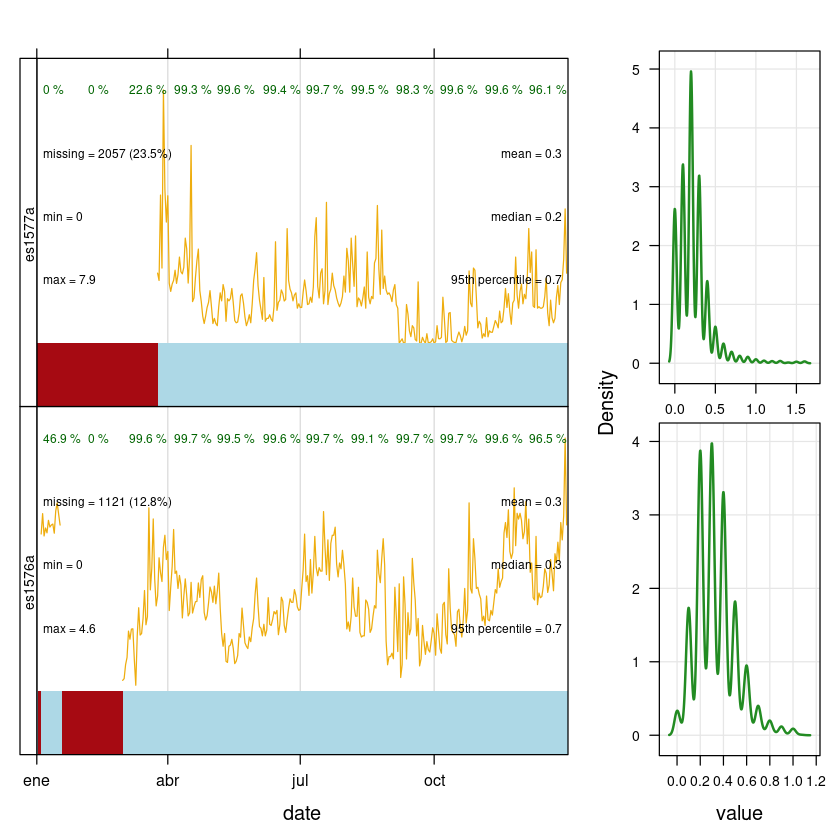

In [22]:
summaryPlot(guarcros_clean,period = "months", site="guar",type = "density")

In [23]:
summaryPlot(guarcrostodo_clean,period = "months",site="guar",type = "density")

      date1       date2   date_end1   date_end2        site          co 
  "POSIXct"    "POSIXt"   "POSIXct"    "POSIXt" "character"   "numeric" 
         no         no2         nox          o3        pm10         so2 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 


ERROR: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 34670 rows:
* 94348, 103129
* 94349, 103130
* 94350, 103131
* 94351, 103132
* 94352, 103133
* 94353, 103134
* 94354, 103135
* 94355, 103136
* 94356, 103137
* 94357, 103138
* 94358, 103139
* 94359, 103140
* 94360, 103141
* 94361, 103142
* 94362, 103143
* 94363, 103144
* 94364, 103145
* 94365, 103146
* 94366, 103147
* 94367, 103148
* 94368, 103149
* 94369, 103150
* 94370, 103151
* 94371, 103152
* 94372, 103153
* 94373, 103154
* 94374, 103155
* 94375, 103156
* 94376, 103157
* 94377, 103158
* 94378, 103159
* 94379, 103160
* 94380, 103161
* 94381, 103162
* 94382, 103163
* 94383, 103164
* 94384, 103165
* 94385, 103166
* 94386, 103167
* 94387, 103168
* 94388, 103169
* 94389, 103170
* 94390, 103171
* 94391, 103172
* 94392, 103173
* 94393, 103174
* 94394, 103175
* 94395, 103176
* 94396, 103177
* 94397, 103178
* 94398, 103179
* 94399, 103180
* 94400, 103181
* 94401, 103182
* 94402, 103183
* 94403, 103184
* 94404, 103185
* 94405, 103186
* 94406, 103187
* 94407, 103188
* 94408, 103189
* 94409, 103190
* 94410, 103191
* 94411, 103192
* 94412, 103193
* 94413, 103194
* 94414, 103195
* 94415, 103196
* 94416, 103197
* 94417, 103198
* 94418, 103199
* 94419, 103200
* 94420, 103201
* 94421, 103202
* 94422, 103203
* 94423, 103204
* 94424, 103205
* 94425, 103206
* 94426, 103207
* 94427, 103208
* 94428, 103209
* 94429, 103210
* 94430, 103211
* 94431, 103212
* 94432, 103213
* 94433, 103214
* 94434, 103215
* 94435, 103216
* 94436, 103217
* 94437, 103218
* 94438, 103219
* 94439, 103220
* 94440, 103221
* 94441, 103222
* 94442, 103223
* 94443, 103224
* 94444, 103225
* 94445, 103226
* 94446, 103227
* 94447, 103228
* 94448, 103229
* 94449, 103230
* 94450, 103231
* 94451, 103232
* 94452, 103233
* 94453, 103234
* 94454, 103235
* 94455, 103236
* 94456, 103237
* 94457, 103238
* 94458, 103239
* 94459, 103240
* 94460, 103241
* 94461, 103242
* 94462, 103243
* 94463, 103244
* 94464, 103245
* 94465, 103246
* 94466, 103247
* 94467, 103248
* 94468, 103249
* 94469, 103250
* 94470, 103251
* 94471, 103252
* 94472, 103253
* 94473, 103254
* 94474, 103255
* 94475, 103256
* 94476, 103257
* 94477, 103258
* 94478, 103259
* 94479, 103260
* 94480, 103261
* 94481, 103262
* 94482, 103263
* 94483, 103264
* 94484, 103265
* 94485, 103266
* 94486, 103267
* 94487, 103268
* 94488, 103269
* 94489, 103270
* 94490, 103271
* 94491, 103272
* 94492, 103273
* 94493, 103274
* 94494, 103275
* 94495, 103276
* 94496, 103277
* 94497, 103278
* 94498, 103279
* 94499, 103280
* 94500, 103281
* 94501, 103282
* 94502, 103283
* 94503, 103284
* 94504, 103285
* 94505, 103286
* 94506, 103287
* 94507, 103288
* 94508, 103289
* 94509, 103290
* 94510, 103291
* 94511, 103292
* 94512, 103293
* 94513, 103294
* 94514, 103295
* 94515, 103296
* 94516, 103297
* 94517, 103298
* 94518, 103299
* 94519, 103300
* 94520, 103301
* 94521, 103302
* 94522, 103303
* 94523, 103304
* 94524, 103305
* 94525, 103306
* 94526, 103307
* 94527, 103308
* 94528, 103309
* 94529, 103310
* 94530, 103311
* 94531, 103312
* 94532, 103313
* 94533, 103314
* 94534, 103315
* 94535, 103316
* 94536, 103317
* 94537, 103318
* 94538, 103319
* 94539, 103320
* 94540, 103321
* 94541, 103322
* 94542, 103323
* 94543, 103324
* 94544, 103325
* 94545, 103326
* 94546, 103327
* 94547, 103328
* 94548, 103329
* 94549, 103330
* 94550, 103331
* 94551, 103332
* 94552, 103333
* 94553, 103334
* 94554, 103335
* 94555, 103336
* 94556, 103337
* 94557, 103338
* 94558, 103339
* 94559, 103340
* 94560, 103341
* 94561, 103342
* 94562, 103343
* 94563, 103344
* 94564, 103345
* 94565, 103346
* 94566, 103347
* 94567, 103348
* 94568, 103349
* 94569, 103350
* 94570, 103351
* 94571, 103352
* 94572, 103353
* 94573, 103354
* 94574, 103355
* 94575, 103356
* 94576, 103357
* 94577, 103358
* 94578, 103359
* 94579, 103360
* 94580, 103361
* 94581, 103362
* 94582, 103363
* 94583, 103364
* 94584, 103365
* 94585, 103366
* 94586, 103367
* 94587, 103368
* 94588, 103369
* 94589, 103370
* 94590, 103371
* 94591, 103372
* 94592, 103373
* 94593, 103374
* 94594, 103375
* 94595, 103376
* 94596, 103377
* 94597, 103378
* 94598, 103379
* 94599, 103380
* 94600, 103381
* 94601, 103382
* 94602, 103383
* 94603, 103384
* 94604, 103385
* 94605, 103386
* 94606, 103387
* 94607, 103388
* 94608, 103389
* 94609, 103390
* 94610, 103391
* 94611, 103392
* 94612, 103393
* 94613, 103394
* 94614, 103395
* 94615, 103396
* 94616, 103397
* 94617, 103398
* 94618, 103399
* 94619, 103400
* 94620, 103401
* 94621, 103402
* 102996, 103403
* 94622, 103404
* 94623, 103405
* 94624, 103406
* 94625, 103407
* 94626, 103408
* 94627, 103409
* 94628, 103410
* 94629, 103411
* 94630, 103412
* 94631, 103413
* 94632, 103414
* 94633, 103415
* 94634, 103416
* 94635, 103417
* 94636, 103418
* 94637, 103419
* 94638, 103420
* 94639, 103421
* 94640, 103422
* 94641, 103423
* 94642, 103424
* 94643, 103425
* 94644, 103426
* 94645, 103427
* 94646, 103428
* 94647, 103429
* 94648, 103430
* 94649, 103431
* 94650, 103432
* 94651, 103433
* 94652, 103434
* 94653, 103435
* 94654, 103436
* 94655, 103437
* 94656, 103438
* 94657, 103439
* 94658, 103440
* 94659, 103441
* 94660, 103442
* 94661, 103443
* 94662, 103444
* 94663, 103445
* 94664, 103446
* 94665, 103447
* 94666, 103448
* 94667, 103449
* 94668, 103450
* 94669, 103451
* 94670, 103452
* 94671, 103453
* 94672, 103454
* 94673, 103455
* 94674, 103456
* 94675, 103457
* 94676, 103458
* 94677, 103459
* 94678, 103460
* 94679, 103461
* 94680, 103462
* 94681, 103463
* 94682, 103464
* 94683, 103465
* 94684, 103466
* 94685, 103467
* 94686, 103468
* 94687, 103469
* 94688, 103470
* 94689, 103471
* 94690, 103472
* 94691, 103473
* 94692, 103474
* 94693, 103475
* 94694, 103476
* 94695, 103477
* 94696, 103478
* 94697, 103479
* 94698, 103480
* 94699, 103481
* 94700, 103482
* 94701, 103483
* 94702, 103484
* 94703, 103485
* 94704, 103486
* 94705, 103487
* 94706, 103488
* 94707, 103489
* 94708, 103490
* 94709, 103491
* 94710, 103492
* 94711, 103493
* 94712, 103494
* 94713, 103495
* 94714, 103496
* 94715, 103497
* 94716, 103498
* 94717, 103499
* 94718, 103500
* 94719, 103501
* 94720, 103502
* 94721, 103503
* 94722, 103504
* 94723, 103505
* 94724, 103506
* 94725, 103507
* 94726, 103508
* 94727, 103509
* 94728, 103510
* 94729, 103511
* 94730, 103512
* 94731, 103513
* 94732, 103514
* 94733, 103515
* 94734, 103516
* 94735, 103517
* 94736, 103518
* 94737, 103519
* 94738, 103520
* 94739, 103521
* 94740, 103522
* 94741, 103523
* 94742, 103524
* 94743, 103525
* 94744, 103526
* 94745, 103527
* 94746, 103528
* 94747, 103529
* 94748, 103530
* 94749, 103531
* 94750, 103532
* 94751, 103533
* 94752, 103534
* 94753, 103535
* 94754, 103536
* 94755, 103537
* 94756, 103538
* 94757, 103539
* 94758, 103540
* 94759, 103541
* 94760, 103542
* 94761, 103543
* 94762, 103544
* 94763, 103545
* 94764, 103546
* 94765, 103547
* 94766, 103548
* 94767, 103549
* 94768, 103550
* 94769, 103551
* 94770, 103552
* 94771, 103553
* 94772, 103554
* 94773, 103555
* 94774, 103556
* 94775, 103557
* 94776, 103558
* 94777, 103559
* 94778, 103560
* 94779, 103561
* 94780, 103562
* 94781, 103563
* 94782, 103564
* 94783, 103565
* 94784, 103566
* 94785, 103567
* 94786, 103568
* 94787, 103569
* 94788, 103570
* 94789, 103571
* 94790, 103572
* 94791, 103573
* 94792, 103574
* 94793, 103575
* 94794, 103576
* 94795, 103577
* 94796, 103578
* 94797, 103579
* 94798, 103580
* 94799, 103581
* 94800, 103582
* 94801, 103583
* 94802, 103584
* 94803, 103585
* 94804, 103586
* 94805, 103587
* 94806, 103588
* 94807, 103589
* 94808, 103590
* 94809, 103591
* 94810, 103592
* 94811, 103593
* 94812, 103594
* 94813, 103595
* 94814, 103596
* 94815, 103597
* 94816, 103598
* 94817, 103599
* 94818, 103600
* 94819, 103601
* 94820, 103602
* 94821, 103603
* 94822, 103604
* 94823, 103605
* 94824, 103606
* 94825, 103607
* 94826, 103608
* 94827, 103609
* 94828, 103610
* 94829, 103611
* 94830, 103612
* 94831, 103613
* 94832, 103614
* 94833, 103615
* 94834, 103616
* 94835, 103617
* 94836, 103618
* 94837, 103619
* 94838, 103620
* 94839, 103621
* 94840, 103622
* 94841, 103623
* 94842, 103624
* 94843, 103625
* 94844, 103626
* 94845, 103627
* 94846, 103628
* 94847, 103629
* 94848, 103630
* 94849, 103631
* 94850, 103632
* 94851, 103633
* 94852, 103634
* 94853, 103635
* 94854, 103636
* 94855, 103637
* 94856, 103638
* 94857, 103639
* 94858, 103640
* 94859, 103641
* 94860, 103642
* 94861, 103643
* 94862, 103644
* 94863, 103645
* 94864, 103646
* 94865, 103647
* 94866, 103648
* 94867, 103649
* 94868, 103650
* 94869, 103651
* 94870, 103652
* 94871, 103653
* 94872, 103654
* 94873, 103655
* 94874, 103656
* 94875, 103657
* 94876, 103658
* 94877, 103659
* 94878, 103660
* 94879, 103661
* 94880, 103662
* 94881, 103663
* 94882, 103664
* 94883, 103665
* 94884, 103666
* 94885, 103667
* 94886, 103668
* 94887, 103669
* 94888, 103670
* 94889, 103671
* 94890, 103672
* 94891, 103673
* 94892, 103674
* 94893, 103675
* 94894, 103676
* 94895, 103677
* 94896, 103678
* 94897, 103679
* 94898, 103680
* 94899, 103681
* 94900, 103682
* 94901, 103683
* 94902, 103684
* 94903, 103685
* 94904, 103686
* 94905, 103687
* 94906, 103688
* 94907, 103689
* 94908, 103690
* 94909, 103691
* 94910, 103692
* 94911, 103693
* 94912, 103694
* 94913, 103695
* 94914, 103696
* 94915, 103697
* 94916, 103698
* 94917, 103699
* 94918, 103700
* 94919, 103701
* 94920, 103702
* 94921, 103703
* 94922, 103704
* 94923, 103705
* 94924, 103706
* 94925, 103707
* 94926, 103708
* 94927, 103709
* 94928, 103710
* 94929, 103711
* 94930, 103712
* 94931, 103713
* 94932, 103714
* 94933, 103715
* 94934, 103716
* 94935, 103717
* 94936, 103718
* 94937, 103719
* 94938, 103720
* 94939, 103721
* 94940, 103722
* 94941, 103723
* 94942, 103724
* 94943, 103725
* 94944, 103726
* 94945, 103727
* 94946, 103728
* 94947, 103729
* 94948, 103730
* 94949, 103731
* 94950, 103732
* 94951, 103733
* 94952, 103734
* 94953, 103735
* 94954, 103736
* 94955, 103737
* 94956, 103738
* 94957, 103739
* 94958, 103740
* 94959, 103741
* 94960, 103742
* 94961, 103743
* 94962, 103744
* 94963, 103745
* 94964, 103746
* 94965, 103747
* 94966, 103748
* 94967, 103749
* 94968, 103750
* 94969, 103751
* 94970, 103752
* 94971, 103753
* 94972, 103754
* 94973, 103755
* 94974, 103756
* 94975, 103757
* 94976, 103758
* 94977, 103759
* 94978, 103760
* 94979, 103761
* 94980, 103762
* 102999, 103763
* 94982, 103764
* 94983, 103765
* 94984, 103766
* 94985, 103767
* 94986, 103768
* 94987, 103769
* 94988, 103770
* 94989, 103771
* 94990, 103772
* 94991, 103773
* 94992, 103774
* 94993, 103775
* 94994, 103776
* 94995, 103777
* 94996, 103778
* 94997, 103779
* 94998, 103780
* 94999, 103781
* 95000, 103782
* 95001, 103783
* 95002, 103784
* 95003, 103785
* 95004, 103786
* 95005, 103787
* 95006, 103788
* 95007, 103789
* 95008, 103790
* 95009, 103791
* 95010, 103792
* 95011, 103793
* 95012, 103794
* 95013, 103795
* 95014, 103796
* 95015, 103797
* 95016, 103798
* 95017, 103799
* 95018, 103800
* 95019, 103801
* 95020, 103802
* 95021, 103803
* 95022, 103804
* 95023, 103805
* 95024, 103806
* 95025, 103807
* 95026, 103808
* 95027, 103809
* 95028, 103810
* 95029, 103811
* 95030, 103812
* 95031, 103813
* 95032, 103814
* 95033, 103815
* 95034, 103816
* 95035, 103817
* 95036, 103818
* 95037, 103819
* 95038, 103820
* 95039, 103821
* 95040, 103822
* 95041, 103823
* 95042, 103824
* 95043, 103825
* 95044, 103826
* 95045, 103827
* 95046, 103828
* 95047, 103829
* 95048, 103830
* 95049, 103831
* 95050, 103832
* 95051, 103833
* 95052, 103834
* 95053, 103835
* 95054, 103836
* 95055, 103837
* 95056, 103838
* 95057, 103839
* 95058, 103840
* 95059, 103841
* 95060, 103842
* 95061, 103843
* 95062, 103844
* 95063, 103845
* 95064, 103846
* 95065, 103847
* 95066, 103848
* 95067, 103849
* 95068, 103850
* 95069, 103851
* 95070, 103852
* 95071, 103853
* 95072, 103854
* 95073, 103855
* 95074, 103856
* 95075, 103857
* 95076, 103858
* 95077, 103859
* 95078, 103860
* 95079, 103861
* 95080, 103862
* 95081, 103863
* 95082, 103864
* 95083, 103865
* 95084, 103866
* 95085, 103867
* 95086, 103868
* 95087, 103869
* 95088, 103870
* 95089, 103871
* 95090, 103872
* 95091, 103873
* 95092, 103874
* 95093, 103875
* 95094, 103876
* 95095, 103877
* 95096, 103878
* 95097, 103879
* 95098, 103880
* 95099, 103881
* 95100, 103882
* 95101, 103883
* 95102, 103884
* 95103, 103885
* 95104, 103886
* 95105, 103887
* 95106, 103888
* 95107, 103889
* 95108, 103890
* 95109, 103891
* 95110, 103892
* 95111, 103893
* 95112, 103894
* 95113, 103895
* 95114, 103896
* 95115, 103897
* 95116, 103898
* 95117, 103899
* 95118, 103900
* 95119, 103901
* 95120, 103902
* 95121, 103903
* 95122, 103904
* 95123, 103905
* 95124, 103906
* 95125, 103907
* 95126, 103908
* 95127, 103909
* 95128, 103910
* 95129, 103911
* 95130, 103912
* 95131, 103913
* 95132, 103914
* 95133, 103915
* 95134, 103916
* 95135, 103917
* 95136, 103918
* 95137, 103919
* 95138, 103920
* 95139, 103921
* 95140, 103922
* 95141, 103923
* 95142, 103924
* 95143, 103925
* 95144, 103926
* 95145, 103927
* 95146, 103928
* 95147, 103929
* 95148, 103930
* 95149, 103931
* 95150, 103932
* 95151, 103933
* 95152, 103934
* 95153, 103935
* 95154, 103936
* 95155, 103937
* 95156, 103938
* 95157, 103939
* 95158, 103940
* 95159, 103941
* 95160, 103942
* 95161, 103943
* 95162, 103944
* 95163, 103945
* 95164, 103946
* 95165, 103947
* 95166, 103948
* 95167, 103949
* 95168, 103950
* 95169, 103951
* 95170, 103952
* 95171, 103953
* 95172, 103954
* 95173, 103955
* 95174, 103956
* 95175, 103957
* 95176, 103958
* 95177, 103959
* 95178, 103960
* 95179, 103961
* 95180, 103962
* 95181, 103963
* 95182, 103964
* 95183, 103965
* 95184, 103966
* 95185, 103967
* 95186, 103968
* 95187, 103969
* 95188, 103970
* 95189, 103971
* 95190, 103972
* 95191, 103973
* 95192, 103974
* 95193, 103975
* 95194, 103976
* 95195, 103977
* 95196, 103978
* 95197, 103979
* 95198, 103980
* 95199, 103981
* 95200, 103982
* 95201, 103983
* 95202, 103984
* 95203, 103985
* 95204, 103986
* 95205, 103987
* 95206, 103988
* 95207, 103989
* 95208, 103990
* 95209, 103991
* 95210, 103992
* 95211, 103993
* 95212, 103994
* 95213, 103995
* 95214, 103996
* 95215, 103997
* 95216, 103998
* 95217, 103999
* 95218, 104000
* 95219, 104001
* 95220, 104002
* 95221, 104003
* 95222, 104004
* 95223, 104005
* 95224, 104006
* 95225, 104007
* 95226, 104008
* 95227, 104009
* 95228, 104010
* 95229, 104011
* 95230, 104012
* 95231, 104013
* 95232, 104014
* 95233, 104015
* 95234, 104016
* 95235, 104017
* 95236, 104018
* 95237, 104019
* 95238, 104020
* 95239, 104021
* 95240, 104022
* 95241, 104023
* 95242, 104024
* 95243, 104025
* 95244, 104026
* 95245, 104027
* 95246, 104028
* 95247, 104029
* 95248, 104030
* 95249, 104031
* 95250, 104032
* 95251, 104033
* 95252, 104034
* 95253, 104035
* 95254, 104036
* 95255, 104037
* 95256, 104038
* 95257, 104039
* 95258, 104040
* 95259, 104041
* 95260, 104042
* 95261, 104043
* 95262, 104044
* 95263, 104045
* 95264, 104046
* 95265, 104047
* 95266, 104048
* 95267, 104049
* 95268, 104050
* 95269, 104051
* 95270, 104052
* 95271, 104053
* 95272, 104054
* 95273, 104055
* 95274, 104056
* 95275, 104057
* 95276, 104058
* 95277, 104059
* 95278, 104060
* 95279, 104061
* 95280, 104062
* 95281, 104063
* 95282, 104064
* 95283, 104065
* 95284, 104066
* 95285, 104067
* 95286, 104068
* 95287, 104069
* 95288, 104070
* 95289, 104071
* 95290, 104072
* 95291, 104073
* 95292, 104074
* 95293, 104075
* 95294, 104076
* 95295, 104077
* 95296, 104078
* 95297, 104079
* 95298, 104080
* 95299, 104081
* 95300, 104082
* 95301, 104083
* 95302, 104084
* 95303, 104085
* 95304, 104086
* 95305, 104087
* 95306, 104088
* 95307, 104089
* 95308, 104090
* 95309, 104091
* 95310, 104092
* 95311, 104093
* 95312, 104094
* 95313, 104095
* 95314, 104096
* 95315, 104097
* 95316, 104098
* 95317, 104099
* 95318, 104100
* 95319, 104101
* 95320, 104102
* 95321, 104103
* 95322, 104104
* 95323, 104105
* 95324, 104106
* 95325, 104107
* 95326, 104108
* 95327, 104109
* 95328, 104110
* 95329, 104111
* 95330, 104112
* 95331, 104113
* 95332, 104114
* 95333, 104115
* 95334, 104116
* 95335, 104117
* 95336, 104118
* 95337, 104119
* 95338, 104120
* 95339, 104121
* 95340, 104122
* 95341, 104123
* 95342, 104124
* 95343, 104125
* 95344, 104126
* 95345, 104127
* 95346, 104128
* 95347, 104129
* 95348, 104130
* 95349, 104131
* 95350, 104132
* 95351, 104133
* 95352, 104134
* 95353, 104135
* 95354, 104136
* 95355, 104137
* 95356, 104138
* 95357, 104139
* 95358, 104140
* 95359, 104141
* 95360, 104142
* 95361, 104143
* 95362, 104144
* 95363, 104145
* 95364, 104146
* 95365, 104147
* 95366, 104148
* 95367, 104149
* 95368, 104150
* 95369, 104151
* 95370, 104152
* 95371, 104153
* 95372, 104154
* 95373, 104155
* 95374, 104156
* 95375, 104157
* 95376, 104158
* 95377, 104159
* 95378, 104160
* 95379, 104161
* 95380, 104162
* 95381, 104163
* 95382, 104164
* 95383, 104165
* 95384, 104166
* 95385, 104167
* 95386, 104168
* 95387, 104169
* 95388, 104170
* 95389, 104171
* 95390, 104172
* 95391, 104173
* 95392, 104174
* 95393, 104175
* 95394, 104176
* 95395, 104177
* 95396, 104178
* 95397, 104179
* 95398, 104180
* 95399, 104181
* 95400, 104182
* 95401, 104183
* 95402, 104184
* 95403, 104185
* 95404, 104186
* 95405, 104187
* 95406, 104188
* 95407, 104189
* 95408, 104190
* 95409, 104191
* 95410, 104192
* 95411, 104193
* 95412, 104194
* 95413, 104195
* 95414, 104196
* 95415, 104197
* 95416, 104198
* 95417, 104199
* 95418, 104200
* 95419, 104201
* 95420, 104202
* 95421, 104203
* 95422, 104204
* 95423, 104205
* 95424, 104206
* 95425, 104207
* 95426, 104208
* 95427, 104209
* 95428, 104210
* 95429, 104211
* 95430, 104212
* 95431, 104213
* 95432, 104214
* 95433, 104215
* 95434, 104216
* 95435, 104217
* 95436, 104218
* 95437, 104219
* 95438, 104220
* 95439, 104221
* 95440, 104222
* 95441, 104223
* 95442, 104224
* 95443, 104225
* 95444, 104226
* 95445, 104227
* 95446, 104228
* 95447, 104229
* 95448, 104230
* 95449, 104231
* 95450, 104232
* 95451, 104233
* 95452, 104234
* 95453, 104235
* 95454, 104236
* 95455, 104237
* 95456, 104238
* 95457, 104239
* 95458, 104240
* 95459, 104241
* 95460, 104242
* 95461, 104243
* 95462, 104244
* 95463, 104245
* 95464, 104246
* 95465, 104247
* 95466, 104248
* 95467, 104249
* 95468, 104250
* 95469, 104251
* 95470, 104252
* 95471, 104253
* 95472, 104254
* 95473, 104255
* 95474, 104256
* 95475, 104257
* 95476, 104258
* 95477, 104259
* 95478, 104260
* 95479, 104261
* 95480, 104262
* 95481, 104263
* 95482, 104264
* 95483, 104265
* 95484, 104266
* 95485, 104267
* 95486, 104268
* 95487, 104269
* 95488, 104270
* 95489, 104271
* 95490, 104272
* 95491, 104273
* 95492, 104274
* 95493, 104275
* 95494, 104276
* 95495, 104277
* 95496, 104278
* 95497, 104279
* 95498, 104280
* 95499, 104281
* 95500, 104282
* 95501, 104283
* 95502, 104284
* 95503, 104285
* 95504, 104286
* 95505, 104287
* 95506, 104288
* 95507, 104289
* 95508, 104290
* 95509, 104291
* 95510, 104292
* 95511, 104293
* 95512, 104294
* 95513, 104295
* 95514, 104296
* 95515, 104297
* 95516, 104298
* 95517, 104299
* 95518, 104300
* 95519, 104301
* 95520, 104302
* 95521, 104303
* 95522, 104304
* 95523, 104305
* 95524, 104306
* 95525, 104307
* 95526, 104308
* 95527, 104309
* 95528, 104310
* 95529, 104311
* 95530, 104312
* 95531, 104313
* 95532, 104314
* 95533, 104315
* 95534, 104316
* 95535, 104317
* 95536, 104318
* 95537, 104319
* 95538, 104320
* 95539, 104321
* 95540, 104322
* 95541, 104323
* 95542, 104324
* 95543, 104325
* 95544, 104326
* 95545, 104327
* 95546, 104328
* 95547, 104329
* 95548, 104330
* 95549, 104331
* 95550, 104332
* 95551, 104333
* 95552, 104334
* 95553, 104335
* 95554, 104336
* 95555, 104337
* 95556, 104338
* 95557, 104339
* 95558, 104340
* 95559, 104341
* 95560, 104342
* 95561, 104343
* 95562, 104344
* 95563, 104345
* 95564, 104346
* 95565, 104347
* 95566, 104348
* 95567, 104349
* 95568, 104350
* 95569, 104351
* 95570, 104352
* 95571, 104353
* 95572, 104354
* 95573, 104355
* 95574, 104356
* 95575, 104357
* 95576, 104358
* 95577, 104359
* 95578, 104360
* 95579, 104361
* 95580, 104362
* 95581, 104363
* 95582, 104364
* 95583, 104365
* 95584, 104366
* 95585, 104367
* 95586, 104368
* 95587, 104369
* 95588, 104370
* 95589, 104371
* 95590, 104372
* 95591, 104373
* 95592, 104374
* 95593, 104375
* 95594, 104376
* 95595, 104377
* 95596, 104378
* 95597, 104379
* 95598, 104380
* 95599, 104381
* 95600, 104382
* 95601, 104383
* 95602, 104384
* 95603, 104385
* 95604, 104386
* 95605, 104387
* 95606, 104388
* 95607, 104389
* 95608, 104390
* 95609, 104391
* 95610, 104392
* 95611, 104393
* 95612, 104394
* 95613, 104395
* 95614, 104396
* 95615, 104397
* 95616, 104398
* 95617, 104399
* 95618, 104400
* 95619, 104401
* 95620, 104402
* 95621, 104403
* 95622, 104404
* 95623, 104405
* 95624, 104406
* 95625, 104407
* 95626, 104408
* 95627, 104409
* 95628, 104410
* 95629, 104411
* 95630, 104412
* 95631, 104413
* 95632, 104414
* 95633, 104415
* 95634, 104416
* 95635, 104417
* 95636, 104418
* 95637, 104419
* 95638, 104420
* 95639, 104421
* 95640, 104422
* 95641, 104423
* 95642, 104424
* 95643, 104425
* 95644, 104426
* 95645, 104427
* 95646, 104428
* 95647, 104429
* 95648, 104430
* 95649, 104431
* 95650, 104432
* 95651, 104433
* 95652, 104434
* 95653, 104435
* 95654, 104436
* 95655, 104437
* 95656, 104438
* 95657, 104439
* 95658, 104440
* 95659, 104441
* 95660, 104442
* 95661, 104443
* 95662, 104444
* 95663, 104445
* 95664, 104446
* 95665, 104447
* 95666, 104448
* 95667, 104449
* 95668, 104450
* 95669, 104451
* 95670, 104452
* 95671, 104453
* 95672, 104454
* 95673, 104455
* 95674, 104456
* 95675, 104457
* 95676, 104458
* 95677, 104459
* 95678, 104460
* 95679, 104461
* 95680, 104462
* 95681, 104463
* 95682, 104464
* 95683, 104465
* 95684, 104466
* 95685, 104467
* 95686, 104468
* 95687, 104469
* 95688, 104470
* 95689, 104471
* 95690, 104472
* 95691, 104473
* 95692, 104474
* 95693, 104475
* 95694, 104476
* 95695, 104477
* 95696, 104478
* 95697, 104479
* 95698, 104480
* 95699, 104481
* 95700, 104482
* 95701, 104483
* 95702, 104484
* 95703, 104485
* 95704, 104486
* 95705, 104487
* 95706, 104488
* 95707, 104489
* 95708, 104490
* 95709, 104491
* 95710, 104492
* 95711, 104493
* 95712, 104494
* 95713, 104495
* 95714, 104496
* 95715, 104497
* 95716, 104498
* 95717, 104499
* 95718, 104500
* 95719, 104501
* 95720, 104502
* 95721, 104503
* 95722, 104504
* 95723, 104505
* 95724, 104506
* 95725, 104507
* 95726, 104508
* 95727, 104509
* 95728, 104510
* 95729, 104511
* 95730, 104512
* 95731, 104513
* 95732, 104514
* 95733, 104515
* 95734, 104516
* 95735, 104517
* 95736, 104518
* 95737, 104519
* 95738, 104520
* 95739, 104521
* 95740, 104522
* 95741, 104523
* 95742, 104524
* 95743, 104525
* 95744, 104526
* 95745, 104527
* 95746, 104528
* 95747, 104529
* 95748, 104530
* 95749, 104531
* 95750, 104532
* 95751, 104533
* 95752, 104534
* 95753, 104535
* 95754, 104536
* 95755, 104537
* 95756, 104538
* 95757, 104539
* 95758, 104540
* 95759, 104541
* 95760, 104542
* 95761, 104543
* 95762, 104544
* 95763, 104545
* 95764, 104546
* 95765, 104547
* 95766, 104548
* 95767, 104549
* 95768, 104550
* 95769, 104551
* 95770, 104552
* 95771, 104553
* 95772, 104554
* 95773, 104555
* 95774, 104556
* 95775, 104557
* 95776, 104558
* 95777, 104559
* 95778, 104560
* 95779, 104561
* 95780, 104562
* 95781, 104563
* 95782, 104564
* 95783, 104565
* 95784, 104566
* 95785, 104567
* 95786, 104568
* 95787, 104569
* 95788, 104570
* 95789, 104571
* 95790, 104572
* 95791, 104573
* 95792, 104574
* 95793, 104575
* 95794, 104576
* 95795, 104577
* 95796, 104578
* 95797, 104579
* 95798, 104580
* 95799, 104581
* 95800, 104582
* 95801, 104583
* 95802, 104584
* 95803, 104585
* 95804, 104586
* 95805, 104587
* 95806, 104588
* 95807, 104589
* 95808, 104590
* 95809, 104591
* 95810, 104592
* 95811, 104593
* 95812, 104594
* 95813, 104595
* 95814, 104596
* 95815, 104597
* 95816, 104598
* 95817, 104599
* 95818, 104600
* 95819, 104601
* 95820, 104602
* 95821, 104603
* 95822, 104604
* 95823, 104605
* 95824, 104606
* 95825, 104607
* 95826, 104608
* 95827, 104609
* 95828, 104610
* 95829, 104611
* 95830, 104612
* 95831, 104613
* 95832, 104614
* 95833, 104615
* 95834, 104616
* 95835, 104617
* 95836, 104618
* 95837, 104619
* 95838, 104620
* 95839, 104621
* 95840, 104622
* 95841, 104623
* 95842, 104624
* 95843, 104625
* 95844, 104626
* 95845, 104627
* 95846, 104628
* 95847, 104629
* 95848, 104630
* 95849, 104631
* 95850, 104632
* 95851, 104633
* 95852, 104634
* 95853, 104635
* 95854, 104636
* 95855, 104637
* 95856, 104638
* 95857, 104639
* 95858, 104640
* 95859, 104641
* 95860, 104642
* 95861, 104643
* 95862, 104644
* 95863, 104645
* 95864, 104646
* 95865, 104647
* 95866, 104648
* 95867, 104649
* 95868, 104650
* 95869, 104651
* 95870, 104652
* 95871, 104653
* 95872, 104654
* 95873, 104655
* 95874, 104656
* 95875, 104657
* 95876, 104658
* 95877, 104659
* 95878, 104660
* 95879, 104661
* 95880, 104662
* 95881, 104663
* 95882, 104664
* 95883, 104665
* 95884, 104666
* 95885, 104667
* 95886, 104668
* 95887, 104669
* 95888, 104670
* 95889, 104671
* 95890, 104672
* 95891, 104673
* 95892, 104674
* 95893, 104675
* 95894, 104676
* 95895, 104677
* 95896, 104678
* 95897, 104679
* 95898, 104680
* 95899, 104681
* 95900, 104682
* 95901, 104683
* 95902, 104684
* 95903, 104685
* 95904, 104686
* 95905, 104687
* 95906, 104688
* 95907, 104689
* 95908, 104690
* 95909, 104691
* 95910, 104692
* 95911, 104693
* 95912, 104694
* 95913, 104695
* 95914, 104696
* 95915, 104697
* 95916, 104698
* 95917, 104699
* 95918, 104700
* 95919, 104701
* 95920, 104702
* 95921, 104703
* 95922, 104704
* 95923, 104705
* 95924, 104706
* 95925, 104707
* 95926, 104708
* 95927, 104709
* 95928, 104710
* 95929, 104711
* 95930, 104712
* 95931, 104713
* 95932, 104714
* 95933, 104715
* 95934, 104716
* 95935, 104717
* 95936, 104718
* 95937, 104719
* 95938, 104720
* 95939, 104721
* 95940, 104722
* 95941, 104723
* 95942, 104724
* 95943, 104725
* 95944, 104726
* 95945, 104727
* 95946, 104728
* 95947, 104729
* 95948, 104730
* 95949, 104731
* 95950, 104732
* 95951, 104733
* 95952, 104734
* 95953, 104735
* 95954, 104736
* 95955, 104737
* 95956, 104738
* 95957, 104739
* 95958, 104740
* 95959, 104741
* 95960, 104742
* 95961, 104743
* 95962, 104744
* 95963, 104745
* 95964, 104746
* 95965, 104747
* 95966, 104748
* 95967, 104749
* 95968, 104750
* 95969, 104751
* 95970, 104752
* 95971, 104753
* 95972, 104754
* 95973, 104755
* 95974, 104756
* 95975, 104757
* 95976, 104758
* 95977, 104759
* 95978, 104760
* 95979, 104761
* 95980, 104762
* 95981, 104763
* 95982, 104764
* 95983, 104765
* 95984, 104766
* 95985, 104767
* 103004, 104768
* 95986, 104769
* 95987, 104770
* 95988, 104771
* 95989, 104772
* 95990, 104773
* 95991, 104774
* 95992, 104775
* 95993, 104776
* 95994, 104777
* 95995, 104778
* 95996, 104779
* 95997, 104780
* 95998, 104781
* 95999, 104782
* 96000, 104783
* 96001, 104784
* 96002, 104785
* 96003, 104786
* 96004, 104787
* 96005, 104788
* 96006, 104789
* 96007, 104790
* 96008, 104791
* 96009, 104792
* 96010, 104793
* 96011, 104794
* 96012, 104795
* 96013, 104796
* 96014, 104797
* 96015, 104798
* 96016, 104799
* 96017, 104800
* 96018, 104801
* 96019, 104802
* 96020, 104803
* 96021, 104804
* 96022, 104805
* 96023, 104806
* 96024, 104807
* 96025, 104808
* 96026, 104809
* 96027, 104810
* 96028, 104811
* 96029, 104812
* 96030, 104813
* 96031, 104814
* 96032, 104815
* 96033, 104816
* 96034, 104817
* 96035, 104818
* 96036, 104819
* 96037, 104820
* 96038, 104821
* 96039, 104822
* 96040, 104823
* 96041, 104824
* 96042, 104825
* 96043, 104826
* 96044, 104827
* 96045, 104828
* 96046, 104829
* 96047, 104830
* 96048, 104831
* 96049, 104832
* 96050, 104833
* 96051, 104834
* 96052, 104835
* 96053, 104836
* 96054, 104837
* 96055, 104838
* 96056, 104839
* 96057, 104840
* 96058, 104841
* 96059, 104842
* 96060, 104843
* 96061, 104844
* 96062, 104845
* 96063, 104846
* 96064, 104847
* 96065, 104848
* 96066, 104849
* 96067, 104850
* 96068, 104851
* 96069, 104852
* 96070, 104853
* 96071, 104854
* 96072, 104855
* 96073, 104856
* 96074, 104857
* 96075, 104858
* 96076, 104859
* 96077, 104860
* 96078, 104861
* 96079, 104862
* 96080, 104863
* 96081, 104864
* 96082, 104865
* 96083, 104866
* 96084, 104867
* 96085, 104868
* 96086, 104869
* 96087, 104870
* 96088, 104871
* 96089, 104872
* 96090, 104873
* 96091, 104874
* 96092, 104875
* 96093, 104876
* 96094, 104877
* 96095, 104878
* 96096, 104879
* 96097, 104880
* 96098, 104881
* 96099, 104882
* 96100, 104883
* 96101, 104884
* 96102, 104885
* 96103, 104886
* 96104, 104887
* 96105, 104888
* 96106, 104889
* 96107, 104890
* 96108, 104891
* 96109, 104892
* 96110, 104893
* 96111, 104894
* 96112, 104895
* 96113, 104896
* 96114, 104897
* 96115, 104898
* 96116, 104899
* 96117, 104900
* 96118, 104901
* 96119, 104902
* 96120, 104903
* 96121, 104904
* 96122, 104905
* 96123, 104906
* 96124, 104907
* 96125, 104908
* 96126, 104909
* 96127, 104910
* 96128, 104911
* 96129, 104912
* 96130, 104913
* 96131, 104914
* 96132, 104915
* 96133, 104916
* 96134, 104917
* 96135, 104918
* 96136, 104919
* 96137, 104920
* 96138, 104921
* 96139, 104922
* 96140, 104923
* 96141, 104924
* 96142, 104925
* 96143, 104926
* 96144, 104927
* 96145, 104928
* 96146, 104929
* 96147, 104930
* 96148, 104931
* 96149, 104932
* 96150, 104933
* 96151, 104934
* 96152, 104935
* 96153, 104936
* 96154, 104937
* 96155, 104938
* 96156, 104939
* 96157, 104940
* 96158, 104941
* 96159, 104942
* 96160, 104943
* 96161, 104944
* 96162, 104945
* 96163, 104946
* 96164, 104947
* 96165, 104948
* 96166, 104949
* 96167, 104950
* 96168, 104951
* 96169, 104952
* 96170, 104953
* 96171, 104954
* 96172, 104955
* 96173, 104956
* 96174, 104957
* 96175, 104958
* 96176, 104959
* 96177, 104960
* 96178, 104961
* 96179, 104962
* 96180, 104963
* 96181, 104964
* 96182, 104965
* 96183, 104966
* 96184, 104967
* 96185, 104968
* 96186, 104969
* 96187, 104970
* 96188, 104971
* 96189, 104972
* 96190, 104973
* 96191, 104974
* 96192, 104975
* 96193, 104976
* 96194, 104977
* 96195, 104978
* 96196, 104979
* 96197, 104980
* 96198, 104981
* 96199, 104982
* 96200, 104983
* 96201, 104984
* 96202, 104985
* 96203, 104986
* 96204, 104987
* 96205, 104988
* 96206, 104989
* 96207, 104990
* 96208, 104991
* 96209, 104992
* 96210, 104993
* 96211, 104994
* 96212, 104995
* 96213, 104996
* 96214, 104997
* 96215, 104998
* 96216, 104999
* 96217, 105000
* 96218, 105001
* 96219, 105002
* 96220, 105003
* 96221, 105004
* 96222, 105005
* 96223, 105006
* 96224, 105007
* 96225, 105008
* 96226, 105009
* 96227, 105010
* 96228, 105011
* 96229, 105012
* 96230, 105013
* 96231, 105014
* 96232, 105015
* 96233, 105016
* 96234, 105017
* 96235, 105018
* 96236, 105019
* 96237, 105020
* 96238, 105021
* 96239, 105022
* 96240, 105023
* 96241, 105024
* 96242, 105025
* 96243, 105026
* 96244, 105027
* 96245, 105028
* 96246, 105029
* 96247, 105030
* 96248, 105031
* 96249, 105032
* 96250, 105033
* 96251, 105034
* 96252, 105035
* 96253, 105036
* 96254, 105037
* 96255, 105038
* 96256, 105039
* 96257, 105040
* 96258, 105041
* 96259, 105042
* 96260, 105043
* 96261, 105044
* 96262, 105045
* 96263, 105046
* 96264, 105047
* 96265, 105048
* 96266, 105049
* 96267, 105050
* 96268, 105051
* 96269, 105052
* 96270, 105053
* 96271, 105054
* 96272, 105055
* 96273, 105056
* 96274, 105057
* 96275, 105058
* 96276, 105059
* 96277, 105060
* 96278, 105061
* 96279, 105062
* 96280, 105063
* 96281, 105064
* 96282, 105065
* 96283, 105066
* 96284, 105067
* 96285, 105068
* 96286, 105069
* 96287, 105070
* 96288, 105071
* 96289, 105072
* 96290, 105073
* 96291, 105074
* 96292, 105075
* 96293, 105076
* 96294, 105077
* 96295, 105078
* 96296, 105079
* 96297, 105080
* 96298, 105081
* 96299, 105082
* 96300, 105083
* 96301, 105084
* 96302, 105085
* 96303, 105086
* 96304, 105087
* 96305, 105088
* 96306, 105089
* 96307, 105090
* 96308, 105091
* 96309, 105092
* 96310, 105093
* 96311, 105094
* 96312, 105095
* 96313, 105096
* 96314, 105097
* 96315, 105098
* 96316, 105099
* 96317, 105100
* 96318, 105101
* 96319, 105102
* 96320, 105103
* 96321, 105104
* 96322, 105105
* 96323, 105106
* 96324, 105107
* 96325, 105108
* 96326, 105109
* 96327, 105110
* 96328, 105111
* 96329, 105112
* 96330, 105113
* 96331, 105114
* 96332, 105115
* 96333, 105116
* 96334, 105117
* 96335, 105118
* 96336, 105119
* 96337, 105120
* 96338, 105121
* 96339, 105122
* 96340, 105123
* 96341, 105124
* 96342, 105125
* 96343, 105126
* 96344, 105127
* 96345, 105128
* 96346, 105129
* 96347, 105130
* 96348, 105131
* 96349, 105132
* 96350, 105133
* 96351, 105134
* 96352, 105135
* 96353, 105136
* 96354, 105137
* 96355, 105138
* 96356, 105139
* 96357, 105140
* 96358, 105141
* 96359, 105142
* 96360, 105143
* 96361, 105144
* 96362, 105145
* 96363, 105146
* 96364, 105147
* 96365, 105148
* 96366, 105149
* 96367, 105150
* 96368, 105151
* 96369, 105152
* 96370, 105153
* 96371, 105154
* 96372, 105155
* 96373, 105156
* 96374, 105157
* 96375, 105158
* 96376, 105159
* 96377, 105160
* 96378, 105161
* 96379, 105162
* 96380, 105163
* 96381, 105164
* 96382, 105165
* 96383, 105166
* 96384, 105167
* 96385, 105168
* 96386, 105169
* 96387, 105170
* 96388, 105171
* 96389, 105172
* 96390, 105173
* 96391, 105174
* 96392, 105175
* 96393, 105176
* 96394, 105177
* 96395, 105178
* 96396, 105179
* 96397, 105180
* 96398, 105181
* 96399, 105182
* 96400, 105183
* 96401, 105184
* 96402, 105185
* 96403, 105186
* 96404, 105187
* 96405, 105188
* 96406, 105189
* 96407, 105190
* 96408, 105191
* 96409, 105192
* 96410, 105193
* 96411, 105194
* 96412, 105195
* 96413, 105196
* 96414, 105197
* 96415, 105198
* 96416, 105199
* 96417, 105200
* 96418, 105201
* 96419, 105202
* 96420, 105203
* 96421, 105204
* 96422, 105205
* 96423, 105206
* 96424, 105207
* 96425, 105208
* 96426, 105209
* 96427, 105210
* 96428, 105211
* 96429, 105212
* 96430, 105213
* 96431, 105214
* 96432, 105215
* 96433, 105216
* 96434, 105217
* 96435, 105218
* 96436, 105219
* 96437, 105220
* 96438, 105221
* 96439, 105222
* 96440, 105223
* 96441, 105224
* 96442, 105225
* 96443, 105226
* 96444, 105227
* 96445, 105228
* 96446, 105229
* 96447, 105230
* 96448, 105231
* 96449, 105232
* 96450, 105233
* 96451, 105234
* 96452, 105235
* 96453, 105236
* 96454, 105237
* 96455, 105238
* 96456, 105239
* 96457, 105240
* 96458, 105241
* 96459, 105242
* 96460, 105243
* 96461, 105244
* 96462, 105245
* 96463, 105246
* 96464, 105247
* 96465, 105248
* 96466, 105249
* 96467, 105250
* 96468, 105251
* 96469, 105252
* 96470, 105253
* 96471, 105254
* 96472, 105255
* 96473, 105256
* 96474, 105257
* 96475, 105258
* 96476, 105259
* 96477, 105260
* 96478, 105261
* 96479, 105262
* 96480, 105263
* 96481, 105264
* 96482, 105265
* 96483, 105266
* 96484, 105267
* 96485, 105268
* 96486, 105269
* 96487, 105270
* 96488, 105271
* 96489, 105272
* 96490, 105273
* 96491, 105274
* 96492, 105275
* 96493, 105276
* 96494, 105277
* 96495, 105278
* 96496, 105279
* 96497, 105280
* 96498, 105281
* 96499, 105282
* 96500, 105283
* 96501, 105284
* 96502, 105285
* 96503, 105286
* 96504, 105287
* 96505, 105288
* 96506, 105289
* 96507, 105290
* 96508, 105291
* 96509, 105292
* 96510, 105293
* 96511, 105294
* 96512, 105295
* 96513, 105296
* 96514, 105297
* 96515, 105298
* 96516, 105299
* 96517, 105300
* 96518, 105301
* 96519, 105302
* 96520, 105303
* 96521, 105304
* 96522, 105305
* 96523, 105306
* 96524, 105307
* 96525, 105308
* 96526, 105309
* 96527, 105310
* 96528, 105311
* 96529, 105312
* 96530, 105313
* 96531, 105314
* 96532, 105315
* 96533, 105316
* 96534, 105317
* 96535, 105318
* 96536, 105319
* 96537, 105320
* 96538, 105321
* 96539, 105322
* 96540, 105323
* 96541, 105324
* 96542, 105325
* 96543, 105326
* 96544, 105327
* 96545, 105328
* 96546, 105329
* 96547, 105330
* 96548, 105331
* 96549, 105332
* 96550, 105333
* 96551, 105334
* 96552, 105335
* 96553, 105336
* 96554, 105337
* 96555, 105338
* 96556, 105339
* 96557, 105340
* 96558, 105341
* 96559, 105342
* 96560, 105343
* 96561, 105344
* 96562, 105345
* 96563, 105346
* 96564, 105347
* 96565, 105348
* 96566, 105349
* 96567, 105350
* 96568, 105351
* 96569, 105352
* 96570, 105353
* 96571, 105354
* 96572, 105355
* 96573, 105356
* 96574, 105357
* 96575, 105358
* 96576, 105359
* 96577, 105360
* 96578, 105361
* 96579, 105362
* 96580, 105363
* 96581, 105364
* 96582, 105365
* 96583, 105366
* 96584, 105367
* 96585, 105368
* 96586, 105369
* 96587, 105370
* 96588, 105371
* 96589, 105372
* 96590, 105373
* 96591, 105374
* 96592, 105375
* 96593, 105376
* 96594, 105377
* 96595, 105378
* 96596, 105379
* 96597, 105380
* 96598, 105381
* 96599, 105382
* 96600, 105383
* 96601, 105384
* 96602, 105385
* 96603, 105386
* 96604, 105387
* 96605, 105388
* 96606, 105389
* 96607, 105390
* 96608, 105391
* 96609, 105392
* 96610, 105393
* 96611, 105394
* 96612, 105395
* 96613, 105396
* 96614, 105397
* 96615, 105398
* 96616, 105399
* 96617, 105400
* 96618, 105401
* 96619, 105402
* 96620, 105403
* 96621, 105404
* 96622, 105405
* 96623, 105406
* 96624, 105407
* 96625, 105408
* 96626, 105409
* 96627, 105410
* 96628, 105411
* 96629, 105412
* 96630, 105413
* 96631, 105414
* 96632, 105415
* 96633, 105416
* 96634, 105417
* 96635, 105418
* 96636, 105419
* 96637, 105420
* 96638, 105421
* 96639, 105422
* 96640, 105423
* 96641, 105424
* 96642, 105425
* 96643, 105426
* 96644, 105427
* 96645, 105428
* 96646, 105429
* 96647, 105430
* 96648, 105431
* 96649, 105432
* 96650, 105433
* 96651, 105434
* 96652, 105435
* 96653, 105436
* 96654, 105437
* 96655, 105438
* 96656, 105439
* 96657, 105440
* 96658, 105441
* 96659, 105442
* 96660, 105443
* 96661, 105444
* 96662, 105445
* 96663, 105446
* 96664, 105447
* 96665, 105448
* 96666, 105449
* 96667, 105450
* 96668, 105451
* 96669, 105452
* 96670, 105453
* 96671, 105454
* 96672, 105455
* 96673, 105456
* 96674, 105457
* 96675, 105458
* 96676, 105459
* 96677, 105460
* 96678, 105461
* 96679, 105462
* 96680, 105463
* 96681, 105464
* 96682, 105465
* 96683, 105466
* 96684, 105467
* 96685, 105468
* 96686, 105469
* 96687, 105470
* 96688, 105471
* 96689, 105472
* 96690, 105473
* 96691, 105474
* 96692, 105475
* 96693, 105476
* 96694, 105477
* 96695, 105478
* 96696, 105479
* 96697, 105480
* 96698, 105481
* 96699, 105482
* 96700, 105483
* 96701, 105484
* 96702, 105485
* 96703, 105486
* 96704, 105487
* 96705, 105488
* 96706, 105489
* 96707, 105490
* 96708, 105491
* 96709, 105492
* 96710, 105493
* 96711, 105494
* 96712, 105495
* 96713, 105496
* 96714, 105497
* 96715, 105498
* 96716, 105499
* 96717, 105500
* 96718, 105501
* 96719, 105502
* 96720, 105503
* 96721, 105504
* 96722, 105505
* 96723, 105506
* 96724, 105507
* 96725, 105508
* 96726, 105509
* 96727, 105510
* 96728, 105511
* 96729, 105512
* 96730, 105513
* 96731, 105514
* 96732, 105515
* 96733, 105516
* 96734, 105517
* 96735, 105518
* 96736, 105519
* 96737, 105520
* 96738, 105521
* 96739, 105522
* 96740, 105523
* 96741, 105524
* 96742, 105525
* 96743, 105526
* 96744, 105527
* 96745, 105528
* 96746, 105529
* 96747, 105530
* 96748, 105531
* 96749, 105532
* 96750, 105533
* 96751, 105534
* 96752, 105535
* 96753, 105536
* 96754, 105537
* 96755, 105538
* 96756, 105539
* 96757, 105540
* 96758, 105541
* 96759, 105542
* 96760, 105543
* 96761, 105544
* 96762, 105545
* 96763, 105546
* 96764, 105547
* 96765, 105548
* 96766, 105549
* 96767, 105550
* 96768, 105551
* 96769, 105552
* 96770, 105553
* 96771, 105554
* 96772, 105555
* 96773, 105556
* 96774, 105557
* 96775, 105558
* 96776, 105559
* 96777, 105560
* 96778, 105561
* 96779, 105562
* 96780, 105563
* 96781, 105564
* 96782, 105565
* 96783, 105566
* 96784, 105567
* 96785, 105568
* 96786, 105569
* 96787, 105570
* 96788, 105571
* 96789, 105572
* 96790, 105573
* 96791, 105574
* 96792, 105575
* 96793, 105576
* 96794, 105577
* 96795, 105578
* 96796, 105579
* 96797, 105580
* 96798, 105581
* 96799, 105582
* 96800, 105583
* 96801, 105584
* 96802, 105585
* 96803, 105586
* 96804, 105587
* 96805, 105588
* 96806, 105589
* 96807, 105590
* 96808, 105591
* 96809, 105592
* 96810, 105593
* 96811, 105594
* 96812, 105595
* 96813, 105596
* 96814, 105597
* 96815, 105598
* 96816, 105599
* 96817, 105600
* 96818, 105601
* 96819, 105602
* 96820, 105603
* 96821, 105604
* 96822, 105605
* 96823, 105606
* 96824, 105607
* 96825, 105608
* 96826, 105609
* 96827, 105610
* 96828, 105611
* 96829, 105612
* 96830, 105613
* 96831, 105614
* 96832, 105615
* 96833, 105616
* 96834, 105617
* 96835, 105618
* 96836, 105619
* 96837, 105620
* 96838, 105621
* 96839, 105622
* 96840, 105623
* 96841, 105624
* 96842, 105625
* 96843, 105626
* 96844, 105627
* 96845, 105628
* 96846, 105629
* 96847, 105630
* 96848, 105631
* 96849, 105632
* 96850, 105633
* 96851, 105634
* 96852, 105635
* 96853, 105636
* 96854, 105637
* 96855, 105638
* 96856, 105639
* 96857, 105640
* 96858, 105641
* 96859, 105642
* 96860, 105643
* 96861, 105644
* 96862, 105645
* 96863, 105646
* 96864, 105647
* 96865, 105648
* 96866, 105649
* 96867, 105650
* 96868, 105651
* 96869, 105652
* 96870, 105653
* 96871, 105654
* 96872, 105655
* 96873, 105656
* 96874, 105657
* 96875, 105658
* 96876, 105659
* 96877, 105660
* 96878, 105661
* 96879, 105662
* 96880, 105663
* 96881, 105664
* 96882, 105665
* 96883, 105666
* 96884, 105667
* 96885, 105668
* 96886, 105669
* 96887, 105670
* 96888, 105671
* 96889, 105672
* 96890, 105673
* 96891, 105674
* 96892, 105675
* 96893, 105676
* 96894, 105677
* 96895, 105678
* 96896, 105679
* 96897, 105680
* 96898, 105681
* 96899, 105682
* 96900, 105683
* 96901, 105684
* 96902, 105685
* 96903, 105686
* 96904, 105687
* 96905, 105688
* 96906, 105689
* 96907, 105690
* 96908, 105691
* 96909, 105692
* 96910, 105693
* 96911, 105694
* 96912, 105695
* 96913, 105696
* 96914, 105697
* 96915, 105698
* 96916, 105699
* 96917, 105700
* 96918, 105701
* 96919, 105702
* 96920, 105703
* 96921, 105704
* 96922, 105705
* 96923, 105706
* 96924, 105707
* 96925, 105708
* 96926, 105709
* 96927, 105710
* 96928, 105711
* 96929, 105712
* 96930, 105713
* 96931, 105714
* 96932, 105715
* 96933, 105716
* 96934, 105717
* 96935, 105718
* 96936, 105719
* 96937, 105720
* 96938, 105721
* 96939, 105722
* 96940, 105723
* 96941, 105724
* 96942, 105725
* 96943, 105726
* 96944, 105727
* 96945, 105728
* 96946, 105729
* 96947, 105730
* 96948, 105731
* 96949, 105732
* 96950, 105733
* 96951, 105734
* 96952, 105735
* 96953, 105736
* 96954, 105737
* 96955, 105738
* 96956, 105739
* 96957, 105740
* 96958, 105741
* 96959, 105742
* 96960, 105743
* 96961, 105744
* 96962, 105745
* 96963, 105746
* 96964, 105747
* 96965, 105748
* 96966, 105749
* 96967, 105750
* 96968, 105751
* 96969, 105752
* 96970, 105753
* 96971, 105754
* 96972, 105755
* 96973, 105756
* 96974, 105757
* 96975, 105758
* 96976, 105759
* 96977, 105760
* 96978, 105761
* 96979, 105762
* 96980, 105763
* 96981, 105764
* 96982, 105765
* 96983, 105766
* 96984, 105767
* 96985, 105768
* 96986, 105769
* 96987, 105770
* 96988, 105771
* 96989, 105772
* 96990, 105773
* 96991, 105774
* 96992, 105775
* 96993, 105776
* 96994, 105777
* 96995, 105778
* 96996, 105779
* 96997, 105780
* 96998, 105781
* 96999, 105782
* 97000, 105783
* 97001, 105784
* 97002, 105785
* 97003, 105786
* 97004, 105787
* 97005, 105788
* 97053, 105789
* 97054, 105790
* 97055, 105791
* 97056, 105792
* 97057, 105793
* 97058, 105794
* 97059, 105795
* 97060, 105796
* 97061, 105797
* 97062, 105798
* 97063, 105799
* 97064, 105800
* 97065, 105801
* 97066, 105802
* 97067, 105803
* 97068, 105804
* 97069, 105805
* 97070, 105806
* 97071, 105807
* 97072, 105808
* 97073, 105809
* 97074, 105810
* 97075, 105811
* 97076, 105812
* 97077, 105813
* 97078, 105814
* 97079, 105815
* 97080, 105816
* 97081, 105817
* 97082, 105818
* 97083, 105819
* 97084, 105820
* 97085, 105821
* 97086, 105822
* 97087, 105823
* 97088, 105824
* 97089, 105825
* 97090, 105826
* 97091, 105827
* 97092, 105828
* 97093, 105829
* 97094, 105830
* 97095, 105831
* 97096, 105832
* 97097, 105833
* 97098, 105834
* 97099, 105835
* 97100, 105836
* 97101, 105837
* 97102, 105838
* 97103, 105839
* 97104, 105840
* 97105, 105841
* 97106, 105842
* 97107, 105843
* 97108, 105844
* 97109, 105845
* 97110, 105846
* 97111, 105847
* 97112, 105848
* 97113, 105849
* 97114, 105850
* 97115, 105851
* 97116, 105852
* 97117, 105853
* 97118, 105854
* 97119, 105855
* 97120, 105856
* 97121, 105857
* 97122, 105858
* 97123, 105859
* 97124, 105860
* 97125, 105861
* 97126, 105862
* 97127, 105863
* 97128, 105864
* 97129, 105865
* 97130, 105866
* 97131, 105867
* 97132, 105868
* 97133, 105869
* 97134, 105870
* 97135, 105871
* 97136, 105872
* 97137, 105873
* 97138, 105874
* 97139, 105875
* 97140, 105876
* 97141, 105877
* 97142, 105878
* 97143, 105879
* 97144, 105880
* 97145, 105881
* 97146, 105882
* 97147, 105883
* 97148, 105884
* 97149, 105885
* 97150, 105886
* 97151, 105887
* 97152, 105888
* 97153, 105889
* 97154, 105890
* 97155, 105891
* 97156, 105892
* 97157, 105893
* 97158, 105894
* 97159, 105895
* 97160, 105896
* 97161, 105897
* 97162, 105898
* 97163, 105899
* 97164, 105900
* 97165, 105901
* 97166, 105902
* 97167, 105903
* 97168, 105904
* 97169, 105905
* 97170, 105906
* 97171, 105907
* 97172, 105908
* 97173, 105909
* 97174, 105910
* 97175, 105911
* 97176, 105912
* 97177, 105913
* 97178, 105914
* 97179, 105915
* 97180, 105916
* 97181, 105917
* 97182, 105918
* 97183, 105919
* 97184, 105920
* 97185, 105921
* 97186, 105922
* 97187, 105923
* 97188, 105924
* 97189, 105925
* 97190, 105926
* 97191, 105927
* 97192, 105928
* 97193, 105929
* 97194, 105930
* 97195, 105931
* 97196, 105932
* 97197, 105933
* 97198, 105934
* 97199, 105935
* 97200, 105936
* 97201, 105937
* 97202, 105938
* 97203, 105939
* 97204, 105940
* 97205, 105941
* 97206, 105942
* 97207, 105943
* 97208, 105944
* 97209, 105945
* 97210, 105946
* 97211, 105947
* 97212, 105948
* 97213, 105949
* 97214, 105950
* 97215, 105951
* 97216, 105952
* 97217, 105953
* 97218, 105954
* 97219, 105955
* 97220, 105956
* 97221, 105957
* 97222, 105958
* 97223, 105959
* 97224, 105960
* 97225, 105961
* 97226, 105962
* 97227, 105963
* 97228, 105964
* 97229, 105965
* 97230, 105966
* 97231, 105967
* 97232, 105968
* 97233, 105969
* 97234, 105970
* 97235, 105971
* 97236, 105972
* 97237, 105973
* 97238, 105974
* 97239, 105975
* 97240, 105976
* 97241, 105977
* 97242, 105978
* 97243, 105979
* 97244, 105980
* 97245, 105981
* 97246, 105982
* 97247, 105983
* 97248, 105984
* 97249, 105985
* 97250, 105986
* 97251, 105987
* 97252, 105988
* 97253, 105989
* 97254, 105990
* 97255, 105991
* 97256, 105992
* 97257, 105993
* 97258, 105994
* 97259, 105995
* 97260, 105996
* 97261, 105997
* 97262, 105998
* 97263, 105999
* 97264, 106000
* 97265, 106001
* 97266, 106002
* 97267, 106003
* 97268, 106004
* 97269, 106005
* 97270, 106006
* 97271, 106007
* 97272, 106008
* 97273, 106009
* 97274, 106010
* 97275, 106011
* 97276, 106012
* 97277, 106013
* 97278, 106014
* 97279, 106015
* 97280, 106016
* 97281, 106017
* 97282, 106018
* 97283, 106019
* 97284, 106020
* 97285, 106021
* 97286, 106022
* 97287, 106023
* 97288, 106024
* 97289, 106025
* 97290, 106026
* 97291, 106027
* 97292, 106028
* 97293, 106029
* 97294, 106030
* 97295, 106031
* 97296, 106032
* 97297, 106033
* 97298, 106034
* 97299, 106035
* 97300, 106036
* 97301, 106037
* 97302, 106038
* 97303, 106039
* 97304, 106040
* 97305, 106041
* 97306, 106042
* 97307, 106043
* 97308, 106044
* 97309, 106045
* 97310, 106046
* 97311, 106047
* 97312, 106048
* 97313, 106049
* 97314, 106050
* 97315, 106051
* 97316, 106052
* 97317, 106053
* 97318, 106054
* 97319, 106055
* 97320, 106056
* 97321, 106057
* 97322, 106058
* 97323, 106059
* 97324, 106060
* 97325, 106061
* 97326, 106062
* 97327, 106063
* 97328, 106064
* 97329, 106065
* 97330, 106066
* 97331, 106067
* 97332, 106068
* 97333, 106069
* 97334, 106070
* 97335, 106071
* 97336, 106072
* 97337, 106073
* 97338, 106074
* 97339, 106075
* 97340, 106076
* 97341, 106077
* 97342, 106078
* 97343, 106079
* 97344, 106080
* 97345, 106081
* 97346, 106082
* 97347, 106083
* 97348, 106084
* 97349, 106085
* 97350, 106086
* 97351, 106087
* 97352, 106088
* 97353, 106089
* 97354, 106090
* 97355, 106091
* 97356, 106092
* 97357, 106093
* 97358, 106094
* 97359, 106095
* 97360, 106096
* 97361, 106097
* 97362, 106098
* 97363, 106099
* 97364, 106100
* 97365, 106101
* 97366, 106102
* 97367, 106103
* 97368, 106104
* 97369, 106105
* 97370, 106106
* 97371, 106107
* 97372, 106108
* 97373, 106109
* 97374, 106110
* 97375, 106111
* 97376, 106112
* 97377, 106113
* 97378, 106114
* 97379, 106115
* 97380, 106116
* 97381, 106117
* 97382, 106118
* 97383, 106119
* 97384, 106120
* 97385, 106121
* 97386, 106122
* 97387, 106123
* 97388, 106124
* 97389, 106125
* 97390, 106126
* 97391, 106127
* 97392, 106128
* 97393, 106129
* 97394, 106130
* 97395, 106131
* 97396, 106132
* 97397, 106133
* 97398, 106134
* 97399, 106135
* 97400, 106136
* 97401, 106137
* 97402, 106138
* 97403, 106139
* 97404, 106140
* 97405, 106141
* 97406, 106142
* 97407, 106143
* 97408, 106144
* 97409, 106145
* 97410, 106146
* 97411, 106147
* 97412, 106148
* 97413, 106149
* 97414, 106150
* 97415, 106151
* 97416, 106152
* 97417, 106153
* 97418, 106154
* 97419, 106155
* 97420, 106156
* 97421, 106157
* 97422, 106158
* 97423, 106159
* 97424, 106160
* 97425, 106161
* 97426, 106162
* 97427, 106163
* 97428, 106164
* 97429, 106165
* 97430, 106166
* 97431, 106167
* 97432, 106168
* 97433, 106169
* 97434, 106170
* 97435, 106171
* 97436, 106172
* 97437, 106173
* 97438, 106174
* 97439, 106175
* 97440, 106176
* 97441, 106177
* 97442, 106178
* 97443, 106179
* 97444, 106180
* 97445, 106181
* 97446, 106182
* 97447, 106183
* 97448, 106184
* 97449, 106185
* 97450, 106186
* 97451, 106187
* 97452, 106188
* 97453, 106189
* 97454, 106190
* 97455, 106191
* 97456, 106192
* 97457, 106193
* 97458, 106194
* 97459, 106195
* 97460, 106196
* 97461, 106197
* 97462, 106198
* 97463, 106199
* 97464, 106200
* 97465, 106201
* 97466, 106202
* 97467, 106203
* 97468, 106204
* 97469, 106205
* 97470, 106206
* 97471, 106207
* 97472, 106208
* 97473, 106209
* 97474, 106210
* 97475, 106211
* 97476, 106212
* 97477, 106213
* 97478, 106214
* 97479, 106215
* 97480, 106216
* 97481, 106217
* 97482, 106218
* 97483, 106219
* 97484, 106220
* 97485, 106221
* 97486, 106222
* 97487, 106223
* 97488, 106224
* 97489, 106225
* 97490, 106226
* 97491, 106227
* 97492, 106228
* 97493, 106229
* 97494, 106230
* 97495, 106231
* 97496, 106232
* 97497, 106233
* 97498, 106234
* 97499, 106235
* 97500, 106236
* 97501, 106237
* 97502, 106238
* 97503, 106239
* 97504, 106240
* 97505, 106241
* 97506, 106242
* 97507, 106243
* 97508, 106244
* 97509, 106245
* 97510, 106246
* 97511, 106247
* 97512, 106248
* 97513, 106249
* 97514, 106250
* 97515, 106251
* 97516, 106252
* 97517, 106253
* 97518, 106254
* 97519, 106255
* 97520, 106256
* 97521, 106257
* 97522, 106258
* 97523, 106259
* 97524, 106260
* 97525, 106261
* 97526, 106262
* 97527, 106263
* 97528, 106264
* 97529, 106265
* 97530, 106266
* 97531, 106267
* 97532, 106268
* 97533, 106269
* 97534, 106270
* 97535, 106271
* 97536, 106272
* 97537, 106273
* 97538, 106274
* 97539, 106275
* 97540, 106276
* 97541, 106277
* 97542, 106278
* 97543, 106279
* 97544, 106280
* 97545, 106281
* 97546, 106282
* 97547, 106283
* 97548, 106284
* 97549, 106285
* 97550, 106286
* 97551, 106287
* 97552, 106288
* 97553, 106289
* 97554, 106290
* 97555, 106291
* 97556, 106292
* 97557, 106293
* 97558, 106294
* 97559, 106295
* 97560, 106296
* 97561, 106297
* 97562, 106298
* 97563, 106299
* 97564, 106300
* 97565, 106301
* 97566, 106302
* 97567, 106303
* 97568, 106304
* 97569, 106305
* 97570, 106306
* 97571, 106307
* 97572, 106308
* 97573, 106309
* 97574, 106310
* 97575, 106311
* 97576, 106312
* 97577, 106313
* 97578, 106314
* 97579, 106315
* 97580, 106316
* 97581, 106317
* 97582, 106318
* 97583, 106319
* 97584, 106320
* 97585, 106321
* 97586, 106322
* 97587, 106323
* 97588, 106324
* 97589, 106325
* 97590, 106326
* 97591, 106327
* 97592, 106328
* 97593, 106329
* 97594, 106330
* 97595, 106331
* 97596, 106332
* 97597, 106333
* 97598, 106334
* 97599, 106335
* 97600, 106336
* 97601, 106337
* 97602, 106338
* 97603, 106339
* 97604, 106340
* 97605, 106341
* 97606, 106342
* 97607, 106343
* 97608, 106344
* 97609, 106345
* 97610, 106346
* 97611, 106347
* 97612, 106348
* 97613, 106349
* 97614, 106350
* 97615, 106351
* 97616, 106352
* 97617, 106353
* 97618, 106354
* 97619, 106355
* 97620, 106356
* 97621, 106357
* 97622, 106358
* 97623, 106359
* 97624, 106360
* 97625, 106361
* 97626, 106362
* 97627, 106363
* 97628, 106364
* 97629, 106365
* 97630, 106366
* 97631, 106367
* 97632, 106368
* 97633, 106369
* 97634, 106370
* 97635, 106371
* 97636, 106372
* 97637, 106373
* 97638, 106374
* 97639, 106375
* 97640, 106376
* 97641, 106377
* 97642, 106378
* 97643, 106379
* 97644, 106380
* 97645, 106381
* 97646, 106382
* 97647, 106383
* 97648, 106384
* 97649, 106385
* 97650, 106386
* 97651, 106387
* 97652, 106388
* 97653, 106389
* 97654, 106390
* 97655, 106391
* 97656, 106392
* 97657, 106393
* 97658, 106394
* 97659, 106395
* 97660, 106396
* 97661, 106397
* 97662, 106398
* 97663, 106399
* 97664, 106400
* 97665, 106401
* 97666, 106402
* 97667, 106403
* 97668, 106404
* 97669, 106405
* 97670, 106406
* 97671, 106407
* 97672, 106408
* 97673, 106409
* 97674, 106410
* 97675, 106411
* 97676, 106412
* 97677, 106413
* 97678, 106414
* 97679, 106415
* 97680, 106416
* 97681, 106417
* 97682, 106418
* 97683, 106419
* 97684, 106420
* 97685, 106421
* 97686, 106422
* 97687, 106423
* 97688, 106424
* 97689, 106425
* 97690, 106426
* 97691, 106427
* 97692, 106428
* 97693, 106429
* 97694, 106430
* 97695, 106431
* 97696, 106432
* 97697, 106433
* 97698, 106434
* 97699, 106435
* 97700, 106436
* 97701, 106437
* 97702, 106438
* 97703, 106439
* 97704, 106440
* 97705, 106441
* 97706, 106442
* 97707, 106443
* 97708, 106444
* 97709, 106445
* 97710, 106446
* 97711, 106447
* 97712, 106448
* 97713, 106449
* 97714, 106450
* 97715, 106451
* 97716, 106452
* 97717, 106453
* 97718, 106454
* 97719, 106455
* 97720, 106456
* 97721, 106457
* 97722, 106458
* 97723, 106459
* 97724, 106460
* 97725, 106461
* 97726, 106462
* 97727, 106463
* 97728, 106464
* 97729, 106465
* 97730, 106466
* 97731, 106467
* 97732, 106468
* 97733, 106469
* 97734, 106470
* 97735, 106471
* 97736, 106472
* 97737, 106473
* 97738, 106474
* 97739, 106475
* 97740, 106476
* 97741, 106477
* 97742, 106478
* 97743, 106479
* 97744, 106480
* 97745, 106481
* 97746, 106482
* 97747, 106483
* 97748, 106484
* 97749, 106485
* 97750, 106486
* 97751, 106487
* 97752, 106488
* 97753, 106489
* 97754, 106490
* 97755, 106491
* 97756, 106492
* 97757, 106493
* 97758, 106494
* 97759, 106495
* 97760, 106496
* 97761, 106497
* 97762, 106498
* 97763, 106499
* 97764, 106500
* 97765, 106501
* 97766, 106502
* 97767, 106503
* 97768, 106504
* 97769, 106505
* 97770, 106506
* 97771, 106507
* 97772, 106508
* 97773, 106509
* 97774, 106510
* 97775, 106511
* 97776, 106512
* 97777, 106513
* 97778, 106514
* 97779, 106515
* 97780, 106516
* 97781, 106517
* 97782, 106518
* 97783, 106519
* 97784, 106520
* 97785, 106521
* 97786, 106522
* 97787, 106523
* 97788, 106524
* 97789, 106525
* 97790, 106526
* 97791, 106527
* 97792, 106528
* 97793, 106529
* 97794, 106530
* 97795, 106531
* 97796, 106532
* 97797, 106533
* 97798, 106534
* 97799, 106535
* 97800, 106536
* 97801, 106537
* 97802, 106538
* 97803, 106539
* 97804, 106540
* 97805, 106541
* 97806, 106542
* 97807, 106543
* 97808, 106544
* 97809, 106545
* 97810, 106546
* 97811, 106547
* 97812, 106548
* 97813, 106549
* 97814, 106550
* 97815, 106551
* 97816, 106552
* 97817, 106553
* 97818, 106554
* 97819, 106555
* 97820, 106556
* 97821, 106557
* 97822, 106558
* 97823, 106559
* 97824, 106560
* 97825, 106561
* 97826, 106562
* 97827, 106563
* 97828, 106564
* 97829, 106565
* 97830, 106566
* 97831, 106567
* 97832, 106568
* 97833, 106569
* 97834, 106570
* 97835, 106571
* 97836, 106572
* 97837, 106573
* 97838, 106574
* 97839, 106575
* 97840, 106576
* 97841, 106577
* 97842, 106578
* 97843, 106579
* 97844, 106580
* 97845, 106581
* 97846, 106582
* 97847, 106583
* 97848, 106584
* 97849, 106585
* 97850, 106586
* 97851, 106587
* 97852, 106588
* 97853, 106589
* 97854, 106590
* 97855, 106591
* 97856, 106592
* 97857, 106593
* 97858, 106594
* 97859, 106595
* 97860, 106596
* 97861, 106597
* 97862, 106598
* 97863, 106599
* 97864, 106600
* 97865, 106601
* 97866, 106602
* 97867, 106603
* 97868, 106604
* 97869, 106605
* 97870, 106606
* 97871, 106607
* 103128, 106608
* 97872, 106609
* 97873, 106610
* 97874, 106611
* 97875, 106612
* 97876, 106613
* 97877, 106614
* 97878, 106615
* 97879, 106616
* 97880, 106617
* 97881, 106618
* 97882, 106619
* 97883, 106620
* 97884, 106621
* 97885, 106622
* 97886, 106623
* 97887, 106624
* 97888, 106625
* 97889, 106626
* 97890, 106627
* 97891, 106628
* 97892, 106629
* 97893, 106630
* 97894, 106631
* 97895, 106632
* 97896, 106633
* 97897, 106634
* 97898, 106635
* 97899, 106636
* 97900, 106637
* 97901, 106638
* 97902, 106639
* 97903, 106640
* 97904, 106641
* 97905, 106642
* 97906, 106643
* 97907, 106644
* 97908, 106645
* 97909, 106646
* 97910, 106647
* 97911, 106648
* 97912, 106649
* 97913, 106650
* 97914, 106651
* 97915, 106652
* 97916, 106653
* 97917, 106654
* 97918, 106655
* 97919, 106656
* 97920, 106657
* 97921, 106658
* 97922, 106659
* 97923, 106660
* 97924, 106661
* 97925, 106662
* 97926, 106663
* 97927, 106664
* 97928, 106665
* 97929, 106666
* 97930, 106667
* 97931, 106668
* 97932, 106669
* 97933, 106670
* 97934, 106671
* 97935, 106672
* 97936, 106673
* 97937, 106674
* 97938, 106675
* 97939, 106676
* 97940, 106677
* 97941, 106678
* 97942, 106679
* 97943, 106680
* 97944, 106681
* 97945, 106682
* 97946, 106683
* 97947, 106684
* 97948, 106685
* 97949, 106686
* 97950, 106687
* 97951, 106688
* 97952, 106689
* 97953, 106690
* 97954, 106691
* 97955, 106692
* 97956, 106693
* 97957, 106694
* 97958, 106695
* 97959, 106696
* 97960, 106697
* 97961, 106698
* 97962, 106699
* 97963, 106700
* 97964, 106701
* 97965, 106702
* 97966, 106703
* 97967, 106704
* 97968, 106705
* 97969, 106706
* 97970, 106707
* 97971, 106708
* 97972, 106709
* 97973, 106710
* 97974, 106711
* 97975, 106712
* 97976, 106713
* 97977, 106714
* 97978, 106715
* 97979, 106716
* 97980, 106717
* 97981, 106718
* 97982, 106719
* 97983, 106720
* 97984, 106721
* 97985, 106722
* 97986, 106723
* 97987, 106724
* 97988, 106725
* 97989, 106726
* 97990, 106727
* 97991, 106728
* 97992, 106729
* 97993, 106730
* 97994, 106731
* 97995, 106732
* 97996, 106733
* 97997, 106734
* 97998, 106735
* 97999, 106736
* 98000, 106737
* 98001, 106738
* 98002, 106739
* 98003, 106740
* 98004, 106741
* 98005, 106742
* 98006, 106743
* 98007, 106744
* 98008, 106745
* 98009, 106746
* 98010, 106747
* 98011, 106748
* 98012, 106749
* 98013, 106750
* 98014, 106751
* 98015, 106752
* 98016, 106753
* 98017, 106754
* 98018, 106755
* 98019, 106756
* 98020, 106757
* 98021, 106758
* 98022, 106759
* 98023, 106760
* 98024, 106761
* 98025, 106762
* 98026, 106763
* 98027, 106764
* 98028, 106765
* 98029, 106766
* 98030, 106767
* 98031, 106768
* 98032, 106769
* 98033, 106770
* 98034, 106771
* 98035, 106772
* 98036, 106773
* 98037, 106774
* 98038, 106775
* 98039, 106776
* 98040, 106777
* 98041, 106778
* 98042, 106779
* 98043, 106780
* 98044, 106781
* 98045, 106782
* 98046, 106783
* 98047, 106784
* 98048, 106785
* 98049, 106786
* 98050, 106787
* 98051, 106788
* 98052, 106789
* 98053, 106790
* 98054, 106791
* 98055, 106792
* 98056, 106793
* 98057, 106794
* 98058, 106795
* 98059, 106796
* 98060, 106797
* 98061, 106798
* 98062, 106799
* 98068, 106800
* 98069, 106801
* 98070, 106802
* 98071, 106803
* 98072, 106804
* 98073, 106805
* 98074, 106806
* 98075, 106807
* 98076, 106808
* 98077, 106809
* 98078, 106810
* 98079, 106811
* 98080, 106812
* 98081, 106813
* 98082, 106814
* 98083, 106815
* 98084, 106816
* 98085, 106817
* 98086, 106818
* 98087, 106819
* 98088, 106820
* 98089, 106821
* 98090, 106822
* 98091, 106823
* 98092, 106824
* 98093, 106825
* 98094, 106826
* 98095, 106827
* 98096, 106828
* 98097, 106829
* 98098, 106830
* 98099, 106831
* 98100, 106832
* 98101, 106833
* 98102, 106834
* 98103, 106835
* 98104, 106836
* 98105, 106837
* 98106, 106838
* 98107, 106839
* 98108, 106840
* 98109, 106841
* 98110, 106842
* 98111, 106843
* 98112, 106844
* 98113, 106845
* 98114, 106846
* 98115, 106847
* 98116, 106848
* 98117, 106849
* 98118, 106850
* 98119, 106851
* 98120, 106852
* 98121, 106853
* 98122, 106854
* 98123, 106855
* 98124, 106856
* 98125, 106857
* 98126, 106858
* 98127, 106859
* 98128, 106860
* 98129, 106861
* 98130, 106862
* 98131, 106863
* 98132, 106864
* 98133, 106865
* 98134, 106866
* 98135, 106867
* 98136, 106868
* 98137, 106869
* 98138, 106870
* 98139, 106871
* 98140, 106872
* 98141, 106873
* 98142, 106874
* 98143, 106875
* 98144, 106876
* 98145, 106877
* 98146, 106878
* 98147, 106879
* 98148, 106880
* 98149, 106881
* 98150, 106882
* 98151, 106883
* 98152, 106884
* 98153, 106885
* 98154, 106886
* 98155, 106887
* 98156, 106888
* 98157, 106889
* 98158, 106890
* 98159, 106891
* 98160, 106892
* 98161, 106893
* 98162, 106894
* 98163, 106895
* 98164, 106896
* 98165, 106897
* 98166, 106898
* 98167, 106899
* 98168, 106900
* 98169, 106901
* 98170, 106902
* 98171, 106903
* 98172, 106904
* 98173, 106905
* 98174, 106906
* 98175, 106907
* 98176, 106908
* 98177, 106909
* 98178, 106910
* 98179, 106911
* 98180, 106912
* 98181, 106913
* 98182, 106914
* 98183, 106915
* 98184, 106916
* 98185, 106917
* 98186, 106918
* 98187, 106919
* 98188, 106920
* 98189, 106921
* 98190, 106922
* 98191, 106923
* 98192, 106924
* 98193, 106925
* 98194, 106926
* 98195, 106927
* 98196, 106928
* 98197, 106929
* 98198, 106930
* 98199, 106931
* 98200, 106932
* 98201, 106933
* 98202, 106934
* 98203, 106935
* 98204, 106936
* 98205, 106937
* 98206, 106938
* 98207, 106939
* 98208, 106940
* 98209, 106941
* 98210, 106942
* 98211, 106943
* 98212, 106944
* 98213, 106945
* 98214, 106946
* 98215, 106947
* 98216, 106948
* 98217, 106949
* 98218, 106950
* 98219, 106951
* 98220, 106952
* 98221, 106953
* 98222, 106954
* 98223, 106955
* 98224, 106956
* 98225, 106957
* 98226, 106958
* 98227, 106959
* 98228, 106960
* 98229, 106961
* 98230, 106962
* 98231, 106963
* 98232, 106964
* 98233, 106965
* 98234, 106966
* 98235, 106967
* 98236, 106968
* 98237, 106969
* 98238, 106970
* 98239, 106971
* 98240, 106972
* 98241, 106973
* 98242, 106974
* 98243, 106975
* 98244, 106976
* 98245, 106977
* 98246, 106978
* 98247, 106979
* 98248, 106980
* 98249, 106981
* 98250, 106982
* 98251, 106983
* 98252, 106984
* 98253, 106985
* 98254, 106986
* 98255, 106987
* 98256, 106988
* 98257, 106989
* 98258, 106990
* 98259, 106991
* 98260, 106992
* 98261, 106993
* 98262, 106994
* 98263, 106995
* 98264, 106996
* 98265, 106997
* 98266, 106998
* 98267, 106999
* 98268, 107000
* 98269, 107001
* 98270, 107002
* 98271, 107003
* 98272, 107004
* 98273, 107005
* 98274, 107006
* 98275, 107007
* 98276, 107008
* 98277, 107009
* 98278, 107010
* 98279, 107011
* 98280, 107012
* 98281, 107013
* 98282, 107014
* 98283, 107015
* 98284, 107016
* 98285, 107017
* 98286, 107018
* 98287, 107019
* 98288, 107020
* 98289, 107021
* 98290, 107022
* 98291, 107023
* 98292, 107024
* 98293, 107025
* 98294, 107026
* 98295, 107027
* 98296, 107028
* 98297, 107029
* 98298, 107030
* 98299, 107031
* 98300, 107032
* 98301, 107033
* 98302, 107034
* 98303, 107035
* 98304, 107036
* 98305, 107037
* 98306, 107038
* 98307, 107039
* 98308, 107040
* 98309, 107041
* 98310, 107042
* 98311, 107043
* 98312, 107044
* 98313, 107045
* 98314, 107046
* 98315, 107047
* 98316, 107048
* 98317, 107049
* 98318, 107050
* 98319, 107051
* 98320, 107052
* 98321, 107053
* 98322, 107054
* 98323, 107055
* 98324, 107056
* 98325, 107057
* 98326, 107058
* 98327, 107059
* 98328, 107060
* 98329, 107061
* 98330, 107062
* 98331, 107063
* 98332, 107064
* 98333, 107065
* 98334, 107066
* 98335, 107067
* 98336, 107068
* 98337, 107069
* 98338, 107070
* 98339, 107071
* 98340, 107072
* 98341, 107073
* 98342, 107074
* 98343, 107075
* 98344, 107076
* 98345, 107077
* 98346, 107078
* 98347, 107079
* 98348, 107080
* 98349, 107081
* 98350, 107082
* 98351, 107083
* 98352, 107084
* 98353, 107085
* 98354, 107086
* 98355, 107087
* 98356, 107088
* 98357, 107089
* 98358, 107090
* 98359, 107091
* 98360, 107092
* 98361, 107093
* 98362, 107094
* 98363, 107095
* 98364, 107096
* 98365, 107097
* 98366, 107098
* 98367, 107099
* 98368, 107100
* 98369, 107101
* 98370, 107102
* 98371, 107103
* 98372, 107104
* 98373, 107105
* 98374, 107106
* 98375, 107107
* 98376, 107108
* 98377, 107109
* 98378, 107110
* 98379, 107111
* 98380, 107112
* 98381, 107113
* 98382, 107114
* 98383, 107115
* 98384, 107116
* 98385, 107117
* 98386, 107118
* 98387, 107119
* 98388, 107120
* 98389, 107121
* 98390, 107122
* 98391, 107123
* 98392, 107124
* 98393, 107125
* 98394, 107126
* 98395, 107127
* 98396, 107128
* 98397, 107129
* 98398, 107130
* 98399, 107131
* 98400, 107132
* 98401, 107133
* 98402, 107134
* 98403, 107135
* 98404, 107136
* 98405, 107137
* 98406, 107138
* 98407, 107139
* 98408, 107140
* 98409, 107141
* 98410, 107142
* 98411, 107143
* 98412, 107144
* 98413, 107145
* 98414, 107146
* 98415, 107147
* 98416, 107148
* 98417, 107149
* 98418, 107150
* 98419, 107151
* 98420, 107152
* 98421, 107153
* 98422, 107154
* 98423, 107155
* 98424, 107156
* 98425, 107157
* 98426, 107158
* 98427, 107159
* 98428, 107160
* 98429, 107161
* 98430, 107162
* 98431, 107163
* 98432, 107164
* 98433, 107165
* 98434, 107166
* 98435, 107167
* 98436, 107168
* 98437, 107169
* 98438, 107170
* 98439, 107171
* 98440, 107172
* 98441, 107173
* 98442, 107174
* 98443, 107175
* 98444, 107176
* 98445, 107177
* 98446, 107178
* 98447, 107179
* 98448, 107180
* 98449, 107181
* 98450, 107182
* 98451, 107183
* 98452, 107184
* 98453, 107185
* 98454, 107186
* 98455, 107187
* 98456, 107188
* 98457, 107189
* 98458, 107190
* 98459, 107191
* 98460, 107192
* 98461, 107193
* 98462, 107194
* 98463, 107195
* 98464, 107196
* 98465, 107197
* 98466, 107198
* 98467, 107199
* 98468, 107200
* 98469, 107201
* 98470, 107202
* 98471, 107203
* 98472, 107204
* 98473, 107205
* 98474, 107206
* 98475, 107207
* 98476, 107208
* 98477, 107209
* 98478, 107210
* 98479, 107211
* 98480, 107212
* 98481, 107213
* 98482, 107214
* 98483, 107215
* 98484, 107216
* 98485, 107217
* 98486, 107218
* 98487, 107219
* 98488, 107220
* 98489, 107221
* 98490, 107222
* 98491, 107223
* 98492, 107224
* 98493, 107225
* 98494, 107226
* 98495, 107227
* 98496, 107228
* 98497, 107229
* 98498, 107230
* 98499, 107231
* 98500, 107232
* 98501, 107233
* 98502, 107234
* 98503, 107235
* 98504, 107236
* 98505, 107237
* 98506, 107238
* 98507, 107239
* 98508, 107240
* 98509, 107241
* 98510, 107242
* 98511, 107243
* 98512, 107244
* 98513, 107245
* 98514, 107246
* 98515, 107247
* 98516, 107248
* 98517, 107249
* 98518, 107250
* 98519, 107251
* 98520, 107252
* 98521, 107253
* 98522, 107254
* 98523, 107255
* 98524, 107256
* 98525, 107257
* 98526, 107258
* 98527, 107259
* 98528, 107260
* 98529, 107261
* 98530, 107262
* 98531, 107263
* 98532, 107264
* 98533, 107265
* 98534, 107266
* 98535, 107267
* 98536, 107268
* 98537, 107269
* 98538, 107270
* 98539, 107271
* 98540, 107272
* 98541, 107273
* 98542, 107274
* 98543, 107275
* 98544, 107276
* 98545, 107277
* 98546, 107278
* 98547, 107279
* 98548, 107280
* 98549, 107281
* 98550, 107282
* 98551, 107283
* 98552, 107284
* 98553, 107285
* 98554, 107286
* 98555, 107287
* 98556, 107288
* 98557, 107289
* 98558, 107290
* 98559, 107291
* 98560, 107292
* 98561, 107293
* 98562, 107294
* 98563, 107295
* 98564, 107296
* 98565, 107297
* 98566, 107298
* 98567, 107299
* 98568, 107300
* 98569, 107301
* 98570, 107302
* 98571, 107303
* 98572, 107304
* 98573, 107305
* 98574, 107306
* 98575, 107307
* 98576, 107308
* 98577, 107309
* 98578, 107310
* 98579, 107311
* 98580, 107312
* 98581, 107313
* 98582, 107314
* 98583, 107315
* 98584, 107316
* 98585, 107317
* 98586, 107318
* 98587, 107319
* 98588, 107320
* 98589, 107321
* 98590, 107322
* 98591, 107323
* 98592, 107324
* 98593, 107325
* 98594, 107326
* 98595, 107327
* 98596, 107328
* 98597, 107329
* 98598, 107330
* 98599, 107331
* 98600, 107332
* 98601, 107333
* 98602, 107334
* 98603, 107335
* 98604, 107336
* 98605, 107337
* 98606, 107338
* 98607, 107339
* 98608, 107340
* 98609, 107341
* 98610, 107342
* 98611, 107343
* 98612, 107344
* 98613, 107345
* 98614, 107346
* 98615, 107347
* 98616, 107348
* 98617, 107349
* 98618, 107350
* 98619, 107351
* 98620, 107352
* 98621, 107353
* 98622, 107354
* 98623, 107355
* 98624, 107356
* 98625, 107357
* 98626, 107358
* 98627, 107359
* 98628, 107360
* 98629, 107361
* 98630, 107362
* 98631, 107363
* 98632, 107364
* 98633, 107365
* 98634, 107366
* 98635, 107367
* 98636, 107368
* 98637, 107369
* 98638, 107370
* 98639, 107371
* 98640, 107372
* 98641, 107373
* 98642, 107374
* 98643, 107375
* 98644, 107376
* 98645, 107377
* 98646, 107378
* 98647, 107379
* 98648, 107380
* 98649, 107381
* 98650, 107382
* 98651, 107383
* 98652, 107384
* 98653, 107385
* 98654, 107386
* 98655, 107387
* 98656, 107388
* 98657, 107389
* 98658, 107390
* 98659, 107391
* 98660, 107392
* 98661, 107393
* 98662, 107394
* 98663, 107395
* 98664, 107396
* 98665, 107397
* 98666, 107398
* 98667, 107399
* 98668, 107400
* 98669, 107401
* 98670, 107402
* 98671, 107403
* 98672, 107404
* 98673, 107405
* 98674, 107406
* 98675, 107407
* 98676, 107408
* 98677, 107409
* 98678, 107410
* 98679, 107411
* 98680, 107412
* 98681, 107413
* 98682, 107414
* 98683, 107415
* 98684, 107416
* 98685, 107417
* 98686, 107418
* 98687, 107419
* 98688, 107420
* 98689, 107421
* 98690, 107422
* 98691, 107423
* 98692, 107424
* 98693, 107425
* 98694, 107426
* 98695, 107427
* 98696, 107428
* 98697, 107429
* 98698, 107430
* 98699, 107431
* 98700, 107432
* 98701, 107433
* 98702, 107434
* 98703, 107435
* 98704, 107436
* 98705, 107437
* 98706, 107438
* 98707, 107439
* 98708, 107440
* 98709, 107441
* 98710, 107442
* 98711, 107443
* 98712, 107444
* 98713, 107445
* 98714, 107446
* 98715, 107447
* 98716, 107448
* 98717, 107449
* 98718, 107450
* 98719, 107451
* 98720, 107452
* 98721, 107453
* 98722, 107454
* 98723, 107455
* 98724, 107456
* 98725, 107457
* 98726, 107458
* 98727, 107459
* 98728, 107460
* 98729, 107461
* 98730, 107462
* 98731, 107463
* 98732, 107464
* 98733, 107465
* 98734, 107466
* 98735, 107467
* 98736, 107468
* 98737, 107469
* 98738, 107470
* 98739, 107471
* 98740, 107472
* 98741, 107473
* 98742, 107474
* 98743, 107475
* 98744, 107476
* 98745, 107477
* 98746, 107478
* 98747, 107479
* 98748, 107480
* 98749, 107481
* 98750, 107482
* 98751, 107483
* 98752, 107484
* 98753, 107485
* 98754, 107486
* 98755, 107487
* 98756, 107488
* 98757, 107489
* 98758, 107490
* 98759, 107491
* 98760, 107492
* 98761, 107493
* 98762, 107494
* 98763, 107495
* 98764, 107496
* 98765, 107497
* 98766, 107498
* 98767, 107499
* 98768, 107500
* 98769, 107501
* 98770, 107502
* 98771, 107503
* 98772, 107504
* 98773, 107505
* 98774, 107506
* 98775, 107507
* 98776, 107508
* 98777, 107509
* 98778, 107510
* 98779, 107511
* 98780, 107512
* 98781, 107513
* 98782, 107514
* 98783, 107515
* 98784, 107516
* 98785, 107517
* 98786, 107518
* 98787, 107519
* 98788, 107520
* 98789, 107521
* 98790, 107522
* 98791, 107523
* 98792, 107524
* 98793, 107525
* 98794, 107526
* 98795, 107527
* 98796, 107528
* 98797, 107529
* 98798, 107530
* 98799, 107531
* 98800, 107532
* 98801, 107533
* 98802, 107534
* 98803, 107535
* 98804, 107536
* 98805, 107537
* 98806, 107538
* 98807, 107539
* 98808, 107540
* 98809, 107541
* 98810, 107542
* 98811, 107543
* 98812, 107544
* 98813, 107545
* 98814, 107546
* 98815, 107547
* 98816, 107548
* 98817, 107549
* 98818, 107550
* 98819, 107551
* 98820, 107552
* 98821, 107553
* 98822, 107554
* 98823, 107555
* 98824, 107556
* 98825, 107557
* 98826, 107558
* 98827, 107559
* 98828, 107560
* 98829, 107561
* 98830, 107562
* 98831, 107563
* 98832, 107564
* 98833, 107565
* 98834, 107566
* 98835, 107567
* 98836, 107568
* 98837, 107569
* 98838, 107570
* 98839, 107571
* 98840, 107572
* 98841, 107573
* 98842, 107574
* 98843, 107575
* 98844, 107576
* 98845, 107577
* 98846, 107578
* 98847, 107579
* 98848, 107580
* 98849, 107581
* 98850, 107582
* 98851, 107583
* 98852, 107584
* 98853, 107585
* 98854, 107586
* 98855, 107587
* 98856, 107588
* 98857, 107589
* 98858, 107590
* 98859, 107591
* 98860, 107592
* 98861, 107593
* 98862, 107594
* 98863, 107595
* 98864, 107596
* 98865, 107597
* 98866, 107598
* 98867, 107599
* 98868, 107600
* 98869, 107601
* 98870, 107602
* 98871, 107603
* 98872, 107604
* 98873, 107605
* 98874, 107606
* 98875, 107607
* 98876, 107608
* 98877, 107609
* 98878, 107610
* 98879, 107611
* 98880, 107612
* 98881, 107613
* 98882, 107614
* 98883, 107615
* 98884, 107616
* 98885, 107617
* 98886, 107618
* 98887, 107619
* 98888, 107620
* 98889, 107621
* 98890, 107622
* 98891, 107623
* 98892, 107624
* 98893, 107625
* 98894, 107626
* 98895, 107627
* 98896, 107628
* 98897, 107629
* 98898, 107630
* 98899, 107631
* 98900, 107632
* 98901, 107633
* 98902, 107634
* 98903, 107635
* 98904, 107636
* 98905, 107637
* 98906, 107638
* 98907, 107639
* 98908, 107640
* 98909, 107641
* 98910, 107642
* 98911, 107643
* 98912, 107644
* 98913, 107645
* 98914, 107646
* 98915, 107647
* 98916, 107648
* 98917, 107649
* 98918, 107650
* 98919, 107651
* 98920, 107652
* 98921, 107653
* 98922, 107654
* 98923, 107655
* 98924, 107656
* 98925, 107657
* 98926, 107658
* 98927, 107659
* 98928, 107660
* 98929, 107661
* 98930, 107662
* 98931, 107663
* 98932, 107664
* 98933, 107665
* 98934, 107666
* 98935, 107667
* 98936, 107668
* 98937, 107669
* 98938, 107670
* 98939, 107671
* 98940, 107672
* 98941, 107673
* 98942, 107674
* 98943, 107675
* 98944, 107676
* 98945, 107677
* 98946, 107678
* 98947, 107679
* 98948, 107680
* 98949, 107681
* 98950, 107682
* 98951, 107683
* 98952, 107684
* 98953, 107685
* 98954, 107686
* 98955, 107687
* 98956, 107688
* 98957, 107689
* 98958, 107690
* 98959, 107691
* 98960, 107692
* 98961, 107693
* 98962, 107694
* 98963, 107695
* 98964, 107696
* 98965, 107697
* 98966, 107698
* 98967, 107699
* 98968, 107700
* 98969, 107701
* 98970, 107702
* 98971, 107703
* 98972, 107704
* 98973, 107705
* 98974, 107706
* 98975, 107707
* 98976, 107708
* 98977, 107709
* 98978, 107710
* 98979, 107711
* 98980, 107712
* 98981, 107713
* 98982, 107714
* 98983, 107715
* 98984, 107716
* 98985, 107717
* 98986, 107718
* 98987, 107719
* 98988, 107720
* 98989, 107721
* 98990, 107722
* 98991, 107723
* 98992, 107724
* 98993, 107725
* 98994, 107726
* 98995, 107727
* 98996, 107728
* 98997, 107729
* 98998, 107730
* 98999, 107731
* 99000, 107732
* 99001, 107733
* 99002, 107734
* 99003, 107735
* 99004, 107736
* 99005, 107737
* 99006, 107738
* 99007, 107739
* 99008, 107740
* 99009, 107741
* 99010, 107742
* 99011, 107743
* 99012, 107744
* 99013, 107745
* 99014, 107746
* 99015, 107747
* 99016, 107748
* 99017, 107749
* 99018, 107750
* 99019, 107751
* 99020, 107752
* 99021, 107753
* 99022, 107754
* 99023, 107755
* 99024, 107756
* 99025, 107757
* 99026, 107758
* 99027, 107759
* 99028, 107760
* 99029, 107761
* 99030, 107762
* 99031, 107763
* 99032, 107764
* 99033, 107765
* 99034, 107766
* 99035, 107767
* 99036, 107768
* 99037, 107769
* 99038, 107770
* 99039, 107771
* 99040, 107772
* 99041, 107773
* 99042, 107774
* 99043, 107775
* 99044, 107776
* 99045, 107777
* 99046, 107778
* 99047, 107779
* 99048, 107780
* 99049, 107781
* 99050, 107782
* 99051, 107783
* 99052, 107784
* 99053, 107785
* 99054, 107786
* 99055, 107787
* 99056, 107788
* 99057, 107789
* 99058, 107790
* 99059, 107791
* 99060, 107792
* 99061, 107793
* 99062, 107794
* 99063, 107795
* 99064, 107796
* 99065, 107797
* 99066, 107798
* 99067, 107799
* 99068, 107800
* 99069, 107801
* 99070, 107802
* 99071, 107803
* 99072, 107804
* 99073, 107805
* 99074, 107806
* 99075, 107807
* 99076, 107808
* 99077, 107809
* 99078, 107810
* 99079, 107811
* 99080, 107812
* 99081, 107813
* 99082, 107814
* 99083, 107815
* 99084, 107816
* 99085, 107817
* 99086, 107818
* 99087, 107819
* 99088, 107820
* 99089, 107821
* 99090, 107822
* 99091, 107823
* 99092, 107824
* 99093, 107825
* 99094, 107826
* 99095, 107827
* 99096, 107828
* 99097, 107829
* 99098, 107830
* 99099, 107831
* 99100, 107832
* 99101, 107833
* 99102, 107834
* 99103, 107835
* 99104, 107836
* 99105, 107837
* 99106, 107838
* 99107, 107839
* 99108, 107840
* 99109, 107841
* 99110, 107842
* 99111, 107843
* 99112, 107844
* 99113, 107845
* 99114, 107846
* 99115, 107847
* 99116, 107848
* 99117, 107849
* 99118, 107850
* 99119, 107851
* 99120, 107852
* 99121, 107853
* 99122, 107854
* 99123, 107855
* 99124, 107856
* 99125, 107857
* 99126, 107858
* 99127, 107859
* 99128, 107860
* 99129, 107861
* 99130, 107862
* 99131, 107863
* 99132, 107864
* 99133, 107865
* 99134, 107866
* 99135, 107867
* 99136, 107868
* 99137, 107869
* 99138, 107870
* 99139, 107871
* 99140, 107872
* 99141, 107873
* 99142, 107874
* 99143, 107875
* 99144, 107876
* 99145, 107877
* 99146, 107878
* 99147, 107879
* 99148, 107880
* 99149, 107881
* 99150, 107882
* 99151, 107883
* 99152, 107884
* 99153, 107885
* 99154, 107886
* 99155, 107887
* 99156, 107888
* 99157, 107889
* 99158, 107890
* 99159, 107891
* 99160, 107892
* 99161, 107893
* 99162, 107894
* 99163, 107895
* 99164, 107896
* 99165, 107897
* 99166, 107898
* 99167, 107899
* 99168, 107900
* 99169, 107901
* 99170, 107902
* 99171, 107903
* 99172, 107904
* 99173, 107905
* 99174, 107906
* 99175, 107907
* 99176, 107908
* 99177, 107909
* 99178, 107910
* 99179, 107911
* 99180, 107912
* 99181, 107913
* 99182, 107914
* 99183, 107915
* 99184, 107916
* 99185, 107917
* 99186, 107918
* 99187, 107919
* 99188, 107920
* 99189, 107921
* 103059, 107922
* 99190, 107923
* 99191, 107924
* 99192, 107925
* 99193, 107926
* 99194, 107927
* 99195, 107928
* 99196, 107929
* 99197, 107930
* 99198, 107931
* 99199, 107932
* 99200, 107933
* 99201, 107934
* 99202, 107935
* 99203, 107936
* 99204, 107937
* 99205, 107938
* 99206, 107939
* 99207, 107940
* 99208, 107941
* 99209, 107942
* 99210, 107943
* 99211, 107944
* 99212, 107945
* 99213, 107946
* 99214, 107947
* 99215, 107948
* 99216, 107949
* 99217, 107950
* 99218, 107951
* 99219, 107952
* 99220, 107953
* 99221, 107954
* 99222, 107955
* 99223, 107956
* 99224, 107957
* 99225, 107958
* 99226, 107959
* 99227, 107960
* 99228, 107961
* 99229, 107962
* 99230, 107963
* 99231, 107964
* 99232, 107965
* 99233, 107966
* 99234, 107967
* 99235, 107968
* 99236, 107969
* 99237, 107970
* 99238, 107971
* 99239, 107972
* 99240, 107973
* 99241, 107974
* 99242, 107975
* 99243, 107976
* 99244, 107977
* 99245, 107978
* 99246, 107979
* 99247, 107980
* 99248, 107981
* 99249, 107982
* 99250, 107983
* 99251, 107984
* 99252, 107985
* 99253, 107986
* 99254, 107987
* 99255, 107988
* 99256, 107989
* 99257, 107990
* 99258, 107991
* 99259, 107992
* 99260, 107993
* 99261, 107994
* 99262, 107995
* 99263, 107996
* 99264, 107997
* 99265, 107998
* 99266, 107999
* 99267, 108000
* 99268, 108001
* 99269, 108002
* 99270, 108003
* 99271, 108004
* 99272, 108005
* 99273, 108006
* 99274, 108007
* 99275, 108008
* 99276, 108009
* 99277, 108010
* 99278, 108011
* 99279, 108012
* 99280, 108013
* 99281, 108014
* 99282, 108015
* 99283, 108016
* 99284, 108017
* 99285, 108018
* 99286, 108019
* 99287, 108020
* 99288, 108021
* 99289, 108022
* 99290, 108023
* 99291, 108024
* 99292, 108025
* 99293, 108026
* 99294, 108027
* 99295, 108028
* 99296, 108029
* 99297, 108030
* 99298, 108031
* 99299, 108032
* 99300, 108033
* 99301, 108034
* 99302, 108035
* 99303, 108036
* 99304, 108037
* 99305, 108038
* 99306, 108039
* 99307, 108040
* 99308, 108041
* 99309, 108042
* 99310, 108043
* 99311, 108044
* 99312, 108045
* 99313, 108046
* 99314, 108047
* 99315, 108048
* 99316, 108049
* 99317, 108050
* 99318, 108051
* 99319, 108052
* 99320, 108053
* 99321, 108054
* 99322, 108055
* 99323, 108056
* 99324, 108057
* 99325, 108058
* 99326, 108059
* 99327, 108060
* 99328, 108061
* 99329, 108062
* 99330, 108063
* 99331, 108064
* 99332, 108065
* 99333, 108066
* 99334, 108067
* 99335, 108068
* 99336, 108069
* 99337, 108070
* 99338, 108071
* 99339, 108072
* 99340, 108073
* 99341, 108074
* 99342, 108075
* 99343, 108076
* 99344, 108077
* 99345, 108078
* 99346, 108079
* 99347, 108080
* 99348, 108081
* 99349, 108082
* 99350, 108083
* 99351, 108084
* 99352, 108085
* 99353, 108086
* 99354, 108087
* 99355, 108088
* 103060, 108089
* 103061, 108090
* 103062, 108091
* 103063, 108092
* 103064, 108093
* 103065, 108094
* 103066, 108095
* 103067, 108096
* 103068, 108097
* 103069, 108098
* 103070, 108099
* 103071, 108100
* 103072, 108101
* 103073, 108102
* 103074, 108103
* 103075, 108104
* 103076, 108105
* 103077, 108106
* 103078, 108107
* 103079, 108108
* 103080, 108109
* 103081, 108110
* 103082, 108111
* 99356, 108112
* 99357, 108113
* 99358, 108114
* 99359, 108115
* 99360, 108116
* 99361, 108117
* 99362, 108118
* 99363, 108119
* 99364, 108120
* 99365, 108121
* 99366, 108122
* 99367, 108123
* 99368, 108124
* 99369, 108125
* 99370, 108126
* 99371, 108127
* 99372, 108128
* 99373, 108129
* 99374, 108130
* 99375, 108131
* 99376, 108132
* 99377, 108133
* 99378, 108134
* 99379, 108135
* 99380, 108136
* 99381, 108137
* 99382, 108138
* 99383, 108139
* 99384, 108140
* 99385, 108141
* 99386, 108142
* 99387, 108143
* 99388, 108144
* 99389, 108145
* 99390, 108146
* 99391, 108147
* 99392, 108148
* 99393, 108149
* 99394, 108150
* 99395, 108151
* 99396, 108152
* 99397, 108153
* 99398, 108154
* 99399, 108155
* 99400, 108156
* 99401, 108157
* 99402, 108158
* 99403, 108159
* 99404, 108160
* 99405, 108161
* 99406, 108162
* 99407, 108163
* 99408, 108164
* 99409, 108165
* 99410, 108166
* 99411, 108167
* 99412, 108168
* 99413, 108169
* 99414, 108170
* 99415, 108171
* 99416, 108172
* 99417, 108173
* 99418, 108174
* 99419, 108175
* 99420, 108176
* 99421, 108177
* 99422, 108178
* 99423, 108179
* 99424, 108180
* 99425, 108181
* 99426, 108182
* 99427, 108183
* 99428, 108184
* 99429, 108185
* 99430, 108186
* 99431, 108187
* 99432, 108188
* 99433, 108189
* 99434, 108190
* 99435, 108191
* 99436, 108192
* 99437, 108193
* 99438, 108194
* 99439, 108195
* 99440, 108196
* 99441, 108197
* 99442, 108198
* 99443, 108199
* 99444, 108200
* 99445, 108201
* 99446, 108202
* 99447, 108203
* 99448, 108204
* 99449, 108205
* 99450, 108206
* 99451, 108207
* 99452, 108208
* 99453, 108209
* 99454, 108210
* 99455, 108211
* 99456, 108212
* 99457, 108213
* 99458, 108214
* 99459, 108215
* 99460, 108216
* 99461, 108217
* 99462, 108218
* 99463, 108219
* 99464, 108220
* 99465, 108221
* 99466, 108222
* 99467, 108223
* 99468, 108224
* 99469, 108225
* 99470, 108226
* 99471, 108227
* 99472, 108228
* 99473, 108229
* 99474, 108230
* 99475, 108231
* 99476, 108232
* 99477, 108233
* 99478, 108234
* 99479, 108235
* 99480, 108236
* 99481, 108237
* 99482, 108238
* 99483, 108239
* 99484, 108240
* 99485, 108241
* 99486, 108242
* 99487, 108243
* 99488, 108244
* 99489, 108245
* 99490, 108246
* 99491, 108247
* 99492, 108248
* 99493, 108249
* 99494, 108250
* 99495, 108251
* 99496, 108252
* 99497, 108253
* 99498, 108254
* 99499, 108255
* 99500, 108256
* 99501, 108257
* 99502, 108258
* 99503, 108259
* 99504, 108260
* 99505, 108261
* 99506, 108262
* 99507, 108263
* 99508, 108264
* 99509, 108265
* 99510, 108266
* 99511, 108267
* 99512, 108268
* 99513, 108269
* 99514, 108270
* 99515, 108271
* 99516, 108272
* 99517, 108273
* 99518, 108274
* 99519, 108275
* 99520, 108276
* 99521, 108277
* 99522, 108278
* 99523, 108279
* 99524, 108280
* 99525, 108281
* 99526, 108282
* 99527, 108283
* 99528, 108284
* 99529, 108285
* 99530, 108286
* 99531, 108287
* 99532, 108288
* 99533, 108289
* 99534, 108290
* 99535, 108291
* 99536, 108292
* 99537, 108293
* 99538, 108294
* 99539, 108295
* 99540, 108296
* 99541, 108297
* 99542, 108298
* 99543, 108299
* 99544, 108300
* 99545, 108301
* 99546, 108302
* 99547, 108303
* 99548, 108304
* 99549, 108305
* 99550, 108306
* 99551, 108307
* 99552, 108308
* 99553, 108309
* 99554, 108310
* 99555, 108311
* 99556, 108312
* 99557, 108313
* 99558, 108314
* 99559, 108315
* 99560, 108316
* 99561, 108317
* 99562, 108318
* 99563, 108319
* 99564, 108320
* 99565, 108321
* 99566, 108322
* 99567, 108323
* 99568, 108324
* 99569, 108325
* 99570, 108326
* 99571, 108327
* 99572, 108328
* 99573, 108329
* 99574, 108330
* 99575, 108331
* 99576, 108332
* 99577, 108333
* 99578, 108334
* 99579, 108335
* 99580, 108336
* 99581, 108337
* 99582, 108338
* 99583, 108339
* 99584, 108340
* 99585, 108341
* 99586, 108342
* 99587, 108343
* 99588, 108344
* 99589, 108345
* 99590, 108346
* 99591, 108347
* 99592, 108348
* 99593, 108349
* 99594, 108350
* 99595, 108351
* 99596, 108352
* 99597, 108353
* 103083, 108354
* 99598, 108355
* 99599, 108356
* 99600, 108357
* 99601, 108358
* 99602, 108359
* 99603, 108360
* 99604, 108361
* 99605, 108362
* 99606, 108363
* 99607, 108364
* 99608, 108365
* 99609, 108366
* 99610, 108367
* 99611, 108368
* 99612, 108369
* 99613, 108370
* 99614, 108371
* 99615, 108372
* 99616, 108373
* 99617, 108374
* 99618, 108375
* 99619, 108376
* 99620, 108377
* 99621, 108378
* 99622, 108379
* 99623, 108380
* 99624, 108381
* 99625, 108382
* 99626, 108383
* 99627, 108384
* 99628, 108385
* 99629, 108386
* 99630, 108387
* 99631, 108388
* 99632, 108389
* 99633, 108390
* 99634, 108391
* 99635, 108392
* 99636, 108393
* 99637, 108394
* 99638, 108395
* 99639, 108396
* 99640, 108397
* 99641, 108398
* 99642, 108399
* 99643, 108400
* 99644, 108401
* 99645, 108402
* 99646, 108403
* 99647, 108404
* 99648, 108405
* 99649, 108406
* 99650, 108407
* 99651, 108408
* 99652, 108409
* 99653, 108410
* 99654, 108411
* 99655, 108412
* 99656, 108413
* 99657, 108414
* 99658, 108415
* 99659, 108416
* 99660, 108417
* 99661, 108418
* 99662, 108419
* 99663, 108420
* 99664, 108421
* 99665, 108422
* 99666, 108423
* 99667, 108424
* 99668, 108425
* 99669, 108426
* 99670, 108427
* 99671, 108428
* 99672, 108429
* 99673, 108430
* 99674, 108431
* 99675, 108432
* 99676, 108433
* 99677, 108434
* 99678, 108435
* 99679, 108436
* 99680, 108437
* 99681, 108438
* 99682, 108439
* 99683, 108440
* 99684, 108441
* 99685, 108442
* 99686, 108443
* 99687, 108444
* 99688, 108445
* 99689, 108446
* 99690, 108447
* 99691, 108448
* 99692, 108449
* 99693, 108450
* 99694, 108451
* 99695, 108452
* 99696, 108453
* 99697, 108454
* 99698, 108455
* 99699, 108456
* 99700, 108457
* 99701, 108458
* 99702, 108459
* 99703, 108460
* 99704, 108461
* 99705, 108462
* 99706, 108463
* 99707, 108464
* 99708, 108465
* 99709, 108466
* 99710, 108467
* 99711, 108468
* 99712, 108469
* 99713, 108470
* 99714, 108471
* 99715, 108472
* 99716, 108473
* 99717, 108474
* 99718, 108475
* 99719, 108476
* 99720, 108477
* 99721, 108478
* 99722, 108479
* 99723, 108480
* 99724, 108481
* 99725, 108482
* 99726, 108483
* 99727, 108484
* 99728, 108485
* 99729, 108486
* 99730, 108487
* 99731, 108488
* 99732, 108489
* 99733, 108490
* 99734, 108491
* 99735, 108492
* 99736, 108493
* 99737, 108494
* 99738, 108495
* 99739, 108496
* 99740, 108497
* 99741, 108498
* 99742, 108499
* 99743, 108500
* 99744, 108501
* 99745, 108502
* 99746, 108503
* 99747, 108504
* 99748, 108505
* 99749, 108506
* 99750, 108507
* 99751, 108508
* 99752, 108509
* 99753, 108510
* 99754, 108511
* 99755, 108512
* 99756, 108513
* 99757, 108514
* 99758, 108515
* 99759, 108516
* 99760, 108517
* 99761, 108518
* 99762, 108519
* 99763, 108520
* 99764, 108521
* 99765, 108522
* 99766, 108523
* 99767, 108524
* 99768, 108525
* 99769, 108526
* 99770, 108527
* 99771, 108528
* 99772, 108529
* 99773, 108530
* 99774, 108531
* 99775, 108532
* 99776, 108533
* 99777, 108534
* 99778, 108535
* 99779, 108536
* 99780, 108537
* 99781, 108538
* 99782, 108539
* 99783, 108540
* 99784, 108541
* 99785, 108542
* 99786, 108543
* 99787, 108544
* 99788, 108545
* 99789, 108546
* 99790, 108547
* 99791, 108548
* 99792, 108549
* 99793, 108550
* 99794, 108551
* 99795, 108552
* 99796, 108553
* 99797, 108554
* 99798, 108555
* 99799, 108556
* 99800, 108557
* 99801, 108558
* 99802, 108559
* 99803, 108560
* 99804, 108561
* 99805, 108562
* 99806, 108563
* 99807, 108564
* 99808, 108565
* 99809, 108566
* 99810, 108567
* 99811, 108568
* 99812, 108569
* 99813, 108570
* 99814, 108571
* 99815, 108572
* 99816, 108573
* 99817, 108574
* 99818, 108575
* 99819, 108576
* 99820, 108577
* 99821, 108578
* 99822, 108579
* 99823, 108580
* 99824, 108581
* 99825, 108582
* 99826, 108583
* 99827, 108584
* 99828, 108585
* 99829, 108586
* 99830, 108587
* 99831, 108588
* 99832, 108589
* 99833, 108590
* 99834, 108591
* 99835, 108592
* 99836, 108593
* 99837, 108594
* 99838, 108595
* 99839, 108596
* 99840, 108597
* 99841, 108598
* 99842, 108599
* 99843, 108600
* 99844, 108601
* 99845, 108602
* 99846, 108603
* 99847, 108604
* 99848, 108605
* 99849, 108606
* 99850, 108607
* 99851, 108608
* 99852, 108609
* 99853, 108610
* 99854, 108611
* 99855, 108612
* 99856, 108613
* 99857, 108614
* 99858, 108615
* 99859, 108616
* 99860, 108617
* 99861, 108618
* 99862, 108619
* 99863, 108620
* 99864, 108621
* 99865, 108622
* 99866, 108623
* 99867, 108624
* 99868, 108625
* 99869, 108626
* 99870, 108627
* 99871, 108628
* 99872, 108629
* 99873, 108630
* 99874, 108631
* 99875, 108632
* 99876, 108633
* 99877, 108634
* 99878, 108635
* 99879, 108636
* 99880, 108637
* 99881, 108638
* 99882, 108639
* 99883, 108640
* 99884, 108641
* 99885, 108642
* 99886, 108643
* 99887, 108644
* 99888, 108645
* 99889, 108646
* 99890, 108647
* 99891, 108648
* 99892, 108649
* 99893, 108650
* 99894, 108651
* 99895, 108652
* 99896, 108653
* 99897, 108654
* 99898, 108655
* 99899, 108656
* 99900, 108657
* 99901, 108658
* 99902, 108659
* 99903, 108660
* 99904, 108661
* 99905, 108662
* 99906, 108663
* 99907, 108664
* 99908, 108665
* 99909, 108666
* 99910, 108667
* 99911, 108668
* 99912, 108669
* 99913, 108670
* 99914, 108671
* 99915, 108672
* 99916, 108673
* 99917, 108674
* 99918, 108675
* 99919, 108676
* 99920, 108677
* 99921, 108678
* 99922, 108679
* 99923, 108680
* 99924, 108681
* 99925, 108682
* 99926, 108683
* 99927, 108684
* 99928, 108685
* 99929, 108686
* 99930, 108687
* 99931, 108688
* 99932, 108689
* 99933, 108690
* 99934, 108691
* 99935, 108692
* 99936, 108693
* 99937, 108694
* 99938, 108695
* 99939, 108696
* 99940, 108697
* 99941, 108698
* 99942, 108699
* 99943, 108700
* 99944, 108701
* 99945, 108702
* 99946, 108703
* 99947, 108704
* 99948, 108705
* 99949, 108706
* 99950, 108707
* 99951, 108708
* 99952, 108709
* 99953, 108710
* 99954, 108711
* 99955, 108712
* 99956, 108713
* 99957, 108714
* 99958, 108715
* 99959, 108716
* 99960, 108717
* 99961, 108718
* 99962, 108719
* 99963, 108720
* 99964, 108721
* 99965, 108722
* 99966, 108723
* 99967, 108724
* 99968, 108725
* 99969, 108726
* 99970, 108727
* 99971, 108728
* 99972, 108729
* 99973, 108730
* 99974, 108731
* 99975, 108732
* 99976, 108733
* 99977, 108734
* 99978, 108735
* 99979, 108736
* 99980, 108737
* 99981, 108738
* 99982, 108739
* 99983, 108740
* 99984, 108741
* 99985, 108742
* 99986, 108743
* 99987, 108744
* 99988, 108745
* 99989, 108746
* 99990, 108747
* 99991, 108748
* 99992, 108749
* 99993, 108750
* 99994, 108751
* 99995, 108752
* 99996, 108753
* 99997, 108754
* 99998, 108755
* 99999, 108756
* 100000, 108757
* 100001, 108758
* 100002, 108759
* 100003, 108760
* 100004, 108761
* 100005, 108762
* 100006, 108763
* 100007, 108764
* 100008, 108765
* 100009, 108766
* 100010, 108767
* 100011, 108768
* 100012, 108769
* 100013, 108770
* 100014, 108771
* 100015, 108772
* 100016, 108773
* 100017, 108774
* 100018, 108775
* 100019, 108776
* 100020, 108777
* 100021, 108778
* 100022, 108779
* 100023, 108780
* 100024, 108781
* 100025, 108782
* 100026, 108783
* 100027, 108784
* 100028, 108785
* 100029, 108786
* 100030, 108787
* 100031, 108788
* 100032, 108789
* 100033, 108790
* 100034, 108791
* 100035, 108792
* 100036, 108793
* 100037, 108794
* 100038, 108795
* 100039, 108796
* 100040, 108797
* 100041, 108798
* 100042, 108799
* 100043, 108800
* 100044, 108801
* 100045, 108802
* 100046, 108803
* 100047, 108804
* 100048, 108805
* 100049, 108806
* 100050, 108807
* 100051, 108808
* 100052, 108809
* 100053, 108810
* 100054, 108811
* 100055, 108812
* 100056, 108813
* 100057, 108814
* 100058, 108815
* 100059, 108816
* 100060, 108817
* 100061, 108818
* 100062, 108819
* 100063, 108820
* 100064, 108821
* 100065, 108822
* 100066, 108823
* 100067, 108824
* 100068, 108825
* 100069, 108826
* 100070, 108827
* 100071, 108828
* 100072, 108829
* 100073, 108830
* 100074, 108831
* 100075, 108832
* 100076, 108833
* 100077, 108834
* 100078, 108835
* 100079, 108836
* 100080, 108837
* 100081, 108838
* 100082, 108839
* 100083, 108840
* 100084, 108841
* 100085, 108842
* 100086, 108843
* 100087, 108844
* 100088, 108845
* 100089, 108846
* 100090, 108847
* 100091, 108848
* 100092, 108849
* 100093, 108850
* 100094, 108851
* 100095, 108852
* 100096, 108853
* 100097, 108854
* 100098, 108855
* 100099, 108856
* 100100, 108857
* 100101, 108858
* 100102, 108859
* 100103, 108860
* 100104, 108861
* 100105, 108862
* 100106, 108863
* 100107, 108864
* 100108, 108865
* 100109, 108866
* 100110, 108867
* 100111, 108868
* 100112, 108869
* 100113, 108870
* 100114, 108871
* 100115, 108872
* 100116, 108873
* 100117, 108874
* 100118, 108875
* 100119, 108876
* 100120, 108877
* 100121, 108878
* 100122, 108879
* 100123, 108880
* 100124, 108881
* 100125, 108882
* 100126, 108883
* 100127, 108884
* 100128, 108885
* 100129, 108886
* 100130, 108887
* 100131, 108888
* 100132, 108889
* 100133, 108890
* 100134, 108891
* 100135, 108892
* 100136, 108893
* 100137, 108894
* 100138, 108895
* 100139, 108896
* 100140, 108897
* 100141, 108898
* 100142, 108899
* 100143, 108900
* 100144, 108901
* 100145, 108902
* 100146, 108903
* 100147, 108904
* 100148, 108905
* 100149, 108906
* 100150, 108907
* 100151, 108908
* 100152, 108909
* 100153, 108910
* 100154, 108911
* 100155, 108912
* 100156, 108913
* 100157, 108914
* 100158, 108915
* 100159, 108916
* 100160, 108917
* 100161, 108918
* 100162, 108919
* 100163, 108920
* 100164, 108921
* 100165, 108922
* 100166, 108923
* 100167, 108924
* 100168, 108925
* 100169, 108926
* 100170, 108927
* 100171, 108928
* 100172, 108929
* 100173, 108930
* 100174, 108931
* 100175, 108932
* 100176, 108933
* 100177, 108934
* 100178, 108935
* 100179, 108936
* 100180, 108937
* 100181, 108938
* 100182, 108939
* 100183, 108940
* 100184, 108941
* 100185, 108942
* 100186, 108943
* 100187, 108944
* 100188, 108945
* 100189, 108946
* 100190, 108947
* 100191, 108948
* 100192, 108949
* 100193, 108950
* 100194, 108951
* 100195, 108952
* 100196, 108953
* 100197, 108954
* 100198, 108955
* 100199, 108956
* 100200, 108957
* 100201, 108958
* 100202, 108959
* 100203, 108960
* 100204, 108961
* 100205, 108962
* 100206, 108963
* 100207, 108964
* 100208, 108965
* 100209, 108966
* 100210, 108967
* 100211, 108968
* 100212, 108969
* 100213, 108970
* 100214, 108971
* 100215, 108972
* 100216, 108973
* 100217, 108974
* 100218, 108975
* 100219, 108976
* 100220, 108977
* 100221, 108978
* 100222, 108979
* 100223, 108980
* 100224, 108981
* 100225, 108982
* 100226, 108983
* 100227, 108984
* 100228, 108985
* 100229, 108986
* 100230, 108987
* 100231, 108988
* 100232, 108989
* 100233, 108990
* 100234, 108991
* 100235, 108992
* 100236, 108993
* 100237, 108994
* 100238, 108995
* 100239, 108996
* 100240, 108997
* 100241, 108998
* 100242, 108999
* 100243, 109000
* 100244, 109001
* 100245, 109002
* 100246, 109003
* 100247, 109004
* 100248, 109005
* 100249, 109006
* 100250, 109007
* 100251, 109008
* 100252, 109009
* 100253, 109010
* 100254, 109011
* 100255, 109012
* 100256, 109013
* 100257, 109014
* 100258, 109015
* 100259, 109016
* 100260, 109017
* 100261, 109018
* 100262, 109019
* 100263, 109020
* 100264, 109021
* 100265, 109022
* 100266, 109023
* 100267, 109024
* 100268, 109025
* 100269, 109026
* 100270, 109027
* 100271, 109028
* 100272, 109029
* 100273, 109030
* 100274, 109031
* 100275, 109032
* 100276, 109033
* 100277, 109034
* 100278, 109035
* 100279, 109036
* 100280, 109037
* 100281, 109038
* 100282, 109039
* 100283, 109040
* 100284, 109041
* 100285, 109042
* 100286, 109043
* 100287, 109044
* 100288, 109045
* 100289, 109046
* 100290, 109047
* 100291, 109048
* 100292, 109049
* 100293, 109050
* 100294, 109051
* 100295, 109052
* 100296, 109053
* 100297, 109054
* 100298, 109055
* 100299, 109056
* 100300, 109057
* 100301, 109058
* 100302, 109059
* 100303, 109060
* 100304, 109061
* 100305, 109062
* 100306, 109063
* 100307, 109064
* 100308, 109065
* 100309, 109066
* 100310, 109067
* 100311, 109068
* 100312, 109069
* 100313, 109070
* 100314, 109071
* 100315, 109072
* 100316, 109073
* 100317, 109074
* 100318, 109075
* 100319, 109076
* 100320, 109077
* 100321, 109078
* 100322, 109079
* 100323, 109080
* 100324, 109081
* 100325, 109082
* 100326, 109083
* 100327, 109084
* 100328, 109085
* 100329, 109086
* 100330, 109087
* 100331, 109088
* 100332, 109089
* 100333, 109090
* 100334, 109091
* 100335, 109092
* 100336, 109093
* 100337, 109094
* 100338, 109095
* 100339, 109096
* 100340, 109097
* 100341, 109098
* 100342, 109099
* 100343, 109100
* 100344, 109101
* 100345, 109102
* 100346, 109103
* 100347, 109104
* 100348, 109105
* 100349, 109106
* 100350, 109107
* 100351, 109108
* 100352, 109109
* 100353, 109110
* 100354, 109111
* 100355, 109112
* 100356, 109113
* 100357, 109114
* 100358, 109115
* 100359, 109116
* 100360, 109117
* 100361, 109118
* 100362, 109119
* 100363, 109120
* 100364, 109121
* 100365, 109122
* 100366, 109123
* 100367, 109124
* 100368, 109125
* 100369, 109126
* 100370, 109127
* 100371, 109128
* 100372, 109129
* 100373, 109130
* 100374, 109131
* 100375, 109132
* 100376, 109133
* 100377, 109134
* 100378, 109135
* 100379, 109136
* 100380, 109137
* 100381, 109138
* 100382, 109139
* 100383, 109140
* 100384, 109141
* 100385, 109142
* 100386, 109143
* 100387, 109144
* 100388, 109145
* 100389, 109146
* 100390, 109147
* 100391, 109148
* 100392, 109149
* 100393, 109150
* 100394, 109151
* 100395, 109152
* 100396, 109153
* 100397, 109154
* 100398, 109155
* 100399, 109156
* 100400, 109157
* 100401, 109158
* 100402, 109159
* 100403, 109160
* 100404, 109161
* 100405, 109162
* 100406, 109163
* 100407, 109164
* 100408, 109165
* 100409, 109166
* 100410, 109167
* 100411, 109168
* 100412, 109169
* 100413, 109170
* 100414, 109171
* 100415, 109172
* 100416, 109173
* 100417, 109174
* 100418, 109175
* 100419, 109176
* 100420, 109177
* 100421, 109178
* 100422, 109179
* 100423, 109180
* 100424, 109181
* 100425, 109182
* 100426, 109183
* 100427, 109184
* 100428, 109185
* 100429, 109186
* 100430, 109187
* 100431, 109188
* 100432, 109189
* 100433, 109190
* 100434, 109191
* 100435, 109192
* 100436, 109193
* 100437, 109194
* 100438, 109195
* 100439, 109196
* 100440, 109197
* 100441, 109198
* 100442, 109199
* 100443, 109200
* 100444, 109201
* 100445, 109202
* 100446, 109203
* 100447, 109204
* 100448, 109205
* 100449, 109206
* 100450, 109207
* 100451, 109208
* 100452, 109209
* 100453, 109210
* 100454, 109211
* 100455, 109212
* 100456, 109213
* 100457, 109214
* 100458, 109215
* 100459, 109216
* 100460, 109217
* 100461, 109218
* 100462, 109219
* 100463, 109220
* 100464, 109221
* 100465, 109222
* 100466, 109223
* 100467, 109224
* 100468, 109225
* 100469, 109226
* 100470, 109227
* 100471, 109228
* 100472, 109229
* 100473, 109230
* 100474, 109231
* 100475, 109232
* 100476, 109233
* 100477, 109234
* 100478, 109235
* 100479, 109236
* 100480, 109237
* 100481, 109238
* 100482, 109239
* 100483, 109240
* 100484, 109241
* 100485, 109242
* 100486, 109243
* 100487, 109244
* 100488, 109245
* 100489, 109246
* 100490, 109247
* 100491, 109248
* 100492, 109249
* 100493, 109250
* 100494, 109251
* 100495, 109252
* 100496, 109253
* 100497, 109254
* 100498, 109255
* 100499, 109256
* 100500, 109257
* 100501, 109258
* 100502, 109259
* 100503, 109260
* 100504, 109261
* 100505, 109262
* 100506, 109263
* 100507, 109264
* 100508, 109265
* 100509, 109266
* 100510, 109267
* 100511, 109268
* 100512, 109269
* 100513, 109270
* 100514, 109271
* 100515, 109272
* 100516, 109273
* 100517, 109274
* 100518, 109275
* 100519, 109276
* 100520, 109277
* 100521, 109278
* 100522, 109279
* 100523, 109280
* 100524, 109281
* 100525, 109282
* 100526, 109283
* 100527, 109284
* 100528, 109285
* 100529, 109286
* 100530, 109287
* 100531, 109288
* 100532, 109289
* 100533, 109290
* 100534, 109291
* 100535, 109292
* 100536, 109293
* 100537, 109294
* 100538, 109295
* 100539, 109296
* 100540, 109297
* 100541, 109298
* 100542, 109299
* 100543, 109300
* 100544, 109301
* 100545, 109302
* 100546, 109303
* 100547, 109304
* 100548, 109305
* 100549, 109306
* 100550, 109307
* 100551, 109308
* 100552, 109309
* 100553, 109310
* 100554, 109311
* 100555, 109312
* 100556, 109313
* 100557, 109314
* 100558, 109315
* 100559, 109316
* 100560, 109317
* 100561, 109318
* 100562, 109319
* 100563, 109320
* 100564, 109321
* 100565, 109322
* 100566, 109323
* 100567, 109324
* 100568, 109325
* 100569, 109326
* 100570, 109327
* 100571, 109328
* 100572, 109329
* 100573, 109330
* 100574, 109331
* 100575, 109332
* 100576, 109333
* 100577, 109334
* 100578, 109335
* 100579, 109336
* 100580, 109337
* 100581, 109338
* 100582, 109339
* 100583, 109340
* 100584, 109341
* 100585, 109342
* 100586, 109343
* 100587, 109344
* 100588, 109345
* 100589, 109346
* 100590, 109347
* 100591, 109348
* 100592, 109349
* 100593, 109350
* 100594, 109351
* 100595, 109352
* 100596, 109353
* 100597, 109354
* 100598, 109355
* 100599, 109356
* 100600, 109357
* 100601, 109358
* 100602, 109359
* 100603, 109360
* 100604, 109361
* 100605, 109362
* 100606, 109363
* 100607, 109364
* 100608, 109365
* 100609, 109366
* 100610, 109367
* 100611, 109368
* 100612, 109369
* 100613, 109370
* 100614, 109371
* 100615, 109372
* 100616, 109373
* 100617, 109374
* 100618, 109375
* 100619, 109376
* 100620, 109377
* 100621, 109378
* 100622, 109379
* 100623, 109380
* 100624, 109381
* 100625, 109382
* 100626, 109383
* 100627, 109384
* 100628, 109385
* 100629, 109386
* 100630, 109387
* 100631, 109388
* 100632, 109389
* 100633, 109390
* 100634, 109391
* 100635, 109392
* 100636, 109393
* 100637, 109394
* 100638, 109395
* 100639, 109396
* 100640, 109397
* 100641, 109398
* 100642, 109399
* 100643, 109400
* 100644, 109401
* 100645, 109402
* 100646, 109403
* 100647, 109404
* 100648, 109405
* 100649, 109406
* 100650, 109407
* 100651, 109408
* 100652, 109409
* 100653, 109410
* 100654, 109411
* 100655, 109412
* 100656, 109413
* 100657, 109414
* 100658, 109415
* 100659, 109416
* 100660, 109417
* 100661, 109418
* 100662, 109419
* 100663, 109420
* 100664, 109421
* 100665, 109422
* 100666, 109423
* 100667, 109424
* 100668, 109425
* 100669, 109426
* 100670, 109427
* 100671, 109428
* 100672, 109429
* 100673, 109430
* 100674, 109431
* 100675, 109432
* 100676, 109433
* 100677, 109434
* 100678, 109435
* 100679, 109436
* 100680, 109437
* 100681, 109438
* 100682, 109439
* 100683, 109440
* 100684, 109441
* 100685, 109442
* 100686, 109443
* 100687, 109444
* 100688, 109445
* 100689, 109446
* 100690, 109447
* 100691, 109448
* 100692, 109449
* 100693, 109450
* 100694, 109451
* 100695, 109452
* 100696, 109453
* 100697, 109454
* 100698, 109455
* 100699, 109456
* 100700, 109457
* 100701, 109458
* 100702, 109459
* 100703, 109460
* 100704, 109461
* 100705, 109462
* 100706, 109463
* 100707, 109464
* 100708, 109465
* 100709, 109466
* 100710, 109467
* 100711, 109468
* 100712, 109469
* 100713, 109470
* 100714, 109471
* 100715, 109472
* 100716, 109473
* 100717, 109474
* 100718, 109475
* 100719, 109476
* 100720, 109477
* 100721, 109478
* 100722, 109479
* 100723, 109480
* 100724, 109481
* 100725, 109482
* 100726, 109483
* 100727, 109484
* 100728, 109485
* 100729, 109486
* 100730, 109487
* 100731, 109488
* 100732, 109489
* 100733, 109490
* 100734, 109491
* 100735, 109492
* 100736, 109493
* 100737, 109494
* 100738, 109495
* 100739, 109496
* 100740, 109497
* 100741, 109498
* 100742, 109499
* 100743, 109500
* 100744, 109501
* 100745, 109502
* 100746, 109503
* 100747, 109504
* 100748, 109505
* 100749, 109506
* 100750, 109507
* 100751, 109508
* 100752, 109509
* 100753, 109510
* 100754, 109511
* 100755, 109512
* 100756, 109513
* 100757, 109514
* 100758, 109515
* 100759, 109516
* 100760, 109517
* 100761, 109518
* 100762, 109519
* 100763, 109520
* 100764, 109521
* 100765, 109522
* 100766, 109523
* 100767, 109524
* 100768, 109525
* 100769, 109526
* 100770, 109527
* 100771, 109528
* 100772, 109529
* 100773, 109530
* 100774, 109531
* 100775, 109532
* 100776, 109533
* 100777, 109534
* 100778, 109535
* 100779, 109536
* 100780, 109537
* 100781, 109538
* 100782, 109539
* 100783, 109540
* 100784, 109541
* 100785, 109542
* 100786, 109543
* 100787, 109544
* 100788, 109545
* 100789, 109546
* 100790, 109547
* 100791, 109548
* 100792, 109549
* 100793, 109550
* 100794, 109551
* 100795, 109552
* 100796, 109553
* 100797, 109554
* 100798, 109555
* 100799, 109556
* 100800, 109557
* 100801, 109558
* 100802, 109559
* 100803, 109560
* 100804, 109561
* 100805, 109562
* 100806, 109563
* 100807, 109564
* 100808, 109565
* 100809, 109566
* 100810, 109567
* 100811, 109568
* 100812, 109569
* 100813, 109570
* 100814, 109571
* 100815, 109572
* 100816, 109573
* 100817, 109574
* 100818, 109575
* 100819, 109576
* 100820, 109577
* 100821, 109578
* 100822, 109579
* 100823, 109580
* 100824, 109581
* 100825, 109582
* 100826, 109583
* 100827, 109584
* 100828, 109585
* 100829, 109586
* 100830, 109587
* 100831, 109588
* 100832, 109589
* 100833, 109590
* 100834, 109591
* 100835, 109592
* 100836, 109593
* 100837, 109594
* 100838, 109595
* 100839, 109596
* 100840, 109597
* 100841, 109598
* 100842, 109599
* 100843, 109600
* 100844, 109601
* 100845, 109602
* 100846, 109603
* 100847, 109604
* 100848, 109605
* 100849, 109606
* 100850, 109607
* 100851, 109608
* 100852, 109609
* 100853, 109610
* 100854, 109611
* 100855, 109612
* 100856, 109613
* 100857, 109614
* 100858, 109615
* 100859, 109616
* 100860, 109617
* 100861, 109618
* 100862, 109619
* 100863, 109620
* 100864, 109621
* 100865, 109622
* 100866, 109623
* 100867, 109624
* 100868, 109625
* 100869, 109626
* 100870, 109627
* 100871, 109628
* 100872, 109629
* 100873, 109630
* 100874, 109631
* 100875, 109632
* 100876, 109633
* 100877, 109634
* 100878, 109635
* 100879, 109636
* 100880, 109637
* 100881, 109638
* 100882, 109639
* 100883, 109640
* 100884, 109641
* 100885, 109642
* 100886, 109643
* 100887, 109644
* 100888, 109645
* 100889, 109646
* 100890, 109647
* 100891, 109648
* 100892, 109649
* 100893, 109650
* 100894, 109651
* 100895, 109652
* 100896, 109653
* 100897, 109654
* 100898, 109655
* 100899, 109656
* 100900, 109657
* 100901, 109658
* 100902, 109659
* 100903, 109660
* 100904, 109661
* 100905, 109662
* 100906, 109663
* 100907, 109664
* 100908, 109665
* 100909, 109666
* 100910, 109667
* 100911, 109668
* 100912, 109669
* 100913, 109670
* 100914, 109671
* 100915, 109672
* 100916, 109673
* 100917, 109674
* 100918, 109675
* 100919, 109676
* 100920, 109677
* 100921, 109678
* 100922, 109679
* 100923, 109680
* 100924, 109681
* 100925, 109682
* 100926, 109683
* 100927, 109684
* 100928, 109685
* 100929, 109686
* 100930, 109687
* 100931, 109688
* 100932, 109689
* 100933, 109690
* 100934, 109691
* 100935, 109692
* 100936, 109693
* 100937, 109694
* 100938, 109695
* 100939, 109696
* 100940, 109697
* 100941, 109698
* 100942, 109699
* 100943, 109700
* 100944, 109701
* 100945, 109702
* 100946, 109703
* 100947, 109704
* 100948, 109705
* 100949, 109706
* 100950, 109707
* 100951, 109708
* 100952, 109709
* 100953, 109710
* 100954, 109711
* 100955, 109712
* 100956, 109713
* 100957, 109714
* 100958, 109715
* 100959, 109716
* 100960, 109717
* 100961, 109718
* 100962, 109719
* 100963, 109720
* 100964, 109721
* 100965, 109722
* 100966, 109723
* 100967, 109724
* 100968, 109725
* 100969, 109726
* 100970, 109727
* 100971, 109728
* 100972, 109729
* 100973, 109730
* 100974, 109731
* 100975, 109732
* 100976, 109733
* 100977, 109734
* 100978, 109735
* 100979, 109736
* 100980, 109737
* 100981, 109738
* 100982, 109739
* 100983, 109740
* 100984, 109741
* 100985, 109742
* 100986, 109743
* 100987, 109744
* 100988, 109745
* 100989, 109746
* 100990, 109747
* 100991, 109748
* 100992, 109749
* 100993, 109750
* 100994, 109751
* 100995, 109752
* 100996, 109753
* 100997, 109754
* 100998, 109755
* 100999, 109756
* 101000, 109757
* 101001, 109758
* 101002, 109759
* 101003, 109760
* 101004, 109761
* 101005, 109762
* 101006, 109763
* 101007, 109764
* 101008, 109765
* 101009, 109766
* 101010, 109767
* 101011, 109768
* 101012, 109769
* 101013, 109770
* 101014, 109771
* 101015, 109772
* 101016, 109773
* 101017, 109774
* 101018, 109775
* 101019, 109776
* 101020, 109777
* 101021, 109778
* 101022, 109779
* 101023, 109780
* 101024, 109781
* 101025, 109782
* 101026, 109783
* 101027, 109784
* 101028, 109785
* 101029, 109786
* 101030, 109787
* 101031, 109788
* 101032, 109789
* 101033, 109790
* 101034, 109791
* 101035, 109792
* 101036, 109793
* 101037, 109794
* 101038, 109795
* 101039, 109796
* 101040, 109797
* 101041, 109798
* 101042, 109799
* 101043, 109800
* 101044, 109801
* 101045, 109802
* 101046, 109803
* 101047, 109804
* 101048, 109805
* 101049, 109806
* 101050, 109807
* 101051, 109808
* 101052, 109809
* 101053, 109810
* 101054, 109811
* 101055, 109812
* 101056, 109813
* 101057, 109814
* 101058, 109815
* 101059, 109816
* 101060, 109817
* 101061, 109818
* 101062, 109819
* 101063, 109820
* 101064, 109821
* 101065, 109822
* 101066, 109823
* 101067, 109824
* 101068, 109825
* 101069, 109826
* 101070, 109827
* 101071, 109828
* 101072, 109829
* 101073, 109830
* 101074, 109831
* 101075, 109832
* 101076, 109833
* 101077, 109834
* 101078, 109835
* 101079, 109836
* 101080, 109837
* 101081, 109838
* 101082, 109839
* 101083, 109840
* 101084, 109841
* 101085, 109842
* 101086, 109843
* 101087, 109844
* 101088, 109845
* 101089, 109846
* 101090, 109847
* 101091, 109848
* 101092, 109849
* 101093, 109850
* 101094, 109851
* 101095, 109852
* 101096, 109853
* 101097, 109854
* 101098, 109855
* 101099, 109856
* 101100, 109857
* 101101, 109858
* 101102, 109859
* 101103, 109860
* 101104, 109861
* 101105, 109862
* 101106, 109863
* 101107, 109864
* 101108, 109865
* 101109, 109866
* 101110, 109867
* 101111, 109868
* 101112, 109869
* 101113, 109870
* 101114, 109871
* 101115, 109872
* 101116, 109873
* 101117, 109874
* 101118, 109875
* 101119, 109876
* 101120, 109877
* 101121, 109878
* 101122, 109879
* 101123, 109880
* 101124, 109881
* 101125, 109882
* 101126, 109883
* 101127, 109884
* 101128, 109885
* 101129, 109886
* 101130, 109887
* 101131, 109888
* 101132, 109889
* 101133, 109890
* 101134, 109891
* 101135, 109892
* 101136, 109893
* 101137, 109894
* 101138, 109895
* 101139, 109896
* 101140, 109897
* 101141, 109898
* 101142, 109899
* 101143, 109900
* 101144, 109901
* 101145, 109902
* 101146, 109903
* 101147, 109904
* 101148, 109905
* 101149, 109906
* 101150, 109907
* 101151, 109908
* 101152, 109909
* 101153, 109910
* 101154, 109911
* 101155, 109912
* 101156, 109913
* 101157, 109914
* 101158, 109915
* 101159, 109916
* 101160, 109917
* 101161, 109918
* 101162, 109919
* 101163, 109920
* 101164, 109921
* 101165, 109922
* 101166, 109923
* 101167, 109924
* 101168, 109925
* 101169, 109926
* 101170, 109927
* 101171, 109928
* 101172, 109929
* 101173, 109930
* 101174, 109931
* 101175, 109932
* 101176, 109933
* 101177, 109934
* 101178, 109935
* 101179, 109936
* 101180, 109937
* 101181, 109938
* 101182, 109939
* 101183, 109940
* 101184, 109941
* 101185, 109942
* 101186, 109943
* 101187, 109944
* 101188, 109945
* 101189, 109946
* 101190, 109947
* 101191, 109948
* 101192, 109949
* 101193, 109950
* 101194, 109951
* 101195, 109952
* 101196, 109953
* 101197, 109954
* 101198, 109955
* 101199, 109956
* 101200, 109957
* 101201, 109958
* 101202, 109959
* 101203, 109960
* 101204, 109961
* 101205, 109962
* 101206, 109963
* 101207, 109964
* 101208, 109965
* 101209, 109966
* 101210, 109967
* 101211, 109968
* 101212, 109969
* 101213, 109970
* 101214, 109971
* 101215, 109972
* 101216, 109973
* 101217, 109974
* 101218, 109975
* 101219, 109976
* 101220, 109977
* 101221, 109978
* 101222, 109979
* 101223, 109980
* 101224, 109981
* 101225, 109982
* 101226, 109983
* 101227, 109984
* 101228, 109985
* 101229, 109986
* 101230, 109987
* 101231, 109988
* 101232, 109989
* 101233, 109990
* 101234, 109991
* 101235, 109992
* 101236, 109993
* 101237, 109994
* 101238, 109995
* 101239, 109996
* 101240, 109997
* 101241, 109998
* 101242, 109999
* 101243, 110000
* 101244, 110001
* 101245, 110002
* 101246, 110003
* 101247, 110004
* 101248, 110005
* 101249, 110006
* 101250, 110007
* 101251, 110008
* 101252, 110009
* 101253, 110010
* 101254, 110011
* 101255, 110012
* 101256, 110013
* 101257, 110014
* 101258, 110015
* 101259, 110016
* 101260, 110017
* 101261, 110018
* 101262, 110019
* 101263, 110020
* 101264, 110021
* 101265, 110022
* 101266, 110023
* 101267, 110024
* 101268, 110025
* 101269, 110026
* 101270, 110027
* 101271, 110028
* 101272, 110029
* 101273, 110030
* 101274, 110031
* 101275, 110032
* 101276, 110033
* 101277, 110034
* 101278, 110035
* 101279, 110036
* 101280, 110037
* 101281, 110038
* 101282, 110039
* 101283, 110040
* 101284, 110041
* 101285, 110042
* 101286, 110043
* 101287, 110044
* 101288, 110045
* 101289, 110046
* 101290, 110047
* 101291, 110048
* 101292, 110049
* 101293, 110050
* 101294, 110051
* 101295, 110052
* 101296, 110053
* 101297, 110054
* 101298, 110055
* 101299, 110056
* 101300, 110057
* 101301, 110058
* 101302, 110059
* 101303, 110060
* 101304, 110061
* 101305, 110062
* 101306, 110063
* 101307, 110064
* 101308, 110065
* 101309, 110066
* 101310, 110067
* 101311, 110068
* 101312, 110069
* 101313, 110070
* 101314, 110071
* 101315, 110072
* 101316, 110073
* 101317, 110074
* 101318, 110075
* 101319, 110076
* 101320, 110077
* 101321, 110078
* 101322, 110079
* 101323, 110080
* 101324, 110081
* 101325, 110082
* 101326, 110083
* 101327, 110084
* 101328, 110085
* 101329, 110086
* 101330, 110087
* 101331, 110088
* 101332, 110089
* 101333, 110090
* 101334, 110091
* 101335, 110092
* 101336, 110093
* 101337, 110094
* 101338, 110095
* 101339, 110096
* 101340, 110097
* 101341, 110098
* 101342, 110099
* 101343, 110100
* 101344, 110101
* 101345, 110102
* 101346, 110103
* 101347, 110104
* 101348, 110105
* 101349, 110106
* 101350, 110107
* 101351, 110108
* 101352, 110109
* 101353, 110110
* 101354, 110111
* 101355, 110112
* 101356, 110113
* 101357, 110114
* 101358, 110115
* 101359, 110116
* 101360, 110117
* 101361, 110118
* 101362, 110119
* 101363, 110120
* 101364, 110121
* 101365, 110122
* 101366, 110123
* 101367, 110124
* 101368, 110125
* 101369, 110126
* 101370, 110127
* 101371, 110128
* 101372, 110129
* 101373, 110130
* 101374, 110131
* 101375, 110132
* 101376, 110133
* 101377, 110134
* 101378, 110135
* 101379, 110136
* 101380, 110137
* 101381, 110138
* 101382, 110139
* 101383, 110140
* 101384, 110141
* 101385, 110142
* 101386, 110143
* 101387, 110144
* 101388, 110145
* 101389, 110146
* 101390, 110147
* 101391, 110148
* 101392, 110149
* 101393, 110150
* 101394, 110151
* 101395, 110152
* 101396, 110153
* 101397, 110154
* 101398, 110155
* 101399, 110156
* 101400, 110157
* 101401, 110158
* 101402, 110159
* 101403, 110160
* 101404, 110161
* 101405, 110162
* 101406, 110163
* 101407, 110164
* 101408, 110165
* 101409, 110166
* 101410, 110167
* 101411, 110168
* 101412, 110169
* 101413, 110170
* 101414, 110171
* 101415, 110172
* 101416, 110173
* 101417, 110174
* 101418, 110175
* 101419, 110176
* 101420, 110177
* 101421, 110178
* 101422, 110179
* 101423, 110180
* 101424, 110181
* 101425, 110182
* 101426, 110183
* 101427, 110184
* 101428, 110185
* 101429, 110186
* 101430, 110187
* 101431, 110188
* 101432, 110189
* 101433, 110190
* 101434, 110191
* 101435, 110192
* 101436, 110193
* 101437, 110194
* 101438, 110195
* 101439, 110196
* 101440, 110197
* 101441, 110198
* 101442, 110199
* 101443, 110200
* 101444, 110201
* 101445, 110202
* 101446, 110203
* 101447, 110204
* 101448, 110205
* 101449, 110206
* 101450, 110207
* 101451, 110208
* 101452, 110209
* 101453, 110210
* 101454, 110211
* 101455, 110212
* 101456, 110213
* 101457, 110214
* 101458, 110215
* 101459, 110216
* 101460, 110217
* 101461, 110218
* 101462, 110219
* 101463, 110220
* 101464, 110221
* 101465, 110222
* 101466, 110223
* 101467, 110224
* 101468, 110225
* 101469, 110226
* 101470, 110227
* 101471, 110228
* 101472, 110229
* 101473, 110230
* 101474, 110231
* 101475, 110232
* 101476, 110233
* 101477, 110234
* 101478, 110235
* 101479, 110236
* 101480, 110237
* 101481, 110238
* 101482, 110239
* 101483, 110240
* 101484, 110241
* 101485, 110242
* 101486, 110243
* 101487, 110244
* 101488, 110245
* 101489, 110246
* 101490, 110247
* 101491, 110248
* 101492, 110249
* 101493, 110250
* 101494, 110251
* 101495, 110252
* 101496, 110253
* 101497, 110254
* 101498, 110255
* 101499, 110256
* 101500, 110257
* 101501, 110258
* 101502, 110259
* 101503, 110260
* 101504, 110261
* 101505, 110262
* 101506, 110263
* 101507, 110264
* 101508, 110265
* 101509, 110266
* 101510, 110267
* 101511, 110268
* 101512, 110269
* 101513, 110270
* 101514, 110271
* 101515, 110272
* 101516, 110273
* 101517, 110274
* 101518, 110275
* 101519, 110276
* 101520, 110277
* 101521, 110278
* 101522, 110279
* 101523, 110280
* 101524, 110281
* 101525, 110282
* 101526, 110283
* 101527, 110284
* 101528, 110285
* 101529, 110286
* 101530, 110287
* 101531, 110288
* 101532, 110289
* 101533, 110290
* 101534, 110291
* 101535, 110292
* 101536, 110293
* 101537, 110294
* 101538, 110295
* 101539, 110296
* 101540, 110297
* 101541, 110298
* 101542, 110299
* 101543, 110300
* 101544, 110301
* 101545, 110302
* 101546, 110303
* 101547, 110304
* 101548, 110305
* 101549, 110306
* 101550, 110307
* 101551, 110308
* 101552, 110309
* 101553, 110310
* 101554, 110311
* 101555, 110312
* 101556, 110313
* 101557, 110314
* 101558, 110315
* 101559, 110316
* 101560, 110317
* 101561, 110318
* 101562, 110319
* 101563, 110320
* 101564, 110321
* 101565, 110322
* 101566, 110323
* 101567, 110324
* 101568, 110325
* 101569, 110326
* 101570, 110327
* 101571, 110328
* 101572, 110329
* 101573, 110330
* 101574, 110331
* 101575, 110332
* 101576, 110333
* 101577, 110334
* 101578, 110335
* 101579, 110336
* 101580, 110337
* 101581, 110338
* 101582, 110339
* 101583, 110340
* 101584, 110341
* 101585, 110342
* 101586, 110343
* 101587, 110344
* 101588, 110345
* 101589, 110346
* 101590, 110347
* 101591, 110348
* 101592, 110349
* 101593, 110350
* 101594, 110351
* 101595, 110352
* 101596, 110353
* 101597, 110354
* 101598, 110355
* 101599, 110356
* 101600, 110357
* 101601, 110358
* 101602, 110359
* 101603, 110360
* 101604, 110361
* 101605, 110362
* 101606, 110363
* 101607, 110364
* 101608, 110365
* 101609, 110366
* 101610, 110367
* 101611, 110368
* 101612, 110369
* 101613, 110370
* 101614, 110371
* 101615, 110372
* 101616, 110373
* 101617, 110374
* 101618, 110375
* 101619, 110376
* 101620, 110377
* 101621, 110378
* 101622, 110379
* 101623, 110380
* 101624, 110381
* 101625, 110382
* 101626, 110383
* 101627, 110384
* 101628, 110385
* 101629, 110386
* 101630, 110387
* 101631, 110388
* 101632, 110389
* 101633, 110390
* 101634, 110391
* 101635, 110392
* 101636, 110393
* 101637, 110394
* 101638, 110395
* 101639, 110396
* 101640, 110397
* 101641, 110398
* 101642, 110399
* 101643, 110400
* 101644, 110401
* 101645, 110402
* 101646, 110403
* 101647, 110404
* 101648, 110405
* 101649, 110406
* 101650, 110407
* 101651, 110408
* 101652, 110409
* 101653, 110410
* 101654, 110411
* 101655, 110412
* 101656, 110413
* 101657, 110414
* 101658, 110415
* 101659, 110416
* 101660, 110417
* 101661, 110418
* 101662, 110419
* 101663, 110420
* 101664, 110421
* 101665, 110422
* 101666, 110423
* 101667, 110424
* 101668, 110425
* 101669, 110426
* 101670, 110427
* 101671, 110428
* 101672, 110429
* 101673, 110430
* 101674, 110431
* 101675, 110432
* 101676, 110433
* 101677, 110434
* 101678, 110435
* 101679, 110436
* 101680, 110437
* 101681, 110438
* 101682, 110439
* 101683, 110440
* 101684, 110441
* 101685, 110442
* 101686, 110443
* 101687, 110444
* 101688, 110445
* 101689, 110446
* 101690, 110447
* 101691, 110448
* 101692, 110449
* 101693, 110450
* 101694, 110451
* 101695, 110452
* 101696, 110453
* 101697, 110454
* 101698, 110455
* 101699, 110456
* 101700, 110457
* 101701, 110458
* 101702, 110459
* 101703, 110460
* 101704, 110461
* 101705, 110462
* 101706, 110463
* 101707, 110464
* 101708, 110465
* 101709, 110466
* 101710, 110467
* 101711, 110468
* 101712, 110469
* 101713, 110470
* 101714, 110471
* 101715, 110472
* 101716, 110473
* 101717, 110474
* 101718, 110475
* 101719, 110476
* 101720, 110477
* 101721, 110478
* 101722, 110479
* 101723, 110480
* 101724, 110481
* 101725, 110482
* 101726, 110483
* 101727, 110484
* 101728, 110485
* 101729, 110486
* 101730, 110487
* 101731, 110488
* 101732, 110489
* 101733, 110490
* 101734, 110491
* 101735, 110492
* 101736, 110493
* 101737, 110494
* 101738, 110495
* 101739, 110496
* 101740, 110497
* 101741, 110498
* 101742, 110499
* 101743, 110500
* 101744, 110501
* 101745, 110502
* 101746, 110503
* 101747, 110504
* 101748, 110505
* 101749, 110506
* 101750, 110507
* 101751, 110508
* 101752, 110509
* 101753, 110510
* 101754, 110511
* 101755, 110512
* 101756, 110513
* 101757, 110514
* 101758, 110515
* 101759, 110516
* 101760, 110517
* 101761, 110518
* 101762, 110519
* 101763, 110520
* 101764, 110521
* 101765, 110522
* 101766, 110523
* 101767, 110524
* 101768, 110525
* 101769, 110526
* 101770, 110527
* 101771, 110528
* 101772, 110529
* 101773, 110530
* 101774, 110531
* 101775, 110532
* 101776, 110533
* 101777, 110534
* 101778, 110535
* 101779, 110536
* 101780, 110537
* 101781, 110538
* 101782, 110539
* 101783, 110540
* 101784, 110541
* 101785, 110542
* 101786, 110543
* 101787, 110544
* 101788, 110545
* 101789, 110546
* 101790, 110547
* 101791, 110548
* 101792, 110549
* 101793, 110550
* 101794, 110551
* 101795, 110552
* 101796, 110553
* 101797, 110554
* 101798, 110555
* 101799, 110556
* 101800, 110557
* 101801, 110558
* 101802, 110559
* 101803, 110560
* 101804, 110561
* 101805, 110562
* 101806, 110563
* 101807, 110564
* 101808, 110565
* 101809, 110566
* 101810, 110567
* 101811, 110568
* 101812, 110569
* 103091, 110570
* 103092, 110571
* 103093, 110572
* 103094, 110573
* 103095, 110574
* 103096, 110575
* 103097, 110576
* 103098, 110577
* 103099, 110578
* 103100, 110579
* 103101, 110580
* 103102, 110581
* 103103, 110582
* 103104, 110583
* 103105, 110584
* 103106, 110585
* 103107, 110586
* 103108, 110587
* 103109, 110588
* 103110, 110589
* 103111, 110590
* 103112, 110591
* 103113, 110592
* 103114, 110593
* 103115, 110594
* 103116, 110595
* 103117, 110596
* 103118, 110597
* 103119, 110598
* 103120, 110599
* 103121, 110600
* 103122, 110601
* 103123, 110602
* 101813, 110603
* 101814, 110604
* 101815, 110605
* 101816, 110606
* 101817, 110607
* 101818, 110608
* 101819, 110609
* 101820, 110610
* 101821, 110611
* 101822, 110612
* 101823, 110613
* 101824, 110614
* 101825, 110615
* 101826, 110616
* 101827, 110617
* 101828, 110618
* 101829, 110619
* 101830, 110620
* 101831, 110621
* 101832, 110622
* 101833, 110623
* 101834, 110624
* 101835, 110625
* 101836, 110626
* 101837, 110627
* 101838, 110628
* 101839, 110629
* 101840, 110630
* 101841, 110631
* 101842, 110632
* 101843, 110633
* 101844, 110634
* 101845, 110635
* 101846, 110636
* 101847, 110637
* 101848, 110638
* 101849, 110639
* 101850, 110640
* 101851, 110641
* 101852, 110642
* 101853, 110643
* 101854, 110644
* 101855, 110645
* 101856, 110646
* 101857, 110647
* 101858, 110648
* 101859, 110649
* 101860, 110650
* 101861, 110651
* 101862, 110652
* 101863, 110653
* 101864, 110654
* 101865, 110655
* 101866, 110656
* 101867, 110657
* 101868, 110658
* 101869, 110659
* 101870, 110660
* 101871, 110661
* 101872, 110662
* 101873, 110663
* 101874, 110664
* 101875, 110665
* 101876, 110666
* 101877, 110667
* 101878, 110668
* 101879, 110669
* 101880, 110670
* 101881, 110671
* 101882, 110672
* 101883, 110673
* 101884, 110674
* 101886, 110675
* 101887, 110676
* 101888, 110677
* 101889, 110678
* 101890, 110679
* 101891, 110680
* 101892, 110681
* 101893, 110682
* 101894, 110683
* 101895, 110684
* 101896, 110685
* 101897, 110686
* 101898, 110687
* 101899, 110688
* 101900, 110689
* 101901, 110690
* 101902, 110691
* 101903, 110692
* 101904, 110693
* 101905, 110694
* 101906, 110695
* 101907, 110696
* 101908, 110697
* 101909, 110698
* 101910, 110699
* 101911, 110700
* 101912, 110701
* 101913, 110702
* 101914, 110703
* 101915, 110704
* 101916, 110705
* 101917, 110706
* 101918, 110707
* 101919, 110708
* 101920, 110709
* 101921, 110710
* 101922, 110711
* 101923, 110712
* 101924, 110713
* 101925, 110714
* 101926, 110715
* 101927, 110716
* 101928, 110717
* 101929, 110718
* 101930, 110719
* 101931, 110720
* 101932, 110721
* 101933, 110722
* 101934, 110723
* 101935, 110724
* 101936, 110725
* 101937, 110726
* 101938, 110727
* 101939, 110728
* 101940, 110729
* 101941, 110730
* 101942, 110731
* 101943, 110732
* 101944, 110733
* 101945, 110734
* 101946, 110735
* 101947, 110736
* 101948, 110737
* 101949, 110738
* 101950, 110739
* 101951, 110740
* 101952, 110741
* 101953, 110742
* 101954, 110743
* 101955, 110744
* 101956, 110745
* 101957, 110746
* 101958, 110747
* 101959, 110748
* 101960, 110749
* 101961, 110750
* 101962, 110751
* 101963, 110752
* 101964, 110753
* 101965, 110754
* 101966, 110755
* 101967, 110756
* 101968, 110757
* 101969, 110758
* 101970, 110759
* 101971, 110760
* 101972, 110761
* 101973, 110762
* 101974, 110763
* 101975, 110764
* 101976, 110765
* 101977, 110766
* 101978, 110767
* 101979, 110768
* 101980, 110769
* 101981, 110770
* 101982, 110771
* 101983, 110772
* 101984, 110773
* 101985, 110774
* 101986, 110775
* 101987, 110776
* 101988, 110777
* 101989, 110778
* 101990, 110779
* 101991, 110780
* 101992, 110781
* 101993, 110782
* 101994, 110783
* 101995, 110784
* 101996, 110785
* 101997, 110786
* 101998, 110787
* 101999, 110788
* 102000, 110789
* 102001, 110790
* 102002, 110791
* 102003, 110792
* 102004, 110793
* 102005, 110794
* 102006, 110795
* 102007, 110796
* 102008, 110797
* 102009, 110798
* 102010, 110799
* 102011, 110800
* 102012, 110801
* 102013, 110802
* 102014, 110803
* 102015, 110804
* 102016, 110805
* 102017, 110806
* 102018, 110807
* 102019, 110808
* 102020, 110809
* 102021, 110810
* 102022, 110811
* 102023, 110812
* 102024, 110813
* 102025, 110814
* 102026, 110815
* 102027, 110816
* 102028, 110817
* 102029, 110818
* 102030, 110819
* 102031, 110820
* 102032, 110821
* 102033, 110822
* 102034, 110823
* 102035, 110824
* 102036, 110825
* 102037, 110826
* 102038, 110827
* 102039, 110828
* 102040, 110829
* 102041, 110830
* 102042, 110831
* 102043, 110832
* 102044, 110833
* 102045, 110834
* 102046, 110835
* 102047, 110836
* 102048, 110837
* 102049, 110838
* 102050, 110839
* 102051, 110840
* 102052, 110841
* 102053, 110842
* 102054, 110843
* 102055, 110844
* 102056, 110845
* 102057, 110846
* 102058, 110847
* 102059, 110848
* 102060, 110849
* 102061, 110850
* 102062, 110851
* 102063, 110852
* 102064, 110853
* 102065, 110854
* 102066, 110855
* 102067, 110856
* 102068, 110857
* 102069, 110858
* 102070, 110859
* 102071, 110860
* 102072, 110861
* 102073, 110862
* 102074, 110863
* 102075, 110864
* 102076, 110865
* 102077, 110866
* 102078, 110867
* 102079, 110868
* 102080, 110869
* 102081, 110870
* 102082, 110871
* 102083, 110872
* 102084, 110873
* 102085, 110874
* 102086, 110875
* 102087, 110876
* 102088, 110877
* 102089, 110878
* 102090, 110879
* 102091, 110880
* 102092, 110881
* 102093, 110882
* 102094, 110883
* 102095, 110884
* 102096, 110885
* 102097, 110886
* 102098, 110887
* 102099, 110888
* 102100, 110889
* 102101, 110890
* 102102, 110891
* 102103, 110892
* 102104, 110893
* 102105, 110894
* 102106, 110895
* 102107, 110896
* 102108, 110897
* 102109, 110898
* 102110, 110899
* 102111, 110900
* 102112, 110901
* 102113, 110902
* 102114, 110903
* 102115, 110904
* 102116, 110905
* 102117, 110906
* 102118, 110907
* 102119, 110908
* 102120, 110909
* 102121, 110910
* 102122, 110911
* 102123, 110912
* 102124, 110913
* 102125, 110914
* 102126, 110915
* 102127, 110916
* 102128, 110917
* 102129, 110918
* 102130, 110919
* 102131, 110920
* 102132, 110921
* 102133, 110922
* 102134, 110923
* 102135, 110924
* 102136, 110925
* 102137, 110926
* 102138, 110927
* 102139, 110928
* 102140, 110929
* 102141, 110930
* 102142, 110931
* 102143, 110932
* 102144, 110933
* 102145, 110934
* 102146, 110935
* 102147, 110936
* 102148, 110937
* 102149, 110938
* 102150, 110939
* 102151, 110940
* 102152, 110941
* 102153, 110942
* 102154, 110943
* 102155, 110944
* 102156, 110945
* 102157, 110946
* 102158, 110947
* 102159, 110948
* 102160, 110949
* 102161, 110950
* 102162, 110951
* 102163, 110952
* 102164, 110953
* 102165, 110954
* 102166, 110955
* 102167, 110956
* 102168, 110957
* 102169, 110958
* 102170, 110959
* 102171, 110960
* 102172, 110961
* 102173, 110962
* 102174, 110963
* 102175, 110964
* 102176, 110965
* 102177, 110966
* 102178, 110967
* 102179, 110968
* 102180, 110969
* 102181, 110970
* 102182, 110971
* 102183, 110972
* 102184, 110973
* 102185, 110974
* 102186, 110975
* 102187, 110976
* 102188, 110977
* 102189, 110978
* 102190, 110979
* 102191, 110980
* 102192, 110981
* 102193, 110982
* 102194, 110983
* 102195, 110984
* 102196, 110985
* 102197, 110986
* 102198, 110987
* 102199, 110988
* 102200, 110989
* 102201, 110990
* 102202, 110991
* 102203, 110992
* 102204, 110993
* 102205, 110994
* 102206, 110995
* 102207, 110996
* 102208, 110997
* 102209, 110998
* 102210, 110999
* 102211, 111000
* 102212, 111001
* 102213, 111002
* 102214, 111003
* 102215, 111004
* 102216, 111005
* 102217, 111006
* 102218, 111007
* 102219, 111008
* 102220, 111009
* 102221, 111010
* 102222, 111011
* 102223, 111012
* 102224, 111013
* 102225, 111014
* 102226, 111015
* 102227, 111016
* 102228, 111017
* 102229, 111018
* 102230, 111019
* 102231, 111020
* 102232, 111021
* 102233, 111022
* 102234, 111023
* 102235, 111024
* 102236, 111025
* 102237, 111026
* 102238, 111027
* 102239, 111028
* 102240, 111029
* 102241, 111030
* 102242, 111031
* 102243, 111032
* 102244, 111033
* 102245, 111034
* 102246, 111035
* 102247, 111036
* 102248, 111037
* 102249, 111038
* 102250, 111039
* 102251, 111040
* 102252, 111041
* 102253, 111042
* 102254, 111043
* 102255, 111044
* 102256, 111045
* 102257, 111046
* 102258, 111047
* 102259, 111048
* 102260, 111049
* 102261, 111050
* 102262, 111051
* 102263, 111052
* 102264, 111053
* 102265, 111054
* 102266, 111055
* 102267, 111056
* 102268, 111057
* 102269, 111058
* 102270, 111059
* 102271, 111060
* 102272, 111061
* 102273, 111062
* 102274, 111063
* 102275, 111064
* 102276, 111065
* 102277, 111066
* 102278, 111067
* 102279, 111068
* 102280, 111069
* 102281, 111070
* 102282, 111071
* 102283, 111072
* 102284, 111073
* 102285, 111074
* 102286, 111075
* 102287, 111076
* 102288, 111077
* 102289, 111078
* 102290, 111079
* 102291, 111080
* 102292, 111081
* 102293, 111082
* 102294, 111083
* 102295, 111084
* 102296, 111085
* 102297, 111086
* 102298, 111087
* 102299, 111088
* 102300, 111089
* 102301, 111090
* 102302, 111091
* 102303, 111092
* 102304, 111093
* 102305, 111094
* 102306, 111095
* 102307, 111096
* 102308, 111097
* 102309, 111098
* 102310, 111099
* 102311, 111100
* 102312, 111101
* 102313, 111102
* 102314, 111103
* 102315, 111104
* 102316, 111105
* 102317, 111106
* 102318, 111107
* 102319, 111108
* 102320, 111109
* 102321, 111110
* 102322, 111111
* 102323, 111112
* 102324, 111113
* 102325, 111114
* 102326, 111115
* 102327, 111116
* 102328, 111117
* 102329, 111118
* 102330, 111119
* 102331, 111120
* 102332, 111121
* 102333, 111122
* 102334, 111123
* 102335, 111124
* 102336, 111125
* 102337, 111126
* 102338, 111127
* 102339, 111128
* 102340, 111129
* 102341, 111130
* 102342, 111131
* 102343, 111132
* 102344, 111133
* 102345, 111134
* 102346, 111135
* 102347, 111136
* 102348, 111137
* 102349, 111138
* 102350, 111139
* 102351, 111140
* 102352, 111141
* 102353, 111142
* 102354, 111143
* 102355, 111144
* 102356, 111145
* 102357, 111146
* 102358, 111147
* 102359, 111148
* 102360, 111149
* 102361, 111150
* 102362, 111151
* 102363, 111152
* 102364, 111153
* 102365, 111154
* 102366, 111155
* 102367, 111156
* 102368, 111157
* 102369, 111158
* 102370, 111159
* 102371, 111160
* 102372, 111161
* 102373, 111162
* 102374, 111163
* 102375, 111164
* 102376, 111165
* 102377, 111166
* 102378, 111167
* 102379, 111168
* 102380, 111169
* 102381, 111170
* 102382, 111171
* 102383, 111172
* 102384, 111173
* 102385, 111174
* 102386, 111175
* 102387, 111176
* 102388, 111177
* 102389, 111178
* 102390, 111179
* 102391, 111180
* 102392, 111181
* 102393, 111182
* 102394, 111183
* 102395, 111184
* 102396, 111185
* 102397, 111186
* 102398, 111187
* 102399, 111188
* 102400, 111189
* 102401, 111190
* 102402, 111191
* 102403, 111192
* 102404, 111193
* 102405, 111194
* 102406, 111195
* 102407, 111196
* 102408, 111197
* 102409, 111198
* 102410, 111199
* 102411, 111200
* 102412, 111201
* 102413, 111202
* 102414, 111203
* 102415, 111204
* 102416, 111205
* 102417, 111206
* 102418, 111207
* 102419, 111208
* 102420, 111209
* 102421, 111210
* 102422, 111211
* 102423, 111212
* 102424, 111213
* 102425, 111214
* 102426, 111215
* 102427, 111216
* 102428, 111217
* 102429, 111218
* 102430, 111219
* 102431, 111220
* 102432, 111221
* 102433, 111222
* 102434, 111223
* 102435, 111224
* 102436, 111225
* 102437, 111226
* 102438, 111227
* 102439, 111228
* 102440, 111229
* 102441, 111230
* 102442, 111231
* 102443, 111232
* 102444, 111233
* 102445, 111234
* 102446, 111235
* 102447, 111236
* 102448, 111237
* 102449, 111238
* 102450, 111239
* 102451, 111240
* 102452, 111241
* 102453, 111242
* 102454, 111243
* 102455, 111244
* 102456, 111245
* 102457, 111246
* 102458, 111247
* 102459, 111248
* 102460, 111249
* 102461, 111250
* 102462, 111251
* 102463, 111252
* 102464, 111253
* 102465, 111254
* 102466, 111255
* 102467, 111256
* 102468, 111257
* 102469, 111258
* 102470, 111259
* 102471, 111260
* 102472, 111261
* 102473, 111262
* 102474, 111263
* 102475, 111264
* 102476, 111265
* 102477, 111266
* 102478, 111267
* 102479, 111268
* 102480, 111269
* 102481, 111270
* 102482, 111271
* 102483, 111272
* 102484, 111273
* 102485, 111274
* 102486, 111275
* 102487, 111276
* 102488, 111277
* 102489, 111278
* 102490, 111279
* 102491, 111280
* 102492, 111281
* 102493, 111282
* 102494, 111283
* 102495, 111284
* 102496, 111285
* 102497, 111286
* 102498, 111287
* 102499, 111288
* 102500, 111289
* 102501, 111290
* 102502, 111291
* 102503, 111292
* 102504, 111293
* 102505, 111294
* 102506, 111295
* 102507, 111296
* 102508, 111297
* 102509, 111298
* 102510, 111299
* 102511, 111300
* 102512, 111301
* 102513, 111302
* 102514, 111303
* 102515, 111304
* 102516, 111305
* 102517, 111306
* 102518, 111307
* 102519, 111308
* 102520, 111309
* 102521, 111310
* 102522, 111311
* 102523, 111312
* 102524, 111313
* 102525, 111314
* 102526, 111315
* 102527, 111316
* 102528, 111317
* 102529, 111318
* 102530, 111319
* 102531, 111320
* 102532, 111321
* 102533, 111322
* 102534, 111323
* 102535, 111324
* 102536, 111325
* 102537, 111326
* 102538, 111327
* 102539, 111328
* 102540, 111329
* 102541, 111330
* 102542, 111331
* 102543, 111332
* 102544, 111333
* 102545, 111334
* 102546, 111335
* 102547, 111336
* 102548, 111337
* 102549, 111338
* 102550, 111339
* 102551, 111340
* 102552, 111341
* 102553, 111342
* 102554, 111343
* 102555, 111344
* 102556, 111345
* 102557, 111346
* 102558, 111347
* 102559, 111348
* 102560, 111349
* 102561, 111350
* 102562, 111351
* 102563, 111352
* 102564, 111353
* 102565, 111354
* 102566, 111355
* 102567, 111356
* 102568, 111357
* 102569, 111358
* 102570, 111359
* 102571, 111360
* 102572, 111361
* 102573, 111362
* 102574, 111363
* 102575, 111364
* 102576, 111365
* 102577, 111366
* 102578, 111367
* 102579, 111368
* 102580, 111369
* 102581, 111370
* 102582, 111371
* 102583, 111372
* 102584, 111373
* 102585, 111374
* 102586, 111375
* 102587, 111376
* 102588, 111377
* 102589, 111378
* 102590, 111379
* 102591, 111380
* 102592, 111381
* 102593, 111382
* 102594, 111383
* 102595, 111384
* 102596, 111385
* 102597, 111386
* 102598, 111387
* 102599, 111388
* 102600, 111389
* 102601, 111390
* 102602, 111391
* 102603, 111392
* 102604, 111393
* 102605, 111394
* 102606, 111395
* 102607, 111396
* 102608, 111397
* 102609, 111398
* 102610, 111399
* 102611, 111400
* 102612, 111401
* 102613, 111402
* 102614, 111403
* 102615, 111404
* 102616, 111405
* 102617, 111406
* 102618, 111407
* 102619, 111408
* 102620, 111409
* 102621, 111410
* 102622, 111411
* 102623, 111412
* 102624, 111413
* 102625, 111414
* 102626, 111415
* 102627, 111416
* 102628, 111417
* 102629, 111418
* 102630, 111419
* 102631, 111420
* 102632, 111421
* 102633, 111422
* 102634, 111423
* 102635, 111424
* 102636, 111425
* 102637, 111426
* 102638, 111427
* 102639, 111428
* 102640, 111429
* 102641, 111430
* 102642, 111431
* 102643, 111432
* 102644, 111433
* 102645, 111434
* 102646, 111435
* 102647, 111436
* 102648, 111437
* 102649, 111438
* 102650, 111439
* 102651, 111440
* 102652, 111441
* 102653, 111442
* 102654, 111443
* 102655, 111444
* 102656, 111445
* 102657, 111446
* 102658, 111447
* 102659, 111448
* 102660, 111449
* 102661, 111450
* 102662, 111451
* 102663, 111452
* 102664, 111453
* 102665, 111454
* 102666, 111455
* 102667, 111456
* 102668, 111457
* 102669, 111458
* 102670, 111459
* 102671, 111460
* 102672, 111461
* 102673, 111462
* 102674, 111463
* 102675, 111464
* 102676, 111465
* 102677, 111466
* 102678, 111467
* 102679, 111468
* 102680, 111469
* 102681, 111470
* 102682, 111471
* 102683, 111472
* 102684, 111473
* 102685, 111474
* 102686, 111475
* 102687, 111476
* 102688, 111477
* 102689, 111478
* 102690, 111479
* 102691, 111480
* 102692, 111481
* 102693, 111482
* 102694, 111483
* 102695, 111484
* 102696, 111485
* 102697, 111486
* 102698, 111487
* 102699, 111488
* 102700, 111489
* 102701, 111490
* 102702, 111491
* 102703, 111492
* 102704, 111493
* 102705, 111494
* 102706, 111495
* 102707, 111496
* 102708, 111497
* 102709, 111498
* 102710, 111499
* 102711, 111500
* 102712, 111501
* 102713, 111502
* 102714, 111503
* 102715, 111504
* 102716, 111505
* 102717, 111506
* 102718, 111507
* 102719, 111508
* 102720, 111509
* 102721, 111510
* 102722, 111511
* 102723, 111512
* 102724, 111513
* 102725, 111514
* 102726, 111515
* 102727, 111516
* 102728, 111517
* 102729, 111518
* 102730, 111519
* 102731, 111520
* 102732, 111521
* 102733, 111522
* 102734, 111523
* 102735, 111524
* 102736, 111525
* 102737, 111526
* 102738, 111527
* 102739, 111528
* 102740, 111529
* 102741, 111530
* 102742, 111531
* 102743, 111532
* 102744, 111533
* 102745, 111534
* 102746, 111535
* 102747, 111536
* 102748, 111537
* 102749, 111538
* 102750, 111539
* 102751, 111540
* 102752, 111541
* 102753, 111542
* 102754, 111543
* 102755, 111544
* 102756, 111545
* 102757, 111546
* 102758, 111547
* 102759, 111548
* 102760, 111549
* 102761, 111550
* 102762, 111551
* 102763, 111552
* 102764, 111553
* 102765, 111554
* 102766, 111555
* 102767, 111556
* 102768, 111557
* 102769, 111558
* 102770, 111559
* 102771, 111560
* 102772, 111561
* 102773, 111562
* 102774, 111563
* 102775, 111564
* 102776, 111565
* 102777, 111566
* 102778, 111567
* 102779, 111568
* 102780, 111569
* 102781, 111570
* 102782, 111571
* 102783, 111572
* 102784, 111573
* 102785, 111574
* 102786, 111575
* 102787, 111576
* 102788, 111577
* 102789, 111578
* 102790, 111579
* 102791, 111580
* 102792, 111581
* 102793, 111582
* 102794, 111583
* 102795, 111584
* 102796, 111585
* 102797, 111586
* 102798, 111587
* 102799, 111588
* 102800, 111589
* 102801, 111590
* 102802, 111591
* 102803, 111592
* 102804, 111593
* 102805, 111594
* 102806, 111595
* 102807, 111596
* 102808, 111597
* 102809, 111598
* 102810, 111599
* 102811, 111600
* 102812, 111601
* 102813, 111602
* 102814, 111603
* 102815, 111604
* 102816, 111605
* 102817, 111606
* 102818, 111607
* 102819, 111608
* 102820, 111609
* 102821, 111610
* 102822, 111611
* 102823, 111612
* 102824, 111613
* 102825, 111614
* 102826, 111615
* 102827, 111616
* 102828, 111617
* 102829, 111618
* 102830, 111619
* 102831, 111620
* 102832, 111621
* 102833, 111622
* 102834, 111623
* 102835, 111624
* 102836, 111625
* 102837, 111626
* 102838, 111627
* 102839, 111628
* 102840, 111629
* 102841, 111630
* 102842, 111631
* 102843, 111632
* 102844, 111633
* 102845, 111634
* 102846, 111635
* 102847, 111636
* 102848, 111637
* 102849, 111638
* 102850, 111639
* 102851, 111640
* 102852, 111641
* 102853, 111642
* 102854, 111643
* 102855, 111644
* 102856, 111645
* 102857, 111646
* 102858, 111647
* 102859, 111648
* 102860, 111649
* 102861, 111650
* 102862, 111651
* 102863, 111652
* 102864, 111653
* 102865, 111654
* 102866, 111655
* 102867, 111656
* 102868, 111657
* 102869, 111658
* 102870, 111659
* 102871, 111660
* 102872, 111661
* 102873, 111662
* 102874, 111663
* 102875, 111664
* 102876, 111665
* 102877, 111666
* 102878, 111667
* 102879, 111668
* 102880, 111669
* 102881, 111670
* 102882, 111671
* 102883, 111672
* 102884, 111673
* 102885, 111674
* 102886, 111675
* 102887, 111676
* 102888, 111677
* 102889, 111678
* 102890, 111679
* 102891, 111680
* 102892, 111681
* 102893, 111682
* 102894, 111683
* 102895, 111684
* 102896, 111685
* 102897, 111686
* 102898, 111687
* 102899, 111688
* 102900, 111689
* 102901, 111690
* 102902, 111691
* 102903, 111692
* 102904, 111693
* 102905, 111694
* 102906, 111695
* 102907, 111696
* 102908, 111697
* 102909, 111698
* 102910, 111699
* 102911, 111700
* 102912, 111701
* 102913, 111702
* 102914, 111703
* 102915, 111704
* 102916, 111705
* 102917, 111706
* 102918, 111707
* 102919, 111708
* 102920, 111709
* 102921, 111710
* 102922, 111711
* 102923, 111712
* 102924, 111713
* 102925, 111714
* 102926, 111715
* 102927, 111716
* 102928, 111717
* 102929, 111718
* 102930, 111719
* 102931, 111720
* 102932, 111721
* 102933, 111722
* 102934, 111723
* 102935, 111724
* 102936, 111725
* 102937, 111726
* 102938, 111727
* 102939, 111728
* 102940, 111729
* 102941, 111730
* 102942, 111731
* 102943, 111732
* 102944, 111733
* 102945, 111734
* 102946, 111735
* 102947, 111736
* 102948, 111737
* 102949, 111738
* 102950, 111739
* 102951, 111740
* 102952, 111741
* 102953, 111742
* 102954, 111743
* 102955, 111744
* 102956, 111745
* 102957, 111746
* 102958, 111747
* 102959, 111748
* 102960, 111749
* 102961, 111750
* 102962, 111751
* 102963, 111752
* 102964, 111753
* 102965, 111754
* 102966, 111755
* 102967, 111756
* 102968, 111757
* 102969, 111758
* 102970, 111759
* 102971, 111760
* 102972, 111761
* 102973, 111762
* 102974, 111763
* 102975, 111764
* 102976, 111765
* 102977, 111766
* 102978, 111767
* 102979, 111768
* 102980, 111769
* 102981, 111770
* 102982, 111771
* 102983, 111772
* 102984, 111773
* 102985, 111774
* 102986, 111775
* 102987, 111776
* 102988, 111777
* 102989, 111778
* 102990, 111779
* 102991, 111780
* 102992, 111781
* 102993, 111782
* 102994, 111783
* 102995, 111784
* 266443, 275192
* 266444, 275193
* 266445, 275194
* 266446, 275195
* 266447, 275196
* 266448, 275197
* 266449, 275198
* 266450, 275199
* 266451, 275200
* 266452, 275201
* 266453, 275202
* 266454, 275203
* 266455, 275204
* 266456, 275205
* 266457, 275206
* 266458, 275207
* 266459, 275208
* 266460, 275209
* 266461, 275210
* 266462, 275211
* 266463, 275212
* 266464, 275213
* 266465, 275214
* 266466, 275215
* 266467, 275216
* 266468, 275217
* 266469, 275218
* 266470, 275219
* 266471, 275220
* 266472, 275221
* 266473, 275222
* 266474, 275223
* 266475, 275224
* 266476, 275225
* 266477, 275226
* 266478, 275227
* 266479, 275228
* 266480, 275229
* 266481, 275230
* 266482, 275231
* 266483, 275232
* 266484, 275233
* 266485, 275234
* 266486, 275235
* 266487, 275236
* 266488, 275237
* 266489, 275238
* 266490, 275239
* 266491, 275240
* 266492, 275241
* 266493, 275242
* 266494, 275243
* 266495, 275244
* 266496, 275245
* 266497, 275246
* 266498, 275247
* 266499, 275248
* 266500, 275249
* 266501, 275250
* 266502, 275251
* 266503, 275252
* 266504, 275253
* 266505, 275254
* 266506, 275255
* 266507, 275256
* 266508, 275257
* 266509, 275258
* 266510, 275259
* 266511, 275260
* 266512, 275261
* 266513, 275262
* 266514, 275263
* 266515, 275264
* 266516, 275265
* 266517, 275266
* 266518, 275267
* 266519, 275268
* 266520, 275269
* 266521, 275270
* 266522, 275271
* 266523, 275272
* 266524, 275273
* 266525, 275274
* 266526, 275275
* 266527, 275276
* 266528, 275277
* 266529, 275278
* 266530, 275279
* 266531, 275280
* 266532, 275281
* 266533, 275282
* 266534, 275283
* 266535, 275284
* 266536, 275285
* 266537, 275286
* 266538, 275287
* 266539, 275288
* 266540, 275289
* 266541, 275290
* 266542, 275291
* 266543, 275292
* 266544, 275293
* 266545, 275294
* 266546, 275295
* 266547, 275296
* 266548, 275297
* 266549, 275298
* 266550, 275299
* 266551, 275300
* 266552, 275301
* 266553, 275302
* 266554, 275303
* 266555, 275304
* 266556, 275305
* 266557, 275306
* 266558, 275307
* 266559, 275308
* 266560, 275309
* 266561, 275310
* 266562, 275311
* 266563, 275312
* 266564, 275313
* 266565, 275314
* 266566, 275315
* 266567, 275316
* 266568, 275317
* 266569, 275318
* 266570, 275319
* 266571, 275320
* 266572, 275321
* 266573, 275322
* 266574, 275323
* 266575, 275324
* 266576, 275325
* 266577, 275326
* 266578, 275327
* 266579, 275328
* 266580, 275329
* 266581, 275330
* 266582, 275331
* 266583, 275332
* 266584, 275333
* 266585, 275334
* 266586, 275335
* 266587, 275336
* 266588, 275337
* 266589, 275338
* 266590, 275339
* 266591, 275340
* 266592, 275341
* 266593, 275342
* 266594, 275343
* 266595, 275344
* 266596, 275345
* 266597, 275346
* 266598, 275347
* 266599, 275348
* 266600, 275349
* 266601, 275350
* 266602, 275351
* 266603, 275352
* 266604, 275353
* 266605, 275354
* 266606, 275355
* 266607, 275356
* 266608, 275357
* 266609, 275358
* 266610, 275359
* 266611, 275360
* 266612, 275361
* 266613, 275362
* 266614, 275363
* 266615, 275364
* 266616, 275365
* 266617, 275366
* 266618, 275367
* 266619, 275368
* 266620, 275369
* 266621, 275370
* 266622, 275371
* 266623, 275372
* 266624, 275373
* 266625, 275374
* 266626, 275375
* 266627, 275376
* 266628, 275377
* 266629, 275378
* 266630, 275379
* 266631, 275380
* 266632, 275381
* 266633, 275382
* 266634, 275383
* 266635, 275384
* 266636, 275385
* 266637, 275386
* 266638, 275387
* 266639, 275388
* 266640, 275389
* 266641, 275390
* 266642, 275391
* 266643, 275392
* 266644, 275393
* 266645, 275394
* 266646, 275395
* 266647, 275396
* 266648, 275397
* 266649, 275398
* 266650, 275399
* 266651, 275400
* 266652, 275401
* 266653, 275402
* 266654, 275403
* 266655, 275404
* 266656, 275405
* 266657, 275406
* 266658, 275407
* 266659, 275408
* 266660, 275409
* 266661, 275410
* 266662, 275411
* 266663, 275412
* 266664, 275413
* 266665, 275414
* 266666, 275415
* 266667, 275416
* 266668, 275417
* 266669, 275418
* 266670, 275419
* 266671, 275420
* 266672, 275421
* 266673, 275422
* 266674, 275423
* 266675, 275424
* 266676, 275425
* 266677, 275426
* 266678, 275427
* 266679, 275428
* 266680, 275429
* 266681, 275430
* 266682, 275431
* 266683, 275432
* 266684, 275433
* 266685, 275434
* 266686, 275435
* 266687, 275436
* 266688, 275437
* 266689, 275438
* 266690, 275439
* 266691, 275440
* 266692, 275441
* 266693, 275442
* 266694, 275443
* 266695, 275444
* 266696, 275445
* 266697, 275446
* 266698, 275447
* 266699, 275448
* 266700, 275449
* 266701, 275450
* 266702, 275451
* 266703, 275452
* 266704, 275453
* 266705, 275454
* 266706, 275455
* 266707, 275456
* 266708, 275457
* 266709, 275458
* 266710, 275459
* 266711, 275460
* 266712, 275461
* 266713, 275462
* 266714, 275463
* 266715, 275464
* 266716, 275465
* 266717, 275466
* 266718, 275467
* 266719, 275468
* 266720, 275469
* 266721, 275470
* 266722, 275471
* 266723, 275472
* 266724, 275473
* 266725, 275474
* 266726, 275475
* 266727, 275476
* 266728, 275477
* 266729, 275478
* 266730, 275479
* 266731, 275480
* 266732, 275481
* 266733, 275482
* 266734, 275483
* 266735, 275484
* 266736, 275485
* 266737, 275486
* 266738, 275487
* 266739, 275488
* 266740, 275489
* 266741, 275490
* 266742, 275491
* 266743, 275492
* 266744, 275493
* 266745, 275494
* 266746, 275495
* 266747, 275496
* 266748, 275497
* 266749, 275498
* 266750, 275499
* 266751, 275500
* 266752, 275501
* 266753, 275502
* 266754, 275503
* 266755, 275504
* 266756, 275505
* 266757, 275506
* 266758, 275507
* 266759, 275508
* 266760, 275509
* 266761, 275510
* 266762, 275511
* 266763, 275512
* 266764, 275513
* 266765, 275514
* 266766, 275515
* 266767, 275516
* 266768, 275517
* 266769, 275518
* 266770, 275519
* 266771, 275520
* 266772, 275521
* 266773, 275522
* 266774, 275523
* 266775, 275524
* 266776, 275525
* 266777, 275526
* 266778, 275527
* 266779, 275528
* 266780, 275529
* 266781, 275530
* 266782, 275531
* 266783, 275532
* 266784, 275533
* 266785, 275534
* 266786, 275535
* 266787, 275536
* 266788, 275537
* 266789, 275538
* 266790, 275539
* 266791, 275540
* 266792, 275541
* 266793, 275542
* 266794, 275543
* 266795, 275544
* 266796, 275545
* 266797, 275546
* 266798, 275547
* 266799, 275548
* 266800, 275549
* 266801, 275550
* 266802, 275551
* 266803, 275552
* 266804, 275553
* 266805, 275554
* 266806, 275555
* 266807, 275556
* 266808, 275557
* 275091, 275558
* 266809, 275559
* 266810, 275560
* 266811, 275561
* 266812, 275562
* 266813, 275563
* 266814, 275564
* 266815, 275565
* 266816, 275566
* 266817, 275567
* 266818, 275568
* 266819, 275569
* 266820, 275570
* 266821, 275571
* 266822, 275572
* 266823, 275573
* 266824, 275574
* 266825, 275575
* 266826, 275576
* 266827, 275577
* 266828, 275578
* 266829, 275579
* 266830, 275580
* 266831, 275581
* 266832, 275582
* 266833, 275583
* 266834, 275584
* 266835, 275585
* 266836, 275586
* 266837, 275587
* 266838, 275588
* 266839, 275589
* 266840, 275590
* 266841, 275591
* 266842, 275592
* 266843, 275593
* 266844, 275594
* 266845, 275595
* 266846, 275596
* 266847, 275597
* 266848, 275598
* 266849, 275599
* 266850, 275600
* 266851, 275601
* 266852, 275602
* 266853, 275603
* 266854, 275604
* 266855, 275605
* 266856, 275606
* 266857, 275607
* 266858, 275608
* 266859, 275609
* 266860, 275610
* 266861, 275611
* 266862, 275612
* 266863, 275613
* 266864, 275614
* 266865, 275615
* 266866, 275616
* 266867, 275617
* 266868, 275618
* 266869, 275619
* 266870, 275620
* 266871, 275621
* 266872, 275622
* 266873, 275623
* 266874, 275624
* 266875, 275625
* 266876, 275626
* 266877, 275627
* 266878, 275628
* 266879, 275629
* 266880, 275630
* 266881, 275631
* 266882, 275632
* 266883, 275633
* 266884, 275634
* 266885, 275635
* 266886, 275636
* 266887, 275637
* 266888, 275638
* 266889, 275639
* 266890, 275640
* 266891, 275641
* 266892, 275642
* 266893, 275643
* 266894, 275644
* 266895, 275645
* 266896, 275646
* 266897, 275647
* 266898, 275648
* 266899, 275649
* 266900, 275650
* 266901, 275651
* 266902, 275652
* 266903, 275653
* 266904, 275654
* 266905, 275655
* 266906, 275656
* 266907, 275657
* 266908, 275658
* 266909, 275659
* 266910, 275660
* 266911, 275661
* 266912, 275662
* 266913, 275663
* 266914, 275664
* 266915, 275665
* 266916, 275666
* 266917, 275667
* 266918, 275668
* 266919, 275669
* 266920, 275670
* 266921, 275671
* 266922, 275672
* 266923, 275673
* 266924, 275674
* 266925, 275675
* 266926, 275676
* 266927, 275677
* 266928, 275678
* 266929, 275679
* 266930, 275680
* 266931, 275681
* 266932, 275682
* 266933, 275683
* 266934, 275684
* 266935, 275685
* 266936, 275686
* 266937, 275687
* 266938, 275688
* 266939, 275689
* 266940, 275690
* 266941, 275691
* 266942, 275692
* 266943, 275693
* 266944, 275694
* 266945, 275695
* 266946, 275696
* 266947, 275697
* 266948, 275698
* 266949, 275699
* 266950, 275700
* 266951, 275701
* 266952, 275702
* 266953, 275703
* 266954, 275704
* 266955, 275705
* 266956, 275706
* 266957, 275707
* 266958, 275708
* 266959, 275709
* 266960, 275710
* 266961, 275711
* 266962, 275712
* 266963, 275713
* 266964, 275714
* 266965, 275715
* 266966, 275716
* 266967, 275717
* 266968, 275718
* 266969, 275719
* 266970, 275720
* 266971, 275721
* 266972, 275722
* 266973, 275723
* 266974, 275724
* 266975, 275725
* 266976, 275726
* 266977, 275727
* 266978, 275728
* 266979, 275729
* 266980, 275730
* 266981, 275731
* 266982, 275732
* 266983, 275733
* 266984, 275734
* 266985, 275735
* 266986, 275736
* 266987, 275737
* 266988, 275738
* 266989, 275739
* 266990, 275740
* 266991, 275741
* 266992, 275742
* 266993, 275743
* 266994, 275744
* 266995, 275745
* 266996, 275746
* 266997, 275747
* 266998, 275748
* 266999, 275749
* 267000, 275750
* 267001, 275751
* 267002, 275752
* 267003, 275753
* 267004, 275754
* 267005, 275755
* 267006, 275756
* 267007, 275757
* 267008, 275758
* 267009, 275759
* 267010, 275760
* 267011, 275761
* 267012, 275762
* 267013, 275763
* 267014, 275764
* 267015, 275765
* 267016, 275766
* 267017, 275767
* 267018, 275768
* 267019, 275769
* 267020, 275770
* 267021, 275771
* 267022, 275772
* 267023, 275773
* 267024, 275774
* 267025, 275775
* 267027, 275776
* 267028, 275777
* 267029, 275778
* 267030, 275779
* 267031, 275780
* 267032, 275781
* 267033, 275782
* 267034, 275783
* 267035, 275784
* 267036, 275785
* 267037, 275786
* 267038, 275787
* 267039, 275788
* 267040, 275789
* 267041, 275790
* 267042, 275791
* 267043, 275792
* 267044, 275793
* 267045, 275794
* 267046, 275795
* 267047, 275796
* 267048, 275797
* 267049, 275798
* 267050, 275799
* 267051, 275800
* 267052, 275801
* 267053, 275802
* 267054, 275803
* 267055, 275804
* 267056, 275805
* 267057, 275806
* 267058, 275807
* 267059, 275808
* 267060, 275809
* 267061, 275810
* 267062, 275811
* 267063, 275812
* 267064, 275813
* 267065, 275814
* 267066, 275815
* 267067, 275816
* 267068, 275817
* 267069, 275818
* 267070, 275819
* 275094, 275820
* 267071, 275821
* 267072, 275822
* 267073, 275823
* 267074, 275824
* 267075, 275825
* 267076, 275826
* 267077, 275827
* 267078, 275828
* 267079, 275829
* 267080, 275830
* 267081, 275831
* 267082, 275832
* 267083, 275833
* 267084, 275834
* 267085, 275835
* 267086, 275836
* 267087, 275837
* 267088, 275838
* 267089, 275839
* 267090, 275840
* 267091, 275841
* 267092, 275842
* 267093, 275843
* 267094, 275844
* 267095, 275845
* 267096, 275846
* 267097, 275847
* 267098, 275848
* 267099, 275849
* 267100, 275850
* 267101, 275851
* 267102, 275852
* 267103, 275853
* 267104, 275854
* 267105, 275855
* 267106, 275856
* 267107, 275857
* 267108, 275858
* 267109, 275859
* 267110, 275860
* 267111, 275861
* 267112, 275862
* 267113, 275863
* 267114, 275864
* 267115, 275865
* 267116, 275866
* 267117, 275867
* 267118, 275868
* 267119, 275869
* 267120, 275870
* 267121, 275871
* 267122, 275872
* 267123, 275873
* 267124, 275874
* 267125, 275875
* 267126, 275876
* 267127, 275877
* 267128, 275878
* 267129, 275879
* 267130, 275880
* 267131, 275881
* 267132, 275882
* 267133, 275883
* 267134, 275884
* 267135, 275885
* 267136, 275886
* 267137, 275887
* 267138, 275888
* 267139, 275889
* 267140, 275890
* 267141, 275891
* 267142, 275892
* 267143, 275893
* 267144, 275894
* 267145, 275895
* 267146, 275896
* 267147, 275897
* 267148, 275898
* 267149, 275899
* 267150, 275900
* 267151, 275901
* 267152, 275902
* 267153, 275903
* 267154, 275904
* 267155, 275905
* 267156, 275906
* 267157, 275907
* 267158, 275908
* 267159, 275909
* 267160, 275910
* 267161, 275911
* 267162, 275912
* 267163, 275913
* 267164, 275914
* 267165, 275915
* 267166, 275916
* 267167, 275917
* 267168, 275918
* 267169, 275919
* 267170, 275920
* 267171, 275921
* 267172, 275922
* 267173, 275923
* 267174, 275924
* 267175, 275925
* 267176, 275926
* 267177, 275927
* 267178, 275928
* 267179, 275929
* 267180, 275930
* 267181, 275931
* 267182, 275932
* 267183, 275933
* 267184, 275934
* 267185, 275935
* 267186, 275936
* 267187, 275937
* 267188, 275938
* 267189, 275939
* 267190, 275940
* 267191, 275941
* 267192, 275942
* 267193, 275943
* 267194, 275944
* 267195, 275945
* 267196, 275946
* 267197, 275947
* 267198, 275948
* 267199, 275949
* 267200, 275950
* 267201, 275951
* 267202, 275952
* 267203, 275953
* 267204, 275954
* 267205, 275955
* 267206, 275956
* 267207, 275957
* 267208, 275958
* 267209, 275959
* 267210, 275960
* 267211, 275961
* 267212, 275962
* 267213, 275963
* 267214, 275964
* 267215, 275965
* 267216, 275966
* 267217, 275967
* 267218, 275968
* 267219, 275969
* 267220, 275970
* 267221, 275971
* 267222, 275972
* 267223, 275973
* 267224, 275974
* 267225, 275975
* 267226, 275976
* 267227, 275977
* 267228, 275978
* 267229, 275979
* 267230, 275980
* 267231, 275981
* 267232, 275982
* 267233, 275983
* 267234, 275984
* 267235, 275985
* 267236, 275986
* 267237, 275987
* 267238, 275988
* 267239, 275989
* 267240, 275990
* 267241, 275991
* 267242, 275992
* 267243, 275993
* 267244, 275994
* 267245, 275995
* 267246, 275996
* 267247, 275997
* 267248, 275998
* 267249, 275999
* 267250, 276000
* 267251, 276001
* 267252, 276002
* 267253, 276003
* 267254, 276004
* 267255, 276005
* 267256, 276006
* 267257, 276007
* 267258, 276008
* 267259, 276009
* 267260, 276010
* 267261, 276011
* 267262, 276012
* 267263, 276013
* 267264, 276014
* 267265, 276015
* 267266, 276016
* 267267, 276017
* 267268, 276018
* 267269, 276019
* 267270, 276020
* 267271, 276021
* 267272, 276022
* 267273, 276023
* 267274, 276024
* 267275, 276025
* 267276, 276026
* 267277, 276027
* 267278, 276028
* 267279, 276029
* 267280, 276030
* 267281, 276031
* 267282, 276032
* 267283, 276033
* 267284, 276034
* 267285, 276035
* 267286, 276036
* 267287, 276037
* 267288, 276038
* 267289, 276039
* 267290, 276040
* 267291, 276041
* 267292, 276042
* 267293, 276043
* 267294, 276044
* 267295, 276045
* 267296, 276046
* 267297, 276047
* 267298, 276048
* 267299, 276049
* 267300, 276050
* 267301, 276051
* 267302, 276052
* 267303, 276053
* 267304, 276054
* 267305, 276055
* 267306, 276056
* 267307, 276057
* 267308, 276058
* 267309, 276059
* 267310, 276060
* 267311, 276061
* 267312, 276062
* 267313, 276063
* 267314, 276064
* 267315, 276065
* 267316, 276066
* 267317, 276067
* 267318, 276068
* 267319, 276069
* 267320, 276070
* 267321, 276071
* 267322, 276072
* 267323, 276073
* 267324, 276074
* 267325, 276075
* 267326, 276076
* 267327, 276077
* 267328, 276078
* 267329, 276079
* 267330, 276080
* 267331, 276081
* 267332, 276082
* 267333, 276083
* 267334, 276084
* 267335, 276085
* 267336, 276086
* 267337, 276087
* 267338, 276088
* 267339, 276089
* 267340, 276090
* 267341, 276091
* 267342, 276092
* 267343, 276093
* 267344, 276094
* 267345, 276095
* 267346, 276096
* 267347, 276097
* 267348, 276098
* 267349, 276099
* 267350, 276100
* 267351, 276101
* 267352, 276102
* 267353, 276103
* 267354, 276104
* 267355, 276105
* 267356, 276106
* 267357, 276107
* 267358, 276108
* 267359, 276109
* 267360, 276110
* 267361, 276111
* 267362, 276112
* 267363, 276113
* 267364, 276114
* 267365, 276115
* 267366, 276116
* 267367, 276117
* 267368, 276118
* 267369, 276119
* 267370, 276120
* 267371, 276121
* 267372, 276122
* 267373, 276123
* 267374, 276124
* 267375, 276125
* 267376, 276126
* 267377, 276127
* 267378, 276128
* 267379, 276129
* 267380, 276130
* 267381, 276131
* 267382, 276132
* 267383, 276133
* 267384, 276134
* 267385, 276135
* 267386, 276136
* 267387, 276137
* 267388, 276138
* 267389, 276139
* 267390, 276140
* 267391, 276141
* 267392, 276142
* 267393, 276143
* 267394, 276144
* 267395, 276145
* 267396, 276146
* 267397, 276147
* 267398, 276148
* 267399, 276149
* 267400, 276150
* 267401, 276151
* 267402, 276152
* 267403, 276153
* 267404, 276154
* 267405, 276155
* 267406, 276156
* 267407, 276157
* 267408, 276158
* 267409, 276159
* 267410, 276160
* 267411, 276161
* 267412, 276162
* 267413, 276163
* 267414, 276164
* 267415, 276165
* 267416, 276166
* 267417, 276167
* 267418, 276168
* 267419, 276169
* 267420, 276170
* 267421, 276171
* 267422, 276172
* 267423, 276173
* 267424, 276174
* 267425, 276175
* 267426, 276176
* 267427, 276177
* 267428, 276178
* 267429, 276179
* 267430, 276180
* 267431, 276181
* 267432, 276182
* 267433, 276183
* 267434, 276184
* 267435, 276185
* 267436, 276186
* 267437, 276187
* 267438, 276188
* 267439, 276189
* 267440, 276190
* 267441, 276191
* 267442, 276192
* 267443, 276193
* 267444, 276194
* 267445, 276195
* 267446, 276196
* 267447, 276197
* 267448, 276198
* 267449, 276199
* 267450, 276200
* 267451, 276201
* 267452, 276202
* 267453, 276203
* 267454, 276204
* 267455, 276205
* 267456, 276206
* 267457, 276207
* 267458, 276208
* 267459, 276209
* 267460, 276210
* 267461, 276211
* 267462, 276212
* 267463, 276213
* 267464, 276214
* 267465, 276215
* 267466, 276216
* 267467, 276217
* 267468, 276218
* 267469, 276219
* 267470, 276220
* 267471, 276221
* 267472, 276222
* 267473, 276223
* 267474, 276224
* 267475, 276225
* 267476, 276226
* 267477, 276227
* 267478, 276228
* 267479, 276229
* 267480, 276230
* 267481, 276231
* 267482, 276232
* 267483, 276233
* 267484, 276234
* 267485, 276235
* 267486, 276236
* 267487, 276237
* 267488, 276238
* 267489, 276239
* 267490, 276240
* 267491, 276241
* 267492, 276242
* 267493, 276243
* 267494, 276244
* 267495, 276245
* 267496, 276246
* 267497, 276247
* 267498, 276248
* 267499, 276249
* 267500, 276250
* 267501, 276251
* 267502, 276252
* 267503, 276253
* 267504, 276254
* 267505, 276255
* 267506, 276256
* 267507, 276257
* 267508, 276258
* 267509, 276259
* 267510, 276260
* 267511, 276261
* 267512, 276262
* 267513, 276263
* 267514, 276264
* 267515, 276265
* 267516, 276266
* 267517, 276267
* 267518, 276268
* 267519, 276269
* 267520, 276270
* 267521, 276271
* 267522, 276272
* 267523, 276273
* 267524, 276274
* 267525, 276275
* 267526, 276276
* 267527, 276277
* 267528, 276278
* 267529, 276279
* 267530, 276280
* 267531, 276281
* 267532, 276282
* 267533, 276283
* 267534, 276284
* 267535, 276285
* 267536, 276286
* 267537, 276287
* 267538, 276288
* 267539, 276289
* 267540, 276290
* 267541, 276291
* 267542, 276292
* 267543, 276293
* 267544, 276294
* 267545, 276295
* 267546, 276296
* 267547, 276297
* 267548, 276298
* 267549, 276299
* 267550, 276300
* 267551, 276301
* 267552, 276302
* 267553, 276303
* 267554, 276304
* 267555, 276305
* 267556, 276306
* 267557, 276307
* 267558, 276308
* 267559, 276309
* 267560, 276310
* 267561, 276311
* 267562, 276312
* 267563, 276313
* 267564, 276314
* 267565, 276315
* 267566, 276316
* 267567, 276317
* 267568, 276318
* 267569, 276319
* 267570, 276320
* 267571, 276321
* 267572, 276322
* 267573, 276323
* 267574, 276324
* 267575, 276325
* 267576, 276326
* 267577, 276327
* 267578, 276328
* 267579, 276329
* 267580, 276330
* 267581, 276331
* 267582, 276332
* 267583, 276333
* 267584, 276334
* 267585, 276335
* 267586, 276336
* 267587, 276337
* 267588, 276338
* 267589, 276339
* 267590, 276340
* 267591, 276341
* 267592, 276342
* 267593, 276343
* 267594, 276344
* 267595, 276345
* 267596, 276346
* 267597, 276347
* 267598, 276348
* 267599, 276349
* 267600, 276350
* 267601, 276351
* 267602, 276352
* 267603, 276353
* 267604, 276354
* 267605, 276355
* 267606, 276356
* 267607, 276357
* 267608, 276358
* 267609, 276359
* 267610, 276360
* 267611, 276361
* 267612, 276362
* 267613, 276363
* 267614, 276364
* 267615, 276365
* 267616, 276366
* 267617, 276367
* 267618, 276368
* 267619, 276369
* 267620, 276370
* 267621, 276371
* 267622, 276372
* 267623, 276373
* 267624, 276374
* 267625, 276375
* 267626, 276376
* 267627, 276377
* 267628, 276378
* 267629, 276379
* 267630, 276380
* 267631, 276381
* 267632, 276382
* 267633, 276383
* 267634, 276384
* 267635, 276385
* 267636, 276386
* 267637, 276387
* 267638, 276388
* 267639, 276389
* 267640, 276390
* 267641, 276391
* 267642, 276392
* 267643, 276393
* 267644, 276394
* 267645, 276395
* 267646, 276396
* 267647, 276397
* 267648, 276398
* 267649, 276399
* 267650, 276400
* 267651, 276401
* 267652, 276402
* 267653, 276403
* 267654, 276404
* 267655, 276405
* 267656, 276406
* 267657, 276407
* 267658, 276408
* 267659, 276409
* 267660, 276410
* 267661, 276411
* 267662, 276412
* 267663, 276413
* 267664, 276414
* 267665, 276415
* 267666, 276416
* 267667, 276417
* 267668, 276418
* 267669, 276419
* 267670, 276420
* 267671, 276421
* 267672, 276422
* 267673, 276423
* 267674, 276424
* 267675, 276425
* 267676, 276426
* 267677, 276427
* 267678, 276428
* 267679, 276429
* 267680, 276430
* 267681, 276431
* 267682, 276432
* 267683, 276433
* 267684, 276434
* 267685, 276435
* 267686, 276436
* 267687, 276437
* 267688, 276438
* 267689, 276439
* 267690, 276440
* 267691, 276441
* 267692, 276442
* 267693, 276443
* 267694, 276444
* 267695, 276445
* 267696, 276446
* 275098, 276447
* 267697, 276448
* 267698, 276449
* 267699, 276450
* 267700, 276451
* 267701, 276452
* 267702, 276453
* 267703, 276454
* 267704, 276455
* 267705, 276456
* 267706, 276457
* 267707, 276458
* 267708, 276459
* 267709, 276460
* 267710, 276461
* 267711, 276462
* 267712, 276463
* 267713, 276464
* 267714, 276465
* 267715, 276466
* 267716, 276467
* 267717, 276468
* 267718, 276469
* 267719, 276470
* 267720, 276471
* 267721, 276472
* 267722, 276473
* 267723, 276474
* 267724, 276475
* 267725, 276476
* 267726, 276477
* 267727, 276478
* 267728, 276479
* 267729, 276480
* 267730, 276481
* 267731, 276482
* 267732, 276483
* 267733, 276484
* 267734, 276485
* 267735, 276486
* 267736, 276487
* 267737, 276488
* 267738, 276489
* 267739, 276490
* 267740, 276491
* 267741, 276492
* 267742, 276493
* 267743, 276494
* 267744, 276495
* 267745, 276496
* 267746, 276497
* 267747, 276498
* 267748, 276499
* 267749, 276500
* 267750, 276501
* 267751, 276502
* 267752, 276503
* 267753, 276504
* 267754, 276505
* 267755, 276506
* 267756, 276507
* 267757, 276508
* 267758, 276509
* 267759, 276510
* 267760, 276511
* 267761, 276512
* 267762, 276513
* 267763, 276514
* 267764, 276515
* 267765, 276516
* 267766, 276517
* 267767, 276518
* 267768, 276519
* 267769, 276520
* 267770, 276521
* 267771, 276522
* 267772, 276523
* 267773, 276524
* 267774, 276525
* 267775, 276526
* 267776, 276527
* 267777, 276528
* 267778, 276529
* 267779, 276530
* 267780, 276531
* 267781, 276532
* 267782, 276533
* 267783, 276534
* 267784, 276535
* 267785, 276536
* 267786, 276537
* 267787, 276538
* 267788, 276539
* 267789, 276540
* 267790, 276541
* 267791, 276542
* 267792, 276543
* 267793, 276544
* 267794, 276545
* 267795, 276546
* 267796, 276547
* 267797, 276548
* 267798, 276549
* 267799, 276550
* 267800, 276551
* 267801, 276552
* 267802, 276553
* 267803, 276554
* 267804, 276555
* 267805, 276556
* 267806, 276557
* 267807, 276558
* 267808, 276559
* 267809, 276560
* 267810, 276561
* 267811, 276562
* 267812, 276563
* 267813, 276564
* 267814, 276565
* 267815, 276566
* 267816, 276567
* 267817, 276568
* 267818, 276569
* 267819, 276570
* 267820, 276571
* 267821, 276572
* 267822, 276573
* 267823, 276574
* 267824, 276575
* 267825, 276576
* 267826, 276577
* 267827, 276578
* 267828, 276579
* 267829, 276580
* 267830, 276581
* 267831, 276582
* 267832, 276583
* 267833, 276584
* 267834, 276585
* 267835, 276586
* 267836, 276587
* 267837, 276588
* 267838, 276589
* 267839, 276590
* 267840, 276591
* 267841, 276592
* 267842, 276593
* 267843, 276594
* 267844, 276595
* 267845, 276596
* 267846, 276597
* 267847, 276598
* 267848, 276599
* 267849, 276600
* 267850, 276601
* 267851, 276602
* 267852, 276603
* 267853, 276604
* 267854, 276605
* 267855, 276606
* 267856, 276607
* 267857, 276608
* 267858, 276609
* 267859, 276610
* 267860, 276611
* 267861, 276612
* 267862, 276613
* 267863, 276614
* 267864, 276615
* 267865, 276616
* 267866, 276617
* 267867, 276618
* 267868, 276619
* 267869, 276620
* 267870, 276621
* 267871, 276622
* 267872, 276623
* 267873, 276624
* 267874, 276625
* 267875, 276626
* 267876, 276627
* 267877, 276628
* 267878, 276629
* 267879, 276630
* 267880, 276631
* 267881, 276632
* 267882, 276633
* 267883, 276634
* 267884, 276635
* 267885, 276636
* 267886, 276637
* 267887, 276638
* 267888, 276639
* 267889, 276640
* 267890, 276641
* 267891, 276642
* 267892, 276643
* 267893, 276644
* 267894, 276645
* 267895, 276646
* 267896, 276647
* 267897, 276648
* 267898, 276649
* 267899, 276650
* 267900, 276651
* 267901, 276652
* 267902, 276653
* 267903, 276654
* 267904, 276655
* 267905, 276656
* 267906, 276657
* 267907, 276658
* 267908, 276659
* 267909, 276660
* 267910, 276661
* 267911, 276662
* 267912, 276663
* 267913, 276664
* 267914, 276665
* 267915, 276666
* 267916, 276667
* 267917, 276668
* 267918, 276669
* 267919, 276670
* 267920, 276671
* 267921, 276672
* 267922, 276673
* 267923, 276674
* 267924, 276675
* 267925, 276676
* 267926, 276677
* 267927, 276678
* 267928, 276679
* 267929, 276680
* 267930, 276681
* 267931, 276682
* 267932, 276683
* 267933, 276684
* 267934, 276685
* 267935, 276686
* 267936, 276687
* 267937, 276688
* 267938, 276689
* 267939, 276690
* 267940, 276691
* 267941, 276692
* 267942, 276693
* 267943, 276694
* 267944, 276695
* 267945, 276696
* 267946, 276697
* 267947, 276698
* 267948, 276699
* 267949, 276700
* 267950, 276701
* 267951, 276702
* 267952, 276703
* 267953, 276704
* 267954, 276705
* 267955, 276706
* 267956, 276707
* 267957, 276708
* 267958, 276709
* 267959, 276710
* 267960, 276711
* 267961, 276712
* 267962, 276713
* 267963, 276714
* 267964, 276715
* 267965, 276716
* 267966, 276717
* 267967, 276718
* 267968, 276719
* 267969, 276720
* 267970, 276721
* 267971, 276722
* 267972, 276723
* 267973, 276724
* 267974, 276725
* 267975, 276726
* 267976, 276727
* 267977, 276728
* 275191, 276729
* 267978, 276730
* 267979, 276731
* 267980, 276732
* 267981, 276733
* 267982, 276734
* 267983, 276735
* 267984, 276736
* 267985, 276737
* 267986, 276738
* 267987, 276739
* 267988, 276740
* 267989, 276741
* 267990, 276742
* 267991, 276743
* 267992, 276744
* 267993, 276745
* 267994, 276746
* 267995, 276747
* 267996, 276748
* 267997, 276749
* 267998, 276750
* 267999, 276751
* 268000, 276752
* 268001, 276753
* 268002, 276754
* 268003, 276755
* 268004, 276756
* 268005, 276757
* 268006, 276758
* 268007, 276759
* 268008, 276760
* 268009, 276761
* 268010, 276762
* 268011, 276763
* 268012, 276764
* 268013, 276765
* 268014, 276766
* 268015, 276767
* 268016, 276768
* 268017, 276769
* 268018, 276770
* 268019, 276771
* 268020, 276772
* 268021, 276773
* 268022, 276774
* 268023, 276775
* 268024, 276776
* 268025, 276777
* 268026, 276778
* 268027, 276779
* 268028, 276780
* 268029, 276781
* 268030, 276782
* 268031, 276783
* 275100, 276784
* 268032, 276785
* 268033, 276786
* 268034, 276787
* 268035, 276788
* 268036, 276789
* 268037, 276790
* 268038, 276791
* 268039, 276792
* 268040, 276793
* 268041, 276794
* 268042, 276795
* 268043, 276796
* 268044, 276797
* 268045, 276798
* 268046, 276799
* 268047, 276800
* 268048, 276801
* 268049, 276802
* 268050, 276803
* 268051, 276804
* 268052, 276805
* 268053, 276806
* 268054, 276807
* 268055, 276808
* 268056, 276809
* 268057, 276810
* 268058, 276811
* 268059, 276812
* 268060, 276813
* 268061, 276814
* 268062, 276815
* 268063, 276816
* 268064, 276817
* 268065, 276818
* 268066, 276819
* 268067, 276820
* 268068, 276821
* 268069, 276822
* 268070, 276823
* 268071, 276824
* 268072, 276825
* 268073, 276826
* 268074, 276827
* 268075, 276828
* 268076, 276829
* 268077, 276830
* 268078, 276831
* 268079, 276832
* 268080, 276833
* 268081, 276834
* 268082, 276835
* 268083, 276836
* 268084, 276837
* 268085, 276838
* 268086, 276839
* 268087, 276840
* 268088, 276841
* 268089, 276842
* 268090, 276843
* 268091, 276844
* 268092, 276845
* 268093, 276846
* 268094, 276847
* 268095, 276848
* 268096, 276849
* 268097, 276850
* 268098, 276851
* 268099, 276852
* 268100, 276853
* 268101, 276854
* 268102, 276855
* 268103, 276856
* 268104, 276857
* 268105, 276858
* 268106, 276859
* 268107, 276860
* 268108, 276861
* 268109, 276862
* 268110, 276863
* 268111, 276864
* 268112, 276865
* 268113, 276866
* 268114, 276867
* 268115, 276868
* 268116, 276869
* 268117, 276870
* 268118, 276871
* 268119, 276872
* 268120, 276873
* 268121, 276874
* 268122, 276875
* 268123, 276876
* 268124, 276877
* 268125, 276878
* 268126, 276879
* 268127, 276880
* 268128, 276881
* 268129, 276882
* 268130, 276883
* 268131, 276884
* 268132, 276885
* 268133, 276886
* 268134, 276887
* 268135, 276888
* 268136, 276889
* 268137, 276890
* 268138, 276891
* 268139, 276892
* 268140, 276893
* 268141, 276894
* 268142, 276895
* 268143, 276896
* 268144, 276897
* 268145, 276898
* 268146, 276899
* 268147, 276900
* 268148, 276901
* 268149, 276902
* 268150, 276903
* 268151, 276904
* 268152, 276905
* 268153, 276906
* 268154, 276907
* 268155, 276908
* 268156, 276909
* 268157, 276910
* 268158, 276911
* 268159, 276912
* 268160, 276913
* 268161, 276914
* 268162, 276915
* 268163, 276916
* 268164, 276917
* 268165, 276918
* 268166, 276919
* 268167, 276920
* 268168, 276921
* 268169, 276922
* 268170, 276923
* 268171, 276924
* 268172, 276925
* 268173, 276926
* 268174, 276927
* 268175, 276928
* 268176, 276929
* 268177, 276930
* 268178, 276931
* 268179, 276932
* 268180, 276933
* 268181, 276934
* 268182, 276935
* 268183, 276936
* 268184, 276937
* 268185, 276938
* 268186, 276939
* 268187, 276940
* 268188, 276941
* 268189, 276942
* 268190, 276943
* 268191, 276944
* 268192, 276945
* 268193, 276946
* 268194, 276947
* 268195, 276948
* 268196, 276949
* 268197, 276950
* 268198, 276951
* 268199, 276952
* 268200, 276953
* 268201, 276954
* 268202, 276955
* 268203, 276956
* 268204, 276957
* 268205, 276958
* 268206, 276959
* 268207, 276960
* 268208, 276961
* 268209, 276962
* 268210, 276963
* 268211, 276964
* 268212, 276965
* 268213, 276966
* 268214, 276967
* 268215, 276968
* 268216, 276969
* 268217, 276970
* 268218, 276971
* 268219, 276972
* 268220, 276973
* 268221, 276974
* 268222, 276975
* 268223, 276976
* 268224, 276977
* 268225, 276978
* 268226, 276979
* 268227, 276980
* 268228, 276981
* 268229, 276982
* 268230, 276983
* 268231, 276984
* 268232, 276985
* 268233, 276986
* 268234, 276987
* 268235, 276988
* 268236, 276989
* 268237, 276990
* 268238, 276991
* 268239, 276992
* 268240, 276993
* 268241, 276994
* 268242, 276995
* 268243, 276996
* 268244, 276997
* 268245, 276998
* 268246, 276999
* 268247, 277000
* 268248, 277001
* 268249, 277002
* 268250, 277003
* 268251, 277004
* 268252, 277005
* 268253, 277006
* 268254, 277007
* 268255, 277008
* 268256, 277009
* 268257, 277010
* 268258, 277011
* 268259, 277012
* 268260, 277013
* 268261, 277014
* 268262, 277015
* 268263, 277016
* 268264, 277017
* 268265, 277018
* 268266, 277019
* 268267, 277020
* 268268, 277021
* 268269, 277022
* 268270, 277023
* 268271, 277024
* 268272, 277025
* 268273, 277026
* 268274, 277027
* 268275, 277028
* 268276, 277029
* 268277, 277030
* 268278, 277031
* 268279, 277032
* 268280, 277033
* 268281, 277034
* 268282, 277035
* 268283, 277036
* 268284, 277037
* 268285, 277038
* 268286, 277039
* 268287, 277040
* 268288, 277041
* 268289, 277042
* 268290, 277043
* 268291, 277044
* 268292, 277045
* 268293, 277046
* 268294, 277047
* 268295, 277048
* 268296, 277049
* 268297, 277050
* 268298, 277051
* 268299, 277052
* 268300, 277053
* 268301, 277054
* 268302, 277055
* 268303, 277056
* 268304, 277057
* 268305, 277058
* 268306, 277059
* 268307, 277060
* 268308, 277061
* 268309, 277062
* 268310, 277063
* 268311, 277064
* 268312, 277065
* 268313, 277066
* 268314, 277067
* 268315, 277068
* 268316, 277069
* 268317, 277070
* 268318, 277071
* 268319, 277072
* 268320, 277073
* 268321, 277074
* 268322, 277075
* 268323, 277076
* 268324, 277077
* 268325, 277078
* 268326, 277079
* 268327, 277080
* 268328, 277081
* 268329, 277082
* 268330, 277083
* 268331, 277084
* 268332, 277085
* 268333, 277086
* 268334, 277087
* 268335, 277088
* 268336, 277089
* 268337, 277090
* 268338, 277091
* 268339, 277092
* 268340, 277093
* 268341, 277094
* 268342, 277095
* 268343, 277096
* 268344, 277097
* 268345, 277098
* 268346, 277099
* 268347, 277100
* 268348, 277101
* 268349, 277102
* 268350, 277103
* 268351, 277104
* 268352, 277105
* 268353, 277106
* 268354, 277107
* 268355, 277108
* 268356, 277109
* 268357, 277110
* 268358, 277111
* 268359, 277112
* 268360, 277113
* 268361, 277114
* 268362, 277115
* 268363, 277116
* 268364, 277117
* 268365, 277118
* 268366, 277119
* 268367, 277120
* 268368, 277121
* 268369, 277122
* 268370, 277123
* 268371, 277124
* 268372, 277125
* 268373, 277126
* 268374, 277127
* 268375, 277128
* 268376, 277129
* 268377, 277130
* 268378, 277131
* 268379, 277132
* 268380, 277133
* 268381, 277134
* 268382, 277135
* 268383, 277136
* 268384, 277137
* 268385, 277138
* 268386, 277139
* 268387, 277140
* 268388, 277141
* 268389, 277142
* 268390, 277143
* 268391, 277144
* 268392, 277145
* 268393, 277146
* 268394, 277147
* 268395, 277148
* 268396, 277149
* 268397, 277150
* 268398, 277151
* 268399, 277152
* 268400, 277153
* 268401, 277154
* 268402, 277155
* 268403, 277156
* 268404, 277157
* 268405, 277158
* 268406, 277159
* 268407, 277160
* 268408, 277161
* 268409, 277162
* 268410, 277163
* 268411, 277164
* 268412, 277165
* 268413, 277166
* 268414, 277167
* 268415, 277168
* 268416, 277169
* 268417, 277170
* 268418, 277171
* 268419, 277172
* 268420, 277173
* 268421, 277174
* 268422, 277175
* 268423, 277176
* 268424, 277177
* 268425, 277178
* 268426, 277179
* 268427, 277180
* 268428, 277181
* 268429, 277182
* 268430, 277183
* 268431, 277184
* 268432, 277185
* 268433, 277186
* 268434, 277187
* 268435, 277188
* 268436, 277189
* 268437, 277190
* 268438, 277191
* 268439, 277192
* 268440, 277193
* 268441, 277194
* 268442, 277195
* 268443, 277196
* 268444, 277197
* 268445, 277198
* 268446, 277199
* 268447, 277200
* 268448, 277201
* 268449, 277202
* 268450, 277203
* 268451, 277204
* 268452, 277205
* 268453, 277206
* 268454, 277207
* 268455, 277208
* 268456, 277209
* 268457, 277210
* 268458, 277211
* 268459, 277212
* 268460, 277213
* 268461, 277214
* 268462, 277215
* 268463, 277216
* 268464, 277217
* 268465, 277218
* 268466, 277219
* 268467, 277220
* 268468, 277221
* 268469, 277222
* 268470, 277223
* 268471, 277224
* 268472, 277225
* 268473, 277226
* 268474, 277227
* 268475, 277228
* 268476, 277229
* 268477, 277230
* 268478, 277231
* 268479, 277232
* 268480, 277233
* 268481, 277234
* 268482, 277235
* 268483, 277236
* 268484, 277237
* 268485, 277238
* 268486, 277239
* 268487, 277240
* 268488, 277241
* 268489, 277242
* 268490, 277243
* 268491, 277244
* 268492, 277245
* 268493, 277246
* 268494, 277247
* 268495, 277248
* 268496, 277249
* 268497, 277250
* 268498, 277251
* 268499, 277252
* 268500, 277253
* 268501, 277254
* 268502, 277255
* 268503, 277256
* 268504, 277257
* 268505, 277258
* 268506, 277259
* 268507, 277260
* 268508, 277261
* 268509, 277262
* 268510, 277263
* 268511, 277264
* 268512, 277265
* 268513, 277266
* 268514, 277267
* 268515, 277268
* 268516, 277269
* 268517, 277270
* 268518, 277271
* 268519, 277272
* 268520, 277273
* 268521, 277274
* 268522, 277275
* 268523, 277276
* 268524, 277277
* 268525, 277278
* 268526, 277279
* 268527, 277280
* 268528, 277281
* 268529, 277282
* 268530, 277283
* 268531, 277284
* 268532, 277285
* 268533, 277286
* 268534, 277287
* 268535, 277288
* 268536, 277289
* 268537, 277290
* 268538, 277291
* 268539, 277292
* 268540, 277293
* 268541, 277294
* 268542, 277295
* 268543, 277296
* 268544, 277297
* 268545, 277298
* 268546, 277299
* 268547, 277300
* 268548, 277301
* 268549, 277302
* 268550, 277303
* 268551, 277304
* 268552, 277305
* 268553, 277306
* 268554, 277307
* 268555, 277308
* 268556, 277309
* 268557, 277310
* 268558, 277311
* 268559, 277312
* 268560, 277313
* 268561, 277314
* 268562, 277315
* 268563, 277316
* 268564, 277317
* 268565, 277318
* 268566, 277319
* 268567, 277320
* 268568, 277321
* 268569, 277322
* 268570, 277323
* 268571, 277324
* 268572, 277325
* 268573, 277326
* 268574, 277327
* 268575, 277328
* 268576, 277329
* 268577, 277330
* 268578, 277331
* 268579, 277332
* 268580, 277333
* 268581, 277334
* 268582, 277335
* 268583, 277336
* 268584, 277337
* 268585, 277338
* 268586, 277339
* 268587, 277340
* 268588, 277341
* 268589, 277342
* 268590, 277343
* 268591, 277344
* 268592, 277345
* 268593, 277346
* 268594, 277347
* 268595, 277348
* 268596, 277349
* 268597, 277350
* 268598, 277351
* 268599, 277352
* 268600, 277353
* 268601, 277354
* 268602, 277355
* 268603, 277356
* 268604, 277357
* 268605, 277358
* 268606, 277359
* 268607, 277360
* 268608, 277361
* 268609, 277362
* 268610, 277363
* 268611, 277364
* 268612, 277365
* 268613, 277366
* 268614, 277367
* 268615, 277368
* 268616, 277369
* 268617, 277370
* 268618, 277371
* 268619, 277372
* 268620, 277373
* 268621, 277374
* 268622, 277375
* 268623, 277376
* 268624, 277377
* 268625, 277378
* 268626, 277379
* 268627, 277380
* 268628, 277381
* 268629, 277382
* 268630, 277383
* 268631, 277384
* 268632, 277385
* 268633, 277386
* 268634, 277387
* 268635, 277388
* 268636, 277389
* 268637, 277390
* 268638, 277391
* 268639, 277392
* 268640, 277393
* 268641, 277394
* 268642, 277395
* 268643, 277396
* 268644, 277397
* 268645, 277398
* 268646, 277399
* 268647, 277400
* 268648, 277401
* 268649, 277402
* 268650, 277403
* 268651, 277404
* 268652, 277405
* 268653, 277406
* 268654, 277407
* 268655, 277408
* 268656, 277409
* 268657, 277410
* 268658, 277411
* 268659, 277412
* 268660, 277413
* 268661, 277414
* 268662, 277415
* 268663, 277416
* 268664, 277417
* 268665, 277418
* 268666, 277419
* 268667, 277420
* 268668, 277421
* 268669, 277422
* 268670, 277423
* 268671, 277424
* 275103, 277425
* 268672, 277426
* 268673, 277427
* 268674, 277428
* 268675, 277429
* 268676, 277430
* 268677, 277431
* 268678, 277432
* 268679, 277433
* 268680, 277434
* 268681, 277435
* 268682, 277436
* 268683, 277437
* 268684, 277438
* 268685, 277439
* 268686, 277440
* 268687, 277441
* 268688, 277442
* 268689, 277443
* 268690, 277444
* 268691, 277445
* 268692, 277446
* 268693, 277447
* 268694, 277448
* 268695, 277449
* 268696, 277450
* 268697, 277451
* 268698, 277452
* 268699, 277453
* 268700, 277454
* 268701, 277455
* 268702, 277456
* 268703, 277457
* 268704, 277458
* 268705, 277459
* 268706, 277460
* 268707, 277461
* 268708, 277462
* 268709, 277463
* 268710, 277464
* 268711, 277465
* 268712, 277466
* 268713, 277467
* 268714, 277468
* 268715, 277469
* 268716, 277470
* 268717, 277471
* 268718, 277472
* 268719, 277473
* 268720, 277474
* 268721, 277475
* 268722, 277476
* 268723, 277477
* 268724, 277478
* 268725, 277479
* 268726, 277480
* 268727, 277481
* 268728, 277482
* 268729, 277483
* 268730, 277484
* 268731, 277485
* 268732, 277486
* 268733, 277487
* 268734, 277488
* 268735, 277489
* 268736, 277490
* 268737, 277491
* 268738, 277492
* 268739, 277493
* 268740, 277494
* 268741, 277495
* 268742, 277496
* 268743, 277497
* 268744, 277498
* 268745, 277499
* 268746, 277500
* 268747, 277501
* 268748, 277502
* 268749, 277503
* 268750, 277504
* 268751, 277505
* 268752, 277506
* 268753, 277507
* 268754, 277508
* 268755, 277509
* 268756, 277510
* 268757, 277511
* 268758, 277512
* 268759, 277513
* 268760, 277514
* 268761, 277515
* 268762, 277516
* 268763, 277517
* 268764, 277518
* 268765, 277519
* 268766, 277520
* 268767, 277521
* 268768, 277522
* 268769, 277523
* 268770, 277524
* 268771, 277525
* 268772, 277526
* 268773, 277527
* 268774, 277528
* 268775, 277529
* 268776, 277530
* 268777, 277531
* 268778, 277532
* 268779, 277533
* 268780, 277534
* 268781, 277535
* 268782, 277536
* 268783, 277537
* 268784, 277538
* 268785, 277539
* 268786, 277540
* 268787, 277541
* 268788, 277542
* 268789, 277543
* 268790, 277544
* 268791, 277545
* 268792, 277546
* 268793, 277547
* 268794, 277548
* 268795, 277549
* 268796, 277550
* 268797, 277551
* 268798, 277552
* 268799, 277553
* 268800, 277554
* 268801, 277555
* 268802, 277556
* 268803, 277557
* 268804, 277558
* 268805, 277559
* 268806, 277560
* 268807, 277561
* 268808, 277562
* 268809, 277563
* 268810, 277564
* 268811, 277565
* 268812, 277566
* 268813, 277567
* 268814, 277568
* 268815, 277569
* 268816, 277570
* 268817, 277571
* 268818, 277572
* 268819, 277573
* 268820, 277574
* 268821, 277575
* 268822, 277576
* 268823, 277577
* 268824, 277578
* 268825, 277579
* 268826, 277580
* 268827, 277581
* 268828, 277582
* 268829, 277583
* 268830, 277584
* 268831, 277585
* 268832, 277586
* 268833, 277587
* 268834, 277588
* 268835, 277589
* 268836, 277590
* 268837, 277591
* 268838, 277592
* 268839, 277593
* 268840, 277594
* 268841, 277595
* 268842, 277596
* 268843, 277597
* 268844, 277598
* 268845, 277599
* 268846, 277600
* 268847, 277601
* 268848, 277602
* 268849, 277603
* 268850, 277604
* 268851, 277605
* 268852, 277606
* 268853, 277607
* 268854, 277608
* 268855, 277609
* 268856, 277610
* 268857, 277611
* 268858, 277612
* 268859, 277613
* 268860, 277614
* 268861, 277615
* 268862, 277616
* 268863, 277617
* 268864, 277618
* 268865, 277619
* 268866, 277620
* 268867, 277621
* 268868, 277622
* 268869, 277623
* 268870, 277624
* 268871, 277625
* 268872, 277626
* 268873, 277627
* 268874, 277628
* 268875, 277629
* 268876, 277630
* 268877, 277631
* 268878, 277632
* 268879, 277633
* 268880, 277634
* 268881, 277635
* 268882, 277636
* 268883, 277637
* 268884, 277638
* 268885, 277639
* 268886, 277640
* 268887, 277641
* 268888, 277642
* 268889, 277643
* 268890, 277644
* 268891, 277645
* 268892, 277646
* 268893, 277647
* 268894, 277648
* 268895, 277649
* 268896, 277650
* 268897, 277651
* 268898, 277652
* 268899, 277653
* 268900, 277654
* 268901, 277655
* 268902, 277656
* 268903, 277657
* 268904, 277658
* 268905, 277659
* 268906, 277660
* 268907, 277661
* 268908, 277662
* 268909, 277663
* 268910, 277664
* 268911, 277665
* 268912, 277666
* 268913, 277667
* 268914, 277668
* 268915, 277669
* 268916, 277670
* 268917, 277671
* 268918, 277672
* 268919, 277673
* 268920, 277674
* 268921, 277675
* 268922, 277676
* 268923, 277677
* 268924, 277678
* 268925, 277679
* 268926, 277680
* 268927, 277681
* 268928, 277682
* 268929, 277683
* 268930, 277684
* 268931, 277685
* 268932, 277686
* 268933, 277687
* 268934, 277688
* 268935, 277689
* 268936, 277690
* 268937, 277691
* 268938, 277692
* 268939, 277693
* 268940, 277694
* 268941, 277695
* 268942, 277696
* 268943, 277697
* 268944, 277698
* 268945, 277699
* 268946, 277700
* 268947, 277701
* 268948, 277702
* 268949, 277703
* 268950, 277704
* 268951, 277705
* 268952, 277706
* 268953, 277707
* 268954, 277708
* 268955, 277709
* 268956, 277710
* 268957, 277711
* 268958, 277712
* 268959, 277713
* 268960, 277714
* 268961, 277715
* 268962, 277716
* 268963, 277717
* 268964, 277718
* 268965, 277719
* 268966, 277720
* 268967, 277721
* 268968, 277722
* 268969, 277723
* 268970, 277724
* 268971, 277725
* 268972, 277726
* 268973, 277727
* 268974, 277728
* 268975, 277729
* 268976, 277730
* 268977, 277731
* 268978, 277732
* 268979, 277733
* 268980, 277734
* 268981, 277735
* 268982, 277736
* 268983, 277737
* 268984, 277738
* 268985, 277739
* 268986, 277740
* 268987, 277741
* 268988, 277742
* 268989, 277743
* 268990, 277744
* 268991, 277745
* 268992, 277746
* 268993, 277747
* 268994, 277748
* 268995, 277749
* 268996, 277750
* 268997, 277751
* 268998, 277752
* 268999, 277753
* 269000, 277754
* 269001, 277755
* 269002, 277756
* 269003, 277757
* 269004, 277758
* 269005, 277759
* 269006, 277760
* 269007, 277761
* 269008, 277762
* 269009, 277763
* 269010, 277764
* 269011, 277765
* 269012, 277766
* 269013, 277767
* 269014, 277768
* 269015, 277769
* 269016, 277770
* 269017, 277771
* 269018, 277772
* 269019, 277773
* 269020, 277774
* 269021, 277775
* 269022, 277776
* 269023, 277777
* 269024, 277778
* 269025, 277779
* 269026, 277780
* 269027, 277781
* 269028, 277782
* 269029, 277783
* 269030, 277784
* 269031, 277785
* 269032, 277786
* 269033, 277787
* 269034, 277788
* 269035, 277789
* 269036, 277790
* 269037, 277791
* 269038, 277792
* 269039, 277793
* 269040, 277794
* 269041, 277795
* 269042, 277796
* 269043, 277797
* 269044, 277798
* 269045, 277799
* 269046, 277800
* 269047, 277801
* 269048, 277802
* 269049, 277803
* 269050, 277804
* 269051, 277805
* 269052, 277806
* 269053, 277807
* 269054, 277808
* 269055, 277809
* 269056, 277810
* 269057, 277811
* 269058, 277812
* 269059, 277813
* 269060, 277814
* 269061, 277815
* 269062, 277816
* 269063, 277817
* 269064, 277818
* 269065, 277819
* 269066, 277820
* 269067, 277821
* 269068, 277822
* 269069, 277823
* 269070, 277824
* 269071, 277825
* 269072, 277826
* 269073, 277827
* 269074, 277828
* 269075, 277829
* 269076, 277830
* 269077, 277831
* 269078, 277832
* 269079, 277833
* 269080, 277834
* 269081, 277835
* 269082, 277836
* 269083, 277837
* 269084, 277838
* 269085, 277839
* 269086, 277840
* 269087, 277841
* 269088, 277842
* 269089, 277843
* 269090, 277844
* 269091, 277845
* 269092, 277846
* 269093, 277847
* 269094, 277848
* 269095, 277849
* 269096, 277850
* 269097, 277851
* 269098, 277852
* 269099, 277853
* 269100, 277854
* 269101, 277855
* 269102, 277856
* 269103, 277857
* 269104, 277858
* 269105, 277859
* 269106, 277860
* 269107, 277861
* 269108, 277862
* 269109, 277863
* 269110, 277864
* 269111, 277865
* 269112, 277866
* 269113, 277867
* 269114, 277868
* 269115, 277869
* 269116, 277870
* 269117, 277871
* 269118, 277872
* 269119, 277873
* 269120, 277874
* 269121, 277875
* 269122, 277876
* 269123, 277877
* 269124, 277878
* 269125, 277879
* 269126, 277880
* 269127, 277881
* 269128, 277882
* 269129, 277883
* 269130, 277884
* 269131, 277885
* 269132, 277886
* 269133, 277887
* 269134, 277888
* 269135, 277889
* 269136, 277890
* 269137, 277891
* 269138, 277892
* 269139, 277893
* 269140, 277894
* 269141, 277895
* 269142, 277896
* 269143, 277897
* 269144, 277898
* 269145, 277899
* 269146, 277900
* 269147, 277901
* 269148, 277902
* 269149, 277903
* 269150, 277904
* 269151, 277905
* 269152, 277906
* 269153, 277907
* 269154, 277908
* 269155, 277909
* 269156, 277910
* 269157, 277911
* 269158, 277912
* 269159, 277913
* 269160, 277914
* 269161, 277915
* 269162, 277916
* 269163, 277917
* 269164, 277918
* 269165, 277919
* 269166, 277920
* 269167, 277921
* 269168, 277922
* 269169, 277923
* 269170, 277924
* 269171, 277925
* 269172, 277926
* 269173, 277927
* 269174, 277928
* 269175, 277929
* 269176, 277930
* 269177, 277931
* 269178, 277932
* 269179, 277933
* 269180, 277934
* 269181, 277935
* 269182, 277936
* 269183, 277937
* 269184, 277938
* 269185, 277939
* 269186, 277940
* 269187, 277941
* 269188, 277942
* 269189, 277943
* 269190, 277944
* 269191, 277945
* 269192, 277946
* 269193, 277947
* 269194, 277948
* 269195, 277949
* 269196, 277950
* 269197, 277951
* 269198, 277952
* 269199, 277953
* 269200, 277954
* 269201, 277955
* 269202, 277956
* 269203, 277957
* 269204, 277958
* 269205, 277959
* 269206, 277960
* 269207, 277961
* 269208, 277962
* 275107, 277963
* 269209, 277964
* 269210, 277965
* 269211, 277966
* 269212, 277967
* 269213, 277968
* 269214, 277969
* 269215, 277970
* 269216, 277971
* 269217, 277972
* 269218, 277973
* 269219, 277974
* 269220, 277975
* 269221, 277976
* 269222, 277977
* 269223, 277978
* 269224, 277979
* 269225, 277980
* 269226, 277981
* 269227, 277982
* 269228, 277983
* 269229, 277984
* 269230, 277985
* 269231, 277986
* 269232, 277987
* 269233, 277988
* 269234, 277989
* 269235, 277990
* 269236, 277991
* 269237, 277992
* 269238, 277993
* 269239, 277994
* 269240, 277995
* 269241, 277996
* 269242, 277997
* 269243, 277998
* 269244, 277999
* 269245, 278000
* 269246, 278001
* 269247, 278002
* 269248, 278003
* 269249, 278004
* 269250, 278005
* 269251, 278006
* 269252, 278007
* 269253, 278008
* 269254, 278009
* 269255, 278010
* 269256, 278011
* 269257, 278012
* 269258, 278013
* 269259, 278014
* 269260, 278015
* 269261, 278016
* 269262, 278017
* 269263, 278018
* 269264, 278019
* 269265, 278020
* 269266, 278021
* 269267, 278022
* 269268, 278023
* 269269, 278024
* 269270, 278025
* 269271, 278026
* 269272, 278027
* 269273, 278028
* 269274, 278029
* 269275, 278030
* 269276, 278031
* 269277, 278032
* 269278, 278033
* 269279, 278034
* 269280, 278035
* 269281, 278036
* 269282, 278037
* 269283, 278038
* 269284, 278039
* 269285, 278040
* 269286, 278041
* 269287, 278042
* 269288, 278043
* 269289, 278044
* 269290, 278045
* 269291, 278046
* 269292, 278047
* 269293, 278048
* 269294, 278049
* 269295, 278050
* 269296, 278051
* 269297, 278052
* 269298, 278053
* 269299, 278054
* 269300, 278055
* 269301, 278056
* 269302, 278057
* 269303, 278058
* 269304, 278059
* 269305, 278060
* 269306, 278061
* 269307, 278062
* 269308, 278063
* 269309, 278064
* 269310, 278065
* 269311, 278066
* 269312, 278067
* 269313, 278068
* 269314, 278069
* 269315, 278070
* 269316, 278071
* 269317, 278072
* 269318, 278073
* 269319, 278074
* 269320, 278075
* 269321, 278076
* 269322, 278077
* 269323, 278078
* 269324, 278079
* 269325, 278080
* 269326, 278081
* 269327, 278082
* 269328, 278083
* 269329, 278084
* 269330, 278085
* 269331, 278086
* 269332, 278087
* 269333, 278088
* 269334, 278089
* 269335, 278090
* 269336, 278091
* 269337, 278092
* 269338, 278093
* 269339, 278094
* 269340, 278095
* 269341, 278096
* 269342, 278097
* 269343, 278098
* 269344, 278099
* 269345, 278100
* 269346, 278101
* 269347, 278102
* 269348, 278103
* 269349, 278104
* 269350, 278105
* 269351, 278106
* 269352, 278107
* 269353, 278108
* 269354, 278109
* 269355, 278110
* 269356, 278111
* 269357, 278112
* 269358, 278113
* 269359, 278114
* 269360, 278115
* 269361, 278116
* 269362, 278117
* 269363, 278118
* 269364, 278119
* 269365, 278120
* 269366, 278121
* 269367, 278122
* 269368, 278123
* 269369, 278124
* 269370, 278125
* 269371, 278126
* 269372, 278127
* 269373, 278128
* 269374, 278129
* 269375, 278130
* 269376, 278131
* 269377, 278132
* 269378, 278133
* 269379, 278134
* 269380, 278135
* 269381, 278136
* 269382, 278137
* 269383, 278138
* 269384, 278139
* 269385, 278140
* 269386, 278141
* 269387, 278142
* 269388, 278143
* 269389, 278144
* 269390, 278145
* 269391, 278146
* 269392, 278147
* 269393, 278148
* 269394, 278149
* 269395, 278150
* 269396, 278151
* 269397, 278152
* 269398, 278153
* 269399, 278154
* 269400, 278155
* 269401, 278156
* 269402, 278157
* 269403, 278158
* 269404, 278159
* 269405, 278160
* 269406, 278161
* 269407, 278162
* 269408, 278163
* 269409, 278164
* 269410, 278165
* 269411, 278166
* 269412, 278167
* 269413, 278168
* 269414, 278169
* 269415, 278170
* 269416, 278171
* 269417, 278172
* 269418, 278173
* 269419, 278174
* 269420, 278175
* 269421, 278176
* 269422, 278177
* 269423, 278178
* 269424, 278179
* 269425, 278180
* 269426, 278181
* 269427, 278182
* 269428, 278183
* 269429, 278184
* 269430, 278185
* 269431, 278186
* 269432, 278187
* 269433, 278188
* 269434, 278189
* 269435, 278190
* 269436, 278191
* 269437, 278192
* 269438, 278193
* 269439, 278194
* 269440, 278195
* 269441, 278196
* 269442, 278197
* 269443, 278198
* 269444, 278199
* 269445, 278200
* 269446, 278201
* 269447, 278202
* 269448, 278203
* 269449, 278204
* 269450, 278205
* 269451, 278206
* 269452, 278207
* 269453, 278208
* 269454, 278209
* 269455, 278210
* 269456, 278211
* 269457, 278212
* 269458, 278213
* 269459, 278214
* 269460, 278215
* 269461, 278216
* 269462, 278217
* 269463, 278218
* 269464, 278219
* 269465, 278220
* 269466, 278221
* 269467, 278222
* 269468, 278223
* 269469, 278224
* 269470, 278225
* 269471, 278226
* 269472, 278227
* 269473, 278228
* 269474, 278229
* 269475, 278230
* 269476, 278231
* 269477, 278232
* 269478, 278233
* 269479, 278234
* 269480, 278235
* 269481, 278236
* 269482, 278237
* 269483, 278238
* 269484, 278239
* 269485, 278240
* 269486, 278241
* 269487, 278242
* 269488, 278243
* 269489, 278244
* 269490, 278245
* 269491, 278246
* 269492, 278247
* 269493, 278248
* 269494, 278249
* 269495, 278250
* 269496, 278251
* 269497, 278252
* 269498, 278253
* 269499, 278254
* 269500, 278255
* 269501, 278256
* 269502, 278257
* 269503, 278258
* 269504, 278259
* 269505, 278260
* 269506, 278261
* 269507, 278262
* 269508, 278263
* 269509, 278264
* 269510, 278265
* 269511, 278266
* 269512, 278267
* 269513, 278268
* 269514, 278269
* 269515, 278270
* 269516, 278271
* 269517, 278272
* 269518, 278273
* 269519, 278274
* 269520, 278275
* 269521, 278276
* 269522, 278277
* 269523, 278278
* 269524, 278279
* 269525, 278280
* 269526, 278281
* 269527, 278282
* 269528, 278283
* 269529, 278284
* 269530, 278285
* 269531, 278286
* 269532, 278287
* 269533, 278288
* 269534, 278289
* 269535, 278290
* 269536, 278291
* 269537, 278292
* 269538, 278293
* 269539, 278294
* 269540, 278295
* 269541, 278296
* 269542, 278297
* 269543, 278298
* 269544, 278299
* 269545, 278300
* 269546, 278301
* 269547, 278302
* 269548, 278303
* 269549, 278304
* 269550, 278305
* 269551, 278306
* 269552, 278307
* 269553, 278308
* 269554, 278309
* 269555, 278310
* 269556, 278311
* 269557, 278312
* 269558, 278313
* 269559, 278314
* 269560, 278315
* 269561, 278316
* 269562, 278317
* 269563, 278318
* 269564, 278319
* 269565, 278320
* 269566, 278321
* 269567, 278322
* 269568, 278323
* 269569, 278324
* 269570, 278325
* 269571, 278326
* 269572, 278327
* 269573, 278328
* 269574, 278329
* 269575, 278330
* 269576, 278331
* 269577, 278332
* 269578, 278333
* 269579, 278334
* 269580, 278335
* 269581, 278336
* 269582, 278337
* 269583, 278338
* 269584, 278339
* 269585, 278340
* 269586, 278341
* 269587, 278342
* 269588, 278343
* 269589, 278344
* 269590, 278345
* 269591, 278346
* 269592, 278347
* 269593, 278348
* 269594, 278349
* 269595, 278350
* 269596, 278351
* 269597, 278352
* 269598, 278353
* 269599, 278354
* 269600, 278355
* 269601, 278356
* 269602, 278357
* 269603, 278358
* 269604, 278359
* 269605, 278360
* 269606, 278361
* 269607, 278362
* 269608, 278363
* 269609, 278364
* 269610, 278365
* 269611, 278366
* 269612, 278367
* 269613, 278368
* 269614, 278369
* 269615, 278370
* 269616, 278371
* 269617, 278372
* 269618, 278373
* 269619, 278374
* 269620, 278375
* 269621, 278376
* 269622, 278377
* 269623, 278378
* 269624, 278379
* 269625, 278380
* 269626, 278381
* 269627, 278382
* 269628, 278383
* 269629, 278384
* 269630, 278385
* 269631, 278386
* 269632, 278387
* 269633, 278388
* 269634, 278389
* 269635, 278390
* 269636, 278391
* 269637, 278392
* 269638, 278393
* 269639, 278394
* 269640, 278395
* 269641, 278396
* 269642, 278397
* 269643, 278398
* 269644, 278399
* 269645, 278400
* 269646, 278401
* 269647, 278402
* 269648, 278403
* 269649, 278404
* 269650, 278405
* 269651, 278406
* 269652, 278407
* 269653, 278408
* 269654, 278409
* 269655, 278410
* 269656, 278411
* 269657, 278412
* 269658, 278413
* 269659, 278414
* 269660, 278415
* 269661, 278416
* 269662, 278417
* 269663, 278418
* 269664, 278419
* 269665, 278420
* 269666, 278421
* 269667, 278422
* 269668, 278423
* 269669, 278424
* 269670, 278425
* 269671, 278426
* 269672, 278427
* 269673, 278428
* 269674, 278429
* 269675, 278430
* 269676, 278431
* 269677, 278432
* 269678, 278433
* 269679, 278434
* 269680, 278435
* 269681, 278436
* 269682, 278437
* 269683, 278438
* 269684, 278439
* 269685, 278440
* 269686, 278441
* 269687, 278442
* 269688, 278443
* 269689, 278444
* 269690, 278445
* 269691, 278446
* 269692, 278447
* 269693, 278448
* 269694, 278449
* 269695, 278450
* 269696, 278451
* 269697, 278452
* 269698, 278453
* 269699, 278454
* 269700, 278455
* 269701, 278456
* 269702, 278457
* 269703, 278458
* 269704, 278459
* 269705, 278460
* 269706, 278461
* 269707, 278462
* 269708, 278463
* 269709, 278464
* 269710, 278465
* 269711, 278466
* 269712, 278467
* 269713, 278468
* 269714, 278469
* 269715, 278470
* 269716, 278471
* 269717, 278472
* 269718, 278473
* 269719, 278474
* 269720, 278475
* 269721, 278476
* 269722, 278477
* 269723, 278478
* 269724, 278479
* 269725, 278480
* 269726, 278481
* 269727, 278482
* 269728, 278483
* 269729, 278484
* 269730, 278485
* 269731, 278486
* 269732, 278487
* 269733, 278488
* 269734, 278489
* 269735, 278490
* 269736, 278491
* 269737, 278492
* 269738, 278493
* 269739, 278494
* 269740, 278495
* 269741, 278496
* 269742, 278497
* 269743, 278498
* 269744, 278499
* 269745, 278500
* 269746, 278501
* 269747, 278502
* 269748, 278503
* 269749, 278504
* 269750, 278505
* 269751, 278506
* 269752, 278507
* 269753, 278508
* 269754, 278509
* 269755, 278510
* 269756, 278511
* 269757, 278512
* 269758, 278513
* 269759, 278514
* 269760, 278515
* 269761, 278516
* 269762, 278517
* 269763, 278518
* 269764, 278519
* 269765, 278520
* 269766, 278521
* 269767, 278522
* 269768, 278523
* 269769, 278524
* 269770, 278525
* 269771, 278526
* 269772, 278527
* 269773, 278528
* 269774, 278529
* 269775, 278530
* 269776, 278531
* 269777, 278532
* 269778, 278533
* 269779, 278534
* 269780, 278535
* 269781, 278536
* 269782, 278537
* 269783, 278538
* 269784, 278539
* 269785, 278540
* 269786, 278541
* 269787, 278542
* 269788, 278543
* 269789, 278544
* 269790, 278545
* 269791, 278546
* 269792, 278547
* 269793, 278548
* 269794, 278549
* 269795, 278550
* 269796, 278551
* 269797, 278552
* 269798, 278553
* 269799, 278554
* 269800, 278555
* 269801, 278556
* 269802, 278557
* 269803, 278558
* 269804, 278559
* 269805, 278560
* 269806, 278561
* 269807, 278562
* 269808, 278563
* 269809, 278564
* 269810, 278565
* 269811, 278566
* 269812, 278567
* 269813, 278568
* 269814, 278569
* 269815, 278570
* 269816, 278571
* 269817, 278572
* 269818, 278573
* 269819, 278574
* 269820, 278575
* 269821, 278576
* 269822, 278577
* 269823, 278578
* 269824, 278579
* 269825, 278580
* 269826, 278581
* 269827, 278582
* 269828, 278583
* 269829, 278584
* 269830, 278585
* 269831, 278586
* 269832, 278587
* 269833, 278588
* 269834, 278589
* 269835, 278590
* 269836, 278591
* 269837, 278592
* 269838, 278593
* 269839, 278594
* 269840, 278595
* 269841, 278596
* 269842, 278597
* 269843, 278598
* 269844, 278599
* 269845, 278600
* 269846, 278601
* 269847, 278602
* 269848, 278603
* 269849, 278604
* 269850, 278605
* 269851, 278606
* 269852, 278607
* 269853, 278608
* 269854, 278609
* 269855, 278610
* 269856, 278611
* 269857, 278612
* 269858, 278613
* 269859, 278614
* 269860, 278615
* 269861, 278616
* 269862, 278617
* 269863, 278618
* 269864, 278619
* 269865, 278620
* 269866, 278621
* 269867, 278622
* 269868, 278623
* 269869, 278624
* 269870, 278625
* 269871, 278626
* 269872, 278627
* 269873, 278628
* 269874, 278629
* 269875, 278630
* 269876, 278631
* 269877, 278632
* 269878, 278633
* 269879, 278634
* 269880, 278635
* 269881, 278636
* 269882, 278637
* 269883, 278638
* 269884, 278639
* 269885, 278640
* 269886, 278641
* 269887, 278642
* 269888, 278643
* 269889, 278644
* 269890, 278645
* 269891, 278646
* 269892, 278647
* 269893, 278648
* 269894, 278649
* 269895, 278650
* 269896, 278651
* 269897, 278652
* 269898, 278653
* 269899, 278654
* 269900, 278655
* 269901, 278656
* 269902, 278657
* 269903, 278658
* 269904, 278659
* 269905, 278660
* 269906, 278661
* 269907, 278662
* 269908, 278663
* 269909, 278664
* 269910, 278665
* 269911, 278666
* 269912, 278667
* 269913, 278668
* 269914, 278669
* 269915, 278670
* 269916, 278671
* 269917, 278672
* 269918, 278673
* 269919, 278674
* 269920, 278675
* 269921, 278676
* 269922, 278677
* 269923, 278678
* 269924, 278679
* 269925, 278680
* 269926, 278681
* 269927, 278682
* 269928, 278683
* 269929, 278684
* 269930, 278685
* 269931, 278686
* 269932, 278687
* 269933, 278688
* 269934, 278689
* 269935, 278690
* 269936, 278691
* 269937, 278692
* 269938, 278693
* 269939, 278694
* 269940, 278695
* 269941, 278696
* 269942, 278697
* 269943, 278698
* 269944, 278699
* 269945, 278700
* 269946, 278701
* 269947, 278702
* 269948, 278703
* 269949, 278704
* 269950, 278705
* 269951, 278706
* 269952, 278707
* 269953, 278708
* 269954, 278709
* 269955, 278710
* 269956, 278711
* 269957, 278712
* 269958, 278713
* 269959, 278714
* 269960, 278715
* 269961, 278716
* 269962, 278717
* 269963, 278718
* 269964, 278719
* 269965, 278720
* 269966, 278721
* 269967, 278722
* 269968, 278723
* 269969, 278724
* 269970, 278725
* 269971, 278726
* 269972, 278727
* 269973, 278728
* 269974, 278729
* 269975, 278730
* 269976, 278731
* 269977, 278732
* 269978, 278733
* 269979, 278734
* 269980, 278735
* 269981, 278736
* 269982, 278737
* 269983, 278738
* 269984, 278739
* 269985, 278740
* 269986, 278741
* 269987, 278742
* 269988, 278743
* 269989, 278744
* 269990, 278745
* 269991, 278746
* 269992, 278747
* 269993, 278748
* 269994, 278749
* 269995, 278750
* 269996, 278751
* 269997, 278752
* 269998, 278753
* 269999, 278754
* 270000, 278755
* 270001, 278756
* 270002, 278757
* 270003, 278758
* 270004, 278759
* 270005, 278760
* 270006, 278761
* 270007, 278762
* 270008, 278763
* 270009, 278764
* 270010, 278765
* 270011, 278766
* 270012, 278767
* 270013, 278768
* 270014, 278769
* 270015, 278770
* 270016, 278771
* 270017, 278772
* 270018, 278773
* 270019, 278774
* 270020, 278775
* 270021, 278776
* 270022, 278777
* 270023, 278778
* 270024, 278779
* 270025, 278780
* 270026, 278781
* 270027, 278782
* 270028, 278783
* 270029, 278784
* 270030, 278785
* 270031, 278786
* 270032, 278787
* 270033, 278788
* 270034, 278789
* 270035, 278790
* 270036, 278791
* 270037, 278792
* 270038, 278793
* 270039, 278794
* 270040, 278795
* 270041, 278796
* 270042, 278797
* 270043, 278798
* 270044, 278799
* 270045, 278800
* 270046, 278801
* 270047, 278802
* 270048, 278803
* 270049, 278804
* 270050, 278805
* 270051, 278806
* 270052, 278807
* 270053, 278808
* 270054, 278809
* 270055, 278810
* 270056, 278811
* 270057, 278812
* 270058, 278813
* 270059, 278814
* 270060, 278815
* 270061, 278816
* 270062, 278817
* 270063, 278818
* 270064, 278819
* 270065, 278820
* 270066, 278821
* 270067, 278822
* 270068, 278823
* 270069, 278824
* 270070, 278825
* 270071, 278826
* 270072, 278827
* 270073, 278828
* 270074, 278829
* 270075, 278830
* 270076, 278831
* 270077, 278832
* 270078, 278833
* 270079, 278834
* 270080, 278835
* 270081, 278836
* 270082, 278837
* 270083, 278838
* 270084, 278839
* 270085, 278840
* 270086, 278841
* 270087, 278842
* 270088, 278843
* 270089, 278844
* 270090, 278845
* 270091, 278846
* 270092, 278847
* 270093, 278848
* 270094, 278849
* 270095, 278850
* 270096, 278851
* 270097, 278852
* 270098, 278853
* 270099, 278854
* 270100, 278855
* 270101, 278856
* 270102, 278857
* 270103, 278858
* 270104, 278859
* 270105, 278860
* 270106, 278861
* 270107, 278862
* 270108, 278863
* 270109, 278864
* 270110, 278865
* 270111, 278866
* 270112, 278867
* 270113, 278868
* 270114, 278869
* 270115, 278870
* 270116, 278871
* 270117, 278872
* 270118, 278873
* 270119, 278874
* 270120, 278875
* 270121, 278876
* 270122, 278877
* 270123, 278878
* 270124, 278879
* 270125, 278880
* 270126, 278881
* 270127, 278882
* 270128, 278883
* 270129, 278884
* 270130, 278885
* 270131, 278886
* 270132, 278887
* 270133, 278888
* 270134, 278889
* 270135, 278890
* 270136, 278891
* 270137, 278892
* 270138, 278893
* 270145, 278894
* 270146, 278895
* 270147, 278896
* 270148, 278897
* 270149, 278898
* 270150, 278899
* 270151, 278900
* 270152, 278901
* 270153, 278902
* 270154, 278903
* 270155, 278904
* 270156, 278905
* 270157, 278906
* 270158, 278907
* 270159, 278908
* 270160, 278909
* 270161, 278910
* 270162, 278911
* 270163, 278912
* 270164, 278913
* 270165, 278914
* 270166, 278915
* 270167, 278916
* 270168, 278917
* 270169, 278918
* 270170, 278919
* 270171, 278920
* 270172, 278921
* 270173, 278922
* 270174, 278923
* 270175, 278924
* 270176, 278925
* 270177, 278926
* 270178, 278927
* 270179, 278928
* 270180, 278929
* 270181, 278930
* 270182, 278931
* 270183, 278932
* 270184, 278933
* 270185, 278934
* 270186, 278935
* 270187, 278936
* 270188, 278937
* 270189, 278938
* 270190, 278939
* 270191, 278940
* 270192, 278941
* 270193, 278942
* 270194, 278943
* 270195, 278944
* 270196, 278945
* 270197, 278946
* 270198, 278947
* 270199, 278948
* 270200, 278949
* 270201, 278950
* 270202, 278951
* 270203, 278952
* 270204, 278953
* 270205, 278954
* 270206, 278955
* 270207, 278956
* 270208, 278957
* 270209, 278958
* 270210, 278959
* 270211, 278960
* 270212, 278961
* 270213, 278962
* 270214, 278963
* 270215, 278964
* 270216, 278965
* 270217, 278966
* 270218, 278967
* 270219, 278968
* 270220, 278969
* 270221, 278970
* 270222, 278971
* 270223, 278972
* 270224, 278973
* 270225, 278974
* 270226, 278975
* 270227, 278976
* 270228, 278977
* 270229, 278978
* 270230, 278979
* 270231, 278980
* 270232, 278981
* 270233, 278982
* 270234, 278983
* 270235, 278984
* 270236, 278985
* 270237, 278986
* 270238, 278987
* 270239, 278988
* 270240, 278989
* 270241, 278990
* 270242, 278991
* 270243, 278992
* 270244, 278993
* 270245, 278994
* 270246, 278995
* 270247, 278996
* 270248, 278997
* 270249, 278998
* 270250, 278999
* 270251, 279000
* 270252, 279001
* 270253, 279002
* 270254, 279003
* 270255, 279004
* 270256, 279005
* 270257, 279006
* 270258, 279007
* 270259, 279008
* 270260, 279009
* 270261, 279010
* 270262, 279011
* 270263, 279012
* 270264, 279013
* 270265, 279014
* 270266, 279015
* 270267, 279016
* 270268, 279017
* 270269, 279018
* 270270, 279019
* 270271, 279020
* 270272, 279021
* 270273, 279022
* 270274, 279023
* 270275, 279024
* 270276, 279025
* 270277, 279026
* 270278, 279027
* 270279, 279028
* 270280, 279029
* 270281, 279030
* 270282, 279031
* 270283, 279032
* 270284, 279033
* 270285, 279034
* 270286, 279035
* 270287, 279036
* 270288, 279037
* 270289, 279038
* 270290, 279039
* 270291, 279040
* 270292, 279041
* 270293, 279042
* 270294, 279043
* 270295, 279044
* 270296, 279045
* 270297, 279046
* 270298, 279047
* 270299, 279048
* 270300, 279049
* 270301, 279050
* 270302, 279051
* 270303, 279052
* 270304, 279053
* 270305, 279054
* 270306, 279055
* 270307, 279056
* 270308, 279057
* 270309, 279058
* 270310, 279059
* 270311, 279060
* 270312, 279061
* 270313, 279062
* 270314, 279063
* 270315, 279064
* 270316, 279065
* 270317, 279066
* 270318, 279067
* 270319, 279068
* 270320, 279069
* 270321, 279070
* 270322, 279071
* 270323, 279072
* 270324, 279073
* 270325, 279074
* 270326, 279075
* 270327, 279076
* 270328, 279077
* 270329, 279078
* 270330, 279079
* 270331, 279080
* 270332, 279081
* 270333, 279082
* 270334, 279083
* 270335, 279084
* 270336, 279085
* 270337, 279086
* 270338, 279087
* 270339, 279088
* 270340, 279089
* 270341, 279090
* 270342, 279091
* 270343, 279092
* 270344, 279093
* 270345, 279094
* 270346, 279095
* 270347, 279096
* 270348, 279097
* 270349, 279098
* 270350, 279099
* 270351, 279100
* 270352, 279101
* 270353, 279102
* 270354, 279103
* 270355, 279104
* 270356, 279105
* 270357, 279106
* 270358, 279107
* 270359, 279108
* 270360, 279109
* 270361, 279110
* 270362, 279111
* 270363, 279112
* 270364, 279113
* 270365, 279114
* 270366, 279115
* 270367, 279116
* 270368, 279117
* 270369, 279118
* 270370, 279119
* 270371, 279120
* 270372, 279121
* 270373, 279122
* 270374, 279123
* 270375, 279124
* 270376, 279125
* 270377, 279126
* 270378, 279127
* 270379, 279128
* 270380, 279129
* 270381, 279130
* 270382, 279131
* 270383, 279132
* 270384, 279133
* 270385, 279134
* 270386, 279135
* 270387, 279136
* 270388, 279137
* 270389, 279138
* 270390, 279139
* 270391, 279140
* 270392, 279141
* 270393, 279142
* 270394, 279143
* 270395, 279144
* 270396, 279145
* 270397, 279146
* 270398, 279147
* 270399, 279148
* 270400, 279149
* 270401, 279150
* 270402, 279151
* 270403, 279152
* 270404, 279153
* 270405, 279154
* 270406, 279155
* 270407, 279156
* 270408, 279157
* 270409, 279158
* 270410, 279159
* 270411, 279160
* 270412, 279161
* 270413, 279162
* 270414, 279163
* 270415, 279164
* 270416, 279165
* 270417, 279166
* 270418, 279167
* 270419, 279168
* 270420, 279169
* 270421, 279170
* 270422, 279171
* 270423, 279172
* 270424, 279173
* 270425, 279174
* 270426, 279175
* 270427, 279176
* 270428, 279177
* 270429, 279178
* 270430, 279179
* 270431, 279180
* 270432, 279181
* 270433, 279182
* 270434, 279183
* 270435, 279184
* 270436, 279185
* 270437, 279186
* 270438, 279187
* 270439, 279188
* 270440, 279189
* 270441, 279190
* 270442, 279191
* 270443, 279192
* 270444, 279193
* 270445, 279194
* 270446, 279195
* 270447, 279196
* 270448, 279197
* 270449, 279198
* 270450, 279199
* 270451, 279200
* 270452, 279201
* 270453, 279202
* 270454, 279203
* 270455, 279204
* 270456, 279205
* 270457, 279206
* 270458, 279207
* 270459, 279208
* 270460, 279209
* 270461, 279210
* 270462, 279211
* 270463, 279212
* 270464, 279213
* 270465, 279214
* 270466, 279215
* 270467, 279216
* 270468, 279217
* 270469, 279218
* 270470, 279219
* 270471, 279220
* 270472, 279221
* 270473, 279222
* 270474, 279223
* 270475, 279224
* 270476, 279225
* 270477, 279226
* 270478, 279227
* 270479, 279228
* 270480, 279229
* 270481, 279230
* 270482, 279231
* 270483, 279232
* 270484, 279233
* 270485, 279234
* 270486, 279235
* 270487, 279236
* 270488, 279237
* 270489, 279238
* 270490, 279239
* 270491, 279240
* 270492, 279241
* 270493, 279242
* 270494, 279243
* 270495, 279244
* 270496, 279245
* 270497, 279246
* 270498, 279247
* 270499, 279248
* 270500, 279249
* 270501, 279250
* 270502, 279251
* 270503, 279252
* 270504, 279253
* 270505, 279254
* 270506, 279255
* 270507, 279256
* 270508, 279257
* 270509, 279258
* 270510, 279259
* 270511, 279260
* 270512, 279261
* 270513, 279262
* 270514, 279263
* 270515, 279264
* 270516, 279265
* 270517, 279266
* 270518, 279267
* 270519, 279268
* 270520, 279269
* 270521, 279270
* 270522, 279271
* 270523, 279272
* 270524, 279273
* 270525, 279274
* 270526, 279275
* 270527, 279276
* 270528, 279277
* 270529, 279278
* 270530, 279279
* 270531, 279280
* 270532, 279281
* 270533, 279282
* 270534, 279283
* 270535, 279284
* 270536, 279285
* 270537, 279286
* 270538, 279287
* 270539, 279288
* 270540, 279289
* 270541, 279290
* 270542, 279291
* 270543, 279292
* 270544, 279293
* 270545, 279294
* 270546, 279295
* 270547, 279296
* 270548, 279297
* 270549, 279298
* 270550, 279299
* 270551, 279300
* 270552, 279301
* 270553, 279302
* 270554, 279303
* 270555, 279304
* 270556, 279305
* 270557, 279306
* 270558, 279307
* 270559, 279308
* 270560, 279309
* 270561, 279310
* 270562, 279311
* 270563, 279312
* 270564, 279313
* 270565, 279314
* 270566, 279315
* 270567, 279316
* 270568, 279317
* 270569, 279318
* 270570, 279319
* 270571, 279320
* 270572, 279321
* 270573, 279322
* 270574, 279323
* 270575, 279324
* 270576, 279325
* 270577, 279326
* 270578, 279327
* 270579, 279328
* 270580, 279329
* 270581, 279330
* 270582, 279331
* 270583, 279332
* 270584, 279333
* 270585, 279334
* 270586, 279335
* 270587, 279336
* 270588, 279337
* 270589, 279338
* 270590, 279339
* 270591, 279340
* 270592, 279341
* 270593, 279342
* 270594, 279343
* 270595, 279344
* 270596, 279345
* 270597, 279346
* 270598, 279347
* 270599, 279348
* 270600, 279349
* 270601, 279350
* 270602, 279351
* 270603, 279352
* 270604, 279353
* 270605, 279354
* 270606, 279355
* 270607, 279356
* 270608, 279357
* 270609, 279358
* 270610, 279359
* 270611, 279360
* 270612, 279361
* 270613, 279362
* 270614, 279363
* 270615, 279364
* 270616, 279365
* 270617, 279366
* 270618, 279367
* 270619, 279368
* 270620, 279369
* 270621, 279370
* 270622, 279371
* 270623, 279372
* 270624, 279373
* 270625, 279374
* 270626, 279375
* 270627, 279376
* 270628, 279377
* 270629, 279378
* 270630, 279379
* 270631, 279380
* 270632, 279381
* 270633, 279382
* 270634, 279383
* 270635, 279384
* 270636, 279385
* 270637, 279386
* 270638, 279387
* 270639, 279388
* 270640, 279389
* 270641, 279390
* 270642, 279391
* 270643, 279392
* 270644, 279393
* 270645, 279394
* 270646, 279395
* 270647, 279396
* 270648, 279397
* 270649, 279398
* 270650, 279399
* 270651, 279400
* 270652, 279401
* 270653, 279402
* 270654, 279403
* 270655, 279404
* 270656, 279405
* 270657, 279406
* 270658, 279407
* 270659, 279408
* 270660, 279409
* 270661, 279410
* 270662, 279411
* 270663, 279412
* 270664, 279413
* 270665, 279414
* 270666, 279415
* 270667, 279416
* 270668, 279417
* 270669, 279418
* 270670, 279419
* 270671, 279420
* 270672, 279421
* 270673, 279422
* 270674, 279423
* 270675, 279424
* 270676, 279425
* 270677, 279426
* 270678, 279427
* 270679, 279428
* 270680, 279429
* 270681, 279430
* 270682, 279431
* 270683, 279432
* 270684, 279433
* 270685, 279434
* 270686, 279435
* 270687, 279436
* 270688, 279437
* 270689, 279438
* 270690, 279439
* 270691, 279440
* 270692, 279441
* 270693, 279442
* 270694, 279443
* 270695, 279444
* 270696, 279445
* 270697, 279446
* 270698, 279447
* 270699, 279448
* 270700, 279449
* 270701, 279450
* 270702, 279451
* 270703, 279452
* 270704, 279453
* 270705, 279454
* 270706, 279455
* 270707, 279456
* 270708, 279457
* 270709, 279458
* 270710, 279459
* 270711, 279460
* 270712, 279461
* 270713, 279462
* 270714, 279463
* 270715, 279464
* 270716, 279465
* 270717, 279466
* 270718, 279467
* 270719, 279468
* 270720, 279469
* 270721, 279470
* 270722, 279471
* 270723, 279472
* 270724, 279473
* 270725, 279474
* 270726, 279475
* 270727, 279476
* 270728, 279477
* 270729, 279478
* 270730, 279479
* 270731, 279480
* 270732, 279481
* 270733, 279482
* 270734, 279483
* 270735, 279484
* 270736, 279485
* 270737, 279486
* 270738, 279487
* 270739, 279488
* 270740, 279489
* 270741, 279490
* 270742, 279491
* 270743, 279492
* 270744, 279493
* 270745, 279494
* 270746, 279495
* 270747, 279496
* 270748, 279497
* 270749, 279498
* 270750, 279499
* 270751, 279500
* 270752, 279501
* 270753, 279502
* 270754, 279503
* 270755, 279504
* 270756, 279505
* 270757, 279506
* 270758, 279507
* 270759, 279508
* 270760, 279509
* 270761, 279510
* 270762, 279511
* 270763, 279512
* 270764, 279513
* 270765, 279514
* 270766, 279515
* 270767, 279516
* 270768, 279517
* 270769, 279518
* 270770, 279519
* 270771, 279520
* 270772, 279521
* 270773, 279522
* 270774, 279523
* 270775, 279524
* 270776, 279525
* 270777, 279526
* 270778, 279527
* 270779, 279528
* 270780, 279529
* 270781, 279530
* 270782, 279531
* 270783, 279532
* 270784, 279533
* 270785, 279534
* 270786, 279535
* 270787, 279536
* 270788, 279537
* 270789, 279538
* 270790, 279539
* 270791, 279540
* 270792, 279541
* 270793, 279542
* 270794, 279543
* 270795, 279544
* 270796, 279545
* 270797, 279546
* 270798, 279547
* 270799, 279548
* 270800, 279549
* 270801, 279550
* 270802, 279551
* 270803, 279552
* 270804, 279553
* 270805, 279554
* 270806, 279555
* 270807, 279556
* 270808, 279557
* 270809, 279558
* 270810, 279559
* 270811, 279560
* 270812, 279561
* 270813, 279562
* 270814, 279563
* 270815, 279564
* 270816, 279565
* 270817, 279566
* 270818, 279567
* 270819, 279568
* 270820, 279569
* 270821, 279570
* 270822, 279571
* 270823, 279572
* 270824, 279573
* 270825, 279574
* 270826, 279575
* 270827, 279576
* 270828, 279577
* 270829, 279578
* 270830, 279579
* 270831, 279580
* 270832, 279581
* 270833, 279582
* 270834, 279583
* 270835, 279584
* 270836, 279585
* 270837, 279586
* 270838, 279587
* 270839, 279588
* 270840, 279589
* 270841, 279590
* 270842, 279591
* 270843, 279592
* 270844, 279593
* 270845, 279594
* 270846, 279595
* 270847, 279596
* 270848, 279597
* 270849, 279598
* 270850, 279599
* 270851, 279600
* 270852, 279601
* 270853, 279602
* 270854, 279603
* 270855, 279604
* 270856, 279605
* 270857, 279606
* 270858, 279607
* 270859, 279608
* 270860, 279609
* 270861, 279610
* 270862, 279611
* 270863, 279612
* 270864, 279613
* 270865, 279614
* 270866, 279615
* 270867, 279616
* 270868, 279617
* 270869, 279618
* 270870, 279619
* 270871, 279620
* 270872, 279621
* 270873, 279622
* 270874, 279623
* 270875, 279624
* 270876, 279625
* 270877, 279626
* 270878, 279627
* 270879, 279628
* 270880, 279629
* 270881, 279630
* 270882, 279631
* 270883, 279632
* 270884, 279633
* 270885, 279634
* 270886, 279635
* 270887, 279636
* 270888, 279637
* 270889, 279638
* 270890, 279639
* 270891, 279640
* 270892, 279641
* 270893, 279642
* 270894, 279643
* 270895, 279644
* 270896, 279645
* 270897, 279646
* 270898, 279647
* 270899, 279648
* 270900, 279649
* 270901, 279650
* 270902, 279651
* 270903, 279652
* 270904, 279653
* 270905, 279654
* 270906, 279655
* 270907, 279656
* 270908, 279657
* 270909, 279658
* 270910, 279659
* 270911, 279660
* 270912, 279661
* 270913, 279662
* 270914, 279663
* 270915, 279664
* 270916, 279665
* 270917, 279666
* 270918, 279667
* 270919, 279668
* 270920, 279669
* 270921, 279670
* 270922, 279671
* 270923, 279672
* 270924, 279673
* 270925, 279674
* 270926, 279675
* 270927, 279676
* 270928, 279677
* 270929, 279678
* 270930, 279679
* 270931, 279680
* 270932, 279681
* 270933, 279682
* 270934, 279683
* 270935, 279684
* 270936, 279685
* 270937, 279686
* 270938, 279687
* 270939, 279688
* 270940, 279689
* 270941, 279690
* 270942, 279691
* 270943, 279692
* 270944, 279693
* 270945, 279694
* 270946, 279695
* 270947, 279696
* 270948, 279697
* 270949, 279698
* 270950, 279699
* 270951, 279700
* 270952, 279701
* 270953, 279702
* 270954, 279703
* 270955, 279704
* 270956, 279705
* 270957, 279706
* 270958, 279707
* 270959, 279708
* 270960, 279709
* 270961, 279710
* 270962, 279711
* 270963, 279712
* 270964, 279713
* 270965, 279714
* 270966, 279715
* 270967, 279716
* 270968, 279717
* 270969, 279718
* 270970, 279719
* 270971, 279720
* 270972, 279721
* 270973, 279722
* 270974, 279723
* 270975, 279724
* 270976, 279725
* 270977, 279726
* 270978, 279727
* 270979, 279728
* 270980, 279729
* 270981, 279730
* 270982, 279731
* 270983, 279732
* 270984, 279733
* 270985, 279734
* 270986, 279735
* 270987, 279736
* 270988, 279737
* 270989, 279738
* 270990, 279739
* 270991, 279740
* 270992, 279741
* 270993, 279742
* 270994, 279743
* 270995, 279744
* 270996, 279745
* 270997, 279746
* 270998, 279747
* 270999, 279748
* 271000, 279749
* 271001, 279750
* 271002, 279751
* 271003, 279752
* 271004, 279753
* 271005, 279754
* 271006, 279755
* 271007, 279756
* 271008, 279757
* 271009, 279758
* 271010, 279759
* 271011, 279760
* 271012, 279761
* 271013, 279762
* 271014, 279763
* 271015, 279764
* 271016, 279765
* 271017, 279766
* 271018, 279767
* 271019, 279768
* 271020, 279769
* 271021, 279770
* 271022, 279771
* 271023, 279772
* 271024, 279773
* 271025, 279774
* 271026, 279775
* 271027, 279776
* 271028, 279777
* 271029, 279778
* 271030, 279779
* 271031, 279780
* 271032, 279781
* 271033, 279782
* 271034, 279783
* 271035, 279784
* 271036, 279785
* 271037, 279786
* 271038, 279787
* 271039, 279788
* 271040, 279789
* 271041, 279790
* 271042, 279791
* 271043, 279792
* 271044, 279793
* 271045, 279794
* 271046, 279795
* 271047, 279796
* 271048, 279797
* 271049, 279798
* 271050, 279799
* 271051, 279800
* 271052, 279801
* 271053, 279802
* 271054, 279803
* 271055, 279804
* 271056, 279805
* 271057, 279806
* 271058, 279807
* 271059, 279808
* 271060, 279809
* 271061, 279810
* 271062, 279811
* 271063, 279812
* 271064, 279813
* 271065, 279814
* 271066, 279815
* 271067, 279816
* 271068, 279817
* 271069, 279818
* 271070, 279819
* 271071, 279820
* 271072, 279821
* 271073, 279822
* 271074, 279823
* 271075, 279824
* 271076, 279825
* 271077, 279826
* 271078, 279827
* 271079, 279828
* 271080, 279829
* 271081, 279830
* 271082, 279831
* 271083, 279832
* 271084, 279833
* 271085, 279834
* 271086, 279835
* 271087, 279836
* 271088, 279837
* 271089, 279838
* 271090, 279839
* 271091, 279840
* 271092, 279841
* 271093, 279842
* 271094, 279843
* 271095, 279844
* 271096, 279845
* 271097, 279846
* 271098, 279847
* 271099, 279848
* 271100, 279849
* 271101, 279850
* 271102, 279851
* 271103, 279852
* 271104, 279853
* 271105, 279854
* 271106, 279855
* 271107, 279856
* 271108, 279857
* 271109, 279858
* 271110, 279859
* 271111, 279860
* 271112, 279861
* 271113, 279862
* 271114, 279863
* 271115, 279864
* 271116, 279865
* 271117, 279866
* 271118, 279867
* 271119, 279868
* 271120, 279869
* 271121, 279870
* 271122, 279871
* 271123, 279872
* 271124, 279873
* 271125, 279874
* 271126, 279875
* 271127, 279876
* 271128, 279877
* 271129, 279878
* 271130, 279879
* 271131, 279880
* 271132, 279881
* 271133, 279882
* 271134, 279883
* 271135, 279884
* 271136, 279885
* 271137, 279886
* 271138, 279887
* 271139, 279888
* 271140, 279889
* 271141, 279890
* 271142, 279891
* 271143, 279892
* 271144, 279893
* 271145, 279894
* 271146, 279895
* 271147, 279896
* 271148, 279897
* 271149, 279898
* 271150, 279899
* 271151, 279900
* 271152, 279901
* 271153, 279902
* 271154, 279903
* 271155, 279904
* 271156, 279905
* 271157, 279906
* 271158, 279907
* 271159, 279908
* 271160, 279909
* 271161, 279910
* 271162, 279911
* 271163, 279912
* 271164, 279913
* 271165, 279914
* 271166, 279915
* 271167, 279916
* 271168, 279917
* 271169, 279918
* 271170, 279919
* 271171, 279920
* 271172, 279921
* 271173, 279922
* 271174, 279923
* 271175, 279924
* 271176, 279925
* 271177, 279926
* 271178, 279927
* 271179, 279928
* 271180, 279929
* 271181, 279930
* 271182, 279931
* 271183, 279932
* 271184, 279933
* 271185, 279934
* 271186, 279935
* 271187, 279936
* 271188, 279937
* 271189, 279938
* 271190, 279939
* 271191, 279940
* 271192, 279941
* 271193, 279942
* 271194, 279943
* 271195, 279944
* 271196, 279945
* 271197, 279946
* 271198, 279947
* 271199, 279948
* 271200, 279949
* 271201, 279950
* 271202, 279951
* 271203, 279952
* 271204, 279953
* 271205, 279954
* 271206, 279955
* 271207, 279956
* 271208, 279957
* 271209, 279958
* 271210, 279959
* 271211, 279960
* 271212, 279961
* 271213, 279962
* 271214, 279963
* 271215, 279964
* 271216, 279965
* 271217, 279966
* 271218, 279967
* 271219, 279968
* 271220, 279969
* 271221, 279970
* 271222, 279971
* 271223, 279972
* 271224, 279973
* 271225, 279974
* 271226, 279975
* 271227, 279976
* 271228, 279977
* 271229, 279978
* 271230, 279979
* 271231, 279980
* 271232, 279981
* 271233, 279982
* 271234, 279983
* 271235, 279984
* 271236, 279985
* 271237, 279986
* 271238, 279987
* 271239, 279988
* 271240, 279989
* 271241, 279990
* 271242, 279991
* 271243, 279992
* 271244, 279993
* 271245, 279994
* 271246, 279995
* 271247, 279996
* 271248, 279997
* 271249, 279998
* 271250, 279999
* 271251, 280000
* 271252, 280001
* 271253, 280002
* 271254, 280003
* 271255, 280004
* 271256, 280005
* 271257, 280006
* 271258, 280007
* 271259, 280008
* 271260, 280009
* 271261, 280010
* 271262, 280011
* 271263, 280012
* 271264, 280013
* 271265, 280014
* 271266, 280015
* 271267, 280016
* 271268, 280017
* 271269, 280018
* 271270, 280019
* 271271, 280020
* 271272, 280021
* 271273, 280022
* 271274, 280023
* 271275, 280024
* 271276, 280025
* 271277, 280026
* 271278, 280027
* 271279, 280028
* 271280, 280029
* 271281, 280030
* 271282, 280031
* 271283, 280032
* 271284, 280033
* 271285, 280034
* 271286, 280035
* 271287, 280036
* 271288, 280037
* 271289, 280038
* 271290, 280039
* 271291, 280040
* 271292, 280041
* 271293, 280042
* 271294, 280043
* 271295, 280044
* 271296, 280045
* 271297, 280046
* 271298, 280047
* 271299, 280048
* 271300, 280049
* 271301, 280050
* 271302, 280051
* 271303, 280052
* 271304, 280053
* 271305, 280054
* 271306, 280055
* 271307, 280056
* 271308, 280057
* 271309, 280058
* 271310, 280059
* 271311, 280060
* 271312, 280061
* 271313, 280062
* 271314, 280063
* 271315, 280064
* 271316, 280065
* 271317, 280066
* 271318, 280067
* 271319, 280068
* 271320, 280069
* 271321, 280070
* 271322, 280071
* 271323, 280072
* 271324, 280073
* 271325, 280074
* 271326, 280075
* 271327, 280076
* 271328, 280077
* 271329, 280078
* 271330, 280079
* 271331, 280080
* 271332, 280081
* 271333, 280082
* 271334, 280083
* 271335, 280084
* 271336, 280085
* 271337, 280086
* 271338, 280087
* 271339, 280088
* 271340, 280089
* 271341, 280090
* 271342, 280091
* 271343, 280092
* 271344, 280093
* 271345, 280094
* 271346, 280095
* 271347, 280096
* 271348, 280097
* 271349, 280098
* 271350, 280099
* 271351, 280100
* 271352, 280101
* 271353, 280102
* 271354, 280103
* 271355, 280104
* 271356, 280105
* 271357, 280106
* 271358, 280107
* 271359, 280108
* 271360, 280109
* 271361, 280110
* 271362, 280111
* 271363, 280112
* 271364, 280113
* 271365, 280114
* 271366, 280115
* 271367, 280116
* 271368, 280117
* 271369, 280118
* 271370, 280119
* 271371, 280120
* 271372, 280121
* 271373, 280122
* 271374, 280123
* 271375, 280124
* 271376, 280125
* 271377, 280126
* 271378, 280127
* 271379, 280128
* 271380, 280129
* 271381, 280130
* 271382, 280131
* 271383, 280132
* 271384, 280133
* 271385, 280134
* 271386, 280135
* 271387, 280136
* 271388, 280137
* 271389, 280138
* 271390, 280139
* 271391, 280140
* 271392, 280141
* 271393, 280142
* 271394, 280143
* 271395, 280144
* 271396, 280145
* 271397, 280146
* 271398, 280147
* 271399, 280148
* 271400, 280149
* 271401, 280150
* 271402, 280151
* 271403, 280152
* 271404, 280153
* 271405, 280154
* 271406, 280155
* 271407, 280156
* 271408, 280157
* 271409, 280158
* 271410, 280159
* 271411, 280160
* 271412, 280161
* 271413, 280162
* 271414, 280163
* 271415, 280164
* 271416, 280165
* 271417, 280166
* 271418, 280167
* 271419, 280168
* 271420, 280169
* 271421, 280170
* 271422, 280171
* 271423, 280172
* 271424, 280173
* 271425, 280174
* 271426, 280175
* 271427, 280176
* 271428, 280177
* 271429, 280178
* 271430, 280179
* 271431, 280180
* 271432, 280181
* 271433, 280182
* 271434, 280183
* 271435, 280184
* 271436, 280185
* 271437, 280186
* 271438, 280187
* 271439, 280188
* 271440, 280189
* 271441, 280190
* 271442, 280191
* 271443, 280192
* 271444, 280193
* 271445, 280194
* 271446, 280195
* 271447, 280196
* 271448, 280197
* 271449, 280198
* 271450, 280199
* 271451, 280200
* 271452, 280201
* 271453, 280202
* 271454, 280203
* 271455, 280204
* 271456, 280205
* 271457, 280206
* 271458, 280207
* 271459, 280208
* 271460, 280209
* 271461, 280210
* 271462, 280211
* 271463, 280212
* 271464, 280213
* 271465, 280214
* 271466, 280215
* 271467, 280216
* 271468, 280217
* 271469, 280218
* 271470, 280219
* 271471, 280220
* 271472, 280221
* 271473, 280222
* 271474, 280223
* 271475, 280224
* 271476, 280225
* 271477, 280226
* 271478, 280227
* 271479, 280228
* 271480, 280229
* 271481, 280230
* 271482, 280231
* 271483, 280232
* 271484, 280233
* 271485, 280234
* 271486, 280235
* 271487, 280236
* 271488, 280237
* 271489, 280238
* 271490, 280239
* 271491, 280240
* 271492, 280241
* 271493, 280242
* 271494, 280243
* 271495, 280244
* 271496, 280245
* 271497, 280246
* 271498, 280247
* 271499, 280248
* 271500, 280249
* 271501, 280250
* 271502, 280251
* 271503, 280252
* 271504, 280253
* 271505, 280254
* 271506, 280255
* 271507, 280256
* 271508, 280257
* 271509, 280258
* 271510, 280259
* 271511, 280260
* 271512, 280261
* 271513, 280262
* 271514, 280263
* 271515, 280264
* 271516, 280265
* 271517, 280266
* 271518, 280267
* 271519, 280268
* 271520, 280269
* 271521, 280270
* 271522, 280271
* 271523, 280272
* 271524, 280273
* 271525, 280274
* 271526, 280275
* 271527, 280276
* 271528, 280277
* 271529, 280278
* 271530, 280279
* 271531, 280280
* 271532, 280281
* 271533, 280282
* 271534, 280283
* 271535, 280284
* 271536, 280285
* 271537, 280286
* 271538, 280287
* 271539, 280288
* 271540, 280289
* 271541, 280290
* 271542, 280291
* 271543, 280292
* 271544, 280293
* 271545, 280294
* 271546, 280295
* 271547, 280296
* 271548, 280297
* 271549, 280298
* 271550, 280299
* 271551, 280300
* 271552, 280301
* 271553, 280302
* 271554, 280303
* 271555, 280304
* 271556, 280305
* 271557, 280306
* 271558, 280307
* 271559, 280308
* 271560, 280309
* 271561, 280310
* 271562, 280311
* 271563, 280312
* 271564, 280313
* 271565, 280314
* 271566, 280315
* 271567, 280316
* 271568, 280317
* 271569, 280318
* 271570, 280319
* 271571, 280320
* 271572, 280321
* 271573, 280322
* 271574, 280323
* 271575, 280324
* 271576, 280325
* 271577, 280326
* 271578, 280327
* 271579, 280328
* 271580, 280329
* 271581, 280330
* 271582, 280331
* 271583, 280332
* 271584, 280333
* 271585, 280334
* 271586, 280335
* 271587, 280336
* 271588, 280337
* 271589, 280338
* 271590, 280339
* 271591, 280340
* 271592, 280341
* 271593, 280342
* 271594, 280343
* 271595, 280344
* 271596, 280345
* 271597, 280346
* 271598, 280347
* 271599, 280348
* 271600, 280349
* 271601, 280350
* 271602, 280351
* 271603, 280352
* 271604, 280353
* 271605, 280354
* 271606, 280355
* 271607, 280356
* 271608, 280357
* 271609, 280358
* 271610, 280359
* 271611, 280360
* 271612, 280361
* 271613, 280362
* 271614, 280363
* 271615, 280364
* 271616, 280365
* 271617, 280366
* 271618, 280367
* 271619, 280368
* 271620, 280369
* 271621, 280370
* 271622, 280371
* 271623, 280372
* 271624, 280373
* 271625, 280374
* 271626, 280375
* 271627, 280376
* 271628, 280377
* 271629, 280378
* 271630, 280379
* 271631, 280380
* 271632, 280381
* 271633, 280382
* 271634, 280383
* 271635, 280384
* 271636, 280385
* 271637, 280386
* 271638, 280387
* 271639, 280388
* 271640, 280389
* 271641, 280390
* 271642, 280391
* 271643, 280392
* 271644, 280393
* 271645, 280394
* 271646, 280395
* 271647, 280396
* 271648, 280397
* 271649, 280398
* 271650, 280399
* 271651, 280400
* 271652, 280401
* 271653, 280402
* 271654, 280403
* 271655, 280404
* 271656, 280405
* 271657, 280406
* 271658, 280407
* 271659, 280408
* 271660, 280409
* 271661, 280410
* 271662, 280411
* 271663, 280412
* 271664, 280413
* 271665, 280414
* 271666, 280415
* 271667, 280416
* 271668, 280417
* 271669, 280418
* 271670, 280419
* 271671, 280420
* 271672, 280421
* 271673, 280422
* 271674, 280423
* 271675, 280424
* 271676, 280425
* 271677, 280426
* 271678, 280427
* 271679, 280428
* 271680, 280429
* 271681, 280430
* 271682, 280431
* 271683, 280432
* 271684, 280433
* 271685, 280434
* 271686, 280435
* 271687, 280436
* 271688, 280437
* 271689, 280438
* 271690, 280439
* 271691, 280440
* 271692, 280441
* 271693, 280442
* 271694, 280443
* 271695, 280444
* 271696, 280445
* 275145, 280446
* 271697, 280447
* 271698, 280448
* 271699, 280449
* 271700, 280450
* 271701, 280451
* 271702, 280452
* 271703, 280453
* 271704, 280454
* 271705, 280455
* 271706, 280456
* 271707, 280457
* 271708, 280458
* 271709, 280459
* 271710, 280460
* 271711, 280461
* 271712, 280462
* 271713, 280463
* 271714, 280464
* 271715, 280465
* 271716, 280466
* 271717, 280467
* 271718, 280468
* 271719, 280469
* 271720, 280470
* 271721, 280471
* 271722, 280472
* 271723, 280473
* 271724, 280474
* 271725, 280475
* 271726, 280476
* 271727, 280477
* 271728, 280478
* 271729, 280479
* 271730, 280480
* 271731, 280481
* 271732, 280482
* 271733, 280483
* 271734, 280484
* 271735, 280485
* 271736, 280486
* 271737, 280487
* 271738, 280488
* 271739, 280489
* 271740, 280490
* 271741, 280491
* 271742, 280492
* 271743, 280493
* 271744, 280494
* 271745, 280495
* 271746, 280496
* 271747, 280497
* 271748, 280498
* 271749, 280499
* 271750, 280500
* 271751, 280501
* 271752, 280502
* 271753, 280503
* 271754, 280504
* 271755, 280505
* 271756, 280506
* 271757, 280507
* 271758, 280508
* 271759, 280509
* 271760, 280510
* 271761, 280511
* 271762, 280512
* 271763, 280513
* 271764, 280514
* 271765, 280515
* 271766, 280516
* 271767, 280517
* 271768, 280518
* 271769, 280519
* 271770, 280520
* 271771, 280521
* 271772, 280522
* 271773, 280523
* 271774, 280524
* 271775, 280525
* 271776, 280526
* 271777, 280527
* 271778, 280528
* 271779, 280529
* 271780, 280530
* 271781, 280531
* 271782, 280532
* 271783, 280533
* 271784, 280534
* 271785, 280535
* 271786, 280536
* 271787, 280537
* 271788, 280538
* 271789, 280539
* 271790, 280540
* 271791, 280541
* 271792, 280542
* 271793, 280543
* 271794, 280544
* 271795, 280545
* 271796, 280546
* 271797, 280547
* 271798, 280548
* 271799, 280549
* 271800, 280550
* 271801, 280551
* 271802, 280552
* 271803, 280553
* 271804, 280554
* 271805, 280555
* 271806, 280556
* 271807, 280557
* 271808, 280558
* 271809, 280559
* 271810, 280560
* 271811, 280561
* 271812, 280562
* 271813, 280563
* 271814, 280564
* 271815, 280565
* 271816, 280566
* 271817, 280567
* 271818, 280568
* 271819, 280569
* 271820, 280570
* 271821, 280571
* 271822, 280572
* 271823, 280573
* 271824, 280574
* 271825, 280575
* 271826, 280576
* 271827, 280577
* 271828, 280578
* 271829, 280579
* 271830, 280580
* 271831, 280581
* 271832, 280582
* 271833, 280583
* 271834, 280584
* 271835, 280585
* 271836, 280586
* 271837, 280587
* 271838, 280588
* 271839, 280589
* 271840, 280590
* 271841, 280591
* 271842, 280592
* 271843, 280593
* 271844, 280594
* 271845, 280595
* 271846, 280596
* 271847, 280597
* 271848, 280598
* 271849, 280599
* 271850, 280600
* 271851, 280601
* 271852, 280602
* 271853, 280603
* 271854, 280604
* 271855, 280605
* 271856, 280606
* 271857, 280607
* 271858, 280608
* 271859, 280609
* 271860, 280610
* 271861, 280611
* 271862, 280612
* 271863, 280613
* 271864, 280614
* 271865, 280615
* 271866, 280616
* 271867, 280617
* 271868, 280618
* 271869, 280619
* 271870, 280620
* 271871, 280621
* 271872, 280622
* 271873, 280623
* 271874, 280624
* 271875, 280625
* 271876, 280626
* 271877, 280627
* 271878, 280628
* 271879, 280629
* 271880, 280630
* 271881, 280631
* 271882, 280632
* 271883, 280633
* 271884, 280634
* 271885, 280635
* 271886, 280636
* 271887, 280637
* 271888, 280638
* 271889, 280639
* 271890, 280640
* 271891, 280641
* 271892, 280642
* 271893, 280643
* 271894, 280644
* 271895, 280645
* 271896, 280646
* 271897, 280647
* 271898, 280648
* 271899, 280649
* 271900, 280650
* 271901, 280651
* 271902, 280652
* 271903, 280653
* 271904, 280654
* 271905, 280655
* 271906, 280656
* 271907, 280657
* 271908, 280658
* 271909, 280659
* 271910, 280660
* 271911, 280661
* 271912, 280662
* 271913, 280663
* 271914, 280664
* 271915, 280665
* 271916, 280666
* 271917, 280667
* 271918, 280668
* 271919, 280669
* 271920, 280670
* 271921, 280671
* 271922, 280672
* 271923, 280673
* 271924, 280674
* 271925, 280675
* 271926, 280676
* 271927, 280677
* 271928, 280678
* 271929, 280679
* 271930, 280680
* 271931, 280681
* 271932, 280682
* 271933, 280683
* 271934, 280684
* 271935, 280685
* 271936, 280686
* 271937, 280687
* 271938, 280688
* 271939, 280689
* 271940, 280690
* 271941, 280691
* 271942, 280692
* 271943, 280693
* 271944, 280694
* 271945, 280695
* 271946, 280696
* 271947, 280697
* 271948, 280698
* 271949, 280699
* 271950, 280700
* 271951, 280701
* 271952, 280702
* 271953, 280703
* 271954, 280704
* 271955, 280705
* 271956, 280706
* 271957, 280707
* 271958, 280708
* 271959, 280709
* 271960, 280710
* 271961, 280711
* 271962, 280712
* 271963, 280713
* 271964, 280714
* 271965, 280715
* 271966, 280716
* 271967, 280717
* 271968, 280718
* 271969, 280719
* 271970, 280720
* 271971, 280721
* 271972, 280722
* 271973, 280723
* 271974, 280724
* 271975, 280725
* 271976, 280726
* 271977, 280727
* 271978, 280728
* 271979, 280729
* 271980, 280730
* 271981, 280731
* 271982, 280732
* 271983, 280733
* 271984, 280734
* 271985, 280735
* 271986, 280736
* 271987, 280737
* 271988, 280738
* 271989, 280739
* 271990, 280740
* 271991, 280741
* 271992, 280742
* 271993, 280743
* 271994, 280744
* 271995, 280745
* 271996, 280746
* 271997, 280747
* 271998, 280748
* 271999, 280749
* 272000, 280750
* 272001, 280751
* 272002, 280752
* 272003, 280753
* 272004, 280754
* 272005, 280755
* 272006, 280756
* 272007, 280757
* 272008, 280758
* 272009, 280759
* 272010, 280760
* 272011, 280761
* 272012, 280762
* 272013, 280763
* 272014, 280764
* 272015, 280765
* 272016, 280766
* 272017, 280767
* 272018, 280768
* 272019, 280769
* 272020, 280770
* 272021, 280771
* 272022, 280772
* 272023, 280773
* 272024, 280774
* 272025, 280775
* 272026, 280776
* 272027, 280777
* 272028, 280778
* 272029, 280779
* 272030, 280780
* 272031, 280781
* 272032, 280782
* 272033, 280783
* 272034, 280784
* 272035, 280785
* 272036, 280786
* 272037, 280787
* 272038, 280788
* 272039, 280789
* 272040, 280790
* 272041, 280791
* 272042, 280792
* 272043, 280793
* 272044, 280794
* 272045, 280795
* 272046, 280796
* 272047, 280797
* 272048, 280798
* 272049, 280799
* 272050, 280800
* 272051, 280801
* 272052, 280802
* 272053, 280803
* 272054, 280804
* 272055, 280805
* 272056, 280806
* 272057, 280807
* 272058, 280808
* 272059, 280809
* 272060, 280810
* 272061, 280811
* 272062, 280812
* 272063, 280813
* 272064, 280814
* 272065, 280815
* 272066, 280816
* 272067, 280817
* 272068, 280818
* 272069, 280819
* 272070, 280820
* 272071, 280821
* 272072, 280822
* 272073, 280823
* 272074, 280824
* 272075, 280825
* 272076, 280826
* 272077, 280827
* 272078, 280828
* 272079, 280829
* 272080, 280830
* 272081, 280831
* 272082, 280832
* 272083, 280833
* 272084, 280834
* 272085, 280835
* 272086, 280836
* 272087, 280837
* 272088, 280838
* 272089, 280839
* 272090, 280840
* 272091, 280841
* 272092, 280842
* 272093, 280843
* 272094, 280844
* 272095, 280845
* 272096, 280846
* 272097, 280847
* 272098, 280848
* 272099, 280849
* 272100, 280850
* 272101, 280851
* 272102, 280852
* 272103, 280853
* 272104, 280854
* 272105, 280855
* 272106, 280856
* 272107, 280857
* 272108, 280858
* 272109, 280859
* 272110, 280860
* 272111, 280861
* 272112, 280862
* 272113, 280863
* 272114, 280864
* 272115, 280865
* 272116, 280866
* 272117, 280867
* 272118, 280868
* 272119, 280869
* 272120, 280870
* 272121, 280871
* 272122, 280872
* 272123, 280873
* 272124, 280874
* 272125, 280875
* 272126, 280876
* 272127, 280877
* 272128, 280878
* 272129, 280879
* 272130, 280880
* 272131, 280881
* 272132, 280882
* 272133, 280883
* 272134, 280884
* 272135, 280885
* 272136, 280886
* 272137, 280887
* 272138, 280888
* 272139, 280889
* 272140, 280890
* 272141, 280891
* 272142, 280892
* 272143, 280893
* 272144, 280894
* 272145, 280895
* 272146, 280896
* 272147, 280897
* 272148, 280898
* 272149, 280899
* 272150, 280900
* 272151, 280901
* 272152, 280902
* 272153, 280903
* 272154, 280904
* 272155, 280905
* 272156, 280906
* 272157, 280907
* 272158, 280908
* 272159, 280909
* 272160, 280910
* 272161, 280911
* 272162, 280912
* 272163, 280913
* 272164, 280914
* 272165, 280915
* 272166, 280916
* 272167, 280917
* 272168, 280918
* 272169, 280919
* 272170, 280920
* 272171, 280921
* 272172, 280922
* 272173, 280923
* 272174, 280924
* 272175, 280925
* 272176, 280926
* 272177, 280927
* 272178, 280928
* 272179, 280929
* 272180, 280930
* 272181, 280931
* 272182, 280932
* 272183, 280933
* 272184, 280934
* 272185, 280935
* 272186, 280936
* 272187, 280937
* 272188, 280938
* 272189, 280939
* 272190, 280940
* 272191, 280941
* 272192, 280942
* 272193, 280943
* 272194, 280944
* 272195, 280945
* 272196, 280946
* 272197, 280947
* 272198, 280948
* 272199, 280949
* 272200, 280950
* 272201, 280951
* 272202, 280952
* 272203, 280953
* 272204, 280954
* 272205, 280955
* 272206, 280956
* 272207, 280957
* 272208, 280958
* 272209, 280959
* 272210, 280960
* 272211, 280961
* 272212, 280962
* 272213, 280963
* 272214, 280964
* 272215, 280965
* 272216, 280966
* 272217, 280967
* 272218, 280968
* 272219, 280969
* 272220, 280970
* 272221, 280971
* 272222, 280972
* 272223, 280973
* 272224, 280974
* 272225, 280975
* 272226, 280976
* 272227, 280977
* 272228, 280978
* 272229, 280979
* 272230, 280980
* 272231, 280981
* 272232, 280982
* 272233, 280983
* 272234, 280984
* 272235, 280985
* 272236, 280986
* 272237, 280987
* 272238, 280988
* 272239, 280989
* 272240, 280990
* 272241, 280991
* 272242, 280992
* 272243, 280993
* 272244, 280994
* 272245, 280995
* 272246, 280996
* 272247, 280997
* 272248, 280998
* 272249, 280999
* 272250, 281000
* 272251, 281001
* 272252, 281002
* 272253, 281003
* 272254, 281004
* 272255, 281005
* 272256, 281006
* 272257, 281007
* 272258, 281008
* 272259, 281009
* 272260, 281010
* 272261, 281011
* 272262, 281012
* 272263, 281013
* 272264, 281014
* 272265, 281015
* 272266, 281016
* 272267, 281017
* 272268, 281018
* 272269, 281019
* 272270, 281020
* 272271, 281021
* 272272, 281022
* 272273, 281023
* 272274, 281024
* 272275, 281025
* 272276, 281026
* 272277, 281027
* 272278, 281028
* 272279, 281029
* 272280, 281030
* 272281, 281031
* 272282, 281032
* 272283, 281033
* 272284, 281034
* 272285, 281035
* 272286, 281036
* 272287, 281037
* 272288, 281038
* 272289, 281039
* 272290, 281040
* 272291, 281041
* 272292, 281042
* 272293, 281043
* 272294, 281044
* 272295, 281045
* 272296, 281046
* 272297, 281047
* 272298, 281048
* 272299, 281049
* 272300, 281050
* 272301, 281051
* 272302, 281052
* 272303, 281053
* 272304, 281054
* 272305, 281055
* 272306, 281056
* 272307, 281057
* 272308, 281058
* 272309, 281059
* 272310, 281060
* 272311, 281061
* 272312, 281062
* 272313, 281063
* 272314, 281064
* 272315, 281065
* 272316, 281066
* 272317, 281067
* 272318, 281068
* 272319, 281069
* 272320, 281070
* 272321, 281071
* 272322, 281072
* 272323, 281073
* 272324, 281074
* 272325, 281075
* 272326, 281076
* 272327, 281077
* 272328, 281078
* 272329, 281079
* 272330, 281080
* 272331, 281081
* 272332, 281082
* 272333, 281083
* 272334, 281084
* 272335, 281085
* 272336, 281086
* 272337, 281087
* 272338, 281088
* 272339, 281089
* 272340, 281090
* 272341, 281091
* 272342, 281092
* 272343, 281093
* 272344, 281094
* 272345, 281095
* 272346, 281096
* 272347, 281097
* 272348, 281098
* 272349, 281099
* 272350, 281100
* 272351, 281101
* 272352, 281102
* 272353, 281103
* 272354, 281104
* 272355, 281105
* 272356, 281106
* 272357, 281107
* 272358, 281108
* 272359, 281109
* 272360, 281110
* 272361, 281111
* 272362, 281112
* 272363, 281113
* 272364, 281114
* 272365, 281115
* 272366, 281116
* 272367, 281117
* 272368, 281118
* 272369, 281119
* 272370, 281120
* 272371, 281121
* 272372, 281122
* 272373, 281123
* 272374, 281124
* 272375, 281125
* 272376, 281126
* 272377, 281127
* 272378, 281128
* 272379, 281129
* 272380, 281130
* 272381, 281131
* 272382, 281132
* 272383, 281133
* 272384, 281134
* 272385, 281135
* 272386, 281136
* 272387, 281137
* 272388, 281138
* 272389, 281139
* 272390, 281140
* 272391, 281141
* 272392, 281142
* 272393, 281143
* 272394, 281144
* 272395, 281145
* 272396, 281146
* 272397, 281147
* 272398, 281148
* 272399, 281149
* 272400, 281150
* 272401, 281151
* 272402, 281152
* 272403, 281153
* 272404, 281154
* 272405, 281155
* 272406, 281156
* 272407, 281157
* 272408, 281158
* 272409, 281159
* 272410, 281160
* 272411, 281161
* 272412, 281162
* 272413, 281163
* 272414, 281164
* 272415, 281165
* 272416, 281166
* 272417, 281167
* 272418, 281168
* 272419, 281169
* 272420, 281170
* 272421, 281171
* 272422, 281172
* 272423, 281173
* 272424, 281174
* 272425, 281175
* 272426, 281176
* 272427, 281177
* 272428, 281178
* 272429, 281179
* 272430, 281180
* 272431, 281181
* 272432, 281182
* 272433, 281183
* 272434, 281184
* 272435, 281185
* 272436, 281186
* 272437, 281187
* 272438, 281188
* 272439, 281189
* 272440, 281190
* 272441, 281191
* 272442, 281192
* 272443, 281193
* 272444, 281194
* 272445, 281195
* 272446, 281196
* 272447, 281197
* 272448, 281198
* 272449, 281199
* 272450, 281200
* 272451, 281201
* 272452, 281202
* 272453, 281203
* 272454, 281204
* 272455, 281205
* 272456, 281206
* 272457, 281207
* 272458, 281208
* 272459, 281209
* 272460, 281210
* 272461, 281211
* 272462, 281212
* 272463, 281213
* 272464, 281214
* 272465, 281215
* 272466, 281216
* 272467, 281217
* 272468, 281218
* 272469, 281219
* 272470, 281220
* 272471, 281221
* 272472, 281222
* 272473, 281223
* 272474, 281224
* 272475, 281225
* 272476, 281226
* 272477, 281227
* 272478, 281228
* 272479, 281229
* 272480, 281230
* 272481, 281231
* 272482, 281232
* 272483, 281233
* 272484, 281234
* 272485, 281235
* 272486, 281236
* 272487, 281237
* 272488, 281238
* 272489, 281239
* 272490, 281240
* 272491, 281241
* 272492, 281242
* 272493, 281243
* 272494, 281244
* 272495, 281245
* 272496, 281246
* 272497, 281247
* 272498, 281248
* 272499, 281249
* 272500, 281250
* 272501, 281251
* 272502, 281252
* 272503, 281253
* 272504, 281254
* 272505, 281255
* 272506, 281256
* 272507, 281257
* 272508, 281258
* 272509, 281259
* 272510, 281260
* 272511, 281261
* 272512, 281262
* 272513, 281263
* 272514, 281264
* 272515, 281265
* 272516, 281266
* 272517, 281267
* 272518, 281268
* 272519, 281269
* 272520, 281270
* 272521, 281271
* 272522, 281272
* 272523, 281273
* 272524, 281274
* 272525, 281275
* 272526, 281276
* 272527, 281277
* 272528, 281278
* 272529, 281279
* 272530, 281280
* 272531, 281281
* 272532, 281282
* 272533, 281283
* 272534, 281284
* 272535, 281285
* 272536, 281286
* 272537, 281287
* 272538, 281288
* 272539, 281289
* 272540, 281290
* 272541, 281291
* 272542, 281292
* 272543, 281293
* 272544, 281294
* 272545, 281295
* 272546, 281296
* 272547, 281297
* 272548, 281298
* 272549, 281299
* 272550, 281300
* 272551, 281301
* 272552, 281302
* 272553, 281303
* 272554, 281304
* 272555, 281305
* 272556, 281306
* 272557, 281307
* 272558, 281308
* 272559, 281309
* 272560, 281310
* 272561, 281311
* 272562, 281312
* 272563, 281313
* 272564, 281314
* 272565, 281315
* 272566, 281316
* 272567, 281317
* 272568, 281318
* 272569, 281319
* 272570, 281320
* 272571, 281321
* 272572, 281322
* 272573, 281323
* 272574, 281324
* 272575, 281325
* 272576, 281326
* 272577, 281327
* 272578, 281328
* 272579, 281329
* 272580, 281330
* 272581, 281331
* 272582, 281332
* 272583, 281333
* 272584, 281334
* 272585, 281335
* 272586, 281336
* 272587, 281337
* 272588, 281338
* 272589, 281339
* 272590, 281340
* 272591, 281341
* 272592, 281342
* 272593, 281343
* 272594, 281344
* 272595, 281345
* 272596, 281346
* 272597, 281347
* 272598, 281348
* 272599, 281349
* 272600, 281350
* 272601, 281351
* 272602, 281352
* 272603, 281353
* 272604, 281354
* 272605, 281355
* 272606, 281356
* 272607, 281357
* 272608, 281358
* 272609, 281359
* 272610, 281360
* 272611, 281361
* 272612, 281362
* 272613, 281363
* 272614, 281364
* 272615, 281365
* 272616, 281366
* 272617, 281367
* 272618, 281368
* 272619, 281369
* 272620, 281370
* 272621, 281371
* 272622, 281372
* 272623, 281373
* 272624, 281374
* 272625, 281375
* 272626, 281376
* 272627, 281377
* 272628, 281378
* 272629, 281379
* 272630, 281380
* 272631, 281381
* 272632, 281382
* 272633, 281383
* 272634, 281384
* 272635, 281385
* 272636, 281386
* 272637, 281387
* 272638, 281388
* 272639, 281389
* 272640, 281390
* 272641, 281391
* 272642, 281392
* 272643, 281393
* 272644, 281394
* 272645, 281395
* 272646, 281396
* 272647, 281397
* 272648, 281398
* 272649, 281399
* 272650, 281400
* 272651, 281401
* 272652, 281402
* 272653, 281403
* 272654, 281404
* 272655, 281405
* 272656, 281406
* 272657, 281407
* 272658, 281408
* 272659, 281409
* 272660, 281410
* 272661, 281411
* 272662, 281412
* 272663, 281413
* 272664, 281414
* 272665, 281415
* 272666, 281416
* 272667, 281417
* 272668, 281418
* 275151, 281419
* 275152, 281420
* 275153, 281421
* 275154, 281422
* 272669, 281423
* 272670, 281424
* 272671, 281425
* 272672, 281426
* 272673, 281427
* 272674, 281428
* 272675, 281429
* 272676, 281430
* 272677, 281431
* 272678, 281432
* 272679, 281433
* 272680, 281434
* 272681, 281435
* 272682, 281436
* 272683, 281437
* 272684, 281438
* 272685, 281439
* 272686, 281440
* 272687, 281441
* 272688, 281442
* 272689, 281443
* 272690, 281444
* 272691, 281445
* 272692, 281446
* 272693, 281447
* 272694, 281448
* 272695, 281449
* 272696, 281450
* 272697, 281451
* 272698, 281452
* 272699, 281453
* 272700, 281454
* 272701, 281455
* 272702, 281456
* 272703, 281457
* 272704, 281458
* 272705, 281459
* 272706, 281460
* 272707, 281461
* 272708, 281462
* 272709, 281463
* 272710, 281464
* 272711, 281465
* 272712, 281466
* 272713, 281467
* 272714, 281468
* 272715, 281469
* 272716, 281470
* 272717, 281471
* 272718, 281472
* 272719, 281473
* 272720, 281474
* 272721, 281475
* 272722, 281476
* 272723, 281477
* 272724, 281478
* 272725, 281479
* 272726, 281480
* 272727, 281481
* 272728, 281482
* 272729, 281483
* 272730, 281484
* 272731, 281485
* 272732, 281486
* 272733, 281487
* 272734, 281488
* 272735, 281489
* 272736, 281490
* 272737, 281491
* 272738, 281492
* 272739, 281493
* 272740, 281494
* 272741, 281495
* 272742, 281496
* 272743, 281497
* 272744, 281498
* 272745, 281499
* 272746, 281500
* 272747, 281501
* 272748, 281502
* 272749, 281503
* 272750, 281504
* 272751, 281505
* 272752, 281506
* 272753, 281507
* 272754, 281508
* 272755, 281509
* 272756, 281510
* 272757, 281511
* 272758, 281512
* 272759, 281513
* 272760, 281514
* 272761, 281515
* 272762, 281516
* 272763, 281517
* 272764, 281518
* 272765, 281519
* 272766, 281520
* 272767, 281521
* 272768, 281522
* 272769, 281523
* 272770, 281524
* 272771, 281525
* 272772, 281526
* 272773, 281527
* 272774, 281528
* 272775, 281529
* 272776, 281530
* 272777, 281531
* 272778, 281532
* 272779, 281533
* 272780, 281534
* 272781, 281535
* 272782, 281536
* 272783, 281537
* 272784, 281538
* 272785, 281539
* 272786, 281540
* 272787, 281541
* 272788, 281542
* 272789, 281543
* 272790, 281544
* 272791, 281545
* 272792, 281546
* 272793, 281547
* 272794, 281548
* 272795, 281549
* 272796, 281550
* 272797, 281551
* 272798, 281552
* 272799, 281553
* 272800, 281554
* 272801, 281555
* 272802, 281556
* 272803, 281557
* 272804, 281558
* 272805, 281559
* 272806, 281560
* 272807, 281561
* 272808, 281562
* 272809, 281563
* 272810, 281564
* 272811, 281565
* 272812, 281566
* 272813, 281567
* 272814, 281568
* 272815, 281569
* 272816, 281570
* 272817, 281571
* 272818, 281572
* 272819, 281573
* 272820, 281574
* 272821, 281575
* 272822, 281576
* 272823, 281577
* 272824, 281578
* 272825, 281579
* 272826, 281580
* 272827, 281581
* 272828, 281582
* 272829, 281583
* 272830, 281584
* 272831, 281585
* 272832, 281586
* 272833, 281587
* 272834, 281588
* 272835, 281589
* 272836, 281590
* 272837, 281591
* 272838, 281592
* 272839, 281593
* 272840, 281594
* 272841, 281595
* 272842, 281596
* 272843, 281597
* 272844, 281598
* 272845, 281599
* 272846, 281600
* 272847, 281601
* 272848, 281602
* 272849, 281603
* 272850, 281604
* 272851, 281605
* 272852, 281606
* 272853, 281607
* 272854, 281608
* 275156, 281609
* 275157, 281610
* 275158, 281611
* 275159, 281612
* 275160, 281613
* 275161, 281614
* 275162, 281615
* 275163, 281616
* 275164, 281617
* 275165, 281618
* 272855, 281619
* 272856, 281620
* 272857, 281621
* 272858, 281622
* 272859, 281623
* 272860, 281624
* 272861, 281625
* 272862, 281626
* 272863, 281627
* 272864, 281628
* 272865, 281629
* 272866, 281630
* 272867, 281631
* 272868, 281632
* 272869, 281633
* 272870, 281634
* 272871, 281635
* 272872, 281636
* 272873, 281637
* 272874, 281638
* 272875, 281639
* 272876, 281640
* 272877, 281641
* 272878, 281642
* 272879, 281643
* 272880, 281644
* 272881, 281645
* 272882, 281646
* 272883, 281647
* 272884, 281648
* 272885, 281649
* 272886, 281650
* 272887, 281651
* 272888, 281652
* 272889, 281653
* 272890, 281654
* 272891, 281655
* 272892, 281656
* 272893, 281657
* 272894, 281658
* 272895, 281659
* 272896, 281660
* 272897, 281661
* 272898, 281662
* 272899, 281663
* 272900, 281664
* 272901, 281665
* 272902, 281666
* 272903, 281667
* 272904, 281668
* 272905, 281669
* 272906, 281670
* 272907, 281671
* 272908, 281672
* 272909, 281673
* 272910, 281674
* 272911, 281675
* 272912, 281676
* 272913, 281677
* 272914, 281678
* 272915, 281679
* 272916, 281680
* 272917, 281681
* 272918, 281682
* 272919, 281683
* 272920, 281684
* 272921, 281685
* 272922, 281686
* 272923, 281687
* 272924, 281688
* 272925, 281689
* 272926, 281690
* 272927, 281691
* 272928, 281692
* 272929, 281693
* 272930, 281694
* 272931, 281695
* 272932, 281696
* 272933, 281697
* 272934, 281698
* 272935, 281699
* 272936, 281700
* 272937, 281701
* 272938, 281702
* 272939, 281703
* 272940, 281704
* 272941, 281705
* 272942, 281706
* 272943, 281707
* 272944, 281708
* 272945, 281709
* 272946, 281710
* 272947, 281711
* 272948, 281712
* 272949, 281713
* 272950, 281714
* 272951, 281715
* 272952, 281716
* 272953, 281717
* 272954, 281718
* 272955, 281719
* 272956, 281720
* 272957, 281721
* 272958, 281722
* 272959, 281723
* 272960, 281724
* 272961, 281725
* 272962, 281726
* 272963, 281727
* 272964, 281728
* 272965, 281729
* 272966, 281730
* 272967, 281731
* 272968, 281732
* 272969, 281733
* 272970, 281734
* 272971, 281735
* 272972, 281736
* 272973, 281737
* 272974, 281738
* 272975, 281739
* 272976, 281740
* 275166, 281741
* 275167, 281742
* 275168, 281743
* 275169, 281744
* 275170, 281745
* 275171, 281746
* 275172, 281747
* 275173, 281748
* 275174, 281749
* 275175, 281750
* 275176, 281751
* 275177, 281752
* 275178, 281753
* 275179, 281754
* 275180, 281755
* 275181, 281756
* 275182, 281757
* 275183, 281758
* 275184, 281759
* 272977, 281760
* 272978, 281761
* 272979, 281762
* 272980, 281763
* 272981, 281764
* 272982, 281765
* 272983, 281766
* 272984, 281767
* 272985, 281768
* 272986, 281769
* 272987, 281770
* 272988, 281771
* 272989, 281772
* 272990, 281773
* 272991, 281774
* 272992, 281775
* 272993, 281776
* 272994, 281777
* 272995, 281778
* 272996, 281779
* 272997, 281780
* 272998, 281781
* 272999, 281782
* 273000, 281783
* 273001, 281784
* 273002, 281785
* 273003, 281786
* 273004, 281787
* 273005, 281788
* 273006, 281789
* 273007, 281790
* 273008, 281791
* 273009, 281792
* 273010, 281793
* 273011, 281794
* 273012, 281795
* 273013, 281796
* 273014, 281797
* 273015, 281798
* 273016, 281799
* 273017, 281800
* 273018, 281801
* 273019, 281802
* 273020, 281803
* 273021, 281804
* 273022, 281805
* 273023, 281806
* 273024, 281807
* 273025, 281808
* 273026, 281809
* 273027, 281810
* 273028, 281811
* 273029, 281812
* 273030, 281813
* 273031, 281814
* 273032, 281815
* 273033, 281816
* 273034, 281817
* 273035, 281818
* 273036, 281819
* 273037, 281820
* 273038, 281821
* 273039, 281822
* 273040, 281823
* 273041, 281824
* 273042, 281825
* 273043, 281826
* 273044, 281827
* 273045, 281828
* 273046, 281829
* 273047, 281830
* 273048, 281831
* 273049, 281832
* 273050, 281833
* 273051, 281834
* 273052, 281835
* 273053, 281836
* 273054, 281837
* 273055, 281838
* 273056, 281839
* 273057, 281840
* 273058, 281841
* 273059, 281842
* 273060, 281843
* 273061, 281844
* 273062, 281845
* 273063, 281846
* 273064, 281847
* 273065, 281848
* 273066, 281849
* 273067, 281850
* 273068, 281851
* 273069, 281852
* 273070, 281853
* 273071, 281854
* 273072, 281855
* 273073, 281856
* 273074, 281857
* 273075, 281858
* 273076, 281859
* 273077, 281860
* 273078, 281861
* 273079, 281862
* 273080, 281863
* 273081, 281864
* 273082, 281865
* 273083, 281866
* 273084, 281867
* 273085, 281868
* 273086, 281869
* 273087, 281870
* 273088, 281871
* 273089, 281872
* 273090, 281873
* 273091, 281874
* 273092, 281875
* 273093, 281876
* 273094, 281877
* 273095, 281878
* 273096, 281879
* 273097, 281880
* 273098, 281881
* 273099, 281882
* 273100, 281883
* 273101, 281884
* 273102, 281885
* 273103, 281886
* 273104, 281887
* 273105, 281888
* 273106, 281889
* 273107, 281890
* 273108, 281891
* 273109, 281892
* 273110, 281893
* 273111, 281894
* 273112, 281895
* 273113, 281896
* 273114, 281897
* 273115, 281898
* 273116, 281899
* 273117, 281900
* 273118, 281901
* 273119, 281902
* 273120, 281903
* 273121, 281904
* 273122, 281905
* 273123, 281906
* 273124, 281907
* 273125, 281908
* 273126, 281909
* 273127, 281910
* 273128, 281911
* 273129, 281912
* 273130, 281913
* 273131, 281914
* 273132, 281915
* 273133, 281916
* 273134, 281917
* 273135, 281918
* 273136, 281919
* 273137, 281920
* 273138, 281921
* 273139, 281922
* 273140, 281923
* 273141, 281924
* 273142, 281925
* 273143, 281926
* 273144, 281927
* 273145, 281928
* 273146, 281929
* 273147, 281930
* 273148, 281931
* 273149, 281932
* 273150, 281933
* 273151, 281934
* 273152, 281935
* 273153, 281936
* 273154, 281937
* 273155, 281938
* 273156, 281939
* 273157, 281940
* 273158, 281941
* 273159, 281942
* 273160, 281943
* 273161, 281944
* 273162, 281945
* 273163, 281946
* 273164, 281947
* 273165, 281948
* 273166, 281949
* 273167, 281950
* 273168, 281951
* 273169, 281952
* 273170, 281953
* 273171, 281954
* 273172, 281955
* 273173, 281956
* 273174, 281957
* 273175, 281958
* 273176, 281959
* 273177, 281960
* 273178, 281961
* 273179, 281962
* 273180, 281963
* 273181, 281964
* 273182, 281965
* 273183, 281966
* 273184, 281967
* 273185, 281968
* 273186, 281969
* 273187, 281970
* 273188, 281971
* 273189, 281972
* 273190, 281973
* 273191, 281974
* 273192, 281975
* 273193, 281976
* 273194, 281977
* 273195, 281978
* 273196, 281979
* 273197, 281980
* 273198, 281981
* 273199, 281982
* 273200, 281983
* 273201, 281984
* 273202, 281985
* 273203, 281986
* 273204, 281987
* 273205, 281988
* 273206, 281989
* 273207, 281990
* 273208, 281991
* 273209, 281992
* 273210, 281993
* 273211, 281994
* 273212, 281995
* 273213, 281996
* 273214, 281997
* 273215, 281998
* 273216, 281999
* 273217, 282000
* 273218, 282001
* 273219, 282002
* 273220, 282003
* 273221, 282004
* 273222, 282005
* 273223, 282006
* 273224, 282007
* 273225, 282008
* 273226, 282009
* 273227, 282010
* 273228, 282011
* 273229, 282012
* 273230, 282013
* 273231, 282014
* 273232, 282015
* 273233, 282016
* 273234, 282017
* 273235, 282018
* 273236, 282019
* 273237, 282020
* 273238, 282021
* 273239, 282022
* 273240, 282023
* 273241, 282024
* 273242, 282025
* 273243, 282026
* 273244, 282027
* 273245, 282028
* 273246, 282029
* 273247, 282030
* 273248, 282031
* 273249, 282032
* 273250, 282033
* 273251, 282034
* 273252, 282035
* 273253, 282036
* 273254, 282037
* 273255, 282038
* 273256, 282039
* 273257, 282040
* 273258, 282041
* 273259, 282042
* 273260, 282043
* 273261, 282044
* 273262, 282045
* 273263, 282046
* 273264, 282047
* 273265, 282048
* 273266, 282049
* 273267, 282050
* 273268, 282051
* 273269, 282052
* 273270, 282053
* 273271, 282054
* 273272, 282055
* 273273, 282056
* 273274, 282057
* 273275, 282058
* 273276, 282059
* 273277, 282060
* 273278, 282061
* 273279, 282062
* 273280, 282063
* 273281, 282064
* 273282, 282065
* 273283, 282066
* 273284, 282067
* 273285, 282068
* 273286, 282069
* 273287, 282070
* 273288, 282071
* 273289, 282072
* 273290, 282073
* 273291, 282074
* 273292, 282075
* 273293, 282076
* 273294, 282077
* 273295, 282078
* 273296, 282079
* 273297, 282080
* 273298, 282081
* 273299, 282082
* 273300, 282083
* 273301, 282084
* 273302, 282085
* 273303, 282086
* 273304, 282087
* 273305, 282088
* 273306, 282089
* 273307, 282090
* 273308, 282091
* 273309, 282092
* 273310, 282093
* 273311, 282094
* 273312, 282095
* 273313, 282096
* 273314, 282097
* 273315, 282098
* 273316, 282099
* 273317, 282100
* 273318, 282101
* 273319, 282102
* 273320, 282103
* 273321, 282104
* 273322, 282105
* 273323, 282106
* 273324, 282107
* 273325, 282108
* 273326, 282109
* 273327, 282110
* 273328, 282111
* 273329, 282112
* 273330, 282113
* 273331, 282114
* 273332, 282115
* 273333, 282116
* 273334, 282117
* 273335, 282118
* 273336, 282119
* 273337, 282120
* 273338, 282121
* 273339, 282122
* 273340, 282123
* 273341, 282124
* 273342, 282125
* 273343, 282126
* 273344, 282127
* 273345, 282128
* 273346, 282129
* 273347, 282130
* 273348, 282131
* 273349, 282132
* 273350, 282133
* 273351, 282134
* 273352, 282135
* 273353, 282136
* 273354, 282137
* 273355, 282138
* 273356, 282139
* 273357, 282140
* 273358, 282141
* 273359, 282142
* 273360, 282143
* 273361, 282144
* 273362, 282145
* 273363, 282146
* 273364, 282147
* 273365, 282148
* 273366, 282149
* 273367, 282150
* 273368, 282151
* 273369, 282152
* 273370, 282153
* 273371, 282154
* 273372, 282155
* 273373, 282156
* 273374, 282157
* 273375, 282158
* 273376, 282159
* 273377, 282160
* 273378, 282161
* 273379, 282162
* 273380, 282163
* 273381, 282164
* 273382, 282165
* 273383, 282166
* 273384, 282167
* 273385, 282168
* 273386, 282169
* 273387, 282170
* 273388, 282171
* 273389, 282172
* 273390, 282173
* 273391, 282174
* 273392, 282175
* 273393, 282176
* 273394, 282177
* 273395, 282178
* 273396, 282179
* 273397, 282180
* 273398, 282181
* 273399, 282182
* 273400, 282183
* 273401, 282184
* 273402, 282185
* 273403, 282186
* 273404, 282187
* 273405, 282188
* 273406, 282189
* 273407, 282190
* 273408, 282191
* 273409, 282192
* 273410, 282193
* 273411, 282194
* 273412, 282195
* 273413, 282196
* 273414, 282197
* 273415, 282198
* 273416, 282199
* 273417, 282200
* 273418, 282201
* 273419, 282202
* 273420, 282203
* 273421, 282204
* 273422, 282205
* 273423, 282206
* 273424, 282207
* 273425, 282208
* 273426, 282209
* 273427, 282210
* 273428, 282211
* 273429, 282212
* 273430, 282213
* 273431, 282214
* 273432, 282215
* 273433, 282216
* 273434, 282217
* 273435, 282218
* 273436, 282219
* 273437, 282220
* 273438, 282221
* 273439, 282222
* 273440, 282223
* 273441, 282224
* 273442, 282225
* 273443, 282226
* 273444, 282227
* 273445, 282228
* 273446, 282229
* 273447, 282230
* 273448, 282231
* 273449, 282232
* 273450, 282233
* 273451, 282234
* 273452, 282235
* 273453, 282236
* 273454, 282237
* 273455, 282238
* 273456, 282239
* 273457, 282240
* 273458, 282241
* 273459, 282242
* 273460, 282243
* 273461, 282244
* 273462, 282245
* 273463, 282246
* 273464, 282247
* 273465, 282248
* 273466, 282249
* 273467, 282250
* 273468, 282251
* 273469, 282252
* 273470, 282253
* 273471, 282254
* 273472, 282255
* 273473, 282256
* 273474, 282257
* 273475, 282258
* 273476, 282259
* 273477, 282260
* 273478, 282261
* 273479, 282262
* 273480, 282263
* 273481, 282264
* 273482, 282265
* 273483, 282266
* 273484, 282267
* 273485, 282268
* 273486, 282269
* 273487, 282270
* 273488, 282271
* 273489, 282272
* 273490, 282273
* 273491, 282274
* 273492, 282275
* 273493, 282276
* 273494, 282277
* 273495, 282278
* 273496, 282279
* 273497, 282280
* 273498, 282281
* 273499, 282282
* 273500, 282283
* 273501, 282284
* 273502, 282285
* 273503, 282286
* 273504, 282287
* 273505, 282288
* 273506, 282289
* 273507, 282290
* 273508, 282291
* 273509, 282292
* 273510, 282293
* 273511, 282294
* 273512, 282295
* 273513, 282296
* 273514, 282297
* 273515, 282298
* 273516, 282299
* 273517, 282300
* 273518, 282301
* 273519, 282302
* 273520, 282303
* 273521, 282304
* 273522, 282305
* 273523, 282306
* 273524, 282307
* 273525, 282308
* 273526, 282309
* 273527, 282310
* 273528, 282311
* 273529, 282312
* 273530, 282313
* 273531, 282314
* 273532, 282315
* 273533, 282316
* 273534, 282317
* 273535, 282318
* 273536, 282319
* 273537, 282320
* 273538, 282321
* 273539, 282322
* 273540, 282323
* 273541, 282324
* 273542, 282325
* 273543, 282326
* 273544, 282327
* 273545, 282328
* 273546, 282329
* 273547, 282330
* 273548, 282331
* 273549, 282332
* 273550, 282333
* 273551, 282334
* 273552, 282335
* 273553, 282336
* 273554, 282337
* 273555, 282338
* 273556, 282339
* 273557, 282340
* 273558, 282341
* 273559, 282342
* 273560, 282343
* 273561, 282344
* 273562, 282345
* 273563, 282346
* 273564, 282347
* 273565, 282348
* 273566, 282349
* 273567, 282350
* 273568, 282351
* 273569, 282352
* 273570, 282353
* 273571, 282354
* 273572, 282355
* 273573, 282356
* 273574, 282357
* 273575, 282358
* 273576, 282359
* 273577, 282360
* 273578, 282361
* 273579, 282362
* 273580, 282363
* 273581, 282364
* 273582, 282365
* 273583, 282366
* 273584, 282367
* 273585, 282368
* 273586, 282369
* 273587, 282370
* 273588, 282371
* 273589, 282372
* 273590, 282373
* 273591, 282374
* 273592, 282375
* 273593, 282376
* 273594, 282377
* 273595, 282378
* 273596, 282379
* 273597, 282380
* 273598, 282381
* 273599, 282382
* 273600, 282383
* 273601, 282384
* 273602, 282385
* 273603, 282386
* 273604, 282387
* 273605, 282388
* 273606, 282389
* 273607, 282390
* 273608, 282391
* 273609, 282392
* 273610, 282393
* 273611, 282394
* 273612, 282395
* 273613, 282396
* 273614, 282397
* 273615, 282398
* 273616, 282399
* 273617, 282400
* 273618, 282401
* 273619, 282402
* 273620, 282403
* 273621, 282404
* 273622, 282405
* 273623, 282406
* 273624, 282407
* 273625, 282408
* 273626, 282409
* 273627, 282410
* 273628, 282411
* 273629, 282412
* 273630, 282413
* 273631, 282414
* 273632, 282415
* 273633, 282416
* 273634, 282417
* 273635, 282418
* 273636, 282419
* 273637, 282420
* 273638, 282421
* 273639, 282422
* 273640, 282423
* 273641, 282424
* 273642, 282425
* 273643, 282426
* 273644, 282427
* 273645, 282428
* 273646, 282429
* 273647, 282430
* 273648, 282431
* 273649, 282432
* 273650, 282433
* 273651, 282434
* 273652, 282435
* 273653, 282436
* 273654, 282437
* 273655, 282438
* 273656, 282439
* 273657, 282440
* 273658, 282441
* 273659, 282442
* 273660, 282443
* 273661, 282444
* 273662, 282445
* 273663, 282446
* 273664, 282447
* 273665, 282448
* 273666, 282449
* 273667, 282450
* 273668, 282451
* 273669, 282452
* 273670, 282453
* 273671, 282454
* 273672, 282455
* 273673, 282456
* 273674, 282457
* 273675, 282458
* 273676, 282459
* 273677, 282460
* 273678, 282461
* 273679, 282462
* 273680, 282463
* 273681, 282464
* 273682, 282465
* 273683, 282466
* 273684, 282467
* 273685, 282468
* 273686, 282469
* 273687, 282470
* 273688, 282471
* 273689, 282472
* 273690, 282473
* 273691, 282474
* 273692, 282475
* 273693, 282476
* 273694, 282477
* 273695, 282478
* 273696, 282479
* 273697, 282480
* 273698, 282481
* 273699, 282482
* 273700, 282483
* 273701, 282484
* 273702, 282485
* 273703, 282486
* 273704, 282487
* 273705, 282488
* 273706, 282489
* 273707, 282490
* 273708, 282491
* 273709, 282492
* 273710, 282493
* 273711, 282494
* 273712, 282495
* 273713, 282496
* 273714, 282497
* 273715, 282498
* 273716, 282499
* 273717, 282500
* 273718, 282501
* 273719, 282502
* 273720, 282503
* 273721, 282504
* 273722, 282505
* 273723, 282506
* 273724, 282507
* 273725, 282508
* 273726, 282509
* 273727, 282510
* 273728, 282511
* 273729, 282512
* 273730, 282513
* 273731, 282514
* 273732, 282515
* 273733, 282516
* 273734, 282517
* 273735, 282518
* 273736, 282519
* 273737, 282520
* 273738, 282521
* 273739, 282522
* 273740, 282523
* 273741, 282524
* 273742, 282525
* 273743, 282526
* 273744, 282527
* 273745, 282528
* 273746, 282529
* 273747, 282530
* 273748, 282531
* 273749, 282532
* 273750, 282533
* 273751, 282534
* 273752, 282535
* 273753, 282536
* 273754, 282537
* 273755, 282538
* 273756, 282539
* 273757, 282540
* 273758, 282541
* 273759, 282542
* 273760, 282543
* 273761, 282544
* 273762, 282545
* 273763, 282546
* 273764, 282547
* 273765, 282548
* 273766, 282549
* 273767, 282550
* 273768, 282551
* 273769, 282552
* 273770, 282553
* 273771, 282554
* 273772, 282555
* 273773, 282556
* 273774, 282557
* 273775, 282558
* 273776, 282559
* 273777, 282560
* 273778, 282561
* 273779, 282562
* 273780, 282563
* 273781, 282564
* 273782, 282565
* 273783, 282566
* 273784, 282567
* 273785, 282568
* 273786, 282569
* 273787, 282570
* 273788, 282571
* 273789, 282572
* 273790, 282573
* 273791, 282574
* 273792, 282575
* 273793, 282576
* 273794, 282577
* 273795, 282578
* 273796, 282579
* 273797, 282580
* 273798, 282581
* 273799, 282582
* 273800, 282583
* 273801, 282584
* 273802, 282585
* 273803, 282586
* 273804, 282587
* 273805, 282588
* 273806, 282589
* 273807, 282590
* 273808, 282591
* 273809, 282592
* 273810, 282593
* 273811, 282594
* 273812, 282595
* 273813, 282596
* 273814, 282597
* 273815, 282598
* 273816, 282599
* 273817, 282600
* 273818, 282601
* 273819, 282602
* 273820, 282603
* 273821, 282604
* 273822, 282605
* 273823, 282606
* 273824, 282607
* 273825, 282608
* 273826, 282609
* 273827, 282610
* 273828, 282611
* 273829, 282612
* 273830, 282613
* 273831, 282614
* 273832, 282615
* 273833, 282616
* 273834, 282617
* 273835, 282618
* 273836, 282619
* 273837, 282620
* 273838, 282621
* 273839, 282622
* 273840, 282623
* 273841, 282624
* 273842, 282625
* 273843, 282626
* 273844, 282627
* 273845, 282628
* 273846, 282629
* 273847, 282630
* 273848, 282631
* 273849, 282632
* 273850, 282633
* 273851, 282634
* 273852, 282635
* 273853, 282636
* 273854, 282637
* 273855, 282638
* 273856, 282639
* 273857, 282640
* 273858, 282641
* 273859, 282642
* 273860, 282643
* 273861, 282644
* 273862, 282645
* 273863, 282646
* 273864, 282647
* 273865, 282648
* 273866, 282649
* 273867, 282650
* 273868, 282651
* 273869, 282652
* 273870, 282653
* 273871, 282654
* 273872, 282655
* 273873, 282656
* 273874, 282657
* 273875, 282658
* 273876, 282659
* 273877, 282660
* 273878, 282661
* 273879, 282662
* 273880, 282663
* 273881, 282664
* 273882, 282665
* 273883, 282666
* 273884, 282667
* 273885, 282668
* 273886, 282669
* 273887, 282670
* 273888, 282671
* 273889, 282672
* 273890, 282673
* 273891, 282674
* 273892, 282675
* 273893, 282676
* 273894, 282677
* 273895, 282678
* 273896, 282679
* 273897, 282680
* 273898, 282681
* 273899, 282682
* 273900, 282683
* 273901, 282684
* 273902, 282685
* 273903, 282686
* 273904, 282687
* 273905, 282688
* 273906, 282689
* 273907, 282690
* 273908, 282691
* 273909, 282692
* 273910, 282693
* 273911, 282694
* 273912, 282695
* 273913, 282696
* 273914, 282697
* 273915, 282698
* 273916, 282699
* 273917, 282700
* 273918, 282701
* 273919, 282702
* 273920, 282703
* 273921, 282704
* 273922, 282705
* 273923, 282706
* 273924, 282707
* 273925, 282708
* 273926, 282709
* 273927, 282710
* 273928, 282711
* 273929, 282712
* 273930, 282713
* 273931, 282714
* 273932, 282715
* 273933, 282716
* 273934, 282717
* 273935, 282718
* 273936, 282719
* 273937, 282720
* 273938, 282721
* 273939, 282722
* 273940, 282723
* 273941, 282724
* 273942, 282725
* 273943, 282726
* 273944, 282727
* 273945, 282728
* 273946, 282729
* 273947, 282730
* 273948, 282731
* 273949, 282732
* 273950, 282733
* 273951, 282734
* 273952, 282735
* 273953, 282736
* 273954, 282737
* 273955, 282738
* 273956, 282739
* 273957, 282740
* 273958, 282741
* 273959, 282742
* 273960, 282743
* 273961, 282744
* 273962, 282745
* 273963, 282746
* 273964, 282747
* 273965, 282748
* 273966, 282749
* 273967, 282750
* 273968, 282751
* 273969, 282752
* 273970, 282753
* 273971, 282754
* 273972, 282755
* 273973, 282756
* 273974, 282757
* 273975, 282758
* 273976, 282759
* 273977, 282760
* 273978, 282761
* 275188, 282762
* 273980, 282763
* 273981, 282764
* 273982, 282765
* 273983, 282766
* 273984, 282767
* 273985, 282768
* 273986, 282769
* 273987, 282770
* 273988, 282771
* 273989, 282772
* 273990, 282773
* 273991, 282774
* 273992, 282775
* 273993, 282776
* 273994, 282777
* 273995, 282778
* 273996, 282779
* 273997, 282780
* 273998, 282781
* 273999, 282782
* 274000, 282783
* 274001, 282784
* 274002, 282785
* 274003, 282786
* 274004, 282787
* 274005, 282788
* 274006, 282789
* 274007, 282790
* 274008, 282791
* 274009, 282792
* 274010, 282793
* 274011, 282794
* 274012, 282795
* 274013, 282796
* 274014, 282797
* 274015, 282798
* 274016, 282799
* 274017, 282800
* 274018, 282801
* 274019, 282802
* 274020, 282803
* 274021, 282804
* 274022, 282805
* 274023, 282806
* 274024, 282807
* 274025, 282808
* 274026, 282809
* 274027, 282810
* 274028, 282811
* 274029, 282812
* 274030, 282813
* 274031, 282814
* 274032, 282815
* 274033, 282816
* 274034, 282817
* 274035, 282818
* 274036, 282819
* 274037, 282820
* 274038, 282821
* 274039, 282822
* 274040, 282823
* 274041, 282824
* 274042, 282825
* 274043, 282826
* 274044, 282827
* 274045, 282828
* 274046, 282829
* 274047, 282830
* 274048, 282831
* 274049, 282832
* 274050, 282833
* 274051, 282834
* 274052, 282835
* 274053, 282836
* 274054, 282837
* 274055, 282838
* 274056, 282839
* 274057, 282840
* 274058, 282841
* 274059, 282842
* 274060, 282843
* 274061, 282844
* 274062, 282845
* 274063, 282846
* 274064, 282847
* 274065, 282848
* 274066, 282849
* 274067, 282850
* 274068, 282851
* 274069, 282852
* 274070, 282853
* 274071, 282854
* 274072, 282855
* 274073, 282856
* 274074, 282857
* 274075, 282858
* 274076, 282859
* 274077, 282860
* 274078, 282861
* 274079, 282862
* 274080, 282863
* 274081, 282864
* 274082, 282865
* 274083, 282866
* 274084, 282867
* 274085, 282868
* 274086, 282869
* 274087, 282870
* 274088, 282871
* 274089, 282872
* 274090, 282873
* 274091, 282874
* 274092, 282875
* 274093, 282876
* 274094, 282877
* 274095, 282878
* 274096, 282879
* 274097, 282880
* 274098, 282881
* 274099, 282882
* 274100, 282883
* 274101, 282884
* 274102, 282885
* 274103, 282886
* 274104, 282887
* 274105, 282888
* 274106, 282889
* 274107, 282890
* 274108, 282891
* 274109, 282892
* 274110, 282893
* 274111, 282894
* 274112, 282895
* 274113, 282896
* 274114, 282897
* 274115, 282898
* 274116, 282899
* 274117, 282900
* 274118, 282901
* 274119, 282902
* 274120, 282903
* 274121, 282904
* 274122, 282905
* 274123, 282906
* 274124, 282907
* 274125, 282908
* 274126, 282909
* 274127, 282910
* 274128, 282911
* 274129, 282912
* 274130, 282913
* 274131, 282914
* 274132, 282915
* 274133, 282916
* 274134, 282917
* 274135, 282918
* 274136, 282919
* 274137, 282920
* 274138, 282921
* 274139, 282922
* 274140, 282923
* 274141, 282924
* 274142, 282925
* 274143, 282926
* 274144, 282927
* 274145, 282928
* 274146, 282929
* 274147, 282930
* 274148, 282931
* 274149, 282932
* 274150, 282933
* 274151, 282934
* 274152, 282935
* 274153, 282936
* 274154, 282937
* 274155, 282938
* 274156, 282939
* 274157, 282940
* 274158, 282941
* 274159, 282942
* 274160, 282943
* 274161, 282944
* 274162, 282945
* 274163, 282946
* 274164, 282947
* 274165, 282948
* 274166, 282949
* 274167, 282950
* 274168, 282951
* 274169, 282952
* 274170, 282953
* 274171, 282954
* 274172, 282955
* 274173, 282956
* 274174, 282957
* 274175, 282958
* 274176, 282959
* 274177, 282960
* 274178, 282961
* 274179, 282962
* 274180, 282963
* 274181, 282964
* 274182, 282965
* 274183, 282966
* 274184, 282967
* 274185, 282968
* 274186, 282969
* 274187, 282970
* 274188, 282971
* 274189, 282972
* 274190, 282973
* 274191, 282974
* 274192, 282975
* 274193, 282976
* 274194, 282977
* 274195, 282978
* 274196, 282979
* 274197, 282980
* 274198, 282981
* 274199, 282982
* 274200, 282983
* 274201, 282984
* 274202, 282985
* 274203, 282986
* 274204, 282987
* 274205, 282988
* 274206, 282989
* 274207, 282990
* 274208, 282991
* 274209, 282992
* 274210, 282993
* 274211, 282994
* 274212, 282995
* 274213, 282996
* 274214, 282997
* 274215, 282998
* 274216, 282999
* 274217, 283000
* 274218, 283001
* 274219, 283002
* 274220, 283003
* 274221, 283004
* 274222, 283005
* 274223, 283006
* 274224, 283007
* 274225, 283008
* 274226, 283009
* 274227, 283010
* 274228, 283011
* 274229, 283012
* 274230, 283013
* 274231, 283014
* 274232, 283015
* 274233, 283016
* 274234, 283017
* 274235, 283018
* 274236, 283019
* 274237, 283020
* 274238, 283021
* 274239, 283022
* 274240, 283023
* 274241, 283024
* 274242, 283025
* 274243, 283026
* 274244, 283027
* 274245, 283028
* 274246, 283029
* 274247, 283030
* 274248, 283031
* 274249, 283032
* 274250, 283033
* 274251, 283034
* 274252, 283035
* 274253, 283036
* 274254, 283037
* 274255, 283038
* 274256, 283039
* 274257, 283040
* 274258, 283041
* 274259, 283042
* 274260, 283043
* 274261, 283044
* 274262, 283045
* 274263, 283046
* 274264, 283047
* 274265, 283048
* 274266, 283049
* 274267, 283050
* 274268, 283051
* 274269, 283052
* 274270, 283053
* 274271, 283054
* 274272, 283055
* 274273, 283056
* 274274, 283057
* 274275, 283058
* 274276, 283059
* 274277, 283060
* 274278, 283061
* 274279, 283062
* 274280, 283063
* 274281, 283064
* 274282, 283065
* 274283, 283066
* 274284, 283067
* 274285, 283068
* 274286, 283069
* 274287, 283070
* 274288, 283071
* 274289, 283072
* 274290, 283073
* 274291, 283074
* 274292, 283075
* 274293, 283076
* 274294, 283077
* 274295, 283078
* 274296, 283079
* 274297, 283080
* 274298, 283081
* 274299, 283082
* 274300, 283083
* 274301, 283084
* 274302, 283085
* 274303, 283086
* 274304, 283087
* 274305, 283088
* 274306, 283089
* 274307, 283090
* 274308, 283091
* 274309, 283092
* 274310, 283093
* 274311, 283094
* 274312, 283095
* 274313, 283096
* 274314, 283097
* 274315, 283098
* 274316, 283099
* 274317, 283100
* 274318, 283101
* 274319, 283102
* 274320, 283103
* 274321, 283104
* 274322, 283105
* 274323, 283106
* 274324, 283107
* 274325, 283108
* 274326, 283109
* 274327, 283110
* 274328, 283111
* 274329, 283112
* 274330, 283113
* 274331, 283114
* 274332, 283115
* 274333, 283116
* 274334, 283117
* 274335, 283118
* 274336, 283119
* 274337, 283120
* 274338, 283121
* 274339, 283122
* 274340, 283123
* 274341, 283124
* 274342, 283125
* 274343, 283126
* 274344, 283127
* 274345, 283128
* 274346, 283129
* 274347, 283130
* 274348, 283131
* 274349, 283132
* 274350, 283133
* 274351, 283134
* 274352, 283135
* 274353, 283136
* 274354, 283137
* 274355, 283138
* 274356, 283139
* 274357, 283140
* 274358, 283141
* 274359, 283142
* 274360, 283143
* 274361, 283144
* 274362, 283145
* 274363, 283146
* 274364, 283147
* 274365, 283148
* 274366, 283149
* 274367, 283150
* 274368, 283151
* 274369, 283152
* 274370, 283153
* 274371, 283154
* 274372, 283155
* 274373, 283156
* 274374, 283157
* 274375, 283158
* 274376, 283159
* 274377, 283160
* 274378, 283161
* 274379, 283162
* 274380, 283163
* 274381, 283164
* 274382, 283165
* 274383, 283166
* 274384, 283167
* 274385, 283168
* 274386, 283169
* 274387, 283170
* 274388, 283171
* 274389, 283172
* 274390, 283173
* 274391, 283174
* 274392, 283175
* 274393, 283176
* 274394, 283177
* 274395, 283178
* 274396, 283179
* 274397, 283180
* 274398, 283181
* 274399, 283182
* 274400, 283183
* 274401, 283184
* 274402, 283185
* 274403, 283186
* 274404, 283187
* 274405, 283188
* 274406, 283189
* 274407, 283190
* 274408, 283191
* 274409, 283192
* 274410, 283193
* 274411, 283194
* 274413, 283195
* 274414, 283196
* 274415, 283197
* 274416, 283198
* 274417, 283199
* 274418, 283200
* 274419, 283201
* 274420, 283202
* 274421, 283203
* 274422, 283204
* 274423, 283205
* 274424, 283206
* 274425, 283207
* 274426, 283208
* 274427, 283209
* 274428, 283210
* 274429, 283211
* 274430, 283212
* 274431, 283213
* 274432, 283214
* 274433, 283215
* 274434, 283216
* 274435, 283217
* 274436, 283218
* 274437, 283219
* 274438, 283220
* 274439, 283221
* 274440, 283222
* 274441, 283223
* 274442, 283224
* 274443, 283225
* 274444, 283226
* 274445, 283227
* 274446, 283228
* 274447, 283229
* 274448, 283230
* 274449, 283231
* 274450, 283232
* 274451, 283233
* 274452, 283234
* 274453, 283235
* 274454, 283236
* 274455, 283237
* 274456, 283238
* 274457, 283239
* 274458, 283240
* 274459, 283241
* 274460, 283242
* 274461, 283243
* 274462, 283244
* 274463, 283245
* 274464, 283246
* 274465, 283247
* 274466, 283248
* 274467, 283249
* 274468, 283250
* 274469, 283251
* 274470, 283252
* 274471, 283253
* 274472, 283254
* 274473, 283255
* 274474, 283256
* 274475, 283257
* 274476, 283258
* 274477, 283259
* 274478, 283260
* 274479, 283261
* 274480, 283262
* 274481, 283263
* 274482, 283264
* 274483, 283265
* 274484, 283266
* 274485, 283267
* 274486, 283268
* 274487, 283269
* 274488, 283270
* 274489, 283271
* 274490, 283272
* 274491, 283273
* 274492, 283274
* 274493, 283275
* 274494, 283276
* 274495, 283277
* 274496, 283278
* 274497, 283279
* 274498, 283280
* 274499, 283281
* 274500, 283282
* 274501, 283283
* 274502, 283284
* 274503, 283285
* 274504, 283286
* 274505, 283287
* 274506, 283288
* 274507, 283289
* 274508, 283290
* 274509, 283291
* 274510, 283292
* 274511, 283293
* 274512, 283294
* 274513, 283295
* 274514, 283296
* 274515, 283297
* 274516, 283298
* 274517, 283299
* 274518, 283300
* 274519, 283301
* 274520, 283302
* 274521, 283303
* 274522, 283304
* 274523, 283305
* 274524, 283306
* 274525, 283307
* 274526, 283308
* 274527, 283309
* 274528, 283310
* 274529, 283311
* 274530, 283312
* 274531, 283313
* 274532, 283314
* 274533, 283315
* 274534, 283316
* 274535, 283317
* 274536, 283318
* 274537, 283319
* 274538, 283320
* 274539, 283321
* 274540, 283322
* 274541, 283323
* 274542, 283324
* 274543, 283325
* 274544, 283326
* 274545, 283327
* 274546, 283328
* 274547, 283329
* 274548, 283330
* 274549, 283331
* 274550, 283332
* 274551, 283333
* 274552, 283334
* 274553, 283335
* 274554, 283336
* 274555, 283337
* 274556, 283338
* 274557, 283339
* 274558, 283340
* 274559, 283341
* 274560, 283342
* 274561, 283343
* 274562, 283344
* 274563, 283345
* 274564, 283346
* 274565, 283347
* 274566, 283348
* 274567, 283349
* 274568, 283350
* 274569, 283351
* 274570, 283352
* 274571, 283353
* 274572, 283354
* 274573, 283355
* 274574, 283356
* 274575, 283357
* 274576, 283358
* 274577, 283359
* 274578, 283360
* 274579, 283361
* 274580, 283362
* 274581, 283363
* 274582, 283364
* 274583, 283365
* 274584, 283366
* 274585, 283367
* 274586, 283368
* 274587, 283369
* 274588, 283370
* 274589, 283371
* 274590, 283372
* 274591, 283373
* 274592, 283374
* 274593, 283375
* 274594, 283376
* 274595, 283377
* 274596, 283378
* 274597, 283379
* 274598, 283380
* 274599, 283381
* 274600, 283382
* 274601, 283383
* 274602, 283384
* 274603, 283385
* 274604, 283386
* 274605, 283387
* 274606, 283388
* 274607, 283389
* 274608, 283390
* 274609, 283391
* 274610, 283392
* 274611, 283393
* 274612, 283394
* 274613, 283395
* 274614, 283396
* 274615, 283397
* 274616, 283398
* 274617, 283399
* 274618, 283400
* 274619, 283401
* 274620, 283402
* 274621, 283403
* 274622, 283404
* 274623, 283405
* 274624, 283406
* 274625, 283407
* 274626, 283408
* 274627, 283409
* 274628, 283410
* 274629, 283411
* 274630, 283412
* 274631, 283413
* 274632, 283414
* 274633, 283415
* 274634, 283416
* 274635, 283417
* 274636, 283418
* 274637, 283419
* 274638, 283420
* 274639, 283421
* 274640, 283422
* 274641, 283423
* 274642, 283424
* 274643, 283425
* 274644, 283426
* 274645, 283427
* 274646, 283428
* 274647, 283429
* 274648, 283430
* 274649, 283431
* 274650, 283432
* 274651, 283433
* 274652, 283434
* 274653, 283435
* 274654, 283436
* 274655, 283437
* 274656, 283438
* 274657, 283439
* 274658, 283440
* 274659, 283441
* 274660, 283442
* 274661, 283443
* 274662, 283444
* 274663, 283445
* 274664, 283446
* 274665, 283447
* 274666, 283448
* 274667, 283449
* 274668, 283450
* 274669, 283451
* 274670, 283452
* 274671, 283453
* 274672, 283454
* 274673, 283455
* 274674, 283456
* 274675, 283457
* 274676, 283458
* 274677, 283459
* 274678, 283460
* 274679, 283461
* 274680, 283462
* 274681, 283463
* 274682, 283464
* 274683, 283465
* 274684, 283466
* 274685, 283467
* 274686, 283468
* 274687, 283469
* 274688, 283470
* 274689, 283471
* 274690, 283472
* 274691, 283473
* 274692, 283474
* 274693, 283475
* 274694, 283476
* 274695, 283477
* 274696, 283478
* 274697, 283479
* 274698, 283480
* 274699, 283481
* 274700, 283482
* 274701, 283483
* 274702, 283484
* 274703, 283485
* 274704, 283486
* 274705, 283487
* 274706, 283488
* 274707, 283489
* 274708, 283490
* 274709, 283491
* 274710, 283492
* 274711, 283493
* 274712, 283494
* 274713, 283495
* 274714, 283496
* 274715, 283497
* 274716, 283498
* 274717, 283499
* 274718, 283500
* 274719, 283501
* 274720, 283502
* 274721, 283503
* 274722, 283504
* 274723, 283505
* 274724, 283506
* 274725, 283507
* 274726, 283508
* 274727, 283509
* 274728, 283510
* 274729, 283511
* 274730, 283512
* 274731, 283513
* 274732, 283514
* 274733, 283515
* 274734, 283516
* 274735, 283517
* 274736, 283518
* 274737, 283519
* 274738, 283520
* 274739, 283521
* 274740, 283522
* 274741, 283523
* 274742, 283524
* 274743, 283525
* 274744, 283526
* 274745, 283527
* 274746, 283528
* 274747, 283529
* 274748, 283530
* 274749, 283531
* 274750, 283532
* 274751, 283533
* 274752, 283534
* 274753, 283535
* 274754, 283536
* 274755, 283537
* 274756, 283538
* 274757, 283539
* 274758, 283540
* 274759, 283541
* 274760, 283542
* 274761, 283543
* 274762, 283544
* 274763, 283545
* 274764, 283546
* 274765, 283547
* 274766, 283548
* 274767, 283549
* 274768, 283550
* 274769, 283551
* 274770, 283552
* 274771, 283553
* 274772, 283554
* 274773, 283555
* 274774, 283556
* 274775, 283557
* 274776, 283558
* 274777, 283559
* 274778, 283560
* 274779, 283561
* 274780, 283562
* 274781, 283563
* 274782, 283564
* 274783, 283565
* 274784, 283566
* 274785, 283567
* 274786, 283568
* 274787, 283569
* 274788, 283570
* 274789, 283571
* 274790, 283572
* 274791, 283573
* 274792, 283574
* 274793, 283575
* 274794, 283576
* 274795, 283577
* 274796, 283578
* 274797, 283579
* 274798, 283580
* 274799, 283581
* 274800, 283582
* 274801, 283583
* 274802, 283584
* 274803, 283585
* 274804, 283586
* 274805, 283587
* 274806, 283588
* 274807, 283589
* 274808, 283590
* 274809, 283591
* 274810, 283592
* 274811, 283593
* 274812, 283594
* 274813, 283595
* 274814, 283596
* 274815, 283597
* 274816, 283598
* 274817, 283599
* 274818, 283600
* 274819, 283601
* 274820, 283602
* 274821, 283603
* 274822, 283604
* 274823, 283605
* 274824, 283606
* 274825, 283607
* 274826, 283608
* 274827, 283609
* 274828, 283610
* 274829, 283611
* 274830, 283612
* 274831, 283613
* 274832, 283614
* 274833, 283615
* 274834, 283616
* 274835, 283617
* 274836, 283618
* 274837, 283619
* 274838, 283620
* 274839, 283621
* 274840, 283622
* 274841, 283623
* 274842, 283624
* 274843, 283625
* 274844, 283626
* 274845, 283627
* 274846, 283628
* 274847, 283629
* 274848, 283630
* 274849, 283631
* 274850, 283632
* 274851, 283633
* 274852, 283634
* 274853, 283635
* 274854, 283636
* 274855, 283637
* 274856, 283638
* 274857, 283639
* 274858, 283640
* 274859, 283641
* 274860, 283642
* 274861, 283643
* 274862, 283644
* 274863, 283645
* 274864, 283646
* 274865, 283647
* 274866, 283648
* 274867, 283649
* 274868, 283650
* 274869, 283651
* 274870, 283652
* 274871, 283653
* 274872, 283654
* 274873, 283655
* 274874, 283656
* 274875, 283657
* 274876, 283658
* 274877, 283659
* 274878, 283660
* 274879, 283661
* 274880, 283662
* 274881, 283663
* 274882, 283664
* 274883, 283665
* 274884, 283666
* 274885, 283667
* 274886, 283668
* 274887, 283669
* 274888, 283670
* 274889, 283671
* 274890, 283672
* 274891, 283673
* 274892, 283674
* 274893, 283675
* 274894, 283676
* 274895, 283677
* 274896, 283678
* 274897, 283679
* 274898, 283680
* 274899, 283681
* 274900, 283682
* 274901, 283683
* 274902, 283684
* 274903, 283685
* 274904, 283686
* 274905, 283687
* 274906, 283688
* 274907, 283689
* 274908, 283690
* 274909, 283691
* 274910, 283692
* 274911, 283693
* 274912, 283694
* 274913, 283695
* 274914, 283696
* 274915, 283697
* 274916, 283698
* 274917, 283699
* 274918, 283700
* 274919, 283701
* 274920, 283702
* 274921, 283703
* 274922, 283704
* 274923, 283705
* 274924, 283706
* 274925, 283707
* 274926, 283708
* 274927, 283709
* 274928, 283710
* 274929, 283711
* 274930, 283712
* 274931, 283713
* 274932, 283714
* 274933, 283715
* 274934, 283716
* 274935, 283717
* 274936, 283718
* 274937, 283719
* 274938, 283720
* 274939, 283721
* 274940, 283722
* 274941, 283723
* 274942, 283724
* 274943, 283725
* 274944, 283726
* 274945, 283727
* 274946, 283728
* 274947, 283729
* 274948, 283730
* 274949, 283731
* 274950, 283732
* 274951, 283733
* 274952, 283734
* 274953, 283735
* 274954, 283736
* 274955, 283737
* 274956, 283738
* 274957, 283739
* 274958, 283740
* 274959, 283741
* 274960, 283742
* 274961, 283743
* 274962, 283744
* 274963, 283745
* 274964, 283746
* 274965, 283747
* 274966, 283748
* 274967, 283749
* 274968, 283750
* 274969, 283751
* 274970, 283752
* 274971, 283753
* 274972, 283754
* 274973, 283755
* 274974, 283756
* 274975, 283757
* 274976, 283758
* 274977, 283759
* 274978, 283760
* 274979, 283761
* 274980, 283762
* 274981, 283763
* 274982, 283764
* 274983, 283765
* 274984, 283766
* 274985, 283767
* 274986, 283768
* 274987, 283769
* 274988, 283770
* 274989, 283771
* 274990, 283772
* 274991, 283773
* 274992, 283774
* 274993, 283775
* 274994, 283776
* 274995, 283777
* 274996, 283778
* 274997, 283779
* 274998, 283780
* 274999, 283781
* 275000, 283782
* 275001, 283783
* 275002, 283784
* 275003, 283785
* 275004, 283786
* 275005, 283787
* 275006, 283788
* 275007, 283789
* 275008, 283790
* 275009, 283791
* 275010, 283792
* 275011, 283793
* 275012, 283794
* 275013, 283795
* 275014, 283796
* 275015, 283797
* 275016, 283798
* 275017, 283799
* 275018, 283800
* 275019, 283801
* 275020, 283802
* 275021, 283803
* 275022, 283804
* 275023, 283805
* 275024, 283806
* 275025, 283807
* 275026, 283808
* 275027, 283809
* 275028, 283810
* 275029, 283811
* 275030, 283812
* 275031, 283813
* 275032, 283814
* 275033, 283815
* 275034, 283816
* 275035, 283817
* 275036, 283818
* 275037, 283819
* 275038, 283820
* 275039, 283821
* 275040, 283822
* 275041, 283823
* 275042, 283824
* 275043, 283825
* 275044, 283826
* 275045, 283827
* 275046, 283828
* 275047, 283829
* 275048, 283830
* 275049, 283831
* 275050, 283832
* 275051, 283833
* 275052, 283834
* 275053, 283835
* 275054, 283836
* 275055, 283837
* 275056, 283838
* 275057, 283839
* 275058, 283840
* 275059, 283841
* 275060, 283842
* 275061, 283843
* 275062, 283844
* 275063, 283845
* 275064, 283846
* 275065, 283847
* 275066, 283848
* 275067, 283849
* 275068, 283850
* 275069, 283851
* 275070, 283852
* 275071, 283853
* 275072, 283854
* 275073, 283855
* 275074, 283856
* 275075, 283857
* 275076, 283858
* 275077, 283859
* 275078, 283860
* 275079, 283861
* 275080, 283862
* 275081, 283863
* 275082, 283864
* 275083, 283865
* 275084, 283866
* 275085, 283867
* 275086, 283868
* 275087, 283869
* 275088, 283870



Podemos visualizar la secuencia temporal de los contaminantes, por ejemplo para CROS secuencia temporal con timeplot

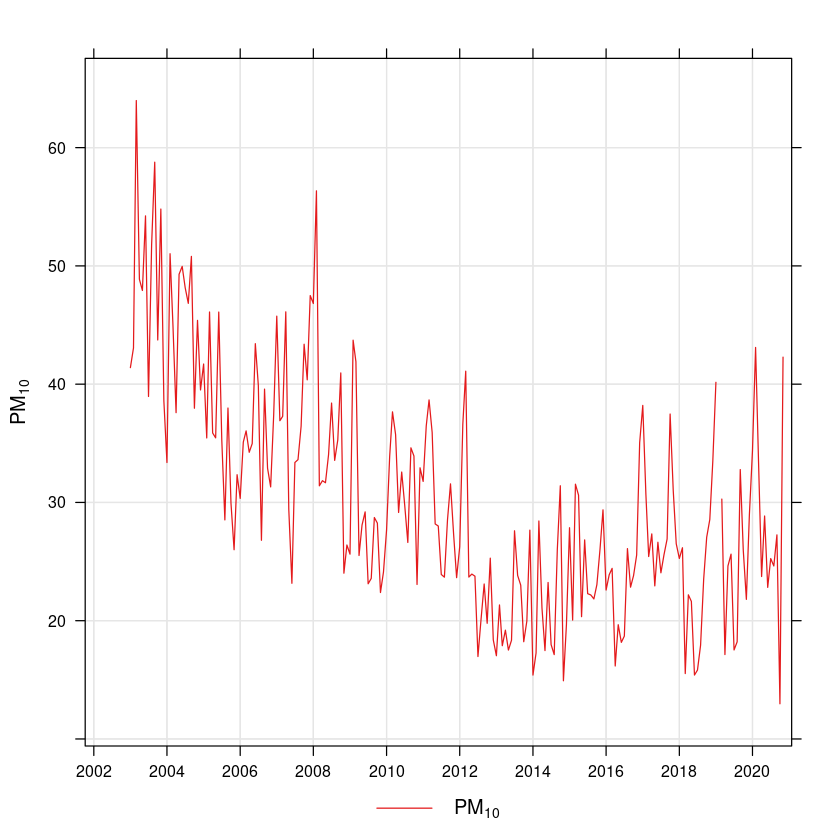

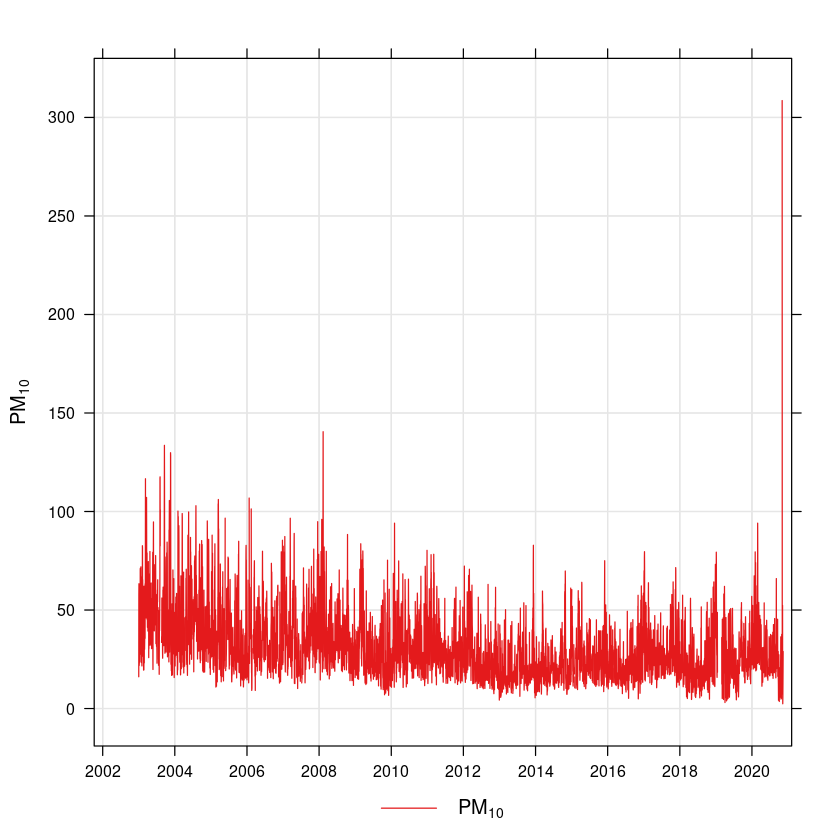

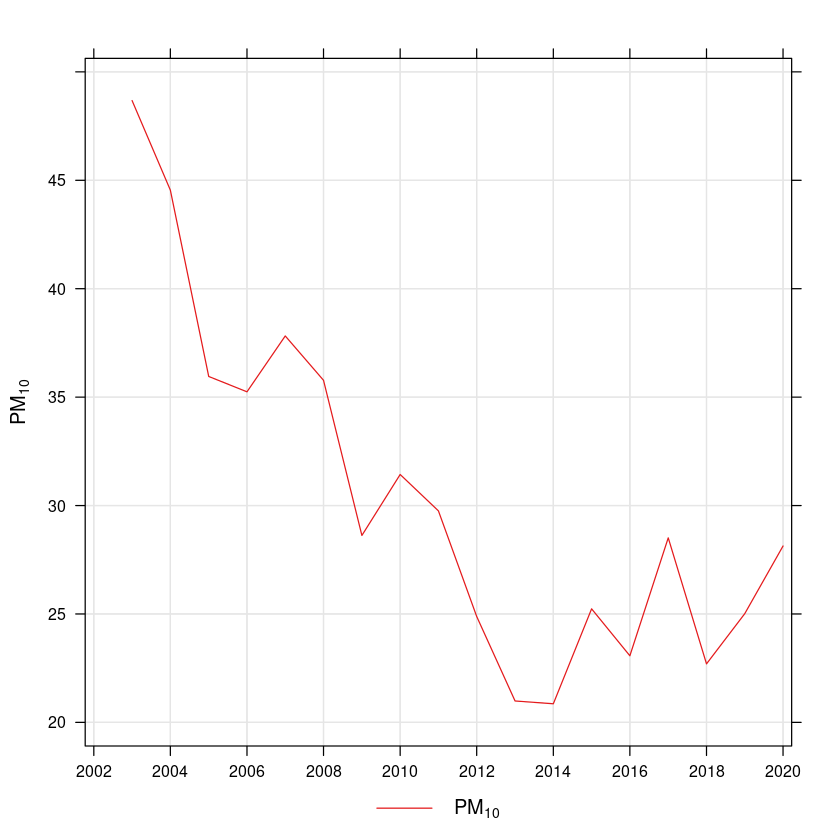

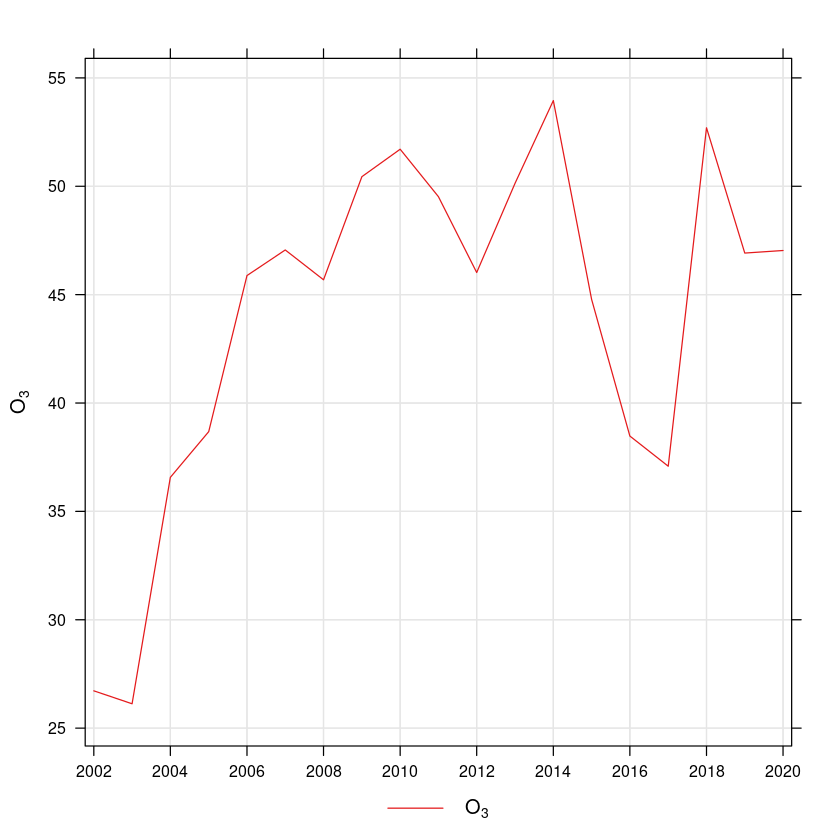

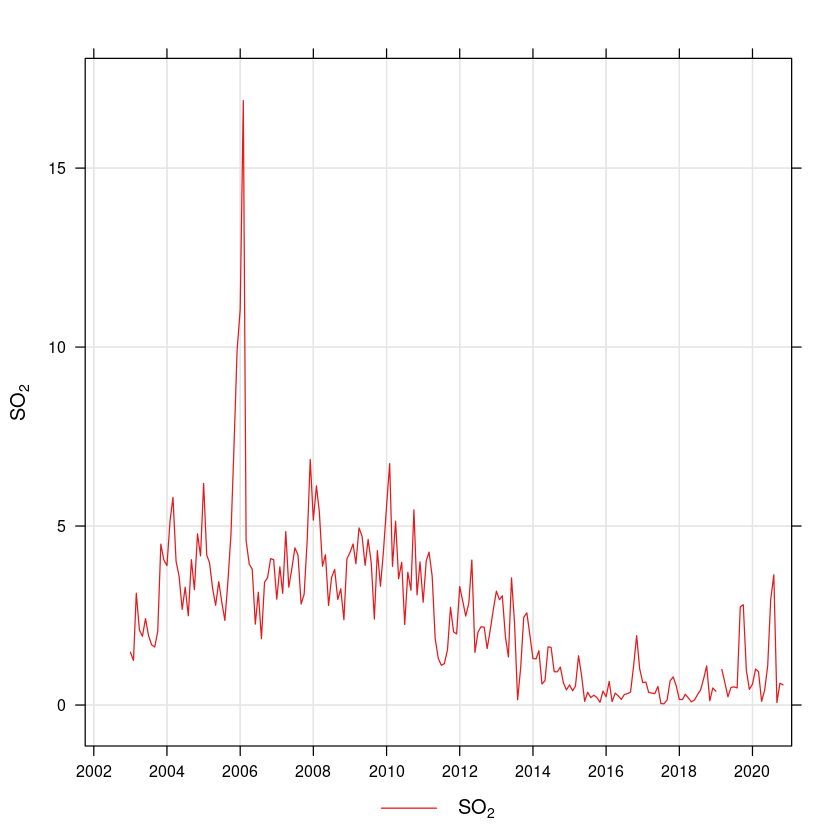

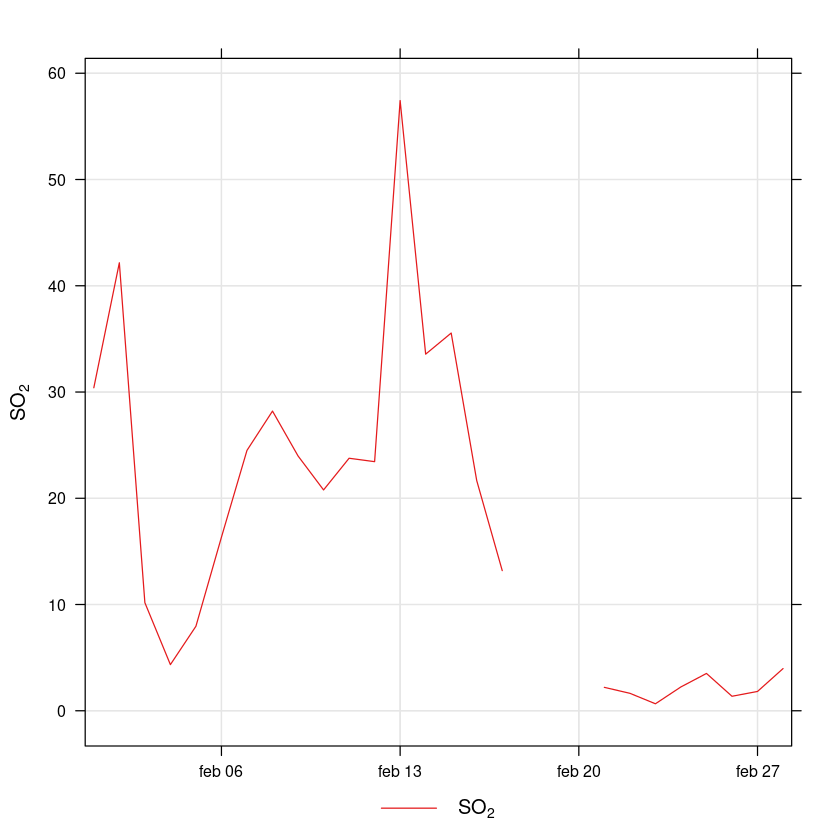

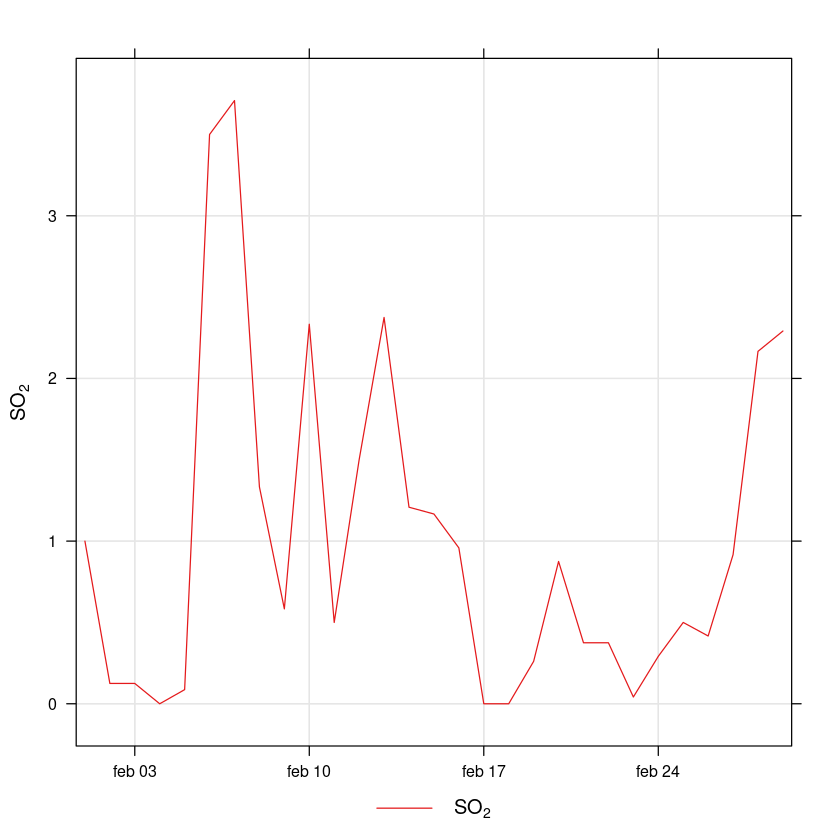

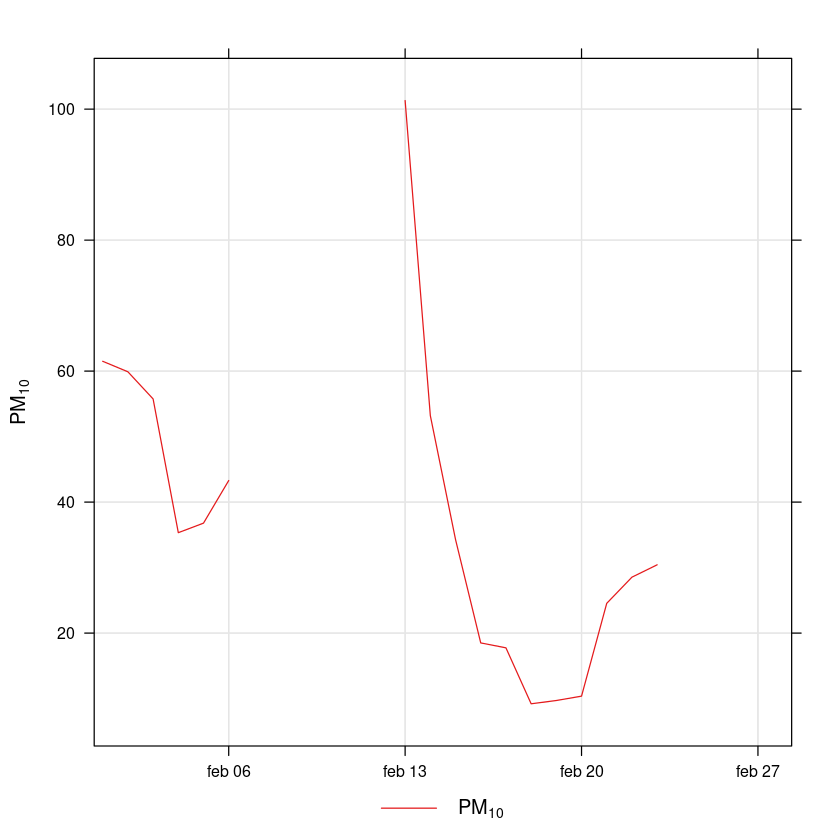

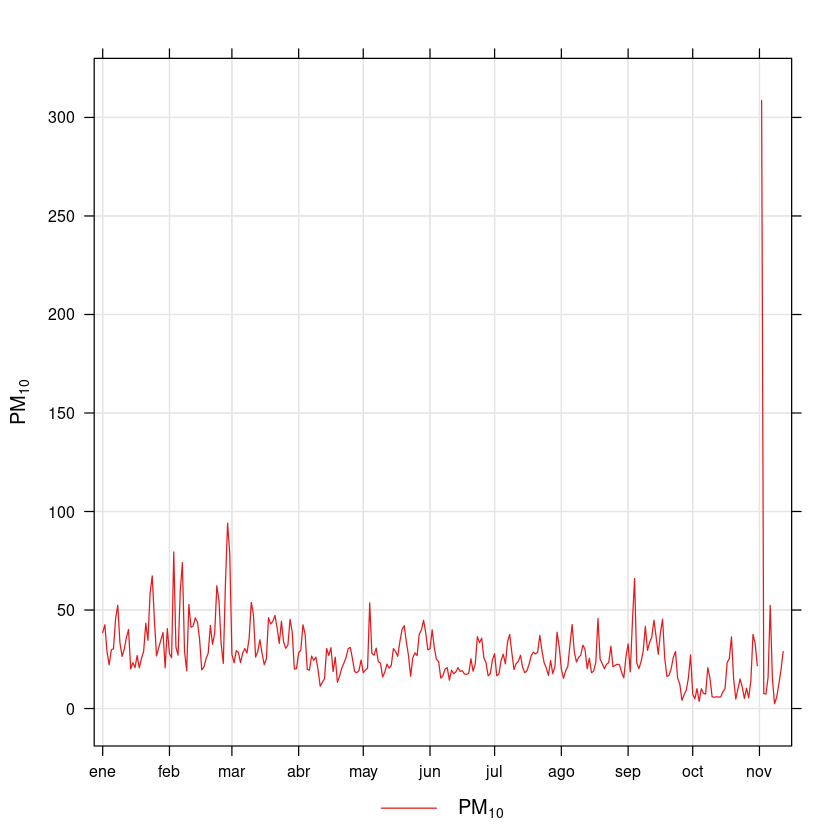

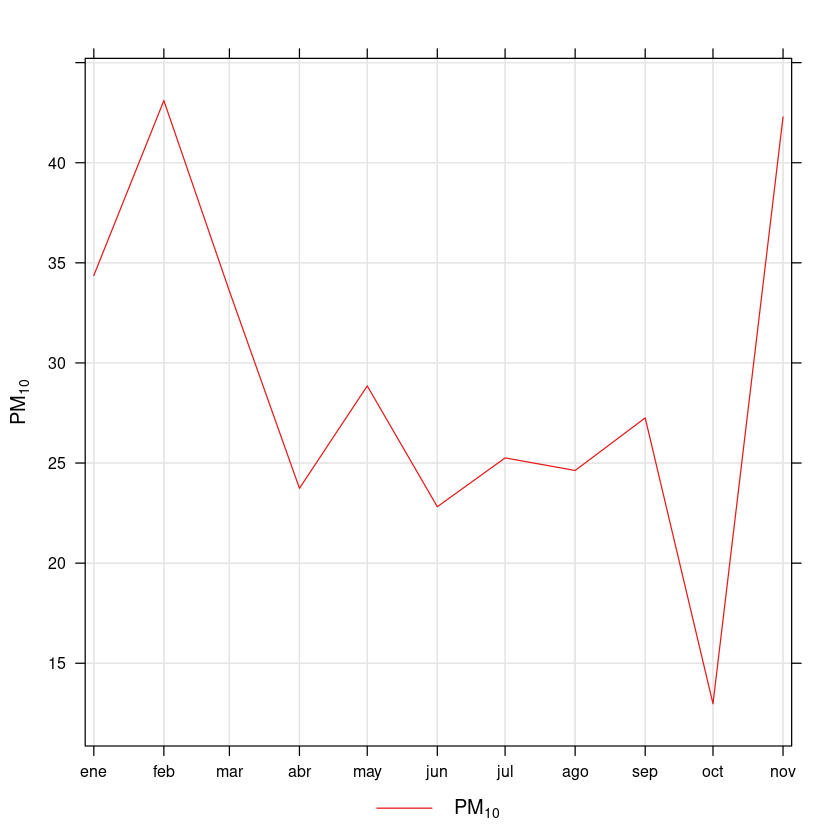

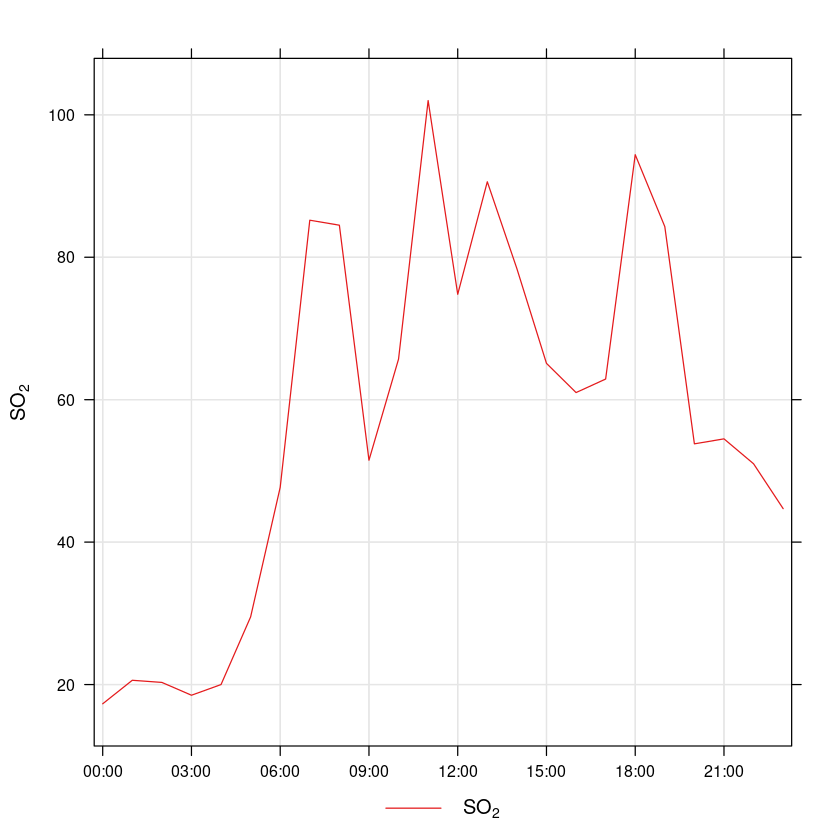

In [24]:
timePlot(crostodo_clean,avg.time = "month",pollutant="pm10")
timePlot(crostodo_clean,avg.time = "day",pollutant="pm10")
timePlot(crostodo_clean,avg.time = "year",pollutant="pm10")
timePlot(crostodo_clean,avg.time = "year",pollutant="o3")
timePlot(crostodo_clean,avg.time = "month",pollutant="so2")
timePlot(selectByDate(crostodo_clean,year=2006,month="feb"),avg.time = "day",pollutant="so2")
timePlot(selectByDate(crostodo_clean,year=2020,month="feb"),avg.time = "day",pollutant="so2")
timePlot(selectByDate(crostodo_clean,year=2006,month="feb"),avg.time = "day",pollutant="pm10")
timePlot(selectByDate(crostodo_clean,year=2020),avg.time = "day",pollutant="pm10")
timePlot(selectByDate(crostodo_clean,year=2020),avg.time = "month",pollutant="pm10")
timePlot(selectByDate(crostodo_clean,year=2006,month="feb",day=13),avg.time = "hour",pollutant="so2")

Analizar disminución NO2 en marzo 2020 despues de la entrada del estado de alerta, horario y diario

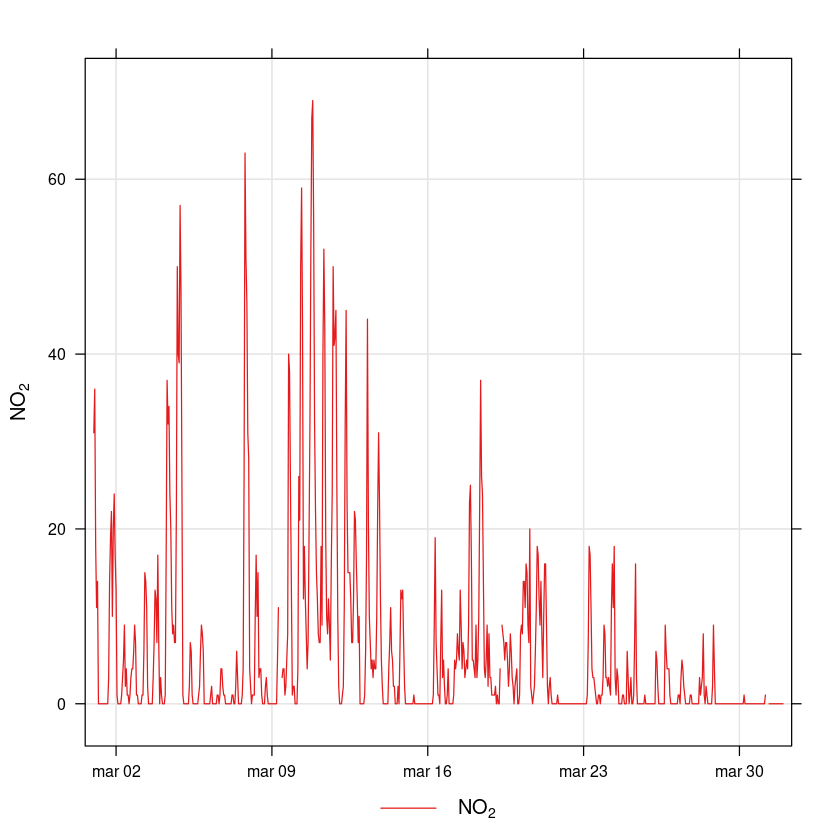

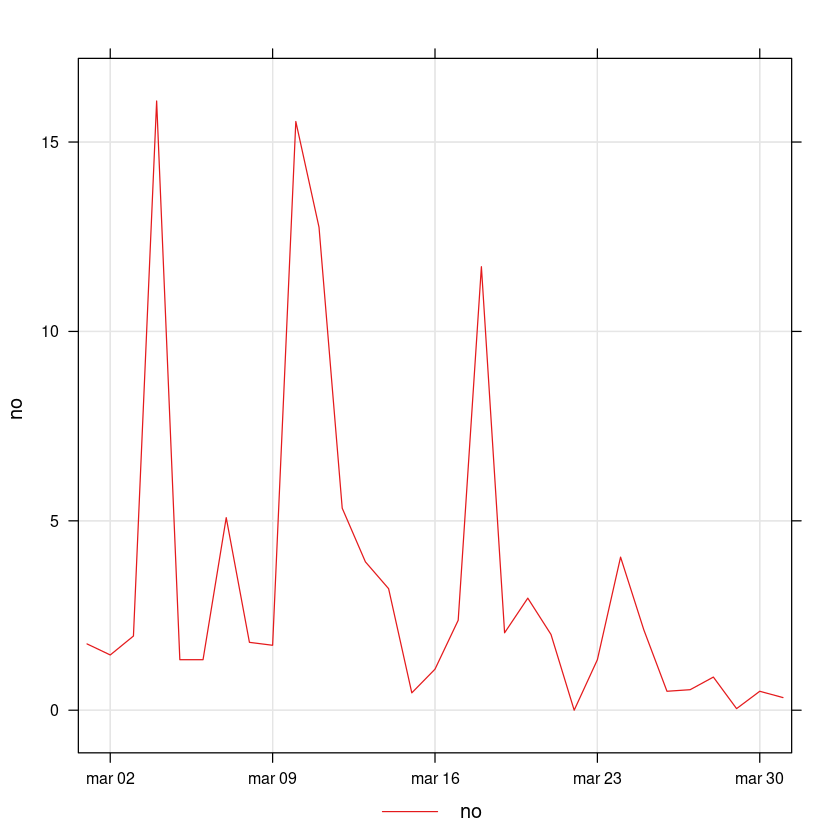

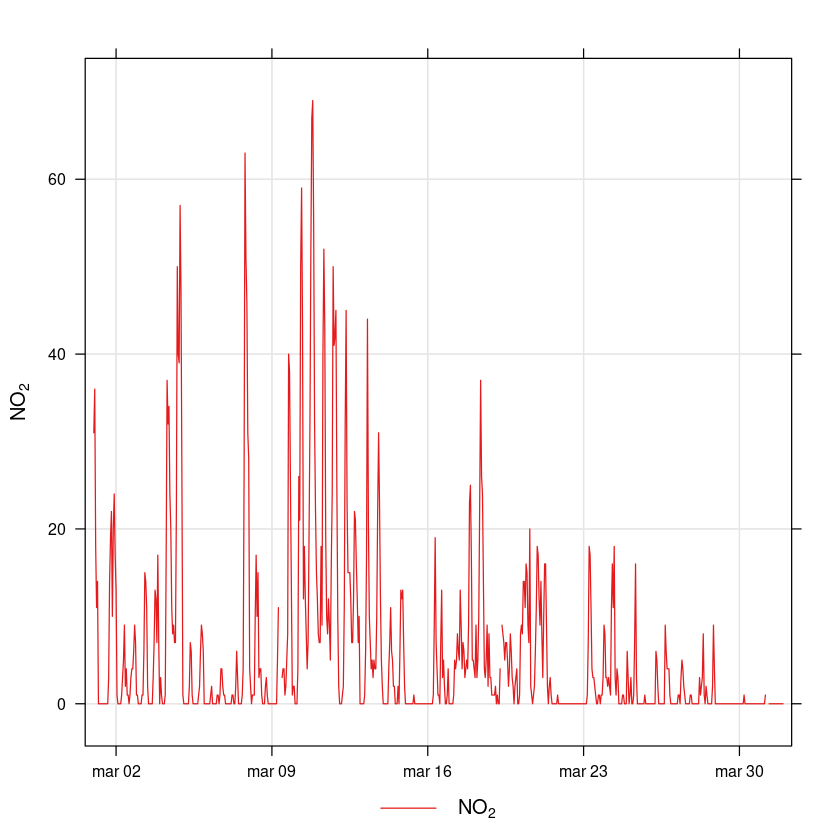

In [30]:
timePlot(selectByDate(crostodo_clean,year=2020,month="mar"),std.time = "day",pollutant="no2")
timePlot(selectByDate(crostodo_clean,year=2020,month="mar"),avg.time = "day",pollutant="no")
timePlot(selectByDate(crostodo_clean,year=2020,month="mar"),avg.time = "hour",pollutant="no2")

Aocalizar episodio del 5 de marzo de 2015 en Ferroatlantica, corte de corriente duante dos horas desde las 9:41

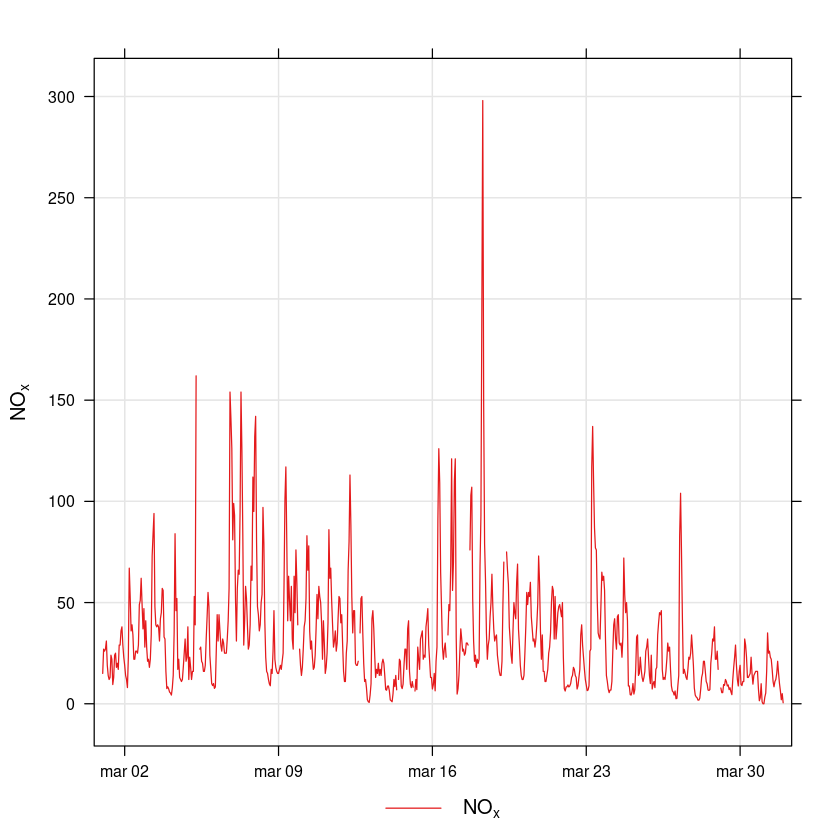

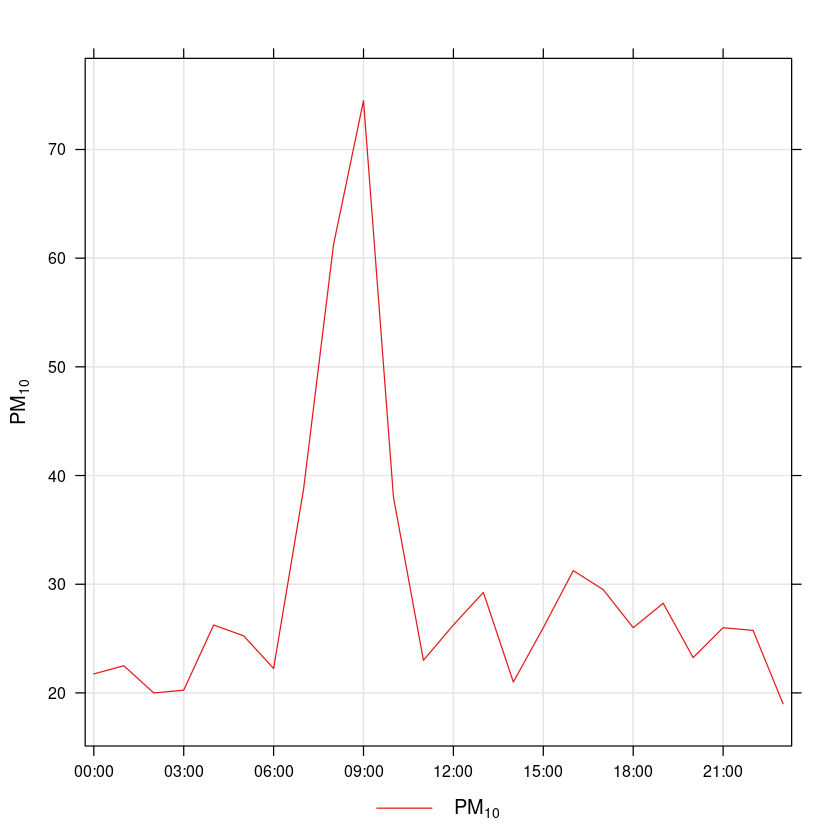

In [29]:
timePlot(selectByDate(crostodo_clean,year=2015,month="mar"),avg.time = "hour",pollutant="nox")
timePlot(selectByDate(crostodo_clean,year=2015,month="mar",day=5),avg.time = "hour",pollutant="pm10")

Otro episodio en 2017

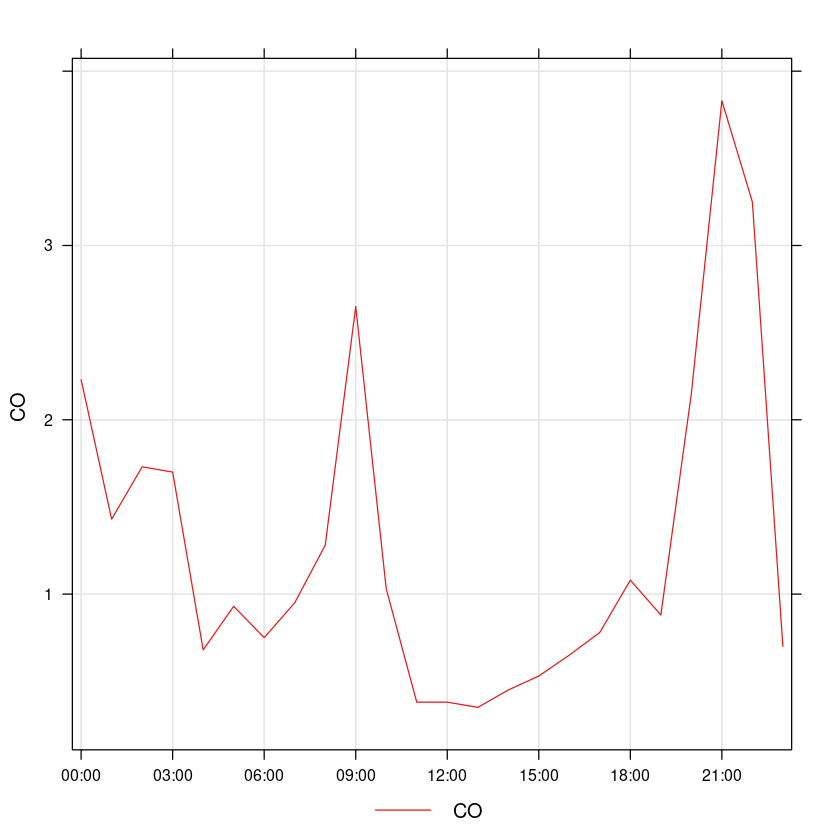

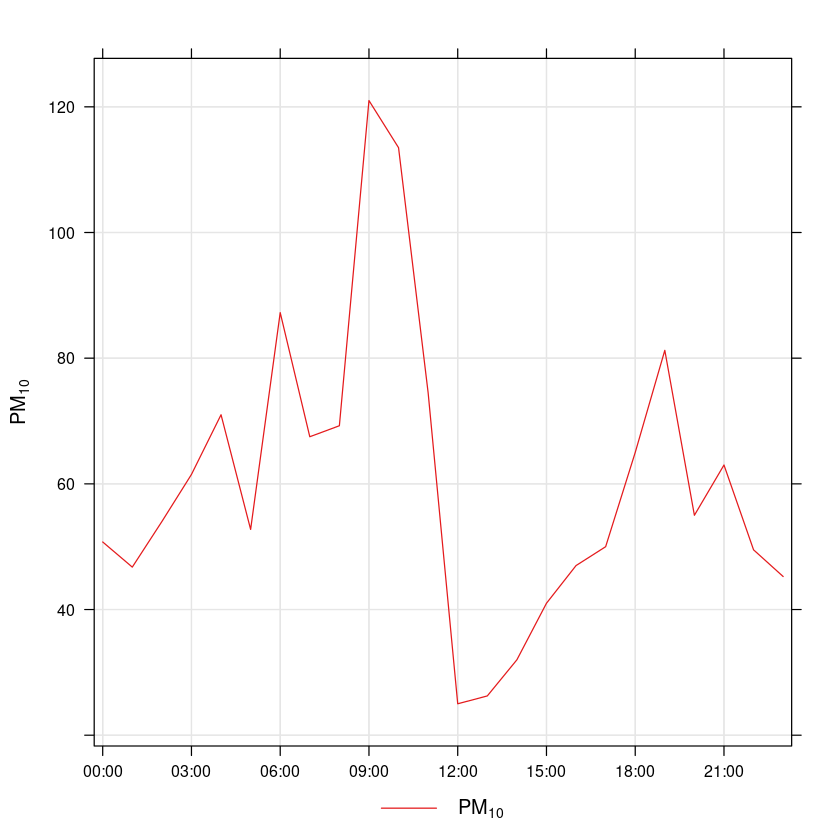

In [27]:
timePlot(selectByDate(crostodo_clean,year=2017,month="nov",day=16),avg.time = "hour",pollutant="co")
timePlot(selectByDate(crostodo_clean,year=2017,month="nov",day=16),avg.time = "hour",pollutant="pm10")

# OBTENER DATOS METEO DE ESTACIONES AEMET

Se pueden localizar las estaciones meteo mas cercanas a una estacion de CA mediante mapa

In [28]:
getMeta(lat = 43, lon = -3, returnMap = TRUE)
#descargo los datos meteo de STR-CMT de 2018
std_met = importNOAA(code = "080230-99999", year = 2018)
#descargo los datos meteo de Parayas de 2018
parayas_met = importNOAA(code = "080210-99999", year = 2018)

#descargo los datos meteo de Parayas desde 2001 a 2020
parayas_mettodo = importNOAA(code = "080210-99999", year=2001:2020)

HTML widgets cannot be represented in plain text (need html)

ERROR: Error in open.connection(con, "rb"): Timeout was reached: [www.ncei.noaa.gov] Connection timed out after 10000 milliseconds


In [ ]:
#hago una rosa de vientos para comprobar
windRose(std_met,angle=10,type="season")
windRose(parayas_mettodo,type="season")
windRose(parayas_mettodo,type="month")

In [ ]:
#rosa de los últimos 20 años en parayas es casi identica
windRose(parayas_mettodo,type="year")
windRose(parayas_mettodo,type="season")

#JUNTAMOS DATOS DE CALIDAD DEL AIRE CON METEO

juntamos datos de CA de Cros y Guarnizo y meteo de parayas

In [ ]:
guarcros_todo <- guarcros_clean %>%
  left_join(parayas_met[c("date", "wd", "ws", "air_temp")], by = "date")

#juntamos los datos de CA de Cros y meteo entre 2001 y 2020
crostodo_todo <- crostodo_clean %>%
  left_join(parayas_mettodo[c("date", "wd", "ws", "air_temp")], by = "date")

#hago un gráfico polar de CO en cros de 2019
polarPlot(guarcros_todo,site="cros",pollutant="co")

In [ ]:
#hago un gráfico polar de CO en cros de los últimos 19 años
polarPlot(crostodo_todo,pollutant="co")
polarPlot(crostodo_todo,pollutant="co",type="year")
polarPlot(crostodo_todo,pollutant="pm10")
polarPlot(crostodo_todo,pollutant="pm10",type="year")
polarPlot(selectByDate(crostodo_todo,year=2020),pollutant="co")
polarPlot(selectByDate(crostodo_todo,year=2003),pollutant="pm10")
polarPlot(selectByDate(crostodo_todo,year=2019),pollutant="pm10")
polarPlot(selectByDate(crostodo_todo,year=2020),pollutant="pm10")

In [ ]:
#hago un gráfico polar de CO en cros y guarnizo
polarPlot(guarcros_todo,type="site",pollutant="co")
#hago un gráfico polar pero de probabilidades de superar un percentil
#el CO parece un buen trazador de ferroatlantica viendo las rosas de cocentracion y de probabilidad
polarPlot(guarcros_todo,type="site",pollutant="co",statistic="cpf",percentile=99)

In [ ]:
#En CROS
polarPlot(crostodo_todo,type="year",pollutant="co",statistic="cpf",percentile=99)
polarPlot(selectByDate(crostodo_todo,year=2017),pollutant="co",statistic="cpf",percentile=99)
polarPlot(selectByDate(crostodo_todo,year=2017),pollutant="co",statistic="cpf",percentile=c(90,99))
polarPlot(selectByDate(crostodo_todo,year=2019),pollutant="co",statistic="cpf",percentile=c(75,99))
polarPlot(selectByDate(crostodo_todo,year=2005),pollutant="co",statistic="cpf",percentile=98)     